## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.

en entrée : x

en sortie : z et u

l'architecture definit 3 codes latents : 

un code 2D pour coder la position/action

2 codes 32D pour coder les caracteristiques (actionnables) 

u est une transformation appliquee sur z dans l'espace latent. la translation est appliquee uniformement à toutes les caracteristiques

validation du code par classification uniquement (l'information de position etant et theorie "soustraite" au coide invariant.

En pratique :
  * produit un classifieur valide
  * **mais** 
    * le code produit n'est **pas invariant** : varie fortement (pour un meme chiffre) selon la position ==> le code latent 32 x 2 code aussi pour la position.   
    * le code 2D est arbitraire et ne respecte pas la topologie 
    
==> Necessite un encodeur qui extrait l'information invariante (voir `VAE_full` et `VAE_classif_alt`).



In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_classif import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'mean': 0.0, 'seed': 42, 'num_processes': 1, 'verbose': 1, 'test_batch_size': 1, 'epochs': 10, 'dimension': 25, 'valid_size': 0.2, 'batch_size': 50, 'no_cuda': True, 'log_interval': 10, 'std': 1.0, 'size': 64, 'momentum': 0.48, 'lr': 0.001}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [19]:
path = '2018-07-26_actionnable_code_VAE_classif_BIAS.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à '2018-07-26_actionnable_code_VAE_full_BIAS.pt': Aucun fichier ou dossier de ce type
rm: impossible de supprimer '2018-07-26_actionnable_code_VAE_full_BIAS.pt': Aucun fichier ou dossier de ce type


In [7]:
from Where_act_code_VAE_classif import ML
ml = ML(args)

cuda? False


(<matplotlib.figure.Figure at 0x7fece0bead30>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fec821d8860>)

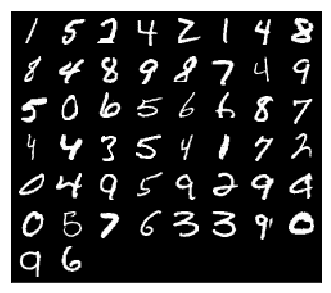

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_mu_d1): Linear(in_features=256, out_features=32, bias=False)
  (fc_logvar_d1): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu_d2): Linear(in_features=256, out_features=32, bias=False)
  (fc_logvar_d2): Linear(in_features=256, out_features=32, bias=False)
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=2, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=2, bias=False)
  (fc_transcode_d1): Linear(in_features=32, out_features=256, bias=True)
  (fc_transcode_d2): Linear(in_features=32, out_features=256, bias=True)
  (fc_z): Linear(in_features=256, out_features=10, bias=False)
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [17]:
ml.train(None)

Train Epoch
	Train Epoch: 1 [0/60000 (0%)]	CELoss: 40.08	KL_d1: 246.91	KL_d2: 60.92	KL: 172.76
	Train Epoch: 1 [500/60000 (1%)]	CELoss: 18.90	KL_d1: 308.49	KL_d2: 70.67	KL: 154.26
	Train Epoch: 1 [1000/60000 (2%)]	CELoss: 29.32	KL_d1: 270.91	KL_d2: 66.93	KL: 188.11
	Train Epoch: 1 [1500/60000 (2%)]	CELoss: 22.03	KL_d1: 260.61	KL_d2: 63.68	KL: 192.00
	Train Epoch: 1 [2000/60000 (3%)]	CELoss: 17.71	KL_d1: 299.07	KL_d2: 59.95	KL: 158.16
	Train Epoch: 1 [2500/60000 (4%)]	CELoss: 30.63	KL_d1: 307.96	KL_d2: 74.75	KL: 143.68
	Train Epoch: 1 [3000/60000 (5%)]	CELoss: 27.05	KL_d1: 320.80	KL_d2: 79.09	KL: 160.25
	Train Epoch: 1 [3500/60000 (6%)]	CELoss: 27.95	KL_d1: 272.92	KL_d2: 59.24	KL: 170.15
	Train Epoch: 1 [4000/60000 (7%)]	CELoss: 28.86	KL_d1: 311.23	KL_d2: 77.45	KL: 162.60
	Train Epoch: 1 [4500/60000 (8%)]	CELoss: 22.74	KL_d1: 295.73	KL_d2: 74.34	KL: 183.60
	Train Epoch: 1 [5000/60000 (8%)]	CELoss: 46.63	KL_d1: 240.22	KL_d2: 56.57	KL: 153.73
	Train Epoch: 1 [5500/60000 (9%)]	CELoss: 33.0

	Train Epoch: 1 [47000/60000 (78%)]	CELoss: 25.44	KL_d1: 255.08	KL_d2: 45.85	KL: 174.42
	Train Epoch: 1 [47500/60000 (79%)]	CELoss: 19.20	KL_d1: 248.01	KL_d2: 43.55	KL: 161.89
	Train Epoch: 1 [48000/60000 (80%)]	CELoss: 18.39	KL_d1: 262.94	KL_d2: 50.78	KL: 176.12
	Train Epoch: 1 [48500/60000 (81%)]	CELoss: 23.90	KL_d1: 294.32	KL_d2: 53.06	KL: 154.13
	Train Epoch: 1 [49000/60000 (82%)]	CELoss: 20.31	KL_d1: 288.32	KL_d2: 45.47	KL: 160.21
	Train Epoch: 1 [49500/60000 (82%)]	CELoss: 15.63	KL_d1: 282.35	KL_d2: 48.31	KL: 172.34
	Train Epoch: 1 [50000/60000 (83%)]	CELoss: 21.53	KL_d1: 295.37	KL_d2: 57.02	KL: 177.85
	Train Epoch: 1 [50500/60000 (84%)]	CELoss: 24.04	KL_d1: 271.01	KL_d2: 46.38	KL: 132.65
	Train Epoch: 1 [51000/60000 (85%)]	CELoss: 25.43	KL_d1: 299.77	KL_d2: 55.04	KL: 163.80
	Train Epoch: 1 [51500/60000 (86%)]	CELoss: 17.38	KL_d1: 312.45	KL_d2: 53.75	KL: 164.80
	Train Epoch: 1 [52000/60000 (87%)]	CELoss: 26.69	KL_d1: 291.56	KL_d2: 53.66	KL: 157.69
	Train Epoch: 1 [52500/60000 (88

	Train Epoch: 2 [34000/60000 (57%)]	CELoss: 12.05	KL_d1: 332.06	KL_d2: 43.71	KL: 174.00
	Train Epoch: 2 [34500/60000 (58%)]	CELoss: 19.88	KL_d1: 325.82	KL_d2: 42.18	KL: 189.64
	Train Epoch: 2 [35000/60000 (58%)]	CELoss: 30.30	KL_d1: 296.71	KL_d2: 44.71	KL: 171.53
	Train Epoch: 2 [35500/60000 (59%)]	CELoss: 24.86	KL_d1: 268.06	KL_d2: 35.44	KL: 168.01
	Train Epoch: 2 [36000/60000 (60%)]	CELoss: 19.22	KL_d1: 319.26	KL_d2: 45.40	KL: 178.81
	Train Epoch: 2 [36500/60000 (61%)]	CELoss: 22.48	KL_d1: 321.17	KL_d2: 44.29	KL: 148.33
	Train Epoch: 2 [37000/60000 (62%)]	CELoss: 34.02	KL_d1: 309.59	KL_d2: 43.64	KL: 151.66
	Train Epoch: 2 [37500/60000 (62%)]	CELoss: 20.44	KL_d1: 271.56	KL_d2: 35.24	KL: 172.76
	Train Epoch: 2 [38000/60000 (63%)]	CELoss: 31.82	KL_d1: 288.50	KL_d2: 40.07	KL: 154.99
	Train Epoch: 2 [38500/60000 (64%)]	CELoss: 7.91	KL_d1: 293.20	KL_d2: 44.77	KL: 167.78
	Train Epoch: 2 [39000/60000 (65%)]	CELoss: 33.54	KL_d1: 305.97	KL_d2: 35.67	KL: 163.66
	Train Epoch: 2 [39500/60000 (66%

	Train Epoch: 3 [21000/60000 (35%)]	CELoss: 15.54	KL_d1: 290.51	KL_d2: 29.12	KL: 206.41
	Train Epoch: 3 [21500/60000 (36%)]	CELoss: 24.07	KL_d1: 318.97	KL_d2: 32.35	KL: 177.07
	Train Epoch: 3 [22000/60000 (37%)]	CELoss: 15.62	KL_d1: 274.33	KL_d2: 24.93	KL: 171.74
	Train Epoch: 3 [22500/60000 (38%)]	CELoss: 16.19	KL_d1: 295.66	KL_d2: 28.00	KL: 159.25
	Train Epoch: 3 [23000/60000 (38%)]	CELoss: 16.10	KL_d1: 280.43	KL_d2: 28.96	KL: 145.97
	Train Epoch: 3 [23500/60000 (39%)]	CELoss: 13.73	KL_d1: 304.61	KL_d2: 28.79	KL: 152.97
	Train Epoch: 3 [24000/60000 (40%)]	CELoss: 30.10	KL_d1: 343.79	KL_d2: 35.05	KL: 166.93
	Train Epoch: 3 [24500/60000 (41%)]	CELoss: 31.25	KL_d1: 349.68	KL_d2: 35.46	KL: 182.82
	Train Epoch: 3 [25000/60000 (42%)]	CELoss: 20.50	KL_d1: 322.35	KL_d2: 29.51	KL: 172.66
	Train Epoch: 3 [25500/60000 (42%)]	CELoss: 15.82	KL_d1: 302.55	KL_d2: 34.70	KL: 160.64
	Train Epoch: 3 [26000/60000 (43%)]	CELoss: 21.35	KL_d1: 296.53	KL_d2: 29.88	KL: 140.46
	Train Epoch: 3 [26500/60000 (44

	Train Epoch: 4 [8000/60000 (13%)]	CELoss: 28.23	KL_d1: 320.96	KL_d2: 24.29	KL: 157.91
	Train Epoch: 4 [8500/60000 (14%)]	CELoss: 6.51	KL_d1: 301.98	KL_d2: 21.84	KL: 182.09
	Train Epoch: 4 [9000/60000 (15%)]	CELoss: 24.54	KL_d1: 334.59	KL_d2: 25.89	KL: 132.50
	Train Epoch: 4 [9500/60000 (16%)]	CELoss: 16.42	KL_d1: 345.67	KL_d2: 22.25	KL: 152.15
	Train Epoch: 4 [10000/60000 (17%)]	CELoss: 15.45	KL_d1: 338.54	KL_d2: 26.80	KL: 163.66
	Train Epoch: 4 [10500/60000 (18%)]	CELoss: 13.76	KL_d1: 360.20	KL_d2: 27.14	KL: 164.26
	Train Epoch: 4 [11000/60000 (18%)]	CELoss: 17.66	KL_d1: 286.56	KL_d2: 20.52	KL: 143.51
	Train Epoch: 4 [11500/60000 (19%)]	CELoss: 25.18	KL_d1: 333.93	KL_d2: 21.01	KL: 152.02
	Train Epoch: 4 [12000/60000 (20%)]	CELoss: 9.76	KL_d1: 362.82	KL_d2: 28.14	KL: 165.37
	Train Epoch: 4 [12500/60000 (21%)]	CELoss: 11.81	KL_d1: 318.42	KL_d2: 23.82	KL: 163.86
	Train Epoch: 4 [13000/60000 (22%)]	CELoss: 11.12	KL_d1: 302.25	KL_d2: 20.37	KL: 160.64
	Train Epoch: 4 [13500/60000 (22%)]	CE

	Train Epoch: 4 [55000/60000 (92%)]	CELoss: 10.19	KL_d1: 313.66	KL_d2: 14.99	KL: 156.16
	Train Epoch: 4 [55500/60000 (92%)]	CELoss: 17.70	KL_d1: 296.96	KL_d2: 13.61	KL: 161.66
	Train Epoch: 4 [56000/60000 (93%)]	CELoss: 13.29	KL_d1: 293.73	KL_d2: 14.37	KL: 140.65
	Train Epoch: 4 [56500/60000 (94%)]	CELoss: 13.44	KL_d1: 315.38	KL_d2: 17.55	KL: 158.50
	Train Epoch: 4 [57000/60000 (95%)]	CELoss: 12.87	KL_d1: 294.68	KL_d2: 14.56	KL: 163.40
	Train Epoch: 4 [57500/60000 (96%)]	CELoss: 8.00	KL_d1: 287.84	KL_d2: 15.57	KL: 172.22
	Train Epoch: 4 [58000/60000 (97%)]	CELoss: 17.94	KL_d1: 267.22	KL_d2: 14.53	KL: 175.09
	Train Epoch: 4 [58500/60000 (98%)]	CELoss: 5.52	KL_d1: 299.37	KL_d2: 20.67	KL: 188.08
	Train Epoch: 4 [59000/60000 (98%)]	CELoss: 10.78	KL_d1: 337.61	KL_d2: 20.97	KL: 179.66
	Train Epoch: 4 [59500/60000 (99%)]	CELoss: 24.12	KL_d1: 317.71	KL_d2: 16.47	KL: 151.89
	Train Epoch: 5 [0/60000 (0%)]	CELoss: 8.55	KL_d1: 297.94	KL_d2: 18.22	KL: 173.70
	Train Epoch: 5 [500/60000 (1%)]	CELoss:

	Train Epoch: 5 [42000/60000 (70%)]	CELoss: 20.87	KL_d1: 304.71	KL_d2: 14.52	KL: 165.97
	Train Epoch: 5 [42500/60000 (71%)]	CELoss: 16.58	KL_d1: 282.57	KL_d2: 12.74	KL: 163.12
	Train Epoch: 5 [43000/60000 (72%)]	CELoss: 16.53	KL_d1: 319.44	KL_d2: 12.25	KL: 137.39
	Train Epoch: 5 [43500/60000 (72%)]	CELoss: 24.25	KL_d1: 273.52	KL_d2: 14.10	KL: 144.89
	Train Epoch: 5 [44000/60000 (73%)]	CELoss: 18.84	KL_d1: 299.39	KL_d2: 12.56	KL: 135.06
	Train Epoch: 5 [44500/60000 (74%)]	CELoss: 15.06	KL_d1: 286.62	KL_d2: 13.15	KL: 169.69
	Train Epoch: 5 [45000/60000 (75%)]	CELoss: 14.86	KL_d1: 313.00	KL_d2: 14.07	KL: 169.62
	Train Epoch: 5 [45500/60000 (76%)]	CELoss: 18.33	KL_d1: 289.97	KL_d2: 13.04	KL: 178.78
	Train Epoch: 5 [46000/60000 (77%)]	CELoss: 12.93	KL_d1: 271.52	KL_d2: 12.95	KL: 171.38
	Train Epoch: 5 [46500/60000 (78%)]	CELoss: 15.13	KL_d1: 309.35	KL_d2: 13.19	KL: 162.91
	Train Epoch: 5 [47000/60000 (78%)]	CELoss: 16.11	KL_d1: 294.27	KL_d2: 10.95	KL: 164.70
	Train Epoch: 5 [47500/60000 (79

	Train Epoch: 6 [29000/60000 (48%)]	CELoss: 19.94	KL_d1: 307.75	KL_d2: 10.75	KL: 157.21
	Train Epoch: 6 [29500/60000 (49%)]	CELoss: 12.09	KL_d1: 281.94	KL_d2: 9.50	KL: 153.13
	Train Epoch: 6 [30000/60000 (50%)]	CELoss: 16.97	KL_d1: 262.65	KL_d2: 8.78	KL: 145.98
	Train Epoch: 6 [30500/60000 (51%)]	CELoss: 14.81	KL_d1: 291.19	KL_d2: 10.92	KL: 170.71
	Train Epoch: 6 [31000/60000 (52%)]	CELoss: 19.73	KL_d1: 289.91	KL_d2: 11.80	KL: 166.27
	Train Epoch: 6 [31500/60000 (52%)]	CELoss: 17.58	KL_d1: 296.32	KL_d2: 11.62	KL: 158.19
	Train Epoch: 6 [32000/60000 (53%)]	CELoss: 17.92	KL_d1: 276.42	KL_d2: 11.46	KL: 166.55
	Train Epoch: 6 [32500/60000 (54%)]	CELoss: 15.01	KL_d1: 288.77	KL_d2: 10.09	KL: 158.95
	Train Epoch: 6 [33000/60000 (55%)]	CELoss: 32.94	KL_d1: 294.42	KL_d2: 10.72	KL: 151.33
	Train Epoch: 6 [33500/60000 (56%)]	CELoss: 4.33	KL_d1: 259.56	KL_d2: 8.76	KL: 152.09
	Train Epoch: 6 [34000/60000 (57%)]	CELoss: 16.66	KL_d1: 274.59	KL_d2: 9.06	KL: 159.99
	Train Epoch: 6 [34500/60000 (58%)]	C

	Train Epoch: 7 [16500/60000 (28%)]	CELoss: 13.13	KL_d1: 311.98	KL_d2: 9.48	KL: 159.73
	Train Epoch: 7 [17000/60000 (28%)]	CELoss: 13.11	KL_d1: 261.40	KL_d2: 8.77	KL: 160.86
	Train Epoch: 7 [17500/60000 (29%)]	CELoss: 12.38	KL_d1: 264.91	KL_d2: 9.29	KL: 150.59
	Train Epoch: 7 [18000/60000 (30%)]	CELoss: 21.54	KL_d1: 289.87	KL_d2: 8.93	KL: 149.20
	Train Epoch: 7 [18500/60000 (31%)]	CELoss: 13.68	KL_d1: 277.34	KL_d2: 11.88	KL: 173.21
	Train Epoch: 7 [19000/60000 (32%)]	CELoss: 22.96	KL_d1: 312.61	KL_d2: 10.60	KL: 148.70
	Train Epoch: 7 [19500/60000 (32%)]	CELoss: 8.08	KL_d1: 274.43	KL_d2: 10.58	KL: 170.27
	Train Epoch: 7 [20000/60000 (33%)]	CELoss: 16.69	KL_d1: 289.19	KL_d2: 10.10	KL: 161.77
	Train Epoch: 7 [20500/60000 (34%)]	CELoss: 9.93	KL_d1: 320.47	KL_d2: 11.27	KL: 165.12
	Train Epoch: 7 [21000/60000 (35%)]	CELoss: 23.53	KL_d1: 269.55	KL_d2: 9.26	KL: 168.72
	Train Epoch: 7 [21500/60000 (36%)]	CELoss: 21.90	KL_d1: 275.36	KL_d2: 9.50	KL: 157.84
	Train Epoch: 7 [22000/60000 (37%)]	CELo

	Train Epoch: 8 [4000/60000 (7%)]	CELoss: 23.04	KL_d1: 267.92	KL_d2: 7.54	KL: 161.72
	Train Epoch: 8 [4500/60000 (8%)]	CELoss: 16.30	KL_d1: 255.78	KL_d2: 6.63	KL: 169.27
	Train Epoch: 8 [5000/60000 (8%)]	CELoss: 11.08	KL_d1: 294.37	KL_d2: 8.34	KL: 146.25
	Train Epoch: 8 [5500/60000 (9%)]	CELoss: 10.23	KL_d1: 277.34	KL_d2: 8.84	KL: 161.37
	Train Epoch: 8 [6000/60000 (10%)]	CELoss: 17.05	KL_d1: 279.33	KL_d2: 9.00	KL: 156.01
	Train Epoch: 8 [6500/60000 (11%)]	CELoss: 26.43	KL_d1: 290.07	KL_d2: 8.26	KL: 146.05
	Train Epoch: 8 [7000/60000 (12%)]	CELoss: 21.73	KL_d1: 292.10	KL_d2: 9.62	KL: 146.84
	Train Epoch: 8 [7500/60000 (12%)]	CELoss: 27.94	KL_d1: 245.77	KL_d2: 8.50	KL: 165.59
	Train Epoch: 8 [8000/60000 (13%)]	CELoss: 11.43	KL_d1: 290.77	KL_d2: 7.13	KL: 150.83
	Train Epoch: 8 [8500/60000 (14%)]	CELoss: 11.87	KL_d1: 258.75	KL_d2: 7.50	KL: 160.57
	Train Epoch: 8 [9000/60000 (15%)]	CELoss: 17.80	KL_d1: 308.43	KL_d2: 8.27	KL: 148.73
	Train Epoch: 8 [9500/60000 (16%)]	CELoss: 21.86	KL_d1: 26

	Train Epoch: 8 [51500/60000 (86%)]	CELoss: 3.36	KL_d1: 299.75	KL_d2: 7.83	KL: 175.72
	Train Epoch: 8 [52000/60000 (87%)]	CELoss: 15.35	KL_d1: 282.11	KL_d2: 7.85	KL: 145.01
	Train Epoch: 8 [52500/60000 (88%)]	CELoss: 10.76	KL_d1: 283.60	KL_d2: 7.55	KL: 140.55
	Train Epoch: 8 [53000/60000 (88%)]	CELoss: 7.33	KL_d1: 245.05	KL_d2: 7.47	KL: 170.40
	Train Epoch: 8 [53500/60000 (89%)]	CELoss: 16.44	KL_d1: 254.58	KL_d2: 7.91	KL: 169.99
	Train Epoch: 8 [54000/60000 (90%)]	CELoss: 17.09	KL_d1: 270.26	KL_d2: 7.78	KL: 151.80
	Train Epoch: 8 [54500/60000 (91%)]	CELoss: 12.20	KL_d1: 267.01	KL_d2: 6.97	KL: 147.00
	Train Epoch: 8 [55000/60000 (92%)]	CELoss: 11.86	KL_d1: 294.57	KL_d2: 7.69	KL: 158.17
	Train Epoch: 8 [55500/60000 (92%)]	CELoss: 18.77	KL_d1: 297.85	KL_d2: 8.16	KL: 161.91
	Train Epoch: 8 [56000/60000 (93%)]	CELoss: 11.29	KL_d1: 265.38	KL_d2: 7.60	KL: 146.31
	Train Epoch: 8 [56500/60000 (94%)]	CELoss: 7.78	KL_d1: 263.16	KL_d2: 6.83	KL: 140.93
	Train Epoch: 8 [57000/60000 (95%)]	CELoss: 20

	Train Epoch: 9 [39000/60000 (65%)]	CELoss: 15.85	KL_d1: 293.45	KL_d2: 7.75	KL: 156.09
	Train Epoch: 9 [39500/60000 (66%)]	CELoss: 9.00	KL_d1: 280.98	KL_d2: 6.45	KL: 143.24
	Train Epoch: 9 [40000/60000 (67%)]	CELoss: 10.40	KL_d1: 281.81	KL_d2: 7.42	KL: 166.05
	Train Epoch: 9 [40500/60000 (68%)]	CELoss: 4.90	KL_d1: 289.01	KL_d2: 6.81	KL: 154.70
	Train Epoch: 9 [41000/60000 (68%)]	CELoss: 10.59	KL_d1: 319.72	KL_d2: 6.99	KL: 141.05
	Train Epoch: 9 [41500/60000 (69%)]	CELoss: 9.21	KL_d1: 238.05	KL_d2: 6.35	KL: 157.84
	Train Epoch: 9 [42000/60000 (70%)]	CELoss: 21.44	KL_d1: 279.29	KL_d2: 6.28	KL: 136.06
	Train Epoch: 9 [42500/60000 (71%)]	CELoss: 17.47	KL_d1: 286.62	KL_d2: 7.23	KL: 148.31
	Train Epoch: 9 [43000/60000 (72%)]	CELoss: 8.86	KL_d1: 287.33	KL_d2: 7.64	KL: 155.22
	Train Epoch: 9 [43500/60000 (72%)]	CELoss: 8.91	KL_d1: 284.28	KL_d2: 7.10	KL: 170.16
	Train Epoch: 9 [44000/60000 (73%)]	CELoss: 21.40	KL_d1: 282.44	KL_d2: 7.21	KL: 159.99
	Train Epoch: 9 [44500/60000 (74%)]	CELoss: 18.2

	Train Epoch: 10 [26500/60000 (44%)]	CELoss: 14.87	KL_d1: 262.04	KL_d2: 7.30	KL: 147.85
	Train Epoch: 10 [27000/60000 (45%)]	CELoss: 20.43	KL_d1: 273.55	KL_d2: 8.89	KL: 157.52
	Train Epoch: 10 [27500/60000 (46%)]	CELoss: 18.28	KL_d1: 327.13	KL_d2: 8.82	KL: 149.53
	Train Epoch: 10 [28000/60000 (47%)]	CELoss: 14.95	KL_d1: 326.78	KL_d2: 8.36	KL: 153.97
	Train Epoch: 10 [28500/60000 (48%)]	CELoss: 12.84	KL_d1: 300.36	KL_d2: 10.70	KL: 168.44
	Train Epoch: 10 [29000/60000 (48%)]	CELoss: 16.75	KL_d1: 295.45	KL_d2: 9.58	KL: 183.92
	Train Epoch: 10 [29500/60000 (49%)]	CELoss: 14.58	KL_d1: 304.11	KL_d2: 7.09	KL: 144.89
	Train Epoch: 10 [30000/60000 (50%)]	CELoss: 25.52	KL_d1: 284.87	KL_d2: 6.89	KL: 157.03
	Train Epoch: 10 [30500/60000 (51%)]	CELoss: 10.41	KL_d1: 262.09	KL_d2: 7.40	KL: 147.81
	Train Epoch: 10 [31000/60000 (52%)]	CELoss: 13.67	KL_d1: 282.37	KL_d2: 7.05	KL: 158.27
	Train Epoch: 10 [31500/60000 (52%)]	CELoss: 6.77	KL_d1: 305.32	KL_d2: 6.38	KL: 156.94
	Train Epoch: 10 [32000/60000 (5

	Train Epoch: 11 [13500/60000 (22%)]	CELoss: 11.54	KL_d1: 299.39	KL_d2: 7.92	KL: 160.62
	Train Epoch: 11 [14000/60000 (23%)]	CELoss: 8.52	KL_d1: 285.95	KL_d2: 7.68	KL: 154.45
	Train Epoch: 11 [14500/60000 (24%)]	CELoss: 23.44	KL_d1: 324.30	KL_d2: 8.34	KL: 148.64
	Train Epoch: 11 [15000/60000 (25%)]	CELoss: 13.85	KL_d1: 332.74	KL_d2: 9.12	KL: 154.57
	Train Epoch: 11 [15500/60000 (26%)]	CELoss: 7.88	KL_d1: 278.62	KL_d2: 7.04	KL: 133.15
	Train Epoch: 11 [16000/60000 (27%)]	CELoss: 4.61	KL_d1: 302.14	KL_d2: 5.86	KL: 126.97
	Train Epoch: 11 [16500/60000 (28%)]	CELoss: 9.33	KL_d1: 301.46	KL_d2: 8.34	KL: 119.41
	Train Epoch: 11 [17000/60000 (28%)]	CELoss: 14.68	KL_d1: 321.90	KL_d2: 8.49	KL: 159.37
	Train Epoch: 11 [17500/60000 (29%)]	CELoss: 11.94	KL_d1: 307.64	KL_d2: 8.16	KL: 170.89
	Train Epoch: 11 [18000/60000 (30%)]	CELoss: 9.11	KL_d1: 278.16	KL_d2: 7.25	KL: 166.13
	Train Epoch: 11 [18500/60000 (31%)]	CELoss: 28.70	KL_d1: 305.51	KL_d2: 9.64	KL: 168.59
	Train Epoch: 11 [19000/60000 (32%)]	

	Train Epoch: 12 [500/60000 (1%)]	CELoss: 9.94	KL_d1: 307.07	KL_d2: 7.86	KL: 143.32
	Train Epoch: 12 [1000/60000 (2%)]	CELoss: 8.67	KL_d1: 270.41	KL_d2: 6.55	KL: 150.51
	Train Epoch: 12 [1500/60000 (2%)]	CELoss: 25.59	KL_d1: 285.07	KL_d2: 7.29	KL: 154.06
	Train Epoch: 12 [2000/60000 (3%)]	CELoss: 7.39	KL_d1: 297.77	KL_d2: 7.56	KL: 165.70
	Train Epoch: 12 [2500/60000 (4%)]	CELoss: 9.20	KL_d1: 266.09	KL_d2: 7.66	KL: 165.62
	Train Epoch: 12 [3000/60000 (5%)]	CELoss: 13.62	KL_d1: 270.21	KL_d2: 6.98	KL: 141.27
	Train Epoch: 12 [3500/60000 (6%)]	CELoss: 14.89	KL_d1: 282.17	KL_d2: 7.53	KL: 151.84
	Train Epoch: 12 [4000/60000 (7%)]	CELoss: 21.76	KL_d1: 315.75	KL_d2: 7.63	KL: 150.20
	Train Epoch: 12 [4500/60000 (8%)]	CELoss: 14.53	KL_d1: 299.02	KL_d2: 8.82	KL: 160.87
	Train Epoch: 12 [5000/60000 (8%)]	CELoss: 13.54	KL_d1: 287.34	KL_d2: 8.00	KL: 137.19
	Train Epoch: 12 [5500/60000 (9%)]	CELoss: 16.65	KL_d1: 282.51	KL_d2: 7.89	KL: 154.36
	Train Epoch: 12 [6000/60000 (10%)]	CELoss: 15.40	KL_d1: 29

	Train Epoch: 12 [47500/60000 (79%)]	CELoss: 12.63	KL_d1: 289.57	KL_d2: 6.75	KL: 165.85
	Train Epoch: 12 [48000/60000 (80%)]	CELoss: 7.18	KL_d1: 264.79	KL_d2: 6.50	KL: 143.55
	Train Epoch: 12 [48500/60000 (81%)]	CELoss: 25.06	KL_d1: 310.23	KL_d2: 7.23	KL: 141.67
	Train Epoch: 12 [49000/60000 (82%)]	CELoss: 7.11	KL_d1: 292.64	KL_d2: 6.88	KL: 164.49
	Train Epoch: 12 [49500/60000 (82%)]	CELoss: 20.20	KL_d1: 266.82	KL_d2: 5.93	KL: 177.60
	Train Epoch: 12 [50000/60000 (83%)]	CELoss: 20.62	KL_d1: 301.85	KL_d2: 6.79	KL: 167.30
	Train Epoch: 12 [50500/60000 (84%)]	CELoss: 12.55	KL_d1: 280.54	KL_d2: 6.55	KL: 165.11
	Train Epoch: 12 [51000/60000 (85%)]	CELoss: 22.99	KL_d1: 313.35	KL_d2: 6.99	KL: 168.56
	Train Epoch: 12 [51500/60000 (86%)]	CELoss: 7.96	KL_d1: 284.58	KL_d2: 6.53	KL: 166.85
	Train Epoch: 12 [52000/60000 (87%)]	CELoss: 7.96	KL_d1: 286.44	KL_d2: 7.26	KL: 157.34
	Train Epoch: 12 [52500/60000 (88%)]	CELoss: 8.38	KL_d1: 267.65	KL_d2: 6.02	KL: 152.92
	Train Epoch: 12 [53000/60000 (88%)]	

	Train Epoch: 13 [34500/60000 (58%)]	CELoss: 17.33	KL_d1: 301.63	KL_d2: 5.78	KL: 145.11
	Train Epoch: 13 [35000/60000 (58%)]	CELoss: 7.67	KL_d1: 302.70	KL_d2: 6.59	KL: 148.91
	Train Epoch: 13 [35500/60000 (59%)]	CELoss: 13.69	KL_d1: 296.80	KL_d2: 5.71	KL: 157.23
	Train Epoch: 13 [36000/60000 (60%)]	CELoss: 11.65	KL_d1: 305.81	KL_d2: 6.09	KL: 142.00
	Train Epoch: 13 [36500/60000 (61%)]	CELoss: 9.21	KL_d1: 295.18	KL_d2: 6.42	KL: 147.58
	Train Epoch: 13 [37000/60000 (62%)]	CELoss: 14.99	KL_d1: 246.22	KL_d2: 5.00	KL: 173.58
	Train Epoch: 13 [37500/60000 (62%)]	CELoss: 11.90	KL_d1: 279.96	KL_d2: 5.66	KL: 144.79
	Train Epoch: 13 [38000/60000 (63%)]	CELoss: 17.19	KL_d1: 307.58	KL_d2: 8.11	KL: 143.19
	Train Epoch: 13 [38500/60000 (64%)]	CELoss: 6.23	KL_d1: 310.40	KL_d2: 5.37	KL: 134.94
	Train Epoch: 13 [39000/60000 (65%)]	CELoss: 9.61	KL_d1: 286.94	KL_d2: 5.71	KL: 142.36
	Train Epoch: 13 [39500/60000 (66%)]	CELoss: 5.89	KL_d1: 275.84	KL_d2: 6.10	KL: 135.31
	Train Epoch: 13 [40000/60000 (67%)]	

	Train Epoch: 14 [21500/60000 (36%)]	CELoss: 17.09	KL_d1: 280.49	KL_d2: 6.19	KL: 144.88
	Train Epoch: 14 [22000/60000 (37%)]	CELoss: 15.20	KL_d1: 252.10	KL_d2: 6.49	KL: 153.65
	Train Epoch: 14 [22500/60000 (38%)]	CELoss: 13.80	KL_d1: 284.21	KL_d2: 7.10	KL: 154.14
	Train Epoch: 14 [23000/60000 (38%)]	CELoss: 20.98	KL_d1: 308.46	KL_d2: 7.26	KL: 164.58
	Train Epoch: 14 [23500/60000 (39%)]	CELoss: 8.28	KL_d1: 305.78	KL_d2: 7.14	KL: 170.88
	Train Epoch: 14 [24000/60000 (40%)]	CELoss: 6.56	KL_d1: 262.37	KL_d2: 6.99	KL: 161.00
	Train Epoch: 14 [24500/60000 (41%)]	CELoss: 14.44	KL_d1: 283.82	KL_d2: 5.80	KL: 149.02
	Train Epoch: 14 [25000/60000 (42%)]	CELoss: 3.56	KL_d1: 259.78	KL_d2: 6.94	KL: 162.03
	Train Epoch: 14 [25500/60000 (42%)]	CELoss: 15.12	KL_d1: 278.96	KL_d2: 6.27	KL: 134.66
	Train Epoch: 14 [26000/60000 (43%)]	CELoss: 15.13	KL_d1: 292.56	KL_d2: 7.39	KL: 157.38
	Train Epoch: 14 [26500/60000 (44%)]	CELoss: 13.49	KL_d1: 269.34	KL_d2: 7.49	KL: 158.03
	Train Epoch: 14 [27000/60000 (45%)

	Train Epoch: 15 [8500/60000 (14%)]	CELoss: 10.96	KL_d1: 257.96	KL_d2: 5.79	KL: 169.62
	Train Epoch: 15 [9000/60000 (15%)]	CELoss: 13.94	KL_d1: 287.93	KL_d2: 6.69	KL: 168.83
	Train Epoch: 15 [9500/60000 (16%)]	CELoss: 28.24	KL_d1: 296.62	KL_d2: 6.64	KL: 149.84
	Train Epoch: 15 [10000/60000 (17%)]	CELoss: 8.49	KL_d1: 263.43	KL_d2: 7.20	KL: 132.86
	Train Epoch: 15 [10500/60000 (18%)]	CELoss: 9.35	KL_d1: 272.71	KL_d2: 5.92	KL: 135.67
	Train Epoch: 15 [11000/60000 (18%)]	CELoss: 7.77	KL_d1: 287.25	KL_d2: 6.28	KL: 156.69
	Train Epoch: 15 [11500/60000 (19%)]	CELoss: 16.79	KL_d1: 304.30	KL_d2: 7.84	KL: 157.51
	Train Epoch: 15 [12000/60000 (20%)]	CELoss: 11.75	KL_d1: 284.55	KL_d2: 7.19	KL: 163.80
	Train Epoch: 15 [12500/60000 (21%)]	CELoss: 6.98	KL_d1: 251.25	KL_d2: 5.75	KL: 169.12
	Train Epoch: 15 [13000/60000 (22%)]	CELoss: 18.92	KL_d1: 296.20	KL_d2: 5.84	KL: 136.34
	Train Epoch: 15 [13500/60000 (22%)]	CELoss: 11.08	KL_d1: 291.48	KL_d2: 5.83	KL: 155.35
	Train Epoch: 15 [14000/60000 (23%)]	CE

	Train Epoch: 15 [55500/60000 (92%)]	CELoss: 7.78	KL_d1: 273.31	KL_d2: 5.97	KL: 148.26
	Train Epoch: 15 [56000/60000 (93%)]	CELoss: 13.87	KL_d1: 281.10	KL_d2: 6.37	KL: 152.28
	Train Epoch: 15 [56500/60000 (94%)]	CELoss: 20.72	KL_d1: 285.79	KL_d2: 4.46	KL: 128.17
	Train Epoch: 15 [57000/60000 (95%)]	CELoss: 30.10	KL_d1: 287.47	KL_d2: 5.82	KL: 137.76
	Train Epoch: 15 [57500/60000 (96%)]	CELoss: 24.15	KL_d1: 271.43	KL_d2: 5.48	KL: 144.72
	Train Epoch: 15 [58000/60000 (97%)]	CELoss: 15.62	KL_d1: 308.15	KL_d2: 6.54	KL: 144.69
	Train Epoch: 15 [58500/60000 (98%)]	CELoss: 12.60	KL_d1: 271.06	KL_d2: 6.60	KL: 150.42
	Train Epoch: 15 [59000/60000 (98%)]	CELoss: 4.78	KL_d1: 249.34	KL_d2: 5.53	KL: 155.58
	Train Epoch: 15 [59500/60000 (99%)]	CELoss: 7.78	KL_d1: 234.62	KL_d2: 4.64	KL: 146.28
	Train Epoch: 16 [0/60000 (0%)]	CELoss: 9.11	KL_d1: 287.90	KL_d2: 6.11	KL: 142.90
	Train Epoch: 16 [500/60000 (1%)]	CELoss: 14.99	KL_d1: 251.43	KL_d2: 5.68	KL: 142.22
	Train Epoch: 16 [1000/60000 (2%)]	CELoss: 8

	Train Epoch: 16 [42500/60000 (71%)]	CELoss: 14.95	KL_d1: 270.90	KL_d2: 6.81	KL: 157.38
	Train Epoch: 16 [43000/60000 (72%)]	CELoss: 7.34	KL_d1: 246.72	KL_d2: 7.14	KL: 169.83
	Train Epoch: 16 [43500/60000 (72%)]	CELoss: 13.98	KL_d1: 278.10	KL_d2: 6.56	KL: 154.59
	Train Epoch: 16 [44000/60000 (73%)]	CELoss: 6.32	KL_d1: 284.50	KL_d2: 7.10	KL: 157.52
	Train Epoch: 16 [44500/60000 (74%)]	CELoss: 20.54	KL_d1: 243.22	KL_d2: 6.16	KL: 164.49
	Train Epoch: 16 [45000/60000 (75%)]	CELoss: 7.18	KL_d1: 278.75	KL_d2: 6.69	KL: 154.68
	Train Epoch: 16 [45500/60000 (76%)]	CELoss: 7.52	KL_d1: 317.59	KL_d2: 10.52	KL: 150.53
	Train Epoch: 16 [46000/60000 (77%)]	CELoss: 5.11	KL_d1: 261.20	KL_d2: 5.35	KL: 147.77
	Train Epoch: 16 [46500/60000 (78%)]	CELoss: 4.74	KL_d1: 310.02	KL_d2: 5.92	KL: 145.73
	Train Epoch: 16 [47000/60000 (78%)]	CELoss: 11.42	KL_d1: 282.55	KL_d2: 5.73	KL: 142.50
	Train Epoch: 16 [47500/60000 (79%)]	CELoss: 16.33	KL_d1: 290.60	KL_d2: 6.20	KL: 149.24
	Train Epoch: 16 [48000/60000 (80%)]	

	Train Epoch: 17 [29500/60000 (49%)]	CELoss: 10.34	KL_d1: 271.16	KL_d2: 5.89	KL: 134.59
	Train Epoch: 17 [30000/60000 (50%)]	CELoss: 10.60	KL_d1: 286.32	KL_d2: 6.41	KL: 152.00
	Train Epoch: 17 [30500/60000 (51%)]	CELoss: 7.15	KL_d1: 309.34	KL_d2: 8.22	KL: 167.68
	Train Epoch: 17 [31000/60000 (52%)]	CELoss: 14.28	KL_d1: 281.18	KL_d2: 6.39	KL: 149.84
	Train Epoch: 17 [31500/60000 (52%)]	CELoss: 10.44	KL_d1: 275.97	KL_d2: 6.50	KL: 156.65
	Train Epoch: 17 [32000/60000 (53%)]	CELoss: 20.16	KL_d1: 289.74	KL_d2: 6.67	KL: 153.55
	Train Epoch: 17 [32500/60000 (54%)]	CELoss: 14.05	KL_d1: 312.78	KL_d2: 7.00	KL: 145.94
	Train Epoch: 17 [33000/60000 (55%)]	CELoss: 15.05	KL_d1: 282.71	KL_d2: 5.86	KL: 156.08
	Train Epoch: 17 [33500/60000 (56%)]	CELoss: 14.55	KL_d1: 257.11	KL_d2: 6.68	KL: 142.36
	Train Epoch: 17 [34000/60000 (57%)]	CELoss: 11.19	KL_d1: 261.33	KL_d2: 5.76	KL: 136.24
	Train Epoch: 17 [34500/60000 (58%)]	CELoss: 12.87	KL_d1: 253.69	KL_d2: 7.06	KL: 166.57
	Train Epoch: 17 [35000/60000 (58

	Train Epoch: 18 [16500/60000 (28%)]	CELoss: 5.82	KL_d1: 266.92	KL_d2: 5.83	KL: 153.67
	Train Epoch: 18 [17000/60000 (28%)]	CELoss: 15.70	KL_d1: 263.94	KL_d2: 4.68	KL: 144.35
	Train Epoch: 18 [17500/60000 (29%)]	CELoss: 8.01	KL_d1: 291.21	KL_d2: 6.55	KL: 158.39
	Train Epoch: 18 [18000/60000 (30%)]	CELoss: 19.00	KL_d1: 302.92	KL_d2: 4.36	KL: 147.70
	Train Epoch: 18 [18500/60000 (31%)]	CELoss: 11.48	KL_d1: 282.21	KL_d2: 5.53	KL: 148.90
	Train Epoch: 18 [19000/60000 (32%)]	CELoss: 7.01	KL_d1: 284.72	KL_d2: 5.39	KL: 140.18
	Train Epoch: 18 [19500/60000 (32%)]	CELoss: 13.83	KL_d1: 287.08	KL_d2: 7.08	KL: 142.22
	Train Epoch: 18 [20000/60000 (33%)]	CELoss: 8.47	KL_d1: 300.43	KL_d2: 6.84	KL: 144.06
	Train Epoch: 18 [20500/60000 (34%)]	CELoss: 6.63	KL_d1: 259.05	KL_d2: 7.16	KL: 151.29
	Train Epoch: 18 [21000/60000 (35%)]	CELoss: 16.91	KL_d1: 262.96	KL_d2: 6.06	KL: 137.92
	Train Epoch: 18 [21500/60000 (36%)]	CELoss: 6.99	KL_d1: 255.58	KL_d2: 5.04	KL: 137.34
	Train Epoch: 18 [22000/60000 (37%)]	C

	Train Epoch: 19 [3500/60000 (6%)]	CELoss: 15.48	KL_d1: 268.39	KL_d2: 5.71	KL: 130.46
	Train Epoch: 19 [4000/60000 (7%)]	CELoss: 20.69	KL_d1: 259.82	KL_d2: 8.62	KL: 156.10
	Train Epoch: 19 [4500/60000 (8%)]	CELoss: 9.50	KL_d1: 268.39	KL_d2: 5.67	KL: 149.98
	Train Epoch: 19 [5000/60000 (8%)]	CELoss: 6.35	KL_d1: 265.76	KL_d2: 4.87	KL: 142.47
	Train Epoch: 19 [5500/60000 (9%)]	CELoss: 12.13	KL_d1: 286.87	KL_d2: 6.12	KL: 137.07
	Train Epoch: 19 [6000/60000 (10%)]	CELoss: 20.35	KL_d1: 299.91	KL_d2: 6.14	KL: 124.41
	Train Epoch: 19 [6500/60000 (11%)]	CELoss: 17.56	KL_d1: 243.43	KL_d2: 5.05	KL: 138.21
	Train Epoch: 19 [7000/60000 (12%)]	CELoss: 8.20	KL_d1: 262.45	KL_d2: 6.01	KL: 166.39
	Train Epoch: 19 [7500/60000 (12%)]	CELoss: 6.27	KL_d1: 272.03	KL_d2: 5.58	KL: 165.58
	Train Epoch: 19 [8000/60000 (13%)]	CELoss: 2.21	KL_d1: 258.49	KL_d2: 5.45	KL: 150.41
	Train Epoch: 19 [8500/60000 (14%)]	CELoss: 13.34	KL_d1: 234.03	KL_d2: 5.48	KL: 141.73
	Train Epoch: 19 [9000/60000 (15%)]	CELoss: 8.46	KL_d

	Train Epoch: 19 [50500/60000 (84%)]	CELoss: 5.64	KL_d1: 291.55	KL_d2: 6.45	KL: 158.71
	Train Epoch: 19 [51000/60000 (85%)]	CELoss: 8.35	KL_d1: 279.92	KL_d2: 5.70	KL: 162.97
	Train Epoch: 19 [51500/60000 (86%)]	CELoss: 21.95	KL_d1: 284.88	KL_d2: 6.54	KL: 143.12
	Train Epoch: 19 [52000/60000 (87%)]	CELoss: 12.06	KL_d1: 272.08	KL_d2: 6.39	KL: 176.87
	Train Epoch: 19 [52500/60000 (88%)]	CELoss: 3.94	KL_d1: 291.04	KL_d2: 5.79	KL: 178.58
	Train Epoch: 19 [53000/60000 (88%)]	CELoss: 13.04	KL_d1: 269.29	KL_d2: 6.57	KL: 175.24
	Train Epoch: 19 [53500/60000 (89%)]	CELoss: 22.25	KL_d1: 257.81	KL_d2: 4.77	KL: 132.86
	Train Epoch: 19 [54000/60000 (90%)]	CELoss: 17.28	KL_d1: 238.28	KL_d2: 6.25	KL: 119.08
	Train Epoch: 19 [54500/60000 (91%)]	CELoss: 8.66	KL_d1: 274.55	KL_d2: 5.61	KL: 166.34
	Train Epoch: 19 [55000/60000 (92%)]	CELoss: 7.41	KL_d1: 296.35	KL_d2: 7.43	KL: 174.57
	Train Epoch: 19 [55500/60000 (92%)]	CELoss: 18.18	KL_d1: 271.16	KL_d2: 6.07	KL: 152.52
	Train Epoch: 19 [56000/60000 (93%)]	

	Train Epoch: 20 [37500/60000 (62%)]	CELoss: 5.19	KL_d1: 265.38	KL_d2: 5.32	KL: 164.11
	Train Epoch: 20 [38000/60000 (63%)]	CELoss: 14.17	KL_d1: 264.57	KL_d2: 5.98	KL: 147.25
	Train Epoch: 20 [38500/60000 (64%)]	CELoss: 13.79	KL_d1: 237.30	KL_d2: 5.95	KL: 152.12
	Train Epoch: 20 [39000/60000 (65%)]	CELoss: 8.75	KL_d1: 246.22	KL_d2: 5.59	KL: 149.79
	Train Epoch: 20 [39500/60000 (66%)]	CELoss: 6.50	KL_d1: 284.71	KL_d2: 5.70	KL: 147.34
	Train Epoch: 20 [40000/60000 (67%)]	CELoss: 5.20	KL_d1: 284.25	KL_d2: 4.63	KL: 134.49
	Train Epoch: 20 [40500/60000 (68%)]	CELoss: 7.19	KL_d1: 284.11	KL_d2: 5.03	KL: 145.38
	Train Epoch: 20 [41000/60000 (68%)]	CELoss: 6.87	KL_d1: 252.97	KL_d2: 6.26	KL: 154.11
	Train Epoch: 20 [41500/60000 (69%)]	CELoss: 10.87	KL_d1: 285.39	KL_d2: 5.82	KL: 141.19
	Train Epoch: 20 [42000/60000 (70%)]	CELoss: 14.18	KL_d1: 266.06	KL_d2: 6.20	KL: 162.78
	Train Epoch: 20 [42500/60000 (71%)]	CELoss: 10.62	KL_d1: 261.33	KL_d2: 5.76	KL: 162.05
	Train Epoch: 20 [43000/60000 (72%)]	C

	Train Epoch: 21 [24500/60000 (41%)]	CELoss: 5.34	KL_d1: 278.90	KL_d2: 7.93	KL: 171.38
	Train Epoch: 21 [25000/60000 (42%)]	CELoss: 11.02	KL_d1: 319.04	KL_d2: 5.93	KL: 152.38
	Train Epoch: 21 [25500/60000 (42%)]	CELoss: 17.50	KL_d1: 307.59	KL_d2: 6.43	KL: 156.64
	Train Epoch: 21 [26000/60000 (43%)]	CELoss: 11.13	KL_d1: 266.76	KL_d2: 6.49	KL: 156.08
	Train Epoch: 21 [26500/60000 (44%)]	CELoss: 6.79	KL_d1: 235.37	KL_d2: 4.75	KL: 143.98
	Train Epoch: 21 [27000/60000 (45%)]	CELoss: 12.77	KL_d1: 275.15	KL_d2: 4.73	KL: 141.18
	Train Epoch: 21 [27500/60000 (46%)]	CELoss: 19.03	KL_d1: 324.90	KL_d2: 6.39	KL: 156.25
	Train Epoch: 21 [28000/60000 (47%)]	CELoss: 12.99	KL_d1: 277.94	KL_d2: 5.19	KL: 175.61
	Train Epoch: 21 [28500/60000 (48%)]	CELoss: 8.57	KL_d1: 252.88	KL_d2: 5.58	KL: 168.07
	Train Epoch: 21 [29000/60000 (48%)]	CELoss: 11.68	KL_d1: 263.02	KL_d2: 5.79	KL: 138.16
	Train Epoch: 21 [29500/60000 (49%)]	CELoss: 10.53	KL_d1: 260.46	KL_d2: 5.58	KL: 141.23
	Train Epoch: 21 [30000/60000 (50%)

	Train Epoch: 22 [11500/60000 (19%)]	CELoss: 6.18	KL_d1: 263.43	KL_d2: 5.39	KL: 144.46
	Train Epoch: 22 [12000/60000 (20%)]	CELoss: 15.63	KL_d1: 231.26	KL_d2: 5.49	KL: 149.98
	Train Epoch: 22 [12500/60000 (21%)]	CELoss: 6.76	KL_d1: 243.63	KL_d2: 5.97	KL: 156.90
	Train Epoch: 22 [13000/60000 (22%)]	CELoss: 29.11	KL_d1: 263.04	KL_d2: 5.04	KL: 149.18
	Train Epoch: 22 [13500/60000 (22%)]	CELoss: 7.36	KL_d1: 255.29	KL_d2: 4.47	KL: 139.18
	Train Epoch: 22 [14000/60000 (23%)]	CELoss: 10.28	KL_d1: 283.68	KL_d2: 5.58	KL: 132.86
	Train Epoch: 22 [14500/60000 (24%)]	CELoss: 11.53	KL_d1: 259.55	KL_d2: 4.88	KL: 153.76
	Train Epoch: 22 [15000/60000 (25%)]	CELoss: 11.05	KL_d1: 266.95	KL_d2: 6.36	KL: 161.98
	Train Epoch: 22 [15500/60000 (26%)]	CELoss: 13.37	KL_d1: 249.27	KL_d2: 5.11	KL: 154.91
	Train Epoch: 22 [16000/60000 (27%)]	CELoss: 11.31	KL_d1: 280.70	KL_d2: 6.66	KL: 155.67
	Train Epoch: 22 [16500/60000 (28%)]	CELoss: 5.06	KL_d1: 299.54	KL_d2: 7.73	KL: 165.03
	Train Epoch: 22 [17000/60000 (28%)]

	Train Epoch: 22 [58500/60000 (98%)]	CELoss: 5.16	KL_d1: 228.63	KL_d2: 6.76	KL: 185.75
	Train Epoch: 22 [59000/60000 (98%)]	CELoss: 12.15	KL_d1: 272.40	KL_d2: 5.38	KL: 143.25
	Train Epoch: 22 [59500/60000 (99%)]	CELoss: 2.69	KL_d1: 278.42	KL_d2: 6.27	KL: 163.14
	Train Epoch: 23 [0/60000 (0%)]	CELoss: 8.46	KL_d1: 270.55	KL_d2: 5.22	KL: 142.92
	Train Epoch: 23 [500/60000 (1%)]	CELoss: 11.96	KL_d1: 306.04	KL_d2: 5.32	KL: 139.42
	Train Epoch: 23 [1000/60000 (2%)]	CELoss: 12.19	KL_d1: 258.47	KL_d2: 5.44	KL: 145.09
	Train Epoch: 23 [1500/60000 (2%)]	CELoss: 16.92	KL_d1: 257.28	KL_d2: 5.59	KL: 152.76
	Train Epoch: 23 [2000/60000 (3%)]	CELoss: 6.69	KL_d1: 245.61	KL_d2: 4.76	KL: 151.12
	Train Epoch: 23 [2500/60000 (4%)]	CELoss: 6.55	KL_d1: 259.21	KL_d2: 4.91	KL: 140.81
	Train Epoch: 23 [3000/60000 (5%)]	CELoss: 8.08	KL_d1: 243.67	KL_d2: 5.06	KL: 145.06
	Train Epoch: 23 [3500/60000 (6%)]	CELoss: 19.37	KL_d1: 272.05	KL_d2: 4.04	KL: 134.67
	Train Epoch: 23 [4000/60000 (7%)]	CELoss: 10.18	KL_d1: 25

	Train Epoch: 23 [46000/60000 (77%)]	CELoss: 4.33	KL_d1: 234.69	KL_d2: 5.23	KL: 162.65
	Train Epoch: 23 [46500/60000 (78%)]	CELoss: 14.47	KL_d1: 260.59	KL_d2: 5.30	KL: 143.29
	Train Epoch: 23 [47000/60000 (78%)]	CELoss: 11.88	KL_d1: 259.35	KL_d2: 5.19	KL: 152.98
	Train Epoch: 23 [47500/60000 (79%)]	CELoss: 18.40	KL_d1: 241.30	KL_d2: 4.62	KL: 150.59
	Train Epoch: 23 [48000/60000 (80%)]	CELoss: 16.74	KL_d1: 281.46	KL_d2: 6.15	KL: 142.37
	Train Epoch: 23 [48500/60000 (81%)]	CELoss: 10.33	KL_d1: 249.55	KL_d2: 6.07	KL: 140.12
	Train Epoch: 23 [49000/60000 (82%)]	CELoss: 12.94	KL_d1: 285.07	KL_d2: 5.59	KL: 127.20
	Train Epoch: 23 [49500/60000 (82%)]	CELoss: 17.30	KL_d1: 259.71	KL_d2: 6.08	KL: 154.49
	Train Epoch: 23 [50000/60000 (83%)]	CELoss: 16.38	KL_d1: 256.35	KL_d2: 5.63	KL: 166.08
	Train Epoch: 23 [50500/60000 (84%)]	CELoss: 12.62	KL_d1: 282.45	KL_d2: 6.89	KL: 177.36
	Train Epoch: 23 [51000/60000 (85%)]	CELoss: 9.61	KL_d1: 261.75	KL_d2: 4.96	KL: 147.03
	Train Epoch: 23 [51500/60000 (86%

	Train Epoch: 24 [33500/60000 (56%)]	CELoss: 9.78	KL_d1: 258.75	KL_d2: 4.64	KL: 141.39
	Train Epoch: 24 [34000/60000 (57%)]	CELoss: 8.06	KL_d1: 265.69	KL_d2: 7.00	KL: 147.21
	Train Epoch: 24 [34500/60000 (58%)]	CELoss: 22.71	KL_d1: 260.23	KL_d2: 4.98	KL: 150.32
	Train Epoch: 24 [35000/60000 (58%)]	CELoss: 17.55	KL_d1: 283.34	KL_d2: 5.03	KL: 143.36
	Train Epoch: 24 [35500/60000 (59%)]	CELoss: 4.58	KL_d1: 261.26	KL_d2: 4.90	KL: 120.09
	Train Epoch: 24 [36000/60000 (60%)]	CELoss: 9.81	KL_d1: 243.57	KL_d2: 4.27	KL: 135.56
	Train Epoch: 24 [36500/60000 (61%)]	CELoss: 18.83	KL_d1: 266.29	KL_d2: 5.78	KL: 145.71
	Train Epoch: 24 [37000/60000 (62%)]	CELoss: 15.10	KL_d1: 269.09	KL_d2: 4.61	KL: 144.29
	Train Epoch: 24 [37500/60000 (62%)]	CELoss: 13.17	KL_d1: 245.16	KL_d2: 4.84	KL: 145.47
	Train Epoch: 24 [38000/60000 (63%)]	CELoss: 12.67	KL_d1: 240.38	KL_d2: 7.68	KL: 160.43
	Train Epoch: 24 [38500/60000 (64%)]	CELoss: 7.71	KL_d1: 289.36	KL_d2: 5.71	KL: 155.62
	Train Epoch: 24 [39000/60000 (65%)]	

	Train Epoch: 25 [21000/60000 (35%)]	CELoss: 14.71	KL_d1: 271.45	KL_d2: 7.07	KL: 145.35
	Train Epoch: 25 [21500/60000 (36%)]	CELoss: 12.05	KL_d1: 258.63	KL_d2: 4.81	KL: 143.07
	Train Epoch: 25 [22000/60000 (37%)]	CELoss: 9.33	KL_d1: 252.57	KL_d2: 6.02	KL: 146.48
	Train Epoch: 25 [22500/60000 (38%)]	CELoss: 28.39	KL_d1: 278.21	KL_d2: 5.65	KL: 143.12
	Train Epoch: 25 [23000/60000 (38%)]	CELoss: 7.51	KL_d1: 254.23	KL_d2: 6.32	KL: 138.72
	Train Epoch: 25 [23500/60000 (39%)]	CELoss: 5.27	KL_d1: 252.45	KL_d2: 4.77	KL: 141.63
	Train Epoch: 25 [24000/60000 (40%)]	CELoss: 5.22	KL_d1: 261.37	KL_d2: 5.16	KL: 159.23
	Train Epoch: 25 [24500/60000 (41%)]	CELoss: 6.09	KL_d1: 257.56	KL_d2: 6.10	KL: 158.57
	Train Epoch: 25 [25000/60000 (42%)]	CELoss: 6.52	KL_d1: 272.97	KL_d2: 5.34	KL: 144.95
	Train Epoch: 25 [25500/60000 (42%)]	CELoss: 6.38	KL_d1: 256.23	KL_d2: 6.01	KL: 157.30
	Train Epoch: 25 [26000/60000 (43%)]	CELoss: 7.27	KL_d1: 269.94	KL_d2: 5.49	KL: 144.20
	Train Epoch: 25 [26500/60000 (44%)]	CEL

	Train Epoch: 26 [8500/60000 (14%)]	CELoss: 3.03	KL_d1: 279.53	KL_d2: 8.24	KL: 158.07
	Train Epoch: 26 [9000/60000 (15%)]	CELoss: 8.88	KL_d1: 254.75	KL_d2: 5.92	KL: 143.32
	Train Epoch: 26 [9500/60000 (16%)]	CELoss: 7.34	KL_d1: 285.01	KL_d2: 5.70	KL: 124.31
	Train Epoch: 26 [10000/60000 (17%)]	CELoss: 5.91	KL_d1: 265.19	KL_d2: 5.69	KL: 150.69
	Train Epoch: 26 [10500/60000 (18%)]	CELoss: 8.14	KL_d1: 265.87	KL_d2: 6.87	KL: 159.43
	Train Epoch: 26 [11000/60000 (18%)]	CELoss: 5.37	KL_d1: 241.66	KL_d2: 6.44	KL: 153.55
	Train Epoch: 26 [11500/60000 (19%)]	CELoss: 14.71	KL_d1: 273.09	KL_d2: 5.34	KL: 130.50
	Train Epoch: 26 [12000/60000 (20%)]	CELoss: 18.55	KL_d1: 265.81	KL_d2: 5.69	KL: 146.16
	Train Epoch: 26 [12500/60000 (21%)]	CELoss: 7.98	KL_d1: 266.95	KL_d2: 5.24	KL: 138.41
	Train Epoch: 26 [13000/60000 (22%)]	CELoss: 15.69	KL_d1: 290.50	KL_d2: 6.65	KL: 142.55
	Train Epoch: 26 [13500/60000 (22%)]	CELoss: 13.77	KL_d1: 238.04	KL_d2: 6.15	KL: 163.69
	Train Epoch: 26 [14000/60000 (23%)]	CELos

	Train Epoch: 26 [55500/60000 (92%)]	CELoss: 6.85	KL_d1: 279.01	KL_d2: 6.23	KL: 161.41
	Train Epoch: 26 [56000/60000 (93%)]	CELoss: 3.48	KL_d1: 267.81	KL_d2: 5.83	KL: 157.16
	Train Epoch: 26 [56500/60000 (94%)]	CELoss: 10.14	KL_d1: 272.48	KL_d2: 5.93	KL: 148.12
	Train Epoch: 26 [57000/60000 (95%)]	CELoss: 11.59	KL_d1: 273.68	KL_d2: 4.51	KL: 139.79
	Train Epoch: 26 [57500/60000 (96%)]	CELoss: 5.40	KL_d1: 199.17	KL_d2: 5.40	KL: 168.43
	Train Epoch: 26 [58000/60000 (97%)]	CELoss: 3.68	KL_d1: 278.98	KL_d2: 5.02	KL: 151.34
	Train Epoch: 26 [58500/60000 (98%)]	CELoss: 7.89	KL_d1: 258.44	KL_d2: 5.04	KL: 148.54
	Train Epoch: 26 [59000/60000 (98%)]	CELoss: 11.44	KL_d1: 264.89	KL_d2: 5.30	KL: 139.46
	Train Epoch: 26 [59500/60000 (99%)]	CELoss: 16.04	KL_d1: 270.89	KL_d2: 4.54	KL: 127.51
	Train Epoch: 27 [0/60000 (0%)]	CELoss: 17.48	KL_d1: 250.82	KL_d2: 4.80	KL: 152.64
	Train Epoch: 27 [500/60000 (1%)]	CELoss: 10.15	KL_d1: 289.12	KL_d2: 6.84	KL: 130.06
	Train Epoch: 27 [1000/60000 (2%)]	CELoss: 15

	Train Epoch: 27 [42500/60000 (71%)]	CELoss: 7.83	KL_d1: 268.74	KL_d2: 5.70	KL: 150.59
	Train Epoch: 27 [43000/60000 (72%)]	CELoss: 6.33	KL_d1: 264.49	KL_d2: 5.39	KL: 142.75
	Train Epoch: 27 [43500/60000 (72%)]	CELoss: 12.31	KL_d1: 261.08	KL_d2: 6.45	KL: 132.93
	Train Epoch: 27 [44000/60000 (73%)]	CELoss: 9.71	KL_d1: 268.32	KL_d2: 4.97	KL: 120.58
	Train Epoch: 27 [44500/60000 (74%)]	CELoss: 1.10	KL_d1: 271.99	KL_d2: 6.45	KL: 138.94
	Train Epoch: 27 [45000/60000 (75%)]	CELoss: 6.42	KL_d1: 262.75	KL_d2: 6.31	KL: 142.86
	Train Epoch: 27 [45500/60000 (76%)]	CELoss: 15.43	KL_d1: 281.13	KL_d2: 7.87	KL: 150.90
	Train Epoch: 27 [46000/60000 (77%)]	CELoss: 16.01	KL_d1: 242.56	KL_d2: 5.65	KL: 169.80
	Train Epoch: 27 [46500/60000 (78%)]	CELoss: 3.34	KL_d1: 292.98	KL_d2: 6.02	KL: 140.92
	Train Epoch: 27 [47000/60000 (78%)]	CELoss: 18.46	KL_d1: 269.87	KL_d2: 4.86	KL: 155.05
	Train Epoch: 27 [47500/60000 (79%)]	CELoss: 6.11	KL_d1: 239.29	KL_d2: 6.02	KL: 154.78
	Train Epoch: 27 [48000/60000 (80%)]	CE

	Train Epoch: 28 [30000/60000 (50%)]	CELoss: 10.65	KL_d1: 250.73	KL_d2: 5.87	KL: 167.70
	Train Epoch: 28 [30500/60000 (51%)]	CELoss: 18.37	KL_d1: 274.95	KL_d2: 5.99	KL: 148.21
	Train Epoch: 28 [31000/60000 (52%)]	CELoss: 5.97	KL_d1: 258.00	KL_d2: 5.63	KL: 158.81
	Train Epoch: 28 [31500/60000 (52%)]	CELoss: 5.95	KL_d1: 278.68	KL_d2: 5.44	KL: 139.08
	Train Epoch: 28 [32000/60000 (53%)]	CELoss: 6.88	KL_d1: 268.46	KL_d2: 4.92	KL: 160.66
	Train Epoch: 28 [32500/60000 (54%)]	CELoss: 7.43	KL_d1: 253.37	KL_d2: 5.10	KL: 155.36
	Train Epoch: 28 [33000/60000 (55%)]	CELoss: 9.99	KL_d1: 283.59	KL_d2: 4.23	KL: 133.24
	Train Epoch: 28 [33500/60000 (56%)]	CELoss: 6.25	KL_d1: 282.51	KL_d2: 5.25	KL: 146.47
	Train Epoch: 28 [34000/60000 (57%)]	CELoss: 1.95	KL_d1: 269.26	KL_d2: 5.37	KL: 164.79
	Train Epoch: 28 [34500/60000 (58%)]	CELoss: 14.04	KL_d1: 276.74	KL_d2: 5.48	KL: 166.56
	Train Epoch: 28 [35000/60000 (58%)]	CELoss: 5.80	KL_d1: 272.03	KL_d2: 5.45	KL: 180.37
	Train Epoch: 28 [35500/60000 (59%)]	CEL

	Train Epoch: 29 [17500/60000 (29%)]	CELoss: 11.61	KL_d1: 267.63	KL_d2: 4.21	KL: 136.86
	Train Epoch: 29 [18000/60000 (30%)]	CELoss: 18.17	KL_d1: 234.80	KL_d2: 4.87	KL: 147.27
	Train Epoch: 29 [18500/60000 (31%)]	CELoss: 4.79	KL_d1: 267.50	KL_d2: 5.84	KL: 136.30
	Train Epoch: 29 [19000/60000 (32%)]	CELoss: 21.09	KL_d1: 256.34	KL_d2: 5.01	KL: 145.54
	Train Epoch: 29 [19500/60000 (32%)]	CELoss: 9.74	KL_d1: 263.50	KL_d2: 4.63	KL: 177.13
	Train Epoch: 29 [20000/60000 (33%)]	CELoss: 11.88	KL_d1: 250.89	KL_d2: 5.09	KL: 151.69
	Train Epoch: 29 [20500/60000 (34%)]	CELoss: 10.16	KL_d1: 246.47	KL_d2: 5.04	KL: 151.14
	Train Epoch: 29 [21000/60000 (35%)]	CELoss: 8.34	KL_d1: 284.08	KL_d2: 5.74	KL: 155.64
	Train Epoch: 29 [21500/60000 (36%)]	CELoss: 8.48	KL_d1: 280.65	KL_d2: 5.42	KL: 149.62
	Train Epoch: 29 [22000/60000 (37%)]	CELoss: 8.05	KL_d1: 279.35	KL_d2: 4.99	KL: 134.22
	Train Epoch: 29 [22500/60000 (38%)]	CELoss: 15.61	KL_d1: 249.51	KL_d2: 5.07	KL: 144.94
	Train Epoch: 29 [23000/60000 (38%)]	

	Train Epoch: 30 [4500/60000 (8%)]	CELoss: 12.54	KL_d1: 242.07	KL_d2: 4.60	KL: 147.63
	Train Epoch: 30 [5000/60000 (8%)]	CELoss: 5.30	KL_d1: 251.66	KL_d2: 5.24	KL: 149.85
	Train Epoch: 30 [5500/60000 (9%)]	CELoss: 14.26	KL_d1: 269.58	KL_d2: 6.96	KL: 163.89
	Train Epoch: 30 [6000/60000 (10%)]	CELoss: 12.78	KL_d1: 264.47	KL_d2: 5.16	KL: 169.30
	Train Epoch: 30 [6500/60000 (11%)]	CELoss: 2.03	KL_d1: 260.23	KL_d2: 5.38	KL: 170.12
	Train Epoch: 30 [7000/60000 (12%)]	CELoss: 11.94	KL_d1: 274.01	KL_d2: 6.30	KL: 158.18
	Train Epoch: 30 [7500/60000 (12%)]	CELoss: 7.44	KL_d1: 287.34	KL_d2: 6.14	KL: 158.25
	Train Epoch: 30 [8000/60000 (13%)]	CELoss: 10.72	KL_d1: 278.43	KL_d2: 5.53	KL: 149.88
	Train Epoch: 30 [8500/60000 (14%)]	CELoss: 14.45	KL_d1: 278.29	KL_d2: 5.11	KL: 151.78
	Train Epoch: 30 [9000/60000 (15%)]	CELoss: 9.19	KL_d1: 251.82	KL_d2: 6.17	KL: 127.12
	Train Epoch: 30 [9500/60000 (16%)]	CELoss: 9.01	KL_d1: 284.46	KL_d2: 6.37	KL: 132.97
	Train Epoch: 30 [10000/60000 (17%)]	CELoss: 6.01	K

	Train Epoch: 30 [51500/60000 (86%)]	CELoss: 8.15	KL_d1: 265.12	KL_d2: 5.36	KL: 146.04
	Train Epoch: 30 [52000/60000 (87%)]	CELoss: 5.76	KL_d1: 270.62	KL_d2: 6.05	KL: 146.50
	Train Epoch: 30 [52500/60000 (88%)]	CELoss: 8.06	KL_d1: 260.66	KL_d2: 6.75	KL: 147.23
	Train Epoch: 30 [53000/60000 (88%)]	CELoss: 2.55	KL_d1: 265.73	KL_d2: 4.52	KL: 137.02
	Train Epoch: 30 [53500/60000 (89%)]	CELoss: 9.49	KL_d1: 260.40	KL_d2: 5.16	KL: 151.26
	Train Epoch: 30 [54000/60000 (90%)]	CELoss: 20.12	KL_d1: 257.65	KL_d2: 5.65	KL: 181.93
	Train Epoch: 30 [54500/60000 (91%)]	CELoss: 17.72	KL_d1: 271.30	KL_d2: 6.14	KL: 189.33
	Train Epoch: 30 [55000/60000 (92%)]	CELoss: 15.91	KL_d1: 277.65	KL_d2: 4.66	KL: 161.68
	Train Epoch: 30 [55500/60000 (92%)]	CELoss: 11.41	KL_d1: 276.12	KL_d2: 6.56	KL: 147.60
	Train Epoch: 30 [56000/60000 (93%)]	CELoss: 12.67	KL_d1: 271.34	KL_d2: 5.90	KL: 158.57
	Train Epoch: 30 [56500/60000 (94%)]	CELoss: 7.61	KL_d1: 268.89	KL_d2: 5.38	KL: 159.23
	Train Epoch: 30 [57000/60000 (95%)]	C

	Train Epoch: 31 [39000/60000 (65%)]	CELoss: 4.03	KL_d1: 256.95	KL_d2: 5.89	KL: 170.15
	Train Epoch: 31 [39500/60000 (66%)]	CELoss: 13.40	KL_d1: 276.97	KL_d2: 5.31	KL: 144.83
	Train Epoch: 31 [40000/60000 (67%)]	CELoss: 13.11	KL_d1: 250.18	KL_d2: 5.62	KL: 150.07
	Train Epoch: 31 [40500/60000 (68%)]	CELoss: 14.11	KL_d1: 254.16	KL_d2: 5.15	KL: 156.48
	Train Epoch: 31 [41000/60000 (68%)]	CELoss: 12.47	KL_d1: 271.65	KL_d2: 4.96	KL: 140.42
	Train Epoch: 31 [41500/60000 (69%)]	CELoss: 5.94	KL_d1: 264.87	KL_d2: 4.65	KL: 146.91
	Train Epoch: 31 [42000/60000 (70%)]	CELoss: 9.46	KL_d1: 265.13	KL_d2: 4.39	KL: 124.02
	Train Epoch: 31 [42500/60000 (71%)]	CELoss: 9.50	KL_d1: 277.07	KL_d2: 4.61	KL: 130.66
	Train Epoch: 31 [43000/60000 (72%)]	CELoss: 6.76	KL_d1: 267.11	KL_d2: 4.68	KL: 149.34
	Train Epoch: 31 [43500/60000 (72%)]	CELoss: 15.99	KL_d1: 272.00	KL_d2: 5.66	KL: 154.24
	Train Epoch: 31 [44000/60000 (73%)]	CELoss: 9.11	KL_d1: 252.94	KL_d2: 4.61	KL: 146.27
	Train Epoch: 31 [44500/60000 (74%)]	C

	Train Epoch: 32 [26500/60000 (44%)]	CELoss: 6.46	KL_d1: 248.23	KL_d2: 4.95	KL: 145.85
	Train Epoch: 32 [27000/60000 (45%)]	CELoss: 13.86	KL_d1: 265.25	KL_d2: 6.61	KL: 165.26
	Train Epoch: 32 [27500/60000 (46%)]	CELoss: 16.92	KL_d1: 263.57	KL_d2: 5.40	KL: 171.60
	Train Epoch: 32 [28000/60000 (47%)]	CELoss: 3.93	KL_d1: 283.27	KL_d2: 6.23	KL: 153.04
	Train Epoch: 32 [28500/60000 (48%)]	CELoss: 10.88	KL_d1: 264.96	KL_d2: 4.75	KL: 144.37
	Train Epoch: 32 [29000/60000 (48%)]	CELoss: 17.80	KL_d1: 281.36	KL_d2: 3.85	KL: 127.35
	Train Epoch: 32 [29500/60000 (49%)]	CELoss: 9.94	KL_d1: 260.87	KL_d2: 4.32	KL: 142.63
	Train Epoch: 32 [30000/60000 (50%)]	CELoss: 15.90	KL_d1: 251.72	KL_d2: 5.27	KL: 145.83
	Train Epoch: 32 [30500/60000 (51%)]	CELoss: 18.19	KL_d1: 273.99	KL_d2: 4.89	KL: 160.51
	Train Epoch: 32 [31000/60000 (52%)]	CELoss: 10.20	KL_d1: 303.49	KL_d2: 5.05	KL: 158.71
	Train Epoch: 32 [31500/60000 (52%)]	CELoss: 5.93	KL_d1: 233.16	KL_d2: 5.04	KL: 171.39
	Train Epoch: 32 [32000/60000 (53%)]

	Train Epoch: 33 [13500/60000 (22%)]	CELoss: 13.39	KL_d1: 251.11	KL_d2: 4.99	KL: 155.68
	Train Epoch: 33 [14000/60000 (23%)]	CELoss: 14.63	KL_d1: 269.90	KL_d2: 5.19	KL: 152.73
	Train Epoch: 33 [14500/60000 (24%)]	CELoss: 21.08	KL_d1: 257.55	KL_d2: 4.75	KL: 160.64
	Train Epoch: 33 [15000/60000 (25%)]	CELoss: 6.52	KL_d1: 264.34	KL_d2: 6.32	KL: 165.87
	Train Epoch: 33 [15500/60000 (26%)]	CELoss: 14.54	KL_d1: 249.35	KL_d2: 5.20	KL: 163.66
	Train Epoch: 33 [16000/60000 (27%)]	CELoss: 8.55	KL_d1: 230.42	KL_d2: 4.90	KL: 162.83
	Train Epoch: 33 [16500/60000 (28%)]	CELoss: 8.42	KL_d1: 270.21	KL_d2: 4.81	KL: 153.02
	Train Epoch: 33 [17000/60000 (28%)]	CELoss: 8.97	KL_d1: 265.01	KL_d2: 5.01	KL: 152.97
	Train Epoch: 33 [17500/60000 (29%)]	CELoss: 6.71	KL_d1: 242.43	KL_d2: 3.90	KL: 149.14
	Train Epoch: 33 [18000/60000 (30%)]	CELoss: 7.23	KL_d1: 246.03	KL_d2: 5.99	KL: 142.05
	Train Epoch: 33 [18500/60000 (31%)]	CELoss: 10.20	KL_d1: 250.59	KL_d2: 5.60	KL: 137.32
	Train Epoch: 33 [19000/60000 (32%)]	C

	Train Epoch: 34 [500/60000 (1%)]	CELoss: 9.41	KL_d1: 249.08	KL_d2: 5.07	KL: 135.77
	Train Epoch: 34 [1000/60000 (2%)]	CELoss: 14.00	KL_d1: 247.01	KL_d2: 4.95	KL: 142.64
	Train Epoch: 34 [1500/60000 (2%)]	CELoss: 10.52	KL_d1: 274.63	KL_d2: 5.42	KL: 138.74
	Train Epoch: 34 [2000/60000 (3%)]	CELoss: 23.49	KL_d1: 266.04	KL_d2: 4.63	KL: 161.73
	Train Epoch: 34 [2500/60000 (4%)]	CELoss: 5.31	KL_d1: 279.98	KL_d2: 7.54	KL: 163.59
	Train Epoch: 34 [3000/60000 (5%)]	CELoss: 15.61	KL_d1: 267.85	KL_d2: 4.60	KL: 139.71
	Train Epoch: 34 [3500/60000 (6%)]	CELoss: 17.98	KL_d1: 275.61	KL_d2: 5.32	KL: 136.30
	Train Epoch: 34 [4000/60000 (7%)]	CELoss: 13.06	KL_d1: 253.25	KL_d2: 5.33	KL: 144.04
	Train Epoch: 34 [4500/60000 (8%)]	CELoss: 14.22	KL_d1: 271.44	KL_d2: 5.78	KL: 155.02
	Train Epoch: 34 [5000/60000 (8%)]	CELoss: 12.23	KL_d1: 251.42	KL_d2: 5.69	KL: 169.20
	Train Epoch: 34 [5500/60000 (9%)]	CELoss: 20.05	KL_d1: 259.65	KL_d2: 5.71	KL: 162.77
	Train Epoch: 34 [6000/60000 (10%)]	CELoss: 7.60	KL_d1: 2

	Train Epoch: 34 [47500/60000 (79%)]	CELoss: 13.46	KL_d1: 263.41	KL_d2: 5.49	KL: 154.21
	Train Epoch: 34 [48000/60000 (80%)]	CELoss: 15.34	KL_d1: 275.08	KL_d2: 5.45	KL: 140.10
	Train Epoch: 34 [48500/60000 (81%)]	CELoss: 12.85	KL_d1: 246.83	KL_d2: 4.55	KL: 145.14
	Train Epoch: 34 [49000/60000 (82%)]	CELoss: 8.80	KL_d1: 229.12	KL_d2: 5.41	KL: 157.34
	Train Epoch: 34 [49500/60000 (82%)]	CELoss: 7.01	KL_d1: 242.76	KL_d2: 6.29	KL: 152.71
	Train Epoch: 34 [50000/60000 (83%)]	CELoss: 13.64	KL_d1: 246.68	KL_d2: 4.82	KL: 135.55
	Train Epoch: 34 [50500/60000 (84%)]	CELoss: 12.67	KL_d1: 231.55	KL_d2: 4.84	KL: 139.05
	Train Epoch: 34 [51000/60000 (85%)]	CELoss: 15.01	KL_d1: 234.66	KL_d2: 5.38	KL: 160.17
	Train Epoch: 34 [51500/60000 (86%)]	CELoss: 16.20	KL_d1: 254.44	KL_d2: 6.09	KL: 155.27
	Train Epoch: 34 [52000/60000 (87%)]	CELoss: 8.71	KL_d1: 278.28	KL_d2: 6.07	KL: 154.11
	Train Epoch: 34 [52500/60000 (88%)]	CELoss: 8.43	KL_d1: 258.60	KL_d2: 5.69	KL: 150.55
	Train Epoch: 34 [53000/60000 (88%)]

	Train Epoch: 35 [35000/60000 (58%)]	CELoss: 8.52	KL_d1: 244.14	KL_d2: 5.38	KL: 135.35
	Train Epoch: 35 [35500/60000 (59%)]	CELoss: 8.08	KL_d1: 243.50	KL_d2: 5.23	KL: 135.12
	Train Epoch: 35 [36000/60000 (60%)]	CELoss: 22.46	KL_d1: 248.79	KL_d2: 5.94	KL: 153.01
	Train Epoch: 35 [36500/60000 (61%)]	CELoss: 15.10	KL_d1: 269.54	KL_d2: 5.77	KL: 161.07
	Train Epoch: 35 [37000/60000 (62%)]	CELoss: 12.80	KL_d1: 275.70	KL_d2: 5.43	KL: 151.95
	Train Epoch: 35 [37500/60000 (62%)]	CELoss: 6.32	KL_d1: 257.10	KL_d2: 6.26	KL: 173.26
	Train Epoch: 35 [38000/60000 (63%)]	CELoss: 5.75	KL_d1: 253.30	KL_d2: 5.72	KL: 160.56
	Train Epoch: 35 [38500/60000 (64%)]	CELoss: 17.60	KL_d1: 223.13	KL_d2: 5.07	KL: 158.30
	Train Epoch: 35 [39000/60000 (65%)]	CELoss: 1.88	KL_d1: 217.13	KL_d2: 4.73	KL: 161.68
	Train Epoch: 35 [39500/60000 (66%)]	CELoss: 9.46	KL_d1: 253.17	KL_d2: 5.68	KL: 159.44
	Train Epoch: 35 [40000/60000 (67%)]	CELoss: 10.91	KL_d1: 265.88	KL_d2: 5.33	KL: 152.98
	Train Epoch: 35 [40500/60000 (68%)]	C

	Train Epoch: 36 [22500/60000 (38%)]	CELoss: 9.53	KL_d1: 216.86	KL_d2: 6.93	KL: 173.35
	Train Epoch: 36 [23000/60000 (38%)]	CELoss: 6.74	KL_d1: 273.55	KL_d2: 4.47	KL: 145.08
	Train Epoch: 36 [23500/60000 (39%)]	CELoss: 4.74	KL_d1: 270.78	KL_d2: 4.81	KL: 140.43
	Train Epoch: 36 [24000/60000 (40%)]	CELoss: 18.43	KL_d1: 260.18	KL_d2: 6.13	KL: 156.13
	Train Epoch: 36 [24500/60000 (41%)]	CELoss: 12.88	KL_d1: 263.88	KL_d2: 4.52	KL: 144.73
	Train Epoch: 36 [25000/60000 (42%)]	CELoss: 9.51	KL_d1: 269.16	KL_d2: 6.71	KL: 151.23
	Train Epoch: 36 [25500/60000 (42%)]	CELoss: 10.57	KL_d1: 256.34	KL_d2: 5.35	KL: 141.23
	Train Epoch: 36 [26000/60000 (43%)]	CELoss: 13.49	KL_d1: 252.11	KL_d2: 5.37	KL: 137.15
	Train Epoch: 36 [26500/60000 (44%)]	CELoss: 9.42	KL_d1: 238.77	KL_d2: 6.58	KL: 144.12
	Train Epoch: 36 [27000/60000 (45%)]	CELoss: 3.60	KL_d1: 253.19	KL_d2: 4.86	KL: 135.26
	Train Epoch: 36 [27500/60000 (46%)]	CELoss: 14.51	KL_d1: 256.12	KL_d2: 5.29	KL: 148.42
	Train Epoch: 36 [28000/60000 (47%)]	C

	Train Epoch: 37 [10000/60000 (17%)]	CELoss: 9.13	KL_d1: 275.40	KL_d2: 5.54	KL: 153.25
	Train Epoch: 37 [10500/60000 (18%)]	CELoss: 14.62	KL_d1: 272.05	KL_d2: 5.64	KL: 137.78
	Train Epoch: 37 [11000/60000 (18%)]	CELoss: 1.98	KL_d1: 271.81	KL_d2: 5.33	KL: 143.18
	Train Epoch: 37 [11500/60000 (19%)]	CELoss: 5.84	KL_d1: 259.51	KL_d2: 4.86	KL: 146.42
	Train Epoch: 37 [12000/60000 (20%)]	CELoss: 3.13	KL_d1: 251.19	KL_d2: 5.50	KL: 148.79
	Train Epoch: 37 [12500/60000 (21%)]	CELoss: 12.17	KL_d1: 272.00	KL_d2: 5.47	KL: 142.09
	Train Epoch: 37 [13000/60000 (22%)]	CELoss: 5.39	KL_d1: 273.41	KL_d2: 5.72	KL: 133.64
	Train Epoch: 37 [13500/60000 (22%)]	CELoss: 8.41	KL_d1: 249.95	KL_d2: 5.36	KL: 145.96
	Train Epoch: 37 [14000/60000 (23%)]	CELoss: 4.27	KL_d1: 262.50	KL_d2: 5.52	KL: 135.61
	Train Epoch: 37 [14500/60000 (24%)]	CELoss: 2.88	KL_d1: 277.60	KL_d2: 6.60	KL: 164.57
	Train Epoch: 37 [15000/60000 (25%)]	CELoss: 14.87	KL_d1: 255.40	KL_d2: 6.14	KL: 156.47
	Train Epoch: 37 [15500/60000 (26%)]	CEL

	Train Epoch: 37 [57000/60000 (95%)]	CELoss: 5.51	KL_d1: 247.04	KL_d2: 6.17	KL: 141.05
	Train Epoch: 37 [57500/60000 (96%)]	CELoss: 8.55	KL_d1: 246.69	KL_d2: 6.15	KL: 143.58
	Train Epoch: 37 [58000/60000 (97%)]	CELoss: 10.82	KL_d1: 263.46	KL_d2: 5.52	KL: 141.29
	Train Epoch: 37 [58500/60000 (98%)]	CELoss: 21.61	KL_d1: 280.24	KL_d2: 5.13	KL: 145.04
	Train Epoch: 37 [59000/60000 (98%)]	CELoss: 10.69	KL_d1: 256.86	KL_d2: 5.94	KL: 165.80
	Train Epoch: 37 [59500/60000 (99%)]	CELoss: 5.04	KL_d1: 259.26	KL_d2: 3.79	KL: 153.82
	Train Epoch: 38 [0/60000 (0%)]	CELoss: 13.08	KL_d1: 273.03	KL_d2: 5.87	KL: 146.17
	Train Epoch: 38 [500/60000 (1%)]	CELoss: 5.54	KL_d1: 250.70	KL_d2: 4.30	KL: 149.19
	Train Epoch: 38 [1000/60000 (2%)]	CELoss: 4.80	KL_d1: 263.22	KL_d2: 5.46	KL: 139.86
	Train Epoch: 38 [1500/60000 (2%)]	CELoss: 6.66	KL_d1: 255.79	KL_d2: 4.43	KL: 138.52
	Train Epoch: 38 [2000/60000 (3%)]	CELoss: 8.94	KL_d1: 241.05	KL_d2: 4.59	KL: 150.52
	Train Epoch: 38 [2500/60000 (4%)]	CELoss: 12.96	KL_d

	Train Epoch: 38 [44500/60000 (74%)]	CELoss: 3.34	KL_d1: 253.19	KL_d2: 5.14	KL: 133.76
	Train Epoch: 38 [45000/60000 (75%)]	CELoss: 6.59	KL_d1: 235.17	KL_d2: 4.68	KL: 142.53
	Train Epoch: 38 [45500/60000 (76%)]	CELoss: 13.66	KL_d1: 260.40	KL_d2: 5.27	KL: 138.94
	Train Epoch: 38 [46000/60000 (77%)]	CELoss: 4.86	KL_d1: 276.34	KL_d2: 4.58	KL: 142.55
	Train Epoch: 38 [46500/60000 (78%)]	CELoss: 7.72	KL_d1: 249.39	KL_d2: 4.55	KL: 164.16
	Train Epoch: 38 [47000/60000 (78%)]	CELoss: 12.60	KL_d1: 266.26	KL_d2: 5.35	KL: 169.78
	Train Epoch: 38 [47500/60000 (79%)]	CELoss: 5.33	KL_d1: 280.90	KL_d2: 6.09	KL: 150.08
	Train Epoch: 38 [48000/60000 (80%)]	CELoss: 7.92	KL_d1: 285.63	KL_d2: 5.67	KL: 146.56
	Train Epoch: 38 [48500/60000 (81%)]	CELoss: 2.16	KL_d1: 244.11	KL_d2: 4.66	KL: 153.35
	Train Epoch: 38 [49000/60000 (82%)]	CELoss: 7.71	KL_d1: 258.23	KL_d2: 5.19	KL: 162.42
	Train Epoch: 38 [49500/60000 (82%)]	CELoss: 6.70	KL_d1: 239.54	KL_d2: 5.00	KL: 150.55
	Train Epoch: 38 [50000/60000 (83%)]	CELo

	Train Epoch: 39 [32000/60000 (53%)]	CELoss: 9.90	KL_d1: 251.37	KL_d2: 4.98	KL: 148.94
	Train Epoch: 39 [32500/60000 (54%)]	CELoss: 5.50	KL_d1: 256.02	KL_d2: 5.70	KL: 131.87
	Train Epoch: 39 [33000/60000 (55%)]	CELoss: 10.89	KL_d1: 263.95	KL_d2: 5.37	KL: 159.80
	Train Epoch: 39 [33500/60000 (56%)]	CELoss: 4.03	KL_d1: 243.81	KL_d2: 4.93	KL: 156.23
	Train Epoch: 39 [34000/60000 (57%)]	CELoss: 2.13	KL_d1: 262.06	KL_d2: 5.05	KL: 140.06
	Train Epoch: 39 [34500/60000 (58%)]	CELoss: 10.56	KL_d1: 236.30	KL_d2: 6.47	KL: 151.74
	Train Epoch: 39 [35000/60000 (58%)]	CELoss: 3.38	KL_d1: 247.79	KL_d2: 4.79	KL: 118.46
	Train Epoch: 39 [35500/60000 (59%)]	CELoss: 10.47	KL_d1: 233.66	KL_d2: 5.94	KL: 136.11
	Train Epoch: 39 [36000/60000 (60%)]	CELoss: 6.27	KL_d1: 242.35	KL_d2: 5.33	KL: 138.46
	Train Epoch: 39 [36500/60000 (61%)]	CELoss: 15.44	KL_d1: 278.02	KL_d2: 4.83	KL: 146.00
	Train Epoch: 39 [37000/60000 (62%)]	CELoss: 3.23	KL_d1: 264.88	KL_d2: 5.26	KL: 139.07
	Train Epoch: 39 [37500/60000 (62%)]	CE

	Train Epoch: 40 [19500/60000 (32%)]	CELoss: 8.31	KL_d1: 279.89	KL_d2: 5.36	KL: 154.47
	Train Epoch: 40 [20000/60000 (33%)]	CELoss: 7.74	KL_d1: 266.90	KL_d2: 5.76	KL: 165.43
	Train Epoch: 40 [20500/60000 (34%)]	CELoss: 10.66	KL_d1: 264.38	KL_d2: 6.04	KL: 170.02
	Train Epoch: 40 [21000/60000 (35%)]	CELoss: 3.86	KL_d1: 271.66	KL_d2: 4.40	KL: 137.58
	Train Epoch: 40 [21500/60000 (36%)]	CELoss: 7.65	KL_d1: 269.52	KL_d2: 4.48	KL: 143.01
	Train Epoch: 40 [22000/60000 (37%)]	CELoss: 5.68	KL_d1: 250.61	KL_d2: 4.98	KL: 146.87
	Train Epoch: 40 [22500/60000 (38%)]	CELoss: 7.89	KL_d1: 240.62	KL_d2: 4.57	KL: 136.32
	Train Epoch: 40 [23000/60000 (38%)]	CELoss: 5.37	KL_d1: 258.83	KL_d2: 4.62	KL: 139.85
	Train Epoch: 40 [23500/60000 (39%)]	CELoss: 6.91	KL_d1: 251.88	KL_d2: 5.19	KL: 150.42
	Train Epoch: 40 [24000/60000 (40%)]	CELoss: 6.90	KL_d1: 269.64	KL_d2: 5.30	KL: 148.08
	Train Epoch: 40 [24500/60000 (41%)]	CELoss: 11.32	KL_d1: 257.74	KL_d2: 5.54	KL: 158.18
	Train Epoch: 40 [25000/60000 (42%)]	CELo

	Train Epoch: 41 [7000/60000 (12%)]	CELoss: 14.27	KL_d1: 236.48	KL_d2: 5.52	KL: 157.76
	Train Epoch: 41 [7500/60000 (12%)]	CELoss: 8.17	KL_d1: 267.07	KL_d2: 5.25	KL: 136.53
	Train Epoch: 41 [8000/60000 (13%)]	CELoss: 5.97	KL_d1: 245.33	KL_d2: 6.58	KL: 155.09
	Train Epoch: 41 [8500/60000 (14%)]	CELoss: 3.25	KL_d1: 214.23	KL_d2: 6.22	KL: 171.70
	Train Epoch: 41 [9000/60000 (15%)]	CELoss: 3.28	KL_d1: 258.33	KL_d2: 4.94	KL: 138.82
	Train Epoch: 41 [9500/60000 (16%)]	CELoss: 14.03	KL_d1: 267.95	KL_d2: 4.52	KL: 139.02
	Train Epoch: 41 [10000/60000 (17%)]	CELoss: 9.80	KL_d1: 257.52	KL_d2: 5.33	KL: 135.92
	Train Epoch: 41 [10500/60000 (18%)]	CELoss: 13.21	KL_d1: 243.95	KL_d2: 5.41	KL: 147.89
	Train Epoch: 41 [11000/60000 (18%)]	CELoss: 9.81	KL_d1: 272.79	KL_d2: 5.52	KL: 159.93
	Train Epoch: 41 [11500/60000 (19%)]	CELoss: 10.45	KL_d1: 260.41	KL_d2: 4.65	KL: 151.91
	Train Epoch: 41 [12000/60000 (20%)]	CELoss: 6.88	KL_d1: 245.19	KL_d2: 4.30	KL: 145.76
	Train Epoch: 41 [12500/60000 (21%)]	CELoss: 

	Train Epoch: 41 [54000/60000 (90%)]	CELoss: 16.20	KL_d1: 233.99	KL_d2: 4.90	KL: 157.93
	Train Epoch: 41 [54500/60000 (91%)]	CELoss: 16.15	KL_d1: 239.81	KL_d2: 4.55	KL: 133.26
	Train Epoch: 41 [55000/60000 (92%)]	CELoss: 6.08	KL_d1: 254.70	KL_d2: 4.90	KL: 151.35
	Train Epoch: 41 [55500/60000 (92%)]	CELoss: 10.46	KL_d1: 236.20	KL_d2: 5.32	KL: 155.37
	Train Epoch: 41 [56000/60000 (93%)]	CELoss: 3.02	KL_d1: 252.40	KL_d2: 5.46	KL: 138.62
	Train Epoch: 41 [56500/60000 (94%)]	CELoss: 9.31	KL_d1: 243.24	KL_d2: 6.63	KL: 139.90
	Train Epoch: 41 [57000/60000 (95%)]	CELoss: 4.54	KL_d1: 243.86	KL_d2: 5.66	KL: 149.27
	Train Epoch: 41 [57500/60000 (96%)]	CELoss: 3.77	KL_d1: 277.64	KL_d2: 4.41	KL: 145.11
	Train Epoch: 41 [58000/60000 (97%)]	CELoss: 11.42	KL_d1: 265.06	KL_d2: 5.92	KL: 148.32
	Train Epoch: 41 [58500/60000 (98%)]	CELoss: 9.64	KL_d1: 253.44	KL_d2: 4.42	KL: 155.83
	Train Epoch: 41 [59000/60000 (98%)]	CELoss: 6.72	KL_d1: 272.68	KL_d2: 4.64	KL: 120.52
	Train Epoch: 41 [59500/60000 (99%)]	CE

	Train Epoch: 42 [41500/60000 (69%)]	CELoss: 8.87	KL_d1: 274.57	KL_d2: 7.66	KL: 164.50
	Train Epoch: 42 [42000/60000 (70%)]	CELoss: 4.03	KL_d1: 267.20	KL_d2: 5.40	KL: 149.20
	Train Epoch: 42 [42500/60000 (71%)]	CELoss: 6.96	KL_d1: 269.79	KL_d2: 5.38	KL: 145.00
	Train Epoch: 42 [43000/60000 (72%)]	CELoss: 7.92	KL_d1: 262.24	KL_d2: 5.36	KL: 141.57
	Train Epoch: 42 [43500/60000 (72%)]	CELoss: 21.01	KL_d1: 252.09	KL_d2: 5.91	KL: 141.44
	Train Epoch: 42 [44000/60000 (73%)]	CELoss: 16.58	KL_d1: 272.60	KL_d2: 4.64	KL: 144.14
	Train Epoch: 42 [44500/60000 (74%)]	CELoss: 10.37	KL_d1: 245.80	KL_d2: 5.61	KL: 162.30
	Train Epoch: 42 [45000/60000 (75%)]	CELoss: 3.39	KL_d1: 275.76	KL_d2: 5.34	KL: 138.80
	Train Epoch: 42 [45500/60000 (76%)]	CELoss: 18.08	KL_d1: 266.84	KL_d2: 6.31	KL: 134.66
	Train Epoch: 42 [46000/60000 (77%)]	CELoss: 11.51	KL_d1: 261.02	KL_d2: 7.40	KL: 150.51
	Train Epoch: 42 [46500/60000 (78%)]	CELoss: 4.69	KL_d1: 257.33	KL_d2: 6.09	KL: 143.37
	Train Epoch: 42 [47000/60000 (78%)]	C

	Train Epoch: 43 [29000/60000 (48%)]	CELoss: 10.97	KL_d1: 236.02	KL_d2: 5.36	KL: 153.19
	Train Epoch: 43 [29500/60000 (49%)]	CELoss: 8.64	KL_d1: 234.15	KL_d2: 5.88	KL: 149.45
	Train Epoch: 43 [30000/60000 (50%)]	CELoss: 9.99	KL_d1: 246.36	KL_d2: 4.84	KL: 139.92
	Train Epoch: 43 [30500/60000 (51%)]	CELoss: 5.83	KL_d1: 256.74	KL_d2: 5.35	KL: 133.80
	Train Epoch: 43 [31000/60000 (52%)]	CELoss: 9.63	KL_d1: 232.29	KL_d2: 4.26	KL: 146.19
	Train Epoch: 43 [31500/60000 (52%)]	CELoss: 16.22	KL_d1: 242.77	KL_d2: 3.92	KL: 147.08
	Train Epoch: 43 [32000/60000 (53%)]	CELoss: 20.96	KL_d1: 254.71	KL_d2: 4.60	KL: 143.42
	Train Epoch: 43 [32500/60000 (54%)]	CELoss: 8.13	KL_d1: 239.02	KL_d2: 3.91	KL: 154.61
	Train Epoch: 43 [33000/60000 (55%)]	CELoss: 3.34	KL_d1: 258.10	KL_d2: 4.48	KL: 150.95
	Train Epoch: 43 [33500/60000 (56%)]	CELoss: 4.85	KL_d1: 227.33	KL_d2: 4.18	KL: 165.07
	Train Epoch: 43 [34000/60000 (57%)]	CELoss: 5.87	KL_d1: 225.11	KL_d2: 4.17	KL: 166.51
	Train Epoch: 43 [34500/60000 (58%)]	CEL

	Train Epoch: 44 [16500/60000 (28%)]	CELoss: 8.15	KL_d1: 282.14	KL_d2: 4.94	KL: 137.20
	Train Epoch: 44 [17000/60000 (28%)]	CELoss: 13.72	KL_d1: 250.63	KL_d2: 4.70	KL: 134.16
	Train Epoch: 44 [17500/60000 (29%)]	CELoss: 2.31	KL_d1: 254.01	KL_d2: 5.38	KL: 135.28
	Train Epoch: 44 [18000/60000 (30%)]	CELoss: 3.28	KL_d1: 239.21	KL_d2: 5.16	KL: 137.85
	Train Epoch: 44 [18500/60000 (31%)]	CELoss: 18.93	KL_d1: 280.67	KL_d2: 5.82	KL: 137.46
	Train Epoch: 44 [19000/60000 (32%)]	CELoss: 14.30	KL_d1: 250.81	KL_d2: 6.52	KL: 156.42
	Train Epoch: 44 [19500/60000 (32%)]	CELoss: 12.54	KL_d1: 252.02	KL_d2: 5.95	KL: 152.00
	Train Epoch: 44 [20000/60000 (33%)]	CELoss: 9.49	KL_d1: 257.64	KL_d2: 4.96	KL: 156.18
	Train Epoch: 44 [20500/60000 (34%)]	CELoss: 14.79	KL_d1: 254.98	KL_d2: 5.33	KL: 156.02
	Train Epoch: 44 [21000/60000 (35%)]	CELoss: 25.11	KL_d1: 244.55	KL_d2: 4.66	KL: 154.63
	Train Epoch: 44 [21500/60000 (36%)]	CELoss: 3.57	KL_d1: 243.05	KL_d2: 3.85	KL: 139.27
	Train Epoch: 44 [22000/60000 (37%)]	

	Train Epoch: 45 [3500/60000 (6%)]	CELoss: 2.48	KL_d1: 271.56	KL_d2: 6.69	KL: 151.61
	Train Epoch: 45 [4000/60000 (7%)]	CELoss: 4.68	KL_d1: 255.38	KL_d2: 5.86	KL: 149.64
	Train Epoch: 45 [4500/60000 (8%)]	CELoss: 8.75	KL_d1: 254.15	KL_d2: 4.89	KL: 142.18
	Train Epoch: 45 [5000/60000 (8%)]	CELoss: 10.85	KL_d1: 245.07	KL_d2: 6.62	KL: 158.17
	Train Epoch: 45 [5500/60000 (9%)]	CELoss: 7.54	KL_d1: 260.92	KL_d2: 5.80	KL: 151.92
	Train Epoch: 45 [6000/60000 (10%)]	CELoss: 2.19	KL_d1: 257.56	KL_d2: 3.91	KL: 137.24
	Train Epoch: 45 [6500/60000 (11%)]	CELoss: 13.60	KL_d1: 224.81	KL_d2: 4.88	KL: 140.36
	Train Epoch: 45 [7000/60000 (12%)]	CELoss: 8.62	KL_d1: 245.89	KL_d2: 4.19	KL: 137.50
	Train Epoch: 45 [7500/60000 (12%)]	CELoss: 5.34	KL_d1: 244.27	KL_d2: 4.75	KL: 163.86
	Train Epoch: 45 [8000/60000 (13%)]	CELoss: 19.00	KL_d1: 264.52	KL_d2: 4.14	KL: 143.60
	Train Epoch: 45 [8500/60000 (14%)]	CELoss: 4.94	KL_d1: 252.57	KL_d2: 4.73	KL: 166.45
	Train Epoch: 45 [9000/60000 (15%)]	CELoss: 2.03	KL_d1: 

	Train Epoch: 45 [51000/60000 (85%)]	CELoss: 3.69	KL_d1: 265.13	KL_d2: 5.37	KL: 138.68
	Train Epoch: 45 [51500/60000 (86%)]	CELoss: 16.55	KL_d1: 225.07	KL_d2: 6.99	KL: 150.67
	Train Epoch: 45 [52000/60000 (87%)]	CELoss: 1.65	KL_d1: 278.89	KL_d2: 5.35	KL: 149.79
	Train Epoch: 45 [52500/60000 (88%)]	CELoss: 11.23	KL_d1: 263.66	KL_d2: 4.32	KL: 156.34
	Train Epoch: 45 [53000/60000 (88%)]	CELoss: 7.19	KL_d1: 257.19	KL_d2: 5.57	KL: 157.84
	Train Epoch: 45 [53500/60000 (89%)]	CELoss: 10.65	KL_d1: 250.41	KL_d2: 4.21	KL: 155.62
	Train Epoch: 45 [54000/60000 (90%)]	CELoss: 14.34	KL_d1: 251.63	KL_d2: 5.15	KL: 150.47
	Train Epoch: 45 [54500/60000 (91%)]	CELoss: 9.66	KL_d1: 259.90	KL_d2: 4.59	KL: 149.13
	Train Epoch: 45 [55000/60000 (92%)]	CELoss: 5.62	KL_d1: 233.15	KL_d2: 3.91	KL: 168.74
	Train Epoch: 45 [55500/60000 (92%)]	CELoss: 3.05	KL_d1: 258.09	KL_d2: 4.33	KL: 156.51
	Train Epoch: 45 [56000/60000 (93%)]	CELoss: 10.88	KL_d1: 274.84	KL_d2: 4.28	KL: 153.41
	Train Epoch: 45 [56500/60000 (94%)]	C

	Train Epoch: 46 [38500/60000 (64%)]	CELoss: 6.01	KL_d1: 276.97	KL_d2: 4.54	KL: 145.12
	Train Epoch: 46 [39000/60000 (65%)]	CELoss: 20.46	KL_d1: 255.68	KL_d2: 5.12	KL: 159.50
	Train Epoch: 46 [39500/60000 (66%)]	CELoss: 4.56	KL_d1: 246.13	KL_d2: 4.70	KL: 162.57
	Train Epoch: 46 [40000/60000 (67%)]	CELoss: 7.01	KL_d1: 269.33	KL_d2: 5.10	KL: 139.29
	Train Epoch: 46 [40500/60000 (68%)]	CELoss: 6.04	KL_d1: 256.52	KL_d2: 4.03	KL: 133.03
	Train Epoch: 46 [41000/60000 (68%)]	CELoss: 10.97	KL_d1: 234.93	KL_d2: 4.57	KL: 136.43
	Train Epoch: 46 [41500/60000 (69%)]	CELoss: 5.94	KL_d1: 240.44	KL_d2: 4.17	KL: 131.28
	Train Epoch: 46 [42000/60000 (70%)]	CELoss: 6.59	KL_d1: 248.30	KL_d2: 5.25	KL: 157.08
	Train Epoch: 46 [42500/60000 (71%)]	CELoss: 9.35	KL_d1: 239.75	KL_d2: 4.72	KL: 141.72
	Train Epoch: 46 [43000/60000 (72%)]	CELoss: 4.80	KL_d1: 234.15	KL_d2: 6.12	KL: 169.65
	Train Epoch: 46 [43500/60000 (72%)]	CELoss: 4.82	KL_d1: 238.26	KL_d2: 6.89	KL: 155.08
	Train Epoch: 46 [44000/60000 (73%)]	CELo

	Train Epoch: 47 [26000/60000 (43%)]	CELoss: 12.20	KL_d1: 235.20	KL_d2: 5.36	KL: 150.08
	Train Epoch: 47 [26500/60000 (44%)]	CELoss: 10.77	KL_d1: 239.06	KL_d2: 4.38	KL: 149.35
	Train Epoch: 47 [27000/60000 (45%)]	CELoss: 7.74	KL_d1: 237.22	KL_d2: 4.50	KL: 135.02
	Train Epoch: 47 [27500/60000 (46%)]	CELoss: 7.21	KL_d1: 282.22	KL_d2: 5.17	KL: 143.72
	Train Epoch: 47 [28000/60000 (47%)]	CELoss: 17.42	KL_d1: 257.38	KL_d2: 5.18	KL: 158.21
	Train Epoch: 47 [28500/60000 (48%)]	CELoss: 5.91	KL_d1: 271.00	KL_d2: 4.60	KL: 144.47
	Train Epoch: 47 [29000/60000 (48%)]	CELoss: 3.10	KL_d1: 248.44	KL_d2: 4.30	KL: 139.98
	Train Epoch: 47 [29500/60000 (49%)]	CELoss: 5.02	KL_d1: 246.38	KL_d2: 5.00	KL: 143.47
	Train Epoch: 47 [30000/60000 (50%)]	CELoss: 3.07	KL_d1: 249.18	KL_d2: 5.38	KL: 129.06
	Train Epoch: 47 [30500/60000 (51%)]	CELoss: 11.78	KL_d1: 240.98	KL_d2: 4.80	KL: 145.32
	Train Epoch: 47 [31000/60000 (52%)]	CELoss: 6.88	KL_d1: 252.24	KL_d2: 4.71	KL: 137.68
	Train Epoch: 47 [31500/60000 (52%)]	CE

	Train Epoch: 48 [13500/60000 (22%)]	CELoss: 7.57	KL_d1: 264.78	KL_d2: 5.95	KL: 142.76
	Train Epoch: 48 [14000/60000 (23%)]	CELoss: 2.81	KL_d1: 265.85	KL_d2: 5.07	KL: 142.40
	Train Epoch: 48 [14500/60000 (24%)]	CELoss: 2.08	KL_d1: 263.01	KL_d2: 4.79	KL: 143.12
	Train Epoch: 48 [15000/60000 (25%)]	CELoss: 15.73	KL_d1: 242.36	KL_d2: 4.92	KL: 173.73
	Train Epoch: 48 [15500/60000 (26%)]	CELoss: 13.75	KL_d1: 236.47	KL_d2: 5.60	KL: 150.74
	Train Epoch: 48 [16000/60000 (27%)]	CELoss: 22.03	KL_d1: 267.39	KL_d2: 4.48	KL: 140.55
	Train Epoch: 48 [16500/60000 (28%)]	CELoss: 12.63	KL_d1: 240.96	KL_d2: 6.14	KL: 165.13
	Train Epoch: 48 [17000/60000 (28%)]	CELoss: 7.70	KL_d1: 269.88	KL_d2: 5.87	KL: 153.80
	Train Epoch: 48 [17500/60000 (29%)]	CELoss: 4.83	KL_d1: 261.89	KL_d2: 4.55	KL: 141.57
	Train Epoch: 48 [18000/60000 (30%)]	CELoss: 6.80	KL_d1: 226.91	KL_d2: 5.45	KL: 151.02
	Train Epoch: 48 [18500/60000 (31%)]	CELoss: 10.33	KL_d1: 233.57	KL_d2: 5.07	KL: 151.69
	Train Epoch: 48 [19000/60000 (32%)]	C

	Train Epoch: 49 [500/60000 (1%)]	CELoss: 7.69	KL_d1: 206.77	KL_d2: 4.30	KL: 149.95
	Train Epoch: 49 [1000/60000 (2%)]	CELoss: 4.31	KL_d1: 225.12	KL_d2: 4.61	KL: 145.63
	Train Epoch: 49 [1500/60000 (2%)]	CELoss: 9.32	KL_d1: 246.49	KL_d2: 4.82	KL: 153.64
	Train Epoch: 49 [2000/60000 (3%)]	CELoss: 3.81	KL_d1: 274.81	KL_d2: 6.31	KL: 165.90
	Train Epoch: 49 [2500/60000 (4%)]	CELoss: 10.75	KL_d1: 254.44	KL_d2: 6.20	KL: 168.41
	Train Epoch: 49 [3000/60000 (5%)]	CELoss: 14.24	KL_d1: 242.13	KL_d2: 5.00	KL: 165.84
	Train Epoch: 49 [3500/60000 (6%)]	CELoss: 2.95	KL_d1: 240.89	KL_d2: 3.95	KL: 150.36
	Train Epoch: 49 [4000/60000 (7%)]	CELoss: 20.85	KL_d1: 260.20	KL_d2: 4.49	KL: 138.57
	Train Epoch: 49 [4500/60000 (8%)]	CELoss: 22.64	KL_d1: 241.57	KL_d2: 5.55	KL: 151.06
	Train Epoch: 49 [5000/60000 (8%)]	CELoss: 16.83	KL_d1: 263.04	KL_d2: 5.71	KL: 144.48
	Train Epoch: 49 [5500/60000 (9%)]	CELoss: 7.23	KL_d1: 253.06	KL_d2: 4.78	KL: 132.51
	Train Epoch: 49 [6000/60000 (10%)]	CELoss: 3.60	KL_d1: 267.0

	Train Epoch: 49 [48000/60000 (80%)]	CELoss: 12.89	KL_d1: 251.65	KL_d2: 5.69	KL: 140.33
	Train Epoch: 49 [48500/60000 (81%)]	CELoss: 7.91	KL_d1: 237.51	KL_d2: 6.54	KL: 154.56
	Train Epoch: 49 [49000/60000 (82%)]	CELoss: 6.71	KL_d1: 239.53	KL_d2: 4.66	KL: 150.59
	Train Epoch: 49 [49500/60000 (82%)]	CELoss: 3.59	KL_d1: 253.55	KL_d2: 3.91	KL: 146.73
	Train Epoch: 49 [50000/60000 (83%)]	CELoss: 11.21	KL_d1: 234.82	KL_d2: 4.76	KL: 170.66
	Train Epoch: 49 [50500/60000 (84%)]	CELoss: 9.56	KL_d1: 250.60	KL_d2: 5.17	KL: 157.51
	Train Epoch: 49 [51000/60000 (85%)]	CELoss: 10.63	KL_d1: 246.90	KL_d2: 4.81	KL: 171.62
	Train Epoch: 49 [51500/60000 (86%)]	CELoss: 18.24	KL_d1: 264.07	KL_d2: 5.84	KL: 145.55
	Train Epoch: 49 [52000/60000 (87%)]	CELoss: 11.81	KL_d1: 250.72	KL_d2: 5.14	KL: 142.13
	Train Epoch: 49 [52500/60000 (88%)]	CELoss: 5.15	KL_d1: 226.73	KL_d2: 5.61	KL: 162.22
	Train Epoch: 49 [53000/60000 (88%)]	CELoss: 6.27	KL_d1: 223.42	KL_d2: 5.42	KL: 149.61
	Train Epoch: 49 [53500/60000 (89%)]	C

	Train Epoch: 50 [35500/60000 (59%)]	CELoss: 9.53	KL_d1: 259.92	KL_d2: 4.81	KL: 146.82
	Train Epoch: 50 [36000/60000 (60%)]	CELoss: 13.80	KL_d1: 238.14	KL_d2: 4.75	KL: 149.88
	Train Epoch: 50 [36500/60000 (61%)]	CELoss: 8.23	KL_d1: 268.49	KL_d2: 6.03	KL: 132.94
	Train Epoch: 50 [37000/60000 (62%)]	CELoss: 6.89	KL_d1: 240.26	KL_d2: 5.24	KL: 135.46
	Train Epoch: 50 [37500/60000 (62%)]	CELoss: 5.27	KL_d1: 277.93	KL_d2: 5.08	KL: 139.35
	Train Epoch: 50 [38000/60000 (63%)]	CELoss: 6.58	KL_d1: 238.25	KL_d2: 4.37	KL: 138.77
	Train Epoch: 50 [38500/60000 (64%)]	CELoss: 11.17	KL_d1: 234.13	KL_d2: 5.39	KL: 147.81
	Train Epoch: 50 [39000/60000 (65%)]	CELoss: 6.36	KL_d1: 245.84	KL_d2: 6.95	KL: 155.21
	Train Epoch: 50 [39500/60000 (66%)]	CELoss: 4.25	KL_d1: 251.25	KL_d2: 5.99	KL: 148.36
	Train Epoch: 50 [40000/60000 (67%)]	CELoss: 5.80	KL_d1: 279.31	KL_d2: 5.31	KL: 132.56
	Train Epoch: 50 [40500/60000 (68%)]	CELoss: 14.82	KL_d1: 261.06	KL_d2: 5.72	KL: 141.04
	Train Epoch: 50 [41000/60000 (68%)]	CEL

	Train Epoch: 51 [23000/60000 (38%)]	CELoss: 10.55	KL_d1: 241.78	KL_d2: 4.80	KL: 136.51
	Train Epoch: 51 [23500/60000 (39%)]	CELoss: 14.62	KL_d1: 249.45	KL_d2: 4.82	KL: 139.84
	Train Epoch: 51 [24000/60000 (40%)]	CELoss: 4.11	KL_d1: 226.45	KL_d2: 4.52	KL: 137.99
	Train Epoch: 51 [24500/60000 (41%)]	CELoss: 28.37	KL_d1: 213.13	KL_d2: 5.89	KL: 157.85
	Train Epoch: 51 [25000/60000 (42%)]	CELoss: 5.55	KL_d1: 245.73	KL_d2: 5.09	KL: 129.54
	Train Epoch: 51 [25500/60000 (42%)]	CELoss: 4.97	KL_d1: 246.56	KL_d2: 5.13	KL: 131.17
	Train Epoch: 51 [26000/60000 (43%)]	CELoss: 9.10	KL_d1: 226.51	KL_d2: 6.69	KL: 168.68
	Train Epoch: 51 [26500/60000 (44%)]	CELoss: 13.38	KL_d1: 235.22	KL_d2: 4.50	KL: 153.74
	Train Epoch: 51 [27000/60000 (45%)]	CELoss: 26.10	KL_d1: 250.32	KL_d2: 5.01	KL: 144.59
	Train Epoch: 51 [27500/60000 (46%)]	CELoss: 14.54	KL_d1: 237.15	KL_d2: 6.24	KL: 147.29
	Train Epoch: 51 [28000/60000 (47%)]	CELoss: 8.03	KL_d1: 259.72	KL_d2: 5.17	KL: 132.19
	Train Epoch: 51 [28500/60000 (48%)]	

	Train Epoch: 52 [10500/60000 (18%)]	CELoss: 11.36	KL_d1: 232.06	KL_d2: 5.04	KL: 149.32
	Train Epoch: 52 [11000/60000 (18%)]	CELoss: 11.15	KL_d1: 262.78	KL_d2: 4.58	KL: 134.92
	Train Epoch: 52 [11500/60000 (19%)]	CELoss: 2.74	KL_d1: 268.75	KL_d2: 4.65	KL: 125.09
	Train Epoch: 52 [12000/60000 (20%)]	CELoss: 12.93	KL_d1: 213.58	KL_d2: 4.75	KL: 155.07
	Train Epoch: 52 [12500/60000 (21%)]	CELoss: 7.30	KL_d1: 240.83	KL_d2: 4.44	KL: 140.24
	Train Epoch: 52 [13000/60000 (22%)]	CELoss: 5.75	KL_d1: 266.09	KL_d2: 4.52	KL: 139.53
	Train Epoch: 52 [13500/60000 (22%)]	CELoss: 8.82	KL_d1: 249.25	KL_d2: 6.60	KL: 150.24
	Train Epoch: 52 [14000/60000 (23%)]	CELoss: 5.26	KL_d1: 210.00	KL_d2: 5.27	KL: 158.66
	Train Epoch: 52 [14500/60000 (24%)]	CELoss: 17.25	KL_d1: 227.82	KL_d2: 5.33	KL: 153.61
	Train Epoch: 52 [15000/60000 (25%)]	CELoss: 3.38	KL_d1: 240.49	KL_d2: 6.03	KL: 163.53
	Train Epoch: 52 [15500/60000 (26%)]	CELoss: 9.20	KL_d1: 246.02	KL_d2: 6.34	KL: 162.99
	Train Epoch: 52 [16000/60000 (27%)]	CE

	Train Epoch: 52 [57500/60000 (96%)]	CELoss: 16.12	KL_d1: 254.11	KL_d2: 4.81	KL: 145.04
	Train Epoch: 52 [58000/60000 (97%)]	CELoss: 10.50	KL_d1: 231.23	KL_d2: 5.14	KL: 162.01
	Train Epoch: 52 [58500/60000 (98%)]	CELoss: 1.73	KL_d1: 259.78	KL_d2: 5.54	KL: 141.76
	Train Epoch: 52 [59000/60000 (98%)]	CELoss: 13.90	KL_d1: 260.09	KL_d2: 5.56	KL: 143.71
	Train Epoch: 52 [59500/60000 (99%)]	CELoss: 12.52	KL_d1: 247.33	KL_d2: 4.92	KL: 145.73
	Train Epoch: 53 [0/60000 (0%)]	CELoss: 20.28	KL_d1: 236.71	KL_d2: 4.44	KL: 144.17
	Train Epoch: 53 [500/60000 (1%)]	CELoss: 4.51	KL_d1: 254.59	KL_d2: 4.08	KL: 129.91
	Train Epoch: 53 [1000/60000 (2%)]	CELoss: 4.85	KL_d1: 249.76	KL_d2: 3.78	KL: 139.55
	Train Epoch: 53 [1500/60000 (2%)]	CELoss: 6.00	KL_d1: 262.01	KL_d2: 4.91	KL: 139.89
	Train Epoch: 53 [2000/60000 (3%)]	CELoss: 8.36	KL_d1: 272.85	KL_d2: 6.06	KL: 144.26
	Train Epoch: 53 [2500/60000 (4%)]	CELoss: 4.40	KL_d1: 272.61	KL_d2: 5.60	KL: 144.04
	Train Epoch: 53 [3000/60000 (5%)]	CELoss: 17.37	KL_d1

	Train Epoch: 53 [45000/60000 (75%)]	CELoss: 8.23	KL_d1: 256.09	KL_d2: 6.12	KL: 152.56
	Train Epoch: 53 [45500/60000 (76%)]	CELoss: 6.72	KL_d1: 238.11	KL_d2: 5.11	KL: 148.59
	Train Epoch: 53 [46000/60000 (77%)]	CELoss: 12.75	KL_d1: 234.97	KL_d2: 4.66	KL: 137.19
	Train Epoch: 53 [46500/60000 (78%)]	CELoss: 4.91	KL_d1: 254.24	KL_d2: 6.52	KL: 156.95
	Train Epoch: 53 [47000/60000 (78%)]	CELoss: 3.91	KL_d1: 245.82	KL_d2: 4.87	KL: 145.92
	Train Epoch: 53 [47500/60000 (79%)]	CELoss: 7.61	KL_d1: 244.08	KL_d2: 6.02	KL: 154.51
	Train Epoch: 53 [48000/60000 (80%)]	CELoss: 16.48	KL_d1: 261.91	KL_d2: 5.73	KL: 152.34
	Train Epoch: 53 [48500/60000 (81%)]	CELoss: 7.69	KL_d1: 212.30	KL_d2: 5.58	KL: 161.22
	Train Epoch: 53 [49000/60000 (82%)]	CELoss: 11.15	KL_d1: 238.86	KL_d2: 4.90	KL: 155.18
	Train Epoch: 53 [49500/60000 (82%)]	CELoss: 15.84	KL_d1: 243.53	KL_d2: 6.03	KL: 166.30
	Train Epoch: 53 [50000/60000 (83%)]	CELoss: 4.48	KL_d1: 268.13	KL_d2: 4.63	KL: 136.96
	Train Epoch: 53 [50500/60000 (84%)]	CE

	Train Epoch: 54 [32500/60000 (54%)]	CELoss: 4.50	KL_d1: 243.56	KL_d2: 3.70	KL: 135.46
	Train Epoch: 54 [33000/60000 (55%)]	CELoss: 8.66	KL_d1: 229.44	KL_d2: 4.70	KL: 147.23
	Train Epoch: 54 [33500/60000 (56%)]	CELoss: 14.68	KL_d1: 243.25	KL_d2: 4.66	KL: 142.30
	Train Epoch: 54 [34000/60000 (57%)]	CELoss: 6.68	KL_d1: 258.21	KL_d2: 4.75	KL: 123.53
	Train Epoch: 54 [34500/60000 (58%)]	CELoss: 1.65	KL_d1: 235.10	KL_d2: 4.99	KL: 125.62
	Train Epoch: 54 [35000/60000 (58%)]	CELoss: 1.94	KL_d1: 211.22	KL_d2: 6.10	KL: 167.04
	Train Epoch: 54 [35500/60000 (59%)]	CELoss: 3.16	KL_d1: 255.10	KL_d2: 5.61	KL: 144.38
	Train Epoch: 54 [36000/60000 (60%)]	CELoss: 8.75	KL_d1: 235.74	KL_d2: 4.70	KL: 140.24
	Train Epoch: 54 [36500/60000 (61%)]	CELoss: 24.39	KL_d1: 261.87	KL_d2: 5.72	KL: 140.56
	Train Epoch: 54 [37000/60000 (62%)]	CELoss: 10.27	KL_d1: 256.87	KL_d2: 4.80	KL: 146.08
	Train Epoch: 54 [37500/60000 (62%)]	CELoss: 10.98	KL_d1: 251.84	KL_d2: 5.23	KL: 138.20
	Train Epoch: 54 [38000/60000 (63%)]	CE

	Train Epoch: 55 [20000/60000 (33%)]	CELoss: 10.22	KL_d1: 235.15	KL_d2: 7.00	KL: 140.73
	Train Epoch: 55 [20500/60000 (34%)]	CELoss: 3.40	KL_d1: 226.88	KL_d2: 4.67	KL: 141.41
	Train Epoch: 55 [21000/60000 (35%)]	CELoss: 15.23	KL_d1: 247.86	KL_d2: 4.58	KL: 134.64
	Train Epoch: 55 [21500/60000 (36%)]	CELoss: 12.84	KL_d1: 246.75	KL_d2: 4.80	KL: 137.66
	Train Epoch: 55 [22000/60000 (37%)]	CELoss: 8.11	KL_d1: 273.35	KL_d2: 5.49	KL: 140.69
	Train Epoch: 55 [22500/60000 (38%)]	CELoss: 10.42	KL_d1: 225.88	KL_d2: 4.96	KL: 152.22
	Train Epoch: 55 [23000/60000 (38%)]	CELoss: 12.85	KL_d1: 228.10	KL_d2: 5.64	KL: 153.81
	Train Epoch: 55 [23500/60000 (39%)]	CELoss: 6.81	KL_d1: 220.14	KL_d2: 6.79	KL: 149.75
	Train Epoch: 55 [24000/60000 (40%)]	CELoss: 3.63	KL_d1: 216.84	KL_d2: 4.55	KL: 142.15
	Train Epoch: 55 [24500/60000 (41%)]	CELoss: 8.05	KL_d1: 228.88	KL_d2: 5.70	KL: 152.71
	Train Epoch: 55 [25000/60000 (42%)]	CELoss: 3.20	KL_d1: 264.38	KL_d2: 5.17	KL: 116.49
	Train Epoch: 55 [25500/60000 (42%)]	C

	Train Epoch: 56 [7500/60000 (12%)]	CELoss: 16.77	KL_d1: 230.86	KL_d2: 5.44	KL: 150.79
	Train Epoch: 56 [8000/60000 (13%)]	CELoss: 14.54	KL_d1: 228.40	KL_d2: 4.72	KL: 135.77
	Train Epoch: 56 [8500/60000 (14%)]	CELoss: 2.83	KL_d1: 234.70	KL_d2: 4.78	KL: 144.48
	Train Epoch: 56 [9000/60000 (15%)]	CELoss: 3.71	KL_d1: 261.97	KL_d2: 5.18	KL: 138.61
	Train Epoch: 56 [9500/60000 (16%)]	CELoss: 2.60	KL_d1: 268.35	KL_d2: 6.17	KL: 166.37
	Train Epoch: 56 [10000/60000 (17%)]	CELoss: 6.83	KL_d1: 262.26	KL_d2: 5.48	KL: 145.67
	Train Epoch: 56 [10500/60000 (18%)]	CELoss: 3.68	KL_d1: 228.87	KL_d2: 3.84	KL: 145.62
	Train Epoch: 56 [11000/60000 (18%)]	CELoss: 13.32	KL_d1: 214.91	KL_d2: 4.52	KL: 146.11
	Train Epoch: 56 [11500/60000 (19%)]	CELoss: 5.53	KL_d1: 215.36	KL_d2: 4.89	KL: 171.32
	Train Epoch: 56 [12000/60000 (20%)]	CELoss: 4.48	KL_d1: 228.80	KL_d2: 4.41	KL: 157.63
	Train Epoch: 56 [12500/60000 (21%)]	CELoss: 13.82	KL_d1: 253.61	KL_d2: 5.11	KL: 158.03
	Train Epoch: 56 [13000/60000 (22%)]	CELoss:

	Train Epoch: 56 [54500/60000 (91%)]	CELoss: 10.72	KL_d1: 247.49	KL_d2: 5.67	KL: 147.03
	Train Epoch: 56 [55000/60000 (92%)]	CELoss: 8.01	KL_d1: 236.37	KL_d2: 4.34	KL: 148.19
	Train Epoch: 56 [55500/60000 (92%)]	CELoss: 10.05	KL_d1: 238.73	KL_d2: 4.19	KL: 141.36
	Train Epoch: 56 [56000/60000 (93%)]	CELoss: 11.88	KL_d1: 267.32	KL_d2: 4.23	KL: 151.36
	Train Epoch: 56 [56500/60000 (94%)]	CELoss: 9.35	KL_d1: 250.10	KL_d2: 4.56	KL: 149.32
	Train Epoch: 56 [57000/60000 (95%)]	CELoss: 14.24	KL_d1: 246.72	KL_d2: 4.58	KL: 162.79
	Train Epoch: 56 [57500/60000 (96%)]	CELoss: 3.04	KL_d1: 262.69	KL_d2: 5.24	KL: 158.55
	Train Epoch: 56 [58000/60000 (97%)]	CELoss: 3.83	KL_d1: 229.84	KL_d2: 5.68	KL: 157.78
	Train Epoch: 56 [58500/60000 (98%)]	CELoss: 5.99	KL_d1: 208.52	KL_d2: 4.68	KL: 154.51
	Train Epoch: 56 [59000/60000 (98%)]	CELoss: 16.81	KL_d1: 239.60	KL_d2: 5.12	KL: 153.92
	Train Epoch: 56 [59500/60000 (99%)]	CELoss: 8.94	KL_d1: 252.61	KL_d2: 6.88	KL: 143.45
	Train Epoch: 57 [0/60000 (0%)]	CELoss

	Train Epoch: 57 [42000/60000 (70%)]	CELoss: 4.05	KL_d1: 259.56	KL_d2: 4.57	KL: 147.81
	Train Epoch: 57 [42500/60000 (71%)]	CELoss: 2.24	KL_d1: 240.54	KL_d2: 4.40	KL: 155.28
	Train Epoch: 57 [43000/60000 (72%)]	CELoss: 3.66	KL_d1: 253.67	KL_d2: 4.86	KL: 163.35
	Train Epoch: 57 [43500/60000 (72%)]	CELoss: 14.54	KL_d1: 269.07	KL_d2: 5.63	KL: 149.28
	Train Epoch: 57 [44000/60000 (73%)]	CELoss: 1.65	KL_d1: 240.99	KL_d2: 5.59	KL: 166.78
	Train Epoch: 57 [44500/60000 (74%)]	CELoss: 21.88	KL_d1: 248.87	KL_d2: 5.66	KL: 126.56
	Train Epoch: 57 [45000/60000 (75%)]	CELoss: 6.29	KL_d1: 262.68	KL_d2: 4.96	KL: 154.17
	Train Epoch: 57 [45500/60000 (76%)]	CELoss: 10.39	KL_d1: 214.44	KL_d2: 5.40	KL: 152.16
	Train Epoch: 57 [46000/60000 (77%)]	CELoss: 12.78	KL_d1: 245.17	KL_d2: 6.69	KL: 153.06
	Train Epoch: 57 [46500/60000 (78%)]	CELoss: 4.95	KL_d1: 238.51	KL_d2: 7.39	KL: 164.88
	Train Epoch: 57 [47000/60000 (78%)]	CELoss: 8.47	KL_d1: 240.43	KL_d2: 4.47	KL: 165.87
	Train Epoch: 57 [47500/60000 (79%)]	CE

	Train Epoch: 58 [29500/60000 (49%)]	CELoss: 5.08	KL_d1: 235.99	KL_d2: 7.38	KL: 160.46
	Train Epoch: 58 [30000/60000 (50%)]	CELoss: 4.79	KL_d1: 241.07	KL_d2: 5.66	KL: 153.42
	Train Epoch: 58 [30500/60000 (51%)]	CELoss: 9.01	KL_d1: 247.40	KL_d2: 5.64	KL: 144.90
	Train Epoch: 58 [31000/60000 (52%)]	CELoss: 4.65	KL_d1: 255.93	KL_d2: 5.49	KL: 140.95
	Train Epoch: 58 [31500/60000 (52%)]	CELoss: 14.15	KL_d1: 234.71	KL_d2: 5.27	KL: 162.61
	Train Epoch: 58 [32000/60000 (53%)]	CELoss: 1.90	KL_d1: 241.65	KL_d2: 6.24	KL: 148.78
	Train Epoch: 58 [32500/60000 (54%)]	CELoss: 14.12	KL_d1: 235.21	KL_d2: 5.75	KL: 161.70
	Train Epoch: 58 [33000/60000 (55%)]	CELoss: 24.67	KL_d1: 251.72	KL_d2: 7.11	KL: 149.25
	Train Epoch: 58 [33500/60000 (56%)]	CELoss: 10.55	KL_d1: 253.50	KL_d2: 5.81	KL: 146.48
	Train Epoch: 58 [34000/60000 (57%)]	CELoss: 8.63	KL_d1: 248.39	KL_d2: 5.40	KL: 143.32
	Train Epoch: 58 [34500/60000 (58%)]	CELoss: 5.71	KL_d1: 228.21	KL_d2: 6.66	KL: 162.64
	Train Epoch: 58 [35000/60000 (58%)]	CE

	Train Epoch: 59 [17000/60000 (28%)]	CELoss: 10.06	KL_d1: 264.57	KL_d2: 5.61	KL: 151.40
	Train Epoch: 59 [17500/60000 (29%)]	CELoss: 7.41	KL_d1: 247.32	KL_d2: 7.03	KL: 160.56
	Train Epoch: 59 [18000/60000 (30%)]	CELoss: 9.21	KL_d1: 249.33	KL_d2: 6.19	KL: 143.82
	Train Epoch: 59 [18500/60000 (31%)]	CELoss: 15.80	KL_d1: 229.90	KL_d2: 6.01	KL: 145.83
	Train Epoch: 59 [19000/60000 (32%)]	CELoss: 2.25	KL_d1: 228.78	KL_d2: 5.90	KL: 161.54
	Train Epoch: 59 [19500/60000 (32%)]	CELoss: 5.55	KL_d1: 253.81	KL_d2: 6.31	KL: 154.05
	Train Epoch: 59 [20000/60000 (33%)]	CELoss: 4.22	KL_d1: 261.38	KL_d2: 4.92	KL: 137.28
	Train Epoch: 59 [20500/60000 (34%)]	CELoss: 14.05	KL_d1: 237.78	KL_d2: 5.56	KL: 160.81
	Train Epoch: 59 [21000/60000 (35%)]	CELoss: 8.44	KL_d1: 252.50	KL_d2: 4.45	KL: 149.95
	Train Epoch: 59 [21500/60000 (36%)]	CELoss: 9.81	KL_d1: 251.68	KL_d2: 4.72	KL: 141.25
	Train Epoch: 59 [22000/60000 (37%)]	CELoss: 14.47	KL_d1: 234.18	KL_d2: 4.65	KL: 160.09
	Train Epoch: 59 [22500/60000 (38%)]	CE

	Train Epoch: 60 [4500/60000 (8%)]	CELoss: 8.56	KL_d1: 242.20	KL_d2: 4.70	KL: 140.93
	Train Epoch: 60 [5000/60000 (8%)]	CELoss: 7.58	KL_d1: 231.42	KL_d2: 5.10	KL: 160.41
	Train Epoch: 60 [5500/60000 (9%)]	CELoss: 5.36	KL_d1: 206.94	KL_d2: 3.55	KL: 151.25
	Train Epoch: 60 [6000/60000 (10%)]	CELoss: 10.16	KL_d1: 242.18	KL_d2: 5.92	KL: 150.05
	Train Epoch: 60 [6500/60000 (11%)]	CELoss: 9.64	KL_d1: 237.98	KL_d2: 4.79	KL: 145.25
	Train Epoch: 60 [7000/60000 (12%)]	CELoss: 13.23	KL_d1: 240.59	KL_d2: 4.67	KL: 137.94
	Train Epoch: 60 [7500/60000 (12%)]	CELoss: 7.55	KL_d1: 242.97	KL_d2: 5.01	KL: 130.64
	Train Epoch: 60 [8000/60000 (13%)]	CELoss: 3.08	KL_d1: 216.26	KL_d2: 5.29	KL: 145.89
	Train Epoch: 60 [8500/60000 (14%)]	CELoss: 8.69	KL_d1: 225.76	KL_d2: 4.62	KL: 142.19
	Train Epoch: 60 [9000/60000 (15%)]	CELoss: 4.04	KL_d1: 260.76	KL_d2: 5.08	KL: 144.99
	Train Epoch: 60 [9500/60000 (16%)]	CELoss: 7.51	KL_d1: 253.53	KL_d2: 4.89	KL: 143.51
	Train Epoch: 60 [10000/60000 (17%)]	CELoss: 6.50	KL_d1

	Train Epoch: 60 [51500/60000 (86%)]	CELoss: 6.33	KL_d1: 241.04	KL_d2: 4.58	KL: 128.90
	Train Epoch: 60 [52000/60000 (87%)]	CELoss: 8.99	KL_d1: 249.14	KL_d2: 5.21	KL: 151.02
	Train Epoch: 60 [52500/60000 (88%)]	CELoss: 10.75	KL_d1: 225.61	KL_d2: 4.52	KL: 174.72
	Train Epoch: 60 [53000/60000 (88%)]	CELoss: 6.93	KL_d1: 243.96	KL_d2: 4.54	KL: 152.24
	Train Epoch: 60 [53500/60000 (89%)]	CELoss: 6.96	KL_d1: 262.46	KL_d2: 5.53	KL: 145.93
	Train Epoch: 60 [54000/60000 (90%)]	CELoss: 13.32	KL_d1: 228.39	KL_d2: 5.31	KL: 160.84
	Train Epoch: 60 [54500/60000 (91%)]	CELoss: 15.79	KL_d1: 237.97	KL_d2: 4.54	KL: 150.63
	Train Epoch: 60 [55000/60000 (92%)]	CELoss: 6.66	KL_d1: 234.89	KL_d2: 4.87	KL: 154.23
	Train Epoch: 60 [55500/60000 (92%)]	CELoss: 7.81	KL_d1: 235.54	KL_d2: 4.16	KL: 137.50
	Train Epoch: 60 [56000/60000 (93%)]	CELoss: 16.16	KL_d1: 247.81	KL_d2: 5.20	KL: 138.94
	Train Epoch: 60 [56500/60000 (94%)]	CELoss: 13.57	KL_d1: 228.68	KL_d2: 4.86	KL: 153.41
	Train Epoch: 60 [57000/60000 (95%)]	C

	Train Epoch: 61 [39000/60000 (65%)]	CELoss: 4.01	KL_d1: 219.98	KL_d2: 4.38	KL: 136.81
	Train Epoch: 61 [39500/60000 (66%)]	CELoss: 5.52	KL_d1: 253.23	KL_d2: 4.76	KL: 131.23
	Train Epoch: 61 [40000/60000 (67%)]	CELoss: 11.91	KL_d1: 256.91	KL_d2: 6.31	KL: 146.53
	Train Epoch: 61 [40500/60000 (68%)]	CELoss: 9.22	KL_d1: 250.34	KL_d2: 5.58	KL: 137.72
	Train Epoch: 61 [41000/60000 (68%)]	CELoss: 10.16	KL_d1: 234.70	KL_d2: 4.04	KL: 129.80
	Train Epoch: 61 [41500/60000 (69%)]	CELoss: 8.66	KL_d1: 228.09	KL_d2: 6.31	KL: 156.32
	Train Epoch: 61 [42000/60000 (70%)]	CELoss: 6.14	KL_d1: 275.86	KL_d2: 7.03	KL: 149.96
	Train Epoch: 61 [42500/60000 (71%)]	CELoss: 10.13	KL_d1: 222.61	KL_d2: 5.25	KL: 152.34
	Train Epoch: 61 [43000/60000 (72%)]	CELoss: 2.65	KL_d1: 239.19	KL_d2: 5.76	KL: 149.44
	Train Epoch: 61 [43500/60000 (72%)]	CELoss: 3.55	KL_d1: 249.11	KL_d2: 5.99	KL: 146.01
	Train Epoch: 61 [44000/60000 (73%)]	CELoss: 2.27	KL_d1: 233.50	KL_d2: 4.70	KL: 147.64
	Train Epoch: 61 [44500/60000 (74%)]	CEL

	Train Epoch: 62 [26500/60000 (44%)]	CELoss: 16.51	KL_d1: 246.20	KL_d2: 4.84	KL: 146.96
	Train Epoch: 62 [27000/60000 (45%)]	CELoss: 5.31	KL_d1: 245.05	KL_d2: 8.07	KL: 146.46
	Train Epoch: 62 [27500/60000 (46%)]	CELoss: 11.08	KL_d1: 254.64	KL_d2: 5.25	KL: 138.79
	Train Epoch: 62 [28000/60000 (47%)]	CELoss: 2.88	KL_d1: 248.95	KL_d2: 5.58	KL: 143.25
	Train Epoch: 62 [28500/60000 (48%)]	CELoss: 6.51	KL_d1: 240.90	KL_d2: 5.38	KL: 150.43
	Train Epoch: 62 [29000/60000 (48%)]	CELoss: 5.27	KL_d1: 250.77	KL_d2: 4.52	KL: 143.99
	Train Epoch: 62 [29500/60000 (49%)]	CELoss: 4.33	KL_d1: 239.60	KL_d2: 6.78	KL: 145.42
	Train Epoch: 62 [30000/60000 (50%)]	CELoss: 11.65	KL_d1: 237.62	KL_d2: 5.78	KL: 142.13
	Train Epoch: 62 [30500/60000 (51%)]	CELoss: 11.76	KL_d1: 233.87	KL_d2: 5.86	KL: 141.53
	Train Epoch: 62 [31000/60000 (52%)]	CELoss: 7.28	KL_d1: 248.95	KL_d2: 5.37	KL: 142.85
	Train Epoch: 62 [31500/60000 (52%)]	CELoss: 17.21	KL_d1: 210.16	KL_d2: 5.91	KL: 155.96
	Train Epoch: 62 [32000/60000 (53%)]	C

	Train Epoch: 63 [14000/60000 (23%)]	CELoss: 7.48	KL_d1: 244.01	KL_d2: 4.67	KL: 158.90
	Train Epoch: 63 [14500/60000 (24%)]	CELoss: 4.27	KL_d1: 245.07	KL_d2: 5.17	KL: 150.21
	Train Epoch: 63 [15000/60000 (25%)]	CELoss: 4.74	KL_d1: 232.20	KL_d2: 4.35	KL: 149.79
	Train Epoch: 63 [15500/60000 (26%)]	CELoss: 12.03	KL_d1: 231.28	KL_d2: 5.42	KL: 155.53
	Train Epoch: 63 [16000/60000 (27%)]	CELoss: 13.06	KL_d1: 244.02	KL_d2: 5.28	KL: 152.66
	Train Epoch: 63 [16500/60000 (28%)]	CELoss: 14.87	KL_d1: 251.65	KL_d2: 5.09	KL: 143.00
	Train Epoch: 63 [17000/60000 (28%)]	CELoss: 11.46	KL_d1: 242.73	KL_d2: 6.63	KL: 151.36
	Train Epoch: 63 [17500/60000 (29%)]	CELoss: 16.46	KL_d1: 230.36	KL_d2: 5.75	KL: 167.20
	Train Epoch: 63 [18000/60000 (30%)]	CELoss: 4.12	KL_d1: 209.19	KL_d2: 5.13	KL: 171.45
	Train Epoch: 63 [18500/60000 (31%)]	CELoss: 2.22	KL_d1: 228.50	KL_d2: 5.15	KL: 148.61
	Train Epoch: 63 [19000/60000 (32%)]	CELoss: 11.79	KL_d1: 242.25	KL_d2: 6.05	KL: 134.87
	Train Epoch: 63 [19500/60000 (32%)]	

	Train Epoch: 64 [1000/60000 (2%)]	CELoss: 5.91	KL_d1: 254.55	KL_d2: 6.23	KL: 143.37
	Train Epoch: 64 [1500/60000 (2%)]	CELoss: 17.79	KL_d1: 244.07	KL_d2: 5.45	KL: 131.41
	Train Epoch: 64 [2000/60000 (3%)]	CELoss: 16.89	KL_d1: 266.08	KL_d2: 5.56	KL: 143.77
	Train Epoch: 64 [2500/60000 (4%)]	CELoss: 8.16	KL_d1: 240.96	KL_d2: 5.65	KL: 163.67
	Train Epoch: 64 [3000/60000 (5%)]	CELoss: 7.06	KL_d1: 207.25	KL_d2: 7.05	KL: 167.21
	Train Epoch: 64 [3500/60000 (6%)]	CELoss: 6.14	KL_d1: 242.23	KL_d2: 5.86	KL: 150.15
	Train Epoch: 64 [4000/60000 (7%)]	CELoss: 5.22	KL_d1: 245.53	KL_d2: 6.59	KL: 142.70
	Train Epoch: 64 [4500/60000 (8%)]	CELoss: 1.97	KL_d1: 256.58	KL_d2: 5.76	KL: 146.09
	Train Epoch: 64 [5000/60000 (8%)]	CELoss: 8.84	KL_d1: 236.52	KL_d2: 6.04	KL: 153.86
	Train Epoch: 64 [5500/60000 (9%)]	CELoss: 6.33	KL_d1: 247.12	KL_d2: 5.24	KL: 155.96
	Train Epoch: 64 [6000/60000 (10%)]	CELoss: 8.75	KL_d1: 233.27	KL_d2: 5.51	KL: 147.46
	Train Epoch: 64 [6500/60000 (11%)]	CELoss: 16.85	KL_d1: 235.1

	Train Epoch: 64 [48500/60000 (81%)]	CELoss: 9.09	KL_d1: 256.95	KL_d2: 5.04	KL: 145.34
	Train Epoch: 64 [49000/60000 (82%)]	CELoss: 12.03	KL_d1: 246.10	KL_d2: 5.44	KL: 140.93
	Train Epoch: 64 [49500/60000 (82%)]	CELoss: 4.73	KL_d1: 262.87	KL_d2: 5.31	KL: 136.56
	Train Epoch: 64 [50000/60000 (83%)]	CELoss: 18.09	KL_d1: 231.88	KL_d2: 6.67	KL: 151.58
	Train Epoch: 64 [50500/60000 (84%)]	CELoss: 3.13	KL_d1: 260.54	KL_d2: 6.20	KL: 134.09
	Train Epoch: 64 [51000/60000 (85%)]	CELoss: 15.75	KL_d1: 231.95	KL_d2: 7.48	KL: 150.55
	Train Epoch: 64 [51500/60000 (86%)]	CELoss: 20.66	KL_d1: 272.14	KL_d2: 6.53	KL: 134.22
	Train Epoch: 64 [52000/60000 (87%)]	CELoss: 13.49	KL_d1: 241.68	KL_d2: 6.55	KL: 155.19
	Train Epoch: 64 [52500/60000 (88%)]	CELoss: 13.38	KL_d1: 233.85	KL_d2: 4.94	KL: 145.82
	Train Epoch: 64 [53000/60000 (88%)]	CELoss: 12.51	KL_d1: 265.00	KL_d2: 5.46	KL: 135.01
	Train Epoch: 64 [53500/60000 (89%)]	CELoss: 9.52	KL_d1: 250.25	KL_d2: 5.63	KL: 130.54
	Train Epoch: 64 [54000/60000 (90%)]

	Train Epoch: 65 [36000/60000 (60%)]	CELoss: 6.61	KL_d1: 237.35	KL_d2: 6.26	KL: 143.52
	Train Epoch: 65 [36500/60000 (61%)]	CELoss: 5.53	KL_d1: 251.95	KL_d2: 6.03	KL: 142.53
	Train Epoch: 65 [37000/60000 (62%)]	CELoss: 7.79	KL_d1: 230.35	KL_d2: 5.75	KL: 148.26
	Train Epoch: 65 [37500/60000 (62%)]	CELoss: 22.94	KL_d1: 236.06	KL_d2: 6.00	KL: 153.93
	Train Epoch: 65 [38000/60000 (63%)]	CELoss: 24.97	KL_d1: 230.23	KL_d2: 7.60	KL: 174.37
	Train Epoch: 65 [38500/60000 (64%)]	CELoss: 7.60	KL_d1: 226.00	KL_d2: 4.31	KL: 139.14
	Train Epoch: 65 [39000/60000 (65%)]	CELoss: 10.73	KL_d1: 228.08	KL_d2: 4.41	KL: 162.71
	Train Epoch: 65 [39500/60000 (66%)]	CELoss: 2.17	KL_d1: 238.66	KL_d2: 6.04	KL: 145.10
	Train Epoch: 65 [40000/60000 (67%)]	CELoss: 6.42	KL_d1: 240.30	KL_d2: 7.06	KL: 148.61
	Train Epoch: 65 [40500/60000 (68%)]	CELoss: 4.20	KL_d1: 253.20	KL_d2: 6.57	KL: 156.47
	Train Epoch: 65 [41000/60000 (68%)]	CELoss: 7.25	KL_d1: 239.85	KL_d2: 5.74	KL: 158.83
	Train Epoch: 65 [41500/60000 (69%)]	CEL

	Train Epoch: 66 [23500/60000 (39%)]	CELoss: 4.66	KL_d1: 239.55	KL_d2: 5.40	KL: 145.64
	Train Epoch: 66 [24000/60000 (40%)]	CELoss: 10.09	KL_d1: 220.42	KL_d2: 5.50	KL: 153.76
	Train Epoch: 66 [24500/60000 (41%)]	CELoss: 1.17	KL_d1: 234.36	KL_d2: 5.42	KL: 176.40
	Train Epoch: 66 [25000/60000 (42%)]	CELoss: 9.12	KL_d1: 248.15	KL_d2: 5.12	KL: 168.98
	Train Epoch: 66 [25500/60000 (42%)]	CELoss: 13.35	KL_d1: 236.91	KL_d2: 4.20	KL: 151.33
	Train Epoch: 66 [26000/60000 (43%)]	CELoss: 3.74	KL_d1: 265.42	KL_d2: 4.82	KL: 147.11
	Train Epoch: 66 [26500/60000 (44%)]	CELoss: 1.98	KL_d1: 252.23	KL_d2: 5.65	KL: 153.90
	Train Epoch: 66 [27000/60000 (45%)]	CELoss: 3.48	KL_d1: 236.68	KL_d2: 6.22	KL: 163.55
	Train Epoch: 66 [27500/60000 (46%)]	CELoss: 7.50	KL_d1: 251.40	KL_d2: 5.47	KL: 146.51
	Train Epoch: 66 [28000/60000 (47%)]	CELoss: 6.62	KL_d1: 236.23	KL_d2: 4.98	KL: 155.71
	Train Epoch: 66 [28500/60000 (48%)]	CELoss: 3.08	KL_d1: 253.23	KL_d2: 5.54	KL: 161.51
	Train Epoch: 66 [29000/60000 (48%)]	CELo

	Train Epoch: 67 [11000/60000 (18%)]	CELoss: 15.31	KL_d1: 253.32	KL_d2: 5.48	KL: 152.56
	Train Epoch: 67 [11500/60000 (19%)]	CELoss: 7.35	KL_d1: 233.90	KL_d2: 4.82	KL: 140.84
	Train Epoch: 67 [12000/60000 (20%)]	CELoss: 6.74	KL_d1: 233.76	KL_d2: 4.46	KL: 145.00
	Train Epoch: 67 [12500/60000 (21%)]	CELoss: 12.17	KL_d1: 246.12	KL_d2: 4.44	KL: 140.59
	Train Epoch: 67 [13000/60000 (22%)]	CELoss: 9.46	KL_d1: 232.38	KL_d2: 5.23	KL: 135.60
	Train Epoch: 67 [13500/60000 (22%)]	CELoss: 7.23	KL_d1: 256.15	KL_d2: 5.84	KL: 156.30
	Train Epoch: 67 [14000/60000 (23%)]	CELoss: 4.60	KL_d1: 238.94	KL_d2: 5.38	KL: 164.30
	Train Epoch: 67 [14500/60000 (24%)]	CELoss: 2.06	KL_d1: 223.65	KL_d2: 5.01	KL: 152.75
	Train Epoch: 67 [15000/60000 (25%)]	CELoss: 8.48	KL_d1: 234.27	KL_d2: 4.98	KL: 149.42
	Train Epoch: 67 [15500/60000 (26%)]	CELoss: 7.61	KL_d1: 247.77	KL_d2: 4.97	KL: 140.64
	Train Epoch: 67 [16000/60000 (27%)]	CELoss: 6.87	KL_d1: 241.63	KL_d2: 5.01	KL: 152.48
	Train Epoch: 67 [16500/60000 (28%)]	CELo

	Train Epoch: 67 [58000/60000 (97%)]	CELoss: 2.67	KL_d1: 242.85	KL_d2: 6.88	KL: 141.77
	Train Epoch: 67 [58500/60000 (98%)]	CELoss: 5.83	KL_d1: 219.94	KL_d2: 4.51	KL: 150.67
	Train Epoch: 67 [59000/60000 (98%)]	CELoss: 9.99	KL_d1: 268.76	KL_d2: 5.76	KL: 135.78
	Train Epoch: 67 [59500/60000 (99%)]	CELoss: 8.26	KL_d1: 253.99	KL_d2: 4.13	KL: 141.43
	Train Epoch: 68 [0/60000 (0%)]	CELoss: 12.94	KL_d1: 250.91	KL_d2: 4.72	KL: 136.33
	Train Epoch: 68 [500/60000 (1%)]	CELoss: 3.25	KL_d1: 251.84	KL_d2: 5.15	KL: 142.61
	Train Epoch: 68 [1000/60000 (2%)]	CELoss: 3.73	KL_d1: 248.55	KL_d2: 6.14	KL: 165.42
	Train Epoch: 68 [1500/60000 (2%)]	CELoss: 8.47	KL_d1: 218.93	KL_d2: 5.11	KL: 146.29
	Train Epoch: 68 [2000/60000 (3%)]	CELoss: 5.38	KL_d1: 241.68	KL_d2: 4.99	KL: 137.48
	Train Epoch: 68 [2500/60000 (4%)]	CELoss: 4.07	KL_d1: 235.26	KL_d2: 5.21	KL: 140.56
	Train Epoch: 68 [3000/60000 (5%)]	CELoss: 16.19	KL_d1: 240.34	KL_d2: 5.66	KL: 142.95
	Train Epoch: 68 [3500/60000 (6%)]	CELoss: 14.65	KL_d1: 259

	Train Epoch: 68 [45500/60000 (76%)]	CELoss: 4.18	KL_d1: 233.86	KL_d2: 6.02	KL: 134.91
	Train Epoch: 68 [46000/60000 (77%)]	CELoss: 7.63	KL_d1: 213.26	KL_d2: 5.50	KL: 150.60
	Train Epoch: 68 [46500/60000 (78%)]	CELoss: 6.08	KL_d1: 214.77	KL_d2: 6.26	KL: 146.30
	Train Epoch: 68 [47000/60000 (78%)]	CELoss: 7.03	KL_d1: 249.54	KL_d2: 5.88	KL: 145.95
	Train Epoch: 68 [47500/60000 (79%)]	CELoss: 11.11	KL_d1: 233.53	KL_d2: 5.49	KL: 157.13
	Train Epoch: 68 [48000/60000 (80%)]	CELoss: 8.20	KL_d1: 267.35	KL_d2: 5.80	KL: 140.59
	Train Epoch: 68 [48500/60000 (81%)]	CELoss: 7.56	KL_d1: 227.60	KL_d2: 4.24	KL: 147.22
	Train Epoch: 68 [49000/60000 (82%)]	CELoss: 2.03	KL_d1: 237.26	KL_d2: 5.53	KL: 154.64
	Train Epoch: 68 [49500/60000 (82%)]	CELoss: 2.70	KL_d1: 243.85	KL_d2: 3.84	KL: 135.44
	Train Epoch: 68 [50000/60000 (83%)]	CELoss: 16.21	KL_d1: 236.66	KL_d2: 4.67	KL: 143.18
	Train Epoch: 68 [50500/60000 (84%)]	CELoss: 2.21	KL_d1: 267.56	KL_d2: 5.07	KL: 145.30
	Train Epoch: 68 [51000/60000 (85%)]	CELo

	Train Epoch: 69 [33000/60000 (55%)]	CELoss: 9.40	KL_d1: 242.83	KL_d2: 4.73	KL: 128.13
	Train Epoch: 69 [33500/60000 (56%)]	CELoss: 15.45	KL_d1: 238.39	KL_d2: 5.49	KL: 140.37
	Train Epoch: 69 [34000/60000 (57%)]	CELoss: 17.12	KL_d1: 224.33	KL_d2: 4.63	KL: 132.02
	Train Epoch: 69 [34500/60000 (58%)]	CELoss: 14.72	KL_d1: 223.61	KL_d2: 4.32	KL: 132.73
	Train Epoch: 69 [35000/60000 (58%)]	CELoss: 8.77	KL_d1: 225.20	KL_d2: 4.51	KL: 141.18
	Train Epoch: 69 [35500/60000 (59%)]	CELoss: 4.56	KL_d1: 226.11	KL_d2: 4.50	KL: 149.27
	Train Epoch: 69 [36000/60000 (60%)]	CELoss: 14.81	KL_d1: 235.35	KL_d2: 6.24	KL: 161.06
	Train Epoch: 69 [36500/60000 (61%)]	CELoss: 10.30	KL_d1: 227.73	KL_d2: 5.69	KL: 161.57
	Train Epoch: 69 [37000/60000 (62%)]	CELoss: 4.41	KL_d1: 219.97	KL_d2: 4.93	KL: 158.36
	Train Epoch: 69 [37500/60000 (62%)]	CELoss: 6.71	KL_d1: 234.02	KL_d2: 4.47	KL: 140.75
	Train Epoch: 69 [38000/60000 (63%)]	CELoss: 2.79	KL_d1: 215.25	KL_d2: 4.88	KL: 145.97
	Train Epoch: 69 [38500/60000 (64%)]	C

	Train Epoch: 70 [20500/60000 (34%)]	CELoss: 5.02	KL_d1: 243.13	KL_d2: 4.73	KL: 153.65
	Train Epoch: 70 [21000/60000 (35%)]	CELoss: 11.96	KL_d1: 237.42	KL_d2: 4.21	KL: 139.61
	Train Epoch: 70 [21500/60000 (36%)]	CELoss: 11.70	KL_d1: 224.22	KL_d2: 4.48	KL: 129.68
	Train Epoch: 70 [22000/60000 (37%)]	CELoss: 5.23	KL_d1: 225.09	KL_d2: 5.02	KL: 140.70
	Train Epoch: 70 [22500/60000 (38%)]	CELoss: 8.97	KL_d1: 233.92	KL_d2: 5.11	KL: 149.70
	Train Epoch: 70 [23000/60000 (38%)]	CELoss: 10.10	KL_d1: 254.30	KL_d2: 4.49	KL: 145.96
	Train Epoch: 70 [23500/60000 (39%)]	CELoss: 10.28	KL_d1: 246.22	KL_d2: 4.66	KL: 136.28
	Train Epoch: 70 [24000/60000 (40%)]	CELoss: 9.84	KL_d1: 249.95	KL_d2: 6.16	KL: 155.43
	Train Epoch: 70 [24500/60000 (41%)]	CELoss: 19.48	KL_d1: 224.11	KL_d2: 4.87	KL: 154.42
	Train Epoch: 70 [25000/60000 (42%)]	CELoss: 8.53	KL_d1: 225.50	KL_d2: 4.31	KL: 146.98
	Train Epoch: 70 [25500/60000 (42%)]	CELoss: 11.55	KL_d1: 248.01	KL_d2: 4.56	KL: 140.86
	Train Epoch: 70 [26000/60000 (43%)]	

	Train Epoch: 71 [8000/60000 (13%)]	CELoss: 7.54	KL_d1: 249.18	KL_d2: 4.08	KL: 144.06
	Train Epoch: 71 [8500/60000 (14%)]	CELoss: 12.05	KL_d1: 202.09	KL_d2: 5.31	KL: 168.75
	Train Epoch: 71 [9000/60000 (15%)]	CELoss: 22.58	KL_d1: 242.47	KL_d2: 4.65	KL: 144.50
	Train Epoch: 71 [9500/60000 (16%)]	CELoss: 10.45	KL_d1: 248.58	KL_d2: 5.05	KL: 151.71
	Train Epoch: 71 [10000/60000 (17%)]	CELoss: 10.93	KL_d1: 239.98	KL_d2: 4.68	KL: 150.66
	Train Epoch: 71 [10500/60000 (18%)]	CELoss: 6.03	KL_d1: 213.81	KL_d2: 5.22	KL: 150.73
	Train Epoch: 71 [11000/60000 (18%)]	CELoss: 8.33	KL_d1: 223.98	KL_d2: 4.75	KL: 145.36
	Train Epoch: 71 [11500/60000 (19%)]	CELoss: 16.63	KL_d1: 254.46	KL_d2: 4.46	KL: 143.74
	Train Epoch: 71 [12000/60000 (20%)]	CELoss: 16.78	KL_d1: 253.92	KL_d2: 5.18	KL: 142.46
	Train Epoch: 71 [12500/60000 (21%)]	CELoss: 19.11	KL_d1: 254.62	KL_d2: 5.02	KL: 152.69
	Train Epoch: 71 [13000/60000 (22%)]	CELoss: 12.57	KL_d1: 243.72	KL_d2: 5.18	KL: 151.01
	Train Epoch: 71 [13500/60000 (22%)]	CE

	Train Epoch: 71 [55000/60000 (92%)]	CELoss: 10.58	KL_d1: 226.99	KL_d2: 4.85	KL: 139.87
	Train Epoch: 71 [55500/60000 (92%)]	CELoss: 10.47	KL_d1: 268.02	KL_d2: 4.85	KL: 120.54
	Train Epoch: 71 [56000/60000 (93%)]	CELoss: 11.44	KL_d1: 260.82	KL_d2: 4.63	KL: 131.43
	Train Epoch: 71 [56500/60000 (94%)]	CELoss: 4.26	KL_d1: 244.37	KL_d2: 4.69	KL: 140.86
	Train Epoch: 71 [57000/60000 (95%)]	CELoss: 15.26	KL_d1: 229.88	KL_d2: 5.67	KL: 150.68
	Train Epoch: 71 [57500/60000 (96%)]	CELoss: 9.49	KL_d1: 239.98	KL_d2: 6.43	KL: 149.83
	Train Epoch: 71 [58000/60000 (97%)]	CELoss: 3.61	KL_d1: 240.43	KL_d2: 5.33	KL: 140.44
	Train Epoch: 71 [58500/60000 (98%)]	CELoss: 3.08	KL_d1: 232.72	KL_d2: 4.71	KL: 141.06
	Train Epoch: 71 [59000/60000 (98%)]	CELoss: 8.67	KL_d1: 230.34	KL_d2: 4.79	KL: 150.52
	Train Epoch: 71 [59500/60000 (99%)]	CELoss: 8.03	KL_d1: 245.85	KL_d2: 4.51	KL: 130.05
	Train Epoch: 72 [0/60000 (0%)]	CELoss: 5.75	KL_d1: 242.63	KL_d2: 4.42	KL: 141.67
	Train Epoch: 72 [500/60000 (1%)]	CELoss: 8.

	Train Epoch: 72 [42500/60000 (71%)]	CELoss: 3.91	KL_d1: 204.19	KL_d2: 3.45	KL: 144.59
	Train Epoch: 72 [43000/60000 (72%)]	CELoss: 5.46	KL_d1: 215.39	KL_d2: 4.13	KL: 145.21
	Train Epoch: 72 [43500/60000 (72%)]	CELoss: 16.74	KL_d1: 248.76	KL_d2: 4.54	KL: 146.32
	Train Epoch: 72 [44000/60000 (73%)]	CELoss: 12.46	KL_d1: 231.45	KL_d2: 4.15	KL: 151.28
	Train Epoch: 72 [44500/60000 (74%)]	CELoss: 12.97	KL_d1: 248.74	KL_d2: 5.57	KL: 155.64
	Train Epoch: 72 [45000/60000 (75%)]	CELoss: 1.31	KL_d1: 245.13	KL_d2: 5.18	KL: 162.35
	Train Epoch: 72 [45500/60000 (76%)]	CELoss: 8.72	KL_d1: 243.21	KL_d2: 4.99	KL: 152.73
	Train Epoch: 72 [46000/60000 (77%)]	CELoss: 10.77	KL_d1: 239.66	KL_d2: 4.78	KL: 155.43
	Train Epoch: 72 [46500/60000 (78%)]	CELoss: 5.38	KL_d1: 247.86	KL_d2: 5.09	KL: 148.06
	Train Epoch: 72 [47000/60000 (78%)]	CELoss: 7.22	KL_d1: 242.89	KL_d2: 5.29	KL: 138.46
	Train Epoch: 72 [47500/60000 (79%)]	CELoss: 6.82	KL_d1: 242.22	KL_d2: 4.97	KL: 143.90
	Train Epoch: 72 [48000/60000 (80%)]	CE

	Train Epoch: 73 [30000/60000 (50%)]	CELoss: 0.48	KL_d1: 258.64	KL_d2: 5.55	KL: 130.03
	Train Epoch: 73 [30500/60000 (51%)]	CELoss: 5.85	KL_d1: 223.81	KL_d2: 4.36	KL: 130.13
	Train Epoch: 73 [31000/60000 (52%)]	CELoss: 7.19	KL_d1: 260.24	KL_d2: 5.32	KL: 125.82
	Train Epoch: 73 [31500/60000 (52%)]	CELoss: 8.60	KL_d1: 217.30	KL_d2: 7.73	KL: 164.11
	Train Epoch: 73 [32000/60000 (53%)]	CELoss: 5.03	KL_d1: 245.83	KL_d2: 5.84	KL: 150.55
	Train Epoch: 73 [32500/60000 (54%)]	CELoss: 11.01	KL_d1: 248.03	KL_d2: 4.84	KL: 136.97
	Train Epoch: 73 [33000/60000 (55%)]	CELoss: 4.03	KL_d1: 262.36	KL_d2: 4.32	KL: 135.21
	Train Epoch: 73 [33500/60000 (56%)]	CELoss: 6.99	KL_d1: 220.23	KL_d2: 5.00	KL: 142.38
	Train Epoch: 73 [34000/60000 (57%)]	CELoss: 7.02	KL_d1: 238.71	KL_d2: 4.43	KL: 123.51
	Train Epoch: 73 [34500/60000 (58%)]	CELoss: 24.90	KL_d1: 230.49	KL_d2: 4.97	KL: 143.06
	Train Epoch: 73 [35000/60000 (58%)]	CELoss: 14.07	KL_d1: 258.78	KL_d2: 5.98	KL: 153.00
	Train Epoch: 73 [35500/60000 (59%)]	CEL

	Train Epoch: 74 [17500/60000 (29%)]	CELoss: 13.95	KL_d1: 267.21	KL_d2: 5.56	KL: 138.39
	Train Epoch: 74 [18000/60000 (30%)]	CELoss: 11.90	KL_d1: 238.49	KL_d2: 5.58	KL: 148.39
	Train Epoch: 74 [18500/60000 (31%)]	CELoss: 1.72	KL_d1: 227.76	KL_d2: 4.41	KL: 140.31
	Train Epoch: 74 [19000/60000 (32%)]	CELoss: 6.22	KL_d1: 218.30	KL_d2: 4.83	KL: 151.45
	Train Epoch: 74 [19500/60000 (32%)]	CELoss: 2.84	KL_d1: 231.24	KL_d2: 5.85	KL: 154.20
	Train Epoch: 74 [20000/60000 (33%)]	CELoss: 4.28	KL_d1: 237.68	KL_d2: 4.20	KL: 142.56
	Train Epoch: 74 [20500/60000 (34%)]	CELoss: 4.50	KL_d1: 235.04	KL_d2: 4.43	KL: 132.63
	Train Epoch: 74 [21000/60000 (35%)]	CELoss: 7.13	KL_d1: 221.62	KL_d2: 4.77	KL: 147.32
	Train Epoch: 74 [21500/60000 (36%)]	CELoss: 9.06	KL_d1: 242.84	KL_d2: 4.88	KL: 146.21
	Train Epoch: 74 [22000/60000 (37%)]	CELoss: 8.22	KL_d1: 245.88	KL_d2: 7.29	KL: 156.04
	Train Epoch: 74 [22500/60000 (38%)]	CELoss: 17.77	KL_d1: 204.85	KL_d2: 5.95	KL: 164.89
	Train Epoch: 74 [23000/60000 (38%)]	CEL

	Train Epoch: 75 [5000/60000 (8%)]	CELoss: 7.17	KL_d1: 241.73	KL_d2: 4.85	KL: 145.51
	Train Epoch: 75 [5500/60000 (9%)]	CELoss: 5.24	KL_d1: 232.00	KL_d2: 4.83	KL: 160.26
	Train Epoch: 75 [6000/60000 (10%)]	CELoss: 10.10	KL_d1: 225.82	KL_d2: 5.99	KL: 134.81
	Train Epoch: 75 [6500/60000 (11%)]	CELoss: 3.53	KL_d1: 235.05	KL_d2: 5.47	KL: 155.28
	Train Epoch: 75 [7000/60000 (12%)]	CELoss: 11.28	KL_d1: 226.11	KL_d2: 5.96	KL: 165.05
	Train Epoch: 75 [7500/60000 (12%)]	CELoss: 13.43	KL_d1: 224.01	KL_d2: 6.23	KL: 155.29
	Train Epoch: 75 [8000/60000 (13%)]	CELoss: 3.40	KL_d1: 242.14	KL_d2: 4.23	KL: 139.56
	Train Epoch: 75 [8500/60000 (14%)]	CELoss: 8.34	KL_d1: 224.75	KL_d2: 4.83	KL: 146.79
	Train Epoch: 75 [9000/60000 (15%)]	CELoss: 8.40	KL_d1: 240.26	KL_d2: 4.39	KL: 148.87
	Train Epoch: 75 [9500/60000 (16%)]	CELoss: 5.16	KL_d1: 233.01	KL_d2: 5.29	KL: 151.13
	Train Epoch: 75 [10000/60000 (17%)]	CELoss: 5.62	KL_d1: 226.80	KL_d2: 4.50	KL: 146.36
	Train Epoch: 75 [10500/60000 (18%)]	CELoss: 7.60	KL

	Train Epoch: 75 [52000/60000 (87%)]	CELoss: 8.13	KL_d1: 240.75	KL_d2: 5.40	KL: 155.47
	Train Epoch: 75 [52500/60000 (88%)]	CELoss: 13.72	KL_d1: 238.95	KL_d2: 5.64	KL: 144.99
	Train Epoch: 75 [53000/60000 (88%)]	CELoss: 3.98	KL_d1: 222.48	KL_d2: 6.54	KL: 168.97
	Train Epoch: 75 [53500/60000 (89%)]	CELoss: 10.95	KL_d1: 217.59	KL_d2: 5.95	KL: 155.64
	Train Epoch: 75 [54000/60000 (90%)]	CELoss: 4.76	KL_d1: 245.48	KL_d2: 4.63	KL: 138.30
	Train Epoch: 75 [54500/60000 (91%)]	CELoss: 14.08	KL_d1: 246.09	KL_d2: 5.51	KL: 128.24
	Train Epoch: 75 [55000/60000 (92%)]	CELoss: 15.12	KL_d1: 221.91	KL_d2: 6.01	KL: 155.96
	Train Epoch: 75 [55500/60000 (92%)]	CELoss: 6.82	KL_d1: 219.60	KL_d2: 7.20	KL: 162.11
	Train Epoch: 75 [56000/60000 (93%)]	CELoss: 9.19	KL_d1: 233.28	KL_d2: 5.10	KL: 152.67
	Train Epoch: 75 [56500/60000 (94%)]	CELoss: 8.22	KL_d1: 243.64	KL_d2: 5.45	KL: 138.51
	Train Epoch: 75 [57000/60000 (95%)]	CELoss: 6.63	KL_d1: 242.81	KL_d2: 5.09	KL: 150.91
	Train Epoch: 75 [57500/60000 (96%)]	CE

	Train Epoch: 76 [39500/60000 (66%)]	CELoss: 8.53	KL_d1: 229.92	KL_d2: 4.44	KL: 140.39
	Train Epoch: 76 [40000/60000 (67%)]	CELoss: 6.47	KL_d1: 237.98	KL_d2: 4.11	KL: 133.75
	Train Epoch: 76 [40500/60000 (68%)]	CELoss: 8.10	KL_d1: 232.88	KL_d2: 5.87	KL: 139.50
	Train Epoch: 76 [41000/60000 (68%)]	CELoss: 4.77	KL_d1: 230.09	KL_d2: 5.59	KL: 150.25
	Train Epoch: 76 [41500/60000 (69%)]	CELoss: 10.09	KL_d1: 243.13	KL_d2: 4.95	KL: 152.65
	Train Epoch: 76 [42000/60000 (70%)]	CELoss: 2.79	KL_d1: 244.11	KL_d2: 5.26	KL: 144.13
	Train Epoch: 76 [42500/60000 (71%)]	CELoss: 8.65	KL_d1: 240.01	KL_d2: 4.86	KL: 151.52
	Train Epoch: 76 [43000/60000 (72%)]	CELoss: 4.41	KL_d1: 271.57	KL_d2: 5.20	KL: 139.51
	Train Epoch: 76 [43500/60000 (72%)]	CELoss: 6.04	KL_d1: 239.43	KL_d2: 4.61	KL: 145.45
	Train Epoch: 76 [44000/60000 (73%)]	CELoss: 6.45	KL_d1: 243.94	KL_d2: 4.88	KL: 144.24
	Train Epoch: 76 [44500/60000 (74%)]	CELoss: 14.94	KL_d1: 253.96	KL_d2: 5.06	KL: 141.73
	Train Epoch: 76 [45000/60000 (75%)]	CELo

	Train Epoch: 77 [27000/60000 (45%)]	CELoss: 11.09	KL_d1: 258.36	KL_d2: 4.76	KL: 150.81
	Train Epoch: 77 [27500/60000 (46%)]	CELoss: 3.78	KL_d1: 250.61	KL_d2: 5.90	KL: 161.16
	Train Epoch: 77 [28000/60000 (47%)]	CELoss: 17.10	KL_d1: 255.46	KL_d2: 6.02	KL: 159.46
	Train Epoch: 77 [28500/60000 (48%)]	CELoss: 7.50	KL_d1: 225.84	KL_d2: 4.62	KL: 159.96
	Train Epoch: 77 [29000/60000 (48%)]	CELoss: 6.11	KL_d1: 260.00	KL_d2: 5.86	KL: 144.78
	Train Epoch: 77 [29500/60000 (49%)]	CELoss: 9.69	KL_d1: 228.83	KL_d2: 4.38	KL: 147.10
	Train Epoch: 77 [30000/60000 (50%)]	CELoss: 16.85	KL_d1: 249.46	KL_d2: 7.18	KL: 149.21
	Train Epoch: 77 [30500/60000 (51%)]	CELoss: 13.32	KL_d1: 234.28	KL_d2: 5.01	KL: 142.80
	Train Epoch: 77 [31000/60000 (52%)]	CELoss: 3.23	KL_d1: 228.59	KL_d2: 5.09	KL: 139.17
	Train Epoch: 77 [31500/60000 (52%)]	CELoss: 6.02	KL_d1: 232.39	KL_d2: 7.26	KL: 146.21
	Train Epoch: 77 [32000/60000 (53%)]	CELoss: 7.67	KL_d1: 236.61	KL_d2: 6.47	KL: 158.27
	Train Epoch: 77 [32500/60000 (54%)]	CE

	Train Epoch: 78 [14500/60000 (24%)]	CELoss: 2.71	KL_d1: 222.44	KL_d2: 4.54	KL: 145.32
	Train Epoch: 78 [15000/60000 (25%)]	CELoss: 10.54	KL_d1: 239.32	KL_d2: 4.28	KL: 151.97
	Train Epoch: 78 [15500/60000 (26%)]	CELoss: 4.47	KL_d1: 237.72	KL_d2: 4.86	KL: 159.14
	Train Epoch: 78 [16000/60000 (27%)]	CELoss: 5.98	KL_d1: 218.90	KL_d2: 3.88	KL: 159.01
	Train Epoch: 78 [16500/60000 (28%)]	CELoss: 8.52	KL_d1: 233.67	KL_d2: 5.39	KL: 158.28
	Train Epoch: 78 [17000/60000 (28%)]	CELoss: 6.96	KL_d1: 266.32	KL_d2: 5.73	KL: 132.89
	Train Epoch: 78 [17500/60000 (29%)]	CELoss: 6.73	KL_d1: 227.92	KL_d2: 5.13	KL: 156.87
	Train Epoch: 78 [18000/60000 (30%)]	CELoss: 4.58	KL_d1: 235.23	KL_d2: 4.73	KL: 140.05
	Train Epoch: 78 [18500/60000 (31%)]	CELoss: 8.61	KL_d1: 246.97	KL_d2: 5.04	KL: 136.59
	Train Epoch: 78 [19000/60000 (32%)]	CELoss: 3.39	KL_d1: 207.03	KL_d2: 5.32	KL: 168.30
	Train Epoch: 78 [19500/60000 (32%)]	CELoss: 5.91	KL_d1: 253.91	KL_d2: 4.59	KL: 130.51
	Train Epoch: 78 [20000/60000 (33%)]	CELos

	Train Epoch: 79 [1500/60000 (2%)]	CELoss: 2.37	KL_d1: 224.94	KL_d2: 4.80	KL: 142.57
	Train Epoch: 79 [2000/60000 (3%)]	CELoss: 12.35	KL_d1: 248.57	KL_d2: 7.55	KL: 143.99
	Train Epoch: 79 [2500/60000 (4%)]	CELoss: 5.66	KL_d1: 255.55	KL_d2: 7.26	KL: 141.83
	Train Epoch: 79 [3000/60000 (5%)]	CELoss: 2.12	KL_d1: 220.53	KL_d2: 5.74	KL: 147.20
	Train Epoch: 79 [3500/60000 (6%)]	CELoss: 3.17	KL_d1: 228.54	KL_d2: 5.54	KL: 146.60
	Train Epoch: 79 [4000/60000 (7%)]	CELoss: 9.97	KL_d1: 244.04	KL_d2: 5.17	KL: 150.37
	Train Epoch: 79 [4500/60000 (8%)]	CELoss: 6.59	KL_d1: 251.33	KL_d2: 4.96	KL: 149.08
	Train Epoch: 79 [5000/60000 (8%)]	CELoss: 8.55	KL_d1: 230.18	KL_d2: 4.33	KL: 160.35
	Train Epoch: 79 [5500/60000 (9%)]	CELoss: 16.31	KL_d1: 224.94	KL_d2: 5.08	KL: 142.19
	Train Epoch: 79 [6000/60000 (10%)]	CELoss: 1.11	KL_d1: 230.00	KL_d2: 4.83	KL: 152.05
	Train Epoch: 79 [6500/60000 (11%)]	CELoss: 4.85	KL_d1: 240.30	KL_d2: 4.84	KL: 135.13
	Train Epoch: 79 [7000/60000 (12%)]	CELoss: 14.37	KL_d1: 245.

	Train Epoch: 79 [49000/60000 (82%)]	CELoss: 23.73	KL_d1: 234.01	KL_d2: 6.23	KL: 148.46
	Train Epoch: 79 [49500/60000 (82%)]	CELoss: 16.14	KL_d1: 251.48	KL_d2: 5.23	KL: 136.64
	Train Epoch: 79 [50000/60000 (83%)]	CELoss: 3.28	KL_d1: 261.58	KL_d2: 7.48	KL: 143.47
	Train Epoch: 79 [50500/60000 (84%)]	CELoss: 9.57	KL_d1: 245.55	KL_d2: 7.32	KL: 133.95
	Train Epoch: 79 [51000/60000 (85%)]	CELoss: 1.08	KL_d1: 248.33	KL_d2: 7.23	KL: 149.60
	Train Epoch: 79 [51500/60000 (86%)]	CELoss: 7.62	KL_d1: 243.08	KL_d2: 7.19	KL: 155.49
	Train Epoch: 79 [52000/60000 (87%)]	CELoss: 14.84	KL_d1: 222.61	KL_d2: 5.20	KL: 154.21
	Train Epoch: 79 [52500/60000 (88%)]	CELoss: 3.99	KL_d1: 266.54	KL_d2: 5.74	KL: 127.09
	Train Epoch: 79 [53000/60000 (88%)]	CELoss: 12.59	KL_d1: 248.01	KL_d2: 5.00	KL: 115.37
	Train Epoch: 79 [53500/60000 (89%)]	CELoss: 13.23	KL_d1: 220.57	KL_d2: 5.67	KL: 143.09
	Train Epoch: 79 [54000/60000 (90%)]	CELoss: 16.40	KL_d1: 251.81	KL_d2: 4.41	KL: 138.45
	Train Epoch: 79 [54500/60000 (91%)]	

	Train Epoch: 80 [36500/60000 (61%)]	CELoss: 2.86	KL_d1: 223.69	KL_d2: 5.73	KL: 154.36
	Train Epoch: 80 [37000/60000 (62%)]	CELoss: 13.47	KL_d1: 225.34	KL_d2: 5.78	KL: 147.55
	Train Epoch: 80 [37500/60000 (62%)]	CELoss: 6.46	KL_d1: 232.34	KL_d2: 5.48	KL: 150.16
	Train Epoch: 80 [38000/60000 (63%)]	CELoss: 9.93	KL_d1: 213.72	KL_d2: 4.92	KL: 147.34
	Train Epoch: 80 [38500/60000 (64%)]	CELoss: 12.82	KL_d1: 215.71	KL_d2: 4.65	KL: 146.18
	Train Epoch: 80 [39000/60000 (65%)]	CELoss: 3.99	KL_d1: 243.88	KL_d2: 5.96	KL: 129.65
	Train Epoch: 80 [39500/60000 (66%)]	CELoss: 9.62	KL_d1: 237.64	KL_d2: 6.16	KL: 144.14
	Train Epoch: 80 [40000/60000 (67%)]	CELoss: 11.65	KL_d1: 245.51	KL_d2: 5.51	KL: 143.67
	Train Epoch: 80 [40500/60000 (68%)]	CELoss: 10.73	KL_d1: 233.56	KL_d2: 5.03	KL: 153.55
	Train Epoch: 80 [41000/60000 (68%)]	CELoss: 14.10	KL_d1: 211.71	KL_d2: 4.93	KL: 145.55
	Train Epoch: 80 [41500/60000 (69%)]	CELoss: 10.67	KL_d1: 220.65	KL_d2: 4.82	KL: 148.63
	Train Epoch: 80 [42000/60000 (70%)]	

	Train Epoch: 81 [24000/60000 (40%)]	CELoss: 2.71	KL_d1: 218.53	KL_d2: 4.31	KL: 137.55
	Train Epoch: 81 [24500/60000 (41%)]	CELoss: 15.40	KL_d1: 237.64	KL_d2: 4.83	KL: 141.67
	Train Epoch: 81 [25000/60000 (42%)]	CELoss: 5.47	KL_d1: 233.43	KL_d2: 5.52	KL: 160.49
	Train Epoch: 81 [25500/60000 (42%)]	CELoss: 2.89	KL_d1: 235.44	KL_d2: 4.60	KL: 149.83
	Train Epoch: 81 [26000/60000 (43%)]	CELoss: 13.96	KL_d1: 230.77	KL_d2: 5.09	KL: 144.04
	Train Epoch: 81 [26500/60000 (44%)]	CELoss: 5.29	KL_d1: 255.55	KL_d2: 7.18	KL: 157.02
	Train Epoch: 81 [27000/60000 (45%)]	CELoss: 1.55	KL_d1: 235.36	KL_d2: 6.28	KL: 155.45
	Train Epoch: 81 [27500/60000 (46%)]	CELoss: 3.26	KL_d1: 247.79	KL_d2: 5.47	KL: 144.16
	Train Epoch: 81 [28000/60000 (47%)]	CELoss: 4.94	KL_d1: 245.97	KL_d2: 6.01	KL: 145.69
	Train Epoch: 81 [28500/60000 (48%)]	CELoss: 5.52	KL_d1: 249.51	KL_d2: 5.33	KL: 145.31
	Train Epoch: 81 [29000/60000 (48%)]	CELoss: 6.09	KL_d1: 240.26	KL_d2: 5.16	KL: 153.75
	Train Epoch: 81 [29500/60000 (49%)]	CELo

	Train Epoch: 82 [11500/60000 (19%)]	CELoss: 21.09	KL_d1: 241.27	KL_d2: 6.24	KL: 157.79
	Train Epoch: 82 [12000/60000 (20%)]	CELoss: 11.30	KL_d1: 236.68	KL_d2: 6.63	KL: 137.15
	Train Epoch: 82 [12500/60000 (21%)]	CELoss: 7.88	KL_d1: 202.71	KL_d2: 6.05	KL: 156.02
	Train Epoch: 82 [13000/60000 (22%)]	CELoss: 3.54	KL_d1: 239.06	KL_d2: 5.10	KL: 141.18
	Train Epoch: 82 [13500/60000 (22%)]	CELoss: 18.80	KL_d1: 231.24	KL_d2: 5.64	KL: 146.68
	Train Epoch: 82 [14000/60000 (23%)]	CELoss: 10.75	KL_d1: 224.73	KL_d2: 5.21	KL: 154.05
	Train Epoch: 82 [14500/60000 (24%)]	CELoss: 3.96	KL_d1: 238.27	KL_d2: 5.92	KL: 159.08
	Train Epoch: 82 [15000/60000 (25%)]	CELoss: 17.99	KL_d1: 258.80	KL_d2: 6.42	KL: 147.00
	Train Epoch: 82 [15500/60000 (26%)]	CELoss: 6.69	KL_d1: 220.39	KL_d2: 4.80	KL: 158.83
	Train Epoch: 82 [16000/60000 (27%)]	CELoss: 6.45	KL_d1: 224.29	KL_d2: 6.08	KL: 157.59
	Train Epoch: 82 [16500/60000 (28%)]	CELoss: 15.21	KL_d1: 246.77	KL_d2: 4.77	KL: 142.54
	Train Epoch: 82 [17000/60000 (28%)]	

	Train Epoch: 82 [58500/60000 (98%)]	CELoss: 12.44	KL_d1: 208.92	KL_d2: 4.57	KL: 161.02
	Train Epoch: 82 [59000/60000 (98%)]	CELoss: 8.28	KL_d1: 229.30	KL_d2: 5.21	KL: 154.43
	Train Epoch: 82 [59500/60000 (99%)]	CELoss: 7.48	KL_d1: 226.16	KL_d2: 4.48	KL: 146.45
	Train Epoch: 83 [0/60000 (0%)]	CELoss: 10.40	KL_d1: 210.69	KL_d2: 5.56	KL: 174.88
	Train Epoch: 83 [500/60000 (1%)]	CELoss: 14.02	KL_d1: 214.93	KL_d2: 6.24	KL: 152.42
	Train Epoch: 83 [1000/60000 (2%)]	CELoss: 7.18	KL_d1: 238.90	KL_d2: 6.30	KL: 141.60
	Train Epoch: 83 [1500/60000 (2%)]	CELoss: 10.00	KL_d1: 224.77	KL_d2: 5.34	KL: 137.53
	Train Epoch: 83 [2000/60000 (3%)]	CELoss: 3.26	KL_d1: 202.98	KL_d2: 6.42	KL: 163.92
	Train Epoch: 83 [2500/60000 (4%)]	CELoss: 11.59	KL_d1: 234.53	KL_d2: 5.19	KL: 142.27
	Train Epoch: 83 [3000/60000 (5%)]	CELoss: 14.93	KL_d1: 239.89	KL_d2: 5.01	KL: 134.05
	Train Epoch: 83 [3500/60000 (6%)]	CELoss: 5.56	KL_d1: 216.91	KL_d2: 5.27	KL: 154.37
	Train Epoch: 83 [4000/60000 (7%)]	CELoss: 9.63	KL_d1: 24

	Train Epoch: 83 [46000/60000 (77%)]	CELoss: 4.10	KL_d1: 232.75	KL_d2: 5.12	KL: 139.87
	Train Epoch: 83 [46500/60000 (78%)]	CELoss: 7.66	KL_d1: 218.85	KL_d2: 4.94	KL: 143.46
	Train Epoch: 83 [47000/60000 (78%)]	CELoss: 8.81	KL_d1: 239.59	KL_d2: 5.76	KL: 143.99
	Train Epoch: 83 [47500/60000 (79%)]	CELoss: 6.42	KL_d1: 216.87	KL_d2: 4.72	KL: 162.85
	Train Epoch: 83 [48000/60000 (80%)]	CELoss: 5.34	KL_d1: 248.21	KL_d2: 4.58	KL: 139.98
	Train Epoch: 83 [48500/60000 (81%)]	CELoss: 8.80	KL_d1: 223.84	KL_d2: 6.91	KL: 164.89
	Train Epoch: 83 [49000/60000 (82%)]	CELoss: 12.82	KL_d1: 216.05	KL_d2: 5.53	KL: 149.70
	Train Epoch: 83 [49500/60000 (82%)]	CELoss: 3.91	KL_d1: 230.51	KL_d2: 6.46	KL: 153.52
	Train Epoch: 83 [50000/60000 (83%)]	CELoss: 6.34	KL_d1: 228.94	KL_d2: 6.10	KL: 137.67
	Train Epoch: 83 [50500/60000 (84%)]	CELoss: 15.80	KL_d1: 230.81	KL_d2: 7.11	KL: 162.72
	Train Epoch: 83 [51000/60000 (85%)]	CELoss: 2.80	KL_d1: 231.34	KL_d2: 6.02	KL: 151.34
	Train Epoch: 83 [51500/60000 (86%)]	CELo

	Train Epoch: 84 [33500/60000 (56%)]	CELoss: 7.35	KL_d1: 222.65	KL_d2: 4.91	KL: 153.49
	Train Epoch: 84 [34000/60000 (57%)]	CELoss: 8.64	KL_d1: 233.78	KL_d2: 6.13	KL: 123.78
	Train Epoch: 84 [34500/60000 (58%)]	CELoss: 6.89	KL_d1: 219.63	KL_d2: 5.36	KL: 142.48
	Train Epoch: 84 [35000/60000 (58%)]	CELoss: 6.63	KL_d1: 234.00	KL_d2: 5.22	KL: 152.19
	Train Epoch: 84 [35500/60000 (59%)]	CELoss: 13.87	KL_d1: 216.15	KL_d2: 4.68	KL: 148.20
	Train Epoch: 84 [36000/60000 (60%)]	CELoss: 5.22	KL_d1: 232.55	KL_d2: 4.89	KL: 147.84
	Train Epoch: 84 [36500/60000 (61%)]	CELoss: 15.00	KL_d1: 261.90	KL_d2: 5.84	KL: 149.05
	Train Epoch: 84 [37000/60000 (62%)]	CELoss: 8.78	KL_d1: 237.45	KL_d2: 4.87	KL: 139.31
	Train Epoch: 84 [37500/60000 (62%)]	CELoss: 8.34	KL_d1: 245.47	KL_d2: 4.87	KL: 135.92
	Train Epoch: 84 [38000/60000 (63%)]	CELoss: 4.83	KL_d1: 224.66	KL_d2: 5.33	KL: 166.83
	Train Epoch: 84 [38500/60000 (64%)]	CELoss: 3.03	KL_d1: 219.91	KL_d2: 4.56	KL: 151.70
	Train Epoch: 84 [39000/60000 (65%)]	CELo

	Train Epoch: 85 [21000/60000 (35%)]	CELoss: 2.36	KL_d1: 231.83	KL_d2: 4.78	KL: 142.33
	Train Epoch: 85 [21500/60000 (36%)]	CELoss: 13.39	KL_d1: 232.73	KL_d2: 4.82	KL: 132.23
	Train Epoch: 85 [22000/60000 (37%)]	CELoss: 3.30	KL_d1: 224.96	KL_d2: 4.69	KL: 140.47
	Train Epoch: 85 [22500/60000 (38%)]	CELoss: 5.32	KL_d1: 239.54	KL_d2: 5.27	KL: 137.65
	Train Epoch: 85 [23000/60000 (38%)]	CELoss: 3.26	KL_d1: 233.55	KL_d2: 5.26	KL: 145.35
	Train Epoch: 85 [23500/60000 (39%)]	CELoss: 7.45	KL_d1: 236.15	KL_d2: 5.10	KL: 150.37
	Train Epoch: 85 [24000/60000 (40%)]	CELoss: 23.41	KL_d1: 243.86	KL_d2: 5.16	KL: 181.61
	Train Epoch: 85 [24500/60000 (41%)]	CELoss: 7.12	KL_d1: 231.98	KL_d2: 5.81	KL: 173.80
	Train Epoch: 85 [25000/60000 (42%)]	CELoss: 11.94	KL_d1: 238.35	KL_d2: 5.89	KL: 146.72
	Train Epoch: 85 [25500/60000 (42%)]	CELoss: 9.86	KL_d1: 232.81	KL_d2: 6.20	KL: 145.11
	Train Epoch: 85 [26000/60000 (43%)]	CELoss: 10.61	KL_d1: 242.27	KL_d2: 5.51	KL: 137.97
	Train Epoch: 85 [26500/60000 (44%)]	CE

	Train Epoch: 86 [8500/60000 (14%)]	CELoss: 1.12	KL_d1: 252.13	KL_d2: 5.80	KL: 151.70
	Train Epoch: 86 [9000/60000 (15%)]	CELoss: 8.23	KL_d1: 259.24	KL_d2: 4.85	KL: 154.70
	Train Epoch: 86 [9500/60000 (16%)]	CELoss: 3.86	KL_d1: 245.39	KL_d2: 4.76	KL: 150.79
	Train Epoch: 86 [10000/60000 (17%)]	CELoss: 9.49	KL_d1: 211.65	KL_d2: 4.85	KL: 150.11
	Train Epoch: 86 [10500/60000 (18%)]	CELoss: 12.26	KL_d1: 225.18	KL_d2: 4.30	KL: 145.39
	Train Epoch: 86 [11000/60000 (18%)]	CELoss: 10.40	KL_d1: 228.54	KL_d2: 5.70	KL: 162.73
	Train Epoch: 86 [11500/60000 (19%)]	CELoss: 12.43	KL_d1: 242.48	KL_d2: 5.41	KL: 154.27
	Train Epoch: 86 [12000/60000 (20%)]	CELoss: 3.18	KL_d1: 243.91	KL_d2: 5.21	KL: 148.38
	Train Epoch: 86 [12500/60000 (21%)]	CELoss: 9.69	KL_d1: 206.25	KL_d2: 5.37	KL: 161.29
	Train Epoch: 86 [13000/60000 (22%)]	CELoss: 6.22	KL_d1: 229.83	KL_d2: 5.83	KL: 147.30
	Train Epoch: 86 [13500/60000 (22%)]	CELoss: 4.27	KL_d1: 223.93	KL_d2: 6.57	KL: 150.96
	Train Epoch: 86 [14000/60000 (23%)]	CELoss

	Train Epoch: 86 [55500/60000 (92%)]	CELoss: 3.74	KL_d1: 213.19	KL_d2: 4.84	KL: 155.50
	Train Epoch: 86 [56000/60000 (93%)]	CELoss: 5.13	KL_d1: 211.38	KL_d2: 5.75	KL: 161.48
	Train Epoch: 86 [56500/60000 (94%)]	CELoss: 13.83	KL_d1: 252.79	KL_d2: 10.35	KL: 140.23
	Train Epoch: 86 [57000/60000 (95%)]	CELoss: 5.24	KL_d1: 217.36	KL_d2: 6.72	KL: 157.23
	Train Epoch: 86 [57500/60000 (96%)]	CELoss: 11.20	KL_d1: 239.03	KL_d2: 5.84	KL: 153.93
	Train Epoch: 86 [58000/60000 (97%)]	CELoss: 11.36	KL_d1: 224.37	KL_d2: 6.16	KL: 153.61
	Train Epoch: 86 [58500/60000 (98%)]	CELoss: 8.90	KL_d1: 208.85	KL_d2: 5.93	KL: 154.40
	Train Epoch: 86 [59000/60000 (98%)]	CELoss: 5.51	KL_d1: 224.17	KL_d2: 5.04	KL: 144.16
	Train Epoch: 86 [59500/60000 (99%)]	CELoss: 2.79	KL_d1: 223.85	KL_d2: 4.71	KL: 151.28
	Train Epoch: 87 [0/60000 (0%)]	CELoss: 13.29	KL_d1: 247.81	KL_d2: 5.14	KL: 134.79
	Train Epoch: 87 [500/60000 (1%)]	CELoss: 7.52	KL_d1: 228.70	KL_d2: 5.68	KL: 144.04
	Train Epoch: 87 [1000/60000 (2%)]	CELoss: 6.9

	Train Epoch: 87 [43000/60000 (72%)]	CELoss: 6.84	KL_d1: 222.22	KL_d2: 5.34	KL: 153.12
	Train Epoch: 87 [43500/60000 (72%)]	CELoss: 11.95	KL_d1: 236.90	KL_d2: 6.48	KL: 155.57
	Train Epoch: 87 [44000/60000 (73%)]	CELoss: 2.15	KL_d1: 231.90	KL_d2: 8.24	KL: 149.53
	Train Epoch: 87 [44500/60000 (74%)]	CELoss: 16.75	KL_d1: 254.23	KL_d2: 5.26	KL: 141.63
	Train Epoch: 87 [45000/60000 (75%)]	CELoss: 3.24	KL_d1: 241.08	KL_d2: 5.92	KL: 146.91
	Train Epoch: 87 [45500/60000 (76%)]	CELoss: 7.76	KL_d1: 217.76	KL_d2: 6.15	KL: 159.40
	Train Epoch: 87 [46000/60000 (77%)]	CELoss: 6.00	KL_d1: 258.21	KL_d2: 4.57	KL: 148.68
	Train Epoch: 87 [46500/60000 (78%)]	CELoss: 7.94	KL_d1: 242.79	KL_d2: 4.48	KL: 145.11
	Train Epoch: 87 [47000/60000 (78%)]	CELoss: 14.93	KL_d1: 200.83	KL_d2: 4.35	KL: 146.18
	Train Epoch: 87 [47500/60000 (79%)]	CELoss: 5.87	KL_d1: 243.29	KL_d2: 4.85	KL: 151.44
	Train Epoch: 87 [48000/60000 (80%)]	CELoss: 1.88	KL_d1: 258.10	KL_d2: 5.48	KL: 163.94
	Train Epoch: 87 [48500/60000 (81%)]	CEL

	Train Epoch: 88 [30500/60000 (51%)]	CELoss: 1.01	KL_d1: 222.77	KL_d2: 6.06	KL: 148.69
	Train Epoch: 88 [31000/60000 (52%)]	CELoss: 10.39	KL_d1: 234.53	KL_d2: 6.53	KL: 151.95
	Train Epoch: 88 [31500/60000 (52%)]	CELoss: 7.79	KL_d1: 241.71	KL_d2: 7.72	KL: 159.02
	Train Epoch: 88 [32000/60000 (53%)]	CELoss: 7.92	KL_d1: 244.63	KL_d2: 6.56	KL: 178.84
	Train Epoch: 88 [32500/60000 (54%)]	CELoss: 4.17	KL_d1: 208.86	KL_d2: 4.70	KL: 162.07
	Train Epoch: 88 [33000/60000 (55%)]	CELoss: 6.22	KL_d1: 239.38	KL_d2: 4.88	KL: 148.44
	Train Epoch: 88 [33500/60000 (56%)]	CELoss: 20.59	KL_d1: 226.35	KL_d2: 5.24	KL: 153.80
	Train Epoch: 88 [34000/60000 (57%)]	CELoss: 12.27	KL_d1: 230.81	KL_d2: 5.14	KL: 143.68
	Train Epoch: 88 [34500/60000 (58%)]	CELoss: 7.23	KL_d1: 210.99	KL_d2: 4.94	KL: 145.51
	Train Epoch: 88 [35000/60000 (58%)]	CELoss: 4.05	KL_d1: 233.99	KL_d2: 5.47	KL: 136.52
	Train Epoch: 88 [35500/60000 (59%)]	CELoss: 6.62	KL_d1: 216.27	KL_d2: 4.61	KL: 149.04
	Train Epoch: 88 [36000/60000 (60%)]	CEL

	Train Epoch: 89 [18000/60000 (30%)]	CELoss: 6.02	KL_d1: 227.67	KL_d2: 4.83	KL: 146.41
	Train Epoch: 89 [18500/60000 (31%)]	CELoss: 12.01	KL_d1: 242.22	KL_d2: 5.64	KL: 138.27
	Train Epoch: 89 [19000/60000 (32%)]	CELoss: 10.75	KL_d1: 218.93	KL_d2: 6.31	KL: 147.46
	Train Epoch: 89 [19500/60000 (32%)]	CELoss: 2.63	KL_d1: 206.42	KL_d2: 4.75	KL: 143.00
	Train Epoch: 89 [20000/60000 (33%)]	CELoss: 11.83	KL_d1: 237.27	KL_d2: 5.30	KL: 148.85
	Train Epoch: 89 [20500/60000 (34%)]	CELoss: 4.28	KL_d1: 224.75	KL_d2: 5.11	KL: 155.57
	Train Epoch: 89 [21000/60000 (35%)]	CELoss: 5.52	KL_d1: 260.42	KL_d2: 7.52	KL: 155.66
	Train Epoch: 89 [21500/60000 (36%)]	CELoss: 5.65	KL_d1: 209.63	KL_d2: 4.73	KL: 161.54
	Train Epoch: 89 [22000/60000 (37%)]	CELoss: 9.56	KL_d1: 198.30	KL_d2: 4.64	KL: 153.93
	Train Epoch: 89 [22500/60000 (38%)]	CELoss: 2.45	KL_d1: 218.56	KL_d2: 5.88	KL: 157.52
	Train Epoch: 89 [23000/60000 (38%)]	CELoss: 1.96	KL_d1: 233.31	KL_d2: 5.13	KL: 156.47
	Train Epoch: 89 [23500/60000 (39%)]	CEL

	Train Epoch: 90 [5500/60000 (9%)]	CELoss: 6.71	KL_d1: 228.01	KL_d2: 4.07	KL: 133.29
	Train Epoch: 90 [6000/60000 (10%)]	CELoss: 2.77	KL_d1: 241.72	KL_d2: 7.16	KL: 166.10
	Train Epoch: 90 [6500/60000 (11%)]	CELoss: 7.25	KL_d1: 231.33	KL_d2: 6.34	KL: 157.64
	Train Epoch: 90 [7000/60000 (12%)]	CELoss: 8.13	KL_d1: 225.37	KL_d2: 4.80	KL: 150.18
	Train Epoch: 90 [7500/60000 (12%)]	CELoss: 11.18	KL_d1: 235.18	KL_d2: 5.29	KL: 152.65
	Train Epoch: 90 [8000/60000 (13%)]	CELoss: 14.21	KL_d1: 231.85	KL_d2: 5.41	KL: 152.72
	Train Epoch: 90 [8500/60000 (14%)]	CELoss: 2.41	KL_d1: 248.97	KL_d2: 4.86	KL: 142.52
	Train Epoch: 90 [9000/60000 (15%)]	CELoss: 4.81	KL_d1: 217.45	KL_d2: 4.54	KL: 150.35
	Train Epoch: 90 [9500/60000 (16%)]	CELoss: 8.04	KL_d1: 211.77	KL_d2: 5.30	KL: 149.92
	Train Epoch: 90 [10000/60000 (17%)]	CELoss: 20.13	KL_d1: 228.87	KL_d2: 5.38	KL: 138.12
	Train Epoch: 90 [10500/60000 (18%)]	CELoss: 9.64	KL_d1: 226.24	KL_d2: 6.90	KL: 145.77
	Train Epoch: 90 [11000/60000 (18%)]	CELoss: 3.68	

	Train Epoch: 90 [52500/60000 (88%)]	CELoss: 6.19	KL_d1: 244.32	KL_d2: 5.69	KL: 158.70
	Train Epoch: 90 [53000/60000 (88%)]	CELoss: 8.75	KL_d1: 228.01	KL_d2: 5.10	KL: 146.96
	Train Epoch: 90 [53500/60000 (89%)]	CELoss: 9.30	KL_d1: 212.16	KL_d2: 6.43	KL: 144.44
	Train Epoch: 90 [54000/60000 (90%)]	CELoss: 4.58	KL_d1: 241.67	KL_d2: 6.07	KL: 142.56
	Train Epoch: 90 [54500/60000 (91%)]	CELoss: 8.33	KL_d1: 223.71	KL_d2: 8.35	KL: 159.20
	Train Epoch: 90 [55000/60000 (92%)]	CELoss: 6.41	KL_d1: 241.71	KL_d2: 6.29	KL: 150.28
	Train Epoch: 90 [55500/60000 (92%)]	CELoss: 13.66	KL_d1: 242.70	KL_d2: 6.09	KL: 157.28
	Train Epoch: 90 [56000/60000 (93%)]	CELoss: 4.46	KL_d1: 234.28	KL_d2: 5.22	KL: 151.88
	Train Epoch: 90 [56500/60000 (94%)]	CELoss: 5.09	KL_d1: 228.89	KL_d2: 6.05	KL: 150.79
	Train Epoch: 90 [57000/60000 (95%)]	CELoss: 6.51	KL_d1: 214.11	KL_d2: 5.42	KL: 154.63
	Train Epoch: 90 [57500/60000 (96%)]	CELoss: 9.02	KL_d1: 234.43	KL_d2: 6.55	KL: 133.97
	Train Epoch: 90 [58000/60000 (97%)]	CELos

	Train Epoch: 91 [40000/60000 (67%)]	CELoss: 10.60	KL_d1: 214.69	KL_d2: 6.06	KL: 157.92
	Train Epoch: 91 [40500/60000 (68%)]	CELoss: 12.81	KL_d1: 262.70	KL_d2: 5.47	KL: 150.01
	Train Epoch: 91 [41000/60000 (68%)]	CELoss: 4.24	KL_d1: 253.10	KL_d2: 6.19	KL: 140.16
	Train Epoch: 91 [41500/60000 (69%)]	CELoss: 8.90	KL_d1: 237.69	KL_d2: 5.86	KL: 150.63
	Train Epoch: 91 [42000/60000 (70%)]	CELoss: 11.45	KL_d1: 230.18	KL_d2: 7.39	KL: 149.86
	Train Epoch: 91 [42500/60000 (71%)]	CELoss: 6.10	KL_d1: 225.34	KL_d2: 4.93	KL: 149.61
	Train Epoch: 91 [43000/60000 (72%)]	CELoss: 7.39	KL_d1: 236.26	KL_d2: 6.01	KL: 156.09
	Train Epoch: 91 [43500/60000 (72%)]	CELoss: 8.64	KL_d1: 214.18	KL_d2: 6.21	KL: 163.56
	Train Epoch: 91 [44000/60000 (73%)]	CELoss: 7.82	KL_d1: 240.26	KL_d2: 6.88	KL: 152.80
	Train Epoch: 91 [44500/60000 (74%)]	CELoss: 9.30	KL_d1: 206.83	KL_d2: 6.97	KL: 165.62
	Train Epoch: 91 [45000/60000 (75%)]	CELoss: 9.45	KL_d1: 213.66	KL_d2: 5.80	KL: 151.42
	Train Epoch: 91 [45500/60000 (76%)]	CEL

	Train Epoch: 92 [27500/60000 (46%)]	CELoss: 13.07	KL_d1: 230.26	KL_d2: 5.12	KL: 149.84
	Train Epoch: 92 [28000/60000 (47%)]	CELoss: 8.95	KL_d1: 216.82	KL_d2: 5.31	KL: 158.32
	Train Epoch: 92 [28500/60000 (48%)]	CELoss: 8.17	KL_d1: 242.71	KL_d2: 6.00	KL: 151.42
	Train Epoch: 92 [29000/60000 (48%)]	CELoss: 10.59	KL_d1: 238.74	KL_d2: 4.74	KL: 137.34
	Train Epoch: 92 [29500/60000 (49%)]	CELoss: 21.49	KL_d1: 238.41	KL_d2: 5.81	KL: 132.52
	Train Epoch: 92 [30000/60000 (50%)]	CELoss: 3.23	KL_d1: 222.20	KL_d2: 5.16	KL: 138.26
	Train Epoch: 92 [30500/60000 (51%)]	CELoss: 6.92	KL_d1: 217.47	KL_d2: 5.11	KL: 146.37
	Train Epoch: 92 [31000/60000 (52%)]	CELoss: 8.22	KL_d1: 237.65	KL_d2: 6.58	KL: 138.45
	Train Epoch: 92 [31500/60000 (52%)]	CELoss: 2.07	KL_d1: 250.03	KL_d2: 6.25	KL: 144.54
	Train Epoch: 92 [32000/60000 (53%)]	CELoss: 4.17	KL_d1: 231.34	KL_d2: 5.88	KL: 151.87
	Train Epoch: 92 [32500/60000 (54%)]	CELoss: 10.53	KL_d1: 240.94	KL_d2: 5.16	KL: 151.61
	Train Epoch: 92 [33000/60000 (55%)]	CE

	Train Epoch: 93 [15000/60000 (25%)]	CELoss: 8.36	KL_d1: 250.88	KL_d2: 10.07	KL: 156.62
	Train Epoch: 93 [15500/60000 (26%)]	CELoss: 5.19	KL_d1: 251.31	KL_d2: 6.74	KL: 161.75
	Train Epoch: 93 [16000/60000 (27%)]	CELoss: 6.20	KL_d1: 229.98	KL_d2: 7.17	KL: 178.84
	Train Epoch: 93 [16500/60000 (28%)]	CELoss: 1.33	KL_d1: 255.42	KL_d2: 8.07	KL: 156.11
	Train Epoch: 93 [17000/60000 (28%)]	CELoss: 11.41	KL_d1: 229.53	KL_d2: 6.88	KL: 144.49
	Train Epoch: 93 [17500/60000 (29%)]	CELoss: 4.64	KL_d1: 231.67	KL_d2: 5.48	KL: 144.26
	Train Epoch: 93 [18000/60000 (30%)]	CELoss: 6.59	KL_d1: 219.92	KL_d2: 6.05	KL: 131.86
	Train Epoch: 93 [18500/60000 (31%)]	CELoss: 5.02	KL_d1: 233.54	KL_d2: 5.43	KL: 131.62
	Train Epoch: 93 [19000/60000 (32%)]	CELoss: 5.37	KL_d1: 224.26	KL_d2: 5.43	KL: 134.65
	Train Epoch: 93 [19500/60000 (32%)]	CELoss: 4.26	KL_d1: 243.82	KL_d2: 6.08	KL: 130.36
	Train Epoch: 93 [20000/60000 (33%)]	CELoss: 5.78	KL_d1: 224.67	KL_d2: 6.48	KL: 136.52
	Train Epoch: 93 [20500/60000 (34%)]	CELo

	Train Epoch: 94 [2000/60000 (3%)]	CELoss: 12.60	KL_d1: 218.77	KL_d2: 7.49	KL: 148.90
	Train Epoch: 94 [2500/60000 (4%)]	CELoss: 12.43	KL_d1: 239.03	KL_d2: 6.91	KL: 149.01
	Train Epoch: 94 [3000/60000 (5%)]	CELoss: 9.49	KL_d1: 242.75	KL_d2: 5.95	KL: 155.12
	Train Epoch: 94 [3500/60000 (6%)]	CELoss: 10.77	KL_d1: 222.75	KL_d2: 6.71	KL: 162.38
	Train Epoch: 94 [4000/60000 (7%)]	CELoss: 7.88	KL_d1: 234.21	KL_d2: 5.29	KL: 149.94
	Train Epoch: 94 [4500/60000 (8%)]	CELoss: 8.31	KL_d1: 228.20	KL_d2: 7.26	KL: 152.83
	Train Epoch: 94 [5000/60000 (8%)]	CELoss: 4.22	KL_d1: 233.47	KL_d2: 5.51	KL: 131.55
	Train Epoch: 94 [5500/60000 (9%)]	CELoss: 12.12	KL_d1: 206.20	KL_d2: 4.93	KL: 140.84
	Train Epoch: 94 [6000/60000 (10%)]	CELoss: 3.37	KL_d1: 232.64	KL_d2: 4.85	KL: 152.55
	Train Epoch: 94 [6500/60000 (11%)]	CELoss: 1.06	KL_d1: 222.04	KL_d2: 6.64	KL: 171.24
	Train Epoch: 94 [7000/60000 (12%)]	CELoss: 3.46	KL_d1: 227.83	KL_d2: 5.59	KL: 149.19
	Train Epoch: 94 [7500/60000 (12%)]	CELoss: 7.02	KL_d1: 22

	Train Epoch: 94 [49500/60000 (82%)]	CELoss: 7.37	KL_d1: 245.95	KL_d2: 5.64	KL: 141.84
	Train Epoch: 94 [50000/60000 (83%)]	CELoss: 7.95	KL_d1: 237.62	KL_d2: 6.32	KL: 147.14
	Train Epoch: 94 [50500/60000 (84%)]	CELoss: 6.68	KL_d1: 217.58	KL_d2: 6.62	KL: 160.14
	Train Epoch: 94 [51000/60000 (85%)]	CELoss: 6.11	KL_d1: 227.66	KL_d2: 6.35	KL: 162.85
	Train Epoch: 94 [51500/60000 (86%)]	CELoss: 5.95	KL_d1: 229.48	KL_d2: 6.37	KL: 170.69
	Train Epoch: 94 [52000/60000 (87%)]	CELoss: 13.87	KL_d1: 224.14	KL_d2: 4.31	KL: 153.15
	Train Epoch: 94 [52500/60000 (88%)]	CELoss: 5.83	KL_d1: 236.13	KL_d2: 6.81	KL: 163.26
	Train Epoch: 94 [53000/60000 (88%)]	CELoss: 6.13	KL_d1: 209.57	KL_d2: 4.77	KL: 153.62
	Train Epoch: 94 [53500/60000 (89%)]	CELoss: 8.46	KL_d1: 210.02	KL_d2: 4.84	KL: 145.76
	Train Epoch: 94 [54000/60000 (90%)]	CELoss: 4.06	KL_d1: 224.24	KL_d2: 4.91	KL: 141.25
	Train Epoch: 94 [54500/60000 (91%)]	CELoss: 12.80	KL_d1: 207.13	KL_d2: 5.33	KL: 150.76
	Train Epoch: 94 [55000/60000 (92%)]	CELo

	Train Epoch: 95 [37000/60000 (62%)]	CELoss: 7.59	KL_d1: 224.68	KL_d2: 5.24	KL: 140.70
	Train Epoch: 95 [37500/60000 (62%)]	CELoss: 7.08	KL_d1: 217.16	KL_d2: 6.01	KL: 143.21
	Train Epoch: 95 [38000/60000 (63%)]	CELoss: 13.35	KL_d1: 240.53	KL_d2: 6.23	KL: 151.13
	Train Epoch: 95 [38500/60000 (64%)]	CELoss: 16.96	KL_d1: 201.28	KL_d2: 5.30	KL: 161.37
	Train Epoch: 95 [39000/60000 (65%)]	CELoss: 7.51	KL_d1: 230.48	KL_d2: 4.45	KL: 139.71
	Train Epoch: 95 [39500/60000 (66%)]	CELoss: 3.02	KL_d1: 248.71	KL_d2: 6.17	KL: 151.72
	Train Epoch: 95 [40000/60000 (67%)]	CELoss: 9.58	KL_d1: 233.90	KL_d2: 6.04	KL: 148.22
	Train Epoch: 95 [40500/60000 (68%)]	CELoss: 4.32	KL_d1: 243.14	KL_d2: 6.10	KL: 148.76
	Train Epoch: 95 [41000/60000 (68%)]	CELoss: 4.95	KL_d1: 222.53	KL_d2: 4.96	KL: 142.72
	Train Epoch: 95 [41500/60000 (69%)]	CELoss: 5.15	KL_d1: 218.88	KL_d2: 6.53	KL: 161.19
	Train Epoch: 95 [42000/60000 (70%)]	CELoss: 4.22	KL_d1: 228.03	KL_d2: 5.84	KL: 157.85
	Train Epoch: 95 [42500/60000 (71%)]	CELo

	Train Epoch: 96 [24500/60000 (41%)]	CELoss: 1.79	KL_d1: 207.30	KL_d2: 4.90	KL: 156.40
	Train Epoch: 96 [25000/60000 (42%)]	CELoss: 7.15	KL_d1: 216.90	KL_d2: 5.66	KL: 155.38
	Train Epoch: 96 [25500/60000 (42%)]	CELoss: 6.87	KL_d1: 235.79	KL_d2: 5.29	KL: 139.89
	Train Epoch: 96 [26000/60000 (43%)]	CELoss: 3.14	KL_d1: 227.21	KL_d2: 5.34	KL: 142.20
	Train Epoch: 96 [26500/60000 (44%)]	CELoss: 2.88	KL_d1: 237.93	KL_d2: 6.11	KL: 154.99
	Train Epoch: 96 [27000/60000 (45%)]	CELoss: 3.47	KL_d1: 225.74	KL_d2: 5.70	KL: 138.83
	Train Epoch: 96 [27500/60000 (46%)]	CELoss: 12.83	KL_d1: 227.51	KL_d2: 6.19	KL: 141.73
	Train Epoch: 96 [28000/60000 (47%)]	CELoss: 2.13	KL_d1: 240.79	KL_d2: 5.99	KL: 143.09
	Train Epoch: 96 [28500/60000 (48%)]	CELoss: 4.26	KL_d1: 264.03	KL_d2: 7.11	KL: 144.26
	Train Epoch: 96 [29000/60000 (48%)]	CELoss: 14.54	KL_d1: 265.58	KL_d2: 5.88	KL: 150.42
	Train Epoch: 96 [29500/60000 (49%)]	CELoss: 3.78	KL_d1: 219.44	KL_d2: 6.13	KL: 174.04
	Train Epoch: 96 [30000/60000 (50%)]	CELo

	Train Epoch: 97 [12000/60000 (20%)]	CELoss: 18.61	KL_d1: 200.49	KL_d2: 5.51	KL: 143.65
	Train Epoch: 97 [12500/60000 (21%)]	CELoss: 4.64	KL_d1: 233.76	KL_d2: 7.03	KL: 129.12
	Train Epoch: 97 [13000/60000 (22%)]	CELoss: 6.97	KL_d1: 220.50	KL_d2: 6.56	KL: 150.37
	Train Epoch: 97 [13500/60000 (22%)]	CELoss: 12.85	KL_d1: 241.04	KL_d2: 4.76	KL: 143.57
	Train Epoch: 97 [14000/60000 (23%)]	CELoss: 6.00	KL_d1: 223.33	KL_d2: 4.86	KL: 136.00
	Train Epoch: 97 [14500/60000 (24%)]	CELoss: 15.99	KL_d1: 215.95	KL_d2: 6.26	KL: 142.63
	Train Epoch: 97 [15000/60000 (25%)]	CELoss: 2.66	KL_d1: 228.70	KL_d2: 5.46	KL: 137.49
	Train Epoch: 97 [15500/60000 (26%)]	CELoss: 9.57	KL_d1: 218.60	KL_d2: 5.41	KL: 153.28
	Train Epoch: 97 [16000/60000 (27%)]	CELoss: 5.58	KL_d1: 228.78	KL_d2: 6.04	KL: 154.11
	Train Epoch: 97 [16500/60000 (28%)]	CELoss: 2.77	KL_d1: 203.06	KL_d2: 4.24	KL: 153.63
	Train Epoch: 97 [17000/60000 (28%)]	CELoss: 2.93	KL_d1: 211.04	KL_d2: 5.11	KL: 147.80
	Train Epoch: 97 [17500/60000 (29%)]	CEL

	Train Epoch: 97 [59000/60000 (98%)]	CELoss: 6.51	KL_d1: 229.72	KL_d2: 4.48	KL: 128.58
	Train Epoch: 97 [59500/60000 (99%)]	CELoss: 4.16	KL_d1: 233.41	KL_d2: 5.51	KL: 129.42
	Train Epoch: 98 [0/60000 (0%)]	CELoss: 12.10	KL_d1: 226.33	KL_d2: 6.08	KL: 143.37
	Train Epoch: 98 [500/60000 (1%)]	CELoss: 3.63	KL_d1: 260.10	KL_d2: 5.97	KL: 146.29
	Train Epoch: 98 [1000/60000 (2%)]	CELoss: 5.54	KL_d1: 240.16	KL_d2: 5.32	KL: 161.09
	Train Epoch: 98 [1500/60000 (2%)]	CELoss: 8.04	KL_d1: 266.62	KL_d2: 5.27	KL: 139.23
	Train Epoch: 98 [2000/60000 (3%)]	CELoss: 4.08	KL_d1: 241.35	KL_d2: 5.00	KL: 152.99
	Train Epoch: 98 [2500/60000 (4%)]	CELoss: 5.12	KL_d1: 228.54	KL_d2: 6.76	KL: 179.09
	Train Epoch: 98 [3000/60000 (5%)]	CELoss: 9.78	KL_d1: 209.49	KL_d2: 6.30	KL: 174.41
	Train Epoch: 98 [3500/60000 (6%)]	CELoss: 14.31	KL_d1: 227.46	KL_d2: 5.96	KL: 152.05
	Train Epoch: 98 [4000/60000 (7%)]	CELoss: 9.38	KL_d1: 227.42	KL_d2: 5.16	KL: 153.86
	Train Epoch: 98 [4500/60000 (8%)]	CELoss: 8.61	KL_d1: 210.76	K

	Train Epoch: 98 [46500/60000 (78%)]	CELoss: 4.57	KL_d1: 235.88	KL_d2: 4.53	KL: 125.27
	Train Epoch: 98 [47000/60000 (78%)]	CELoss: 6.77	KL_d1: 211.41	KL_d2: 4.48	KL: 139.69
	Train Epoch: 98 [47500/60000 (79%)]	CELoss: 14.78	KL_d1: 219.68	KL_d2: 4.71	KL: 147.54
	Train Epoch: 98 [48000/60000 (80%)]	CELoss: 9.92	KL_d1: 199.52	KL_d2: 6.01	KL: 166.38
	Train Epoch: 98 [48500/60000 (81%)]	CELoss: 5.55	KL_d1: 229.79	KL_d2: 6.59	KL: 131.52
	Train Epoch: 98 [49000/60000 (82%)]	CELoss: 2.32	KL_d1: 200.05	KL_d2: 6.85	KL: 146.02
	Train Epoch: 98 [49500/60000 (82%)]	CELoss: 3.58	KL_d1: 207.52	KL_d2: 6.05	KL: 148.56
	Train Epoch: 98 [50000/60000 (83%)]	CELoss: 11.65	KL_d1: 230.40	KL_d2: 6.81	KL: 147.70
	Train Epoch: 98 [50500/60000 (84%)]	CELoss: 11.77	KL_d1: 223.93	KL_d2: 5.89	KL: 149.05
	Train Epoch: 98 [51000/60000 (85%)]	CELoss: 7.85	KL_d1: 218.49	KL_d2: 5.14	KL: 159.67
	Train Epoch: 98 [51500/60000 (86%)]	CELoss: 9.80	KL_d1: 223.57	KL_d2: 5.52	KL: 153.59
	Train Epoch: 98 [52000/60000 (87%)]	CEL

	Train Epoch: 99 [34000/60000 (57%)]	CELoss: 7.53	KL_d1: 204.87	KL_d2: 5.04	KL: 149.58
	Train Epoch: 99 [34500/60000 (58%)]	CELoss: 6.34	KL_d1: 200.01	KL_d2: 4.97	KL: 139.96
	Train Epoch: 99 [35000/60000 (58%)]	CELoss: 8.05	KL_d1: 203.55	KL_d2: 4.69	KL: 159.43
	Train Epoch: 99 [35500/60000 (59%)]	CELoss: 6.61	KL_d1: 248.13	KL_d2: 5.74	KL: 129.41
	Train Epoch: 99 [36000/60000 (60%)]	CELoss: 6.44	KL_d1: 243.89	KL_d2: 6.44	KL: 153.27
	Train Epoch: 99 [36500/60000 (61%)]	CELoss: 6.15	KL_d1: 248.75	KL_d2: 6.34	KL: 157.02
	Train Epoch: 99 [37000/60000 (62%)]	CELoss: 6.77	KL_d1: 234.58	KL_d2: 6.16	KL: 145.02
	Train Epoch: 99 [37500/60000 (62%)]	CELoss: 8.66	KL_d1: 226.23	KL_d2: 5.90	KL: 170.92
	Train Epoch: 99 [38000/60000 (63%)]	CELoss: 4.48	KL_d1: 224.17	KL_d2: 5.43	KL: 165.87
	Train Epoch: 99 [38500/60000 (64%)]	CELoss: 7.38	KL_d1: 224.39	KL_d2: 6.80	KL: 171.09
	Train Epoch: 99 [39000/60000 (65%)]	CELoss: 2.14	KL_d1: 229.46	KL_d2: 8.59	KL: 151.51
	Train Epoch: 99 [39500/60000 (66%)]	CELoss

	Train Epoch: 100 [21000/60000 (35%)]	CELoss: 5.57	KL_d1: 241.46	KL_d2: 6.43	KL: 147.50
	Train Epoch: 100 [21500/60000 (36%)]	CELoss: 9.44	KL_d1: 225.30	KL_d2: 6.12	KL: 147.34
	Train Epoch: 100 [22000/60000 (37%)]	CELoss: 12.95	KL_d1: 242.17	KL_d2: 5.46	KL: 150.47
	Train Epoch: 100 [22500/60000 (38%)]	CELoss: 17.76	KL_d1: 215.58	KL_d2: 4.68	KL: 157.27
	Train Epoch: 100 [23000/60000 (38%)]	CELoss: 15.12	KL_d1: 238.86	KL_d2: 6.09	KL: 151.68
	Train Epoch: 100 [23500/60000 (39%)]	CELoss: 3.76	KL_d1: 233.64	KL_d2: 5.91	KL: 140.59
	Train Epoch: 100 [24000/60000 (40%)]	CELoss: 21.76	KL_d1: 201.75	KL_d2: 5.99	KL: 158.47
	Train Epoch: 100 [24500/60000 (41%)]	CELoss: 16.37	KL_d1: 244.88	KL_d2: 6.02	KL: 138.95
	Train Epoch: 100 [25000/60000 (42%)]	CELoss: 7.83	KL_d1: 232.82	KL_d2: 5.51	KL: 137.15
	Train Epoch: 100 [25500/60000 (42%)]	CELoss: 6.77	KL_d1: 219.94	KL_d2: 5.89	KL: 167.00
	Train Epoch: 100 [26000/60000 (43%)]	CELoss: 11.49	KL_d1: 215.47	KL_d2: 5.11	KL: 131.60
	Train Epoch: 100 [26500/6

	Train Epoch: 101 [8000/60000 (13%)]	CELoss: 4.71	KL_d1: 237.28	KL_d2: 4.70	KL: 138.70
	Train Epoch: 101 [8500/60000 (14%)]	CELoss: 9.70	KL_d1: 218.95	KL_d2: 4.58	KL: 154.15
	Train Epoch: 101 [9000/60000 (15%)]	CELoss: 5.77	KL_d1: 230.26	KL_d2: 4.20	KL: 150.09
	Train Epoch: 101 [9500/60000 (16%)]	CELoss: 3.22	KL_d1: 223.78	KL_d2: 3.87	KL: 147.40
	Train Epoch: 101 [10000/60000 (17%)]	CELoss: 4.68	KL_d1: 227.77	KL_d2: 3.96	KL: 135.12
	Train Epoch: 101 [10500/60000 (18%)]	CELoss: 10.04	KL_d1: 201.23	KL_d2: 5.01	KL: 146.46
	Train Epoch: 101 [11000/60000 (18%)]	CELoss: 8.82	KL_d1: 233.93	KL_d2: 5.15	KL: 137.48
	Train Epoch: 101 [11500/60000 (19%)]	CELoss: 3.08	KL_d1: 225.13	KL_d2: 5.53	KL: 142.16
	Train Epoch: 101 [12000/60000 (20%)]	CELoss: 11.40	KL_d1: 212.29	KL_d2: 4.78	KL: 152.88
	Train Epoch: 101 [12500/60000 (21%)]	CELoss: 13.20	KL_d1: 235.12	KL_d2: 8.41	KL: 162.70
	Train Epoch: 101 [13000/60000 (22%)]	CELoss: 4.59	KL_d1: 246.37	KL_d2: 6.28	KL: 146.75
	Train Epoch: 101 [13500/60000 (2

	Train Epoch: 101 [54500/60000 (91%)]	CELoss: 18.10	KL_d1: 245.60	KL_d2: 6.68	KL: 151.00
	Train Epoch: 101 [55000/60000 (92%)]	CELoss: 5.89	KL_d1: 216.48	KL_d2: 5.28	KL: 160.85
	Train Epoch: 101 [55500/60000 (92%)]	CELoss: 8.12	KL_d1: 229.90	KL_d2: 5.61	KL: 156.49
	Train Epoch: 101 [56000/60000 (93%)]	CELoss: 9.56	KL_d1: 236.25	KL_d2: 4.98	KL: 157.51
	Train Epoch: 101 [56500/60000 (94%)]	CELoss: 21.06	KL_d1: 228.55	KL_d2: 4.44	KL: 152.42
	Train Epoch: 101 [57000/60000 (95%)]	CELoss: 11.93	KL_d1: 229.93	KL_d2: 4.49	KL: 151.15
	Train Epoch: 101 [57500/60000 (96%)]	CELoss: 13.92	KL_d1: 220.69	KL_d2: 5.35	KL: 151.84
	Train Epoch: 101 [58000/60000 (97%)]	CELoss: 7.04	KL_d1: 229.99	KL_d2: 6.27	KL: 149.29
	Train Epoch: 101 [58500/60000 (98%)]	CELoss: 10.82	KL_d1: 208.41	KL_d2: 4.40	KL: 146.26
	Train Epoch: 101 [59000/60000 (98%)]	CELoss: 11.69	KL_d1: 221.81	KL_d2: 5.48	KL: 137.43
	Train Epoch: 101 [59500/60000 (99%)]	CELoss: 3.26	KL_d1: 231.43	KL_d2: 5.33	KL: 144.32
	Train Epoch: 102 [0/60000

	Train Epoch: 102 [41500/60000 (69%)]	CELoss: 13.71	KL_d1: 237.05	KL_d2: 6.92	KL: 158.36
	Train Epoch: 102 [42000/60000 (70%)]	CELoss: 8.88	KL_d1: 226.58	KL_d2: 5.22	KL: 149.79
	Train Epoch: 102 [42500/60000 (71%)]	CELoss: 9.38	KL_d1: 213.40	KL_d2: 6.42	KL: 148.58
	Train Epoch: 102 [43000/60000 (72%)]	CELoss: 8.35	KL_d1: 217.82	KL_d2: 5.99	KL: 147.58
	Train Epoch: 102 [43500/60000 (72%)]	CELoss: 7.40	KL_d1: 241.43	KL_d2: 6.91	KL: 151.01
	Train Epoch: 102 [44000/60000 (73%)]	CELoss: 4.93	KL_d1: 226.81	KL_d2: 5.02	KL: 165.64
	Train Epoch: 102 [44500/60000 (74%)]	CELoss: 15.53	KL_d1: 221.73	KL_d2: 6.12	KL: 157.00
	Train Epoch: 102 [45000/60000 (75%)]	CELoss: 1.87	KL_d1: 231.12	KL_d2: 5.70	KL: 131.49
	Train Epoch: 102 [45500/60000 (76%)]	CELoss: 6.84	KL_d1: 237.38	KL_d2: 6.05	KL: 144.07
	Train Epoch: 102 [46000/60000 (77%)]	CELoss: 6.35	KL_d1: 201.22	KL_d2: 5.34	KL: 158.78
	Train Epoch: 102 [46500/60000 (78%)]	CELoss: 13.21	KL_d1: 221.46	KL_d2: 5.23	KL: 153.15
	Train Epoch: 102 [47000/6000

	Train Epoch: 103 [28500/60000 (48%)]	CELoss: 8.44	KL_d1: 245.52	KL_d2: 5.97	KL: 145.96
	Train Epoch: 103 [29000/60000 (48%)]	CELoss: 8.45	KL_d1: 219.28	KL_d2: 4.07	KL: 146.50
	Train Epoch: 103 [29500/60000 (49%)]	CELoss: 16.79	KL_d1: 218.18	KL_d2: 5.50	KL: 147.90
	Train Epoch: 103 [30000/60000 (50%)]	CELoss: 10.19	KL_d1: 249.82	KL_d2: 5.44	KL: 131.14
	Train Epoch: 103 [30500/60000 (51%)]	CELoss: 15.16	KL_d1: 215.25	KL_d2: 5.20	KL: 144.75
	Train Epoch: 103 [31000/60000 (52%)]	CELoss: 6.12	KL_d1: 220.60	KL_d2: 5.24	KL: 152.11
	Train Epoch: 103 [31500/60000 (52%)]	CELoss: 13.04	KL_d1: 223.90	KL_d2: 5.45	KL: 143.58
	Train Epoch: 103 [32000/60000 (53%)]	CELoss: 8.70	KL_d1: 228.37	KL_d2: 5.47	KL: 135.61
	Train Epoch: 103 [32500/60000 (54%)]	CELoss: 8.42	KL_d1: 239.57	KL_d2: 5.30	KL: 135.20
	Train Epoch: 103 [33000/60000 (55%)]	CELoss: 8.95	KL_d1: 234.27	KL_d2: 4.18	KL: 133.46
	Train Epoch: 103 [33500/60000 (56%)]	CELoss: 9.09	KL_d1: 220.68	KL_d2: 3.80	KL: 152.66
	Train Epoch: 103 [34000/600

	Train Epoch: 104 [15500/60000 (26%)]	CELoss: 1.97	KL_d1: 218.26	KL_d2: 5.64	KL: 162.97
	Train Epoch: 104 [16000/60000 (27%)]	CELoss: 20.08	KL_d1: 212.08	KL_d2: 5.48	KL: 147.17
	Train Epoch: 104 [16500/60000 (28%)]	CELoss: 8.07	KL_d1: 237.80	KL_d2: 5.77	KL: 145.74
	Train Epoch: 104 [17000/60000 (28%)]	CELoss: 5.71	KL_d1: 249.98	KL_d2: 5.63	KL: 135.42
	Train Epoch: 104 [17500/60000 (29%)]	CELoss: 5.22	KL_d1: 214.36	KL_d2: 5.32	KL: 153.61
	Train Epoch: 104 [18000/60000 (30%)]	CELoss: 16.81	KL_d1: 247.11	KL_d2: 6.27	KL: 153.06
	Train Epoch: 104 [18500/60000 (31%)]	CELoss: 8.33	KL_d1: 226.30	KL_d2: 5.64	KL: 152.63
	Train Epoch: 104 [19000/60000 (32%)]	CELoss: 13.93	KL_d1: 221.00	KL_d2: 6.77	KL: 166.95
	Train Epoch: 104 [19500/60000 (32%)]	CELoss: 12.07	KL_d1: 241.18	KL_d2: 6.62	KL: 136.49
	Train Epoch: 104 [20000/60000 (33%)]	CELoss: 5.64	KL_d1: 216.81	KL_d2: 6.30	KL: 150.23
	Train Epoch: 104 [20500/60000 (34%)]	CELoss: 18.96	KL_d1: 230.12	KL_d2: 5.58	KL: 138.07
	Train Epoch: 104 [21000/60

	Train Epoch: 105 [2000/60000 (3%)]	CELoss: 2.19	KL_d1: 215.23	KL_d2: 5.03	KL: 153.02
	Train Epoch: 105 [2500/60000 (4%)]	CELoss: 7.20	KL_d1: 229.72	KL_d2: 4.69	KL: 139.66
	Train Epoch: 105 [3000/60000 (5%)]	CELoss: 3.10	KL_d1: 223.20	KL_d2: 5.24	KL: 139.95
	Train Epoch: 105 [3500/60000 (6%)]	CELoss: 3.02	KL_d1: 228.65	KL_d2: 6.26	KL: 147.69
	Train Epoch: 105 [4000/60000 (7%)]	CELoss: 7.72	KL_d1: 207.05	KL_d2: 5.69	KL: 151.14
	Train Epoch: 105 [4500/60000 (8%)]	CELoss: 6.57	KL_d1: 226.23	KL_d2: 4.74	KL: 146.74
	Train Epoch: 105 [5000/60000 (8%)]	CELoss: 5.15	KL_d1: 225.67	KL_d2: 5.66	KL: 147.87
	Train Epoch: 105 [5500/60000 (9%)]	CELoss: 11.72	KL_d1: 230.18	KL_d2: 5.56	KL: 157.08
	Train Epoch: 105 [6000/60000 (10%)]	CELoss: 7.08	KL_d1: 247.85	KL_d2: 5.00	KL: 142.42
	Train Epoch: 105 [6500/60000 (11%)]	CELoss: 5.52	KL_d1: 195.87	KL_d2: 6.70	KL: 169.33
	Train Epoch: 105 [7000/60000 (12%)]	CELoss: 2.06	KL_d1: 212.80	KL_d2: 5.49	KL: 150.76
	Train Epoch: 105 [7500/60000 (12%)]	CELoss: 9.70	

	Train Epoch: 105 [49000/60000 (82%)]	CELoss: 9.90	KL_d1: 236.17	KL_d2: 6.54	KL: 149.02
	Train Epoch: 105 [49500/60000 (82%)]	CELoss: 4.43	KL_d1: 230.20	KL_d2: 7.05	KL: 163.66
	Train Epoch: 105 [50000/60000 (83%)]	CELoss: 11.85	KL_d1: 224.98	KL_d2: 5.24	KL: 159.52
	Train Epoch: 105 [50500/60000 (84%)]	CELoss: 10.79	KL_d1: 253.55	KL_d2: 6.21	KL: 156.81
	Train Epoch: 105 [51000/60000 (85%)]	CELoss: 5.67	KL_d1: 221.28	KL_d2: 5.76	KL: 154.18
	Train Epoch: 105 [51500/60000 (86%)]	CELoss: 9.38	KL_d1: 222.82	KL_d2: 7.53	KL: 157.14
	Train Epoch: 105 [52000/60000 (87%)]	CELoss: 6.60	KL_d1: 233.12	KL_d2: 4.76	KL: 134.32
	Train Epoch: 105 [52500/60000 (88%)]	CELoss: 8.88	KL_d1: 200.48	KL_d2: 4.39	KL: 144.01
	Train Epoch: 105 [53000/60000 (88%)]	CELoss: 3.88	KL_d1: 228.69	KL_d2: 5.43	KL: 142.34
	Train Epoch: 105 [53500/60000 (89%)]	CELoss: 5.95	KL_d1: 233.02	KL_d2: 5.82	KL: 140.61
	Train Epoch: 105 [54000/60000 (90%)]	CELoss: 6.61	KL_d1: 220.46	KL_d2: 5.52	KL: 137.89
	Train Epoch: 105 [54500/60000

	Train Epoch: 106 [36000/60000 (60%)]	CELoss: 3.62	KL_d1: 237.34	KL_d2: 7.52	KL: 156.00
	Train Epoch: 106 [36500/60000 (61%)]	CELoss: 6.03	KL_d1: 233.69	KL_d2: 5.27	KL: 135.46
	Train Epoch: 106 [37000/60000 (62%)]	CELoss: 2.35	KL_d1: 221.94	KL_d2: 6.62	KL: 161.27
	Train Epoch: 106 [37500/60000 (62%)]	CELoss: 14.32	KL_d1: 221.57	KL_d2: 5.99	KL: 149.36
	Train Epoch: 106 [38000/60000 (63%)]	CELoss: 9.23	KL_d1: 214.42	KL_d2: 5.52	KL: 157.64
	Train Epoch: 106 [38500/60000 (64%)]	CELoss: 2.43	KL_d1: 251.09	KL_d2: 6.37	KL: 128.92
	Train Epoch: 106 [39000/60000 (65%)]	CELoss: 1.57	KL_d1: 204.68	KL_d2: 4.92	KL: 158.03
	Train Epoch: 106 [39500/60000 (66%)]	CELoss: 3.34	KL_d1: 234.61	KL_d2: 4.81	KL: 144.88
	Train Epoch: 106 [40000/60000 (67%)]	CELoss: 5.66	KL_d1: 223.41	KL_d2: 4.84	KL: 145.93
	Train Epoch: 106 [40500/60000 (68%)]	CELoss: 11.97	KL_d1: 206.54	KL_d2: 5.28	KL: 161.89
	Train Epoch: 106 [41000/60000 (68%)]	CELoss: 2.31	KL_d1: 222.03	KL_d2: 5.26	KL: 153.36
	Train Epoch: 106 [41500/60000

	Train Epoch: 107 [23000/60000 (38%)]	CELoss: 16.82	KL_d1: 220.84	KL_d2: 4.98	KL: 149.67
	Train Epoch: 107 [23500/60000 (39%)]	CELoss: 21.05	KL_d1: 208.37	KL_d2: 4.57	KL: 143.56
	Train Epoch: 107 [24000/60000 (40%)]	CELoss: 5.49	KL_d1: 245.64	KL_d2: 5.39	KL: 166.17
	Train Epoch: 107 [24500/60000 (41%)]	CELoss: 3.34	KL_d1: 245.73	KL_d2: 5.47	KL: 160.20
	Train Epoch: 107 [25000/60000 (42%)]	CELoss: 7.62	KL_d1: 221.99	KL_d2: 5.90	KL: 134.25
	Train Epoch: 107 [25500/60000 (42%)]	CELoss: 11.81	KL_d1: 199.62	KL_d2: 7.16	KL: 155.54
	Train Epoch: 107 [26000/60000 (43%)]	CELoss: 10.56	KL_d1: 225.22	KL_d2: 6.04	KL: 145.24
	Train Epoch: 107 [26500/60000 (44%)]	CELoss: 3.07	KL_d1: 228.41	KL_d2: 6.46	KL: 147.54
	Train Epoch: 107 [27000/60000 (45%)]	CELoss: 10.48	KL_d1: 241.44	KL_d2: 6.17	KL: 144.44
	Train Epoch: 107 [27500/60000 (46%)]	CELoss: 4.30	KL_d1: 209.33	KL_d2: 4.49	KL: 151.64
	Train Epoch: 107 [28000/60000 (47%)]	CELoss: 3.14	KL_d1: 235.98	KL_d2: 6.11	KL: 145.78
	Train Epoch: 107 [28500/60

	Train Epoch: 108 [10000/60000 (17%)]	CELoss: 9.30	KL_d1: 241.72	KL_d2: 5.69	KL: 140.90
	Train Epoch: 108 [10500/60000 (18%)]	CELoss: 3.56	KL_d1: 228.60	KL_d2: 7.25	KL: 150.22
	Train Epoch: 108 [11000/60000 (18%)]	CELoss: 5.52	KL_d1: 225.77	KL_d2: 7.02	KL: 142.59
	Train Epoch: 108 [11500/60000 (19%)]	CELoss: 3.17	KL_d1: 233.85	KL_d2: 5.99	KL: 141.21
	Train Epoch: 108 [12000/60000 (20%)]	CELoss: 5.41	KL_d1: 239.34	KL_d2: 6.49	KL: 145.52
	Train Epoch: 108 [12500/60000 (21%)]	CELoss: 0.65	KL_d1: 248.36	KL_d2: 5.81	KL: 133.17
	Train Epoch: 108 [13000/60000 (22%)]	CELoss: 25.83	KL_d1: 235.89	KL_d2: 6.32	KL: 139.47
	Train Epoch: 108 [13500/60000 (22%)]	CELoss: 21.11	KL_d1: 208.32	KL_d2: 4.63	KL: 171.90
	Train Epoch: 108 [14000/60000 (23%)]	CELoss: 2.51	KL_d1: 248.94	KL_d2: 5.59	KL: 148.72
	Train Epoch: 108 [14500/60000 (24%)]	CELoss: 7.25	KL_d1: 226.42	KL_d2: 4.31	KL: 143.47
	Train Epoch: 108 [15000/60000 (25%)]	CELoss: 5.99	KL_d1: 235.61	KL_d2: 6.04	KL: 137.71
	Train Epoch: 108 [15500/60000

	Train Epoch: 108 [56500/60000 (94%)]	CELoss: 10.14	KL_d1: 216.67	KL_d2: 5.60	KL: 158.87
	Train Epoch: 108 [57000/60000 (95%)]	CELoss: 3.90	KL_d1: 245.54	KL_d2: 5.95	KL: 133.30
	Train Epoch: 108 [57500/60000 (96%)]	CELoss: 4.96	KL_d1: 244.21	KL_d2: 6.47	KL: 148.88
	Train Epoch: 108 [58000/60000 (97%)]	CELoss: 4.32	KL_d1: 224.69	KL_d2: 4.47	KL: 150.75
	Train Epoch: 108 [58500/60000 (98%)]	CELoss: 14.90	KL_d1: 220.46	KL_d2: 5.38	KL: 140.91
	Train Epoch: 108 [59000/60000 (98%)]	CELoss: 17.24	KL_d1: 238.42	KL_d2: 5.08	KL: 135.90
	Train Epoch: 108 [59500/60000 (99%)]	CELoss: 7.59	KL_d1: 234.81	KL_d2: 5.88	KL: 141.12
	Train Epoch: 109 [0/60000 (0%)]	CELoss: 6.21	KL_d1: 241.79	KL_d2: 6.34	KL: 151.29
	Train Epoch: 109 [500/60000 (1%)]	CELoss: 12.53	KL_d1: 222.63	KL_d2: 5.18	KL: 152.94
	Train Epoch: 109 [1000/60000 (2%)]	CELoss: 1.83	KL_d1: 254.28	KL_d2: 7.69	KL: 132.80
	Train Epoch: 109 [1500/60000 (2%)]	CELoss: 12.76	KL_d1: 240.79	KL_d2: 6.90	KL: 136.57
	Train Epoch: 109 [2000/60000 (3%)]	CEL

	Train Epoch: 109 [43500/60000 (72%)]	CELoss: 7.05	KL_d1: 238.27	KL_d2: 6.70	KL: 165.02
	Train Epoch: 109 [44000/60000 (73%)]	CELoss: 9.66	KL_d1: 229.31	KL_d2: 4.40	KL: 152.56
	Train Epoch: 109 [44500/60000 (74%)]	CELoss: 4.72	KL_d1: 197.86	KL_d2: 5.55	KL: 163.72
	Train Epoch: 109 [45000/60000 (75%)]	CELoss: 7.07	KL_d1: 223.76	KL_d2: 7.20	KL: 174.88
	Train Epoch: 109 [45500/60000 (76%)]	CELoss: 12.17	KL_d1: 219.50	KL_d2: 6.82	KL: 173.40
	Train Epoch: 109 [46000/60000 (77%)]	CELoss: 5.88	KL_d1: 223.14	KL_d2: 5.74	KL: 154.80
	Train Epoch: 109 [46500/60000 (78%)]	CELoss: 7.99	KL_d1: 214.35	KL_d2: 5.62	KL: 149.19
	Train Epoch: 109 [47000/60000 (78%)]	CELoss: 3.06	KL_d1: 226.60	KL_d2: 5.74	KL: 139.38
	Train Epoch: 109 [47500/60000 (79%)]	CELoss: 9.31	KL_d1: 209.72	KL_d2: 5.26	KL: 155.20
	Train Epoch: 109 [48000/60000 (80%)]	CELoss: 2.62	KL_d1: 229.40	KL_d2: 5.35	KL: 141.27
	Train Epoch: 109 [48500/60000 (81%)]	CELoss: 25.48	KL_d1: 237.02	KL_d2: 7.46	KL: 144.35
	Train Epoch: 109 [49000/60000

	Train Epoch: 110 [30500/60000 (51%)]	CELoss: 5.03	KL_d1: 223.14	KL_d2: 5.16	KL: 143.47
	Train Epoch: 110 [31000/60000 (52%)]	CELoss: 8.01	KL_d1: 230.22	KL_d2: 6.48	KL: 146.74
	Train Epoch: 110 [31500/60000 (52%)]	CELoss: 3.82	KL_d1: 228.68	KL_d2: 6.12	KL: 142.06
	Train Epoch: 110 [32000/60000 (53%)]	CELoss: 10.13	KL_d1: 233.97	KL_d2: 8.06	KL: 156.73
	Train Epoch: 110 [32500/60000 (54%)]	CELoss: 3.97	KL_d1: 224.00	KL_d2: 6.62	KL: 148.12
	Train Epoch: 110 [33000/60000 (55%)]	CELoss: 7.27	KL_d1: 242.77	KL_d2: 6.39	KL: 131.91
	Train Epoch: 110 [33500/60000 (56%)]	CELoss: 10.40	KL_d1: 231.22	KL_d2: 5.44	KL: 146.66
	Train Epoch: 110 [34000/60000 (57%)]	CELoss: 8.05	KL_d1: 192.31	KL_d2: 6.57	KL: 152.99
	Train Epoch: 110 [34500/60000 (58%)]	CELoss: 7.01	KL_d1: 223.41	KL_d2: 4.80	KL: 127.14
	Train Epoch: 110 [35000/60000 (58%)]	CELoss: 14.16	KL_d1: 232.52	KL_d2: 4.80	KL: 135.15
	Train Epoch: 110 [35500/60000 (59%)]	CELoss: 2.88	KL_d1: 204.37	KL_d2: 6.60	KL: 161.25
	Train Epoch: 110 [36000/6000

	Train Epoch: 111 [17500/60000 (29%)]	CELoss: 5.62	KL_d1: 224.85	KL_d2: 4.24	KL: 137.87
	Train Epoch: 111 [18000/60000 (30%)]	CELoss: 2.27	KL_d1: 219.23	KL_d2: 4.81	KL: 143.41
	Train Epoch: 111 [18500/60000 (31%)]	CELoss: 9.71	KL_d1: 187.63	KL_d2: 4.82	KL: 166.19
	Train Epoch: 111 [19000/60000 (32%)]	CELoss: 8.65	KL_d1: 216.52	KL_d2: 5.10	KL: 131.77
	Train Epoch: 111 [19500/60000 (32%)]	CELoss: 13.69	KL_d1: 218.70	KL_d2: 4.95	KL: 157.60
	Train Epoch: 111 [20000/60000 (33%)]	CELoss: 3.78	KL_d1: 215.75	KL_d2: 4.78	KL: 141.34
	Train Epoch: 111 [20500/60000 (34%)]	CELoss: 4.48	KL_d1: 211.91	KL_d2: 3.89	KL: 135.18
	Train Epoch: 111 [21000/60000 (35%)]	CELoss: 0.96	KL_d1: 219.49	KL_d2: 6.76	KL: 146.97
	Train Epoch: 111 [21500/60000 (36%)]	CELoss: 4.38	KL_d1: 188.86	KL_d2: 5.89	KL: 152.12
	Train Epoch: 111 [22000/60000 (37%)]	CELoss: 2.32	KL_d1: 213.64	KL_d2: 4.38	KL: 139.93
	Train Epoch: 111 [22500/60000 (38%)]	CELoss: 9.93	KL_d1: 212.21	KL_d2: 4.10	KL: 140.14
	Train Epoch: 111 [23000/60000 

	Train Epoch: 112 [4500/60000 (8%)]	CELoss: 1.52	KL_d1: 215.08	KL_d2: 5.44	KL: 157.19
	Train Epoch: 112 [5000/60000 (8%)]	CELoss: 4.98	KL_d1: 222.79	KL_d2: 6.52	KL: 161.89
	Train Epoch: 112 [5500/60000 (9%)]	CELoss: 8.98	KL_d1: 204.58	KL_d2: 6.19	KL: 163.50
	Train Epoch: 112 [6000/60000 (10%)]	CELoss: 4.75	KL_d1: 204.88	KL_d2: 5.81	KL: 158.30
	Train Epoch: 112 [6500/60000 (11%)]	CELoss: 4.55	KL_d1: 223.99	KL_d2: 6.32	KL: 146.28
	Train Epoch: 112 [7000/60000 (12%)]	CELoss: 15.82	KL_d1: 215.44	KL_d2: 6.16	KL: 153.44
	Train Epoch: 112 [7500/60000 (12%)]	CELoss: 7.61	KL_d1: 235.76	KL_d2: 5.22	KL: 141.93
	Train Epoch: 112 [8000/60000 (13%)]	CELoss: 3.13	KL_d1: 226.61	KL_d2: 4.88	KL: 146.18
	Train Epoch: 112 [8500/60000 (14%)]	CELoss: 6.24	KL_d1: 222.97	KL_d2: 5.21	KL: 152.45
	Train Epoch: 112 [9000/60000 (15%)]	CELoss: 13.35	KL_d1: 208.65	KL_d2: 7.31	KL: 160.53
	Train Epoch: 112 [9500/60000 (16%)]	CELoss: 3.78	KL_d1: 216.68	KL_d2: 6.42	KL: 152.33
	Train Epoch: 112 [10000/60000 (17%)]	CELoss

	Train Epoch: 112 [51000/60000 (85%)]	CELoss: 4.55	KL_d1: 185.59	KL_d2: 4.87	KL: 154.67
	Train Epoch: 112 [51500/60000 (86%)]	CELoss: 5.21	KL_d1: 215.13	KL_d2: 5.33	KL: 144.03
	Train Epoch: 112 [52000/60000 (87%)]	CELoss: 2.33	KL_d1: 216.82	KL_d2: 4.08	KL: 139.77
	Train Epoch: 112 [52500/60000 (88%)]	CELoss: 18.12	KL_d1: 226.74	KL_d2: 4.84	KL: 142.77
	Train Epoch: 112 [53000/60000 (88%)]	CELoss: 16.85	KL_d1: 228.49	KL_d2: 5.89	KL: 144.14
	Train Epoch: 112 [53500/60000 (89%)]	CELoss: 8.89	KL_d1: 214.83	KL_d2: 5.77	KL: 141.48
	Train Epoch: 112 [54000/60000 (90%)]	CELoss: 5.52	KL_d1: 217.27	KL_d2: 6.15	KL: 153.06
	Train Epoch: 112 [54500/60000 (91%)]	CELoss: 4.30	KL_d1: 226.41	KL_d2: 4.61	KL: 131.23
	Train Epoch: 112 [55000/60000 (92%)]	CELoss: 10.16	KL_d1: 233.85	KL_d2: 5.40	KL: 140.40
	Train Epoch: 112 [55500/60000 (92%)]	CELoss: 4.22	KL_d1: 226.35	KL_d2: 5.30	KL: 143.53
	Train Epoch: 112 [56000/60000 (93%)]	CELoss: 3.34	KL_d1: 218.13	KL_d2: 4.81	KL: 143.23
	Train Epoch: 112 [56500/6000

	Train Epoch: 113 [38000/60000 (63%)]	CELoss: 8.66	KL_d1: 206.28	KL_d2: 4.26	KL: 153.46
	Train Epoch: 113 [38500/60000 (64%)]	CELoss: 3.60	KL_d1: 198.61	KL_d2: 4.79	KL: 152.13
	Train Epoch: 113 [39000/60000 (65%)]	CELoss: 16.22	KL_d1: 212.10	KL_d2: 6.26	KL: 170.28
	Train Epoch: 113 [39500/60000 (66%)]	CELoss: 4.18	KL_d1: 226.62	KL_d2: 5.72	KL: 153.16
	Train Epoch: 113 [40000/60000 (67%)]	CELoss: 3.34	KL_d1: 218.36	KL_d2: 6.53	KL: 146.51
	Train Epoch: 113 [40500/60000 (68%)]	CELoss: 9.52	KL_d1: 218.30	KL_d2: 6.16	KL: 159.87
	Train Epoch: 113 [41000/60000 (68%)]	CELoss: 13.70	KL_d1: 239.12	KL_d2: 5.67	KL: 144.03
	Train Epoch: 113 [41500/60000 (69%)]	CELoss: 9.38	KL_d1: 228.56	KL_d2: 6.87	KL: 145.92
	Train Epoch: 113 [42000/60000 (70%)]	CELoss: 5.75	KL_d1: 223.14	KL_d2: 4.73	KL: 139.00
	Train Epoch: 113 [42500/60000 (71%)]	CELoss: 8.44	KL_d1: 218.07	KL_d2: 5.55	KL: 156.78
	Train Epoch: 113 [43000/60000 (72%)]	CELoss: 2.63	KL_d1: 219.08	KL_d2: 7.86	KL: 156.03
	Train Epoch: 113 [43500/60000

	Train Epoch: 114 [25000/60000 (42%)]	CELoss: 5.32	KL_d1: 225.61	KL_d2: 5.34	KL: 142.59
	Train Epoch: 114 [25500/60000 (42%)]	CELoss: 5.54	KL_d1: 213.19	KL_d2: 6.07	KL: 139.04
	Train Epoch: 114 [26000/60000 (43%)]	CELoss: 8.37	KL_d1: 250.88	KL_d2: 6.77	KL: 133.49
	Train Epoch: 114 [26500/60000 (44%)]	CELoss: 11.19	KL_d1: 237.37	KL_d2: 5.09	KL: 137.38
	Train Epoch: 114 [27000/60000 (45%)]	CELoss: 6.45	KL_d1: 211.83	KL_d2: 6.56	KL: 158.86
	Train Epoch: 114 [27500/60000 (46%)]	CELoss: 16.25	KL_d1: 227.51	KL_d2: 5.31	KL: 149.90
	Train Epoch: 114 [28000/60000 (47%)]	CELoss: 20.11	KL_d1: 225.44	KL_d2: 4.82	KL: 155.48
	Train Epoch: 114 [28500/60000 (48%)]	CELoss: 6.95	KL_d1: 236.99	KL_d2: 6.04	KL: 148.45
	Train Epoch: 114 [29000/60000 (48%)]	CELoss: 10.04	KL_d1: 225.80	KL_d2: 5.42	KL: 150.14
	Train Epoch: 114 [29500/60000 (49%)]	CELoss: 9.15	KL_d1: 233.01	KL_d2: 6.28	KL: 140.98
	Train Epoch: 114 [30000/60000 (50%)]	CELoss: 1.46	KL_d1: 234.45	KL_d2: 6.10	KL: 158.11
	Train Epoch: 114 [30500/600

	Train Epoch: 115 [12000/60000 (20%)]	CELoss: 1.45	KL_d1: 218.68	KL_d2: 5.20	KL: 151.54
	Train Epoch: 115 [12500/60000 (21%)]	CELoss: 5.92	KL_d1: 225.02	KL_d2: 5.38	KL: 151.75
	Train Epoch: 115 [13000/60000 (22%)]	CELoss: 32.38	KL_d1: 230.25	KL_d2: 6.12	KL: 151.24
	Train Epoch: 115 [13500/60000 (22%)]	CELoss: 4.90	KL_d1: 216.83	KL_d2: 5.55	KL: 156.94
	Train Epoch: 115 [14000/60000 (23%)]	CELoss: 5.91	KL_d1: 219.95	KL_d2: 5.56	KL: 142.84
	Train Epoch: 115 [14500/60000 (24%)]	CELoss: 0.92	KL_d1: 215.41	KL_d2: 5.67	KL: 147.12
	Train Epoch: 115 [15000/60000 (25%)]	CELoss: 14.09	KL_d1: 212.60	KL_d2: 6.41	KL: 146.56
	Train Epoch: 115 [15500/60000 (26%)]	CELoss: 5.32	KL_d1: 203.63	KL_d2: 6.58	KL: 155.56
	Train Epoch: 115 [16000/60000 (27%)]	CELoss: 1.29	KL_d1: 219.78	KL_d2: 6.29	KL: 141.81
	Train Epoch: 115 [16500/60000 (28%)]	CELoss: 3.90	KL_d1: 194.03	KL_d2: 5.91	KL: 153.73
	Train Epoch: 115 [17000/60000 (28%)]	CELoss: 11.22	KL_d1: 205.13	KL_d2: 5.97	KL: 151.60
	Train Epoch: 115 [17500/6000

	Train Epoch: 115 [58500/60000 (98%)]	CELoss: 11.60	KL_d1: 226.24	KL_d2: 8.27	KL: 148.12
	Train Epoch: 115 [59000/60000 (98%)]	CELoss: 6.31	KL_d1: 225.28	KL_d2: 6.14	KL: 157.77
	Train Epoch: 115 [59500/60000 (99%)]	CELoss: 1.91	KL_d1: 235.97	KL_d2: 5.69	KL: 149.26
	Train Epoch: 116 [0/60000 (0%)]	CELoss: 9.11	KL_d1: 224.91	KL_d2: 4.48	KL: 159.16
	Train Epoch: 116 [500/60000 (1%)]	CELoss: 3.48	KL_d1: 223.22	KL_d2: 4.55	KL: 136.51
	Train Epoch: 116 [1000/60000 (2%)]	CELoss: 9.92	KL_d1: 231.92	KL_d2: 5.27	KL: 139.06
	Train Epoch: 116 [1500/60000 (2%)]	CELoss: 2.71	KL_d1: 215.19	KL_d2: 5.78	KL: 137.20
	Train Epoch: 116 [2000/60000 (3%)]	CELoss: 6.61	KL_d1: 210.99	KL_d2: 6.25	KL: 145.18
	Train Epoch: 116 [2500/60000 (4%)]	CELoss: 4.32	KL_d1: 217.43	KL_d2: 4.91	KL: 136.58
	Train Epoch: 116 [3000/60000 (5%)]	CELoss: 16.68	KL_d1: 207.23	KL_d2: 5.46	KL: 153.24
	Train Epoch: 116 [3500/60000 (6%)]	CELoss: 9.25	KL_d1: 222.12	KL_d2: 4.79	KL: 147.96
	Train Epoch: 116 [4000/60000 (7%)]	CELoss: 8.49	K

	Train Epoch: 116 [45500/60000 (76%)]	CELoss: 15.58	KL_d1: 226.21	KL_d2: 6.50	KL: 156.76
	Train Epoch: 116 [46000/60000 (77%)]	CELoss: 9.87	KL_d1: 216.91	KL_d2: 6.14	KL: 146.91
	Train Epoch: 116 [46500/60000 (78%)]	CELoss: 15.69	KL_d1: 229.63	KL_d2: 5.24	KL: 148.34
	Train Epoch: 116 [47000/60000 (78%)]	CELoss: 1.71	KL_d1: 246.89	KL_d2: 5.97	KL: 139.08
	Train Epoch: 116 [47500/60000 (79%)]	CELoss: 1.99	KL_d1: 230.33	KL_d2: 4.94	KL: 158.97
	Train Epoch: 116 [48000/60000 (80%)]	CELoss: 5.82	KL_d1: 227.43	KL_d2: 5.99	KL: 149.93
	Train Epoch: 116 [48500/60000 (81%)]	CELoss: 13.34	KL_d1: 221.67	KL_d2: 7.61	KL: 163.14
	Train Epoch: 116 [49000/60000 (82%)]	CELoss: 7.80	KL_d1: 242.18	KL_d2: 6.35	KL: 149.96
	Train Epoch: 116 [49500/60000 (82%)]	CELoss: 7.10	KL_d1: 237.59	KL_d2: 5.22	KL: 150.88
	Train Epoch: 116 [50000/60000 (83%)]	CELoss: 4.33	KL_d1: 217.36	KL_d2: 4.81	KL: 152.59
	Train Epoch: 116 [50500/60000 (84%)]	CELoss: 15.77	KL_d1: 217.07	KL_d2: 5.56	KL: 154.00
	Train Epoch: 116 [51000/600

	Train Epoch: 117 [32500/60000 (54%)]	CELoss: 4.99	KL_d1: 215.14	KL_d2: 6.59	KL: 158.09
	Train Epoch: 117 [33000/60000 (55%)]	CELoss: 16.92	KL_d1: 236.67	KL_d2: 5.35	KL: 151.64
	Train Epoch: 117 [33500/60000 (56%)]	CELoss: 9.76	KL_d1: 225.15	KL_d2: 6.71	KL: 153.88
	Train Epoch: 117 [34000/60000 (57%)]	CELoss: 8.66	KL_d1: 213.46	KL_d2: 5.35	KL: 137.92
	Train Epoch: 117 [34500/60000 (58%)]	CELoss: 5.48	KL_d1: 247.06	KL_d2: 6.41	KL: 129.96
	Train Epoch: 117 [35000/60000 (58%)]	CELoss: 3.98	KL_d1: 228.57	KL_d2: 5.56	KL: 139.98
	Train Epoch: 117 [35500/60000 (59%)]	CELoss: 8.35	KL_d1: 215.24	KL_d2: 6.60	KL: 141.68
	Train Epoch: 117 [36000/60000 (60%)]	CELoss: 14.66	KL_d1: 202.85	KL_d2: 6.32	KL: 138.41
	Train Epoch: 117 [36500/60000 (61%)]	CELoss: 15.20	KL_d1: 213.96	KL_d2: 5.91	KL: 148.31
	Train Epoch: 117 [37000/60000 (62%)]	CELoss: 2.28	KL_d1: 206.03	KL_d2: 7.34	KL: 165.83
	Train Epoch: 117 [37500/60000 (62%)]	CELoss: 15.48	KL_d1: 209.57	KL_d2: 7.64	KL: 158.23
	Train Epoch: 117 [38000/600

	Train Epoch: 118 [19500/60000 (32%)]	CELoss: 5.51	KL_d1: 233.01	KL_d2: 9.77	KL: 157.76
	Train Epoch: 118 [20000/60000 (33%)]	CELoss: 4.70	KL_d1: 218.84	KL_d2: 7.39	KL: 155.02
	Train Epoch: 118 [20500/60000 (34%)]	CELoss: 7.97	KL_d1: 214.50	KL_d2: 6.44	KL: 152.82
	Train Epoch: 118 [21000/60000 (35%)]	CELoss: 13.32	KL_d1: 223.19	KL_d2: 8.40	KL: 173.39
	Train Epoch: 118 [21500/60000 (36%)]	CELoss: 7.11	KL_d1: 229.77	KL_d2: 4.94	KL: 153.61
	Train Epoch: 118 [22000/60000 (37%)]	CELoss: 22.04	KL_d1: 197.23	KL_d2: 6.25	KL: 160.46
	Train Epoch: 118 [22500/60000 (38%)]	CELoss: 9.08	KL_d1: 246.23	KL_d2: 8.37	KL: 143.21
	Train Epoch: 118 [23000/60000 (38%)]	CELoss: 3.65	KL_d1: 221.63	KL_d2: 6.21	KL: 158.20
	Train Epoch: 118 [23500/60000 (39%)]	CELoss: 4.02	KL_d1: 242.44	KL_d2: 6.58	KL: 152.00
	Train Epoch: 118 [24000/60000 (40%)]	CELoss: 6.14	KL_d1: 205.08	KL_d2: 6.43	KL: 162.90
	Train Epoch: 118 [24500/60000 (41%)]	CELoss: 9.94	KL_d1: 219.82	KL_d2: 7.90	KL: 159.29
	Train Epoch: 118 [25000/60000

	Train Epoch: 119 [6500/60000 (11%)]	CELoss: 8.11	KL_d1: 219.58	KL_d2: 5.02	KL: 151.87
	Train Epoch: 119 [7000/60000 (12%)]	CELoss: 9.78	KL_d1: 207.17	KL_d2: 6.03	KL: 159.05
	Train Epoch: 119 [7500/60000 (12%)]	CELoss: 6.97	KL_d1: 222.38	KL_d2: 6.66	KL: 153.72
	Train Epoch: 119 [8000/60000 (13%)]	CELoss: 10.18	KL_d1: 194.45	KL_d2: 5.52	KL: 170.09
	Train Epoch: 119 [8500/60000 (14%)]	CELoss: 4.52	KL_d1: 222.78	KL_d2: 5.69	KL: 150.93
	Train Epoch: 119 [9000/60000 (15%)]	CELoss: 5.12	KL_d1: 223.26	KL_d2: 5.22	KL: 155.30
	Train Epoch: 119 [9500/60000 (16%)]	CELoss: 1.44	KL_d1: 218.29	KL_d2: 6.69	KL: 149.05
	Train Epoch: 119 [10000/60000 (17%)]	CELoss: 4.06	KL_d1: 209.98	KL_d2: 5.15	KL: 151.12
	Train Epoch: 119 [10500/60000 (18%)]	CELoss: 2.90	KL_d1: 207.70	KL_d2: 5.45	KL: 155.83
	Train Epoch: 119 [11000/60000 (18%)]	CELoss: 4.36	KL_d1: 213.48	KL_d2: 8.45	KL: 157.95
	Train Epoch: 119 [11500/60000 (19%)]	CELoss: 10.70	KL_d1: 211.08	KL_d2: 6.50	KL: 148.57
	Train Epoch: 119 [12000/60000 (20%)]

	Train Epoch: 119 [53000/60000 (88%)]	CELoss: 5.30	KL_d1: 212.04	KL_d2: 5.31	KL: 144.27
	Train Epoch: 119 [53500/60000 (89%)]	CELoss: 6.60	KL_d1: 216.66	KL_d2: 6.85	KL: 150.03
	Train Epoch: 119 [54000/60000 (90%)]	CELoss: 2.22	KL_d1: 222.41	KL_d2: 6.16	KL: 161.52
	Train Epoch: 119 [54500/60000 (91%)]	CELoss: 9.93	KL_d1: 218.73	KL_d2: 5.27	KL: 151.65
	Train Epoch: 119 [55000/60000 (92%)]	CELoss: 4.29	KL_d1: 184.09	KL_d2: 5.41	KL: 142.30
	Train Epoch: 119 [55500/60000 (92%)]	CELoss: 3.31	KL_d1: 225.94	KL_d2: 6.07	KL: 146.24
	Train Epoch: 119 [56000/60000 (93%)]	CELoss: 6.12	KL_d1: 230.60	KL_d2: 5.51	KL: 149.84
	Train Epoch: 119 [56500/60000 (94%)]	CELoss: 9.50	KL_d1: 214.23	KL_d2: 5.35	KL: 158.18
	Train Epoch: 119 [57000/60000 (95%)]	CELoss: 12.34	KL_d1: 221.55	KL_d2: 6.60	KL: 143.98
	Train Epoch: 119 [57500/60000 (96%)]	CELoss: 1.84	KL_d1: 247.31	KL_d2: 6.38	KL: 140.81
	Train Epoch: 119 [58000/60000 (97%)]	CELoss: 17.44	KL_d1: 220.29	KL_d2: 5.42	KL: 149.30
	Train Epoch: 119 [58500/60000

	Train Epoch: 120 [40000/60000 (67%)]	CELoss: 8.49	KL_d1: 253.67	KL_d2: 7.18	KL: 143.69
	Train Epoch: 120 [40500/60000 (68%)]	CELoss: 2.43	KL_d1: 190.81	KL_d2: 5.88	KL: 165.03
	Train Epoch: 120 [41000/60000 (68%)]	CELoss: 3.06	KL_d1: 219.23	KL_d2: 5.93	KL: 159.32
	Train Epoch: 120 [41500/60000 (69%)]	CELoss: 4.80	KL_d1: 240.97	KL_d2: 5.07	KL: 148.45
	Train Epoch: 120 [42000/60000 (70%)]	CELoss: 1.80	KL_d1: 265.49	KL_d2: 5.95	KL: 140.26
	Train Epoch: 120 [42500/60000 (71%)]	CELoss: 8.77	KL_d1: 237.57	KL_d2: 5.95	KL: 145.54
	Train Epoch: 120 [43000/60000 (72%)]	CELoss: 6.86	KL_d1: 219.26	KL_d2: 5.98	KL: 161.60
	Train Epoch: 120 [43500/60000 (72%)]	CELoss: 8.54	KL_d1: 244.44	KL_d2: 5.81	KL: 149.43
	Train Epoch: 120 [44000/60000 (73%)]	CELoss: 12.99	KL_d1: 220.91	KL_d2: 6.31	KL: 163.32
	Train Epoch: 120 [44500/60000 (74%)]	CELoss: 6.56	KL_d1: 238.65	KL_d2: 6.43	KL: 161.33
	Train Epoch: 120 [45000/60000 (75%)]	CELoss: 12.13	KL_d1: 215.36	KL_d2: 5.89	KL: 155.77
	Train Epoch: 120 [45500/60000

	Train Epoch: 121 [27000/60000 (45%)]	CELoss: 9.54	KL_d1: 227.83	KL_d2: 6.19	KL: 153.37
	Train Epoch: 121 [27500/60000 (46%)]	CELoss: 5.35	KL_d1: 232.14	KL_d2: 6.04	KL: 139.82
	Train Epoch: 121 [28000/60000 (47%)]	CELoss: 3.36	KL_d1: 230.40	KL_d2: 7.60	KL: 170.32
	Train Epoch: 121 [28500/60000 (48%)]	CELoss: 6.56	KL_d1: 214.51	KL_d2: 6.70	KL: 162.42
	Train Epoch: 121 [29000/60000 (48%)]	CELoss: 9.21	KL_d1: 202.74	KL_d2: 5.54	KL: 156.30
	Train Epoch: 121 [29500/60000 (49%)]	CELoss: 5.07	KL_d1: 201.34	KL_d2: 6.67	KL: 168.99
	Train Epoch: 121 [30000/60000 (50%)]	CELoss: 2.02	KL_d1: 224.02	KL_d2: 5.61	KL: 142.86
	Train Epoch: 121 [30500/60000 (51%)]	CELoss: 12.84	KL_d1: 219.48	KL_d2: 4.99	KL: 148.89
	Train Epoch: 121 [31000/60000 (52%)]	CELoss: 9.48	KL_d1: 234.92	KL_d2: 5.85	KL: 134.48
	Train Epoch: 121 [31500/60000 (52%)]	CELoss: 8.39	KL_d1: 253.86	KL_d2: 7.05	KL: 133.44
	Train Epoch: 121 [32000/60000 (53%)]	CELoss: 9.23	KL_d1: 222.62	KL_d2: 6.04	KL: 145.65
	Train Epoch: 121 [32500/60000 

	Train Epoch: 122 [14000/60000 (23%)]	CELoss: 4.70	KL_d1: 200.77	KL_d2: 4.87	KL: 154.38
	Train Epoch: 122 [14500/60000 (24%)]	CELoss: 3.33	KL_d1: 209.53	KL_d2: 5.66	KL: 150.69
	Train Epoch: 122 [15000/60000 (25%)]	CELoss: 14.08	KL_d1: 226.55	KL_d2: 7.38	KL: 146.31
	Train Epoch: 122 [15500/60000 (26%)]	CELoss: 10.40	KL_d1: 212.95	KL_d2: 7.03	KL: 154.19
	Train Epoch: 122 [16000/60000 (27%)]	CELoss: 4.44	KL_d1: 246.10	KL_d2: 5.52	KL: 139.05
	Train Epoch: 122 [16500/60000 (28%)]	CELoss: 12.46	KL_d1: 217.44	KL_d2: 5.46	KL: 153.67
	Train Epoch: 122 [17000/60000 (28%)]	CELoss: 4.29	KL_d1: 233.93	KL_d2: 7.35	KL: 152.84
	Train Epoch: 122 [17500/60000 (29%)]	CELoss: 2.17	KL_d1: 215.92	KL_d2: 6.27	KL: 150.18
	Train Epoch: 122 [18000/60000 (30%)]	CELoss: 2.58	KL_d1: 221.79	KL_d2: 6.65	KL: 151.18
	Train Epoch: 122 [18500/60000 (31%)]	CELoss: 16.17	KL_d1: 218.58	KL_d2: 5.53	KL: 142.87
	Train Epoch: 122 [19000/60000 (32%)]	CELoss: 1.80	KL_d1: 212.93	KL_d2: 6.21	KL: 153.06
	Train Epoch: 122 [19500/600

	Train Epoch: 123 [500/60000 (1%)]	CELoss: 5.12	KL_d1: 220.70	KL_d2: 4.73	KL: 142.04
	Train Epoch: 123 [1000/60000 (2%)]	CELoss: 7.26	KL_d1: 226.69	KL_d2: 5.73	KL: 145.07
	Train Epoch: 123 [1500/60000 (2%)]	CELoss: 6.41	KL_d1: 195.00	KL_d2: 6.22	KL: 159.44
	Train Epoch: 123 [2000/60000 (3%)]	CELoss: 5.31	KL_d1: 200.71	KL_d2: 5.92	KL: 158.35
	Train Epoch: 123 [2500/60000 (4%)]	CELoss: 14.93	KL_d1: 207.47	KL_d2: 5.60	KL: 152.92
	Train Epoch: 123 [3000/60000 (5%)]	CELoss: 10.22	KL_d1: 218.89	KL_d2: 7.18	KL: 146.08
	Train Epoch: 123 [3500/60000 (6%)]	CELoss: 2.72	KL_d1: 200.52	KL_d2: 7.21	KL: 163.97
	Train Epoch: 123 [4000/60000 (7%)]	CELoss: 15.09	KL_d1: 206.30	KL_d2: 6.46	KL: 154.88
	Train Epoch: 123 [4500/60000 (8%)]	CELoss: 16.10	KL_d1: 221.66	KL_d2: 6.64	KL: 139.63
	Train Epoch: 123 [5000/60000 (8%)]	CELoss: 3.54	KL_d1: 242.13	KL_d2: 7.95	KL: 158.53
	Train Epoch: 123 [5500/60000 (9%)]	CELoss: 8.60	KL_d1: 206.17	KL_d2: 6.10	KL: 152.29
	Train Epoch: 123 [6000/60000 (10%)]	CELoss: 19.69	

	Train Epoch: 123 [47500/60000 (79%)]	CELoss: 7.35	KL_d1: 226.51	KL_d2: 5.84	KL: 146.16
	Train Epoch: 123 [48000/60000 (80%)]	CELoss: 10.97	KL_d1: 216.84	KL_d2: 4.95	KL: 145.25
	Train Epoch: 123 [48500/60000 (81%)]	CELoss: 9.24	KL_d1: 213.09	KL_d2: 6.71	KL: 145.89
	Train Epoch: 123 [49000/60000 (82%)]	CELoss: 3.46	KL_d1: 231.79	KL_d2: 6.27	KL: 150.61
	Train Epoch: 123 [49500/60000 (82%)]	CELoss: 6.05	KL_d1: 239.49	KL_d2: 5.78	KL: 139.28
	Train Epoch: 123 [50000/60000 (83%)]	CELoss: 13.96	KL_d1: 221.94	KL_d2: 6.37	KL: 149.72
	Train Epoch: 123 [50500/60000 (84%)]	CELoss: 9.41	KL_d1: 217.68	KL_d2: 5.32	KL: 159.89
	Train Epoch: 123 [51000/60000 (85%)]	CELoss: 8.25	KL_d1: 230.05	KL_d2: 5.52	KL: 143.91
	Train Epoch: 123 [51500/60000 (86%)]	CELoss: 15.61	KL_d1: 221.98	KL_d2: 5.96	KL: 154.87
	Train Epoch: 123 [52000/60000 (87%)]	CELoss: 4.71	KL_d1: 206.35	KL_d2: 5.00	KL: 153.24
	Train Epoch: 123 [52500/60000 (88%)]	CELoss: 10.30	KL_d1: 230.76	KL_d2: 5.77	KL: 134.35
	Train Epoch: 123 [53000/600

	Train Epoch: 124 [34500/60000 (58%)]	CELoss: 7.03	KL_d1: 224.81	KL_d2: 6.37	KL: 137.93
	Train Epoch: 124 [35000/60000 (58%)]	CELoss: 14.88	KL_d1: 201.26	KL_d2: 5.92	KL: 141.41
	Train Epoch: 124 [35500/60000 (59%)]	CELoss: 9.34	KL_d1: 187.15	KL_d2: 5.96	KL: 162.10
	Train Epoch: 124 [36000/60000 (60%)]	CELoss: 8.16	KL_d1: 235.95	KL_d2: 5.27	KL: 149.38
	Train Epoch: 124 [36500/60000 (61%)]	CELoss: 8.98	KL_d1: 239.86	KL_d2: 5.34	KL: 157.58
	Train Epoch: 124 [37000/60000 (62%)]	CELoss: 10.44	KL_d1: 204.05	KL_d2: 5.82	KL: 163.39
	Train Epoch: 124 [37500/60000 (62%)]	CELoss: 2.18	KL_d1: 199.12	KL_d2: 6.70	KL: 167.89
	Train Epoch: 124 [38000/60000 (63%)]	CELoss: 9.20	KL_d1: 212.68	KL_d2: 5.74	KL: 148.41
	Train Epoch: 124 [38500/60000 (64%)]	CELoss: 0.89	KL_d1: 220.83	KL_d2: 5.01	KL: 139.47
	Train Epoch: 124 [39000/60000 (65%)]	CELoss: 5.95	KL_d1: 182.78	KL_d2: 4.03	KL: 154.63
	Train Epoch: 124 [39500/60000 (66%)]	CELoss: 2.13	KL_d1: 227.58	KL_d2: 4.33	KL: 139.75
	Train Epoch: 124 [40000/60000

	Train Epoch: 125 [21500/60000 (36%)]	CELoss: 9.77	KL_d1: 218.25	KL_d2: 4.05	KL: 150.46
	Train Epoch: 125 [22000/60000 (37%)]	CELoss: 16.52	KL_d1: 219.32	KL_d2: 4.93	KL: 149.70
	Train Epoch: 125 [22500/60000 (38%)]	CELoss: 3.04	KL_d1: 237.88	KL_d2: 5.39	KL: 144.43
	Train Epoch: 125 [23000/60000 (38%)]	CELoss: 12.63	KL_d1: 212.46	KL_d2: 6.12	KL: 154.91
	Train Epoch: 125 [23500/60000 (39%)]	CELoss: 3.39	KL_d1: 228.88	KL_d2: 8.83	KL: 155.83
	Train Epoch: 125 [24000/60000 (40%)]	CELoss: 2.37	KL_d1: 233.93	KL_d2: 5.08	KL: 143.91
	Train Epoch: 125 [24500/60000 (41%)]	CELoss: 10.28	KL_d1: 212.67	KL_d2: 6.38	KL: 161.84
	Train Epoch: 125 [25000/60000 (42%)]	CELoss: 2.94	KL_d1: 235.76	KL_d2: 6.13	KL: 144.59
	Train Epoch: 125 [25500/60000 (42%)]	CELoss: 26.71	KL_d1: 221.33	KL_d2: 4.81	KL: 150.33
	Train Epoch: 125 [26000/60000 (43%)]	CELoss: 6.14	KL_d1: 210.57	KL_d2: 5.69	KL: 146.81
	Train Epoch: 125 [26500/60000 (44%)]	CELoss: 9.42	KL_d1: 230.35	KL_d2: 6.86	KL: 154.02
	Train Epoch: 125 [27000/600

	Train Epoch: 126 [8500/60000 (14%)]	CELoss: 8.95	KL_d1: 210.82	KL_d2: 5.46	KL: 140.77
	Train Epoch: 126 [9000/60000 (15%)]	CELoss: 3.68	KL_d1: 211.04	KL_d2: 5.54	KL: 148.25
	Train Epoch: 126 [9500/60000 (16%)]	CELoss: 12.00	KL_d1: 207.28	KL_d2: 5.49	KL: 145.22
	Train Epoch: 126 [10000/60000 (17%)]	CELoss: 6.39	KL_d1: 231.35	KL_d2: 5.71	KL: 133.40
	Train Epoch: 126 [10500/60000 (18%)]	CELoss: 18.69	KL_d1: 212.75	KL_d2: 5.62	KL: 155.35
	Train Epoch: 126 [11000/60000 (18%)]	CELoss: 9.36	KL_d1: 216.35	KL_d2: 5.00	KL: 147.29
	Train Epoch: 126 [11500/60000 (19%)]	CELoss: 5.77	KL_d1: 232.76	KL_d2: 7.79	KL: 153.66
	Train Epoch: 126 [12000/60000 (20%)]	CELoss: 10.48	KL_d1: 198.30	KL_d2: 5.66	KL: 151.78
	Train Epoch: 126 [12500/60000 (21%)]	CELoss: 4.17	KL_d1: 207.13	KL_d2: 7.31	KL: 163.10
	Train Epoch: 126 [13000/60000 (22%)]	CELoss: 8.57	KL_d1: 241.57	KL_d2: 5.13	KL: 138.65
	Train Epoch: 126 [13500/60000 (22%)]	CELoss: 9.51	KL_d1: 240.76	KL_d2: 4.50	KL: 137.63
	Train Epoch: 126 [14000/60000 (

	Train Epoch: 126 [55000/60000 (92%)]	CELoss: 15.38	KL_d1: 213.76	KL_d2: 7.22	KL: 147.82
	Train Epoch: 126 [55500/60000 (92%)]	CELoss: 10.01	KL_d1: 231.44	KL_d2: 5.73	KL: 143.27
	Train Epoch: 126 [56000/60000 (93%)]	CELoss: 1.35	KL_d1: 241.72	KL_d2: 9.03	KL: 157.49
	Train Epoch: 126 [56500/60000 (94%)]	CELoss: 6.46	KL_d1: 224.86	KL_d2: 5.64	KL: 162.42
	Train Epoch: 126 [57000/60000 (95%)]	CELoss: 3.27	KL_d1: 223.47	KL_d2: 7.09	KL: 163.08
	Train Epoch: 126 [57500/60000 (96%)]	CELoss: 12.99	KL_d1: 211.63	KL_d2: 6.37	KL: 175.03
	Train Epoch: 126 [58000/60000 (97%)]	CELoss: 11.63	KL_d1: 219.47	KL_d2: 6.21	KL: 164.46
	Train Epoch: 126 [58500/60000 (98%)]	CELoss: 9.43	KL_d1: 220.12	KL_d2: 6.95	KL: 150.43
	Train Epoch: 126 [59000/60000 (98%)]	CELoss: 10.84	KL_d1: 212.32	KL_d2: 6.34	KL: 168.41
	Train Epoch: 126 [59500/60000 (99%)]	CELoss: 7.68	KL_d1: 231.15	KL_d2: 6.86	KL: 154.54
	Train Epoch: 127 [0/60000 (0%)]	CELoss: 11.54	KL_d1: 233.80	KL_d2: 6.66	KL: 157.78
	Train Epoch: 127 [500/60000 (1

	Train Epoch: 127 [42000/60000 (70%)]	CELoss: 12.61	KL_d1: 198.24	KL_d2: 4.51	KL: 160.84
	Train Epoch: 127 [42500/60000 (71%)]	CELoss: 2.55	KL_d1: 227.69	KL_d2: 6.19	KL: 148.66
	Train Epoch: 127 [43000/60000 (72%)]	CELoss: 9.73	KL_d1: 228.55	KL_d2: 5.30	KL: 147.25
	Train Epoch: 127 [43500/60000 (72%)]	CELoss: 13.57	KL_d1: 224.73	KL_d2: 5.51	KL: 151.08
	Train Epoch: 127 [44000/60000 (73%)]	CELoss: 13.57	KL_d1: 258.73	KL_d2: 6.15	KL: 144.15
	Train Epoch: 127 [44500/60000 (74%)]	CELoss: 7.25	KL_d1: 217.88	KL_d2: 5.00	KL: 151.90
	Train Epoch: 127 [45000/60000 (75%)]	CELoss: 6.86	KL_d1: 229.45	KL_d2: 4.98	KL: 144.88
	Train Epoch: 127 [45500/60000 (76%)]	CELoss: 8.50	KL_d1: 225.18	KL_d2: 6.53	KL: 153.78
	Train Epoch: 127 [46000/60000 (77%)]	CELoss: 5.73	KL_d1: 210.06	KL_d2: 5.32	KL: 138.87
	Train Epoch: 127 [46500/60000 (78%)]	CELoss: 5.26	KL_d1: 220.02	KL_d2: 5.30	KL: 134.63
	Train Epoch: 127 [47000/60000 (78%)]	CELoss: 6.68	KL_d1: 228.41	KL_d2: 5.02	KL: 140.39
	Train Epoch: 127 [47500/6000

	Train Epoch: 128 [29000/60000 (48%)]	CELoss: 12.76	KL_d1: 212.14	KL_d2: 5.69	KL: 155.40
	Train Epoch: 128 [29500/60000 (49%)]	CELoss: 2.63	KL_d1: 219.99	KL_d2: 7.40	KL: 142.08
	Train Epoch: 128 [30000/60000 (50%)]	CELoss: 0.93	KL_d1: 210.35	KL_d2: 5.91	KL: 152.17
	Train Epoch: 128 [30500/60000 (51%)]	CELoss: 2.65	KL_d1: 213.30	KL_d2: 6.43	KL: 143.98
	Train Epoch: 128 [31000/60000 (52%)]	CELoss: 1.95	KL_d1: 193.89	KL_d2: 6.21	KL: 170.33
	Train Epoch: 128 [31500/60000 (52%)]	CELoss: 6.59	KL_d1: 211.54	KL_d2: 6.25	KL: 149.02
	Train Epoch: 128 [32000/60000 (53%)]	CELoss: 5.18	KL_d1: 208.61	KL_d2: 6.43	KL: 151.64
	Train Epoch: 128 [32500/60000 (54%)]	CELoss: 1.74	KL_d1: 202.87	KL_d2: 5.71	KL: 154.89
	Train Epoch: 128 [33000/60000 (55%)]	CELoss: 6.32	KL_d1: 222.12	KL_d2: 4.19	KL: 140.57
	Train Epoch: 128 [33500/60000 (56%)]	CELoss: 9.06	KL_d1: 209.87	KL_d2: 4.74	KL: 143.45
	Train Epoch: 128 [34000/60000 (57%)]	CELoss: 1.78	KL_d1: 211.56	KL_d2: 4.39	KL: 157.05
	Train Epoch: 128 [34500/60000 

	Train Epoch: 129 [16000/60000 (27%)]	CELoss: 2.40	KL_d1: 199.71	KL_d2: 6.13	KL: 161.44
	Train Epoch: 129 [16500/60000 (28%)]	CELoss: 6.84	KL_d1: 214.55	KL_d2: 6.30	KL: 145.38
	Train Epoch: 129 [17000/60000 (28%)]	CELoss: 8.56	KL_d1: 200.68	KL_d2: 5.55	KL: 161.32
	Train Epoch: 129 [17500/60000 (29%)]	CELoss: 7.30	KL_d1: 207.68	KL_d2: 6.04	KL: 154.89
	Train Epoch: 129 [18000/60000 (30%)]	CELoss: 17.63	KL_d1: 193.43	KL_d2: 6.49	KL: 162.28
	Train Epoch: 129 [18500/60000 (31%)]	CELoss: 9.25	KL_d1: 215.84	KL_d2: 4.64	KL: 154.49
	Train Epoch: 129 [19000/60000 (32%)]	CELoss: 3.08	KL_d1: 228.99	KL_d2: 5.65	KL: 148.29
	Train Epoch: 129 [19500/60000 (32%)]	CELoss: 4.20	KL_d1: 205.51	KL_d2: 5.73	KL: 156.63
	Train Epoch: 129 [20000/60000 (33%)]	CELoss: 8.20	KL_d1: 188.16	KL_d2: 7.58	KL: 154.47
	Train Epoch: 129 [20500/60000 (34%)]	CELoss: 8.42	KL_d1: 212.14	KL_d2: 6.17	KL: 147.02
	Train Epoch: 129 [21000/60000 (35%)]	CELoss: 8.41	KL_d1: 221.70	KL_d2: 6.54	KL: 133.93
	Train Epoch: 129 [21500/60000 

	Train Epoch: 130 [3000/60000 (5%)]	CELoss: 7.97	KL_d1: 230.43	KL_d2: 5.92	KL: 166.03
	Train Epoch: 130 [3500/60000 (6%)]	CELoss: 3.08	KL_d1: 223.18	KL_d2: 7.26	KL: 176.04
	Train Epoch: 130 [4000/60000 (7%)]	CELoss: 2.47	KL_d1: 218.53	KL_d2: 6.91	KL: 159.60
	Train Epoch: 130 [4500/60000 (8%)]	CELoss: 4.91	KL_d1: 236.89	KL_d2: 6.20	KL: 144.60
	Train Epoch: 130 [5000/60000 (8%)]	CELoss: 4.84	KL_d1: 206.15	KL_d2: 6.40	KL: 146.81
	Train Epoch: 130 [5500/60000 (9%)]	CELoss: 16.22	KL_d1: 208.25	KL_d2: 8.05	KL: 163.47
	Train Epoch: 130 [6000/60000 (10%)]	CELoss: 3.53	KL_d1: 226.79	KL_d2: 5.65	KL: 173.54
	Train Epoch: 130 [6500/60000 (11%)]	CELoss: 3.16	KL_d1: 242.31	KL_d2: 7.75	KL: 184.25
	Train Epoch: 130 [7000/60000 (12%)]	CELoss: 2.78	KL_d1: 228.92	KL_d2: 7.28	KL: 174.74
	Train Epoch: 130 [7500/60000 (12%)]	CELoss: 5.44	KL_d1: 212.25	KL_d2: 6.94	KL: 182.20
	Train Epoch: 130 [8000/60000 (13%)]	CELoss: 18.71	KL_d1: 235.32	KL_d2: 6.09	KL: 152.96
	Train Epoch: 130 [8500/60000 (14%)]	CELoss: 1.

	Train Epoch: 130 [50000/60000 (83%)]	CELoss: 5.02	KL_d1: 218.91	KL_d2: 6.34	KL: 150.78
	Train Epoch: 130 [50500/60000 (84%)]	CELoss: 11.38	KL_d1: 211.38	KL_d2: 6.10	KL: 146.34
	Train Epoch: 130 [51000/60000 (85%)]	CELoss: 4.71	KL_d1: 203.27	KL_d2: 5.83	KL: 154.16
	Train Epoch: 130 [51500/60000 (86%)]	CELoss: 28.47	KL_d1: 218.64	KL_d2: 5.24	KL: 142.14
	Train Epoch: 130 [52000/60000 (87%)]	CELoss: 5.39	KL_d1: 200.25	KL_d2: 5.85	KL: 159.67
	Train Epoch: 130 [52500/60000 (88%)]	CELoss: 5.00	KL_d1: 205.62	KL_d2: 5.82	KL: 156.62
	Train Epoch: 130 [53000/60000 (88%)]	CELoss: 0.90	KL_d1: 215.18	KL_d2: 6.84	KL: 155.25
	Train Epoch: 130 [53500/60000 (89%)]	CELoss: 8.92	KL_d1: 217.31	KL_d2: 6.01	KL: 155.90
	Train Epoch: 130 [54000/60000 (90%)]	CELoss: 6.12	KL_d1: 220.52	KL_d2: 5.51	KL: 148.59
	Train Epoch: 130 [54500/60000 (91%)]	CELoss: 1.35	KL_d1: 224.46	KL_d2: 4.96	KL: 153.27
	Train Epoch: 130 [55000/60000 (92%)]	CELoss: 5.42	KL_d1: 212.24	KL_d2: 4.99	KL: 147.42
	Train Epoch: 130 [55500/60000

	Train Epoch: 131 [37000/60000 (62%)]	CELoss: 6.52	KL_d1: 240.37	KL_d2: 7.40	KL: 161.89
	Train Epoch: 131 [37500/60000 (62%)]	CELoss: 8.09	KL_d1: 242.04	KL_d2: 5.98	KL: 164.33
	Train Epoch: 131 [38000/60000 (63%)]	CELoss: 2.42	KL_d1: 222.39	KL_d2: 5.78	KL: 159.32
	Train Epoch: 131 [38500/60000 (64%)]	CELoss: 4.63	KL_d1: 222.47	KL_d2: 7.50	KL: 153.98
	Train Epoch: 131 [39000/60000 (65%)]	CELoss: 12.49	KL_d1: 234.55	KL_d2: 6.24	KL: 151.82
	Train Epoch: 131 [39500/60000 (66%)]	CELoss: 1.47	KL_d1: 229.51	KL_d2: 6.11	KL: 143.77
	Train Epoch: 131 [40000/60000 (67%)]	CELoss: 4.01	KL_d1: 216.82	KL_d2: 7.55	KL: 170.83
	Train Epoch: 131 [40500/60000 (68%)]	CELoss: 3.34	KL_d1: 233.39	KL_d2: 5.98	KL: 141.53
	Train Epoch: 131 [41000/60000 (68%)]	CELoss: 3.41	KL_d1: 205.75	KL_d2: 5.85	KL: 153.10
	Train Epoch: 131 [41500/60000 (69%)]	CELoss: 5.17	KL_d1: 216.82	KL_d2: 6.59	KL: 154.65
	Train Epoch: 131 [42000/60000 (70%)]	CELoss: 3.23	KL_d1: 208.99	KL_d2: 5.30	KL: 158.88
	Train Epoch: 131 [42500/60000 

	Train Epoch: 132 [24000/60000 (40%)]	CELoss: 5.57	KL_d1: 212.53	KL_d2: 4.61	KL: 124.19
	Train Epoch: 132 [24500/60000 (41%)]	CELoss: 1.75	KL_d1: 211.21	KL_d2: 4.70	KL: 149.11
	Train Epoch: 132 [25000/60000 (42%)]	CELoss: 11.45	KL_d1: 213.32	KL_d2: 6.65	KL: 156.06
	Train Epoch: 132 [25500/60000 (42%)]	CELoss: 5.04	KL_d1: 217.81	KL_d2: 7.33	KL: 155.14
	Train Epoch: 132 [26000/60000 (43%)]	CELoss: 3.94	KL_d1: 216.88	KL_d2: 6.51	KL: 154.97
	Train Epoch: 132 [26500/60000 (44%)]	CELoss: 14.43	KL_d1: 228.59	KL_d2: 4.67	KL: 138.07
	Train Epoch: 132 [27000/60000 (45%)]	CELoss: 6.69	KL_d1: 216.81	KL_d2: 5.69	KL: 136.55
	Train Epoch: 132 [27500/60000 (46%)]	CELoss: 10.52	KL_d1: 235.43	KL_d2: 5.65	KL: 146.17
	Train Epoch: 132 [28000/60000 (47%)]	CELoss: 5.47	KL_d1: 222.37	KL_d2: 6.20	KL: 142.08
	Train Epoch: 132 [28500/60000 (48%)]	CELoss: 10.05	KL_d1: 208.41	KL_d2: 5.45	KL: 148.39
	Train Epoch: 132 [29000/60000 (48%)]	CELoss: 5.61	KL_d1: 236.10	KL_d2: 5.67	KL: 149.11
	Train Epoch: 132 [29500/600

	Train Epoch: 133 [11000/60000 (18%)]	CELoss: 2.60	KL_d1: 231.23	KL_d2: 6.13	KL: 163.62
	Train Epoch: 133 [11500/60000 (19%)]	CELoss: 4.48	KL_d1: 194.27	KL_d2: 6.58	KL: 177.79
	Train Epoch: 133 [12000/60000 (20%)]	CELoss: 3.99	KL_d1: 221.79	KL_d2: 6.65	KL: 152.49
	Train Epoch: 133 [12500/60000 (21%)]	CELoss: 9.77	KL_d1: 231.58	KL_d2: 5.47	KL: 138.77
	Train Epoch: 133 [13000/60000 (22%)]	CELoss: 1.23	KL_d1: 210.11	KL_d2: 5.89	KL: 152.70
	Train Epoch: 133 [13500/60000 (22%)]	CELoss: 12.53	KL_d1: 222.89	KL_d2: 6.44	KL: 151.58
	Train Epoch: 133 [14000/60000 (23%)]	CELoss: 6.52	KL_d1: 226.99	KL_d2: 6.84	KL: 152.59
	Train Epoch: 133 [14500/60000 (24%)]	CELoss: 18.06	KL_d1: 217.13	KL_d2: 6.75	KL: 161.33
	Train Epoch: 133 [15000/60000 (25%)]	CELoss: 7.69	KL_d1: 236.44	KL_d2: 7.45	KL: 146.81
	Train Epoch: 133 [15500/60000 (26%)]	CELoss: 3.96	KL_d1: 238.95	KL_d2: 5.95	KL: 150.74
	Train Epoch: 133 [16000/60000 (27%)]	CELoss: 8.53	KL_d1: 223.40	KL_d2: 6.35	KL: 158.43
	Train Epoch: 133 [16500/60000

	Train Epoch: 133 [57500/60000 (96%)]	CELoss: 3.33	KL_d1: 214.59	KL_d2: 5.13	KL: 156.38
	Train Epoch: 133 [58000/60000 (97%)]	CELoss: 11.10	KL_d1: 214.03	KL_d2: 4.77	KL: 146.58
	Train Epoch: 133 [58500/60000 (98%)]	CELoss: 5.46	KL_d1: 242.63	KL_d2: 6.37	KL: 142.39
	Train Epoch: 133 [59000/60000 (98%)]	CELoss: 7.57	KL_d1: 214.63	KL_d2: 6.26	KL: 145.22
	Train Epoch: 133 [59500/60000 (99%)]	CELoss: 5.93	KL_d1: 221.52	KL_d2: 7.66	KL: 143.49
	Train Epoch: 134 [0/60000 (0%)]	CELoss: 5.38	KL_d1: 215.60	KL_d2: 6.31	KL: 147.57
	Train Epoch: 134 [500/60000 (1%)]	CELoss: 12.08	KL_d1: 230.92	KL_d2: 5.93	KL: 143.02
	Train Epoch: 134 [1000/60000 (2%)]	CELoss: 2.06	KL_d1: 210.30	KL_d2: 5.09	KL: 157.42
	Train Epoch: 134 [1500/60000 (2%)]	CELoss: 1.58	KL_d1: 221.57	KL_d2: 5.08	KL: 138.64
	Train Epoch: 134 [2000/60000 (3%)]	CELoss: 6.45	KL_d1: 223.84	KL_d2: 5.43	KL: 142.59
	Train Epoch: 134 [2500/60000 (4%)]	CELoss: 14.47	KL_d1: 216.30	KL_d2: 5.48	KL: 133.57
	Train Epoch: 134 [3000/60000 (5%)]	CELoss: 4

	Train Epoch: 134 [44500/60000 (74%)]	CELoss: 10.37	KL_d1: 237.88	KL_d2: 6.19	KL: 137.44
	Train Epoch: 134 [45000/60000 (75%)]	CELoss: 4.74	KL_d1: 223.86	KL_d2: 6.74	KL: 148.70
	Train Epoch: 134 [45500/60000 (76%)]	CELoss: 8.29	KL_d1: 208.12	KL_d2: 7.38	KL: 153.86
	Train Epoch: 134 [46000/60000 (77%)]	CELoss: 6.81	KL_d1: 225.45	KL_d2: 5.22	KL: 150.97
	Train Epoch: 134 [46500/60000 (78%)]	CELoss: 12.31	KL_d1: 222.55	KL_d2: 5.79	KL: 156.44
	Train Epoch: 134 [47000/60000 (78%)]	CELoss: 6.39	KL_d1: 223.48	KL_d2: 5.68	KL: 142.83
	Train Epoch: 134 [47500/60000 (79%)]	CELoss: 21.57	KL_d1: 214.07	KL_d2: 5.09	KL: 148.14
	Train Epoch: 134 [48000/60000 (80%)]	CELoss: 1.75	KL_d1: 214.98	KL_d2: 5.77	KL: 154.13
	Train Epoch: 134 [48500/60000 (81%)]	CELoss: 4.18	KL_d1: 213.46	KL_d2: 6.32	KL: 148.29
	Train Epoch: 134 [49000/60000 (82%)]	CELoss: 1.96	KL_d1: 237.85	KL_d2: 4.84	KL: 133.53
	Train Epoch: 134 [49500/60000 (82%)]	CELoss: 6.36	KL_d1: 218.89	KL_d2: 5.25	KL: 136.26
	Train Epoch: 134 [50000/6000

	Train Epoch: 135 [31500/60000 (52%)]	CELoss: 7.33	KL_d1: 226.42	KL_d2: 6.12	KL: 149.65
	Train Epoch: 135 [32000/60000 (53%)]	CELoss: 7.89	KL_d1: 217.35	KL_d2: 5.70	KL: 179.41
	Train Epoch: 135 [32500/60000 (54%)]	CELoss: 2.45	KL_d1: 238.77	KL_d2: 6.12	KL: 161.98
	Train Epoch: 135 [33000/60000 (55%)]	CELoss: 3.19	KL_d1: 206.38	KL_d2: 6.09	KL: 170.85
	Train Epoch: 135 [33500/60000 (56%)]	CELoss: 1.87	KL_d1: 229.04	KL_d2: 5.78	KL: 156.48
	Train Epoch: 135 [34000/60000 (57%)]	CELoss: 22.12	KL_d1: 218.00	KL_d2: 7.01	KL: 160.70
	Train Epoch: 135 [34500/60000 (58%)]	CELoss: 5.02	KL_d1: 219.64	KL_d2: 6.00	KL: 151.33
	Train Epoch: 135 [35000/60000 (58%)]	CELoss: 5.58	KL_d1: 212.93	KL_d2: 6.69	KL: 148.84
	Train Epoch: 135 [35500/60000 (59%)]	CELoss: 21.27	KL_d1: 211.05	KL_d2: 9.13	KL: 159.85
	Train Epoch: 135 [36000/60000 (60%)]	CELoss: 10.78	KL_d1: 213.87	KL_d2: 6.47	KL: 157.41
	Train Epoch: 135 [36500/60000 (61%)]	CELoss: 6.61	KL_d1: 229.91	KL_d2: 6.99	KL: 145.85
	Train Epoch: 135 [37000/6000

	Train Epoch: 136 [18500/60000 (31%)]	CELoss: 6.52	KL_d1: 219.20	KL_d2: 5.27	KL: 152.58
	Train Epoch: 136 [19000/60000 (32%)]	CELoss: 5.65	KL_d1: 212.40	KL_d2: 5.82	KL: 148.41
	Train Epoch: 136 [19500/60000 (32%)]	CELoss: 8.67	KL_d1: 216.22	KL_d2: 5.78	KL: 160.90
	Train Epoch: 136 [20000/60000 (33%)]	CELoss: 4.89	KL_d1: 225.71	KL_d2: 6.74	KL: 154.69
	Train Epoch: 136 [20500/60000 (34%)]	CELoss: 9.43	KL_d1: 213.12	KL_d2: 5.49	KL: 161.06
	Train Epoch: 136 [21000/60000 (35%)]	CELoss: 4.90	KL_d1: 221.14	KL_d2: 6.74	KL: 156.80
	Train Epoch: 136 [21500/60000 (36%)]	CELoss: 6.70	KL_d1: 228.40	KL_d2: 4.46	KL: 147.61
	Train Epoch: 136 [22000/60000 (37%)]	CELoss: 12.74	KL_d1: 215.75	KL_d2: 5.68	KL: 154.27
	Train Epoch: 136 [22500/60000 (38%)]	CELoss: 8.32	KL_d1: 215.37	KL_d2: 4.91	KL: 158.12
	Train Epoch: 136 [23000/60000 (38%)]	CELoss: 0.90	KL_d1: 236.34	KL_d2: 7.47	KL: 139.37
	Train Epoch: 136 [23500/60000 (39%)]	CELoss: 3.60	KL_d1: 232.41	KL_d2: 7.12	KL: 137.85
	Train Epoch: 136 [24000/60000 

	Train Epoch: 137 [5500/60000 (9%)]	CELoss: 9.41	KL_d1: 207.31	KL_d2: 5.83	KL: 148.47
	Train Epoch: 137 [6000/60000 (10%)]	CELoss: 6.26	KL_d1: 212.66	KL_d2: 4.93	KL: 132.92
	Train Epoch: 137 [6500/60000 (11%)]	CELoss: 4.26	KL_d1: 213.14	KL_d2: 4.88	KL: 140.08
	Train Epoch: 137 [7000/60000 (12%)]	CELoss: 7.15	KL_d1: 216.73	KL_d2: 6.16	KL: 160.42
	Train Epoch: 137 [7500/60000 (12%)]	CELoss: 7.21	KL_d1: 214.04	KL_d2: 6.32	KL: 168.35
	Train Epoch: 137 [8000/60000 (13%)]	CELoss: 5.96	KL_d1: 210.60	KL_d2: 5.92	KL: 158.52
	Train Epoch: 137 [8500/60000 (14%)]	CELoss: 11.83	KL_d1: 206.89	KL_d2: 5.24	KL: 157.25
	Train Epoch: 137 [9000/60000 (15%)]	CELoss: 2.59	KL_d1: 213.87	KL_d2: 5.12	KL: 139.29
	Train Epoch: 137 [9500/60000 (16%)]	CELoss: 15.76	KL_d1: 216.30	KL_d2: 6.19	KL: 146.03
	Train Epoch: 137 [10000/60000 (17%)]	CELoss: 23.29	KL_d1: 219.26	KL_d2: 4.58	KL: 143.44
	Train Epoch: 137 [10500/60000 (18%)]	CELoss: 4.02	KL_d1: 216.36	KL_d2: 6.23	KL: 144.76
	Train Epoch: 137 [11000/60000 (18%)]	C

	Train Epoch: 137 [52000/60000 (87%)]	CELoss: 8.44	KL_d1: 210.07	KL_d2: 4.40	KL: 142.98
	Train Epoch: 137 [52500/60000 (88%)]	CELoss: 7.76	KL_d1: 205.00	KL_d2: 5.22	KL: 156.49
	Train Epoch: 137 [53000/60000 (88%)]	CELoss: 10.93	KL_d1: 204.98	KL_d2: 5.27	KL: 163.64
	Train Epoch: 137 [53500/60000 (89%)]	CELoss: 3.19	KL_d1: 220.23	KL_d2: 6.24	KL: 163.09
	Train Epoch: 137 [54000/60000 (90%)]	CELoss: 7.53	KL_d1: 235.30	KL_d2: 6.95	KL: 167.51
	Train Epoch: 137 [54500/60000 (91%)]	CELoss: 1.62	KL_d1: 220.33	KL_d2: 6.05	KL: 159.37
	Train Epoch: 137 [55000/60000 (92%)]	CELoss: 22.77	KL_d1: 225.98	KL_d2: 5.25	KL: 135.45
	Train Epoch: 137 [55500/60000 (92%)]	CELoss: 12.74	KL_d1: 236.70	KL_d2: 6.09	KL: 131.11
	Train Epoch: 137 [56000/60000 (93%)]	CELoss: 5.00	KL_d1: 200.43	KL_d2: 5.18	KL: 162.90
	Train Epoch: 137 [56500/60000 (94%)]	CELoss: 11.02	KL_d1: 220.09	KL_d2: 4.67	KL: 153.52
	Train Epoch: 137 [57000/60000 (95%)]	CELoss: 11.83	KL_d1: 212.34	KL_d2: 5.38	KL: 149.47
	Train Epoch: 137 [57500/60

	Train Epoch: 138 [39000/60000 (65%)]	CELoss: 6.53	KL_d1: 219.52	KL_d2: 7.08	KL: 153.48
	Train Epoch: 138 [39500/60000 (66%)]	CELoss: 3.82	KL_d1: 246.60	KL_d2: 8.07	KL: 152.54
	Train Epoch: 138 [40000/60000 (67%)]	CELoss: 8.49	KL_d1: 215.29	KL_d2: 7.53	KL: 163.52
	Train Epoch: 138 [40500/60000 (68%)]	CELoss: 3.98	KL_d1: 223.98	KL_d2: 8.00	KL: 150.10
	Train Epoch: 138 [41000/60000 (68%)]	CELoss: 3.94	KL_d1: 223.65	KL_d2: 5.03	KL: 139.34
	Train Epoch: 138 [41500/60000 (69%)]	CELoss: 3.94	KL_d1: 214.14	KL_d2: 6.64	KL: 158.42
	Train Epoch: 138 [42000/60000 (70%)]	CELoss: 2.87	KL_d1: 227.56	KL_d2: 6.80	KL: 161.07
	Train Epoch: 138 [42500/60000 (71%)]	CELoss: 11.29	KL_d1: 211.72	KL_d2: 6.84	KL: 153.36
	Train Epoch: 138 [43000/60000 (72%)]	CELoss: 1.60	KL_d1: 213.41	KL_d2: 5.94	KL: 152.65
	Train Epoch: 138 [43500/60000 (72%)]	CELoss: 11.68	KL_d1: 196.98	KL_d2: 5.09	KL: 154.21
	Train Epoch: 138 [44000/60000 (73%)]	CELoss: 11.92	KL_d1: 201.79	KL_d2: 4.84	KL: 145.75
	Train Epoch: 138 [44500/6000

	Train Epoch: 139 [26000/60000 (43%)]	CELoss: 6.67	KL_d1: 224.44	KL_d2: 7.22	KL: 175.59
	Train Epoch: 139 [26500/60000 (44%)]	CELoss: 20.53	KL_d1: 214.67	KL_d2: 5.53	KL: 164.04
	Train Epoch: 139 [27000/60000 (45%)]	CELoss: 16.74	KL_d1: 233.21	KL_d2: 4.27	KL: 141.09
	Train Epoch: 139 [27500/60000 (46%)]	CELoss: 9.39	KL_d1: 230.41	KL_d2: 5.64	KL: 144.44
	Train Epoch: 139 [28000/60000 (47%)]	CELoss: 4.78	KL_d1: 206.74	KL_d2: 5.97	KL: 152.71
	Train Epoch: 139 [28500/60000 (48%)]	CELoss: 22.44	KL_d1: 235.22	KL_d2: 7.42	KL: 154.46
	Train Epoch: 139 [29000/60000 (48%)]	CELoss: 11.03	KL_d1: 211.79	KL_d2: 6.86	KL: 168.07
	Train Epoch: 139 [29500/60000 (49%)]	CELoss: 3.89	KL_d1: 232.82	KL_d2: 6.30	KL: 137.01
	Train Epoch: 139 [30000/60000 (50%)]	CELoss: 10.63	KL_d1: 221.27	KL_d2: 6.03	KL: 154.64
	Train Epoch: 139 [30500/60000 (51%)]	CELoss: 1.35	KL_d1: 215.37	KL_d2: 5.11	KL: 163.21
	Train Epoch: 139 [31000/60000 (52%)]	CELoss: 7.48	KL_d1: 218.66	KL_d2: 6.82	KL: 147.13
	Train Epoch: 139 [31500/60

	Train Epoch: 140 [13000/60000 (22%)]	CELoss: 0.52	KL_d1: 217.40	KL_d2: 6.64	KL: 153.54
	Train Epoch: 140 [13500/60000 (22%)]	CELoss: 9.37	KL_d1: 223.82	KL_d2: 7.92	KL: 137.81
	Train Epoch: 140 [14000/60000 (23%)]	CELoss: 6.84	KL_d1: 210.45	KL_d2: 6.14	KL: 158.23
	Train Epoch: 140 [14500/60000 (24%)]	CELoss: 10.20	KL_d1: 210.70	KL_d2: 6.15	KL: 169.30
	Train Epoch: 140 [15000/60000 (25%)]	CELoss: 10.35	KL_d1: 203.76	KL_d2: 6.93	KL: 163.46
	Train Epoch: 140 [15500/60000 (26%)]	CELoss: 4.51	KL_d1: 246.45	KL_d2: 5.85	KL: 135.13
	Train Epoch: 140 [16000/60000 (27%)]	CELoss: 1.34	KL_d1: 200.66	KL_d2: 5.38	KL: 144.98
	Train Epoch: 140 [16500/60000 (28%)]	CELoss: 7.84	KL_d1: 184.05	KL_d2: 5.07	KL: 160.35
	Train Epoch: 140 [17000/60000 (28%)]	CELoss: 6.05	KL_d1: 228.42	KL_d2: 4.92	KL: 136.75
	Train Epoch: 140 [17500/60000 (29%)]	CELoss: 15.87	KL_d1: 215.75	KL_d2: 4.50	KL: 150.33
	Train Epoch: 140 [18000/60000 (30%)]	CELoss: 15.41	KL_d1: 212.80	KL_d2: 5.20	KL: 153.83
	Train Epoch: 140 [18500/600

	Train Epoch: 140 [59500/60000 (99%)]	CELoss: 5.90	KL_d1: 233.29	KL_d2: 5.15	KL: 143.02
	Train Epoch: 141 [0/60000 (0%)]	CELoss: 6.44	KL_d1: 226.19	KL_d2: 6.09	KL: 140.89
	Train Epoch: 141 [500/60000 (1%)]	CELoss: 3.23	KL_d1: 222.99	KL_d2: 5.32	KL: 140.22
	Train Epoch: 141 [1000/60000 (2%)]	CELoss: 9.47	KL_d1: 241.38	KL_d2: 5.76	KL: 137.50
	Train Epoch: 141 [1500/60000 (2%)]	CELoss: 2.25	KL_d1: 225.31	KL_d2: 5.11	KL: 145.56
	Train Epoch: 141 [2000/60000 (3%)]	CELoss: 5.24	KL_d1: 212.58	KL_d2: 6.04	KL: 135.37
	Train Epoch: 141 [2500/60000 (4%)]	CELoss: 2.41	KL_d1: 220.96	KL_d2: 5.50	KL: 140.23
	Train Epoch: 141 [3000/60000 (5%)]	CELoss: 2.72	KL_d1: 227.52	KL_d2: 5.50	KL: 146.14
	Train Epoch: 141 [3500/60000 (6%)]	CELoss: 23.10	KL_d1: 240.58	KL_d2: 5.58	KL: 135.04
	Train Epoch: 141 [4000/60000 (7%)]	CELoss: 6.44	KL_d1: 222.42	KL_d2: 6.94	KL: 154.04
	Train Epoch: 141 [4500/60000 (8%)]	CELoss: 6.64	KL_d1: 226.67	KL_d2: 5.35	KL: 144.56
	Train Epoch: 141 [5000/60000 (8%)]	CELoss: 6.48	KL_d1:

	Train Epoch: 141 [46500/60000 (78%)]	CELoss: 1.27	KL_d1: 219.62	KL_d2: 7.38	KL: 177.33
	Train Epoch: 141 [47000/60000 (78%)]	CELoss: 3.37	KL_d1: 219.12	KL_d2: 10.85	KL: 177.66
	Train Epoch: 141 [47500/60000 (79%)]	CELoss: 9.15	KL_d1: 229.14	KL_d2: 7.04	KL: 154.32
	Train Epoch: 141 [48000/60000 (80%)]	CELoss: 2.60	KL_d1: 236.20	KL_d2: 5.74	KL: 147.64
	Train Epoch: 141 [48500/60000 (81%)]	CELoss: 9.38	KL_d1: 235.31	KL_d2: 7.46	KL: 141.07
	Train Epoch: 141 [49000/60000 (82%)]	CELoss: 11.06	KL_d1: 203.73	KL_d2: 6.84	KL: 162.46
	Train Epoch: 141 [49500/60000 (82%)]	CELoss: 3.97	KL_d1: 225.95	KL_d2: 6.39	KL: 153.52
	Train Epoch: 141 [50000/60000 (83%)]	CELoss: 6.09	KL_d1: 218.62	KL_d2: 9.14	KL: 155.84
	Train Epoch: 141 [50500/60000 (84%)]	CELoss: 30.64	KL_d1: 231.96	KL_d2: 8.48	KL: 143.49
	Train Epoch: 141 [51000/60000 (85%)]	CELoss: 11.56	KL_d1: 222.75	KL_d2: 6.53	KL: 147.28
	Train Epoch: 141 [51500/60000 (86%)]	CELoss: 16.42	KL_d1: 205.89	KL_d2: 7.01	KL: 141.21
	Train Epoch: 141 [52000/60

	Train Epoch: 142 [33500/60000 (56%)]	CELoss: 2.72	KL_d1: 208.55	KL_d2: 4.38	KL: 172.88
	Train Epoch: 142 [34000/60000 (57%)]	CELoss: 1.91	KL_d1: 262.68	KL_d2: 6.78	KL: 163.04
	Train Epoch: 142 [34500/60000 (58%)]	CELoss: 15.95	KL_d1: 232.80	KL_d2: 6.34	KL: 158.63
	Train Epoch: 142 [35000/60000 (58%)]	CELoss: 6.17	KL_d1: 210.95	KL_d2: 5.12	KL: 158.76
	Train Epoch: 142 [35500/60000 (59%)]	CELoss: 5.39	KL_d1: 207.74	KL_d2: 6.79	KL: 156.58
	Train Epoch: 142 [36000/60000 (60%)]	CELoss: 8.18	KL_d1: 222.36	KL_d2: 4.87	KL: 138.49
	Train Epoch: 142 [36500/60000 (61%)]	CELoss: 8.46	KL_d1: 216.88	KL_d2: 5.18	KL: 146.64
	Train Epoch: 142 [37000/60000 (62%)]	CELoss: 6.08	KL_d1: 204.95	KL_d2: 5.01	KL: 137.45
	Train Epoch: 142 [37500/60000 (62%)]	CELoss: 20.19	KL_d1: 225.59	KL_d2: 5.88	KL: 152.49
	Train Epoch: 142 [38000/60000 (63%)]	CELoss: 14.39	KL_d1: 215.41	KL_d2: 6.24	KL: 141.10
	Train Epoch: 142 [38500/60000 (64%)]	CELoss: 6.47	KL_d1: 208.95	KL_d2: 5.30	KL: 157.14
	Train Epoch: 142 [39000/6000

	Train Epoch: 143 [20500/60000 (34%)]	CELoss: 7.61	KL_d1: 240.19	KL_d2: 6.90	KL: 147.16
	Train Epoch: 143 [21000/60000 (35%)]	CELoss: 1.03	KL_d1: 228.15	KL_d2: 6.53	KL: 146.24
	Train Epoch: 143 [21500/60000 (36%)]	CELoss: 8.65	KL_d1: 215.55	KL_d2: 6.75	KL: 151.84
	Train Epoch: 143 [22000/60000 (37%)]	CELoss: 13.47	KL_d1: 216.28	KL_d2: 6.36	KL: 146.85
	Train Epoch: 143 [22500/60000 (38%)]	CELoss: 15.02	KL_d1: 212.94	KL_d2: 4.94	KL: 132.87
	Train Epoch: 143 [23000/60000 (38%)]	CELoss: 7.61	KL_d1: 205.27	KL_d2: 4.54	KL: 136.62
	Train Epoch: 143 [23500/60000 (39%)]	CELoss: 5.00	KL_d1: 198.45	KL_d2: 5.62	KL: 141.72
	Train Epoch: 143 [24000/60000 (40%)]	CELoss: 11.78	KL_d1: 235.03	KL_d2: 5.08	KL: 122.03
	Train Epoch: 143 [24500/60000 (41%)]	CELoss: 10.83	KL_d1: 201.86	KL_d2: 4.67	KL: 141.69
	Train Epoch: 143 [25000/60000 (42%)]	CELoss: 7.10	KL_d1: 223.55	KL_d2: 5.59	KL: 142.24
	Train Epoch: 143 [25500/60000 (42%)]	CELoss: 3.80	KL_d1: 229.58	KL_d2: 6.17	KL: 149.83
	Train Epoch: 143 [26000/600

	Train Epoch: 144 [7500/60000 (12%)]	CELoss: 6.51	KL_d1: 216.53	KL_d2: 6.77	KL: 163.99
	Train Epoch: 144 [8000/60000 (13%)]	CELoss: 1.16	KL_d1: 218.36	KL_d2: 6.09	KL: 145.02
	Train Epoch: 144 [8500/60000 (14%)]	CELoss: 13.83	KL_d1: 241.51	KL_d2: 6.56	KL: 147.51
	Train Epoch: 144 [9000/60000 (15%)]	CELoss: 2.80	KL_d1: 219.86	KL_d2: 6.01	KL: 134.98
	Train Epoch: 144 [9500/60000 (16%)]	CELoss: 5.26	KL_d1: 226.75	KL_d2: 6.25	KL: 134.42
	Train Epoch: 144 [10000/60000 (17%)]	CELoss: 7.89	KL_d1: 204.07	KL_d2: 7.08	KL: 156.33
	Train Epoch: 144 [10500/60000 (18%)]	CELoss: 5.52	KL_d1: 220.97	KL_d2: 8.87	KL: 158.79
	Train Epoch: 144 [11000/60000 (18%)]	CELoss: 1.62	KL_d1: 232.90	KL_d2: 7.96	KL: 149.37
	Train Epoch: 144 [11500/60000 (19%)]	CELoss: 9.56	KL_d1: 232.99	KL_d2: 7.40	KL: 148.99
	Train Epoch: 144 [12000/60000 (20%)]	CELoss: 8.18	KL_d1: 221.39	KL_d2: 6.33	KL: 138.79
	Train Epoch: 144 [12500/60000 (21%)]	CELoss: 7.08	KL_d1: 230.80	KL_d2: 5.52	KL: 144.79
	Train Epoch: 144 [13000/60000 (22%)

	Train Epoch: 144 [54000/60000 (90%)]	CELoss: 18.21	KL_d1: 205.98	KL_d2: 5.13	KL: 155.87
	Train Epoch: 144 [54500/60000 (91%)]	CELoss: 1.70	KL_d1: 217.46	KL_d2: 4.07	KL: 130.43
	Train Epoch: 144 [55000/60000 (92%)]	CELoss: 7.63	KL_d1: 231.78	KL_d2: 5.83	KL: 137.96
	Train Epoch: 144 [55500/60000 (92%)]	CELoss: 8.24	KL_d1: 190.89	KL_d2: 3.62	KL: 150.03
	Train Epoch: 144 [56000/60000 (93%)]	CELoss: 4.73	KL_d1: 204.72	KL_d2: 5.09	KL: 153.27
	Train Epoch: 144 [56500/60000 (94%)]	CELoss: 3.60	KL_d1: 192.06	KL_d2: 4.45	KL: 159.21
	Train Epoch: 144 [57000/60000 (95%)]	CELoss: 5.14	KL_d1: 200.47	KL_d2: 5.38	KL: 171.69
	Train Epoch: 144 [57500/60000 (96%)]	CELoss: 4.50	KL_d1: 209.02	KL_d2: 5.04	KL: 169.69
	Train Epoch: 144 [58000/60000 (97%)]	CELoss: 15.97	KL_d1: 194.83	KL_d2: 5.62	KL: 184.43
	Train Epoch: 144 [58500/60000 (98%)]	CELoss: 1.67	KL_d1: 190.09	KL_d2: 5.27	KL: 174.44
	Train Epoch: 144 [59000/60000 (98%)]	CELoss: 7.44	KL_d1: 222.95	KL_d2: 5.56	KL: 140.47
	Train Epoch: 144 [59500/60000

	Train Epoch: 145 [41000/60000 (68%)]	CELoss: 4.73	KL_d1: 205.41	KL_d2: 4.29	KL: 132.25
	Train Epoch: 145 [41500/60000 (69%)]	CELoss: 14.60	KL_d1: 206.43	KL_d2: 4.73	KL: 138.85
	Train Epoch: 145 [42000/60000 (70%)]	CELoss: 7.83	KL_d1: 230.73	KL_d2: 5.95	KL: 124.00
	Train Epoch: 145 [42500/60000 (71%)]	CELoss: 14.57	KL_d1: 200.91	KL_d2: 5.97	KL: 149.17
	Train Epoch: 145 [43000/60000 (72%)]	CELoss: 3.82	KL_d1: 245.47	KL_d2: 6.47	KL: 124.65
	Train Epoch: 145 [43500/60000 (72%)]	CELoss: 4.16	KL_d1: 205.51	KL_d2: 5.83	KL: 141.46
	Train Epoch: 145 [44000/60000 (73%)]	CELoss: 4.56	KL_d1: 242.15	KL_d2: 6.21	KL: 134.98
	Train Epoch: 145 [44500/60000 (74%)]	CELoss: 7.40	KL_d1: 212.36	KL_d2: 5.14	KL: 152.02
	Train Epoch: 145 [45000/60000 (75%)]	CELoss: 10.88	KL_d1: 228.74	KL_d2: 4.79	KL: 140.60
	Train Epoch: 145 [45500/60000 (76%)]	CELoss: 3.99	KL_d1: 233.52	KL_d2: 5.82	KL: 140.49
	Train Epoch: 145 [46000/60000 (77%)]	CELoss: 10.09	KL_d1: 229.06	KL_d2: 5.67	KL: 139.58
	Train Epoch: 145 [46500/600

	Train Epoch: 146 [28000/60000 (47%)]	CELoss: 2.82	KL_d1: 215.82	KL_d2: 7.22	KL: 154.40
	Train Epoch: 146 [28500/60000 (48%)]	CELoss: 2.77	KL_d1: 198.90	KL_d2: 7.68	KL: 150.98
	Train Epoch: 146 [29000/60000 (48%)]	CELoss: 19.50	KL_d1: 213.90	KL_d2: 7.47	KL: 147.07
	Train Epoch: 146 [29500/60000 (49%)]	CELoss: 5.74	KL_d1: 229.27	KL_d2: 6.43	KL: 144.68
	Train Epoch: 146 [30000/60000 (50%)]	CELoss: 24.59	KL_d1: 211.10	KL_d2: 4.79	KL: 150.20
	Train Epoch: 146 [30500/60000 (51%)]	CELoss: 1.83	KL_d1: 212.58	KL_d2: 5.77	KL: 162.75
	Train Epoch: 146 [31000/60000 (52%)]	CELoss: 4.56	KL_d1: 215.34	KL_d2: 7.00	KL: 154.15
	Train Epoch: 146 [31500/60000 (52%)]	CELoss: 2.70	KL_d1: 223.20	KL_d2: 6.99	KL: 146.80
	Train Epoch: 146 [32000/60000 (53%)]	CELoss: 3.60	KL_d1: 209.57	KL_d2: 6.56	KL: 152.67
	Train Epoch: 146 [32500/60000 (54%)]	CELoss: 8.73	KL_d1: 211.02	KL_d2: 7.60	KL: 154.17
	Train Epoch: 146 [33000/60000 (55%)]	CELoss: 5.41	KL_d1: 233.94	KL_d2: 9.11	KL: 134.00
	Train Epoch: 146 [33500/60000

	Train Epoch: 147 [15000/60000 (25%)]	CELoss: 10.55	KL_d1: 214.73	KL_d2: 6.10	KL: 150.49
	Train Epoch: 147 [15500/60000 (26%)]	CELoss: 8.32	KL_d1: 221.12	KL_d2: 5.77	KL: 138.14
	Train Epoch: 147 [16000/60000 (27%)]	CELoss: 5.60	KL_d1: 227.05	KL_d2: 6.93	KL: 146.32
	Train Epoch: 147 [16500/60000 (28%)]	CELoss: 5.19	KL_d1: 223.36	KL_d2: 7.91	KL: 148.62
	Train Epoch: 147 [17000/60000 (28%)]	CELoss: 7.07	KL_d1: 229.42	KL_d2: 6.38	KL: 144.60
	Train Epoch: 147 [17500/60000 (29%)]	CELoss: 5.43	KL_d1: 212.55	KL_d2: 7.40	KL: 145.38
	Train Epoch: 147 [18000/60000 (30%)]	CELoss: 1.93	KL_d1: 223.82	KL_d2: 6.25	KL: 155.49
	Train Epoch: 147 [18500/60000 (31%)]	CELoss: 12.36	KL_d1: 240.50	KL_d2: 6.87	KL: 157.56
	Train Epoch: 147 [19000/60000 (32%)]	CELoss: 1.16	KL_d1: 221.30	KL_d2: 6.63	KL: 147.39
	Train Epoch: 147 [19500/60000 (32%)]	CELoss: 6.10	KL_d1: 210.80	KL_d2: 5.91	KL: 155.04
	Train Epoch: 147 [20000/60000 (33%)]	CELoss: 4.99	KL_d1: 224.25	KL_d2: 7.66	KL: 157.86
	Train Epoch: 147 [20500/60000

	Train Epoch: 148 [2000/60000 (3%)]	CELoss: 4.16	KL_d1: 206.31	KL_d2: 5.53	KL: 153.43
	Train Epoch: 148 [2500/60000 (4%)]	CELoss: 8.58	KL_d1: 213.47	KL_d2: 4.63	KL: 144.23
	Train Epoch: 148 [3000/60000 (5%)]	CELoss: 5.27	KL_d1: 218.98	KL_d2: 6.60	KL: 130.20
	Train Epoch: 148 [3500/60000 (6%)]	CELoss: 5.57	KL_d1: 200.17	KL_d2: 5.60	KL: 147.24
	Train Epoch: 148 [4000/60000 (7%)]	CELoss: 7.94	KL_d1: 199.16	KL_d2: 5.18	KL: 147.86
	Train Epoch: 148 [4500/60000 (8%)]	CELoss: 4.54	KL_d1: 224.91	KL_d2: 6.52	KL: 138.29
	Train Epoch: 148 [5000/60000 (8%)]	CELoss: 8.04	KL_d1: 220.29	KL_d2: 7.06	KL: 137.30
	Train Epoch: 148 [5500/60000 (9%)]	CELoss: 6.17	KL_d1: 223.51	KL_d2: 8.47	KL: 159.05
	Train Epoch: 148 [6000/60000 (10%)]	CELoss: 9.48	KL_d1: 237.45	KL_d2: 5.27	KL: 152.99
	Train Epoch: 148 [6500/60000 (11%)]	CELoss: 24.64	KL_d1: 220.07	KL_d2: 5.59	KL: 145.25
	Train Epoch: 148 [7000/60000 (12%)]	CELoss: 2.91	KL_d1: 233.70	KL_d2: 6.70	KL: 148.40
	Train Epoch: 148 [7500/60000 (12%)]	CELoss: 6.58	

	Train Epoch: 148 [49000/60000 (82%)]	CELoss: 4.39	KL_d1: 225.98	KL_d2: 5.83	KL: 140.22
	Train Epoch: 148 [49500/60000 (82%)]	CELoss: 14.24	KL_d1: 210.62	KL_d2: 6.16	KL: 157.98
	Train Epoch: 148 [50000/60000 (83%)]	CELoss: 9.63	KL_d1: 197.96	KL_d2: 5.87	KL: 164.14
	Train Epoch: 148 [50500/60000 (84%)]	CELoss: 4.90	KL_d1: 209.95	KL_d2: 5.79	KL: 156.09
	Train Epoch: 148 [51000/60000 (85%)]	CELoss: 7.45	KL_d1: 194.16	KL_d2: 6.13	KL: 147.63
	Train Epoch: 148 [51500/60000 (86%)]	CELoss: 1.97	KL_d1: 205.70	KL_d2: 6.50	KL: 148.23
	Train Epoch: 148 [52000/60000 (87%)]	CELoss: 10.13	KL_d1: 219.49	KL_d2: 5.62	KL: 140.07
	Train Epoch: 148 [52500/60000 (88%)]	CELoss: 10.37	KL_d1: 192.09	KL_d2: 6.30	KL: 139.85
	Train Epoch: 148 [53000/60000 (88%)]	CELoss: 4.79	KL_d1: 194.55	KL_d2: 7.92	KL: 164.05
	Train Epoch: 148 [53500/60000 (89%)]	CELoss: 2.89	KL_d1: 197.74	KL_d2: 6.32	KL: 157.75
	Train Epoch: 148 [54000/60000 (90%)]	CELoss: 3.60	KL_d1: 212.86	KL_d2: 4.90	KL: 145.06
	Train Epoch: 148 [54500/6000

	Train Epoch: 149 [36000/60000 (60%)]	CELoss: 0.99	KL_d1: 213.70	KL_d2: 6.92	KL: 147.31
	Train Epoch: 149 [36500/60000 (61%)]	CELoss: 4.52	KL_d1: 196.31	KL_d2: 5.30	KL: 158.58
	Train Epoch: 149 [37000/60000 (62%)]	CELoss: 16.10	KL_d1: 218.38	KL_d2: 5.40	KL: 162.68
	Train Epoch: 149 [37500/60000 (62%)]	CELoss: 10.36	KL_d1: 226.91	KL_d2: 5.61	KL: 146.58
	Train Epoch: 149 [38000/60000 (63%)]	CELoss: 8.69	KL_d1: 208.71	KL_d2: 6.16	KL: 159.62
	Train Epoch: 149 [38500/60000 (64%)]	CELoss: 4.29	KL_d1: 206.47	KL_d2: 5.94	KL: 159.32
	Train Epoch: 149 [39000/60000 (65%)]	CELoss: 8.94	KL_d1: 215.12	KL_d2: 6.40	KL: 155.03
	Train Epoch: 149 [39500/60000 (66%)]	CELoss: 4.77	KL_d1: 221.42	KL_d2: 6.69	KL: 134.71
	Train Epoch: 149 [40000/60000 (67%)]	CELoss: 1.54	KL_d1: 211.27	KL_d2: 7.84	KL: 154.19
	Train Epoch: 149 [40500/60000 (68%)]	CELoss: 4.68	KL_d1: 220.12	KL_d2: 5.61	KL: 148.85
	Train Epoch: 149 [41000/60000 (68%)]	CELoss: 9.70	KL_d1: 216.48	KL_d2: 4.77	KL: 151.97
	Train Epoch: 149 [41500/60000

	Train Epoch: 150 [23000/60000 (38%)]	CELoss: 4.89	KL_d1: 217.69	KL_d2: 5.51	KL: 136.03
	Train Epoch: 150 [23500/60000 (39%)]	CELoss: 3.51	KL_d1: 211.70	KL_d2: 7.82	KL: 153.19
	Train Epoch: 150 [24000/60000 (40%)]	CELoss: 4.82	KL_d1: 228.80	KL_d2: 7.16	KL: 147.91
	Train Epoch: 150 [24500/60000 (41%)]	CELoss: 3.18	KL_d1: 221.65	KL_d2: 5.29	KL: 141.89
	Train Epoch: 150 [25000/60000 (42%)]	CELoss: 6.74	KL_d1: 206.50	KL_d2: 6.75	KL: 150.25
	Train Epoch: 150 [25500/60000 (42%)]	CELoss: 1.67	KL_d1: 203.02	KL_d2: 6.93	KL: 156.44
	Train Epoch: 150 [26000/60000 (43%)]	CELoss: 18.52	KL_d1: 194.73	KL_d2: 5.49	KL: 155.23
	Train Epoch: 150 [26500/60000 (44%)]	CELoss: 4.57	KL_d1: 212.85	KL_d2: 6.48	KL: 144.65
	Train Epoch: 150 [27000/60000 (45%)]	CELoss: 11.53	KL_d1: 230.69	KL_d2: 5.83	KL: 134.50
	Train Epoch: 150 [27500/60000 (46%)]	CELoss: 0.78	KL_d1: 213.85	KL_d2: 5.35	KL: 136.34
	Train Epoch: 150 [28000/60000 (47%)]	CELoss: 2.01	KL_d1: 220.97	KL_d2: 5.64	KL: 154.22
	Train Epoch: 150 [28500/60000

	Train Epoch: 151 [10000/60000 (17%)]	CELoss: 10.24	KL_d1: 213.88	KL_d2: 5.96	KL: 141.13
	Train Epoch: 151 [10500/60000 (18%)]	CELoss: 2.58	KL_d1: 208.20	KL_d2: 6.22	KL: 138.43
	Train Epoch: 151 [11000/60000 (18%)]	CELoss: 8.13	KL_d1: 211.09	KL_d2: 6.49	KL: 138.02
	Train Epoch: 151 [11500/60000 (19%)]	CELoss: 8.91	KL_d1: 210.89	KL_d2: 4.73	KL: 141.52
	Train Epoch: 151 [12000/60000 (20%)]	CELoss: 8.94	KL_d1: 202.03	KL_d2: 6.42	KL: 159.36
	Train Epoch: 151 [12500/60000 (21%)]	CELoss: 8.86	KL_d1: 217.02	KL_d2: 7.21	KL: 156.88
	Train Epoch: 151 [13000/60000 (22%)]	CELoss: 2.88	KL_d1: 219.03	KL_d2: 5.30	KL: 142.71
	Train Epoch: 151 [13500/60000 (22%)]	CELoss: 9.86	KL_d1: 193.94	KL_d2: 4.88	KL: 158.15
	Train Epoch: 151 [14000/60000 (23%)]	CELoss: 1.25	KL_d1: 244.25	KL_d2: 6.73	KL: 132.08
	Train Epoch: 151 [14500/60000 (24%)]	CELoss: 8.30	KL_d1: 209.53	KL_d2: 7.32	KL: 161.89
	Train Epoch: 151 [15000/60000 (25%)]	CELoss: 5.46	KL_d1: 233.41	KL_d2: 6.00	KL: 130.96
	Train Epoch: 151 [15500/60000 

	Train Epoch: 151 [56500/60000 (94%)]	CELoss: 9.98	KL_d1: 210.00	KL_d2: 7.12	KL: 154.97
	Train Epoch: 151 [57000/60000 (95%)]	CELoss: 11.20	KL_d1: 257.52	KL_d2: 7.02	KL: 139.83
	Train Epoch: 151 [57500/60000 (96%)]	CELoss: 8.91	KL_d1: 224.11	KL_d2: 7.26	KL: 148.18
	Train Epoch: 151 [58000/60000 (97%)]	CELoss: 3.46	KL_d1: 207.75	KL_d2: 6.67	KL: 159.21
	Train Epoch: 151 [58500/60000 (98%)]	CELoss: 16.43	KL_d1: 211.79	KL_d2: 6.55	KL: 148.55
	Train Epoch: 151 [59000/60000 (98%)]	CELoss: 2.57	KL_d1: 215.12	KL_d2: 7.61	KL: 156.66
	Train Epoch: 151 [59500/60000 (99%)]	CELoss: 7.19	KL_d1: 210.85	KL_d2: 7.30	KL: 170.17
	Train Epoch: 152 [0/60000 (0%)]	CELoss: 4.53	KL_d1: 194.41	KL_d2: 6.42	KL: 172.79
	Train Epoch: 152 [500/60000 (1%)]	CELoss: 12.88	KL_d1: 231.06	KL_d2: 6.92	KL: 138.75
	Train Epoch: 152 [1000/60000 (2%)]	CELoss: 6.46	KL_d1: 225.03	KL_d2: 5.94	KL: 148.76
	Train Epoch: 152 [1500/60000 (2%)]	CELoss: 3.60	KL_d1: 200.31	KL_d2: 6.46	KL: 167.64
	Train Epoch: 152 [2000/60000 (3%)]	CELos

	Train Epoch: 152 [43500/60000 (72%)]	CELoss: 14.69	KL_d1: 209.21	KL_d2: 5.72	KL: 157.01
	Train Epoch: 152 [44000/60000 (73%)]	CELoss: 11.83	KL_d1: 203.17	KL_d2: 5.39	KL: 145.96
	Train Epoch: 152 [44500/60000 (74%)]	CELoss: 6.21	KL_d1: 201.11	KL_d2: 5.93	KL: 141.40
	Train Epoch: 152 [45000/60000 (75%)]	CELoss: 12.87	KL_d1: 199.91	KL_d2: 6.55	KL: 153.64
	Train Epoch: 152 [45500/60000 (76%)]	CELoss: 10.41	KL_d1: 195.08	KL_d2: 5.21	KL: 147.42
	Train Epoch: 152 [46000/60000 (77%)]	CELoss: 23.39	KL_d1: 216.22	KL_d2: 6.25	KL: 161.28
	Train Epoch: 152 [46500/60000 (78%)]	CELoss: 4.27	KL_d1: 253.00	KL_d2: 6.48	KL: 160.88
	Train Epoch: 152 [47000/60000 (78%)]	CELoss: 5.15	KL_d1: 237.70	KL_d2: 8.09	KL: 149.04
	Train Epoch: 152 [47500/60000 (79%)]	CELoss: 2.48	KL_d1: 217.74	KL_d2: 7.18	KL: 162.05
	Train Epoch: 152 [48000/60000 (80%)]	CELoss: 4.07	KL_d1: 218.41	KL_d2: 8.07	KL: 150.00
	Train Epoch: 152 [48500/60000 (81%)]	CELoss: 5.42	KL_d1: 212.90	KL_d2: 6.77	KL: 159.00
	Train Epoch: 152 [49000/60

	Train Epoch: 153 [30500/60000 (51%)]	CELoss: 6.05	KL_d1: 222.34	KL_d2: 7.53	KL: 155.34
	Train Epoch: 153 [31000/60000 (52%)]	CELoss: 6.54	KL_d1: 226.17	KL_d2: 6.99	KL: 147.64
	Train Epoch: 153 [31500/60000 (52%)]	CELoss: 3.49	KL_d1: 204.30	KL_d2: 8.86	KL: 155.87
	Train Epoch: 153 [32000/60000 (53%)]	CELoss: 3.71	KL_d1: 198.92	KL_d2: 7.65	KL: 153.64
	Train Epoch: 153 [32500/60000 (54%)]	CELoss: 2.00	KL_d1: 194.66	KL_d2: 6.83	KL: 174.30
	Train Epoch: 153 [33000/60000 (55%)]	CELoss: 6.99	KL_d1: 229.85	KL_d2: 7.55	KL: 145.08
	Train Epoch: 153 [33500/60000 (56%)]	CELoss: 5.66	KL_d1: 214.32	KL_d2: 6.23	KL: 150.71
	Train Epoch: 153 [34000/60000 (57%)]	CELoss: 11.46	KL_d1: 216.87	KL_d2: 6.25	KL: 163.76
	Train Epoch: 153 [34500/60000 (58%)]	CELoss: 7.29	KL_d1: 233.11	KL_d2: 6.05	KL: 147.21
	Train Epoch: 153 [35000/60000 (58%)]	CELoss: 14.92	KL_d1: 203.77	KL_d2: 6.77	KL: 155.83
	Train Epoch: 153 [35500/60000 (59%)]	CELoss: 2.30	KL_d1: 220.63	KL_d2: 7.49	KL: 140.48
	Train Epoch: 153 [36000/60000

	Train Epoch: 154 [17500/60000 (29%)]	CELoss: 12.04	KL_d1: 218.65	KL_d2: 7.44	KL: 166.72
	Train Epoch: 154 [18000/60000 (30%)]	CELoss: 5.49	KL_d1: 210.95	KL_d2: 5.42	KL: 165.56
	Train Epoch: 154 [18500/60000 (31%)]	CELoss: 1.31	KL_d1: 229.06	KL_d2: 6.24	KL: 152.27
	Train Epoch: 154 [19000/60000 (32%)]	CELoss: 10.21	KL_d1: 237.33	KL_d2: 6.66	KL: 150.71
	Train Epoch: 154 [19500/60000 (32%)]	CELoss: 5.11	KL_d1: 209.10	KL_d2: 6.09	KL: 162.31
	Train Epoch: 154 [20000/60000 (33%)]	CELoss: 6.26	KL_d1: 214.64	KL_d2: 7.33	KL: 155.57
	Train Epoch: 154 [20500/60000 (34%)]	CELoss: 4.24	KL_d1: 224.47	KL_d2: 7.24	KL: 152.71
	Train Epoch: 154 [21000/60000 (35%)]	CELoss: 3.28	KL_d1: 216.16	KL_d2: 7.58	KL: 144.37
	Train Epoch: 154 [21500/60000 (36%)]	CELoss: 24.78	KL_d1: 211.75	KL_d2: 7.00	KL: 149.78
	Train Epoch: 154 [22000/60000 (37%)]	CELoss: 8.33	KL_d1: 218.94	KL_d2: 7.10	KL: 155.71
	Train Epoch: 154 [22500/60000 (38%)]	CELoss: 12.71	KL_d1: 200.87	KL_d2: 7.52	KL: 148.22
	Train Epoch: 154 [23000/600

	Train Epoch: 155 [4500/60000 (8%)]	CELoss: 1.51	KL_d1: 219.41	KL_d2: 6.82	KL: 146.17
	Train Epoch: 155 [5000/60000 (8%)]	CELoss: 5.61	KL_d1: 224.60	KL_d2: 8.33	KL: 158.47
	Train Epoch: 155 [5500/60000 (9%)]	CELoss: 5.33	KL_d1: 225.83	KL_d2: 7.07	KL: 144.57
	Train Epoch: 155 [6000/60000 (10%)]	CELoss: 7.69	KL_d1: 219.83	KL_d2: 6.75	KL: 171.39
	Train Epoch: 155 [6500/60000 (11%)]	CELoss: 5.08	KL_d1: 233.13	KL_d2: 6.12	KL: 167.46
	Train Epoch: 155 [7000/60000 (12%)]	CELoss: 6.66	KL_d1: 223.17	KL_d2: 8.05	KL: 175.78
	Train Epoch: 155 [7500/60000 (12%)]	CELoss: 10.56	KL_d1: 215.62	KL_d2: 8.03	KL: 171.19
	Train Epoch: 155 [8000/60000 (13%)]	CELoss: 3.42	KL_d1: 216.26	KL_d2: 5.80	KL: 159.15
	Train Epoch: 155 [8500/60000 (14%)]	CELoss: 8.56	KL_d1: 219.51	KL_d2: 7.88	KL: 166.89
	Train Epoch: 155 [9000/60000 (15%)]	CELoss: 8.14	KL_d1: 201.83	KL_d2: 7.14	KL: 153.47
	Train Epoch: 155 [9500/60000 (16%)]	CELoss: 13.48	KL_d1: 215.30	KL_d2: 6.31	KL: 160.80
	Train Epoch: 155 [10000/60000 (17%)]	CELoss

	Train Epoch: 155 [51500/60000 (86%)]	CELoss: 7.27	KL_d1: 219.34	KL_d2: 6.41	KL: 133.24
	Train Epoch: 155 [52000/60000 (87%)]	CELoss: 10.42	KL_d1: 204.20	KL_d2: 5.23	KL: 146.86
	Train Epoch: 155 [52500/60000 (88%)]	CELoss: 2.96	KL_d1: 207.72	KL_d2: 5.77	KL: 170.68
	Train Epoch: 155 [53000/60000 (88%)]	CELoss: 7.01	KL_d1: 234.89	KL_d2: 6.60	KL: 156.57
	Train Epoch: 155 [53500/60000 (89%)]	CELoss: 5.12	KL_d1: 224.61	KL_d2: 6.83	KL: 162.01
	Train Epoch: 155 [54000/60000 (90%)]	CELoss: 7.30	KL_d1: 207.25	KL_d2: 5.86	KL: 162.08
	Train Epoch: 155 [54500/60000 (91%)]	CELoss: 5.98	KL_d1: 216.00	KL_d2: 6.63	KL: 164.46
	Train Epoch: 155 [55000/60000 (92%)]	CELoss: 5.01	KL_d1: 210.78	KL_d2: 7.92	KL: 166.20
	Train Epoch: 155 [55500/60000 (92%)]	CELoss: 1.77	KL_d1: 199.64	KL_d2: 7.26	KL: 159.45
	Train Epoch: 155 [56000/60000 (93%)]	CELoss: 5.23	KL_d1: 188.86	KL_d2: 5.82	KL: 149.86
	Train Epoch: 155 [56500/60000 (94%)]	CELoss: 5.69	KL_d1: 205.69	KL_d2: 7.84	KL: 150.05
	Train Epoch: 155 [57000/60000 

	Train Epoch: 156 [38500/60000 (64%)]	CELoss: 12.25	KL_d1: 225.69	KL_d2: 6.39	KL: 158.47
	Train Epoch: 156 [39000/60000 (65%)]	CELoss: 4.81	KL_d1: 227.91	KL_d2: 7.11	KL: 162.74
	Train Epoch: 156 [39500/60000 (66%)]	CELoss: 7.13	KL_d1: 193.58	KL_d2: 6.03	KL: 172.81
	Train Epoch: 156 [40000/60000 (67%)]	CELoss: 3.93	KL_d1: 204.76	KL_d2: 6.56	KL: 154.82
	Train Epoch: 156 [40500/60000 (68%)]	CELoss: 11.32	KL_d1: 194.91	KL_d2: 5.40	KL: 160.35
	Train Epoch: 156 [41000/60000 (68%)]	CELoss: 7.27	KL_d1: 200.11	KL_d2: 5.67	KL: 149.60
	Train Epoch: 156 [41500/60000 (69%)]	CELoss: 6.36	KL_d1: 212.49	KL_d2: 5.84	KL: 149.56
	Train Epoch: 156 [42000/60000 (70%)]	CELoss: 7.32	KL_d1: 203.72	KL_d2: 5.92	KL: 144.58
	Train Epoch: 156 [42500/60000 (71%)]	CELoss: 3.46	KL_d1: 195.05	KL_d2: 7.01	KL: 169.33
	Train Epoch: 156 [43000/60000 (72%)]	CELoss: 12.47	KL_d1: 212.02	KL_d2: 5.63	KL: 159.78
	Train Epoch: 156 [43500/60000 (72%)]	CELoss: 6.07	KL_d1: 206.11	KL_d2: 5.42	KL: 146.03
	Train Epoch: 156 [44000/6000

	Train Epoch: 157 [25500/60000 (42%)]	CELoss: 2.69	KL_d1: 200.60	KL_d2: 6.66	KL: 164.36
	Train Epoch: 157 [26000/60000 (43%)]	CELoss: 19.62	KL_d1: 219.08	KL_d2: 7.32	KL: 163.20
	Train Epoch: 157 [26500/60000 (44%)]	CELoss: 6.21	KL_d1: 219.82	KL_d2: 8.15	KL: 161.94
	Train Epoch: 157 [27000/60000 (45%)]	CELoss: 1.43	KL_d1: 208.13	KL_d2: 5.79	KL: 142.57
	Train Epoch: 157 [27500/60000 (46%)]	CELoss: 19.25	KL_d1: 221.31	KL_d2: 6.78	KL: 147.61
	Train Epoch: 157 [28000/60000 (47%)]	CELoss: 8.93	KL_d1: 214.36	KL_d2: 6.64	KL: 161.43
	Train Epoch: 157 [28500/60000 (48%)]	CELoss: 8.85	KL_d1: 218.75	KL_d2: 6.21	KL: 149.05
	Train Epoch: 157 [29000/60000 (48%)]	CELoss: 1.41	KL_d1: 227.56	KL_d2: 6.25	KL: 157.80
	Train Epoch: 157 [29500/60000 (49%)]	CELoss: 16.50	KL_d1: 215.15	KL_d2: 6.69	KL: 156.16
	Train Epoch: 157 [30000/60000 (50%)]	CELoss: 4.42	KL_d1: 203.54	KL_d2: 7.30	KL: 158.57
	Train Epoch: 157 [30500/60000 (51%)]	CELoss: 4.30	KL_d1: 216.45	KL_d2: 6.47	KL: 148.54
	Train Epoch: 157 [31000/6000

	Train Epoch: 158 [12500/60000 (21%)]	CELoss: 10.63	KL_d1: 228.67	KL_d2: 7.74	KL: 153.38
	Train Epoch: 158 [13000/60000 (22%)]	CELoss: 5.64	KL_d1: 212.76	KL_d2: 6.79	KL: 158.87
	Train Epoch: 158 [13500/60000 (22%)]	CELoss: 9.04	KL_d1: 239.01	KL_d2: 7.48	KL: 156.32
	Train Epoch: 158 [14000/60000 (23%)]	CELoss: 8.42	KL_d1: 227.40	KL_d2: 8.21	KL: 149.80
	Train Epoch: 158 [14500/60000 (24%)]	CELoss: 4.29	KL_d1: 230.71	KL_d2: 6.63	KL: 140.36
	Train Epoch: 158 [15000/60000 (25%)]	CELoss: 2.87	KL_d1: 232.65	KL_d2: 8.36	KL: 135.27
	Train Epoch: 158 [15500/60000 (26%)]	CELoss: 2.10	KL_d1: 233.92	KL_d2: 6.78	KL: 135.39
	Train Epoch: 158 [16000/60000 (27%)]	CELoss: 6.50	KL_d1: 228.32	KL_d2: 6.92	KL: 149.42
	Train Epoch: 158 [16500/60000 (28%)]	CELoss: 10.29	KL_d1: 223.50	KL_d2: 6.17	KL: 140.01
	Train Epoch: 158 [17000/60000 (28%)]	CELoss: 5.94	KL_d1: 224.00	KL_d2: 7.06	KL: 144.13
	Train Epoch: 158 [17500/60000 (29%)]	CELoss: 1.43	KL_d1: 195.64	KL_d2: 6.43	KL: 151.25
	Train Epoch: 158 [18000/60000

	Train Epoch: 158 [59000/60000 (98%)]	CELoss: 1.07	KL_d1: 220.67	KL_d2: 4.90	KL: 148.86
	Train Epoch: 158 [59500/60000 (99%)]	CELoss: 6.84	KL_d1: 199.04	KL_d2: 3.96	KL: 153.09
	Train Epoch: 159 [0/60000 (0%)]	CELoss: 8.62	KL_d1: 212.53	KL_d2: 5.38	KL: 146.37
	Train Epoch: 159 [500/60000 (1%)]	CELoss: 5.68	KL_d1: 229.65	KL_d2: 6.26	KL: 137.51
	Train Epoch: 159 [1000/60000 (2%)]	CELoss: 4.64	KL_d1: 211.60	KL_d2: 4.90	KL: 146.54
	Train Epoch: 159 [1500/60000 (2%)]	CELoss: 3.15	KL_d1: 197.11	KL_d2: 6.58	KL: 157.12
	Train Epoch: 159 [2000/60000 (3%)]	CELoss: 3.59	KL_d1: 208.90	KL_d2: 7.58	KL: 144.40
	Train Epoch: 159 [2500/60000 (4%)]	CELoss: 2.62	KL_d1: 205.34	KL_d2: 5.97	KL: 133.52
	Train Epoch: 159 [3000/60000 (5%)]	CELoss: 8.25	KL_d1: 197.63	KL_d2: 5.05	KL: 147.06
	Train Epoch: 159 [3500/60000 (6%)]	CELoss: 5.20	KL_d1: 225.93	KL_d2: 6.68	KL: 139.55
	Train Epoch: 159 [4000/60000 (7%)]	CELoss: 6.44	KL_d1: 193.95	KL_d2: 5.04	KL: 160.58
	Train Epoch: 159 [4500/60000 (8%)]	CELoss: 9.24	KL_d1

	Train Epoch: 159 [46000/60000 (77%)]	CELoss: 4.63	KL_d1: 225.74	KL_d2: 6.29	KL: 145.20
	Train Epoch: 159 [46500/60000 (78%)]	CELoss: 8.11	KL_d1: 223.44	KL_d2: 6.00	KL: 161.15
	Train Epoch: 159 [47000/60000 (78%)]	CELoss: 7.17	KL_d1: 208.88	KL_d2: 5.93	KL: 157.21
	Train Epoch: 159 [47500/60000 (79%)]	CELoss: 5.95	KL_d1: 230.89	KL_d2: 6.02	KL: 150.73
	Train Epoch: 159 [48000/60000 (80%)]	CELoss: 6.18	KL_d1: 199.94	KL_d2: 6.07	KL: 141.60
	Train Epoch: 159 [48500/60000 (81%)]	CELoss: 3.93	KL_d1: 211.38	KL_d2: 5.41	KL: 140.97
	Train Epoch: 159 [49000/60000 (82%)]	CELoss: 13.66	KL_d1: 220.42	KL_d2: 6.77	KL: 139.13
	Train Epoch: 159 [49500/60000 (82%)]	CELoss: 7.10	KL_d1: 230.44	KL_d2: 6.18	KL: 143.31
	Train Epoch: 159 [50000/60000 (83%)]	CELoss: 3.68	KL_d1: 208.12	KL_d2: 6.14	KL: 157.22
	Train Epoch: 159 [50500/60000 (84%)]	CELoss: 5.07	KL_d1: 208.67	KL_d2: 6.27	KL: 150.38
	Train Epoch: 159 [51000/60000 (85%)]	CELoss: 15.67	KL_d1: 229.40	KL_d2: 6.00	KL: 155.49
	Train Epoch: 159 [51500/60000

	Train Epoch: 160 [33000/60000 (55%)]	CELoss: 14.49	KL_d1: 207.52	KL_d2: 5.92	KL: 148.29
	Train Epoch: 160 [33500/60000 (56%)]	CELoss: 3.89	KL_d1: 216.98	KL_d2: 5.83	KL: 149.87
	Train Epoch: 160 [34000/60000 (57%)]	CELoss: 4.31	KL_d1: 226.26	KL_d2: 6.59	KL: 149.81
	Train Epoch: 160 [34500/60000 (58%)]	CELoss: 5.40	KL_d1: 233.22	KL_d2: 5.26	KL: 160.58
	Train Epoch: 160 [35000/60000 (58%)]	CELoss: 6.43	KL_d1: 214.72	KL_d2: 6.21	KL: 153.38
	Train Epoch: 160 [35500/60000 (59%)]	CELoss: 3.08	KL_d1: 221.00	KL_d2: 6.37	KL: 147.87
	Train Epoch: 160 [36000/60000 (60%)]	CELoss: 3.31	KL_d1: 206.88	KL_d2: 7.61	KL: 149.31
	Train Epoch: 160 [36500/60000 (61%)]	CELoss: 10.08	KL_d1: 213.27	KL_d2: 5.41	KL: 145.49
	Train Epoch: 160 [37000/60000 (62%)]	CELoss: 4.10	KL_d1: 225.28	KL_d2: 6.79	KL: 140.20
	Train Epoch: 160 [37500/60000 (62%)]	CELoss: 5.50	KL_d1: 219.29	KL_d2: 6.04	KL: 138.90
	Train Epoch: 160 [38000/60000 (63%)]	CELoss: 6.71	KL_d1: 214.85	KL_d2: 5.18	KL: 158.88
	Train Epoch: 160 [38500/60000

	Train Epoch: 161 [20000/60000 (33%)]	CELoss: 13.84	KL_d1: 204.32	KL_d2: 8.10	KL: 157.19
	Train Epoch: 161 [20500/60000 (34%)]	CELoss: 12.21	KL_d1: 222.42	KL_d2: 6.98	KL: 142.50
	Train Epoch: 161 [21000/60000 (35%)]	CELoss: 7.93	KL_d1: 215.27	KL_d2: 6.59	KL: 156.26
	Train Epoch: 161 [21500/60000 (36%)]	CELoss: 5.07	KL_d1: 214.98	KL_d2: 9.02	KL: 171.67
	Train Epoch: 161 [22000/60000 (37%)]	CELoss: 7.71	KL_d1: 228.12	KL_d2: 6.61	KL: 165.81
	Train Epoch: 161 [22500/60000 (38%)]	CELoss: 20.85	KL_d1: 206.44	KL_d2: 7.73	KL: 163.88
	Train Epoch: 161 [23000/60000 (38%)]	CELoss: 0.81	KL_d1: 219.55	KL_d2: 6.99	KL: 139.43
	Train Epoch: 161 [23500/60000 (39%)]	CELoss: 4.08	KL_d1: 222.73	KL_d2: 7.48	KL: 156.96
	Train Epoch: 161 [24000/60000 (40%)]	CELoss: 13.71	KL_d1: 219.46	KL_d2: 8.80	KL: 139.98
	Train Epoch: 161 [24500/60000 (41%)]	CELoss: 5.90	KL_d1: 238.65	KL_d2: 6.62	KL: 130.19
	Train Epoch: 161 [25000/60000 (42%)]	CELoss: 4.45	KL_d1: 201.41	KL_d2: 5.43	KL: 142.71
	Train Epoch: 161 [25500/600

	Train Epoch: 162 [7000/60000 (12%)]	CELoss: 9.23	KL_d1: 215.05	KL_d2: 5.77	KL: 132.17
	Train Epoch: 162 [7500/60000 (12%)]	CELoss: 2.19	KL_d1: 226.44	KL_d2: 5.89	KL: 151.38
	Train Epoch: 162 [8000/60000 (13%)]	CELoss: 12.01	KL_d1: 205.22	KL_d2: 5.64	KL: 164.27
	Train Epoch: 162 [8500/60000 (14%)]	CELoss: 4.00	KL_d1: 222.91	KL_d2: 7.29	KL: 157.06
	Train Epoch: 162 [9000/60000 (15%)]	CELoss: 10.98	KL_d1: 211.55	KL_d2: 6.17	KL: 154.74
	Train Epoch: 162 [9500/60000 (16%)]	CELoss: 12.16	KL_d1: 219.21	KL_d2: 6.48	KL: 147.63
	Train Epoch: 162 [10000/60000 (17%)]	CELoss: 5.41	KL_d1: 205.16	KL_d2: 6.13	KL: 150.02
	Train Epoch: 162 [10500/60000 (18%)]	CELoss: 2.69	KL_d1: 204.82	KL_d2: 6.36	KL: 142.01
	Train Epoch: 162 [11000/60000 (18%)]	CELoss: 6.16	KL_d1: 203.42	KL_d2: 7.56	KL: 147.86
	Train Epoch: 162 [11500/60000 (19%)]	CELoss: 2.78	KL_d1: 214.02	KL_d2: 6.09	KL: 140.78
	Train Epoch: 162 [12000/60000 (20%)]	CELoss: 13.64	KL_d1: 221.70	KL_d2: 4.98	KL: 143.23
	Train Epoch: 162 [12500/60000 (21

	Train Epoch: 162 [53500/60000 (89%)]	CELoss: 1.31	KL_d1: 238.13	KL_d2: 7.25	KL: 136.47
	Train Epoch: 162 [54000/60000 (90%)]	CELoss: 3.67	KL_d1: 199.24	KL_d2: 5.53	KL: 151.61
	Train Epoch: 162 [54500/60000 (91%)]	CELoss: 5.30	KL_d1: 224.57	KL_d2: 5.57	KL: 140.13
	Train Epoch: 162 [55000/60000 (92%)]	CELoss: 14.83	KL_d1: 208.60	KL_d2: 6.16	KL: 149.01
	Train Epoch: 162 [55500/60000 (92%)]	CELoss: 11.76	KL_d1: 201.82	KL_d2: 6.16	KL: 144.40
	Train Epoch: 162 [56000/60000 (93%)]	CELoss: 9.01	KL_d1: 199.86	KL_d2: 5.30	KL: 168.89
	Train Epoch: 162 [56500/60000 (94%)]	CELoss: 8.58	KL_d1: 214.13	KL_d2: 5.10	KL: 152.49
	Train Epoch: 162 [57000/60000 (95%)]	CELoss: 7.21	KL_d1: 223.97	KL_d2: 6.06	KL: 151.19
	Train Epoch: 162 [57500/60000 (96%)]	CELoss: 7.11	KL_d1: 207.20	KL_d2: 5.80	KL: 153.15
	Train Epoch: 162 [58000/60000 (97%)]	CELoss: 11.79	KL_d1: 201.29	KL_d2: 6.93	KL: 154.88
	Train Epoch: 162 [58500/60000 (98%)]	CELoss: 10.28	KL_d1: 207.13	KL_d2: 5.77	KL: 162.32
	Train Epoch: 162 [59000/600

	Train Epoch: 163 [40500/60000 (68%)]	CELoss: 9.00	KL_d1: 218.18	KL_d2: 6.22	KL: 149.57
	Train Epoch: 163 [41000/60000 (68%)]	CELoss: 4.40	KL_d1: 219.94	KL_d2: 6.48	KL: 151.95
	Train Epoch: 163 [41500/60000 (69%)]	CELoss: 5.61	KL_d1: 195.15	KL_d2: 5.53	KL: 144.30
	Train Epoch: 163 [42000/60000 (70%)]	CELoss: 5.79	KL_d1: 230.05	KL_d2: 5.96	KL: 138.24
	Train Epoch: 163 [42500/60000 (71%)]	CELoss: 6.41	KL_d1: 209.89	KL_d2: 5.68	KL: 163.70
	Train Epoch: 163 [43000/60000 (72%)]	CELoss: 10.92	KL_d1: 213.75	KL_d2: 5.23	KL: 162.79
	Train Epoch: 163 [43500/60000 (72%)]	CELoss: 5.66	KL_d1: 223.17	KL_d2: 6.08	KL: 144.81
	Train Epoch: 163 [44000/60000 (73%)]	CELoss: 8.85	KL_d1: 209.98	KL_d2: 6.39	KL: 145.14
	Train Epoch: 163 [44500/60000 (74%)]	CELoss: 1.63	KL_d1: 227.06	KL_d2: 6.23	KL: 157.27
	Train Epoch: 163 [45000/60000 (75%)]	CELoss: 2.54	KL_d1: 217.18	KL_d2: 6.08	KL: 157.41
	Train Epoch: 163 [45500/60000 (76%)]	CELoss: 2.18	KL_d1: 212.91	KL_d2: 5.51	KL: 150.64
	Train Epoch: 163 [46000/60000 

	Train Epoch: 164 [27500/60000 (46%)]	CELoss: 4.01	KL_d1: 215.63	KL_d2: 6.96	KL: 148.95
	Train Epoch: 164 [28000/60000 (47%)]	CELoss: 11.14	KL_d1: 234.70	KL_d2: 9.22	KL: 158.61
	Train Epoch: 164 [28500/60000 (48%)]	CELoss: 6.94	KL_d1: 199.92	KL_d2: 5.48	KL: 164.51
	Train Epoch: 164 [29000/60000 (48%)]	CELoss: 6.99	KL_d1: 204.90	KL_d2: 7.44	KL: 168.44
	Train Epoch: 164 [29500/60000 (49%)]	CELoss: 13.70	KL_d1: 201.93	KL_d2: 7.60	KL: 166.51
	Train Epoch: 164 [30000/60000 (50%)]	CELoss: 6.56	KL_d1: 217.69	KL_d2: 7.29	KL: 163.45
	Train Epoch: 164 [30500/60000 (51%)]	CELoss: 5.09	KL_d1: 214.47	KL_d2: 7.64	KL: 155.14
	Train Epoch: 164 [31000/60000 (52%)]	CELoss: 15.50	KL_d1: 243.97	KL_d2: 6.88	KL: 147.23
	Train Epoch: 164 [31500/60000 (52%)]	CELoss: 3.75	KL_d1: 200.23	KL_d2: 6.70	KL: 166.20
	Train Epoch: 164 [32000/60000 (53%)]	CELoss: 5.49	KL_d1: 220.52	KL_d2: 6.81	KL: 140.85
	Train Epoch: 164 [32500/60000 (54%)]	CELoss: 13.49	KL_d1: 209.37	KL_d2: 7.39	KL: 141.52
	Train Epoch: 164 [33000/600

	Train Epoch: 165 [14500/60000 (24%)]	CELoss: 5.92	KL_d1: 199.57	KL_d2: 6.30	KL: 156.83
	Train Epoch: 165 [15000/60000 (25%)]	CELoss: 10.70	KL_d1: 191.74	KL_d2: 6.11	KL: 163.49
	Train Epoch: 165 [15500/60000 (26%)]	CELoss: 6.94	KL_d1: 215.03	KL_d2: 5.81	KL: 142.68
	Train Epoch: 165 [16000/60000 (27%)]	CELoss: 8.64	KL_d1: 208.97	KL_d2: 5.93	KL: 157.88
	Train Epoch: 165 [16500/60000 (28%)]	CELoss: 13.39	KL_d1: 202.50	KL_d2: 6.73	KL: 152.55
	Train Epoch: 165 [17000/60000 (28%)]	CELoss: 4.15	KL_d1: 211.92	KL_d2: 6.09	KL: 150.82
	Train Epoch: 165 [17500/60000 (29%)]	CELoss: 4.90	KL_d1: 223.07	KL_d2: 7.02	KL: 142.57
	Train Epoch: 165 [18000/60000 (30%)]	CELoss: 2.08	KL_d1: 187.97	KL_d2: 6.18	KL: 156.90
	Train Epoch: 165 [18500/60000 (31%)]	CELoss: 6.19	KL_d1: 201.51	KL_d2: 6.58	KL: 136.73
	Train Epoch: 165 [19000/60000 (32%)]	CELoss: 20.34	KL_d1: 203.90	KL_d2: 5.22	KL: 142.37
	Train Epoch: 165 [19500/60000 (32%)]	CELoss: 12.76	KL_d1: 208.25	KL_d2: 5.78	KL: 149.30
	Train Epoch: 165 [20000/600

	Train Epoch: 166 [1000/60000 (2%)]	CELoss: 4.68	KL_d1: 220.35	KL_d2: 6.62	KL: 149.38
	Train Epoch: 166 [1500/60000 (2%)]	CELoss: 12.01	KL_d1: 219.48	KL_d2: 6.60	KL: 147.99
	Train Epoch: 166 [2000/60000 (3%)]	CELoss: 5.80	KL_d1: 228.58	KL_d2: 8.50	KL: 161.69
	Train Epoch: 166 [2500/60000 (4%)]	CELoss: 5.53	KL_d1: 230.38	KL_d2: 6.60	KL: 142.42
	Train Epoch: 166 [3000/60000 (5%)]	CELoss: 0.99	KL_d1: 209.36	KL_d2: 5.03	KL: 136.10
	Train Epoch: 166 [3500/60000 (6%)]	CELoss: 4.18	KL_d1: 206.00	KL_d2: 6.62	KL: 145.08
	Train Epoch: 166 [4000/60000 (7%)]	CELoss: 14.35	KL_d1: 213.84	KL_d2: 5.77	KL: 139.57
	Train Epoch: 166 [4500/60000 (8%)]	CELoss: 9.79	KL_d1: 235.57	KL_d2: 8.79	KL: 140.74
	Train Epoch: 166 [5000/60000 (8%)]	CELoss: 5.59	KL_d1: 221.45	KL_d2: 7.96	KL: 147.45
	Train Epoch: 166 [5500/60000 (9%)]	CELoss: 4.56	KL_d1: 210.80	KL_d2: 7.03	KL: 149.74
	Train Epoch: 166 [6000/60000 (10%)]	CELoss: 4.04	KL_d1: 188.88	KL_d2: 7.40	KL: 156.78
	Train Epoch: 166 [6500/60000 (11%)]	CELoss: 5.39	K

	Train Epoch: 166 [48000/60000 (80%)]	CELoss: 5.27	KL_d1: 197.75	KL_d2: 5.63	KL: 139.20
	Train Epoch: 166 [48500/60000 (81%)]	CELoss: 4.22	KL_d1: 205.43	KL_d2: 5.15	KL: 138.32
	Train Epoch: 166 [49000/60000 (82%)]	CELoss: 8.48	KL_d1: 206.64	KL_d2: 6.45	KL: 151.04
	Train Epoch: 166 [49500/60000 (82%)]	CELoss: 3.20	KL_d1: 214.00	KL_d2: 7.25	KL: 152.17
	Train Epoch: 166 [50000/60000 (83%)]	CELoss: 5.62	KL_d1: 233.45	KL_d2: 6.48	KL: 142.66
	Train Epoch: 166 [50500/60000 (84%)]	CELoss: 7.09	KL_d1: 189.68	KL_d2: 6.02	KL: 150.87
	Train Epoch: 166 [51000/60000 (85%)]	CELoss: 7.62	KL_d1: 194.74	KL_d2: 7.67	KL: 150.96
	Train Epoch: 166 [51500/60000 (86%)]	CELoss: 9.60	KL_d1: 217.13	KL_d2: 6.80	KL: 142.14
	Train Epoch: 166 [52000/60000 (87%)]	CELoss: 14.21	KL_d1: 228.14	KL_d2: 9.69	KL: 134.77
	Train Epoch: 166 [52500/60000 (88%)]	CELoss: 12.51	KL_d1: 188.44	KL_d2: 5.53	KL: 153.66
	Train Epoch: 166 [53000/60000 (88%)]	CELoss: 1.63	KL_d1: 231.78	KL_d2: 5.85	KL: 143.18
	Train Epoch: 166 [53500/60000

	Train Epoch: 167 [35000/60000 (58%)]	CELoss: 5.01	KL_d1: 219.04	KL_d2: 5.66	KL: 131.75
	Train Epoch: 167 [35500/60000 (59%)]	CELoss: 6.70	KL_d1: 221.01	KL_d2: 5.91	KL: 137.06
	Train Epoch: 167 [36000/60000 (60%)]	CELoss: 3.50	KL_d1: 207.03	KL_d2: 6.45	KL: 134.90
	Train Epoch: 167 [36500/60000 (61%)]	CELoss: 1.91	KL_d1: 203.09	KL_d2: 5.91	KL: 139.06
	Train Epoch: 167 [37000/60000 (62%)]	CELoss: 1.39	KL_d1: 203.83	KL_d2: 7.64	KL: 149.33
	Train Epoch: 167 [37500/60000 (62%)]	CELoss: 6.33	KL_d1: 194.40	KL_d2: 7.90	KL: 156.44
	Train Epoch: 167 [38000/60000 (63%)]	CELoss: 13.22	KL_d1: 198.54	KL_d2: 5.13	KL: 142.43
	Train Epoch: 167 [38500/60000 (64%)]	CELoss: 4.25	KL_d1: 221.68	KL_d2: 6.68	KL: 141.59
	Train Epoch: 167 [39000/60000 (65%)]	CELoss: 2.89	KL_d1: 209.76	KL_d2: 6.23	KL: 160.91
	Train Epoch: 167 [39500/60000 (66%)]	CELoss: 6.19	KL_d1: 209.87	KL_d2: 8.71	KL: 153.25
	Train Epoch: 167 [40000/60000 (67%)]	CELoss: 10.73	KL_d1: 195.98	KL_d2: 7.11	KL: 167.34
	Train Epoch: 167 [40500/60000

	Train Epoch: 168 [22000/60000 (37%)]	CELoss: 3.71	KL_d1: 230.23	KL_d2: 5.60	KL: 148.51
	Train Epoch: 168 [22500/60000 (38%)]	CELoss: 10.04	KL_d1: 229.51	KL_d2: 7.56	KL: 160.37
	Train Epoch: 168 [23000/60000 (38%)]	CELoss: 6.56	KL_d1: 237.21	KL_d2: 6.33	KL: 129.47
	Train Epoch: 168 [23500/60000 (39%)]	CELoss: 2.63	KL_d1: 221.47	KL_d2: 5.44	KL: 128.00
	Train Epoch: 168 [24000/60000 (40%)]	CELoss: 10.21	KL_d1: 208.79	KL_d2: 6.87	KL: 148.19
	Train Epoch: 168 [24500/60000 (41%)]	CELoss: 5.81	KL_d1: 241.81	KL_d2: 6.09	KL: 133.20
	Train Epoch: 168 [25000/60000 (42%)]	CELoss: 5.74	KL_d1: 231.23	KL_d2: 7.01	KL: 150.54
	Train Epoch: 168 [25500/60000 (42%)]	CELoss: 9.41	KL_d1: 225.53	KL_d2: 6.04	KL: 147.36
	Train Epoch: 168 [26000/60000 (43%)]	CELoss: 16.72	KL_d1: 221.37	KL_d2: 5.91	KL: 139.55
	Train Epoch: 168 [26500/60000 (44%)]	CELoss: 5.56	KL_d1: 234.14	KL_d2: 6.07	KL: 137.59
	Train Epoch: 168 [27000/60000 (45%)]	CELoss: 6.98	KL_d1: 208.38	KL_d2: 6.15	KL: 139.23
	Train Epoch: 168 [27500/6000

	Train Epoch: 169 [9000/60000 (15%)]	CELoss: 4.02	KL_d1: 209.46	KL_d2: 7.68	KL: 162.95
	Train Epoch: 169 [9500/60000 (16%)]	CELoss: 9.82	KL_d1: 223.14	KL_d2: 6.78	KL: 162.07
	Train Epoch: 169 [10000/60000 (17%)]	CELoss: 10.12	KL_d1: 219.96	KL_d2: 8.08	KL: 173.47
	Train Epoch: 169 [10500/60000 (18%)]	CELoss: 3.60	KL_d1: 209.97	KL_d2: 5.68	KL: 166.88
	Train Epoch: 169 [11000/60000 (18%)]	CELoss: 3.41	KL_d1: 197.95	KL_d2: 5.39	KL: 161.26
	Train Epoch: 169 [11500/60000 (19%)]	CELoss: 14.28	KL_d1: 212.95	KL_d2: 5.69	KL: 156.03
	Train Epoch: 169 [12000/60000 (20%)]	CELoss: 5.84	KL_d1: 220.84	KL_d2: 5.98	KL: 142.66
	Train Epoch: 169 [12500/60000 (21%)]	CELoss: 1.37	KL_d1: 214.49	KL_d2: 6.87	KL: 153.69
	Train Epoch: 169 [13000/60000 (22%)]	CELoss: 13.23	KL_d1: 209.28	KL_d2: 7.50	KL: 151.24
	Train Epoch: 169 [13500/60000 (22%)]	CELoss: 3.27	KL_d1: 208.33	KL_d2: 8.80	KL: 152.57
	Train Epoch: 169 [14000/60000 (23%)]	CELoss: 5.08	KL_d1: 225.05	KL_d2: 5.99	KL: 145.98
	Train Epoch: 169 [14500/60000 

	Train Epoch: 169 [55500/60000 (92%)]	CELoss: 7.71	KL_d1: 204.45	KL_d2: 5.48	KL: 154.46
	Train Epoch: 169 [56000/60000 (93%)]	CELoss: 2.63	KL_d1: 206.05	KL_d2: 5.46	KL: 150.28
	Train Epoch: 169 [56500/60000 (94%)]	CELoss: 9.61	KL_d1: 197.50	KL_d2: 4.84	KL: 159.01
	Train Epoch: 169 [57000/60000 (95%)]	CELoss: 0.63	KL_d1: 199.15	KL_d2: 5.09	KL: 153.77
	Train Epoch: 169 [57500/60000 (96%)]	CELoss: 12.19	KL_d1: 218.99	KL_d2: 5.34	KL: 144.95
	Train Epoch: 169 [58000/60000 (97%)]	CELoss: 10.42	KL_d1: 203.87	KL_d2: 5.64	KL: 157.01
	Train Epoch: 169 [58500/60000 (98%)]	CELoss: 1.53	KL_d1: 213.83	KL_d2: 5.45	KL: 152.73
	Train Epoch: 169 [59000/60000 (98%)]	CELoss: 2.20	KL_d1: 208.66	KL_d2: 6.53	KL: 153.32
	Train Epoch: 169 [59500/60000 (99%)]	CELoss: 1.36	KL_d1: 216.25	KL_d2: 6.75	KL: 147.33
	Train Epoch: 170 [0/60000 (0%)]	CELoss: 2.70	KL_d1: 203.28	KL_d2: 4.95	KL: 146.87
	Train Epoch: 170 [500/60000 (1%)]	CELoss: 4.67	KL_d1: 201.06	KL_d2: 5.54	KL: 145.14
	Train Epoch: 170 [1000/60000 (2%)]	CE

	Train Epoch: 170 [42500/60000 (71%)]	CELoss: 1.24	KL_d1: 237.60	KL_d2: 5.96	KL: 141.57
	Train Epoch: 170 [43000/60000 (72%)]	CELoss: 5.65	KL_d1: 205.00	KL_d2: 6.15	KL: 146.06
	Train Epoch: 170 [43500/60000 (72%)]	CELoss: 10.11	KL_d1: 204.65	KL_d2: 6.50	KL: 144.46
	Train Epoch: 170 [44000/60000 (73%)]	CELoss: 5.48	KL_d1: 204.40	KL_d2: 6.16	KL: 138.93
	Train Epoch: 170 [44500/60000 (74%)]	CELoss: 9.32	KL_d1: 202.96	KL_d2: 6.66	KL: 153.66
	Train Epoch: 170 [45000/60000 (75%)]	CELoss: 5.49	KL_d1: 200.17	KL_d2: 6.04	KL: 140.79
	Train Epoch: 170 [45500/60000 (76%)]	CELoss: 5.95	KL_d1: 207.36	KL_d2: 6.54	KL: 131.90
	Train Epoch: 170 [46000/60000 (77%)]	CELoss: 9.60	KL_d1: 206.94	KL_d2: 6.96	KL: 147.90
	Train Epoch: 170 [46500/60000 (78%)]	CELoss: 3.95	KL_d1: 220.59	KL_d2: 6.33	KL: 129.72
	Train Epoch: 170 [47000/60000 (78%)]	CELoss: 4.52	KL_d1: 210.39	KL_d2: 6.99	KL: 146.32
	Train Epoch: 170 [47500/60000 (79%)]	CELoss: 5.59	KL_d1: 206.50	KL_d2: 6.01	KL: 142.69
	Train Epoch: 170 [48000/60000 

	Train Epoch: 171 [29500/60000 (49%)]	CELoss: 9.23	KL_d1: 201.87	KL_d2: 6.39	KL: 154.03
	Train Epoch: 171 [30000/60000 (50%)]	CELoss: 6.67	KL_d1: 204.44	KL_d2: 7.55	KL: 164.80
	Train Epoch: 171 [30500/60000 (51%)]	CELoss: 7.51	KL_d1: 210.42	KL_d2: 7.75	KL: 147.53
	Train Epoch: 171 [31000/60000 (52%)]	CELoss: 4.25	KL_d1: 200.95	KL_d2: 6.21	KL: 154.92
	Train Epoch: 171 [31500/60000 (52%)]	CELoss: 4.28	KL_d1: 208.52	KL_d2: 6.81	KL: 163.02
	Train Epoch: 171 [32000/60000 (53%)]	CELoss: 17.59	KL_d1: 201.30	KL_d2: 6.51	KL: 164.42
	Train Epoch: 171 [32500/60000 (54%)]	CELoss: 7.76	KL_d1: 201.02	KL_d2: 6.30	KL: 156.31
	Train Epoch: 171 [33000/60000 (55%)]	CELoss: 20.73	KL_d1: 229.12	KL_d2: 6.09	KL: 133.04
	Train Epoch: 171 [33500/60000 (56%)]	CELoss: 2.55	KL_d1: 219.85	KL_d2: 7.12	KL: 140.76
	Train Epoch: 171 [34000/60000 (57%)]	CELoss: 1.47	KL_d1: 232.41	KL_d2: 8.63	KL: 134.19
	Train Epoch: 171 [34500/60000 (58%)]	CELoss: 1.47	KL_d1: 237.56	KL_d2: 7.49	KL: 129.04
	Train Epoch: 171 [35000/60000

	Train Epoch: 172 [16500/60000 (28%)]	CELoss: 11.02	KL_d1: 207.95	KL_d2: 6.01	KL: 156.39
	Train Epoch: 172 [17000/60000 (28%)]	CELoss: 2.70	KL_d1: 216.10	KL_d2: 6.36	KL: 155.39
	Train Epoch: 172 [17500/60000 (29%)]	CELoss: 14.84	KL_d1: 209.40	KL_d2: 5.03	KL: 152.73
	Train Epoch: 172 [18000/60000 (30%)]	CELoss: 5.97	KL_d1: 210.23	KL_d2: 7.33	KL: 171.67
	Train Epoch: 172 [18500/60000 (31%)]	CELoss: 7.01	KL_d1: 217.51	KL_d2: 8.02	KL: 167.06
	Train Epoch: 172 [19000/60000 (32%)]	CELoss: 7.82	KL_d1: 204.25	KL_d2: 6.83	KL: 169.63
	Train Epoch: 172 [19500/60000 (32%)]	CELoss: 7.12	KL_d1: 200.15	KL_d2: 6.66	KL: 161.60
	Train Epoch: 172 [20000/60000 (33%)]	CELoss: 3.88	KL_d1: 226.38	KL_d2: 7.44	KL: 155.31
	Train Epoch: 172 [20500/60000 (34%)]	CELoss: 4.42	KL_d1: 219.33	KL_d2: 8.13	KL: 159.83
	Train Epoch: 172 [21000/60000 (35%)]	CELoss: 3.61	KL_d1: 223.37	KL_d2: 5.99	KL: 149.68
	Train Epoch: 172 [21500/60000 (36%)]	CELoss: 3.56	KL_d1: 209.75	KL_d2: 5.23	KL: 157.12
	Train Epoch: 172 [22000/60000

	Train Epoch: 173 [3000/60000 (5%)]	CELoss: 7.97	KL_d1: 209.67	KL_d2: 5.67	KL: 155.67
	Train Epoch: 173 [3500/60000 (6%)]	CELoss: 3.04	KL_d1: 198.73	KL_d2: 5.32	KL: 147.79
	Train Epoch: 173 [4000/60000 (7%)]	CELoss: 7.41	KL_d1: 193.99	KL_d2: 6.50	KL: 150.76
	Train Epoch: 173 [4500/60000 (8%)]	CELoss: 2.89	KL_d1: 222.90	KL_d2: 5.22	KL: 137.49
	Train Epoch: 173 [5000/60000 (8%)]	CELoss: 3.57	KL_d1: 205.32	KL_d2: 6.45	KL: 151.10
	Train Epoch: 173 [5500/60000 (9%)]	CELoss: 5.88	KL_d1: 209.13	KL_d2: 5.11	KL: 146.95
	Train Epoch: 173 [6000/60000 (10%)]	CELoss: 6.15	KL_d1: 232.90	KL_d2: 6.59	KL: 149.10
	Train Epoch: 173 [6500/60000 (11%)]	CELoss: 6.95	KL_d1: 217.64	KL_d2: 7.03	KL: 157.05
	Train Epoch: 173 [7000/60000 (12%)]	CELoss: 6.07	KL_d1: 219.29	KL_d2: 6.58	KL: 148.50
	Train Epoch: 173 [7500/60000 (12%)]	CELoss: 4.69	KL_d1: 190.71	KL_d2: 5.76	KL: 162.43
	Train Epoch: 173 [8000/60000 (13%)]	CELoss: 16.62	KL_d1: 207.11	KL_d2: 7.14	KL: 150.61
	Train Epoch: 173 [8500/60000 (14%)]	CELoss: 4.6

	Train Epoch: 173 [50000/60000 (83%)]	CELoss: 9.89	KL_d1: 203.59	KL_d2: 6.40	KL: 170.99
	Train Epoch: 173 [50500/60000 (84%)]	CELoss: 20.37	KL_d1: 210.33	KL_d2: 4.90	KL: 160.30
	Train Epoch: 173 [51000/60000 (85%)]	CELoss: 8.41	KL_d1: 217.65	KL_d2: 6.03	KL: 149.26
	Train Epoch: 173 [51500/60000 (86%)]	CELoss: 3.63	KL_d1: 198.28	KL_d2: 4.79	KL: 162.54
	Train Epoch: 173 [52000/60000 (87%)]	CELoss: 4.64	KL_d1: 221.13	KL_d2: 4.82	KL: 152.58
	Train Epoch: 173 [52500/60000 (88%)]	CELoss: 3.74	KL_d1: 208.57	KL_d2: 5.54	KL: 150.02
	Train Epoch: 173 [53000/60000 (88%)]	CELoss: 9.70	KL_d1: 208.17	KL_d2: 6.14	KL: 147.82
	Train Epoch: 173 [53500/60000 (89%)]	CELoss: 2.69	KL_d1: 222.40	KL_d2: 5.04	KL: 143.13
	Train Epoch: 173 [54000/60000 (90%)]	CELoss: 1.45	KL_d1: 205.44	KL_d2: 4.87	KL: 155.30
	Train Epoch: 173 [54500/60000 (91%)]	CELoss: 3.24	KL_d1: 206.78	KL_d2: 5.85	KL: 158.07
	Train Epoch: 173 [55000/60000 (92%)]	CELoss: 2.93	KL_d1: 223.15	KL_d2: 5.11	KL: 146.11
	Train Epoch: 173 [55500/60000 

	Train Epoch: 174 [37000/60000 (62%)]	CELoss: 10.55	KL_d1: 199.82	KL_d2: 6.03	KL: 145.22
	Train Epoch: 174 [37500/60000 (62%)]	CELoss: 13.17	KL_d1: 206.11	KL_d2: 4.90	KL: 145.37
	Train Epoch: 174 [38000/60000 (63%)]	CELoss: 7.64	KL_d1: 194.84	KL_d2: 5.51	KL: 139.61
	Train Epoch: 174 [38500/60000 (64%)]	CELoss: 1.53	KL_d1: 208.58	KL_d2: 5.92	KL: 135.05
	Train Epoch: 174 [39000/60000 (65%)]	CELoss: 1.13	KL_d1: 178.10	KL_d2: 5.05	KL: 155.74
	Train Epoch: 174 [39500/60000 (66%)]	CELoss: 13.54	KL_d1: 197.63	KL_d2: 5.66	KL: 146.02
	Train Epoch: 174 [40000/60000 (67%)]	CELoss: 3.66	KL_d1: 194.49	KL_d2: 5.29	KL: 153.11
	Train Epoch: 174 [40500/60000 (68%)]	CELoss: 6.32	KL_d1: 192.60	KL_d2: 7.07	KL: 161.99
	Train Epoch: 174 [41000/60000 (68%)]	CELoss: 8.82	KL_d1: 188.88	KL_d2: 6.55	KL: 145.01
	Train Epoch: 174 [41500/60000 (69%)]	CELoss: 1.65	KL_d1: 219.46	KL_d2: 8.89	KL: 141.28
	Train Epoch: 174 [42000/60000 (70%)]	CELoss: 14.65	KL_d1: 201.57	KL_d2: 5.77	KL: 159.79
	Train Epoch: 174 [42500/600

	Train Epoch: 175 [24000/60000 (40%)]	CELoss: 12.55	KL_d1: 202.34	KL_d2: 6.14	KL: 158.82
	Train Epoch: 175 [24500/60000 (41%)]	CELoss: 4.92	KL_d1: 200.27	KL_d2: 7.73	KL: 146.08
	Train Epoch: 175 [25000/60000 (42%)]	CELoss: 7.03	KL_d1: 215.37	KL_d2: 6.46	KL: 151.07
	Train Epoch: 175 [25500/60000 (42%)]	CELoss: 4.67	KL_d1: 234.84	KL_d2: 5.58	KL: 146.59
	Train Epoch: 175 [26000/60000 (43%)]	CELoss: 21.34	KL_d1: 227.13	KL_d2: 5.92	KL: 146.04
	Train Epoch: 175 [26500/60000 (44%)]	CELoss: 1.79	KL_d1: 193.45	KL_d2: 5.78	KL: 174.25
	Train Epoch: 175 [27000/60000 (45%)]	CELoss: 5.29	KL_d1: 199.44	KL_d2: 6.18	KL: 168.89
	Train Epoch: 175 [27500/60000 (46%)]	CELoss: 10.25	KL_d1: 210.61	KL_d2: 6.83	KL: 158.79
	Train Epoch: 175 [28000/60000 (47%)]	CELoss: 12.43	KL_d1: 214.92	KL_d2: 7.29	KL: 156.32
	Train Epoch: 175 [28500/60000 (48%)]	CELoss: 11.92	KL_d1: 207.43	KL_d2: 6.68	KL: 158.29
	Train Epoch: 175 [29000/60000 (48%)]	CELoss: 14.08	KL_d1: 207.64	KL_d2: 7.41	KL: 163.57
	Train Epoch: 175 [29500/6

	Train Epoch: 176 [11000/60000 (18%)]	CELoss: 14.85	KL_d1: 207.51	KL_d2: 7.02	KL: 169.13
	Train Epoch: 176 [11500/60000 (19%)]	CELoss: 1.86	KL_d1: 193.47	KL_d2: 6.65	KL: 157.31
	Train Epoch: 176 [12000/60000 (20%)]	CELoss: 2.63	KL_d1: 206.61	KL_d2: 5.41	KL: 147.82
	Train Epoch: 176 [12500/60000 (21%)]	CELoss: 2.57	KL_d1: 214.98	KL_d2: 6.06	KL: 144.40
	Train Epoch: 176 [13000/60000 (22%)]	CELoss: 4.25	KL_d1: 204.74	KL_d2: 7.04	KL: 159.67
	Train Epoch: 176 [13500/60000 (22%)]	CELoss: 3.85	KL_d1: 201.10	KL_d2: 6.19	KL: 160.21
	Train Epoch: 176 [14000/60000 (23%)]	CELoss: 10.31	KL_d1: 221.99	KL_d2: 5.87	KL: 150.06
	Train Epoch: 176 [14500/60000 (24%)]	CELoss: 9.10	KL_d1: 198.71	KL_d2: 6.89	KL: 152.16
	Train Epoch: 176 [15000/60000 (25%)]	CELoss: 3.95	KL_d1: 194.54	KL_d2: 6.31	KL: 144.61
	Train Epoch: 176 [15500/60000 (26%)]	CELoss: 5.52	KL_d1: 214.71	KL_d2: 6.37	KL: 145.39
	Train Epoch: 176 [16000/60000 (27%)]	CELoss: 5.02	KL_d1: 210.23	KL_d2: 6.31	KL: 149.68
	Train Epoch: 176 [16500/60000

	Train Epoch: 176 [57500/60000 (96%)]	CELoss: 7.95	KL_d1: 216.41	KL_d2: 6.98	KL: 149.44
	Train Epoch: 176 [58000/60000 (97%)]	CELoss: 1.56	KL_d1: 230.65	KL_d2: 7.56	KL: 155.79
	Train Epoch: 176 [58500/60000 (98%)]	CELoss: 5.57	KL_d1: 230.19	KL_d2: 5.54	KL: 139.78
	Train Epoch: 176 [59000/60000 (98%)]	CELoss: 2.87	KL_d1: 206.39	KL_d2: 6.95	KL: 152.50
	Train Epoch: 176 [59500/60000 (99%)]	CELoss: 3.33	KL_d1: 187.91	KL_d2: 7.68	KL: 159.16
	Train Epoch: 177 [0/60000 (0%)]	CELoss: 2.23	KL_d1: 214.50	KL_d2: 5.26	KL: 152.76
	Train Epoch: 177 [500/60000 (1%)]	CELoss: 14.39	KL_d1: 219.22	KL_d2: 6.39	KL: 151.87
	Train Epoch: 177 [1000/60000 (2%)]	CELoss: 3.61	KL_d1: 207.84	KL_d2: 7.41	KL: 149.31
	Train Epoch: 177 [1500/60000 (2%)]	CELoss: 5.17	KL_d1: 210.82	KL_d2: 6.27	KL: 154.02
	Train Epoch: 177 [2000/60000 (3%)]	CELoss: 7.41	KL_d1: 221.39	KL_d2: 7.43	KL: 144.69
	Train Epoch: 177 [2500/60000 (4%)]	CELoss: 8.32	KL_d1: 214.19	KL_d2: 6.39	KL: 145.22
	Train Epoch: 177 [3000/60000 (5%)]	CELoss: 1.5

	Train Epoch: 177 [44500/60000 (74%)]	CELoss: 9.17	KL_d1: 219.29	KL_d2: 5.94	KL: 131.13
	Train Epoch: 177 [45000/60000 (75%)]	CELoss: 14.45	KL_d1: 209.57	KL_d2: 5.75	KL: 140.52
	Train Epoch: 177 [45500/60000 (76%)]	CELoss: 0.50	KL_d1: 219.00	KL_d2: 7.16	KL: 149.43
	Train Epoch: 177 [46000/60000 (77%)]	CELoss: 2.68	KL_d1: 223.10	KL_d2: 7.82	KL: 148.90
	Train Epoch: 177 [46500/60000 (78%)]	CELoss: 4.92	KL_d1: 202.28	KL_d2: 7.41	KL: 155.24
	Train Epoch: 177 [47000/60000 (78%)]	CELoss: 5.40	KL_d1: 202.42	KL_d2: 8.90	KL: 160.30
	Train Epoch: 177 [47500/60000 (79%)]	CELoss: 7.31	KL_d1: 218.05	KL_d2: 6.29	KL: 144.10
	Train Epoch: 177 [48000/60000 (80%)]	CELoss: 11.83	KL_d1: 216.82	KL_d2: 7.85	KL: 155.34
	Train Epoch: 177 [48500/60000 (81%)]	CELoss: 2.45	KL_d1: 207.93	KL_d2: 7.17	KL: 150.36
	Train Epoch: 177 [49000/60000 (82%)]	CELoss: 7.34	KL_d1: 203.29	KL_d2: 6.13	KL: 134.72
	Train Epoch: 177 [49500/60000 (82%)]	CELoss: 3.41	KL_d1: 196.39	KL_d2: 5.31	KL: 154.13
	Train Epoch: 177 [50000/60000

	Train Epoch: 178 [31500/60000 (52%)]	CELoss: 14.61	KL_d1: 220.78	KL_d2: 7.11	KL: 159.20
	Train Epoch: 178 [32000/60000 (53%)]	CELoss: 9.26	KL_d1: 217.73	KL_d2: 7.94	KL: 161.94
	Train Epoch: 178 [32500/60000 (54%)]	CELoss: 2.18	KL_d1: 217.28	KL_d2: 6.78	KL: 155.11
	Train Epoch: 178 [33000/60000 (55%)]	CELoss: 5.01	KL_d1: 228.11	KL_d2: 6.80	KL: 131.98
	Train Epoch: 178 [33500/60000 (56%)]	CELoss: 5.96	KL_d1: 196.76	KL_d2: 5.66	KL: 166.21
	Train Epoch: 178 [34000/60000 (57%)]	CELoss: 16.55	KL_d1: 186.36	KL_d2: 6.66	KL: 153.34
	Train Epoch: 178 [34500/60000 (58%)]	CELoss: 10.49	KL_d1: 218.64	KL_d2: 7.37	KL: 141.38
	Train Epoch: 178 [35000/60000 (58%)]	CELoss: 6.00	KL_d1: 201.42	KL_d2: 6.46	KL: 161.87
	Train Epoch: 178 [35500/60000 (59%)]	CELoss: 8.90	KL_d1: 184.25	KL_d2: 7.85	KL: 171.65
	Train Epoch: 178 [36000/60000 (60%)]	CELoss: 5.39	KL_d1: 208.22	KL_d2: 5.79	KL: 139.77
	Train Epoch: 178 [36500/60000 (61%)]	CELoss: 8.90	KL_d1: 198.70	KL_d2: 8.91	KL: 153.30
	Train Epoch: 178 [37000/6000

	Train Epoch: 179 [18500/60000 (31%)]	CELoss: 5.17	KL_d1: 221.37	KL_d2: 5.40	KL: 150.47
	Train Epoch: 179 [19000/60000 (32%)]	CELoss: 3.80	KL_d1: 240.76	KL_d2: 6.82	KL: 147.45
	Train Epoch: 179 [19500/60000 (32%)]	CELoss: 9.58	KL_d1: 208.85	KL_d2: 4.64	KL: 152.34
	Train Epoch: 179 [20000/60000 (33%)]	CELoss: 7.79	KL_d1: 227.08	KL_d2: 4.36	KL: 147.82
	Train Epoch: 179 [20500/60000 (34%)]	CELoss: 1.44	KL_d1: 203.55	KL_d2: 5.52	KL: 157.71
	Train Epoch: 179 [21000/60000 (35%)]	CELoss: 7.69	KL_d1: 220.65	KL_d2: 5.37	KL: 165.27
	Train Epoch: 179 [21500/60000 (36%)]	CELoss: 19.47	KL_d1: 212.43	KL_d2: 7.09	KL: 134.34
	Train Epoch: 179 [22000/60000 (37%)]	CELoss: 4.37	KL_d1: 187.07	KL_d2: 5.27	KL: 162.90
	Train Epoch: 179 [22500/60000 (38%)]	CELoss: 3.89	KL_d1: 199.37	KL_d2: 6.02	KL: 156.85
	Train Epoch: 179 [23000/60000 (38%)]	CELoss: 2.78	KL_d1: 204.07	KL_d2: 6.41	KL: 167.83
	Train Epoch: 179 [23500/60000 (39%)]	CELoss: 5.84	KL_d1: 205.77	KL_d2: 4.30	KL: 154.51
	Train Epoch: 179 [24000/60000 

	Train Epoch: 180 [5500/60000 (9%)]	CELoss: 11.30	KL_d1: 234.11	KL_d2: 7.69	KL: 127.44
	Train Epoch: 180 [6000/60000 (10%)]	CELoss: 4.82	KL_d1: 196.30	KL_d2: 6.86	KL: 153.09
	Train Epoch: 180 [6500/60000 (11%)]	CELoss: 14.21	KL_d1: 214.50	KL_d2: 7.49	KL: 152.27
	Train Epoch: 180 [7000/60000 (12%)]	CELoss: 11.51	KL_d1: 206.92	KL_d2: 7.32	KL: 152.61
	Train Epoch: 180 [7500/60000 (12%)]	CELoss: 11.13	KL_d1: 214.15	KL_d2: 5.34	KL: 159.18
	Train Epoch: 180 [8000/60000 (13%)]	CELoss: 9.16	KL_d1: 198.85	KL_d2: 5.32	KL: 157.45
	Train Epoch: 180 [8500/60000 (14%)]	CELoss: 0.95	KL_d1: 201.64	KL_d2: 7.67	KL: 165.33
	Train Epoch: 180 [9000/60000 (15%)]	CELoss: 12.83	KL_d1: 213.84	KL_d2: 7.56	KL: 150.24
	Train Epoch: 180 [9500/60000 (16%)]	CELoss: 3.14	KL_d1: 206.24	KL_d2: 6.07	KL: 151.45
	Train Epoch: 180 [10000/60000 (17%)]	CELoss: 2.65	KL_d1: 201.86	KL_d2: 5.68	KL: 151.24
	Train Epoch: 180 [10500/60000 (18%)]	CELoss: 12.74	KL_d1: 231.08	KL_d2: 6.85	KL: 145.04
	Train Epoch: 180 [11000/60000 (18%)

	Train Epoch: 180 [52000/60000 (87%)]	CELoss: 5.19	KL_d1: 207.80	KL_d2: 5.91	KL: 152.89
	Train Epoch: 180 [52500/60000 (88%)]	CELoss: 4.37	KL_d1: 238.10	KL_d2: 5.44	KL: 139.01
	Train Epoch: 180 [53000/60000 (88%)]	CELoss: 2.76	KL_d1: 191.88	KL_d2: 5.83	KL: 151.02
	Train Epoch: 180 [53500/60000 (89%)]	CELoss: 11.51	KL_d1: 216.65	KL_d2: 5.47	KL: 130.35
	Train Epoch: 180 [54000/60000 (90%)]	CELoss: 10.38	KL_d1: 218.78	KL_d2: 5.42	KL: 121.37
	Train Epoch: 180 [54500/60000 (91%)]	CELoss: 5.80	KL_d1: 184.55	KL_d2: 6.35	KL: 153.55
	Train Epoch: 180 [55000/60000 (92%)]	CELoss: 6.34	KL_d1: 200.62	KL_d2: 5.99	KL: 144.67
	Train Epoch: 180 [55500/60000 (92%)]	CELoss: 0.90	KL_d1: 209.10	KL_d2: 5.67	KL: 145.10
	Train Epoch: 180 [56000/60000 (93%)]	CELoss: 7.95	KL_d1: 208.02	KL_d2: 5.92	KL: 140.26
	Train Epoch: 180 [56500/60000 (94%)]	CELoss: 7.34	KL_d1: 206.67	KL_d2: 6.17	KL: 138.61
	Train Epoch: 180 [57000/60000 (95%)]	CELoss: 18.19	KL_d1: 214.24	KL_d2: 5.37	KL: 149.35
	Train Epoch: 180 [57500/6000

	Train Epoch: 181 [39000/60000 (65%)]	CELoss: 3.39	KL_d1: 214.88	KL_d2: 7.66	KL: 159.86
	Train Epoch: 181 [39500/60000 (66%)]	CELoss: 4.68	KL_d1: 214.16	KL_d2: 8.55	KL: 164.48
	Train Epoch: 181 [40000/60000 (67%)]	CELoss: 2.51	KL_d1: 212.27	KL_d2: 7.14	KL: 166.12
	Train Epoch: 181 [40500/60000 (68%)]	CELoss: 7.24	KL_d1: 207.38	KL_d2: 6.12	KL: 150.78
	Train Epoch: 181 [41000/60000 (68%)]	CELoss: 2.40	KL_d1: 185.49	KL_d2: 5.81	KL: 167.00
	Train Epoch: 181 [41500/60000 (69%)]	CELoss: 6.69	KL_d1: 209.24	KL_d2: 6.50	KL: 141.76
	Train Epoch: 181 [42000/60000 (70%)]	CELoss: 14.21	KL_d1: 191.03	KL_d2: 5.80	KL: 151.48
	Train Epoch: 181 [42500/60000 (71%)]	CELoss: 5.41	KL_d1: 223.76	KL_d2: 9.18	KL: 133.04
	Train Epoch: 181 [43000/60000 (72%)]	CELoss: 9.57	KL_d1: 227.69	KL_d2: 5.87	KL: 125.48
	Train Epoch: 181 [43500/60000 (72%)]	CELoss: 5.19	KL_d1: 190.75	KL_d2: 7.51	KL: 153.24
	Train Epoch: 181 [44000/60000 (73%)]	CELoss: 3.96	KL_d1: 219.10	KL_d2: 7.41	KL: 152.78
	Train Epoch: 181 [44500/60000 

	Train Epoch: 182 [26000/60000 (43%)]	CELoss: 4.72	KL_d1: 226.20	KL_d2: 8.42	KL: 142.42
	Train Epoch: 182 [26500/60000 (44%)]	CELoss: 13.67	KL_d1: 223.62	KL_d2: 6.85	KL: 153.29
	Train Epoch: 182 [27000/60000 (45%)]	CELoss: 2.15	KL_d1: 211.30	KL_d2: 6.39	KL: 162.34
	Train Epoch: 182 [27500/60000 (46%)]	CELoss: 6.35	KL_d1: 188.44	KL_d2: 6.16	KL: 164.56
	Train Epoch: 182 [28000/60000 (47%)]	CELoss: 2.04	KL_d1: 217.53	KL_d2: 9.10	KL: 157.59
	Train Epoch: 182 [28500/60000 (48%)]	CELoss: 5.95	KL_d1: 175.78	KL_d2: 9.33	KL: 171.69
	Train Epoch: 182 [29000/60000 (48%)]	CELoss: 10.02	KL_d1: 213.69	KL_d2: 6.62	KL: 145.83
	Train Epoch: 182 [29500/60000 (49%)]	CELoss: 11.85	KL_d1: 183.45	KL_d2: 6.89	KL: 171.35
	Train Epoch: 182 [30000/60000 (50%)]	CELoss: 9.21	KL_d1: 203.54	KL_d2: 5.84	KL: 160.51
	Train Epoch: 182 [30500/60000 (51%)]	CELoss: 1.03	KL_d1: 213.13	KL_d2: 6.87	KL: 141.86
	Train Epoch: 182 [31000/60000 (52%)]	CELoss: 11.13	KL_d1: 205.27	KL_d2: 5.81	KL: 141.31
	Train Epoch: 182 [31500/600

	Train Epoch: 183 [13000/60000 (22%)]	CELoss: 2.29	KL_d1: 226.93	KL_d2: 6.89	KL: 155.21
	Train Epoch: 183 [13500/60000 (22%)]	CELoss: 7.00	KL_d1: 201.09	KL_d2: 8.57	KL: 159.24
	Train Epoch: 183 [14000/60000 (23%)]	CELoss: 15.99	KL_d1: 228.39	KL_d2: 7.27	KL: 151.29
	Train Epoch: 183 [14500/60000 (24%)]	CELoss: 10.68	KL_d1: 221.00	KL_d2: 7.92	KL: 167.40
	Train Epoch: 183 [15000/60000 (25%)]	CELoss: 1.46	KL_d1: 223.87	KL_d2: 7.64	KL: 158.00
	Train Epoch: 183 [15500/60000 (26%)]	CELoss: 2.47	KL_d1: 200.72	KL_d2: 6.54	KL: 151.21
	Train Epoch: 183 [16000/60000 (27%)]	CELoss: 6.73	KL_d1: 216.00	KL_d2: 7.32	KL: 145.95
	Train Epoch: 183 [16500/60000 (28%)]	CELoss: 13.15	KL_d1: 210.31	KL_d2: 6.33	KL: 150.45
	Train Epoch: 183 [17000/60000 (28%)]	CELoss: 11.29	KL_d1: 231.28	KL_d2: 7.94	KL: 154.16
	Train Epoch: 183 [17500/60000 (29%)]	CELoss: 5.72	KL_d1: 213.34	KL_d2: 8.44	KL: 146.12
	Train Epoch: 183 [18000/60000 (30%)]	CELoss: 6.16	KL_d1: 220.55	KL_d2: 6.66	KL: 139.95
	Train Epoch: 183 [18500/600

	Train Epoch: 183 [59500/60000 (99%)]	CELoss: 0.94	KL_d1: 227.94	KL_d2: 6.45	KL: 130.88
	Train Epoch: 184 [0/60000 (0%)]	CELoss: 1.71	KL_d1: 222.94	KL_d2: 6.58	KL: 146.81
	Train Epoch: 184 [500/60000 (1%)]	CELoss: 2.50	KL_d1: 188.86	KL_d2: 5.45	KL: 162.95
	Train Epoch: 184 [1000/60000 (2%)]	CELoss: 17.49	KL_d1: 193.58	KL_d2: 4.93	KL: 158.81
	Train Epoch: 184 [1500/60000 (2%)]	CELoss: 6.00	KL_d1: 197.68	KL_d2: 6.67	KL: 163.78
	Train Epoch: 184 [2000/60000 (3%)]	CELoss: 6.30	KL_d1: 213.40	KL_d2: 6.52	KL: 149.13
	Train Epoch: 184 [2500/60000 (4%)]	CELoss: 6.15	KL_d1: 240.94	KL_d2: 7.67	KL: 131.31
	Train Epoch: 184 [3000/60000 (5%)]	CELoss: 7.61	KL_d1: 208.98	KL_d2: 7.12	KL: 136.19
	Train Epoch: 184 [3500/60000 (6%)]	CELoss: 1.70	KL_d1: 213.73	KL_d2: 7.43	KL: 152.71
	Train Epoch: 184 [4000/60000 (7%)]	CELoss: 12.83	KL_d1: 209.18	KL_d2: 6.16	KL: 148.62
	Train Epoch: 184 [4500/60000 (8%)]	CELoss: 17.19	KL_d1: 210.17	KL_d2: 6.19	KL: 160.48
	Train Epoch: 184 [5000/60000 (8%)]	CELoss: 12.49	KL_

	Train Epoch: 184 [46500/60000 (78%)]	CELoss: 1.95	KL_d1: 202.40	KL_d2: 7.90	KL: 167.08
	Train Epoch: 184 [47000/60000 (78%)]	CELoss: 3.47	KL_d1: 239.41	KL_d2: 8.16	KL: 144.35
	Train Epoch: 184 [47500/60000 (79%)]	CELoss: 5.92	KL_d1: 222.72	KL_d2: 7.13	KL: 140.89
	Train Epoch: 184 [48000/60000 (80%)]	CELoss: 8.30	KL_d1: 210.52	KL_d2: 5.82	KL: 152.96
	Train Epoch: 184 [48500/60000 (81%)]	CELoss: 6.11	KL_d1: 228.71	KL_d2: 7.16	KL: 136.60
	Train Epoch: 184 [49000/60000 (82%)]	CELoss: 6.63	KL_d1: 225.19	KL_d2: 8.19	KL: 162.23
	Train Epoch: 184 [49500/60000 (82%)]	CELoss: 4.87	KL_d1: 190.16	KL_d2: 8.45	KL: 159.85
	Train Epoch: 184 [50000/60000 (83%)]	CELoss: 4.24	KL_d1: 245.22	KL_d2: 8.30	KL: 135.10
	Train Epoch: 184 [50500/60000 (84%)]	CELoss: 13.93	KL_d1: 208.80	KL_d2: 7.26	KL: 156.41
	Train Epoch: 184 [51000/60000 (85%)]	CELoss: 2.13	KL_d1: 213.71	KL_d2: 7.87	KL: 141.56
	Train Epoch: 184 [51500/60000 (86%)]	CELoss: 2.90	KL_d1: 217.51	KL_d2: 8.52	KL: 148.71
	Train Epoch: 184 [52000/60000 

	Train Epoch: 185 [33500/60000 (56%)]	CELoss: 8.16	KL_d1: 194.63	KL_d2: 5.68	KL: 151.01
	Train Epoch: 185 [34000/60000 (57%)]	CELoss: 7.09	KL_d1: 220.24	KL_d2: 6.89	KL: 149.83
	Train Epoch: 185 [34500/60000 (58%)]	CELoss: 3.02	KL_d1: 216.41	KL_d2: 7.29	KL: 150.93
	Train Epoch: 185 [35000/60000 (58%)]	CELoss: 9.65	KL_d1: 233.21	KL_d2: 8.33	KL: 144.38
	Train Epoch: 185 [35500/60000 (59%)]	CELoss: 1.57	KL_d1: 189.28	KL_d2: 9.87	KL: 151.50
	Train Epoch: 185 [36000/60000 (60%)]	CELoss: 1.29	KL_d1: 207.06	KL_d2: 8.11	KL: 136.25
	Train Epoch: 185 [36500/60000 (61%)]	CELoss: 2.76	KL_d1: 209.61	KL_d2: 6.14	KL: 138.78
	Train Epoch: 185 [37000/60000 (62%)]	CELoss: 7.75	KL_d1: 207.31	KL_d2: 7.97	KL: 152.82
	Train Epoch: 185 [37500/60000 (62%)]	CELoss: 11.12	KL_d1: 200.10	KL_d2: 12.80	KL: 181.36
	Train Epoch: 185 [38000/60000 (63%)]	CELoss: 6.14	KL_d1: 230.81	KL_d2: 8.81	KL: 152.32
	Train Epoch: 185 [38500/60000 (64%)]	CELoss: 2.47	KL_d1: 205.51	KL_d2: 6.43	KL: 153.84
	Train Epoch: 185 [39000/60000

	Train Epoch: 186 [20500/60000 (34%)]	CELoss: 10.64	KL_d1: 206.55	KL_d2: 5.45	KL: 137.84
	Train Epoch: 186 [21000/60000 (35%)]	CELoss: 6.14	KL_d1: 210.61	KL_d2: 7.11	KL: 136.89
	Train Epoch: 186 [21500/60000 (36%)]	CELoss: 7.62	KL_d1: 201.79	KL_d2: 6.68	KL: 133.06
	Train Epoch: 186 [22000/60000 (37%)]	CELoss: 3.30	KL_d1: 210.42	KL_d2: 5.44	KL: 140.74
	Train Epoch: 186 [22500/60000 (38%)]	CELoss: 3.41	KL_d1: 227.78	KL_d2: 6.81	KL: 149.31
	Train Epoch: 186 [23000/60000 (38%)]	CELoss: 4.92	KL_d1: 209.02	KL_d2: 7.08	KL: 154.60
	Train Epoch: 186 [23500/60000 (39%)]	CELoss: 4.38	KL_d1: 210.48	KL_d2: 6.49	KL: 150.62
	Train Epoch: 186 [24000/60000 (40%)]	CELoss: 9.76	KL_d1: 218.35	KL_d2: 6.02	KL: 146.71
	Train Epoch: 186 [24500/60000 (41%)]	CELoss: 11.32	KL_d1: 195.77	KL_d2: 5.36	KL: 150.02
	Train Epoch: 186 [25000/60000 (42%)]	CELoss: 2.92	KL_d1: 215.92	KL_d2: 7.42	KL: 146.67
	Train Epoch: 186 [25500/60000 (42%)]	CELoss: 8.63	KL_d1: 230.42	KL_d2: 6.13	KL: 153.90
	Train Epoch: 186 [26000/60000

	Train Epoch: 187 [7500/60000 (12%)]	CELoss: 9.70	KL_d1: 213.46	KL_d2: 5.84	KL: 147.96
	Train Epoch: 187 [8000/60000 (13%)]	CELoss: 5.77	KL_d1: 242.61	KL_d2: 5.78	KL: 137.61
	Train Epoch: 187 [8500/60000 (14%)]	CELoss: 10.30	KL_d1: 189.78	KL_d2: 6.05	KL: 164.11
	Train Epoch: 187 [9000/60000 (15%)]	CELoss: 3.42	KL_d1: 218.13	KL_d2: 5.43	KL: 133.44
	Train Epoch: 187 [9500/60000 (16%)]	CELoss: 7.69	KL_d1: 214.67	KL_d2: 6.49	KL: 141.32
	Train Epoch: 187 [10000/60000 (17%)]	CELoss: 3.14	KL_d1: 207.59	KL_d2: 5.50	KL: 141.55
	Train Epoch: 187 [10500/60000 (18%)]	CELoss: 14.90	KL_d1: 213.19	KL_d2: 4.95	KL: 142.65
	Train Epoch: 187 [11000/60000 (18%)]	CELoss: 17.30	KL_d1: 199.89	KL_d2: 6.12	KL: 152.27
	Train Epoch: 187 [11500/60000 (19%)]	CELoss: 1.49	KL_d1: 220.25	KL_d2: 7.72	KL: 157.42
	Train Epoch: 187 [12000/60000 (20%)]	CELoss: 11.53	KL_d1: 199.18	KL_d2: 6.33	KL: 148.60
	Train Epoch: 187 [12500/60000 (21%)]	CELoss: 10.84	KL_d1: 213.84	KL_d2: 9.36	KL: 150.02
	Train Epoch: 187 [13000/60000 (

	Train Epoch: 187 [54000/60000 (90%)]	CELoss: 2.05	KL_d1: 196.56	KL_d2: 5.72	KL: 150.70
	Train Epoch: 187 [54500/60000 (91%)]	CELoss: 10.20	KL_d1: 218.45	KL_d2: 5.96	KL: 146.58
	Train Epoch: 187 [55000/60000 (92%)]	CELoss: 6.98	KL_d1: 190.16	KL_d2: 6.61	KL: 153.13
	Train Epoch: 187 [55500/60000 (92%)]	CELoss: 9.62	KL_d1: 209.17	KL_d2: 8.27	KL: 150.87
	Train Epoch: 187 [56000/60000 (93%)]	CELoss: 1.68	KL_d1: 220.35	KL_d2: 7.70	KL: 145.84
	Train Epoch: 187 [56500/60000 (94%)]	CELoss: 19.77	KL_d1: 221.11	KL_d2: 9.28	KL: 144.68
	Train Epoch: 187 [57000/60000 (95%)]	CELoss: 16.51	KL_d1: 218.29	KL_d2: 6.37	KL: 141.15
	Train Epoch: 187 [57500/60000 (96%)]	CELoss: 14.87	KL_d1: 180.87	KL_d2: 5.76	KL: 167.92
	Train Epoch: 187 [58000/60000 (97%)]	CELoss: 11.58	KL_d1: 210.47	KL_d2: 5.78	KL: 163.28
	Train Epoch: 187 [58500/60000 (98%)]	CELoss: 9.04	KL_d1: 199.78	KL_d2: 7.22	KL: 165.85
	Train Epoch: 187 [59000/60000 (98%)]	CELoss: 2.13	KL_d1: 197.88	KL_d2: 6.08	KL: 152.44
	Train Epoch: 187 [59500/60

	Train Epoch: 188 [41000/60000 (68%)]	CELoss: 9.38	KL_d1: 200.01	KL_d2: 6.66	KL: 164.49
	Train Epoch: 188 [41500/60000 (69%)]	CELoss: 5.41	KL_d1: 219.04	KL_d2: 6.59	KL: 155.68
	Train Epoch: 188 [42000/60000 (70%)]	CELoss: 3.03	KL_d1: 206.78	KL_d2: 6.31	KL: 146.10
	Train Epoch: 188 [42500/60000 (71%)]	CELoss: 3.67	KL_d1: 211.96	KL_d2: 7.07	KL: 159.37
	Train Epoch: 188 [43000/60000 (72%)]	CELoss: 4.17	KL_d1: 207.65	KL_d2: 6.82	KL: 159.30
	Train Epoch: 188 [43500/60000 (72%)]	CELoss: 13.30	KL_d1: 207.01	KL_d2: 7.30	KL: 160.63
	Train Epoch: 188 [44000/60000 (73%)]	CELoss: 13.34	KL_d1: 215.59	KL_d2: 5.77	KL: 157.40
	Train Epoch: 188 [44500/60000 (74%)]	CELoss: 9.80	KL_d1: 222.64	KL_d2: 6.73	KL: 155.33
	Train Epoch: 188 [45000/60000 (75%)]	CELoss: 2.17	KL_d1: 224.51	KL_d2: 5.32	KL: 176.23
	Train Epoch: 188 [45500/60000 (76%)]	CELoss: 12.30	KL_d1: 199.88	KL_d2: 6.78	KL: 179.48
	Train Epoch: 188 [46000/60000 (77%)]	CELoss: 4.58	KL_d1: 208.21	KL_d2: 4.95	KL: 151.55
	Train Epoch: 188 [46500/6000

	Train Epoch: 189 [28000/60000 (47%)]	CELoss: 2.73	KL_d1: 182.11	KL_d2: 9.30	KL: 151.26
	Train Epoch: 189 [28500/60000 (48%)]	CELoss: 5.52	KL_d1: 215.89	KL_d2: 5.58	KL: 145.52
	Train Epoch: 189 [29000/60000 (48%)]	CELoss: 7.48	KL_d1: 195.83	KL_d2: 7.16	KL: 143.08
	Train Epoch: 189 [29500/60000 (49%)]	CELoss: 7.76	KL_d1: 193.39	KL_d2: 6.18	KL: 146.05
	Train Epoch: 189 [30000/60000 (50%)]	CELoss: 13.66	KL_d1: 220.25	KL_d2: 4.86	KL: 151.92
	Train Epoch: 189 [30500/60000 (51%)]	CELoss: 7.40	KL_d1: 202.11	KL_d2: 4.90	KL: 152.98
	Train Epoch: 189 [31000/60000 (52%)]	CELoss: 7.66	KL_d1: 211.98	KL_d2: 5.04	KL: 134.88
	Train Epoch: 189 [31500/60000 (52%)]	CELoss: 6.91	KL_d1: 202.95	KL_d2: 6.61	KL: 142.74
	Train Epoch: 189 [32000/60000 (53%)]	CELoss: 2.75	KL_d1: 192.14	KL_d2: 6.16	KL: 147.92
	Train Epoch: 189 [32500/60000 (54%)]	CELoss: 2.48	KL_d1: 227.68	KL_d2: 9.09	KL: 137.97
	Train Epoch: 189 [33000/60000 (55%)]	CELoss: 12.16	KL_d1: 194.75	KL_d2: 7.71	KL: 163.38
	Train Epoch: 189 [33500/60000

	Train Epoch: 190 [15000/60000 (25%)]	CELoss: 7.42	KL_d1: 209.15	KL_d2: 7.43	KL: 149.85
	Train Epoch: 190 [15500/60000 (26%)]	CELoss: 7.22	KL_d1: 198.44	KL_d2: 6.32	KL: 145.01
	Train Epoch: 190 [16000/60000 (27%)]	CELoss: 4.38	KL_d1: 221.98	KL_d2: 7.10	KL: 149.80
	Train Epoch: 190 [16500/60000 (28%)]	CELoss: 12.62	KL_d1: 223.42	KL_d2: 7.23	KL: 142.52
	Train Epoch: 190 [17000/60000 (28%)]	CELoss: 6.96	KL_d1: 205.38	KL_d2: 5.90	KL: 150.58
	Train Epoch: 190 [17500/60000 (29%)]	CELoss: 6.39	KL_d1: 230.52	KL_d2: 6.68	KL: 141.62
	Train Epoch: 190 [18000/60000 (30%)]	CELoss: 9.92	KL_d1: 202.08	KL_d2: 7.14	KL: 156.55
	Train Epoch: 190 [18500/60000 (31%)]	CELoss: 2.01	KL_d1: 194.37	KL_d2: 6.87	KL: 158.36
	Train Epoch: 190 [19000/60000 (32%)]	CELoss: 4.38	KL_d1: 213.70	KL_d2: 6.29	KL: 141.20
	Train Epoch: 190 [19500/60000 (32%)]	CELoss: 9.77	KL_d1: 218.81	KL_d2: 7.58	KL: 150.98
	Train Epoch: 190 [20000/60000 (33%)]	CELoss: 2.03	KL_d1: 207.60	KL_d2: 9.82	KL: 143.91
	Train Epoch: 190 [20500/60000 

	Train Epoch: 191 [1500/60000 (2%)]	CELoss: 4.58	KL_d1: 226.66	KL_d2: 8.85	KL: 156.36
	Train Epoch: 191 [2000/60000 (3%)]	CELoss: 5.60	KL_d1: 219.30	KL_d2: 9.51	KL: 157.57
	Train Epoch: 191 [2500/60000 (4%)]	CELoss: 3.21	KL_d1: 222.20	KL_d2: 7.42	KL: 138.45
	Train Epoch: 191 [3000/60000 (5%)]	CELoss: 7.49	KL_d1: 196.86	KL_d2: 8.40	KL: 146.20
	Train Epoch: 191 [3500/60000 (6%)]	CELoss: 2.60	KL_d1: 198.52	KL_d2: 6.93	KL: 144.25
	Train Epoch: 191 [4000/60000 (7%)]	CELoss: 14.88	KL_d1: 205.80	KL_d2: 8.80	KL: 158.28
	Train Epoch: 191 [4500/60000 (8%)]	CELoss: 9.40	KL_d1: 201.28	KL_d2: 7.36	KL: 149.46
	Train Epoch: 191 [5000/60000 (8%)]	CELoss: 3.63	KL_d1: 209.20	KL_d2: 6.61	KL: 164.79
	Train Epoch: 191 [5500/60000 (9%)]	CELoss: 2.25	KL_d1: 217.97	KL_d2: 6.77	KL: 150.35
	Train Epoch: 191 [6000/60000 (10%)]	CELoss: 7.62	KL_d1: 204.70	KL_d2: 6.84	KL: 150.98
	Train Epoch: 191 [6500/60000 (11%)]	CELoss: 4.92	KL_d1: 195.38	KL_d2: 7.36	KL: 160.68
	Train Epoch: 191 [7000/60000 (12%)]	CELoss: 3.52	K

	Train Epoch: 191 [48500/60000 (81%)]	CELoss: 12.11	KL_d1: 186.69	KL_d2: 7.45	KL: 163.34
	Train Epoch: 191 [49000/60000 (82%)]	CELoss: 23.28	KL_d1: 220.26	KL_d2: 7.05	KL: 161.14
	Train Epoch: 191 [49500/60000 (82%)]	CELoss: 0.26	KL_d1: 207.02	KL_d2: 9.99	KL: 157.25
	Train Epoch: 191 [50000/60000 (83%)]	CELoss: 4.98	KL_d1: 198.47	KL_d2: 6.31	KL: 153.45
	Train Epoch: 191 [50500/60000 (84%)]	CELoss: 3.37	KL_d1: 208.75	KL_d2: 7.03	KL: 151.29
	Train Epoch: 191 [51000/60000 (85%)]	CELoss: 3.79	KL_d1: 212.89	KL_d2: 6.40	KL: 135.15
	Train Epoch: 191 [51500/60000 (86%)]	CELoss: 3.66	KL_d1: 200.40	KL_d2: 6.72	KL: 150.43
	Train Epoch: 191 [52000/60000 (87%)]	CELoss: 12.47	KL_d1: 204.10	KL_d2: 6.51	KL: 158.49
	Train Epoch: 191 [52500/60000 (88%)]	CELoss: 11.53	KL_d1: 192.95	KL_d2: 7.29	KL: 163.41
	Train Epoch: 191 [53000/60000 (88%)]	CELoss: 18.19	KL_d1: 207.21	KL_d2: 6.48	KL: 139.92
	Train Epoch: 191 [53500/60000 (89%)]	CELoss: 4.88	KL_d1: 216.65	KL_d2: 6.77	KL: 145.06
	Train Epoch: 191 [54000/60

	Train Epoch: 192 [35500/60000 (59%)]	CELoss: 5.77	KL_d1: 237.74	KL_d2: 6.95	KL: 140.43
	Train Epoch: 192 [36000/60000 (60%)]	CELoss: 1.00	KL_d1: 224.32	KL_d2: 6.56	KL: 146.41
	Train Epoch: 192 [36500/60000 (61%)]	CELoss: 10.38	KL_d1: 194.15	KL_d2: 5.76	KL: 164.05
	Train Epoch: 192 [37000/60000 (62%)]	CELoss: 2.23	KL_d1: 222.20	KL_d2: 6.97	KL: 145.93
	Train Epoch: 192 [37500/60000 (62%)]	CELoss: 3.29	KL_d1: 200.54	KL_d2: 7.34	KL: 165.20
	Train Epoch: 192 [38000/60000 (63%)]	CELoss: 13.52	KL_d1: 198.36	KL_d2: 7.59	KL: 163.19
	Train Epoch: 192 [38500/60000 (64%)]	CELoss: 5.60	KL_d1: 209.88	KL_d2: 9.75	KL: 148.90
	Train Epoch: 192 [39000/60000 (65%)]	CELoss: 10.04	KL_d1: 202.87	KL_d2: 6.67	KL: 153.70
	Train Epoch: 192 [39500/60000 (66%)]	CELoss: 13.30	KL_d1: 226.05	KL_d2: 7.81	KL: 149.42
	Train Epoch: 192 [40000/60000 (67%)]	CELoss: 6.04	KL_d1: 225.15	KL_d2: 8.44	KL: 144.82
	Train Epoch: 192 [40500/60000 (68%)]	CELoss: 3.58	KL_d1: 230.48	KL_d2: 8.15	KL: 144.86
	Train Epoch: 192 [41000/600

	Train Epoch: 193 [22500/60000 (38%)]	CELoss: 8.39	KL_d1: 212.91	KL_d2: 5.38	KL: 142.75
	Train Epoch: 193 [23000/60000 (38%)]	CELoss: 16.57	KL_d1: 222.83	KL_d2: 6.44	KL: 128.79
	Train Epoch: 193 [23500/60000 (39%)]	CELoss: 12.17	KL_d1: 216.92	KL_d2: 7.89	KL: 155.60
	Train Epoch: 193 [24000/60000 (40%)]	CELoss: 2.08	KL_d1: 208.59	KL_d2: 6.29	KL: 152.11
	Train Epoch: 193 [24500/60000 (41%)]	CELoss: 1.71	KL_d1: 218.42	KL_d2: 6.60	KL: 142.37
	Train Epoch: 193 [25000/60000 (42%)]	CELoss: 2.43	KL_d1: 236.94	KL_d2: 6.44	KL: 131.22
	Train Epoch: 193 [25500/60000 (42%)]	CELoss: 9.00	KL_d1: 191.57	KL_d2: 6.09	KL: 142.53
	Train Epoch: 193 [26000/60000 (43%)]	CELoss: 5.68	KL_d1: 196.39	KL_d2: 5.40	KL: 143.28
	Train Epoch: 193 [26500/60000 (44%)]	CELoss: 7.25	KL_d1: 209.54	KL_d2: 5.83	KL: 139.63
	Train Epoch: 193 [27000/60000 (45%)]	CELoss: 7.70	KL_d1: 198.47	KL_d2: 6.33	KL: 153.14
	Train Epoch: 193 [27500/60000 (46%)]	CELoss: 3.87	KL_d1: 209.37	KL_d2: 5.50	KL: 155.54
	Train Epoch: 193 [28000/60000

	Train Epoch: 194 [9500/60000 (16%)]	CELoss: 10.27	KL_d1: 188.74	KL_d2: 6.48	KL: 141.85
	Train Epoch: 194 [10000/60000 (17%)]	CELoss: 6.28	KL_d1: 203.56	KL_d2: 6.44	KL: 146.71
	Train Epoch: 194 [10500/60000 (18%)]	CELoss: 7.24	KL_d1: 203.98	KL_d2: 7.38	KL: 145.89
	Train Epoch: 194 [11000/60000 (18%)]	CELoss: 7.40	KL_d1: 212.18	KL_d2: 6.27	KL: 154.24
	Train Epoch: 194 [11500/60000 (19%)]	CELoss: 7.12	KL_d1: 213.41	KL_d2: 7.65	KL: 155.26
	Train Epoch: 194 [12000/60000 (20%)]	CELoss: 9.61	KL_d1: 200.45	KL_d2: 6.96	KL: 154.39
	Train Epoch: 194 [12500/60000 (21%)]	CELoss: 4.35	KL_d1: 201.74	KL_d2: 5.97	KL: 157.07
	Train Epoch: 194 [13000/60000 (22%)]	CELoss: 1.09	KL_d1: 215.55	KL_d2: 7.11	KL: 145.30
	Train Epoch: 194 [13500/60000 (22%)]	CELoss: 7.26	KL_d1: 207.22	KL_d2: 8.39	KL: 148.57
	Train Epoch: 194 [14000/60000 (23%)]	CELoss: 6.38	KL_d1: 187.73	KL_d2: 6.85	KL: 153.15
	Train Epoch: 194 [14500/60000 (24%)]	CELoss: 7.22	KL_d1: 199.61	KL_d2: 6.70	KL: 153.49
	Train Epoch: 194 [15000/60000 (

	Train Epoch: 194 [56000/60000 (93%)]	CELoss: 1.60	KL_d1: 218.06	KL_d2: 8.12	KL: 150.34
	Train Epoch: 194 [56500/60000 (94%)]	CELoss: 4.02	KL_d1: 213.28	KL_d2: 9.73	KL: 147.40
	Train Epoch: 194 [57000/60000 (95%)]	CELoss: 4.72	KL_d1: 216.42	KL_d2: 8.45	KL: 155.22
	Train Epoch: 194 [57500/60000 (96%)]	CELoss: 5.70	KL_d1: 212.77	KL_d2: 8.45	KL: 151.21
	Train Epoch: 194 [58000/60000 (97%)]	CELoss: 6.05	KL_d1: 215.05	KL_d2: 9.02	KL: 156.20
	Train Epoch: 194 [58500/60000 (98%)]	CELoss: 2.09	KL_d1: 207.06	KL_d2: 8.12	KL: 154.35
	Train Epoch: 194 [59000/60000 (98%)]	CELoss: 0.69	KL_d1: 193.55	KL_d2: 6.92	KL: 167.31
	Train Epoch: 194 [59500/60000 (99%)]	CELoss: 6.91	KL_d1: 206.08	KL_d2: 6.56	KL: 144.05
	Train Epoch: 195 [0/60000 (0%)]	CELoss: 19.76	KL_d1: 222.10	KL_d2: 8.04	KL: 142.16
	Train Epoch: 195 [500/60000 (1%)]	CELoss: 13.10	KL_d1: 210.68	KL_d2: 7.19	KL: 144.94
	Train Epoch: 195 [1000/60000 (2%)]	CELoss: 1.46	KL_d1: 208.15	KL_d2: 7.41	KL: 142.74
	Train Epoch: 195 [1500/60000 (2%)]	CELo

	Train Epoch: 195 [43000/60000 (72%)]	CELoss: 3.43	KL_d1: 234.45	KL_d2: 8.26	KL: 149.81
	Train Epoch: 195 [43500/60000 (72%)]	CELoss: 3.38	KL_d1: 246.79	KL_d2: 9.36	KL: 139.17
	Train Epoch: 195 [44000/60000 (73%)]	CELoss: 10.81	KL_d1: 207.12	KL_d2: 8.80	KL: 155.60
	Train Epoch: 195 [44500/60000 (74%)]	CELoss: 8.50	KL_d1: 226.52	KL_d2: 7.97	KL: 139.18
	Train Epoch: 195 [45000/60000 (75%)]	CELoss: 7.52	KL_d1: 226.39	KL_d2: 8.40	KL: 141.74
	Train Epoch: 195 [45500/60000 (76%)]	CELoss: 12.12	KL_d1: 214.21	KL_d2: 7.80	KL: 144.77
	Train Epoch: 195 [46000/60000 (77%)]	CELoss: 5.79	KL_d1: 210.22	KL_d2: 7.86	KL: 153.34
	Train Epoch: 195 [46500/60000 (78%)]	CELoss: 8.09	KL_d1: 202.44	KL_d2: 6.72	KL: 162.03
	Train Epoch: 195 [47000/60000 (78%)]	CELoss: 6.91	KL_d1: 218.66	KL_d2: 6.58	KL: 144.95
	Train Epoch: 195 [47500/60000 (79%)]	CELoss: 18.89	KL_d1: 208.74	KL_d2: 6.71	KL: 164.19
	Train Epoch: 195 [48000/60000 (80%)]	CELoss: 1.89	KL_d1: 190.07	KL_d2: 7.65	KL: 156.99
	Train Epoch: 195 [48500/6000

	Train Epoch: 196 [30000/60000 (50%)]	CELoss: 14.98	KL_d1: 228.85	KL_d2: 5.95	KL: 153.18
	Train Epoch: 196 [30500/60000 (51%)]	CELoss: 4.12	KL_d1: 211.21	KL_d2: 8.40	KL: 163.96
	Train Epoch: 196 [31000/60000 (52%)]	CELoss: 1.59	KL_d1: 207.31	KL_d2: 5.89	KL: 143.79
	Train Epoch: 196 [31500/60000 (52%)]	CELoss: 10.18	KL_d1: 224.75	KL_d2: 7.00	KL: 148.78
	Train Epoch: 196 [32000/60000 (53%)]	CELoss: 4.50	KL_d1: 204.09	KL_d2: 6.24	KL: 153.04
	Train Epoch: 196 [32500/60000 (54%)]	CELoss: 11.31	KL_d1: 222.84	KL_d2: 6.87	KL: 149.02
	Train Epoch: 196 [33000/60000 (55%)]	CELoss: 10.98	KL_d1: 187.88	KL_d2: 5.89	KL: 158.10
	Train Epoch: 196 [33500/60000 (56%)]	CELoss: 2.90	KL_d1: 207.56	KL_d2: 6.05	KL: 151.46
	Train Epoch: 196 [34000/60000 (57%)]	CELoss: 13.91	KL_d1: 217.79	KL_d2: 6.15	KL: 161.27
	Train Epoch: 196 [34500/60000 (58%)]	CELoss: 5.15	KL_d1: 213.53	KL_d2: 7.71	KL: 157.16
	Train Epoch: 196 [35000/60000 (58%)]	CELoss: 3.78	KL_d1: 180.50	KL_d2: 5.71	KL: 158.82
	Train Epoch: 196 [35500/60

	Train Epoch: 197 [17000/60000 (28%)]	CELoss: 15.55	KL_d1: 192.94	KL_d2: 7.71	KL: 151.12
	Train Epoch: 197 [17500/60000 (29%)]	CELoss: 11.35	KL_d1: 209.08	KL_d2: 9.26	KL: 152.61
	Train Epoch: 197 [18000/60000 (30%)]	CELoss: 8.04	KL_d1: 206.28	KL_d2: 9.23	KL: 169.65
	Train Epoch: 197 [18500/60000 (31%)]	CELoss: 1.79	KL_d1: 221.80	KL_d2: 8.87	KL: 148.33
	Train Epoch: 197 [19000/60000 (32%)]	CELoss: 12.21	KL_d1: 198.41	KL_d2: 7.04	KL: 160.53
	Train Epoch: 197 [19500/60000 (32%)]	CELoss: 4.74	KL_d1: 219.39	KL_d2: 7.40	KL: 155.52
	Train Epoch: 197 [20000/60000 (33%)]	CELoss: 1.14	KL_d1: 204.27	KL_d2: 6.79	KL: 150.00
	Train Epoch: 197 [20500/60000 (34%)]	CELoss: 1.61	KL_d1: 215.50	KL_d2: 6.90	KL: 149.08
	Train Epoch: 197 [21000/60000 (35%)]	CELoss: 6.10	KL_d1: 206.17	KL_d2: 6.17	KL: 152.07
	Train Epoch: 197 [21500/60000 (36%)]	CELoss: 2.44	KL_d1: 227.11	KL_d2: 6.90	KL: 131.16
	Train Epoch: 197 [22000/60000 (37%)]	CELoss: 5.17	KL_d1: 206.25	KL_d2: 8.05	KL: 154.21
	Train Epoch: 197 [22500/6000

	Train Epoch: 198 [4000/60000 (7%)]	CELoss: 1.96	KL_d1: 208.04	KL_d2: 7.03	KL: 145.74
	Train Epoch: 198 [4500/60000 (8%)]	CELoss: 5.72	KL_d1: 215.06	KL_d2: 7.96	KL: 148.05
	Train Epoch: 198 [5000/60000 (8%)]	CELoss: 4.61	KL_d1: 226.37	KL_d2: 8.41	KL: 151.98
	Train Epoch: 198 [5500/60000 (9%)]	CELoss: 6.82	KL_d1: 206.34	KL_d2: 8.15	KL: 169.79
	Train Epoch: 198 [6000/60000 (10%)]	CELoss: 4.66	KL_d1: 232.74	KL_d2: 7.76	KL: 147.68
	Train Epoch: 198 [6500/60000 (11%)]	CELoss: 7.44	KL_d1: 226.28	KL_d2: 6.46	KL: 162.79
	Train Epoch: 198 [7000/60000 (12%)]	CELoss: 3.45	KL_d1: 201.33	KL_d2: 8.45	KL: 158.34
	Train Epoch: 198 [7500/60000 (12%)]	CELoss: 15.45	KL_d1: 196.12	KL_d2: 7.14	KL: 143.91
	Train Epoch: 198 [8000/60000 (13%)]	CELoss: 12.42	KL_d1: 203.29	KL_d2: 6.39	KL: 153.55
	Train Epoch: 198 [8500/60000 (14%)]	CELoss: 2.72	KL_d1: 220.20	KL_d2: 7.29	KL: 143.91
	Train Epoch: 198 [9000/60000 (15%)]	CELoss: 6.62	KL_d1: 213.94	KL_d2: 7.50	KL: 138.87
	Train Epoch: 198 [9500/60000 (16%)]	CELoss: 

	Train Epoch: 198 [50500/60000 (84%)]	CELoss: 14.59	KL_d1: 201.64	KL_d2: 6.02	KL: 146.03
	Train Epoch: 198 [51000/60000 (85%)]	CELoss: 1.46	KL_d1: 214.30	KL_d2: 6.40	KL: 145.27
	Train Epoch: 198 [51500/60000 (86%)]	CELoss: 15.65	KL_d1: 214.74	KL_d2: 7.47	KL: 151.65
	Train Epoch: 198 [52000/60000 (87%)]	CELoss: 8.29	KL_d1: 203.18	KL_d2: 5.61	KL: 148.10
	Train Epoch: 198 [52500/60000 (88%)]	CELoss: 6.48	KL_d1: 202.23	KL_d2: 5.14	KL: 138.27
	Train Epoch: 198 [53000/60000 (88%)]	CELoss: 3.69	KL_d1: 200.73	KL_d2: 6.80	KL: 143.83
	Train Epoch: 198 [53500/60000 (89%)]	CELoss: 4.87	KL_d1: 193.76	KL_d2: 6.26	KL: 143.00
	Train Epoch: 198 [54000/60000 (90%)]	CELoss: 3.32	KL_d1: 211.22	KL_d2: 4.06	KL: 141.68
	Train Epoch: 198 [54500/60000 (91%)]	CELoss: 5.70	KL_d1: 195.38	KL_d2: 5.59	KL: 146.61
	Train Epoch: 198 [55000/60000 (92%)]	CELoss: 7.84	KL_d1: 187.45	KL_d2: 4.94	KL: 150.33
	Train Epoch: 198 [55500/60000 (92%)]	CELoss: 3.05	KL_d1: 215.01	KL_d2: 5.78	KL: 135.77
	Train Epoch: 198 [56000/60000

	Train Epoch: 199 [37500/60000 (62%)]	CELoss: 8.18	KL_d1: 206.44	KL_d2: 6.93	KL: 160.94
	Train Epoch: 199 [38000/60000 (63%)]	CELoss: 3.79	KL_d1: 228.76	KL_d2: 7.50	KL: 152.35
	Train Epoch: 199 [38500/60000 (64%)]	CELoss: 9.08	KL_d1: 214.72	KL_d2: 6.97	KL: 151.11
	Train Epoch: 199 [39000/60000 (65%)]	CELoss: 4.67	KL_d1: 200.70	KL_d2: 6.90	KL: 165.21
	Train Epoch: 199 [39500/60000 (66%)]	CELoss: 7.46	KL_d1: 209.51	KL_d2: 8.63	KL: 144.62
	Train Epoch: 199 [40000/60000 (67%)]	CELoss: 5.73	KL_d1: 211.36	KL_d2: 7.29	KL: 143.43
	Train Epoch: 199 [40500/60000 (68%)]	CELoss: 6.48	KL_d1: 228.76	KL_d2: 7.13	KL: 148.35
	Train Epoch: 199 [41000/60000 (68%)]	CELoss: 3.35	KL_d1: 214.03	KL_d2: 8.32	KL: 133.01
	Train Epoch: 199 [41500/60000 (69%)]	CELoss: 1.67	KL_d1: 224.77	KL_d2: 8.02	KL: 136.32
	Train Epoch: 199 [42000/60000 (70%)]	CELoss: 2.03	KL_d1: 232.26	KL_d2: 5.94	KL: 136.74
	Train Epoch: 199 [42500/60000 (71%)]	CELoss: 3.88	KL_d1: 198.31	KL_d2: 5.64	KL: 147.98
	Train Epoch: 199 [43000/60000 (

	Train Epoch: 200 [24500/60000 (41%)]	CELoss: 1.38	KL_d1: 201.78	KL_d2: 5.68	KL: 154.47
	Train Epoch: 200 [25000/60000 (42%)]	CELoss: 6.59	KL_d1: 181.43	KL_d2: 4.98	KL: 160.93
	Train Epoch: 200 [25500/60000 (42%)]	CELoss: 27.85	KL_d1: 224.61	KL_d2: 5.54	KL: 136.68
	Train Epoch: 200 [26000/60000 (43%)]	CELoss: 12.21	KL_d1: 209.52	KL_d2: 6.12	KL: 144.60
	Train Epoch: 200 [26500/60000 (44%)]	CELoss: 7.32	KL_d1: 210.81	KL_d2: 6.34	KL: 137.97
	Train Epoch: 200 [27000/60000 (45%)]	CELoss: 3.92	KL_d1: 185.41	KL_d2: 8.49	KL: 164.11
	Train Epoch: 200 [27500/60000 (46%)]	CELoss: 12.84	KL_d1: 203.69	KL_d2: 6.66	KL: 149.55
	Train Epoch: 200 [28000/60000 (47%)]	CELoss: 1.54	KL_d1: 198.20	KL_d2: 9.21	KL: 150.27
	Train Epoch: 200 [28500/60000 (48%)]	CELoss: 3.20	KL_d1: 218.34	KL_d2: 7.75	KL: 144.33
	Train Epoch: 200 [29000/60000 (48%)]	CELoss: 5.68	KL_d1: 214.64	KL_d2: 8.23	KL: 146.69
	Train Epoch: 200 [29500/60000 (49%)]	CELoss: 4.20	KL_d1: 186.03	KL_d2: 6.71	KL: 162.39
	Train Epoch: 200 [30000/6000

	Train Epoch: 201 [11500/60000 (19%)]	CELoss: 8.92	KL_d1: 208.27	KL_d2: 6.07	KL: 147.49
	Train Epoch: 201 [12000/60000 (20%)]	CELoss: 9.05	KL_d1: 210.27	KL_d2: 5.67	KL: 152.48
	Train Epoch: 201 [12500/60000 (21%)]	CELoss: 1.54	KL_d1: 223.77	KL_d2: 7.36	KL: 144.03
	Train Epoch: 201 [13000/60000 (22%)]	CELoss: 0.93	KL_d1: 231.45	KL_d2: 7.08	KL: 147.60
	Train Epoch: 201 [13500/60000 (22%)]	CELoss: 2.03	KL_d1: 207.75	KL_d2: 6.70	KL: 167.23
	Train Epoch: 201 [14000/60000 (23%)]	CELoss: 20.62	KL_d1: 218.26	KL_d2: 7.69	KL: 151.76
	Train Epoch: 201 [14500/60000 (24%)]	CELoss: 5.69	KL_d1: 194.27	KL_d2: 8.44	KL: 160.16
	Train Epoch: 201 [15000/60000 (25%)]	CELoss: 10.89	KL_d1: 210.96	KL_d2: 7.27	KL: 152.93
	Train Epoch: 201 [15500/60000 (26%)]	CELoss: 3.96	KL_d1: 229.12	KL_d2: 9.41	KL: 171.69
	Train Epoch: 201 [16000/60000 (27%)]	CELoss: 2.99	KL_d1: 214.12	KL_d2: 8.49	KL: 147.57
	Train Epoch: 201 [16500/60000 (28%)]	CELoss: 4.53	KL_d1: 187.73	KL_d2: 7.12	KL: 158.40
	Train Epoch: 201 [17000/60000

	Train Epoch: 201 [58000/60000 (97%)]	CELoss: 8.20	KL_d1: 196.03	KL_d2: 6.85	KL: 156.68
	Train Epoch: 201 [58500/60000 (98%)]	CELoss: 4.13	KL_d1: 217.95	KL_d2: 8.16	KL: 149.06
	Train Epoch: 201 [59000/60000 (98%)]	CELoss: 14.59	KL_d1: 219.68	KL_d2: 7.36	KL: 150.25
	Train Epoch: 201 [59500/60000 (99%)]	CELoss: 8.22	KL_d1: 210.50	KL_d2: 7.27	KL: 153.19
	Train Epoch: 202 [0/60000 (0%)]	CELoss: 6.99	KL_d1: 206.36	KL_d2: 7.23	KL: 153.93
	Train Epoch: 202 [500/60000 (1%)]	CELoss: 7.85	KL_d1: 215.32	KL_d2: 7.87	KL: 153.67
	Train Epoch: 202 [1000/60000 (2%)]	CELoss: 11.81	KL_d1: 209.60	KL_d2: 9.51	KL: 143.96
	Train Epoch: 202 [1500/60000 (2%)]	CELoss: 5.37	KL_d1: 235.96	KL_d2: 6.68	KL: 139.37
	Train Epoch: 202 [2000/60000 (3%)]	CELoss: 2.32	KL_d1: 188.38	KL_d2: 5.38	KL: 146.08
	Train Epoch: 202 [2500/60000 (4%)]	CELoss: 5.61	KL_d1: 191.86	KL_d2: 6.89	KL: 136.51
	Train Epoch: 202 [3000/60000 (5%)]	CELoss: 3.34	KL_d1: 224.22	KL_d2: 6.32	KL: 125.23
	Train Epoch: 202 [3500/60000 (6%)]	CELoss: 12.9

	Train Epoch: 202 [45000/60000 (75%)]	CELoss: 6.05	KL_d1: 208.93	KL_d2: 8.10	KL: 160.79
	Train Epoch: 202 [45500/60000 (76%)]	CELoss: 2.13	KL_d1: 207.22	KL_d2: 5.53	KL: 158.37
	Train Epoch: 202 [46000/60000 (77%)]	CELoss: 11.57	KL_d1: 197.44	KL_d2: 7.36	KL: 157.38
	Train Epoch: 202 [46500/60000 (78%)]	CELoss: 9.13	KL_d1: 168.33	KL_d2: 6.18	KL: 145.95
	Train Epoch: 202 [47000/60000 (78%)]	CELoss: 6.40	KL_d1: 209.48	KL_d2: 7.51	KL: 152.97
	Train Epoch: 202 [47500/60000 (79%)]	CELoss: 6.96	KL_d1: 225.78	KL_d2: 5.92	KL: 152.13
	Train Epoch: 202 [48000/60000 (80%)]	CELoss: 3.70	KL_d1: 217.83	KL_d2: 5.33	KL: 162.71
	Train Epoch: 202 [48500/60000 (81%)]	CELoss: 7.61	KL_d1: 209.79	KL_d2: 6.63	KL: 160.43
	Train Epoch: 202 [49000/60000 (82%)]	CELoss: 20.75	KL_d1: 233.28	KL_d2: 6.95	KL: 145.23
	Train Epoch: 202 [49500/60000 (82%)]	CELoss: 12.84	KL_d1: 215.74	KL_d2: 6.47	KL: 137.78
	Train Epoch: 202 [50000/60000 (83%)]	CELoss: 5.61	KL_d1: 219.26	KL_d2: 7.11	KL: 144.76
	Train Epoch: 202 [50500/6000

	Train Epoch: 203 [32000/60000 (53%)]	CELoss: 1.64	KL_d1: 206.36	KL_d2: 8.74	KL: 147.54
	Train Epoch: 203 [32500/60000 (54%)]	CELoss: 6.45	KL_d1: 193.87	KL_d2: 6.23	KL: 151.58
	Train Epoch: 203 [33000/60000 (55%)]	CELoss: 4.40	KL_d1: 197.27	KL_d2: 7.12	KL: 158.27
	Train Epoch: 203 [33500/60000 (56%)]	CELoss: 5.32	KL_d1: 199.73	KL_d2: 6.72	KL: 155.51
	Train Epoch: 203 [34000/60000 (57%)]	CELoss: 4.98	KL_d1: 207.67	KL_d2: 5.94	KL: 148.82
	Train Epoch: 203 [34500/60000 (58%)]	CELoss: 7.66	KL_d1: 210.27	KL_d2: 6.08	KL: 144.22
	Train Epoch: 203 [35000/60000 (58%)]	CELoss: 6.50	KL_d1: 219.89	KL_d2: 6.15	KL: 139.68
	Train Epoch: 203 [35500/60000 (59%)]	CELoss: 2.45	KL_d1: 220.70	KL_d2: 7.61	KL: 148.36
	Train Epoch: 203 [36000/60000 (60%)]	CELoss: 4.70	KL_d1: 223.08	KL_d2: 7.00	KL: 152.74
	Train Epoch: 203 [36500/60000 (61%)]	CELoss: 1.17	KL_d1: 201.49	KL_d2: 6.35	KL: 154.00
	Train Epoch: 203 [37000/60000 (62%)]	CELoss: 5.18	KL_d1: 198.88	KL_d2: 5.79	KL: 153.17
	Train Epoch: 203 [37500/60000 (

	Train Epoch: 204 [19000/60000 (32%)]	CELoss: 4.10	KL_d1: 208.13	KL_d2: 6.21	KL: 128.41
	Train Epoch: 204 [19500/60000 (32%)]	CELoss: 11.85	KL_d1: 222.12	KL_d2: 7.07	KL: 137.05
	Train Epoch: 204 [20000/60000 (33%)]	CELoss: 3.80	KL_d1: 211.47	KL_d2: 7.56	KL: 151.08
	Train Epoch: 204 [20500/60000 (34%)]	CELoss: 13.76	KL_d1: 203.40	KL_d2: 6.75	KL: 145.74
	Train Epoch: 204 [21000/60000 (35%)]	CELoss: 2.66	KL_d1: 208.41	KL_d2: 5.85	KL: 150.46
	Train Epoch: 204 [21500/60000 (36%)]	CELoss: 3.37	KL_d1: 208.92	KL_d2: 6.34	KL: 146.41
	Train Epoch: 204 [22000/60000 (37%)]	CELoss: 12.37	KL_d1: 197.79	KL_d2: 6.55	KL: 170.14
	Train Epoch: 204 [22500/60000 (38%)]	CELoss: 8.37	KL_d1: 227.92	KL_d2: 6.53	KL: 142.71
	Train Epoch: 204 [23000/60000 (38%)]	CELoss: 3.55	KL_d1: 200.17	KL_d2: 6.41	KL: 154.44
	Train Epoch: 204 [23500/60000 (39%)]	CELoss: 8.13	KL_d1: 215.68	KL_d2: 7.90	KL: 167.46
	Train Epoch: 204 [24000/60000 (40%)]	CELoss: 6.90	KL_d1: 203.41	KL_d2: 7.03	KL: 156.19
	Train Epoch: 204 [24500/6000

	Train Epoch: 205 [6000/60000 (10%)]	CELoss: 14.83	KL_d1: 217.04	KL_d2: 5.76	KL: 136.97
	Train Epoch: 205 [6500/60000 (11%)]	CELoss: 2.28	KL_d1: 199.89	KL_d2: 7.80	KL: 163.56
	Train Epoch: 205 [7000/60000 (12%)]	CELoss: 1.66	KL_d1: 214.32	KL_d2: 7.26	KL: 145.24
	Train Epoch: 205 [7500/60000 (12%)]	CELoss: 4.04	KL_d1: 222.90	KL_d2: 7.44	KL: 139.96
	Train Epoch: 205 [8000/60000 (13%)]	CELoss: 7.57	KL_d1: 233.34	KL_d2: 7.13	KL: 138.97
	Train Epoch: 205 [8500/60000 (14%)]	CELoss: 3.58	KL_d1: 206.62	KL_d2: 6.01	KL: 137.09
	Train Epoch: 205 [9000/60000 (15%)]	CELoss: 9.98	KL_d1: 224.26	KL_d2: 6.64	KL: 140.60
	Train Epoch: 205 [9500/60000 (16%)]	CELoss: 0.81	KL_d1: 206.02	KL_d2: 9.48	KL: 150.04
	Train Epoch: 205 [10000/60000 (17%)]	CELoss: 17.32	KL_d1: 201.81	KL_d2: 5.95	KL: 149.67
	Train Epoch: 205 [10500/60000 (18%)]	CELoss: 8.73	KL_d1: 211.42	KL_d2: 6.60	KL: 146.44
	Train Epoch: 205 [11000/60000 (18%)]	CELoss: 6.68	KL_d1: 211.68	KL_d2: 7.14	KL: 159.18
	Train Epoch: 205 [11500/60000 (19%)]	

	Train Epoch: 205 [52500/60000 (88%)]	CELoss: 2.80	KL_d1: 197.93	KL_d2: 7.84	KL: 170.89
	Train Epoch: 205 [53000/60000 (88%)]	CELoss: 6.23	KL_d1: 215.01	KL_d2: 7.54	KL: 169.16
	Train Epoch: 205 [53500/60000 (89%)]	CELoss: 1.87	KL_d1: 211.26	KL_d2: 5.80	KL: 170.03
	Train Epoch: 205 [54000/60000 (90%)]	CELoss: 6.40	KL_d1: 213.95	KL_d2: 6.38	KL: 162.64
	Train Epoch: 205 [54500/60000 (91%)]	CELoss: 9.24	KL_d1: 231.04	KL_d2: 7.07	KL: 150.84
	Train Epoch: 205 [55000/60000 (92%)]	CELoss: 8.32	KL_d1: 201.64	KL_d2: 7.26	KL: 154.73
	Train Epoch: 205 [55500/60000 (92%)]	CELoss: 5.22	KL_d1: 206.13	KL_d2: 7.55	KL: 155.85
	Train Epoch: 205 [56000/60000 (93%)]	CELoss: 5.01	KL_d1: 222.15	KL_d2: 7.32	KL: 149.51
	Train Epoch: 205 [56500/60000 (94%)]	CELoss: 0.76	KL_d1: 207.43	KL_d2: 7.59	KL: 150.71
	Train Epoch: 205 [57000/60000 (95%)]	CELoss: 8.34	KL_d1: 219.59	KL_d2: 6.62	KL: 140.20
	Train Epoch: 205 [57500/60000 (96%)]	CELoss: 7.45	KL_d1: 218.82	KL_d2: 8.11	KL: 148.77
	Train Epoch: 205 [58000/60000 (

	Train Epoch: 206 [39500/60000 (66%)]	CELoss: 1.41	KL_d1: 191.32	KL_d2: 8.32	KL: 171.01
	Train Epoch: 206 [40000/60000 (67%)]	CELoss: 5.85	KL_d1: 212.25	KL_d2: 5.51	KL: 157.63
	Train Epoch: 206 [40500/60000 (68%)]	CELoss: 3.67	KL_d1: 220.37	KL_d2: 7.71	KL: 141.62
	Train Epoch: 206 [41000/60000 (68%)]	CELoss: 2.12	KL_d1: 193.72	KL_d2: 5.59	KL: 159.99
	Train Epoch: 206 [41500/60000 (69%)]	CELoss: 8.30	KL_d1: 210.03	KL_d2: 6.44	KL: 151.17
	Train Epoch: 206 [42000/60000 (70%)]	CELoss: 5.79	KL_d1: 212.99	KL_d2: 7.12	KL: 156.66
	Train Epoch: 206 [42500/60000 (71%)]	CELoss: 6.24	KL_d1: 238.19	KL_d2: 9.35	KL: 151.09
	Train Epoch: 206 [43000/60000 (72%)]	CELoss: 2.72	KL_d1: 217.74	KL_d2: 7.05	KL: 156.46
	Train Epoch: 206 [43500/60000 (72%)]	CELoss: 5.71	KL_d1: 209.35	KL_d2: 6.90	KL: 144.95
	Train Epoch: 206 [44000/60000 (73%)]	CELoss: 3.88	KL_d1: 198.48	KL_d2: 5.59	KL: 141.43
	Train Epoch: 206 [44500/60000 (74%)]	CELoss: 5.11	KL_d1: 211.81	KL_d2: 7.65	KL: 138.55
	Train Epoch: 206 [45000/60000 (

	Train Epoch: 207 [26500/60000 (44%)]	CELoss: 5.41	KL_d1: 209.94	KL_d2: 6.40	KL: 160.68
	Train Epoch: 207 [27000/60000 (45%)]	CELoss: 4.69	KL_d1: 195.75	KL_d2: 6.77	KL: 174.12
	Train Epoch: 207 [27500/60000 (46%)]	CELoss: 5.28	KL_d1: 194.41	KL_d2: 7.12	KL: 168.00
	Train Epoch: 207 [28000/60000 (47%)]	CELoss: 8.84	KL_d1: 182.31	KL_d2: 5.90	KL: 154.85
	Train Epoch: 207 [28500/60000 (48%)]	CELoss: 9.15	KL_d1: 212.06	KL_d2: 5.80	KL: 155.57
	Train Epoch: 207 [29000/60000 (48%)]	CELoss: 7.35	KL_d1: 208.10	KL_d2: 6.42	KL: 157.07
	Train Epoch: 207 [29500/60000 (49%)]	CELoss: 9.53	KL_d1: 194.86	KL_d2: 5.07	KL: 160.85
	Train Epoch: 207 [30000/60000 (50%)]	CELoss: 19.56	KL_d1: 205.54	KL_d2: 4.90	KL: 141.35
	Train Epoch: 207 [30500/60000 (51%)]	CELoss: 4.04	KL_d1: 197.78	KL_d2: 7.19	KL: 167.24
	Train Epoch: 207 [31000/60000 (52%)]	CELoss: 17.49	KL_d1: 191.16	KL_d2: 6.76	KL: 156.21
	Train Epoch: 207 [31500/60000 (52%)]	CELoss: 10.07	KL_d1: 196.09	KL_d2: 5.13	KL: 149.99
	Train Epoch: 207 [32000/6000

	Train Epoch: 208 [13500/60000 (22%)]	CELoss: 7.93	KL_d1: 202.29	KL_d2: 6.96	KL: 154.12
	Train Epoch: 208 [14000/60000 (23%)]	CELoss: 14.93	KL_d1: 212.59	KL_d2: 7.76	KL: 149.65
	Train Epoch: 208 [14500/60000 (24%)]	CELoss: 2.47	KL_d1: 210.95	KL_d2: 12.00	KL: 169.19
	Train Epoch: 208 [15000/60000 (25%)]	CELoss: 7.89	KL_d1: 209.79	KL_d2: 8.21	KL: 155.26
	Train Epoch: 208 [15500/60000 (26%)]	CELoss: 2.50	KL_d1: 229.61	KL_d2: 6.90	KL: 152.91
	Train Epoch: 208 [16000/60000 (27%)]	CELoss: 3.13	KL_d1: 213.46	KL_d2: 6.60	KL: 156.25
	Train Epoch: 208 [16500/60000 (28%)]	CELoss: 7.00	KL_d1: 204.18	KL_d2: 8.12	KL: 160.88
	Train Epoch: 208 [17000/60000 (28%)]	CELoss: 2.77	KL_d1: 205.87	KL_d2: 9.28	KL: 183.81
	Train Epoch: 208 [17500/60000 (29%)]	CELoss: 4.51	KL_d1: 233.87	KL_d2: 8.62	KL: 160.29
	Train Epoch: 208 [18000/60000 (30%)]	CELoss: 7.28	KL_d1: 211.32	KL_d2: 8.00	KL: 161.94
	Train Epoch: 208 [18500/60000 (31%)]	CELoss: 2.60	KL_d1: 216.60	KL_d2: 6.94	KL: 142.30
	Train Epoch: 208 [19000/60000

	Train Epoch: 209 [0/60000 (0%)]	CELoss: 4.97	KL_d1: 219.32	KL_d2: 5.20	KL: 140.14
	Train Epoch: 209 [500/60000 (1%)]	CELoss: 6.17	KL_d1: 209.19	KL_d2: 7.55	KL: 142.96
	Train Epoch: 209 [1000/60000 (2%)]	CELoss: 9.66	KL_d1: 212.92	KL_d2: 6.21	KL: 143.66
	Train Epoch: 209 [1500/60000 (2%)]	CELoss: 6.79	KL_d1: 189.32	KL_d2: 6.23	KL: 148.74
	Train Epoch: 209 [2000/60000 (3%)]	CELoss: 2.67	KL_d1: 219.44	KL_d2: 7.06	KL: 144.27
	Train Epoch: 209 [2500/60000 (4%)]	CELoss: 6.11	KL_d1: 201.32	KL_d2: 5.90	KL: 150.35
	Train Epoch: 209 [3000/60000 (5%)]	CELoss: 3.82	KL_d1: 216.08	KL_d2: 8.30	KL: 165.64
	Train Epoch: 209 [3500/60000 (6%)]	CELoss: 7.82	KL_d1: 216.39	KL_d2: 8.93	KL: 150.29
	Train Epoch: 209 [4000/60000 (7%)]	CELoss: 6.87	KL_d1: 204.25	KL_d2: 6.38	KL: 148.52
	Train Epoch: 209 [4500/60000 (8%)]	CELoss: 17.79	KL_d1: 185.73	KL_d2: 6.75	KL: 158.09
	Train Epoch: 209 [5000/60000 (8%)]	CELoss: 23.66	KL_d1: 210.71	KL_d2: 9.24	KL: 158.43
	Train Epoch: 209 [5500/60000 (9%)]	CELoss: 3.72	KL_d1: 

	Train Epoch: 209 [47000/60000 (78%)]	CELoss: 4.46	KL_d1: 213.33	KL_d2: 5.47	KL: 143.91
	Train Epoch: 209 [47500/60000 (79%)]	CELoss: 3.14	KL_d1: 184.57	KL_d2: 6.25	KL: 171.68
	Train Epoch: 209 [48000/60000 (80%)]	CELoss: 8.68	KL_d1: 199.74	KL_d2: 5.11	KL: 145.74
	Train Epoch: 209 [48500/60000 (81%)]	CELoss: 4.07	KL_d1: 212.50	KL_d2: 6.81	KL: 137.24
	Train Epoch: 209 [49000/60000 (82%)]	CELoss: 2.76	KL_d1: 237.80	KL_d2: 7.82	KL: 144.45
	Train Epoch: 209 [49500/60000 (82%)]	CELoss: 6.99	KL_d1: 229.98	KL_d2: 9.51	KL: 153.85
	Train Epoch: 209 [50000/60000 (83%)]	CELoss: 4.14	KL_d1: 203.42	KL_d2: 7.16	KL: 162.02
	Train Epoch: 209 [50500/60000 (84%)]	CELoss: 3.41	KL_d1: 218.34	KL_d2: 7.62	KL: 150.00
	Train Epoch: 209 [51000/60000 (85%)]	CELoss: 9.05	KL_d1: 247.95	KL_d2: 6.53	KL: 141.86
	Train Epoch: 209 [51500/60000 (86%)]	CELoss: 2.45	KL_d1: 209.98	KL_d2: 6.63	KL: 156.50
	Train Epoch: 209 [52000/60000 (87%)]	CELoss: 4.68	KL_d1: 245.37	KL_d2: 6.90	KL: 150.79
	Train Epoch: 209 [52500/60000 (

	Train Epoch: 210 [34000/60000 (57%)]	CELoss: 8.35	KL_d1: 192.58	KL_d2: 5.78	KL: 156.72
	Train Epoch: 210 [34500/60000 (58%)]	CELoss: 4.57	KL_d1: 188.79	KL_d2: 7.35	KL: 154.93
	Train Epoch: 210 [35000/60000 (58%)]	CELoss: 9.92	KL_d1: 196.17	KL_d2: 8.45	KL: 158.42
	Train Epoch: 210 [35500/60000 (59%)]	CELoss: 6.24	KL_d1: 208.22	KL_d2: 6.09	KL: 150.54
	Train Epoch: 210 [36000/60000 (60%)]	CELoss: 7.69	KL_d1: 217.66	KL_d2: 7.21	KL: 169.80
	Train Epoch: 210 [36500/60000 (61%)]	CELoss: 6.35	KL_d1: 215.86	KL_d2: 6.94	KL: 176.99
	Train Epoch: 210 [37000/60000 (62%)]	CELoss: 17.31	KL_d1: 216.80	KL_d2: 6.31	KL: 166.92
	Train Epoch: 210 [37500/60000 (62%)]	CELoss: 11.34	KL_d1: 204.93	KL_d2: 7.12	KL: 172.04
	Train Epoch: 210 [38000/60000 (63%)]	CELoss: 15.52	KL_d1: 212.44	KL_d2: 7.31	KL: 151.61
	Train Epoch: 210 [38500/60000 (64%)]	CELoss: 4.43	KL_d1: 213.67	KL_d2: 8.44	KL: 157.65
	Train Epoch: 210 [39000/60000 (65%)]	CELoss: 3.94	KL_d1: 209.83	KL_d2: 7.96	KL: 150.37
	Train Epoch: 210 [39500/6000

	Train Epoch: 211 [21000/60000 (35%)]	CELoss: 9.91	KL_d1: 218.32	KL_d2: 6.41	KL: 152.73
	Train Epoch: 211 [21500/60000 (36%)]	CELoss: 15.97	KL_d1: 200.44	KL_d2: 5.51	KL: 156.12
	Train Epoch: 211 [22000/60000 (37%)]	CELoss: 9.07	KL_d1: 195.07	KL_d2: 6.83	KL: 162.16
	Train Epoch: 211 [22500/60000 (38%)]	CELoss: 3.90	KL_d1: 208.16	KL_d2: 7.01	KL: 156.23
	Train Epoch: 211 [23000/60000 (38%)]	CELoss: 12.35	KL_d1: 209.83	KL_d2: 5.42	KL: 159.46
	Train Epoch: 211 [23500/60000 (39%)]	CELoss: 4.32	KL_d1: 207.91	KL_d2: 5.40	KL: 162.31
	Train Epoch: 211 [24000/60000 (40%)]	CELoss: 16.62	KL_d1: 198.49	KL_d2: 5.97	KL: 162.09
	Train Epoch: 211 [24500/60000 (41%)]	CELoss: 12.10	KL_d1: 216.14	KL_d2: 6.97	KL: 155.88
	Train Epoch: 211 [25000/60000 (42%)]	CELoss: 1.28	KL_d1: 202.78	KL_d2: 7.08	KL: 153.18
	Train Epoch: 211 [25500/60000 (42%)]	CELoss: 7.61	KL_d1: 217.51	KL_d2: 7.10	KL: 144.84
	Train Epoch: 211 [26000/60000 (43%)]	CELoss: 10.95	KL_d1: 206.45	KL_d2: 6.47	KL: 148.37
	Train Epoch: 211 [26500/60

	Train Epoch: 212 [8000/60000 (13%)]	CELoss: 3.19	KL_d1: 217.58	KL_d2: 7.39	KL: 136.99
	Train Epoch: 212 [8500/60000 (14%)]	CELoss: 6.71	KL_d1: 219.58	KL_d2: 7.47	KL: 143.85
	Train Epoch: 212 [9000/60000 (15%)]	CELoss: 7.57	KL_d1: 234.33	KL_d2: 6.57	KL: 140.03
	Train Epoch: 212 [9500/60000 (16%)]	CELoss: 4.18	KL_d1: 205.37	KL_d2: 8.36	KL: 155.61
	Train Epoch: 212 [10000/60000 (17%)]	CELoss: 16.72	KL_d1: 190.03	KL_d2: 5.61	KL: 152.39
	Train Epoch: 212 [10500/60000 (18%)]	CELoss: 19.26	KL_d1: 214.07	KL_d2: 9.68	KL: 146.05
	Train Epoch: 212 [11000/60000 (18%)]	CELoss: 0.78	KL_d1: 193.67	KL_d2: 6.66	KL: 157.56
	Train Epoch: 212 [11500/60000 (19%)]	CELoss: 7.46	KL_d1: 195.26	KL_d2: 7.03	KL: 160.26
	Train Epoch: 212 [12000/60000 (20%)]	CELoss: 1.84	KL_d1: 211.14	KL_d2: 5.25	KL: 149.18
	Train Epoch: 212 [12500/60000 (21%)]	CELoss: 6.65	KL_d1: 182.52	KL_d2: 7.27	KL: 146.56
	Train Epoch: 212 [13000/60000 (22%)]	CELoss: 1.05	KL_d1: 220.36	KL_d2: 6.28	KL: 160.93
	Train Epoch: 212 [13500/60000 (22

	Train Epoch: 212 [54500/60000 (91%)]	CELoss: 8.87	KL_d1: 216.34	KL_d2: 8.54	KL: 147.53
	Train Epoch: 212 [55000/60000 (92%)]	CELoss: 3.47	KL_d1: 215.33	KL_d2: 7.91	KL: 153.88
	Train Epoch: 212 [55500/60000 (92%)]	CELoss: 15.22	KL_d1: 221.23	KL_d2: 7.49	KL: 157.27
	Train Epoch: 212 [56000/60000 (93%)]	CELoss: 10.92	KL_d1: 195.79	KL_d2: 5.88	KL: 154.53
	Train Epoch: 212 [56500/60000 (94%)]	CELoss: 8.59	KL_d1: 203.29	KL_d2: 6.21	KL: 155.43
	Train Epoch: 212 [57000/60000 (95%)]	CELoss: 6.94	KL_d1: 229.05	KL_d2: 5.91	KL: 142.32
	Train Epoch: 212 [57500/60000 (96%)]	CELoss: 1.61	KL_d1: 213.81	KL_d2: 7.90	KL: 146.90
	Train Epoch: 212 [58000/60000 (97%)]	CELoss: 7.10	KL_d1: 200.17	KL_d2: 7.47	KL: 159.12
	Train Epoch: 212 [58500/60000 (98%)]	CELoss: 9.02	KL_d1: 228.63	KL_d2: 7.06	KL: 138.47
	Train Epoch: 212 [59000/60000 (98%)]	CELoss: 8.63	KL_d1: 214.19	KL_d2: 7.30	KL: 146.29
	Train Epoch: 212 [59500/60000 (99%)]	CELoss: 2.23	KL_d1: 218.61	KL_d2: 6.88	KL: 150.16
	Train Epoch: 213 [0/60000 (0%

	Train Epoch: 213 [41500/60000 (69%)]	CELoss: 3.81	KL_d1: 204.49	KL_d2: 6.70	KL: 161.01
	Train Epoch: 213 [42000/60000 (70%)]	CELoss: 7.89	KL_d1: 213.14	KL_d2: 7.71	KL: 174.98
	Train Epoch: 213 [42500/60000 (71%)]	CELoss: 8.44	KL_d1: 207.22	KL_d2: 6.35	KL: 163.96
	Train Epoch: 213 [43000/60000 (72%)]	CELoss: 0.89	KL_d1: 195.56	KL_d2: 7.43	KL: 153.83
	Train Epoch: 213 [43500/60000 (72%)]	CELoss: 2.19	KL_d1: 185.08	KL_d2: 8.37	KL: 172.31
	Train Epoch: 213 [44000/60000 (73%)]	CELoss: 14.37	KL_d1: 199.48	KL_d2: 6.01	KL: 157.55
	Train Epoch: 213 [44500/60000 (74%)]	CELoss: 7.14	KL_d1: 194.73	KL_d2: 5.75	KL: 159.01
	Train Epoch: 213 [45000/60000 (75%)]	CELoss: 7.58	KL_d1: 212.97	KL_d2: 7.27	KL: 151.45
	Train Epoch: 213 [45500/60000 (76%)]	CELoss: 3.04	KL_d1: 217.69	KL_d2: 7.97	KL: 157.28
	Train Epoch: 213 [46000/60000 (77%)]	CELoss: 2.59	KL_d1: 201.51	KL_d2: 5.82	KL: 161.58
	Train Epoch: 213 [46500/60000 (78%)]	CELoss: 6.61	KL_d1: 208.80	KL_d2: 6.60	KL: 155.82
	Train Epoch: 213 [47000/60000 

	Train Epoch: 214 [28500/60000 (48%)]	CELoss: 7.93	KL_d1: 205.90	KL_d2: 7.84	KL: 145.49
	Train Epoch: 214 [29000/60000 (48%)]	CELoss: 8.77	KL_d1: 210.83	KL_d2: 9.52	KL: 135.26
	Train Epoch: 214 [29500/60000 (49%)]	CELoss: 6.63	KL_d1: 219.57	KL_d2: 6.92	KL: 144.30
	Train Epoch: 214 [30000/60000 (50%)]	CELoss: 10.20	KL_d1: 208.48	KL_d2: 7.25	KL: 161.23
	Train Epoch: 214 [30500/60000 (51%)]	CELoss: 13.30	KL_d1: 193.87	KL_d2: 7.95	KL: 156.71
	Train Epoch: 214 [31000/60000 (52%)]	CELoss: 4.28	KL_d1: 214.18	KL_d2: 7.43	KL: 151.45
	Train Epoch: 214 [31500/60000 (52%)]	CELoss: 7.78	KL_d1: 188.47	KL_d2: 7.37	KL: 160.03
	Train Epoch: 214 [32000/60000 (53%)]	CELoss: 2.03	KL_d1: 213.57	KL_d2: 7.06	KL: 133.31
	Train Epoch: 214 [32500/60000 (54%)]	CELoss: 8.24	KL_d1: 186.01	KL_d2: 6.26	KL: 140.04
	Train Epoch: 214 [33000/60000 (55%)]	CELoss: 2.08	KL_d1: 206.47	KL_d2: 8.72	KL: 128.37
	Train Epoch: 214 [33500/60000 (56%)]	CELoss: 10.35	KL_d1: 208.20	KL_d2: 8.25	KL: 142.09
	Train Epoch: 214 [34000/6000

	Train Epoch: 215 [15500/60000 (26%)]	CELoss: 8.28	KL_d1: 218.88	KL_d2: 6.25	KL: 142.27
	Train Epoch: 215 [16000/60000 (27%)]	CELoss: 2.68	KL_d1: 224.90	KL_d2: 8.64	KL: 139.99
	Train Epoch: 215 [16500/60000 (28%)]	CELoss: 14.77	KL_d1: 206.29	KL_d2: 6.70	KL: 143.41
	Train Epoch: 215 [17000/60000 (28%)]	CELoss: 7.69	KL_d1: 203.10	KL_d2: 7.09	KL: 141.82
	Train Epoch: 215 [17500/60000 (29%)]	CELoss: 13.66	KL_d1: 196.91	KL_d2: 6.87	KL: 134.82
	Train Epoch: 215 [18000/60000 (30%)]	CELoss: 1.01	KL_d1: 186.63	KL_d2: 7.07	KL: 142.87
	Train Epoch: 215 [18500/60000 (31%)]	CELoss: 3.92	KL_d1: 211.39	KL_d2: 8.87	KL: 139.66
	Train Epoch: 215 [19000/60000 (32%)]	CELoss: 1.38	KL_d1: 207.92	KL_d2: 8.28	KL: 141.56
	Train Epoch: 215 [19500/60000 (32%)]	CELoss: 5.55	KL_d1: 205.61	KL_d2: 8.16	KL: 155.64
	Train Epoch: 215 [20000/60000 (33%)]	CELoss: 1.19	KL_d1: 200.27	KL_d2: 8.13	KL: 147.01
	Train Epoch: 215 [20500/60000 (34%)]	CELoss: 3.65	KL_d1: 208.66	KL_d2: 7.81	KL: 157.61
	Train Epoch: 215 [21000/60000

	Train Epoch: 216 [2000/60000 (3%)]	CELoss: 12.39	KL_d1: 209.03	KL_d2: 5.41	KL: 140.62
	Train Epoch: 216 [2500/60000 (4%)]	CELoss: 10.29	KL_d1: 224.49	KL_d2: 6.27	KL: 152.47
	Train Epoch: 216 [3000/60000 (5%)]	CELoss: 5.52	KL_d1: 213.11	KL_d2: 6.08	KL: 162.53
	Train Epoch: 216 [3500/60000 (6%)]	CELoss: 14.42	KL_d1: 209.94	KL_d2: 5.83	KL: 145.30
	Train Epoch: 216 [4000/60000 (7%)]	CELoss: 3.18	KL_d1: 202.41	KL_d2: 6.74	KL: 142.61
	Train Epoch: 216 [4500/60000 (8%)]	CELoss: 5.44	KL_d1: 217.53	KL_d2: 6.73	KL: 150.05
	Train Epoch: 216 [5000/60000 (8%)]	CELoss: 12.45	KL_d1: 190.93	KL_d2: 6.43	KL: 178.58
	Train Epoch: 216 [5500/60000 (9%)]	CELoss: 0.34	KL_d1: 209.28	KL_d2: 6.88	KL: 166.64
	Train Epoch: 216 [6000/60000 (10%)]	CELoss: 3.31	KL_d1: 197.47	KL_d2: 7.53	KL: 174.43
	Train Epoch: 216 [6500/60000 (11%)]	CELoss: 3.59	KL_d1: 209.52	KL_d2: 5.88	KL: 146.37
	Train Epoch: 216 [7000/60000 (12%)]	CELoss: 7.48	KL_d1: 229.46	KL_d2: 6.57	KL: 147.03
	Train Epoch: 216 [7500/60000 (12%)]	CELoss: 6.

	Train Epoch: 216 [49000/60000 (82%)]	CELoss: 11.57	KL_d1: 205.95	KL_d2: 7.20	KL: 152.83
	Train Epoch: 216 [49500/60000 (82%)]	CELoss: 5.54	KL_d1: 234.03	KL_d2: 7.07	KL: 145.14
	Train Epoch: 216 [50000/60000 (83%)]	CELoss: 1.87	KL_d1: 206.45	KL_d2: 6.26	KL: 168.91
	Train Epoch: 216 [50500/60000 (84%)]	CELoss: 13.66	KL_d1: 216.89	KL_d2: 7.62	KL: 150.28
	Train Epoch: 216 [51000/60000 (85%)]	CELoss: 1.00	KL_d1: 217.02	KL_d2: 9.05	KL: 161.26
	Train Epoch: 216 [51500/60000 (86%)]	CELoss: 11.06	KL_d1: 213.75	KL_d2: 8.26	KL: 155.73
	Train Epoch: 216 [52000/60000 (87%)]	CELoss: 6.27	KL_d1: 204.35	KL_d2: 7.83	KL: 145.45
	Train Epoch: 216 [52500/60000 (88%)]	CELoss: 6.43	KL_d1: 226.61	KL_d2: 6.28	KL: 135.51
	Train Epoch: 216 [53000/60000 (88%)]	CELoss: 11.53	KL_d1: 230.02	KL_d2: 7.69	KL: 133.16
	Train Epoch: 216 [53500/60000 (89%)]	CELoss: 2.51	KL_d1: 206.72	KL_d2: 5.64	KL: 134.41
	Train Epoch: 216 [54000/60000 (90%)]	CELoss: 7.70	KL_d1: 209.09	KL_d2: 6.53	KL: 156.24
	Train Epoch: 216 [54500/600

	Train Epoch: 217 [36000/60000 (60%)]	CELoss: 1.85	KL_d1: 211.59	KL_d2: 6.49	KL: 142.38
	Train Epoch: 217 [36500/60000 (61%)]	CELoss: 10.53	KL_d1: 222.55	KL_d2: 6.90	KL: 150.56
	Train Epoch: 217 [37000/60000 (62%)]	CELoss: 12.30	KL_d1: 203.94	KL_d2: 6.11	KL: 138.58
	Train Epoch: 217 [37500/60000 (62%)]	CELoss: 10.68	KL_d1: 214.99	KL_d2: 6.46	KL: 133.75
	Train Epoch: 217 [38000/60000 (63%)]	CELoss: 6.90	KL_d1: 206.09	KL_d2: 8.26	KL: 151.21
	Train Epoch: 217 [38500/60000 (64%)]	CELoss: 18.68	KL_d1: 212.55	KL_d2: 8.94	KL: 153.59
	Train Epoch: 217 [39000/60000 (65%)]	CELoss: 10.60	KL_d1: 228.72	KL_d2: 7.75	KL: 144.18
	Train Epoch: 217 [39500/60000 (66%)]	CELoss: 6.85	KL_d1: 205.84	KL_d2: 10.48	KL: 157.81
	Train Epoch: 217 [40000/60000 (67%)]	CELoss: 2.39	KL_d1: 192.54	KL_d2: 11.62	KL: 158.08
	Train Epoch: 217 [40500/60000 (68%)]	CELoss: 12.35	KL_d1: 200.69	KL_d2: 7.64	KL: 150.55
	Train Epoch: 217 [41000/60000 (68%)]	CELoss: 5.09	KL_d1: 199.39	KL_d2: 7.99	KL: 151.80
	Train Epoch: 217 [41500

	Train Epoch: 218 [23000/60000 (38%)]	CELoss: 3.99	KL_d1: 206.92	KL_d2: 6.75	KL: 150.55
	Train Epoch: 218 [23500/60000 (39%)]	CELoss: 8.10	KL_d1: 205.25	KL_d2: 7.55	KL: 148.75
	Train Epoch: 218 [24000/60000 (40%)]	CELoss: 1.61	KL_d1: 195.29	KL_d2: 6.80	KL: 155.90
	Train Epoch: 218 [24500/60000 (41%)]	CELoss: 10.77	KL_d1: 215.19	KL_d2: 7.75	KL: 167.15
	Train Epoch: 218 [25000/60000 (42%)]	CELoss: 1.00	KL_d1: 212.34	KL_d2: 7.57	KL: 151.14
	Train Epoch: 218 [25500/60000 (42%)]	CELoss: 12.12	KL_d1: 208.12	KL_d2: 7.54	KL: 149.10
	Train Epoch: 218 [26000/60000 (43%)]	CELoss: 7.86	KL_d1: 219.23	KL_d2: 7.57	KL: 143.85
	Train Epoch: 218 [26500/60000 (44%)]	CELoss: 3.04	KL_d1: 216.14	KL_d2: 6.55	KL: 143.31
	Train Epoch: 218 [27000/60000 (45%)]	CELoss: 8.33	KL_d1: 218.80	KL_d2: 7.91	KL: 152.16
	Train Epoch: 218 [27500/60000 (46%)]	CELoss: 27.76	KL_d1: 198.64	KL_d2: 6.94	KL: 154.98
	Train Epoch: 218 [28000/60000 (47%)]	CELoss: 5.25	KL_d1: 207.74	KL_d2: 8.03	KL: 147.81
	Train Epoch: 218 [28500/6000

	Train Epoch: 219 [10000/60000 (17%)]	CELoss: 8.84	KL_d1: 227.18	KL_d2: 10.17	KL: 148.33
	Train Epoch: 219 [10500/60000 (18%)]	CELoss: 7.62	KL_d1: 234.68	KL_d2: 8.53	KL: 132.98
	Train Epoch: 219 [11000/60000 (18%)]	CELoss: 16.09	KL_d1: 222.58	KL_d2: 7.36	KL: 140.38
	Train Epoch: 219 [11500/60000 (19%)]	CELoss: 3.89	KL_d1: 225.88	KL_d2: 8.74	KL: 139.86
	Train Epoch: 219 [12000/60000 (20%)]	CELoss: 5.36	KL_d1: 214.34	KL_d2: 8.45	KL: 143.14
	Train Epoch: 219 [12500/60000 (21%)]	CELoss: 4.26	KL_d1: 199.45	KL_d2: 9.97	KL: 156.16
	Train Epoch: 219 [13000/60000 (22%)]	CELoss: 10.66	KL_d1: 221.06	KL_d2: 8.81	KL: 136.45
	Train Epoch: 219 [13500/60000 (22%)]	CELoss: 4.86	KL_d1: 223.00	KL_d2: 8.47	KL: 150.45
	Train Epoch: 219 [14000/60000 (23%)]	CELoss: 6.27	KL_d1: 204.31	KL_d2: 10.86	KL: 150.02
	Train Epoch: 219 [14500/60000 (24%)]	CELoss: 5.87	KL_d1: 208.88	KL_d2: 7.59	KL: 156.47
	Train Epoch: 219 [15000/60000 (25%)]	CELoss: 5.52	KL_d1: 219.57	KL_d2: 7.48	KL: 165.45
	Train Epoch: 219 [15500/600

	Train Epoch: 219 [56500/60000 (94%)]	CELoss: 22.41	KL_d1: 201.48	KL_d2: 8.78	KL: 164.46
	Train Epoch: 219 [57000/60000 (95%)]	CELoss: 10.25	KL_d1: 217.47	KL_d2: 7.91	KL: 154.37
	Train Epoch: 219 [57500/60000 (96%)]	CELoss: 12.11	KL_d1: 218.15	KL_d2: 9.28	KL: 157.50
	Train Epoch: 219 [58000/60000 (97%)]	CELoss: 9.41	KL_d1: 210.72	KL_d2: 6.12	KL: 156.01
	Train Epoch: 219 [58500/60000 (98%)]	CELoss: 0.58	KL_d1: 217.48	KL_d2: 6.95	KL: 157.23
	Train Epoch: 219 [59000/60000 (98%)]	CELoss: 4.07	KL_d1: 200.38	KL_d2: 6.10	KL: 156.44
	Train Epoch: 219 [59500/60000 (99%)]	CELoss: 1.71	KL_d1: 206.78	KL_d2: 7.35	KL: 140.54
	Train Epoch: 220 [0/60000 (0%)]	CELoss: 8.17	KL_d1: 201.13	KL_d2: 7.08	KL: 146.42
	Train Epoch: 220 [500/60000 (1%)]	CELoss: 3.52	KL_d1: 200.87	KL_d2: 7.61	KL: 150.16
	Train Epoch: 220 [1000/60000 (2%)]	CELoss: 4.72	KL_d1: 206.61	KL_d2: 7.22	KL: 149.32
	Train Epoch: 220 [1500/60000 (2%)]	CELoss: 7.94	KL_d1: 215.69	KL_d2: 8.95	KL: 161.05
	Train Epoch: 220 [2000/60000 (3%)]	CELos

	Train Epoch: 220 [43500/60000 (72%)]	CELoss: 6.15	KL_d1: 215.03	KL_d2: 8.61	KL: 148.32
	Train Epoch: 220 [44000/60000 (73%)]	CELoss: 4.76	KL_d1: 196.68	KL_d2: 8.41	KL: 163.47
	Train Epoch: 220 [44500/60000 (74%)]	CELoss: 1.87	KL_d1: 214.96	KL_d2: 8.45	KL: 144.05
	Train Epoch: 220 [45000/60000 (75%)]	CELoss: 5.11	KL_d1: 205.81	KL_d2: 8.78	KL: 156.12
	Train Epoch: 220 [45500/60000 (76%)]	CELoss: 4.03	KL_d1: 222.53	KL_d2: 7.58	KL: 160.75
	Train Epoch: 220 [46000/60000 (77%)]	CELoss: 2.36	KL_d1: 210.53	KL_d2: 10.25	KL: 163.93
	Train Epoch: 220 [46500/60000 (78%)]	CELoss: 9.54	KL_d1: 203.11	KL_d2: 9.14	KL: 175.93
	Train Epoch: 220 [47000/60000 (78%)]	CELoss: 6.85	KL_d1: 205.36	KL_d2: 7.27	KL: 160.87
	Train Epoch: 220 [47500/60000 (79%)]	CELoss: 12.59	KL_d1: 214.13	KL_d2: 7.28	KL: 160.83
	Train Epoch: 220 [48000/60000 (80%)]	CELoss: 11.15	KL_d1: 225.98	KL_d2: 8.73	KL: 150.52
	Train Epoch: 220 [48500/60000 (81%)]	CELoss: 8.75	KL_d1: 206.07	KL_d2: 8.11	KL: 162.97
	Train Epoch: 220 [49000/6000

	Train Epoch: 221 [30500/60000 (51%)]	CELoss: 2.66	KL_d1: 218.91	KL_d2: 7.39	KL: 154.22
	Train Epoch: 221 [31000/60000 (52%)]	CELoss: 10.86	KL_d1: 219.56	KL_d2: 8.72	KL: 160.27
	Train Epoch: 221 [31500/60000 (52%)]	CELoss: 5.49	KL_d1: 214.19	KL_d2: 6.79	KL: 151.54
	Train Epoch: 221 [32000/60000 (53%)]	CELoss: 5.69	KL_d1: 210.23	KL_d2: 6.81	KL: 149.41
	Train Epoch: 221 [32500/60000 (54%)]	CELoss: 7.61	KL_d1: 202.33	KL_d2: 6.31	KL: 149.13
	Train Epoch: 221 [33000/60000 (55%)]	CELoss: 6.45	KL_d1: 213.00	KL_d2: 7.34	KL: 155.17
	Train Epoch: 221 [33500/60000 (56%)]	CELoss: 11.85	KL_d1: 208.05	KL_d2: 6.56	KL: 170.00
	Train Epoch: 221 [34000/60000 (57%)]	CELoss: 8.50	KL_d1: 203.16	KL_d2: 8.74	KL: 167.89
	Train Epoch: 221 [34500/60000 (58%)]	CELoss: 4.61	KL_d1: 227.33	KL_d2: 7.42	KL: 152.64
	Train Epoch: 221 [35000/60000 (58%)]	CELoss: 3.39	KL_d1: 212.25	KL_d2: 7.32	KL: 151.02
	Train Epoch: 221 [35500/60000 (59%)]	CELoss: 6.66	KL_d1: 208.47	KL_d2: 5.98	KL: 150.68
	Train Epoch: 221 [36000/60000

	Train Epoch: 222 [17500/60000 (29%)]	CELoss: 10.64	KL_d1: 211.91	KL_d2: 8.24	KL: 157.50
	Train Epoch: 222 [18000/60000 (30%)]	CELoss: 4.56	KL_d1: 195.27	KL_d2: 7.97	KL: 167.45
	Train Epoch: 222 [18500/60000 (31%)]	CELoss: 0.77	KL_d1: 212.76	KL_d2: 7.12	KL: 149.41
	Train Epoch: 222 [19000/60000 (32%)]	CELoss: 4.39	KL_d1: 220.39	KL_d2: 11.83	KL: 151.44
	Train Epoch: 222 [19500/60000 (32%)]	CELoss: 1.00	KL_d1: 212.76	KL_d2: 9.71	KL: 143.31
	Train Epoch: 222 [20000/60000 (33%)]	CELoss: 9.44	KL_d1: 193.66	KL_d2: 7.22	KL: 159.44
	Train Epoch: 222 [20500/60000 (34%)]	CELoss: 1.37	KL_d1: 211.73	KL_d2: 8.29	KL: 151.33
	Train Epoch: 222 [21000/60000 (35%)]	CELoss: 9.03	KL_d1: 213.90	KL_d2: 6.91	KL: 161.48
	Train Epoch: 222 [21500/60000 (36%)]	CELoss: 2.52	KL_d1: 213.44	KL_d2: 7.73	KL: 150.15
	Train Epoch: 222 [22000/60000 (37%)]	CELoss: 14.66	KL_d1: 210.32	KL_d2: 9.38	KL: 174.36
	Train Epoch: 222 [22500/60000 (38%)]	CELoss: 6.01	KL_d1: 208.56	KL_d2: 8.10	KL: 146.75
	Train Epoch: 222 [23000/6000

	Train Epoch: 223 [4000/60000 (7%)]	CELoss: 16.74	KL_d1: 207.29	KL_d2: 5.26	KL: 145.11
	Train Epoch: 223 [4500/60000 (8%)]	CELoss: 5.78	KL_d1: 201.11	KL_d2: 5.45	KL: 148.76
	Train Epoch: 223 [5000/60000 (8%)]	CELoss: 9.48	KL_d1: 189.07	KL_d2: 6.23	KL: 147.10
	Train Epoch: 223 [5500/60000 (9%)]	CELoss: 9.44	KL_d1: 221.49	KL_d2: 6.16	KL: 142.14
	Train Epoch: 223 [6000/60000 (10%)]	CELoss: 7.94	KL_d1: 209.02	KL_d2: 6.49	KL: 134.92
	Train Epoch: 223 [6500/60000 (11%)]	CELoss: 7.38	KL_d1: 204.38	KL_d2: 6.50	KL: 144.74
	Train Epoch: 223 [7000/60000 (12%)]	CELoss: 3.87	KL_d1: 214.61	KL_d2: 7.37	KL: 144.87
	Train Epoch: 223 [7500/60000 (12%)]	CELoss: 2.06	KL_d1: 220.79	KL_d2: 7.12	KL: 152.72
	Train Epoch: 223 [8000/60000 (13%)]	CELoss: 3.63	KL_d1: 226.01	KL_d2: 7.91	KL: 172.78
	Train Epoch: 223 [8500/60000 (14%)]	CELoss: 12.72	KL_d1: 219.85	KL_d2: 5.96	KL: 165.03
	Train Epoch: 223 [9000/60000 (15%)]	CELoss: 10.26	KL_d1: 224.62	KL_d2: 8.01	KL: 161.96
	Train Epoch: 223 [9500/60000 (16%)]	CELoss:

	Train Epoch: 223 [51000/60000 (85%)]	CELoss: 2.26	KL_d1: 215.05	KL_d2: 9.55	KL: 143.18
	Train Epoch: 223 [51500/60000 (86%)]	CELoss: 3.72	KL_d1: 209.83	KL_d2: 7.39	KL: 148.87
	Train Epoch: 223 [52000/60000 (87%)]	CELoss: 3.27	KL_d1: 209.81	KL_d2: 7.68	KL: 157.73
	Train Epoch: 223 [52500/60000 (88%)]	CELoss: 14.58	KL_d1: 236.22	KL_d2: 7.82	KL: 143.28
	Train Epoch: 223 [53000/60000 (88%)]	CELoss: 6.34	KL_d1: 208.42	KL_d2: 5.48	KL: 137.10
	Train Epoch: 223 [53500/60000 (89%)]	CELoss: 4.64	KL_d1: 207.99	KL_d2: 6.97	KL: 152.63
	Train Epoch: 223 [54000/60000 (90%)]	CELoss: 6.26	KL_d1: 184.92	KL_d2: 5.21	KL: 148.96
	Train Epoch: 223 [54500/60000 (91%)]	CELoss: 2.38	KL_d1: 196.34	KL_d2: 6.54	KL: 136.62
	Train Epoch: 223 [55000/60000 (92%)]	CELoss: 5.50	KL_d1: 219.39	KL_d2: 6.81	KL: 135.61
	Train Epoch: 223 [55500/60000 (92%)]	CELoss: 18.78	KL_d1: 213.24	KL_d2: 7.77	KL: 162.04
	Train Epoch: 223 [56000/60000 (93%)]	CELoss: 7.81	KL_d1: 224.39	KL_d2: 8.13	KL: 153.59
	Train Epoch: 223 [56500/60000

	Train Epoch: 224 [38000/60000 (63%)]	CELoss: 0.72	KL_d1: 221.13	KL_d2: 8.29	KL: 150.62
	Train Epoch: 224 [38500/60000 (64%)]	CELoss: 5.29	KL_d1: 221.62	KL_d2: 6.27	KL: 148.26
	Train Epoch: 224 [39000/60000 (65%)]	CELoss: 3.98	KL_d1: 209.79	KL_d2: 7.59	KL: 150.12
	Train Epoch: 224 [39500/60000 (66%)]	CELoss: 3.73	KL_d1: 218.30	KL_d2: 8.68	KL: 148.78
	Train Epoch: 224 [40000/60000 (67%)]	CELoss: 3.69	KL_d1: 241.71	KL_d2: 8.57	KL: 149.44
	Train Epoch: 224 [40500/60000 (68%)]	CELoss: 15.64	KL_d1: 208.21	KL_d2: 7.10	KL: 142.92
	Train Epoch: 224 [41000/60000 (68%)]	CELoss: 1.75	KL_d1: 238.83	KL_d2: 6.12	KL: 129.94
	Train Epoch: 224 [41500/60000 (69%)]	CELoss: 4.20	KL_d1: 208.44	KL_d2: 8.23	KL: 156.39
	Train Epoch: 224 [42000/60000 (70%)]	CELoss: 4.57	KL_d1: 201.53	KL_d2: 7.06	KL: 156.79
	Train Epoch: 224 [42500/60000 (71%)]	CELoss: 2.62	KL_d1: 209.22	KL_d2: 6.86	KL: 138.43
	Train Epoch: 224 [43000/60000 (72%)]	CELoss: 3.78	KL_d1: 187.44	KL_d2: 6.94	KL: 147.36
	Train Epoch: 224 [43500/60000 

	Train Epoch: 225 [25000/60000 (42%)]	CELoss: 7.03	KL_d1: 207.18	KL_d2: 9.31	KL: 157.29
	Train Epoch: 225 [25500/60000 (42%)]	CELoss: 8.88	KL_d1: 199.13	KL_d2: 10.36	KL: 156.93
	Train Epoch: 225 [26000/60000 (43%)]	CELoss: 8.02	KL_d1: 194.78	KL_d2: 8.77	KL: 162.91
	Train Epoch: 225 [26500/60000 (44%)]	CELoss: 5.80	KL_d1: 200.39	KL_d2: 8.13	KL: 148.43
	Train Epoch: 225 [27000/60000 (45%)]	CELoss: 10.26	KL_d1: 201.59	KL_d2: 6.68	KL: 150.08
	Train Epoch: 225 [27500/60000 (46%)]	CELoss: 10.38	KL_d1: 182.31	KL_d2: 8.76	KL: 148.35
	Train Epoch: 225 [28000/60000 (47%)]	CELoss: 1.24	KL_d1: 200.22	KL_d2: 8.64	KL: 143.09
	Train Epoch: 225 [28500/60000 (48%)]	CELoss: 4.26	KL_d1: 180.65	KL_d2: 6.03	KL: 138.89
	Train Epoch: 225 [29000/60000 (48%)]	CELoss: 9.65	KL_d1: 196.31	KL_d2: 7.86	KL: 151.83
	Train Epoch: 225 [29500/60000 (49%)]	CELoss: 11.72	KL_d1: 228.13	KL_d2: 8.38	KL: 144.75
	Train Epoch: 225 [30000/60000 (50%)]	CELoss: 3.71	KL_d1: 204.47	KL_d2: 10.17	KL: 155.72
	Train Epoch: 225 [30500/60

	Train Epoch: 226 [12000/60000 (20%)]	CELoss: 3.35	KL_d1: 216.68	KL_d2: 8.41	KL: 160.01
	Train Epoch: 226 [12500/60000 (21%)]	CELoss: 10.29	KL_d1: 195.26	KL_d2: 7.07	KL: 157.61
	Train Epoch: 226 [13000/60000 (22%)]	CELoss: 4.01	KL_d1: 206.45	KL_d2: 6.22	KL: 150.74
	Train Epoch: 226 [13500/60000 (22%)]	CELoss: 10.33	KL_d1: 212.62	KL_d2: 6.99	KL: 161.58
	Train Epoch: 226 [14000/60000 (23%)]	CELoss: 18.35	KL_d1: 203.50	KL_d2: 8.40	KL: 178.16
	Train Epoch: 226 [14500/60000 (24%)]	CELoss: 8.64	KL_d1: 212.83	KL_d2: 6.58	KL: 145.26
	Train Epoch: 226 [15000/60000 (25%)]	CELoss: 2.28	KL_d1: 197.21	KL_d2: 5.85	KL: 144.81
	Train Epoch: 226 [15500/60000 (26%)]	CELoss: 9.93	KL_d1: 207.41	KL_d2: 7.72	KL: 150.11
	Train Epoch: 226 [16000/60000 (27%)]	CELoss: 6.24	KL_d1: 194.40	KL_d2: 8.07	KL: 167.62
	Train Epoch: 226 [16500/60000 (28%)]	CELoss: 24.20	KL_d1: 213.41	KL_d2: 8.37	KL: 152.35
	Train Epoch: 226 [17000/60000 (28%)]	CELoss: 7.04	KL_d1: 213.17	KL_d2: 6.51	KL: 147.21
	Train Epoch: 226 [17500/600

	Train Epoch: 226 [58500/60000 (98%)]	CELoss: 2.51	KL_d1: 196.24	KL_d2: 6.47	KL: 155.43
	Train Epoch: 226 [59000/60000 (98%)]	CELoss: 9.45	KL_d1: 178.35	KL_d2: 5.37	KL: 156.39
	Train Epoch: 226 [59500/60000 (99%)]	CELoss: 1.89	KL_d1: 199.86	KL_d2: 6.05	KL: 145.93
	Train Epoch: 227 [0/60000 (0%)]	CELoss: 4.98	KL_d1: 213.35	KL_d2: 6.55	KL: 151.63
	Train Epoch: 227 [500/60000 (1%)]	CELoss: 8.61	KL_d1: 200.58	KL_d2: 9.68	KL: 161.56
	Train Epoch: 227 [1000/60000 (2%)]	CELoss: 6.76	KL_d1: 199.39	KL_d2: 6.22	KL: 153.17
	Train Epoch: 227 [1500/60000 (2%)]	CELoss: 4.88	KL_d1: 191.70	KL_d2: 7.36	KL: 154.40
	Train Epoch: 227 [2000/60000 (3%)]	CELoss: 7.75	KL_d1: 206.91	KL_d2: 5.69	KL: 144.59
	Train Epoch: 227 [2500/60000 (4%)]	CELoss: 1.28	KL_d1: 217.14	KL_d2: 8.14	KL: 144.52
	Train Epoch: 227 [3000/60000 (5%)]	CELoss: 6.38	KL_d1: 215.75	KL_d2: 7.95	KL: 139.70
	Train Epoch: 227 [3500/60000 (6%)]	CELoss: 3.03	KL_d1: 213.61	KL_d2: 8.36	KL: 147.87
	Train Epoch: 227 [4000/60000 (7%)]	CELoss: 6.36	KL_

	Train Epoch: 227 [45500/60000 (76%)]	CELoss: 12.43	KL_d1: 209.76	KL_d2: 6.34	KL: 157.51
	Train Epoch: 227 [46000/60000 (77%)]	CELoss: 10.72	KL_d1: 201.27	KL_d2: 5.31	KL: 139.79
	Train Epoch: 227 [46500/60000 (78%)]	CELoss: 5.63	KL_d1: 196.64	KL_d2: 6.20	KL: 150.35
	Train Epoch: 227 [47000/60000 (78%)]	CELoss: 10.97	KL_d1: 226.51	KL_d2: 6.36	KL: 147.48
	Train Epoch: 227 [47500/60000 (79%)]	CELoss: 1.61	KL_d1: 218.19	KL_d2: 5.89	KL: 158.71
	Train Epoch: 227 [48000/60000 (80%)]	CELoss: 18.79	KL_d1: 201.41	KL_d2: 6.78	KL: 161.77
	Train Epoch: 227 [48500/60000 (81%)]	CELoss: 12.79	KL_d1: 198.19	KL_d2: 5.49	KL: 163.69
	Train Epoch: 227 [49000/60000 (82%)]	CELoss: 13.38	KL_d1: 222.81	KL_d2: 5.51	KL: 141.89
	Train Epoch: 227 [49500/60000 (82%)]	CELoss: 4.36	KL_d1: 216.48	KL_d2: 7.18	KL: 167.28
	Train Epoch: 227 [50000/60000 (83%)]	CELoss: 2.80	KL_d1: 237.31	KL_d2: 9.38	KL: 167.02
	Train Epoch: 227 [50500/60000 (84%)]	CELoss: 1.92	KL_d1: 240.24	KL_d2: 7.89	KL: 157.20
	Train Epoch: 227 [51000/6

	Train Epoch: 228 [32500/60000 (54%)]	CELoss: 10.08	KL_d1: 218.16	KL_d2: 6.91	KL: 147.90
	Train Epoch: 228 [33000/60000 (55%)]	CELoss: 12.73	KL_d1: 236.97	KL_d2: 7.48	KL: 139.92
	Train Epoch: 228 [33500/60000 (56%)]	CELoss: 3.16	KL_d1: 222.51	KL_d2: 5.54	KL: 146.18
	Train Epoch: 228 [34000/60000 (57%)]	CELoss: 12.01	KL_d1: 202.47	KL_d2: 6.50	KL: 157.48
	Train Epoch: 228 [34500/60000 (58%)]	CELoss: 8.29	KL_d1: 208.68	KL_d2: 5.48	KL: 168.21
	Train Epoch: 228 [35000/60000 (58%)]	CELoss: 3.32	KL_d1: 200.24	KL_d2: 5.93	KL: 165.44
	Train Epoch: 228 [35500/60000 (59%)]	CELoss: 10.59	KL_d1: 211.01	KL_d2: 6.89	KL: 147.68
	Train Epoch: 228 [36000/60000 (60%)]	CELoss: 16.79	KL_d1: 203.40	KL_d2: 7.01	KL: 143.85
	Train Epoch: 228 [36500/60000 (61%)]	CELoss: 5.29	KL_d1: 198.25	KL_d2: 7.29	KL: 144.80
	Train Epoch: 228 [37000/60000 (62%)]	CELoss: 7.76	KL_d1: 209.76	KL_d2: 7.59	KL: 150.18
	Train Epoch: 228 [37500/60000 (62%)]	CELoss: 9.11	KL_d1: 194.96	KL_d2: 7.53	KL: 163.48
	Train Epoch: 228 [38000/60

	Train Epoch: 229 [19500/60000 (32%)]	CELoss: 4.62	KL_d1: 202.40	KL_d2: 6.11	KL: 146.07
	Train Epoch: 229 [20000/60000 (33%)]	CELoss: 14.83	KL_d1: 215.48	KL_d2: 6.55	KL: 156.17
	Train Epoch: 229 [20500/60000 (34%)]	CELoss: 2.82	KL_d1: 205.29	KL_d2: 9.43	KL: 163.40
	Train Epoch: 229 [21000/60000 (35%)]	CELoss: 7.59	KL_d1: 210.25	KL_d2: 7.14	KL: 151.91
	Train Epoch: 229 [21500/60000 (36%)]	CELoss: 7.77	KL_d1: 214.95	KL_d2: 7.95	KL: 160.36
	Train Epoch: 229 [22000/60000 (37%)]	CELoss: 6.25	KL_d1: 204.82	KL_d2: 7.77	KL: 161.05
	Train Epoch: 229 [22500/60000 (38%)]	CELoss: 9.92	KL_d1: 214.13	KL_d2: 7.47	KL: 161.01
	Train Epoch: 229 [23000/60000 (38%)]	CELoss: 2.45	KL_d1: 207.83	KL_d2: 5.77	KL: 157.17
	Train Epoch: 229 [23500/60000 (39%)]	CELoss: 12.26	KL_d1: 207.74	KL_d2: 5.65	KL: 152.73
	Train Epoch: 229 [24000/60000 (40%)]	CELoss: 12.93	KL_d1: 212.61	KL_d2: 5.86	KL: 161.81
	Train Epoch: 229 [24500/60000 (41%)]	CELoss: 5.25	KL_d1: 193.11	KL_d2: 6.67	KL: 162.62
	Train Epoch: 229 [25000/6000

	Train Epoch: 230 [6500/60000 (11%)]	CELoss: 5.47	KL_d1: 206.04	KL_d2: 6.96	KL: 146.65
	Train Epoch: 230 [7000/60000 (12%)]	CELoss: 14.42	KL_d1: 221.29	KL_d2: 7.45	KL: 146.24
	Train Epoch: 230 [7500/60000 (12%)]	CELoss: 2.62	KL_d1: 201.88	KL_d2: 6.15	KL: 157.29
	Train Epoch: 230 [8000/60000 (13%)]	CELoss: 8.41	KL_d1: 212.71	KL_d2: 7.44	KL: 147.80
	Train Epoch: 230 [8500/60000 (14%)]	CELoss: 6.39	KL_d1: 204.47	KL_d2: 8.93	KL: 152.72
	Train Epoch: 230 [9000/60000 (15%)]	CELoss: 10.18	KL_d1: 192.53	KL_d2: 6.67	KL: 164.73
	Train Epoch: 230 [9500/60000 (16%)]	CELoss: 5.57	KL_d1: 206.99	KL_d2: 6.64	KL: 152.97
	Train Epoch: 230 [10000/60000 (17%)]	CELoss: 3.18	KL_d1: 194.30	KL_d2: 6.66	KL: 172.22
	Train Epoch: 230 [10500/60000 (18%)]	CELoss: 6.24	KL_d1: 214.02	KL_d2: 7.21	KL: 153.97
	Train Epoch: 230 [11000/60000 (18%)]	CELoss: 0.64	KL_d1: 206.21	KL_d2: 9.24	KL: 150.12
	Train Epoch: 230 [11500/60000 (19%)]	CELoss: 3.90	KL_d1: 200.08	KL_d2: 7.38	KL: 153.25
	Train Epoch: 230 [12000/60000 (20%)]

	Train Epoch: 230 [53000/60000 (88%)]	CELoss: 7.11	KL_d1: 199.16	KL_d2: 9.25	KL: 176.36
	Train Epoch: 230 [53500/60000 (89%)]	CELoss: 5.84	KL_d1: 216.95	KL_d2: 7.97	KL: 156.59
	Train Epoch: 230 [54000/60000 (90%)]	CELoss: 3.64	KL_d1: 214.24	KL_d2: 7.75	KL: 144.08
	Train Epoch: 230 [54500/60000 (91%)]	CELoss: 0.93	KL_d1: 174.28	KL_d2: 6.92	KL: 168.75
	Train Epoch: 230 [55000/60000 (92%)]	CELoss: 13.49	KL_d1: 195.95	KL_d2: 6.01	KL: 144.42
	Train Epoch: 230 [55500/60000 (92%)]	CELoss: 2.91	KL_d1: 210.81	KL_d2: 6.46	KL: 147.30
	Train Epoch: 230 [56000/60000 (93%)]	CELoss: 7.77	KL_d1: 203.16	KL_d2: 6.61	KL: 159.34
	Train Epoch: 230 [56500/60000 (94%)]	CELoss: 8.43	KL_d1: 187.43	KL_d2: 6.00	KL: 150.68
	Train Epoch: 230 [57000/60000 (95%)]	CELoss: 3.60	KL_d1: 204.24	KL_d2: 6.15	KL: 145.09
	Train Epoch: 230 [57500/60000 (96%)]	CELoss: 14.03	KL_d1: 214.94	KL_d2: 7.41	KL: 140.69
	Train Epoch: 230 [58000/60000 (97%)]	CELoss: 3.24	KL_d1: 198.51	KL_d2: 6.60	KL: 136.33
	Train Epoch: 230 [58500/60000

	Train Epoch: 231 [40000/60000 (67%)]	CELoss: 16.48	KL_d1: 202.51	KL_d2: 5.26	KL: 145.14
	Train Epoch: 231 [40500/60000 (68%)]	CELoss: 6.50	KL_d1: 218.20	KL_d2: 6.65	KL: 143.31
	Train Epoch: 231 [41000/60000 (68%)]	CELoss: 1.54	KL_d1: 204.12	KL_d2: 6.63	KL: 152.07
	Train Epoch: 231 [41500/60000 (69%)]	CELoss: 5.30	KL_d1: 199.57	KL_d2: 6.44	KL: 158.14
	Train Epoch: 231 [42000/60000 (70%)]	CELoss: 3.04	KL_d1: 234.18	KL_d2: 7.19	KL: 140.05
	Train Epoch: 231 [42500/60000 (71%)]	CELoss: 4.91	KL_d1: 212.66	KL_d2: 7.66	KL: 138.57
	Train Epoch: 231 [43000/60000 (72%)]	CELoss: 12.66	KL_d1: 213.26	KL_d2: 7.00	KL: 145.60
	Train Epoch: 231 [43500/60000 (72%)]	CELoss: 3.80	KL_d1: 184.46	KL_d2: 6.84	KL: 143.87
	Train Epoch: 231 [44000/60000 (73%)]	CELoss: 8.54	KL_d1: 219.42	KL_d2: 7.65	KL: 131.73
	Train Epoch: 231 [44500/60000 (74%)]	CELoss: 14.55	KL_d1: 209.31	KL_d2: 6.02	KL: 137.74
	Train Epoch: 231 [45000/60000 (75%)]	CELoss: 3.22	KL_d1: 232.04	KL_d2: 6.67	KL: 126.56
	Train Epoch: 231 [45500/6000

	Train Epoch: 232 [27000/60000 (45%)]	CELoss: 8.40	KL_d1: 213.71	KL_d2: 6.64	KL: 148.35
	Train Epoch: 232 [27500/60000 (46%)]	CELoss: 8.38	KL_d1: 206.85	KL_d2: 6.50	KL: 146.76
	Train Epoch: 232 [28000/60000 (47%)]	CELoss: 8.83	KL_d1: 230.98	KL_d2: 5.76	KL: 138.17
	Train Epoch: 232 [28500/60000 (48%)]	CELoss: 6.74	KL_d1: 216.10	KL_d2: 5.02	KL: 134.83
	Train Epoch: 232 [29000/60000 (48%)]	CELoss: 23.29	KL_d1: 201.63	KL_d2: 6.65	KL: 148.61
	Train Epoch: 232 [29500/60000 (49%)]	CELoss: 1.73	KL_d1: 207.41	KL_d2: 7.20	KL: 147.05
	Train Epoch: 232 [30000/60000 (50%)]	CELoss: 4.61	KL_d1: 200.36	KL_d2: 7.69	KL: 151.02
	Train Epoch: 232 [30500/60000 (51%)]	CELoss: 0.92	KL_d1: 203.62	KL_d2: 7.04	KL: 163.36
	Train Epoch: 232 [31000/60000 (52%)]	CELoss: 2.72	KL_d1: 200.40	KL_d2: 7.07	KL: 161.63
	Train Epoch: 232 [31500/60000 (52%)]	CELoss: 1.85	KL_d1: 211.16	KL_d2: 7.15	KL: 153.20
	Train Epoch: 232 [32000/60000 (53%)]	CELoss: 6.20	KL_d1: 201.83	KL_d2: 7.72	KL: 158.43
	Train Epoch: 232 [32500/60000 

	Train Epoch: 233 [14000/60000 (23%)]	CELoss: 5.03	KL_d1: 205.21	KL_d2: 8.73	KL: 164.13
	Train Epoch: 233 [14500/60000 (24%)]	CELoss: 6.33	KL_d1: 233.60	KL_d2: 9.21	KL: 147.79
	Train Epoch: 233 [15000/60000 (25%)]	CELoss: 3.43	KL_d1: 214.23	KL_d2: 7.49	KL: 131.36
	Train Epoch: 233 [15500/60000 (26%)]	CELoss: 4.17	KL_d1: 201.49	KL_d2: 8.47	KL: 152.05
	Train Epoch: 233 [16000/60000 (27%)]	CELoss: 7.09	KL_d1: 233.65	KL_d2: 7.20	KL: 151.37
	Train Epoch: 233 [16500/60000 (28%)]	CELoss: 3.82	KL_d1: 202.37	KL_d2: 6.32	KL: 156.35
	Train Epoch: 233 [17000/60000 (28%)]	CELoss: 10.80	KL_d1: 223.60	KL_d2: 7.32	KL: 151.06
	Train Epoch: 233 [17500/60000 (29%)]	CELoss: 1.77	KL_d1: 206.05	KL_d2: 8.26	KL: 140.70
	Train Epoch: 233 [18000/60000 (30%)]	CELoss: 8.07	KL_d1: 207.34	KL_d2: 6.80	KL: 144.13
	Train Epoch: 233 [18500/60000 (31%)]	CELoss: 9.25	KL_d1: 191.97	KL_d2: 7.42	KL: 174.86
	Train Epoch: 233 [19000/60000 (32%)]	CELoss: 4.07	KL_d1: 214.71	KL_d2: 7.62	KL: 157.25
	Train Epoch: 233 [19500/60000 

	Train Epoch: 234 [500/60000 (1%)]	CELoss: 6.53	KL_d1: 212.74	KL_d2: 6.72	KL: 139.86
	Train Epoch: 234 [1000/60000 (2%)]	CELoss: 11.23	KL_d1: 211.77	KL_d2: 7.58	KL: 139.01
	Train Epoch: 234 [1500/60000 (2%)]	CELoss: 28.61	KL_d1: 193.64	KL_d2: 6.43	KL: 142.36
	Train Epoch: 234 [2000/60000 (3%)]	CELoss: 2.61	KL_d1: 206.21	KL_d2: 7.28	KL: 133.76
	Train Epoch: 234 [2500/60000 (4%)]	CELoss: 7.44	KL_d1: 182.55	KL_d2: 7.68	KL: 171.39
	Train Epoch: 234 [3000/60000 (5%)]	CELoss: 1.14	KL_d1: 191.20	KL_d2: 6.29	KL: 140.27
	Train Epoch: 234 [3500/60000 (6%)]	CELoss: 5.31	KL_d1: 220.88	KL_d2: 5.98	KL: 129.86
	Train Epoch: 234 [4000/60000 (7%)]	CELoss: 7.17	KL_d1: 194.89	KL_d2: 6.57	KL: 156.79
	Train Epoch: 234 [4500/60000 (8%)]	CELoss: 3.10	KL_d1: 217.75	KL_d2: 7.71	KL: 148.63
	Train Epoch: 234 [5000/60000 (8%)]	CELoss: 4.69	KL_d1: 192.88	KL_d2: 7.16	KL: 172.03
	Train Epoch: 234 [5500/60000 (9%)]	CELoss: 4.69	KL_d1: 198.65	KL_d2: 7.76	KL: 151.65
	Train Epoch: 234 [6000/60000 (10%)]	CELoss: 16.00	KL

	Train Epoch: 234 [47500/60000 (79%)]	CELoss: 4.55	KL_d1: 222.58	KL_d2: 9.16	KL: 148.05
	Train Epoch: 234 [48000/60000 (80%)]	CELoss: 5.68	KL_d1: 190.60	KL_d2: 7.69	KL: 152.93
	Train Epoch: 234 [48500/60000 (81%)]	CELoss: 8.25	KL_d1: 190.78	KL_d2: 7.67	KL: 153.72
	Train Epoch: 234 [49000/60000 (82%)]	CELoss: 7.80	KL_d1: 196.33	KL_d2: 6.42	KL: 154.81
	Train Epoch: 234 [49500/60000 (82%)]	CELoss: 7.61	KL_d1: 189.70	KL_d2: 6.86	KL: 159.31
	Train Epoch: 234 [50000/60000 (83%)]	CELoss: 2.75	KL_d1: 193.86	KL_d2: 6.95	KL: 166.18
	Train Epoch: 234 [50500/60000 (84%)]	CELoss: 13.95	KL_d1: 208.30	KL_d2: 5.80	KL: 151.56
	Train Epoch: 234 [51000/60000 (85%)]	CELoss: 10.76	KL_d1: 210.10	KL_d2: 6.29	KL: 159.91
	Train Epoch: 234 [51500/60000 (86%)]	CELoss: 11.72	KL_d1: 215.44	KL_d2: 8.22	KL: 154.38
	Train Epoch: 234 [52000/60000 (87%)]	CELoss: 11.74	KL_d1: 191.57	KL_d2: 5.61	KL: 160.85
	Train Epoch: 234 [52500/60000 (88%)]	CELoss: 2.48	KL_d1: 216.14	KL_d2: 7.23	KL: 149.66
	Train Epoch: 234 [53000/600

	Train Epoch: 235 [34500/60000 (58%)]	CELoss: 10.66	KL_d1: 203.66	KL_d2: 5.61	KL: 145.76
	Train Epoch: 235 [35000/60000 (58%)]	CELoss: 3.51	KL_d1: 207.87	KL_d2: 7.83	KL: 151.46
	Train Epoch: 235 [35500/60000 (59%)]	CELoss: 5.00	KL_d1: 222.78	KL_d2: 5.29	KL: 141.91
	Train Epoch: 235 [36000/60000 (60%)]	CELoss: 4.88	KL_d1: 231.58	KL_d2: 6.06	KL: 138.50
	Train Epoch: 235 [36500/60000 (61%)]	CELoss: 5.62	KL_d1: 199.53	KL_d2: 6.15	KL: 151.83
	Train Epoch: 235 [37000/60000 (62%)]	CELoss: 8.02	KL_d1: 196.29	KL_d2: 7.20	KL: 152.00
	Train Epoch: 235 [37500/60000 (62%)]	CELoss: 26.35	KL_d1: 209.15	KL_d2: 7.77	KL: 147.06
	Train Epoch: 235 [38000/60000 (63%)]	CELoss: 3.64	KL_d1: 205.36	KL_d2: 6.26	KL: 165.73
	Train Epoch: 235 [38500/60000 (64%)]	CELoss: 6.12	KL_d1: 206.76	KL_d2: 6.64	KL: 155.32
	Train Epoch: 235 [39000/60000 (65%)]	CELoss: 1.59	KL_d1: 216.21	KL_d2: 6.23	KL: 148.43
	Train Epoch: 235 [39500/60000 (66%)]	CELoss: 2.77	KL_d1: 212.21	KL_d2: 7.39	KL: 145.08
	Train Epoch: 235 [40000/60000

	Train Epoch: 236 [21500/60000 (36%)]	CELoss: 5.88	KL_d1: 198.71	KL_d2: 7.43	KL: 161.33
	Train Epoch: 236 [22000/60000 (37%)]	CELoss: 6.23	KL_d1: 188.48	KL_d2: 7.15	KL: 158.20
	Train Epoch: 236 [22500/60000 (38%)]	CELoss: 4.03	KL_d1: 212.60	KL_d2: 5.95	KL: 149.54
	Train Epoch: 236 [23000/60000 (38%)]	CELoss: 6.92	KL_d1: 213.22	KL_d2: 7.41	KL: 148.92
	Train Epoch: 236 [23500/60000 (39%)]	CELoss: 5.30	KL_d1: 193.19	KL_d2: 8.23	KL: 159.07
	Train Epoch: 236 [24000/60000 (40%)]	CELoss: 1.67	KL_d1: 217.31	KL_d2: 8.43	KL: 141.62
	Train Epoch: 236 [24500/60000 (41%)]	CELoss: 5.78	KL_d1: 195.92	KL_d2: 7.65	KL: 153.42
	Train Epoch: 236 [25000/60000 (42%)]	CELoss: 1.71	KL_d1: 192.44	KL_d2: 6.10	KL: 149.61
	Train Epoch: 236 [25500/60000 (42%)]	CELoss: 4.13	KL_d1: 212.47	KL_d2: 5.68	KL: 149.27
	Train Epoch: 236 [26000/60000 (43%)]	CELoss: 5.44	KL_d1: 190.54	KL_d2: 5.21	KL: 154.91
	Train Epoch: 236 [26500/60000 (44%)]	CELoss: 5.77	KL_d1: 188.71	KL_d2: 7.22	KL: 171.18
	Train Epoch: 236 [27000/60000 (

	Train Epoch: 237 [8500/60000 (14%)]	CELoss: 10.00	KL_d1: 207.70	KL_d2: 6.05	KL: 165.03
	Train Epoch: 237 [9000/60000 (15%)]	CELoss: 5.35	KL_d1: 201.00	KL_d2: 7.39	KL: 173.50
	Train Epoch: 237 [9500/60000 (16%)]	CELoss: 12.00	KL_d1: 207.17	KL_d2: 7.74	KL: 159.79
	Train Epoch: 237 [10000/60000 (17%)]	CELoss: 20.64	KL_d1: 216.02	KL_d2: 8.23	KL: 154.25
	Train Epoch: 237 [10500/60000 (18%)]	CELoss: 5.24	KL_d1: 220.43	KL_d2: 6.16	KL: 146.87
	Train Epoch: 237 [11000/60000 (18%)]	CELoss: 3.60	KL_d1: 195.46	KL_d2: 6.36	KL: 158.79
	Train Epoch: 237 [11500/60000 (19%)]	CELoss: 17.17	KL_d1: 204.33	KL_d2: 6.45	KL: 151.46
	Train Epoch: 237 [12000/60000 (20%)]	CELoss: 2.97	KL_d1: 192.54	KL_d2: 7.60	KL: 152.44
	Train Epoch: 237 [12500/60000 (21%)]	CELoss: 4.71	KL_d1: 198.13	KL_d2: 8.37	KL: 145.34
	Train Epoch: 237 [13000/60000 (22%)]	CELoss: 6.32	KL_d1: 179.04	KL_d2: 7.93	KL: 159.39
	Train Epoch: 237 [13500/60000 (22%)]	CELoss: 9.06	KL_d1: 197.70	KL_d2: 7.81	KL: 141.35
	Train Epoch: 237 [14000/60000 

	Train Epoch: 237 [55000/60000 (92%)]	CELoss: 10.76	KL_d1: 220.68	KL_d2: 8.14	KL: 137.86
	Train Epoch: 237 [55500/60000 (92%)]	CELoss: 6.43	KL_d1: 241.33	KL_d2: 9.17	KL: 132.75
	Train Epoch: 237 [56000/60000 (93%)]	CELoss: 0.98	KL_d1: 214.57	KL_d2: 7.69	KL: 130.45
	Train Epoch: 237 [56500/60000 (94%)]	CELoss: 8.96	KL_d1: 224.41	KL_d2: 9.36	KL: 147.97
	Train Epoch: 237 [57000/60000 (95%)]	CELoss: 11.19	KL_d1: 212.89	KL_d2: 8.68	KL: 134.93
	Train Epoch: 237 [57500/60000 (96%)]	CELoss: 10.19	KL_d1: 223.50	KL_d2: 9.45	KL: 148.00
	Train Epoch: 237 [58000/60000 (97%)]	CELoss: 5.54	KL_d1: 212.46	KL_d2: 9.01	KL: 151.62
	Train Epoch: 237 [58500/60000 (98%)]	CELoss: 12.71	KL_d1: 211.44	KL_d2: 9.17	KL: 136.85
	Train Epoch: 237 [59000/60000 (98%)]	CELoss: 2.42	KL_d1: 225.98	KL_d2: 8.57	KL: 132.12
	Train Epoch: 237 [59500/60000 (99%)]	CELoss: 4.36	KL_d1: 196.29	KL_d2: 8.03	KL: 136.22
	Train Epoch: 238 [0/60000 (0%)]	CELoss: 7.03	KL_d1: 204.86	KL_d2: 9.01	KL: 150.81
	Train Epoch: 238 [500/60000 (1%)

	Train Epoch: 238 [42000/60000 (70%)]	CELoss: 3.30	KL_d1: 213.70	KL_d2: 10.33	KL: 150.28
	Train Epoch: 238 [42500/60000 (71%)]	CELoss: 7.12	KL_d1: 198.16	KL_d2: 10.12	KL: 151.18
	Train Epoch: 238 [43000/60000 (72%)]	CELoss: 13.04	KL_d1: 195.87	KL_d2: 9.26	KL: 158.30
	Train Epoch: 238 [43500/60000 (72%)]	CELoss: 7.15	KL_d1: 220.71	KL_d2: 7.75	KL: 159.81
	Train Epoch: 238 [44000/60000 (73%)]	CELoss: 2.39	KL_d1: 205.72	KL_d2: 6.54	KL: 161.56
	Train Epoch: 238 [44500/60000 (74%)]	CELoss: 0.92	KL_d1: 202.52	KL_d2: 6.95	KL: 143.93
	Train Epoch: 238 [45000/60000 (75%)]	CELoss: 22.14	KL_d1: 190.23	KL_d2: 7.15	KL: 154.16
	Train Epoch: 238 [45500/60000 (76%)]	CELoss: 7.90	KL_d1: 208.09	KL_d2: 5.86	KL: 149.52
	Train Epoch: 238 [46000/60000 (77%)]	CELoss: 5.18	KL_d1: 206.24	KL_d2: 9.03	KL: 153.17
	Train Epoch: 238 [46500/60000 (78%)]	CELoss: 23.26	KL_d1: 205.43	KL_d2: 6.17	KL: 142.20
	Train Epoch: 238 [47000/60000 (78%)]	CELoss: 9.33	KL_d1: 214.33	KL_d2: 6.90	KL: 133.67
	Train Epoch: 238 [47500/60

	Train Epoch: 239 [29000/60000 (48%)]	CELoss: 2.92	KL_d1: 191.35	KL_d2: 6.15	KL: 157.94
	Train Epoch: 239 [29500/60000 (49%)]	CELoss: 8.89	KL_d1: 233.42	KL_d2: 6.44	KL: 139.51
	Train Epoch: 239 [30000/60000 (50%)]	CELoss: 14.15	KL_d1: 202.05	KL_d2: 8.64	KL: 158.41
	Train Epoch: 239 [30500/60000 (51%)]	CELoss: 7.47	KL_d1: 188.37	KL_d2: 6.39	KL: 138.69
	Train Epoch: 239 [31000/60000 (52%)]	CELoss: 8.08	KL_d1: 210.64	KL_d2: 7.23	KL: 145.95
	Train Epoch: 239 [31500/60000 (52%)]	CELoss: 3.33	KL_d1: 201.98	KL_d2: 6.58	KL: 151.42
	Train Epoch: 239 [32000/60000 (53%)]	CELoss: 3.52	KL_d1: 188.44	KL_d2: 7.53	KL: 167.09
	Train Epoch: 239 [32500/60000 (54%)]	CELoss: 7.61	KL_d1: 197.89	KL_d2: 6.60	KL: 160.73
	Train Epoch: 239 [33000/60000 (55%)]	CELoss: 6.82	KL_d1: 207.94	KL_d2: 6.30	KL: 161.59
	Train Epoch: 239 [33500/60000 (56%)]	CELoss: 18.70	KL_d1: 181.08	KL_d2: 7.22	KL: 166.16
	Train Epoch: 239 [34000/60000 (57%)]	CELoss: 3.64	KL_d1: 203.19	KL_d2: 6.58	KL: 153.74
	Train Epoch: 239 [34500/60000

	Train Epoch: 240 [16000/60000 (27%)]	CELoss: 3.23	KL_d1: 204.15	KL_d2: 7.89	KL: 144.35
	Train Epoch: 240 [16500/60000 (28%)]	CELoss: 5.44	KL_d1: 200.39	KL_d2: 6.06	KL: 158.87
	Train Epoch: 240 [17000/60000 (28%)]	CELoss: 9.34	KL_d1: 207.56	KL_d2: 5.65	KL: 144.71
	Train Epoch: 240 [17500/60000 (29%)]	CELoss: 3.66	KL_d1: 206.56	KL_d2: 6.01	KL: 151.28
	Train Epoch: 240 [18000/60000 (30%)]	CELoss: 7.63	KL_d1: 203.50	KL_d2: 6.89	KL: 168.99
	Train Epoch: 240 [18500/60000 (31%)]	CELoss: 4.76	KL_d1: 194.32	KL_d2: 6.18	KL: 165.19
	Train Epoch: 240 [19000/60000 (32%)]	CELoss: 11.26	KL_d1: 203.42	KL_d2: 6.88	KL: 165.21
	Train Epoch: 240 [19500/60000 (32%)]	CELoss: 0.67	KL_d1: 204.29	KL_d2: 7.85	KL: 150.79
	Train Epoch: 240 [20000/60000 (33%)]	CELoss: 10.51	KL_d1: 206.88	KL_d2: 6.92	KL: 142.34
	Train Epoch: 240 [20500/60000 (34%)]	CELoss: 10.78	KL_d1: 206.11	KL_d2: 6.00	KL: 147.66
	Train Epoch: 240 [21000/60000 (35%)]	CELoss: 10.26	KL_d1: 188.01	KL_d2: 7.39	KL: 164.06
	Train Epoch: 240 [21500/600

	Train Epoch: 241 [2500/60000 (4%)]	CELoss: 8.15	KL_d1: 202.26	KL_d2: 8.61	KL: 137.44
	Train Epoch: 241 [3000/60000 (5%)]	CELoss: 3.81	KL_d1: 210.81	KL_d2: 8.17	KL: 154.56
	Train Epoch: 241 [3500/60000 (6%)]	CELoss: 11.88	KL_d1: 201.09	KL_d2: 7.99	KL: 157.47
	Train Epoch: 241 [4000/60000 (7%)]	CELoss: 6.07	KL_d1: 209.27	KL_d2: 8.21	KL: 154.22
	Train Epoch: 241 [4500/60000 (8%)]	CELoss: 2.77	KL_d1: 233.21	KL_d2: 11.24	KL: 138.64
	Train Epoch: 241 [5000/60000 (8%)]	CELoss: 2.87	KL_d1: 187.99	KL_d2: 7.33	KL: 152.61
	Train Epoch: 241 [5500/60000 (9%)]	CELoss: 5.34	KL_d1: 204.83	KL_d2: 8.74	KL: 156.69
	Train Epoch: 241 [6000/60000 (10%)]	CELoss: 3.16	KL_d1: 209.70	KL_d2: 10.62	KL: 144.43
	Train Epoch: 241 [6500/60000 (11%)]	CELoss: 8.84	KL_d1: 200.03	KL_d2: 10.74	KL: 157.42
	Train Epoch: 241 [7000/60000 (12%)]	CELoss: 13.43	KL_d1: 225.77	KL_d2: 9.56	KL: 144.57
	Train Epoch: 241 [7500/60000 (12%)]	CELoss: 1.23	KL_d1: 217.28	KL_d2: 7.35	KL: 163.79
	Train Epoch: 241 [8000/60000 (13%)]	CELoss: 

	Train Epoch: 241 [49000/60000 (82%)]	CELoss: 11.11	KL_d1: 209.14	KL_d2: 6.42	KL: 179.28
	Train Epoch: 241 [49500/60000 (82%)]	CELoss: 13.71	KL_d1: 217.14	KL_d2: 7.07	KL: 170.08
	Train Epoch: 241 [50000/60000 (83%)]	CELoss: 2.38	KL_d1: 228.91	KL_d2: 6.94	KL: 172.04
	Train Epoch: 241 [50500/60000 (84%)]	CELoss: 9.22	KL_d1: 224.59	KL_d2: 4.79	KL: 164.25
	Train Epoch: 241 [51000/60000 (85%)]	CELoss: 17.15	KL_d1: 195.95	KL_d2: 5.24	KL: 176.72
	Train Epoch: 241 [51500/60000 (86%)]	CELoss: 15.77	KL_d1: 211.12	KL_d2: 6.20	KL: 159.65
	Train Epoch: 241 [52000/60000 (87%)]	CELoss: 13.31	KL_d1: 197.77	KL_d2: 5.89	KL: 157.74
	Train Epoch: 241 [52500/60000 (88%)]	CELoss: 9.62	KL_d1: 226.06	KL_d2: 7.56	KL: 168.50
	Train Epoch: 241 [53000/60000 (88%)]	CELoss: 2.10	KL_d1: 220.14	KL_d2: 5.30	KL: 154.82
	Train Epoch: 241 [53500/60000 (89%)]	CELoss: 7.75	KL_d1: 194.35	KL_d2: 6.15	KL: 163.19
	Train Epoch: 241 [54000/60000 (90%)]	CELoss: 7.79	KL_d1: 209.03	KL_d2: 6.68	KL: 165.03
	Train Epoch: 241 [54500/60

	Train Epoch: 242 [36000/60000 (60%)]	CELoss: 3.35	KL_d1: 222.78	KL_d2: 8.27	KL: 154.83
	Train Epoch: 242 [36500/60000 (61%)]	CELoss: 13.73	KL_d1: 215.41	KL_d2: 7.22	KL: 161.35
	Train Epoch: 242 [37000/60000 (62%)]	CELoss: 5.08	KL_d1: 207.76	KL_d2: 6.86	KL: 154.19
	Train Epoch: 242 [37500/60000 (62%)]	CELoss: 10.32	KL_d1: 209.79	KL_d2: 6.84	KL: 141.26
	Train Epoch: 242 [38000/60000 (63%)]	CELoss: 5.67	KL_d1: 194.61	KL_d2: 7.43	KL: 154.20
	Train Epoch: 242 [38500/60000 (64%)]	CELoss: 10.58	KL_d1: 204.49	KL_d2: 8.32	KL: 159.13
	Train Epoch: 242 [39000/60000 (65%)]	CELoss: 4.81	KL_d1: 214.71	KL_d2: 8.56	KL: 156.09
	Train Epoch: 242 [39500/60000 (66%)]	CELoss: 6.69	KL_d1: 237.63	KL_d2: 8.10	KL: 152.43
	Train Epoch: 242 [40000/60000 (67%)]	CELoss: 11.48	KL_d1: 217.83	KL_d2: 7.79	KL: 167.02
	Train Epoch: 242 [40500/60000 (68%)]	CELoss: 14.75	KL_d1: 215.78	KL_d2: 7.63	KL: 159.88
	Train Epoch: 242 [41000/60000 (68%)]	CELoss: 8.88	KL_d1: 208.96	KL_d2: 5.40	KL: 145.21
	Train Epoch: 242 [41500/60

	Train Epoch: 243 [23000/60000 (38%)]	CELoss: 3.89	KL_d1: 218.55	KL_d2: 5.40	KL: 139.35
	Train Epoch: 243 [23500/60000 (39%)]	CELoss: 2.72	KL_d1: 225.03	KL_d2: 7.82	KL: 148.13
	Train Epoch: 243 [24000/60000 (40%)]	CELoss: 16.11	KL_d1: 223.00	KL_d2: 6.69	KL: 141.29
	Train Epoch: 243 [24500/60000 (41%)]	CELoss: 3.11	KL_d1: 228.77	KL_d2: 7.13	KL: 144.84
	Train Epoch: 243 [25000/60000 (42%)]	CELoss: 7.51	KL_d1: 201.24	KL_d2: 7.91	KL: 162.71
	Train Epoch: 243 [25500/60000 (42%)]	CELoss: 5.39	KL_d1: 212.93	KL_d2: 5.84	KL: 152.70
	Train Epoch: 243 [26000/60000 (43%)]	CELoss: 11.16	KL_d1: 202.89	KL_d2: 7.40	KL: 148.78
	Train Epoch: 243 [26500/60000 (44%)]	CELoss: 6.30	KL_d1: 209.46	KL_d2: 6.41	KL: 139.69
	Train Epoch: 243 [27000/60000 (45%)]	CELoss: 5.67	KL_d1: 206.69	KL_d2: 6.59	KL: 139.01
	Train Epoch: 243 [27500/60000 (46%)]	CELoss: 11.97	KL_d1: 192.86	KL_d2: 6.16	KL: 147.19
	Train Epoch: 243 [28000/60000 (47%)]	CELoss: 1.50	KL_d1: 205.32	KL_d2: 7.07	KL: 144.87
	Train Epoch: 243 [28500/6000

	Train Epoch: 244 [10000/60000 (17%)]	CELoss: 11.22	KL_d1: 202.50	KL_d2: 5.70	KL: 158.52
	Train Epoch: 244 [10500/60000 (18%)]	CELoss: 5.23	KL_d1: 200.65	KL_d2: 6.76	KL: 156.17
	Train Epoch: 244 [11000/60000 (18%)]	CELoss: 5.34	KL_d1: 204.83	KL_d2: 8.24	KL: 167.42
	Train Epoch: 244 [11500/60000 (19%)]	CELoss: 9.12	KL_d1: 213.11	KL_d2: 6.89	KL: 156.47
	Train Epoch: 244 [12000/60000 (20%)]	CELoss: 5.34	KL_d1: 208.80	KL_d2: 5.79	KL: 152.82
	Train Epoch: 244 [12500/60000 (21%)]	CELoss: 4.70	KL_d1: 205.49	KL_d2: 6.73	KL: 158.51
	Train Epoch: 244 [13000/60000 (22%)]	CELoss: 5.89	KL_d1: 246.37	KL_d2: 7.26	KL: 138.37
	Train Epoch: 244 [13500/60000 (22%)]	CELoss: 4.23	KL_d1: 200.66	KL_d2: 5.86	KL: 160.75
	Train Epoch: 244 [14000/60000 (23%)]	CELoss: 3.83	KL_d1: 230.28	KL_d2: 7.66	KL: 145.14
	Train Epoch: 244 [14500/60000 (24%)]	CELoss: 2.73	KL_d1: 234.75	KL_d2: 7.33	KL: 143.58
	Train Epoch: 244 [15000/60000 (25%)]	CELoss: 12.93	KL_d1: 216.58	KL_d2: 6.49	KL: 153.36
	Train Epoch: 244 [15500/60000

	Train Epoch: 244 [56500/60000 (94%)]	CELoss: 11.86	KL_d1: 240.90	KL_d2: 9.04	KL: 134.18
	Train Epoch: 244 [57000/60000 (95%)]	CELoss: 2.09	KL_d1: 201.16	KL_d2: 8.19	KL: 156.70
	Train Epoch: 244 [57500/60000 (96%)]	CELoss: 10.99	KL_d1: 210.14	KL_d2: 8.30	KL: 156.23
	Train Epoch: 244 [58000/60000 (97%)]	CELoss: 7.95	KL_d1: 207.50	KL_d2: 7.84	KL: 153.92
	Train Epoch: 244 [58500/60000 (98%)]	CELoss: 18.93	KL_d1: 214.71	KL_d2: 8.35	KL: 156.68
	Train Epoch: 244 [59000/60000 (98%)]	CELoss: 10.36	KL_d1: 199.83	KL_d2: 7.27	KL: 160.39
	Train Epoch: 244 [59500/60000 (99%)]	CELoss: 3.07	KL_d1: 194.19	KL_d2: 8.87	KL: 158.75
	Train Epoch: 245 [0/60000 (0%)]	CELoss: 3.17	KL_d1: 214.93	KL_d2: 9.92	KL: 161.28
	Train Epoch: 245 [500/60000 (1%)]	CELoss: 5.98	KL_d1: 227.04	KL_d2: 7.91	KL: 151.46
	Train Epoch: 245 [1000/60000 (2%)]	CELoss: 3.56	KL_d1: 208.20	KL_d2: 8.76	KL: 158.85
	Train Epoch: 245 [1500/60000 (2%)]	CELoss: 5.20	KL_d1: 203.91	KL_d2: 7.68	KL: 140.48
	Train Epoch: 245 [2000/60000 (3%)]	CELo

	Train Epoch: 245 [43500/60000 (72%)]	CELoss: 1.33	KL_d1: 189.70	KL_d2: 8.24	KL: 147.01
	Train Epoch: 245 [44000/60000 (73%)]	CELoss: 3.13	KL_d1: 202.44	KL_d2: 6.50	KL: 144.67
	Train Epoch: 245 [44500/60000 (74%)]	CELoss: 9.43	KL_d1: 189.38	KL_d2: 7.53	KL: 152.12
	Train Epoch: 245 [45000/60000 (75%)]	CELoss: 3.76	KL_d1: 215.00	KL_d2: 6.54	KL: 133.39
	Train Epoch: 245 [45500/60000 (76%)]	CELoss: 10.29	KL_d1: 206.80	KL_d2: 9.10	KL: 147.66
	Train Epoch: 245 [46000/60000 (77%)]	CELoss: 4.02	KL_d1: 214.70	KL_d2: 7.65	KL: 140.11
	Train Epoch: 245 [46500/60000 (78%)]	CELoss: 4.38	KL_d1: 211.89	KL_d2: 8.46	KL: 146.86
	Train Epoch: 245 [47000/60000 (78%)]	CELoss: 10.62	KL_d1: 197.20	KL_d2: 7.05	KL: 149.26
	Train Epoch: 245 [47500/60000 (79%)]	CELoss: 12.82	KL_d1: 194.54	KL_d2: 8.71	KL: 157.85
	Train Epoch: 245 [48000/60000 (80%)]	CELoss: 9.49	KL_d1: 213.23	KL_d2: 7.53	KL: 142.46
	Train Epoch: 245 [48500/60000 (81%)]	CELoss: 3.55	KL_d1: 185.09	KL_d2: 6.80	KL: 153.57
	Train Epoch: 245 [49000/6000

	Train Epoch: 246 [30500/60000 (51%)]	CELoss: 4.89	KL_d1: 207.24	KL_d2: 6.12	KL: 151.99
	Train Epoch: 246 [31000/60000 (52%)]	CELoss: 2.57	KL_d1: 201.21	KL_d2: 6.12	KL: 152.15
	Train Epoch: 246 [31500/60000 (52%)]	CELoss: 5.56	KL_d1: 200.17	KL_d2: 7.31	KL: 149.87
	Train Epoch: 246 [32000/60000 (53%)]	CELoss: 3.98	KL_d1: 187.42	KL_d2: 9.76	KL: 154.63
	Train Epoch: 246 [32500/60000 (54%)]	CELoss: 0.52	KL_d1: 215.74	KL_d2: 6.88	KL: 140.48
	Train Epoch: 246 [33000/60000 (55%)]	CELoss: 6.77	KL_d1: 200.46	KL_d2: 6.71	KL: 158.21
	Train Epoch: 246 [33500/60000 (56%)]	CELoss: 1.15	KL_d1: 194.14	KL_d2: 6.93	KL: 152.66
	Train Epoch: 246 [34000/60000 (57%)]	CELoss: 6.69	KL_d1: 212.02	KL_d2: 7.23	KL: 145.62
	Train Epoch: 246 [34500/60000 (58%)]	CELoss: 5.45	KL_d1: 220.16	KL_d2: 6.91	KL: 148.38
	Train Epoch: 246 [35000/60000 (58%)]	CELoss: 16.46	KL_d1: 216.57	KL_d2: 7.00	KL: 149.01
	Train Epoch: 246 [35500/60000 (59%)]	CELoss: 10.33	KL_d1: 215.83	KL_d2: 7.14	KL: 144.38
	Train Epoch: 246 [36000/60000

	Train Epoch: 247 [17500/60000 (29%)]	CELoss: 1.80	KL_d1: 225.18	KL_d2: 7.16	KL: 145.56
	Train Epoch: 247 [18000/60000 (30%)]	CELoss: 10.94	KL_d1: 199.62	KL_d2: 7.08	KL: 156.97
	Train Epoch: 247 [18500/60000 (31%)]	CELoss: 9.88	KL_d1: 210.27	KL_d2: 5.74	KL: 157.89
	Train Epoch: 247 [19000/60000 (32%)]	CELoss: 9.51	KL_d1: 208.80	KL_d2: 6.96	KL: 157.35
	Train Epoch: 247 [19500/60000 (32%)]	CELoss: 5.50	KL_d1: 198.64	KL_d2: 7.62	KL: 146.67
	Train Epoch: 247 [20000/60000 (33%)]	CELoss: 2.74	KL_d1: 188.23	KL_d2: 7.90	KL: 145.65
	Train Epoch: 247 [20500/60000 (34%)]	CELoss: 4.88	KL_d1: 206.02	KL_d2: 7.06	KL: 140.70
	Train Epoch: 247 [21000/60000 (35%)]	CELoss: 11.20	KL_d1: 177.45	KL_d2: 6.19	KL: 155.29
	Train Epoch: 247 [21500/60000 (36%)]	CELoss: 10.60	KL_d1: 208.95	KL_d2: 7.49	KL: 149.58
	Train Epoch: 247 [22000/60000 (37%)]	CELoss: 4.95	KL_d1: 202.67	KL_d2: 6.43	KL: 149.51
	Train Epoch: 247 [22500/60000 (38%)]	CELoss: 2.11	KL_d1: 214.40	KL_d2: 8.35	KL: 156.99
	Train Epoch: 247 [23000/6000

	Train Epoch: 248 [4500/60000 (8%)]	CELoss: 5.68	KL_d1: 210.91	KL_d2: 6.22	KL: 157.19
	Train Epoch: 248 [5000/60000 (8%)]	CELoss: 2.95	KL_d1: 206.32	KL_d2: 8.09	KL: 160.07
	Train Epoch: 248 [5500/60000 (9%)]	CELoss: 3.65	KL_d1: 184.94	KL_d2: 6.66	KL: 157.51
	Train Epoch: 248 [6000/60000 (10%)]	CELoss: 12.13	KL_d1: 213.98	KL_d2: 9.05	KL: 165.46
	Train Epoch: 248 [6500/60000 (11%)]	CELoss: 5.46	KL_d1: 196.04	KL_d2: 7.66	KL: 162.96
	Train Epoch: 248 [7000/60000 (12%)]	CELoss: 3.40	KL_d1: 204.17	KL_d2: 6.24	KL: 150.94
	Train Epoch: 248 [7500/60000 (12%)]	CELoss: 0.89	KL_d1: 212.05	KL_d2: 5.47	KL: 147.91
	Train Epoch: 248 [8000/60000 (13%)]	CELoss: 7.25	KL_d1: 197.81	KL_d2: 6.92	KL: 157.67
	Train Epoch: 248 [8500/60000 (14%)]	CELoss: 9.35	KL_d1: 197.10	KL_d2: 5.97	KL: 162.99
	Train Epoch: 248 [9000/60000 (15%)]	CELoss: 3.16	KL_d1: 212.30	KL_d2: 6.78	KL: 155.43
	Train Epoch: 248 [9500/60000 (16%)]	CELoss: 4.92	KL_d1: 204.87	KL_d2: 7.53	KL: 162.75
	Train Epoch: 248 [10000/60000 (17%)]	CELoss:

	Train Epoch: 248 [51500/60000 (86%)]	CELoss: 1.81	KL_d1: 212.02	KL_d2: 5.11	KL: 127.58
	Train Epoch: 248 [52000/60000 (87%)]	CELoss: 4.54	KL_d1: 211.73	KL_d2: 7.88	KL: 140.84
	Train Epoch: 248 [52500/60000 (88%)]	CELoss: 5.86	KL_d1: 209.38	KL_d2: 5.82	KL: 146.50
	Train Epoch: 248 [53000/60000 (88%)]	CELoss: 2.89	KL_d1: 205.67	KL_d2: 5.83	KL: 151.84
	Train Epoch: 248 [53500/60000 (89%)]	CELoss: 5.03	KL_d1: 195.89	KL_d2: 6.77	KL: 152.31
	Train Epoch: 248 [54000/60000 (90%)]	CELoss: 11.30	KL_d1: 190.78	KL_d2: 8.56	KL: 152.00
	Train Epoch: 248 [54500/60000 (91%)]	CELoss: 5.08	KL_d1: 195.60	KL_d2: 6.91	KL: 140.25
	Train Epoch: 248 [55000/60000 (92%)]	CELoss: 5.03	KL_d1: 214.84	KL_d2: 8.69	KL: 146.80
	Train Epoch: 248 [55500/60000 (92%)]	CELoss: 2.24	KL_d1: 203.73	KL_d2: 7.11	KL: 141.50
	Train Epoch: 248 [56000/60000 (93%)]	CELoss: 12.29	KL_d1: 188.08	KL_d2: 7.01	KL: 160.17
	Train Epoch: 248 [56500/60000 (94%)]	CELoss: 9.51	KL_d1: 213.10	KL_d2: 6.38	KL: 139.58
	Train Epoch: 248 [57000/60000

	Train Epoch: 249 [38500/60000 (64%)]	CELoss: 9.55	KL_d1: 219.03	KL_d2: 7.91	KL: 159.35
	Train Epoch: 249 [39000/60000 (65%)]	CELoss: 7.88	KL_d1: 208.79	KL_d2: 7.19	KL: 161.36
	Train Epoch: 249 [39500/60000 (66%)]	CELoss: 5.70	KL_d1: 195.24	KL_d2: 8.11	KL: 160.08
	Train Epoch: 249 [40000/60000 (67%)]	CELoss: 9.34	KL_d1: 208.86	KL_d2: 8.38	KL: 161.11
	Train Epoch: 249 [40500/60000 (68%)]	CELoss: 3.35	KL_d1: 210.43	KL_d2: 9.24	KL: 167.99
	Train Epoch: 249 [41000/60000 (68%)]	CELoss: 10.56	KL_d1: 200.12	KL_d2: 7.34	KL: 162.78
	Train Epoch: 249 [41500/60000 (69%)]	CELoss: 4.64	KL_d1: 228.98	KL_d2: 8.85	KL: 144.05
	Train Epoch: 249 [42000/60000 (70%)]	CELoss: 6.38	KL_d1: 219.29	KL_d2: 7.61	KL: 154.37
	Train Epoch: 249 [42500/60000 (71%)]	CELoss: 1.06	KL_d1: 212.12	KL_d2: 7.62	KL: 150.01
	Train Epoch: 249 [43000/60000 (72%)]	CELoss: 1.26	KL_d1: 192.38	KL_d2: 8.62	KL: 159.12
	Train Epoch: 249 [43500/60000 (72%)]	CELoss: 5.72	KL_d1: 214.81	KL_d2: 7.65	KL: 157.90
	Train Epoch: 249 [44000/60000 

	Train Epoch: 250 [25500/60000 (42%)]	CELoss: 8.21	KL_d1: 193.94	KL_d2: 6.54	KL: 153.93
	Train Epoch: 250 [26000/60000 (43%)]	CELoss: 1.32	KL_d1: 193.31	KL_d2: 8.53	KL: 155.05
	Train Epoch: 250 [26500/60000 (44%)]	CELoss: 8.04	KL_d1: 205.71	KL_d2: 8.72	KL: 140.59
	Train Epoch: 250 [27000/60000 (45%)]	CELoss: 3.84	KL_d1: 203.93	KL_d2: 9.32	KL: 160.52
	Train Epoch: 250 [27500/60000 (46%)]	CELoss: 8.58	KL_d1: 194.42	KL_d2: 7.11	KL: 159.43
	Train Epoch: 250 [28000/60000 (47%)]	CELoss: 10.15	KL_d1: 207.91	KL_d2: 7.39	KL: 166.57
	Train Epoch: 250 [28500/60000 (48%)]	CELoss: 3.81	KL_d1: 212.23	KL_d2: 8.14	KL: 141.40
	Train Epoch: 250 [29000/60000 (48%)]	CELoss: 9.90	KL_d1: 185.51	KL_d2: 6.57	KL: 158.30
	Train Epoch: 250 [29500/60000 (49%)]	CELoss: 3.09	KL_d1: 208.80	KL_d2: 6.84	KL: 145.57
	Train Epoch: 250 [30000/60000 (50%)]	CELoss: 5.12	KL_d1: 200.61	KL_d2: 6.87	KL: 153.24
	Train Epoch: 250 [30500/60000 (51%)]	CELoss: 6.52	KL_d1: 222.72	KL_d2: 5.48	KL: 142.43
	Train Epoch: 250 [31000/60000 

	Train Epoch: 251 [12500/60000 (21%)]	CELoss: 6.33	KL_d1: 216.84	KL_d2: 7.31	KL: 132.28
	Train Epoch: 251 [13000/60000 (22%)]	CELoss: 7.76	KL_d1: 192.78	KL_d2: 6.78	KL: 146.05
	Train Epoch: 251 [13500/60000 (22%)]	CELoss: 12.31	KL_d1: 215.87	KL_d2: 7.01	KL: 145.91
	Train Epoch: 251 [14000/60000 (23%)]	CELoss: 9.31	KL_d1: 203.72	KL_d2: 7.77	KL: 159.19
	Train Epoch: 251 [14500/60000 (24%)]	CELoss: 1.12	KL_d1: 208.64	KL_d2: 6.94	KL: 156.07
	Train Epoch: 251 [15000/60000 (25%)]	CELoss: 0.86	KL_d1: 215.60	KL_d2: 6.11	KL: 155.65
	Train Epoch: 251 [15500/60000 (26%)]	CELoss: 3.54	KL_d1: 197.71	KL_d2: 6.51	KL: 153.19
	Train Epoch: 251 [16000/60000 (27%)]	CELoss: 1.99	KL_d1: 199.81	KL_d2: 5.25	KL: 138.31
	Train Epoch: 251 [16500/60000 (28%)]	CELoss: 1.54	KL_d1: 201.30	KL_d2: 7.88	KL: 140.20
	Train Epoch: 251 [17000/60000 (28%)]	CELoss: 12.29	KL_d1: 212.23	KL_d2: 7.41	KL: 140.63
	Train Epoch: 251 [17500/60000 (29%)]	CELoss: 11.53	KL_d1: 207.87	KL_d2: 5.86	KL: 137.86
	Train Epoch: 251 [18000/6000

	Train Epoch: 251 [59000/60000 (98%)]	CELoss: 3.83	KL_d1: 187.70	KL_d2: 6.89	KL: 157.06
	Train Epoch: 251 [59500/60000 (99%)]	CELoss: 7.18	KL_d1: 191.62	KL_d2: 6.99	KL: 154.48
	Train Epoch: 252 [0/60000 (0%)]	CELoss: 1.19	KL_d1: 209.42	KL_d2: 6.75	KL: 141.33
	Train Epoch: 252 [500/60000 (1%)]	CELoss: 8.20	KL_d1: 213.12	KL_d2: 6.96	KL: 140.70
	Train Epoch: 252 [1000/60000 (2%)]	CELoss: 3.78	KL_d1: 225.48	KL_d2: 8.81	KL: 139.80
	Train Epoch: 252 [1500/60000 (2%)]	CELoss: 10.41	KL_d1: 190.03	KL_d2: 6.34	KL: 158.37
	Train Epoch: 252 [2000/60000 (3%)]	CELoss: 3.83	KL_d1: 183.64	KL_d2: 8.97	KL: 149.46
	Train Epoch: 252 [2500/60000 (4%)]	CELoss: 14.30	KL_d1: 224.97	KL_d2: 8.58	KL: 137.47
	Train Epoch: 252 [3000/60000 (5%)]	CELoss: 4.30	KL_d1: 214.75	KL_d2: 7.65	KL: 147.25
	Train Epoch: 252 [3500/60000 (6%)]	CELoss: 12.93	KL_d1: 197.89	KL_d2: 7.58	KL: 161.14
	Train Epoch: 252 [4000/60000 (7%)]	CELoss: 3.84	KL_d1: 214.63	KL_d2: 6.71	KL: 154.10
	Train Epoch: 252 [4500/60000 (8%)]	CELoss: 5.40	KL

	Train Epoch: 252 [46000/60000 (77%)]	CELoss: 1.68	KL_d1: 219.97	KL_d2: 6.03	KL: 146.20
	Train Epoch: 252 [46500/60000 (78%)]	CELoss: 5.22	KL_d1: 202.93	KL_d2: 6.99	KL: 148.40
	Train Epoch: 252 [47000/60000 (78%)]	CELoss: 6.05	KL_d1: 194.77	KL_d2: 5.04	KL: 131.43
	Train Epoch: 252 [47500/60000 (79%)]	CELoss: 5.89	KL_d1: 216.38	KL_d2: 8.63	KL: 133.29
	Train Epoch: 252 [48000/60000 (80%)]	CELoss: 4.50	KL_d1: 210.00	KL_d2: 9.59	KL: 135.97
	Train Epoch: 252 [48500/60000 (81%)]	CELoss: 0.80	KL_d1: 211.30	KL_d2: 8.10	KL: 144.04
	Train Epoch: 252 [49000/60000 (82%)]	CELoss: 8.87	KL_d1: 194.72	KL_d2: 7.25	KL: 148.03
	Train Epoch: 252 [49500/60000 (82%)]	CELoss: 5.43	KL_d1: 213.72	KL_d2: 8.40	KL: 149.87
	Train Epoch: 252 [50000/60000 (83%)]	CELoss: 4.37	KL_d1: 207.62	KL_d2: 9.23	KL: 144.51
	Train Epoch: 252 [50500/60000 (84%)]	CELoss: 6.26	KL_d1: 190.84	KL_d2: 6.42	KL: 158.93
	Train Epoch: 252 [51000/60000 (85%)]	CELoss: 1.75	KL_d1: 204.00	KL_d2: 8.99	KL: 162.82
	Train Epoch: 252 [51500/60000 (

	Train Epoch: 253 [33000/60000 (55%)]	CELoss: 7.44	KL_d1: 203.20	KL_d2: 8.79	KL: 166.54
	Train Epoch: 253 [33500/60000 (56%)]	CELoss: 1.97	KL_d1: 226.58	KL_d2: 8.09	KL: 140.16
	Train Epoch: 253 [34000/60000 (57%)]	CELoss: 2.68	KL_d1: 213.26	KL_d2: 7.09	KL: 153.74
	Train Epoch: 253 [34500/60000 (58%)]	CELoss: 2.71	KL_d1: 201.75	KL_d2: 7.06	KL: 149.93
	Train Epoch: 253 [35000/60000 (58%)]	CELoss: 13.22	KL_d1: 218.78	KL_d2: 6.59	KL: 144.82
	Train Epoch: 253 [35500/60000 (59%)]	CELoss: 10.23	KL_d1: 222.43	KL_d2: 8.06	KL: 146.58
	Train Epoch: 253 [36000/60000 (60%)]	CELoss: 2.39	KL_d1: 201.12	KL_d2: 5.54	KL: 151.29
	Train Epoch: 253 [36500/60000 (61%)]	CELoss: 4.96	KL_d1: 227.10	KL_d2: 5.87	KL: 142.51
	Train Epoch: 253 [37000/60000 (62%)]	CELoss: 7.23	KL_d1: 214.51	KL_d2: 5.86	KL: 164.01
	Train Epoch: 253 [37500/60000 (62%)]	CELoss: 8.87	KL_d1: 202.35	KL_d2: 7.58	KL: 171.90
	Train Epoch: 253 [38000/60000 (63%)]	CELoss: 9.98	KL_d1: 224.64	KL_d2: 8.59	KL: 146.69
	Train Epoch: 253 [38500/60000

	Train Epoch: 254 [20000/60000 (33%)]	CELoss: 1.05	KL_d1: 209.72	KL_d2: 7.36	KL: 153.75
	Train Epoch: 254 [20500/60000 (34%)]	CELoss: 6.16	KL_d1: 211.00	KL_d2: 6.45	KL: 158.23
	Train Epoch: 254 [21000/60000 (35%)]	CELoss: 5.54	KL_d1: 212.95	KL_d2: 7.08	KL: 146.69
	Train Epoch: 254 [21500/60000 (36%)]	CELoss: 1.92	KL_d1: 221.20	KL_d2: 7.14	KL: 144.64
	Train Epoch: 254 [22000/60000 (37%)]	CELoss: 0.39	KL_d1: 200.54	KL_d2: 6.96	KL: 141.56
	Train Epoch: 254 [22500/60000 (38%)]	CELoss: 12.78	KL_d1: 201.44	KL_d2: 5.79	KL: 145.00
	Train Epoch: 254 [23000/60000 (38%)]	CELoss: 8.04	KL_d1: 196.74	KL_d2: 8.05	KL: 161.03
	Train Epoch: 254 [23500/60000 (39%)]	CELoss: 7.50	KL_d1: 194.83	KL_d2: 8.77	KL: 163.67
	Train Epoch: 254 [24000/60000 (40%)]	CELoss: 8.88	KL_d1: 195.87	KL_d2: 8.00	KL: 155.64
	Train Epoch: 254 [24500/60000 (41%)]	CELoss: 2.95	KL_d1: 217.31	KL_d2: 9.21	KL: 151.34
	Train Epoch: 254 [25000/60000 (42%)]	CELoss: 4.90	KL_d1: 214.07	KL_d2: 8.68	KL: 141.27
	Train Epoch: 254 [25500/60000 

	Train Epoch: 255 [7000/60000 (12%)]	CELoss: 7.01	KL_d1: 233.42	KL_d2: 8.14	KL: 138.34
	Train Epoch: 255 [7500/60000 (12%)]	CELoss: 8.42	KL_d1: 200.19	KL_d2: 7.57	KL: 168.60
	Train Epoch: 255 [8000/60000 (13%)]	CELoss: 3.70	KL_d1: 187.40	KL_d2: 7.90	KL: 162.75
	Train Epoch: 255 [8500/60000 (14%)]	CELoss: 6.05	KL_d1: 198.83	KL_d2: 7.11	KL: 161.42
	Train Epoch: 255 [9000/60000 (15%)]	CELoss: 11.26	KL_d1: 229.43	KL_d2: 7.81	KL: 153.98
	Train Epoch: 255 [9500/60000 (16%)]	CELoss: 2.84	KL_d1: 206.96	KL_d2: 8.99	KL: 158.21
	Train Epoch: 255 [10000/60000 (17%)]	CELoss: 6.42	KL_d1: 213.22	KL_d2: 6.02	KL: 144.21
	Train Epoch: 255 [10500/60000 (18%)]	CELoss: 0.98	KL_d1: 190.54	KL_d2: 7.69	KL: 156.05
	Train Epoch: 255 [11000/60000 (18%)]	CELoss: 2.27	KL_d1: 221.80	KL_d2: 6.31	KL: 142.10
	Train Epoch: 255 [11500/60000 (19%)]	CELoss: 14.34	KL_d1: 194.47	KL_d2: 6.79	KL: 177.13
	Train Epoch: 255 [12000/60000 (20%)]	CELoss: 8.67	KL_d1: 210.32	KL_d2: 6.38	KL: 150.78
	Train Epoch: 255 [12500/60000 (21%)

	Train Epoch: 255 [53500/60000 (89%)]	CELoss: 6.51	KL_d1: 212.90	KL_d2: 6.69	KL: 140.12
	Train Epoch: 255 [54000/60000 (90%)]	CELoss: 3.76	KL_d1: 192.07	KL_d2: 7.79	KL: 157.52
	Train Epoch: 255 [54500/60000 (91%)]	CELoss: 1.28	KL_d1: 184.05	KL_d2: 6.73	KL: 156.04
	Train Epoch: 255 [55000/60000 (92%)]	CELoss: 8.05	KL_d1: 195.69	KL_d2: 6.83	KL: 154.57
	Train Epoch: 255 [55500/60000 (92%)]	CELoss: 6.84	KL_d1: 213.62	KL_d2: 7.44	KL: 155.72
	Train Epoch: 255 [56000/60000 (93%)]	CELoss: 7.04	KL_d1: 199.29	KL_d2: 5.75	KL: 148.53
	Train Epoch: 255 [56500/60000 (94%)]	CELoss: 7.12	KL_d1: 210.02	KL_d2: 6.93	KL: 146.88
	Train Epoch: 255 [57000/60000 (95%)]	CELoss: 2.82	KL_d1: 222.70	KL_d2: 6.32	KL: 130.48
	Train Epoch: 255 [57500/60000 (96%)]	CELoss: 2.76	KL_d1: 190.75	KL_d2: 6.76	KL: 155.48
	Train Epoch: 255 [58000/60000 (97%)]	CELoss: 1.50	KL_d1: 203.04	KL_d2: 7.52	KL: 141.46
	Train Epoch: 255 [58500/60000 (98%)]	CELoss: 3.92	KL_d1: 181.12	KL_d2: 6.82	KL: 161.19
	Train Epoch: 255 [59000/60000 (

	Train Epoch: 256 [40500/60000 (68%)]	CELoss: 10.54	KL_d1: 217.26	KL_d2: 7.54	KL: 143.70
	Train Epoch: 256 [41000/60000 (68%)]	CELoss: 9.46	KL_d1: 188.76	KL_d2: 7.21	KL: 154.87
	Train Epoch: 256 [41500/60000 (69%)]	CELoss: 13.07	KL_d1: 201.10	KL_d2: 6.23	KL: 150.10
	Train Epoch: 256 [42000/60000 (70%)]	CELoss: 10.96	KL_d1: 192.55	KL_d2: 5.82	KL: 144.94
	Train Epoch: 256 [42500/60000 (71%)]	CELoss: 12.62	KL_d1: 183.87	KL_d2: 4.94	KL: 149.30
	Train Epoch: 256 [43000/60000 (72%)]	CELoss: 3.82	KL_d1: 209.02	KL_d2: 8.03	KL: 157.89
	Train Epoch: 256 [43500/60000 (72%)]	CELoss: 1.83	KL_d1: 220.12	KL_d2: 7.13	KL: 150.28
	Train Epoch: 256 [44000/60000 (73%)]	CELoss: 4.64	KL_d1: 211.60	KL_d2: 6.94	KL: 156.47
	Train Epoch: 256 [44500/60000 (74%)]	CELoss: 1.29	KL_d1: 193.30	KL_d2: 5.99	KL: 154.00
	Train Epoch: 256 [45000/60000 (75%)]	CELoss: 9.99	KL_d1: 222.17	KL_d2: 6.83	KL: 147.13
	Train Epoch: 256 [45500/60000 (76%)]	CELoss: 9.05	KL_d1: 192.64	KL_d2: 7.34	KL: 162.54
	Train Epoch: 256 [46000/600

	Train Epoch: 257 [27500/60000 (46%)]	CELoss: 2.60	KL_d1: 196.63	KL_d2: 8.93	KL: 152.36
	Train Epoch: 257 [28000/60000 (47%)]	CELoss: 2.51	KL_d1: 205.21	KL_d2: 9.19	KL: 145.22
	Train Epoch: 257 [28500/60000 (48%)]	CELoss: 6.54	KL_d1: 207.21	KL_d2: 7.36	KL: 146.91
	Train Epoch: 257 [29000/60000 (48%)]	CELoss: 3.25	KL_d1: 219.97	KL_d2: 9.35	KL: 152.94
	Train Epoch: 257 [29500/60000 (49%)]	CELoss: 12.84	KL_d1: 225.45	KL_d2: 7.89	KL: 152.87
	Train Epoch: 257 [30000/60000 (50%)]	CELoss: 2.28	KL_d1: 207.00	KL_d2: 8.50	KL: 161.55
	Train Epoch: 257 [30500/60000 (51%)]	CELoss: 1.68	KL_d1: 207.43	KL_d2: 7.15	KL: 148.81
	Train Epoch: 257 [31000/60000 (52%)]	CELoss: 2.91	KL_d1: 197.47	KL_d2: 8.02	KL: 140.74
	Train Epoch: 257 [31500/60000 (52%)]	CELoss: 20.59	KL_d1: 215.42	KL_d2: 9.19	KL: 145.38
	Train Epoch: 257 [32000/60000 (53%)]	CELoss: 6.69	KL_d1: 204.09	KL_d2: 6.98	KL: 148.86
	Train Epoch: 257 [32500/60000 (54%)]	CELoss: 2.75	KL_d1: 213.42	KL_d2: 9.24	KL: 149.46
	Train Epoch: 257 [33000/60000

	Train Epoch: 258 [14500/60000 (24%)]	CELoss: 3.34	KL_d1: 200.79	KL_d2: 8.03	KL: 159.47
	Train Epoch: 258 [15000/60000 (25%)]	CELoss: 6.73	KL_d1: 200.23	KL_d2: 7.23	KL: 163.48
	Train Epoch: 258 [15500/60000 (26%)]	CELoss: 4.93	KL_d1: 218.29	KL_d2: 6.94	KL: 158.44
	Train Epoch: 258 [16000/60000 (27%)]	CELoss: 8.42	KL_d1: 217.80	KL_d2: 7.85	KL: 147.33
	Train Epoch: 258 [16500/60000 (28%)]	CELoss: 8.56	KL_d1: 200.10	KL_d2: 7.78	KL: 158.18
	Train Epoch: 258 [17000/60000 (28%)]	CELoss: 3.41	KL_d1: 206.08	KL_d2: 7.98	KL: 148.73
	Train Epoch: 258 [17500/60000 (29%)]	CELoss: 13.33	KL_d1: 176.85	KL_d2: 8.52	KL: 167.65
	Train Epoch: 258 [18000/60000 (30%)]	CELoss: 2.40	KL_d1: 206.76	KL_d2: 8.42	KL: 153.40
	Train Epoch: 258 [18500/60000 (31%)]	CELoss: 5.75	KL_d1: 199.60	KL_d2: 6.17	KL: 152.29
	Train Epoch: 258 [19000/60000 (32%)]	CELoss: 16.07	KL_d1: 205.53	KL_d2: 5.98	KL: 151.93
	Train Epoch: 258 [19500/60000 (32%)]	CELoss: 5.85	KL_d1: 191.34	KL_d2: 6.07	KL: 156.25
	Train Epoch: 258 [20000/60000

	Train Epoch: 259 [1000/60000 (2%)]	CELoss: 6.78	KL_d1: 204.72	KL_d2: 7.43	KL: 158.95
	Train Epoch: 259 [1500/60000 (2%)]	CELoss: 11.77	KL_d1: 221.38	KL_d2: 6.86	KL: 140.06
	Train Epoch: 259 [2000/60000 (3%)]	CELoss: 7.60	KL_d1: 208.57	KL_d2: 6.37	KL: 148.23
	Train Epoch: 259 [2500/60000 (4%)]	CELoss: 5.42	KL_d1: 195.10	KL_d2: 7.17	KL: 147.43
	Train Epoch: 259 [3000/60000 (5%)]	CELoss: 9.83	KL_d1: 216.33	KL_d2: 7.87	KL: 151.05
	Train Epoch: 259 [3500/60000 (6%)]	CELoss: 2.47	KL_d1: 223.21	KL_d2: 12.23	KL: 162.38
	Train Epoch: 259 [4000/60000 (7%)]	CELoss: 2.75	KL_d1: 223.90	KL_d2: 9.94	KL: 149.20
	Train Epoch: 259 [4500/60000 (8%)]	CELoss: 5.31	KL_d1: 214.81	KL_d2: 9.08	KL: 153.35
	Train Epoch: 259 [5000/60000 (8%)]	CELoss: 11.51	KL_d1: 208.94	KL_d2: 9.04	KL: 160.06
	Train Epoch: 259 [5500/60000 (9%)]	CELoss: 3.48	KL_d1: 221.31	KL_d2: 7.06	KL: 148.16
	Train Epoch: 259 [6000/60000 (10%)]	CELoss: 12.91	KL_d1: 211.26	KL_d2: 8.91	KL: 139.21
	Train Epoch: 259 [6500/60000 (11%)]	CELoss: 15.9

	Train Epoch: 259 [48000/60000 (80%)]	CELoss: 1.62	KL_d1: 214.74	KL_d2: 8.09	KL: 162.96
	Train Epoch: 259 [48500/60000 (81%)]	CELoss: 7.96	KL_d1: 209.53	KL_d2: 8.68	KL: 151.18
	Train Epoch: 259 [49000/60000 (82%)]	CELoss: 8.19	KL_d1: 198.38	KL_d2: 8.11	KL: 162.39
	Train Epoch: 259 [49500/60000 (82%)]	CELoss: 2.66	KL_d1: 222.12	KL_d2: 7.60	KL: 158.28
	Train Epoch: 259 [50000/60000 (83%)]	CELoss: 10.19	KL_d1: 217.88	KL_d2: 7.90	KL: 148.10
	Train Epoch: 259 [50500/60000 (84%)]	CELoss: 4.71	KL_d1: 229.37	KL_d2: 7.99	KL: 134.68
	Train Epoch: 259 [51000/60000 (85%)]	CELoss: 7.29	KL_d1: 209.97	KL_d2: 7.07	KL: 154.52
	Train Epoch: 259 [51500/60000 (86%)]	CELoss: 4.17	KL_d1: 228.92	KL_d2: 8.52	KL: 152.19
	Train Epoch: 259 [52000/60000 (87%)]	CELoss: 3.57	KL_d1: 215.83	KL_d2: 6.43	KL: 145.58
	Train Epoch: 259 [52500/60000 (88%)]	CELoss: 12.69	KL_d1: 197.93	KL_d2: 6.27	KL: 152.61
	Train Epoch: 259 [53000/60000 (88%)]	CELoss: 6.02	KL_d1: 202.89	KL_d2: 6.37	KL: 152.58
	Train Epoch: 259 [53500/60000

	Train Epoch: 260 [35000/60000 (58%)]	CELoss: 9.24	KL_d1: 208.00	KL_d2: 7.89	KL: 140.13
	Train Epoch: 260 [35500/60000 (59%)]	CELoss: 2.79	KL_d1: 221.88	KL_d2: 7.90	KL: 140.74
	Train Epoch: 260 [36000/60000 (60%)]	CELoss: 4.74	KL_d1: 196.16	KL_d2: 8.66	KL: 152.36
	Train Epoch: 260 [36500/60000 (61%)]	CELoss: 0.97	KL_d1: 200.88	KL_d2: 8.46	KL: 148.05
	Train Epoch: 260 [37000/60000 (62%)]	CELoss: 10.90	KL_d1: 212.11	KL_d2: 7.05	KL: 149.66
	Train Epoch: 260 [37500/60000 (62%)]	CELoss: 3.15	KL_d1: 204.68	KL_d2: 7.81	KL: 149.60
	Train Epoch: 260 [38000/60000 (63%)]	CELoss: 1.93	KL_d1: 198.39	KL_d2: 6.98	KL: 155.01
	Train Epoch: 260 [38500/60000 (64%)]	CELoss: 1.56	KL_d1: 205.65	KL_d2: 6.21	KL: 146.87
	Train Epoch: 260 [39000/60000 (65%)]	CELoss: 1.81	KL_d1: 214.82	KL_d2: 6.97	KL: 137.54
	Train Epoch: 260 [39500/60000 (66%)]	CELoss: 2.46	KL_d1: 194.73	KL_d2: 5.50	KL: 150.30
	Train Epoch: 260 [40000/60000 (67%)]	CELoss: 13.74	KL_d1: 188.37	KL_d2: 7.45	KL: 143.57
	Train Epoch: 260 [40500/60000

	Train Epoch: 261 [22000/60000 (37%)]	CELoss: 6.40	KL_d1: 192.80	KL_d2: 8.63	KL: 155.56
	Train Epoch: 261 [22500/60000 (38%)]	CELoss: 2.69	KL_d1: 213.41	KL_d2: 10.97	KL: 156.82
	Train Epoch: 261 [23000/60000 (38%)]	CELoss: 2.20	KL_d1: 230.75	KL_d2: 12.35	KL: 141.99
	Train Epoch: 261 [23500/60000 (39%)]	CELoss: 5.90	KL_d1: 211.67	KL_d2: 9.44	KL: 141.93
	Train Epoch: 261 [24000/60000 (40%)]	CELoss: 4.47	KL_d1: 210.90	KL_d2: 10.14	KL: 147.38
	Train Epoch: 261 [24500/60000 (41%)]	CELoss: 6.82	KL_d1: 181.45	KL_d2: 7.09	KL: 144.30
	Train Epoch: 261 [25000/60000 (42%)]	CELoss: 3.35	KL_d1: 187.54	KL_d2: 7.55	KL: 139.97
	Train Epoch: 261 [25500/60000 (42%)]	CELoss: 15.70	KL_d1: 186.32	KL_d2: 7.53	KL: 155.77
	Train Epoch: 261 [26000/60000 (43%)]	CELoss: 15.62	KL_d1: 186.43	KL_d2: 6.96	KL: 164.53
	Train Epoch: 261 [26500/60000 (44%)]	CELoss: 4.67	KL_d1: 203.10	KL_d2: 8.95	KL: 157.67
	Train Epoch: 261 [27000/60000 (45%)]	CELoss: 1.04	KL_d1: 215.26	KL_d2: 8.22	KL: 151.10
	Train Epoch: 261 [27500/60

	Train Epoch: 262 [9000/60000 (15%)]	CELoss: 2.70	KL_d1: 231.89	KL_d2: 8.87	KL: 151.27
	Train Epoch: 262 [9500/60000 (16%)]	CELoss: 7.75	KL_d1: 219.53	KL_d2: 7.68	KL: 148.70
	Train Epoch: 262 [10000/60000 (17%)]	CELoss: 4.34	KL_d1: 227.04	KL_d2: 8.44	KL: 156.03
	Train Epoch: 262 [10500/60000 (18%)]	CELoss: 5.26	KL_d1: 204.04	KL_d2: 8.98	KL: 159.95
	Train Epoch: 262 [11000/60000 (18%)]	CELoss: 17.05	KL_d1: 219.11	KL_d2: 7.58	KL: 152.70
	Train Epoch: 262 [11500/60000 (19%)]	CELoss: 5.07	KL_d1: 238.32	KL_d2: 7.88	KL: 145.79
	Train Epoch: 262 [12000/60000 (20%)]	CELoss: 7.65	KL_d1: 220.46	KL_d2: 9.22	KL: 156.78
	Train Epoch: 262 [12500/60000 (21%)]	CELoss: 7.36	KL_d1: 220.84	KL_d2: 7.56	KL: 156.75
	Train Epoch: 262 [13000/60000 (22%)]	CELoss: 3.92	KL_d1: 208.09	KL_d2: 6.42	KL: 164.42
	Train Epoch: 262 [13500/60000 (22%)]	CELoss: 4.31	KL_d1: 212.37	KL_d2: 6.15	KL: 147.84
	Train Epoch: 262 [14000/60000 (23%)]	CELoss: 15.08	KL_d1: 209.59	KL_d2: 6.53	KL: 146.74
	Train Epoch: 262 [14500/60000 (

	Train Epoch: 262 [55500/60000 (92%)]	CELoss: 13.10	KL_d1: 206.20	KL_d2: 7.83	KL: 159.44
	Train Epoch: 262 [56000/60000 (93%)]	CELoss: 9.72	KL_d1: 213.65	KL_d2: 7.13	KL: 162.03
	Train Epoch: 262 [56500/60000 (94%)]	CELoss: 12.25	KL_d1: 188.93	KL_d2: 6.67	KL: 174.49
	Train Epoch: 262 [57000/60000 (95%)]	CELoss: 5.23	KL_d1: 209.24	KL_d2: 6.66	KL: 153.71
	Train Epoch: 262 [57500/60000 (96%)]	CELoss: 11.60	KL_d1: 205.19	KL_d2: 7.23	KL: 159.53
	Train Epoch: 262 [58000/60000 (97%)]	CELoss: 1.33	KL_d1: 220.68	KL_d2: 5.41	KL: 141.56
	Train Epoch: 262 [58500/60000 (98%)]	CELoss: 5.22	KL_d1: 186.53	KL_d2: 5.53	KL: 144.77
	Train Epoch: 262 [59000/60000 (98%)]	CELoss: 6.16	KL_d1: 202.39	KL_d2: 5.80	KL: 135.17
	Train Epoch: 262 [59500/60000 (99%)]	CELoss: 6.16	KL_d1: 206.13	KL_d2: 7.41	KL: 139.43
	Train Epoch: 263 [0/60000 (0%)]	CELoss: 3.66	KL_d1: 196.95	KL_d2: 8.28	KL: 144.52
	Train Epoch: 263 [500/60000 (1%)]	CELoss: 24.53	KL_d1: 204.69	KL_d2: 8.11	KL: 148.61
	Train Epoch: 263 [1000/60000 (2%)]	

	Train Epoch: 263 [42500/60000 (71%)]	CELoss: 16.90	KL_d1: 199.08	KL_d2: 7.41	KL: 169.56
	Train Epoch: 263 [43000/60000 (72%)]	CELoss: 4.11	KL_d1: 181.50	KL_d2: 7.61	KL: 167.13
	Train Epoch: 263 [43500/60000 (72%)]	CELoss: 10.26	KL_d1: 190.62	KL_d2: 8.63	KL: 163.63
	Train Epoch: 263 [44000/60000 (73%)]	CELoss: 6.22	KL_d1: 223.44	KL_d2: 6.95	KL: 148.25
	Train Epoch: 263 [44500/60000 (74%)]	CELoss: 3.37	KL_d1: 210.91	KL_d2: 8.60	KL: 148.93
	Train Epoch: 263 [45000/60000 (75%)]	CELoss: 1.65	KL_d1: 214.11	KL_d2: 8.22	KL: 152.78
	Train Epoch: 263 [45500/60000 (76%)]	CELoss: 10.15	KL_d1: 195.06	KL_d2: 6.65	KL: 151.41
	Train Epoch: 263 [46000/60000 (77%)]	CELoss: 13.34	KL_d1: 196.88	KL_d2: 7.39	KL: 138.92
	Train Epoch: 263 [46500/60000 (78%)]	CELoss: 0.80	KL_d1: 226.27	KL_d2: 8.33	KL: 139.52
	Train Epoch: 263 [47000/60000 (78%)]	CELoss: 14.58	KL_d1: 207.26	KL_d2: 7.98	KL: 139.26
	Train Epoch: 263 [47500/60000 (79%)]	CELoss: 12.06	KL_d1: 189.00	KL_d2: 6.78	KL: 156.52
	Train Epoch: 263 [48000/6

	Train Epoch: 264 [29500/60000 (49%)]	CELoss: 4.80	KL_d1: 221.03	KL_d2: 8.50	KL: 151.28
	Train Epoch: 264 [30000/60000 (50%)]	CELoss: 7.38	KL_d1: 200.79	KL_d2: 7.47	KL: 160.26
	Train Epoch: 264 [30500/60000 (51%)]	CELoss: 5.44	KL_d1: 187.85	KL_d2: 7.37	KL: 168.51
	Train Epoch: 264 [31000/60000 (52%)]	CELoss: 3.50	KL_d1: 200.38	KL_d2: 9.27	KL: 157.13
	Train Epoch: 264 [31500/60000 (52%)]	CELoss: 11.70	KL_d1: 205.23	KL_d2: 8.55	KL: 169.72
	Train Epoch: 264 [32000/60000 (53%)]	CELoss: 13.18	KL_d1: 200.92	KL_d2: 10.06	KL: 157.38
	Train Epoch: 264 [32500/60000 (54%)]	CELoss: 2.21	KL_d1: 200.89	KL_d2: 9.47	KL: 162.63
	Train Epoch: 264 [33000/60000 (55%)]	CELoss: 4.31	KL_d1: 217.28	KL_d2: 8.93	KL: 155.67
	Train Epoch: 264 [33500/60000 (56%)]	CELoss: 4.63	KL_d1: 203.31	KL_d2: 7.48	KL: 150.75
	Train Epoch: 264 [34000/60000 (57%)]	CELoss: 5.44	KL_d1: 215.41	KL_d2: 7.40	KL: 156.58
	Train Epoch: 264 [34500/60000 (58%)]	CELoss: 2.53	KL_d1: 205.26	KL_d2: 7.34	KL: 148.11
	Train Epoch: 264 [35000/6000

	Train Epoch: 265 [16500/60000 (28%)]	CELoss: 1.81	KL_d1: 214.53	KL_d2: 11.01	KL: 145.60
	Train Epoch: 265 [17000/60000 (28%)]	CELoss: 4.49	KL_d1: 213.47	KL_d2: 10.13	KL: 149.42
	Train Epoch: 265 [17500/60000 (29%)]	CELoss: 14.75	KL_d1: 214.05	KL_d2: 9.57	KL: 142.84
	Train Epoch: 265 [18000/60000 (30%)]	CELoss: 8.45	KL_d1: 200.25	KL_d2: 6.43	KL: 146.83
	Train Epoch: 265 [18500/60000 (31%)]	CELoss: 8.58	KL_d1: 196.93	KL_d2: 7.72	KL: 151.99
	Train Epoch: 265 [19000/60000 (32%)]	CELoss: 8.27	KL_d1: 202.90	KL_d2: 7.19	KL: 152.26
	Train Epoch: 265 [19500/60000 (32%)]	CELoss: 5.42	KL_d1: 205.45	KL_d2: 7.49	KL: 150.53
	Train Epoch: 265 [20000/60000 (33%)]	CELoss: 11.53	KL_d1: 190.03	KL_d2: 6.42	KL: 158.94
	Train Epoch: 265 [20500/60000 (34%)]	CELoss: 12.44	KL_d1: 199.91	KL_d2: 8.14	KL: 148.23
	Train Epoch: 265 [21000/60000 (35%)]	CELoss: 2.66	KL_d1: 178.28	KL_d2: 6.91	KL: 160.73
	Train Epoch: 265 [21500/60000 (36%)]	CELoss: 8.48	KL_d1: 201.71	KL_d2: 7.27	KL: 151.33
	Train Epoch: 265 [22000/60

	Train Epoch: 266 [3500/60000 (6%)]	CELoss: 7.23	KL_d1: 193.13	KL_d2: 7.13	KL: 147.16
	Train Epoch: 266 [4000/60000 (7%)]	CELoss: 0.58	KL_d1: 210.79	KL_d2: 7.82	KL: 145.82
	Train Epoch: 266 [4500/60000 (8%)]	CELoss: 7.52	KL_d1: 209.94	KL_d2: 8.88	KL: 145.47
	Train Epoch: 266 [5000/60000 (8%)]	CELoss: 9.48	KL_d1: 193.80	KL_d2: 8.33	KL: 157.98
	Train Epoch: 266 [5500/60000 (9%)]	CELoss: 0.54	KL_d1: 212.91	KL_d2: 9.06	KL: 151.67
	Train Epoch: 266 [6000/60000 (10%)]	CELoss: 3.59	KL_d1: 207.14	KL_d2: 9.04	KL: 145.73
	Train Epoch: 266 [6500/60000 (11%)]	CELoss: 3.16	KL_d1: 212.40	KL_d2: 7.46	KL: 138.71
	Train Epoch: 266 [7000/60000 (12%)]	CELoss: 2.72	KL_d1: 202.08	KL_d2: 6.90	KL: 143.53
	Train Epoch: 266 [7500/60000 (12%)]	CELoss: 0.62	KL_d1: 215.17	KL_d2: 7.51	KL: 152.01
	Train Epoch: 266 [8000/60000 (13%)]	CELoss: 3.73	KL_d1: 212.09	KL_d2: 8.20	KL: 159.49
	Train Epoch: 266 [8500/60000 (14%)]	CELoss: 5.74	KL_d1: 204.33	KL_d2: 6.88	KL: 162.39
	Train Epoch: 266 [9000/60000 (15%)]	CELoss: 11.

	Train Epoch: 266 [50500/60000 (84%)]	CELoss: 7.97	KL_d1: 186.97	KL_d2: 6.81	KL: 153.19
	Train Epoch: 266 [51000/60000 (85%)]	CELoss: 9.62	KL_d1: 213.26	KL_d2: 5.63	KL: 140.86
	Train Epoch: 266 [51500/60000 (86%)]	CELoss: 4.00	KL_d1: 191.12	KL_d2: 6.33	KL: 147.29
	Train Epoch: 266 [52000/60000 (87%)]	CELoss: 6.08	KL_d1: 176.85	KL_d2: 4.84	KL: 141.42
	Train Epoch: 266 [52500/60000 (88%)]	CELoss: 3.59	KL_d1: 180.82	KL_d2: 7.01	KL: 139.59
	Train Epoch: 266 [53000/60000 (88%)]	CELoss: 8.68	KL_d1: 191.42	KL_d2: 5.57	KL: 152.13
	Train Epoch: 266 [53500/60000 (89%)]	CELoss: 7.13	KL_d1: 229.02	KL_d2: 9.29	KL: 143.88
	Train Epoch: 266 [54000/60000 (90%)]	CELoss: 7.65	KL_d1: 207.68	KL_d2: 7.57	KL: 150.10
	Train Epoch: 266 [54500/60000 (91%)]	CELoss: 10.28	KL_d1: 192.28	KL_d2: 5.93	KL: 152.42
	Train Epoch: 266 [55000/60000 (92%)]	CELoss: 5.36	KL_d1: 213.50	KL_d2: 7.45	KL: 149.77
	Train Epoch: 266 [55500/60000 (92%)]	CELoss: 2.36	KL_d1: 205.85	KL_d2: 7.95	KL: 145.41
	Train Epoch: 266 [56000/60000 

	Train Epoch: 267 [37500/60000 (62%)]	CELoss: 7.94	KL_d1: 210.91	KL_d2: 7.93	KL: 138.39
	Train Epoch: 267 [38000/60000 (63%)]	CELoss: 3.48	KL_d1: 173.65	KL_d2: 7.58	KL: 155.06
	Train Epoch: 267 [38500/60000 (64%)]	CELoss: 3.26	KL_d1: 185.47	KL_d2: 7.46	KL: 146.62
	Train Epoch: 267 [39000/60000 (65%)]	CELoss: 5.49	KL_d1: 185.36	KL_d2: 7.19	KL: 142.46
	Train Epoch: 267 [39500/60000 (66%)]	CELoss: 6.27	KL_d1: 208.57	KL_d2: 6.89	KL: 156.19
	Train Epoch: 267 [40000/60000 (67%)]	CELoss: 13.77	KL_d1: 185.01	KL_d2: 7.33	KL: 155.90
	Train Epoch: 267 [40500/60000 (68%)]	CELoss: 9.66	KL_d1: 197.34	KL_d2: 8.48	KL: 179.09
	Train Epoch: 267 [41000/60000 (68%)]	CELoss: 5.71	KL_d1: 213.70	KL_d2: 10.91	KL: 168.67
	Train Epoch: 267 [41500/60000 (69%)]	CELoss: 11.88	KL_d1: 202.43	KL_d2: 12.05	KL: 177.34
	Train Epoch: 267 [42000/60000 (70%)]	CELoss: 11.66	KL_d1: 205.46	KL_d2: 12.60	KL: 156.53
	Train Epoch: 267 [42500/60000 (71%)]	CELoss: 2.34	KL_d1: 180.43	KL_d2: 10.43	KL: 157.61
	Train Epoch: 267 [43000/

	Train Epoch: 268 [24500/60000 (41%)]	CELoss: 14.01	KL_d1: 191.59	KL_d2: 9.90	KL: 157.92
	Train Epoch: 268 [25000/60000 (42%)]	CELoss: 1.61	KL_d1: 223.38	KL_d2: 8.17	KL: 144.26
	Train Epoch: 268 [25500/60000 (42%)]	CELoss: 5.02	KL_d1: 228.05	KL_d2: 8.14	KL: 128.49
	Train Epoch: 268 [26000/60000 (43%)]	CELoss: 3.40	KL_d1: 191.21	KL_d2: 8.28	KL: 154.18
	Train Epoch: 268 [26500/60000 (44%)]	CELoss: 1.18	KL_d1: 217.56	KL_d2: 8.00	KL: 147.06
	Train Epoch: 268 [27000/60000 (45%)]	CELoss: 9.13	KL_d1: 211.33	KL_d2: 8.00	KL: 150.23
	Train Epoch: 268 [27500/60000 (46%)]	CELoss: 16.57	KL_d1: 210.21	KL_d2: 9.01	KL: 156.84
	Train Epoch: 268 [28000/60000 (47%)]	CELoss: 9.55	KL_d1: 199.17	KL_d2: 9.64	KL: 153.10
	Train Epoch: 268 [28500/60000 (48%)]	CELoss: 9.02	KL_d1: 217.60	KL_d2: 8.63	KL: 159.64
	Train Epoch: 268 [29000/60000 (48%)]	CELoss: 3.00	KL_d1: 210.86	KL_d2: 8.78	KL: 156.62
	Train Epoch: 268 [29500/60000 (49%)]	CELoss: 1.99	KL_d1: 197.14	KL_d2: 8.94	KL: 164.77
	Train Epoch: 268 [30000/60000

	Train Epoch: 269 [11500/60000 (19%)]	CELoss: 5.50	KL_d1: 188.26	KL_d2: 7.95	KL: 148.91
	Train Epoch: 269 [12000/60000 (20%)]	CELoss: 16.42	KL_d1: 213.58	KL_d2: 8.33	KL: 153.13
	Train Epoch: 269 [12500/60000 (21%)]	CELoss: 10.53	KL_d1: 207.97	KL_d2: 9.26	KL: 144.55
	Train Epoch: 269 [13000/60000 (22%)]	CELoss: 2.33	KL_d1: 212.94	KL_d2: 8.75	KL: 157.69
	Train Epoch: 269 [13500/60000 (22%)]	CELoss: 5.07	KL_d1: 198.03	KL_d2: 7.86	KL: 141.41
	Train Epoch: 269 [14000/60000 (23%)]	CELoss: 1.08	KL_d1: 201.21	KL_d2: 8.43	KL: 146.90
	Train Epoch: 269 [14500/60000 (24%)]	CELoss: 4.19	KL_d1: 216.91	KL_d2: 7.83	KL: 128.67
	Train Epoch: 269 [15000/60000 (25%)]	CELoss: 13.92	KL_d1: 202.69	KL_d2: 6.13	KL: 158.21
	Train Epoch: 269 [15500/60000 (26%)]	CELoss: 2.85	KL_d1: 225.06	KL_d2: 7.38	KL: 143.25
	Train Epoch: 269 [16000/60000 (27%)]	CELoss: 2.11	KL_d1: 212.33	KL_d2: 7.83	KL: 151.86
	Train Epoch: 269 [16500/60000 (28%)]	CELoss: 7.88	KL_d1: 221.83	KL_d2: 9.01	KL: 146.66
	Train Epoch: 269 [17000/6000

	Train Epoch: 269 [58000/60000 (97%)]	CELoss: 7.31	KL_d1: 223.25	KL_d2: 9.69	KL: 129.44
	Train Epoch: 269 [58500/60000 (98%)]	CELoss: 9.99	KL_d1: 220.84	KL_d2: 8.49	KL: 133.69
	Train Epoch: 269 [59000/60000 (98%)]	CELoss: 4.66	KL_d1: 202.80	KL_d2: 11.25	KL: 156.81
	Train Epoch: 269 [59500/60000 (99%)]	CELoss: 1.82	KL_d1: 209.02	KL_d2: 11.43	KL: 157.86
	Train Epoch: 270 [0/60000 (0%)]	CELoss: 5.80	KL_d1: 207.89	KL_d2: 7.79	KL: 144.83
	Train Epoch: 270 [500/60000 (1%)]	CELoss: 3.86	KL_d1: 223.97	KL_d2: 8.07	KL: 138.02
	Train Epoch: 270 [1000/60000 (2%)]	CELoss: 18.82	KL_d1: 205.03	KL_d2: 9.50	KL: 149.65
	Train Epoch: 270 [1500/60000 (2%)]	CELoss: 10.32	KL_d1: 207.07	KL_d2: 9.02	KL: 154.55
	Train Epoch: 270 [2000/60000 (3%)]	CELoss: 0.94	KL_d1: 205.57	KL_d2: 8.59	KL: 151.63
	Train Epoch: 270 [2500/60000 (4%)]	CELoss: 0.76	KL_d1: 203.79	KL_d2: 7.09	KL: 144.40
	Train Epoch: 270 [3000/60000 (5%)]	CELoss: 2.37	KL_d1: 205.14	KL_d2: 7.25	KL: 152.42
	Train Epoch: 270 [3500/60000 (6%)]	CELoss: 8.

	Train Epoch: 270 [45000/60000 (75%)]	CELoss: 6.84	KL_d1: 221.27	KL_d2: 7.93	KL: 153.83
	Train Epoch: 270 [45500/60000 (76%)]	CELoss: 1.14	KL_d1: 214.51	KL_d2: 8.07	KL: 150.13
	Train Epoch: 270 [46000/60000 (77%)]	CELoss: 3.84	KL_d1: 210.91	KL_d2: 7.49	KL: 142.70
	Train Epoch: 270 [46500/60000 (78%)]	CELoss: 3.86	KL_d1: 192.73	KL_d2: 8.01	KL: 158.11
	Train Epoch: 270 [47000/60000 (78%)]	CELoss: 11.52	KL_d1: 195.17	KL_d2: 5.83	KL: 142.71
	Train Epoch: 270 [47500/60000 (79%)]	CELoss: 9.61	KL_d1: 219.88	KL_d2: 7.35	KL: 133.28
	Train Epoch: 270 [48000/60000 (80%)]	CELoss: 6.52	KL_d1: 210.69	KL_d2: 7.54	KL: 138.35
	Train Epoch: 270 [48500/60000 (81%)]	CELoss: 1.66	KL_d1: 204.42	KL_d2: 7.19	KL: 155.50
	Train Epoch: 270 [49000/60000 (82%)]	CELoss: 8.25	KL_d1: 204.64	KL_d2: 6.35	KL: 152.91
	Train Epoch: 270 [49500/60000 (82%)]	CELoss: 15.57	KL_d1: 219.62	KL_d2: 6.61	KL: 139.88
	Train Epoch: 270 [50000/60000 (83%)]	CELoss: 7.04	KL_d1: 240.48	KL_d2: 7.51	KL: 143.59
	Train Epoch: 270 [50500/60000

	Train Epoch: 271 [32000/60000 (53%)]	CELoss: 14.34	KL_d1: 217.62	KL_d2: 7.26	KL: 152.22
	Train Epoch: 271 [32500/60000 (54%)]	CELoss: 12.99	KL_d1: 193.44	KL_d2: 7.00	KL: 153.47
	Train Epoch: 271 [33000/60000 (55%)]	CELoss: 12.69	KL_d1: 210.62	KL_d2: 6.61	KL: 146.36
	Train Epoch: 271 [33500/60000 (56%)]	CELoss: 1.35	KL_d1: 197.35	KL_d2: 8.15	KL: 146.37
	Train Epoch: 271 [34000/60000 (57%)]	CELoss: 15.00	KL_d1: 195.99	KL_d2: 6.51	KL: 140.21
	Train Epoch: 271 [34500/60000 (58%)]	CELoss: 6.30	KL_d1: 219.38	KL_d2: 7.79	KL: 130.23
	Train Epoch: 271 [35000/60000 (58%)]	CELoss: 7.61	KL_d1: 225.21	KL_d2: 8.33	KL: 142.47
	Train Epoch: 271 [35500/60000 (59%)]	CELoss: 3.85	KL_d1: 221.16	KL_d2: 5.94	KL: 140.27
	Train Epoch: 271 [36000/60000 (60%)]	CELoss: 5.28	KL_d1: 208.31	KL_d2: 6.36	KL: 152.92
	Train Epoch: 271 [36500/60000 (61%)]	CELoss: 1.16	KL_d1: 224.72	KL_d2: 6.40	KL: 152.00
	Train Epoch: 271 [37000/60000 (62%)]	CELoss: 4.28	KL_d1: 206.88	KL_d2: 5.14	KL: 143.14
	Train Epoch: 271 [37500/600

	Train Epoch: 272 [19000/60000 (32%)]	CELoss: 0.56	KL_d1: 198.87	KL_d2: 7.75	KL: 160.80
	Train Epoch: 272 [19500/60000 (32%)]	CELoss: 4.75	KL_d1: 197.02	KL_d2: 6.77	KL: 161.40
	Train Epoch: 272 [20000/60000 (33%)]	CELoss: 10.16	KL_d1: 190.39	KL_d2: 11.17	KL: 164.13
	Train Epoch: 272 [20500/60000 (34%)]	CELoss: 8.13	KL_d1: 213.55	KL_d2: 7.62	KL: 154.10
	Train Epoch: 272 [21000/60000 (35%)]	CELoss: 7.92	KL_d1: 212.90	KL_d2: 12.78	KL: 163.48
	Train Epoch: 272 [21500/60000 (36%)]	CELoss: 11.91	KL_d1: 205.71	KL_d2: 7.07	KL: 163.89
	Train Epoch: 272 [22000/60000 (37%)]	CELoss: 8.16	KL_d1: 193.20	KL_d2: 8.41	KL: 164.27
	Train Epoch: 272 [22500/60000 (38%)]	CELoss: 10.18	KL_d1: 196.65	KL_d2: 7.60	KL: 158.93
	Train Epoch: 272 [23000/60000 (38%)]	CELoss: 8.64	KL_d1: 194.39	KL_d2: 8.36	KL: 162.98
	Train Epoch: 272 [23500/60000 (39%)]	CELoss: 7.84	KL_d1: 217.31	KL_d2: 7.62	KL: 143.72
	Train Epoch: 272 [24000/60000 (40%)]	CELoss: 6.71	KL_d1: 215.46	KL_d2: 9.13	KL: 136.48
	Train Epoch: 272 [24500/60

	Train Epoch: 273 [5500/60000 (9%)]	CELoss: 9.61	KL_d1: 209.39	KL_d2: 7.32	KL: 137.79
	Train Epoch: 273 [6000/60000 (10%)]	CELoss: 3.93	KL_d1: 202.59	KL_d2: 9.53	KL: 137.18
	Train Epoch: 273 [6500/60000 (11%)]	CELoss: 9.35	KL_d1: 207.71	KL_d2: 8.41	KL: 151.85
	Train Epoch: 273 [7000/60000 (12%)]	CELoss: 3.42	KL_d1: 196.67	KL_d2: 9.72	KL: 146.80
	Train Epoch: 273 [7500/60000 (12%)]	CELoss: 7.14	KL_d1: 207.01	KL_d2: 8.56	KL: 149.23
	Train Epoch: 273 [8000/60000 (13%)]	CELoss: 10.59	KL_d1: 201.98	KL_d2: 7.75	KL: 162.69
	Train Epoch: 273 [8500/60000 (14%)]	CELoss: 4.21	KL_d1: 211.69	KL_d2: 8.70	KL: 139.64
	Train Epoch: 273 [9000/60000 (15%)]	CELoss: 8.27	KL_d1: 195.41	KL_d2: 8.16	KL: 148.01
	Train Epoch: 273 [9500/60000 (16%)]	CELoss: 7.18	KL_d1: 215.43	KL_d2: 7.94	KL: 137.05
	Train Epoch: 273 [10000/60000 (17%)]	CELoss: 2.53	KL_d1: 187.20	KL_d2: 6.93	KL: 146.84
	Train Epoch: 273 [10500/60000 (18%)]	CELoss: 2.77	KL_d1: 195.10	KL_d2: 8.56	KL: 147.03
	Train Epoch: 273 [11000/60000 (18%)]	CEL

	Train Epoch: 273 [52500/60000 (88%)]	CELoss: 1.11	KL_d1: 218.86	KL_d2: 7.85	KL: 143.30
	Train Epoch: 273 [53000/60000 (88%)]	CELoss: 6.69	KL_d1: 220.61	KL_d2: 8.24	KL: 137.54
	Train Epoch: 273 [53500/60000 (89%)]	CELoss: 2.06	KL_d1: 211.77	KL_d2: 6.62	KL: 143.39
	Train Epoch: 273 [54000/60000 (90%)]	CELoss: 8.00	KL_d1: 200.44	KL_d2: 6.64	KL: 155.40
	Train Epoch: 273 [54500/60000 (91%)]	CELoss: 15.05	KL_d1: 195.77	KL_d2: 5.99	KL: 144.20
	Train Epoch: 273 [55000/60000 (92%)]	CELoss: 7.10	KL_d1: 193.97	KL_d2: 6.80	KL: 141.66
	Train Epoch: 273 [55500/60000 (92%)]	CELoss: 7.76	KL_d1: 210.63	KL_d2: 9.25	KL: 155.06
	Train Epoch: 273 [56000/60000 (93%)]	CELoss: 1.48	KL_d1: 211.28	KL_d2: 7.03	KL: 145.82
	Train Epoch: 273 [56500/60000 (94%)]	CELoss: 10.28	KL_d1: 200.13	KL_d2: 7.25	KL: 156.40
	Train Epoch: 273 [57000/60000 (95%)]	CELoss: 3.25	KL_d1: 228.85	KL_d2: 7.10	KL: 149.69
	Train Epoch: 273 [57500/60000 (96%)]	CELoss: 5.43	KL_d1: 201.50	KL_d2: 6.94	KL: 154.78
	Train Epoch: 273 [58000/60000

	Train Epoch: 274 [39500/60000 (66%)]	CELoss: 3.99	KL_d1: 187.29	KL_d2: 7.74	KL: 153.75
	Train Epoch: 274 [40000/60000 (67%)]	CELoss: 0.93	KL_d1: 190.12	KL_d2: 7.39	KL: 149.78
	Train Epoch: 274 [40500/60000 (68%)]	CELoss: 11.00	KL_d1: 211.06	KL_d2: 8.32	KL: 154.16
	Train Epoch: 274 [41000/60000 (68%)]	CELoss: 0.60	KL_d1: 197.95	KL_d2: 8.29	KL: 167.59
	Train Epoch: 274 [41500/60000 (69%)]	CELoss: 3.07	KL_d1: 199.36	KL_d2: 7.00	KL: 150.06
	Train Epoch: 274 [42000/60000 (70%)]	CELoss: 4.35	KL_d1: 196.07	KL_d2: 8.16	KL: 147.75
	Train Epoch: 274 [42500/60000 (71%)]	CELoss: 11.07	KL_d1: 205.51	KL_d2: 13.00	KL: 156.31
	Train Epoch: 274 [43000/60000 (72%)]	CELoss: 10.79	KL_d1: 229.86	KL_d2: 14.07	KL: 150.64
	Train Epoch: 274 [43500/60000 (72%)]	CELoss: 6.78	KL_d1: 214.64	KL_d2: 11.95	KL: 154.83
	Train Epoch: 274 [44000/60000 (73%)]	CELoss: 8.54	KL_d1: 218.42	KL_d2: 10.36	KL: 153.15
	Train Epoch: 274 [44500/60000 (74%)]	CELoss: 8.36	KL_d1: 208.34	KL_d2: 10.14	KL: 166.10
	Train Epoch: 274 [45000

	Train Epoch: 275 [26500/60000 (44%)]	CELoss: 2.18	KL_d1: 217.10	KL_d2: 6.41	KL: 143.93
	Train Epoch: 275 [27000/60000 (45%)]	CELoss: 20.49	KL_d1: 207.84	KL_d2: 5.53	KL: 145.08
	Train Epoch: 275 [27500/60000 (46%)]	CELoss: 3.01	KL_d1: 215.49	KL_d2: 7.50	KL: 144.04
	Train Epoch: 275 [28000/60000 (47%)]	CELoss: 3.96	KL_d1: 220.00	KL_d2: 8.42	KL: 137.14
	Train Epoch: 275 [28500/60000 (48%)]	CELoss: 7.16	KL_d1: 211.35	KL_d2: 8.76	KL: 141.92
	Train Epoch: 275 [29000/60000 (48%)]	CELoss: 14.85	KL_d1: 202.33	KL_d2: 8.38	KL: 145.83
	Train Epoch: 275 [29500/60000 (49%)]	CELoss: 8.07	KL_d1: 216.51	KL_d2: 7.05	KL: 149.18
	Train Epoch: 275 [30000/60000 (50%)]	CELoss: 4.09	KL_d1: 232.31	KL_d2: 6.86	KL: 154.04
	Train Epoch: 275 [30500/60000 (51%)]	CELoss: 2.05	KL_d1: 252.32	KL_d2: 6.98	KL: 130.81
	Train Epoch: 275 [31000/60000 (52%)]	CELoss: 6.44	KL_d1: 214.29	KL_d2: 6.04	KL: 152.98
	Train Epoch: 275 [31500/60000 (52%)]	CELoss: 2.58	KL_d1: 214.42	KL_d2: 5.78	KL: 150.41
	Train Epoch: 275 [32000/60000

	Train Epoch: 276 [13500/60000 (22%)]	CELoss: 2.06	KL_d1: 212.57	KL_d2: 8.08	KL: 148.12
	Train Epoch: 276 [14000/60000 (23%)]	CELoss: 12.07	KL_d1: 191.05	KL_d2: 10.75	KL: 155.35
	Train Epoch: 276 [14500/60000 (24%)]	CELoss: 8.83	KL_d1: 202.28	KL_d2: 10.88	KL: 161.94
	Train Epoch: 276 [15000/60000 (25%)]	CELoss: 2.43	KL_d1: 197.34	KL_d2: 8.65	KL: 157.36
	Train Epoch: 276 [15500/60000 (26%)]	CELoss: 1.07	KL_d1: 214.81	KL_d2: 8.71	KL: 144.97
	Train Epoch: 276 [16000/60000 (27%)]	CELoss: 3.09	KL_d1: 191.00	KL_d2: 7.42	KL: 160.71
	Train Epoch: 276 [16500/60000 (28%)]	CELoss: 10.13	KL_d1: 207.48	KL_d2: 7.42	KL: 150.22
	Train Epoch: 276 [17000/60000 (28%)]	CELoss: 7.71	KL_d1: 173.07	KL_d2: 8.02	KL: 131.98
	Train Epoch: 276 [17500/60000 (29%)]	CELoss: 2.83	KL_d1: 195.67	KL_d2: 7.20	KL: 155.32
	Train Epoch: 276 [18000/60000 (30%)]	CELoss: 4.37	KL_d1: 216.04	KL_d2: 8.28	KL: 146.00
	Train Epoch: 276 [18500/60000 (31%)]	CELoss: 7.67	KL_d1: 216.46	KL_d2: 7.68	KL: 154.04
	Train Epoch: 276 [19000/600

	Train Epoch: 277 [0/60000 (0%)]	CELoss: 12.41	KL_d1: 199.64	KL_d2: 6.14	KL: 160.75
	Train Epoch: 277 [500/60000 (1%)]	CELoss: 5.66	KL_d1: 207.68	KL_d2: 7.03	KL: 143.32
	Train Epoch: 277 [1000/60000 (2%)]	CELoss: 10.33	KL_d1: 196.99	KL_d2: 8.30	KL: 168.05
	Train Epoch: 277 [1500/60000 (2%)]	CELoss: 1.77	KL_d1: 203.03	KL_d2: 8.15	KL: 158.55
	Train Epoch: 277 [2000/60000 (3%)]	CELoss: 9.91	KL_d1: 206.08	KL_d2: 8.34	KL: 146.85
	Train Epoch: 277 [2500/60000 (4%)]	CELoss: 9.02	KL_d1: 199.09	KL_d2: 9.34	KL: 145.85
	Train Epoch: 277 [3000/60000 (5%)]	CELoss: 12.83	KL_d1: 201.79	KL_d2: 8.63	KL: 143.62
	Train Epoch: 277 [3500/60000 (6%)]	CELoss: 7.74	KL_d1: 198.76	KL_d2: 6.79	KL: 151.69
	Train Epoch: 277 [4000/60000 (7%)]	CELoss: 0.55	KL_d1: 195.87	KL_d2: 6.01	KL: 159.57
	Train Epoch: 277 [4500/60000 (8%)]	CELoss: 2.78	KL_d1: 219.38	KL_d2: 7.48	KL: 147.03
	Train Epoch: 277 [5000/60000 (8%)]	CELoss: 7.39	KL_d1: 214.50	KL_d2: 8.61	KL: 162.67
	Train Epoch: 277 [5500/60000 (9%)]	CELoss: 3.42	KL_d1:

	Train Epoch: 277 [46500/60000 (78%)]	CELoss: 5.75	KL_d1: 201.91	KL_d2: 7.84	KL: 160.64
	Train Epoch: 277 [47000/60000 (78%)]	CELoss: 6.93	KL_d1: 213.44	KL_d2: 7.98	KL: 160.93
	Train Epoch: 277 [47500/60000 (79%)]	CELoss: 2.34	KL_d1: 201.14	KL_d2: 8.26	KL: 144.28
	Train Epoch: 277 [48000/60000 (80%)]	CELoss: 7.99	KL_d1: 208.37	KL_d2: 8.31	KL: 136.93
	Train Epoch: 277 [48500/60000 (81%)]	CELoss: 11.83	KL_d1: 203.85	KL_d2: 7.48	KL: 151.89
	Train Epoch: 277 [49000/60000 (82%)]	CELoss: 5.66	KL_d1: 202.82	KL_d2: 7.48	KL: 154.85
	Train Epoch: 277 [49500/60000 (82%)]	CELoss: 12.95	KL_d1: 207.58	KL_d2: 8.73	KL: 159.47
	Train Epoch: 277 [50000/60000 (83%)]	CELoss: 9.40	KL_d1: 204.08	KL_d2: 9.77	KL: 158.51
	Train Epoch: 277 [50500/60000 (84%)]	CELoss: 15.34	KL_d1: 215.85	KL_d2: 9.39	KL: 146.88
	Train Epoch: 277 [51000/60000 (85%)]	CELoss: 7.74	KL_d1: 210.20	KL_d2: 8.65	KL: 157.69
	Train Epoch: 277 [51500/60000 (86%)]	CELoss: 6.28	KL_d1: 225.68	KL_d2: 10.57	KL: 145.93
	Train Epoch: 277 [52000/600

	Train Epoch: 278 [33500/60000 (56%)]	CELoss: 13.13	KL_d1: 207.99	KL_d2: 9.10	KL: 159.39
	Train Epoch: 278 [34000/60000 (57%)]	CELoss: 5.62	KL_d1: 205.10	KL_d2: 8.16	KL: 154.24
	Train Epoch: 278 [34500/60000 (58%)]	CELoss: 3.21	KL_d1: 190.06	KL_d2: 6.36	KL: 153.36
	Train Epoch: 278 [35000/60000 (58%)]	CELoss: 2.37	KL_d1: 201.29	KL_d2: 7.61	KL: 140.19
	Train Epoch: 278 [35500/60000 (59%)]	CELoss: 5.81	KL_d1: 199.20	KL_d2: 9.76	KL: 157.89
	Train Epoch: 278 [36000/60000 (60%)]	CELoss: 5.44	KL_d1: 193.19	KL_d2: 7.12	KL: 158.65
	Train Epoch: 278 [36500/60000 (61%)]	CELoss: 3.05	KL_d1: 201.57	KL_d2: 7.57	KL: 157.29
	Train Epoch: 278 [37000/60000 (62%)]	CELoss: 3.02	KL_d1: 208.33	KL_d2: 7.29	KL: 162.51
	Train Epoch: 278 [37500/60000 (62%)]	CELoss: 18.51	KL_d1: 205.78	KL_d2: 6.05	KL: 158.82
	Train Epoch: 278 [38000/60000 (63%)]	CELoss: 1.64	KL_d1: 202.82	KL_d2: 8.16	KL: 137.03
	Train Epoch: 278 [38500/60000 (64%)]	CELoss: 2.92	KL_d1: 199.92	KL_d2: 7.63	KL: 156.02
	Train Epoch: 278 [39000/60000

	Train Epoch: 279 [20500/60000 (34%)]	CELoss: 4.27	KL_d1: 216.82	KL_d2: 6.73	KL: 151.12
	Train Epoch: 279 [21000/60000 (35%)]	CELoss: 1.89	KL_d1: 197.20	KL_d2: 6.38	KL: 157.85
	Train Epoch: 279 [21500/60000 (36%)]	CELoss: 12.36	KL_d1: 200.01	KL_d2: 6.24	KL: 146.40
	Train Epoch: 279 [22000/60000 (37%)]	CELoss: 1.68	KL_d1: 206.82	KL_d2: 6.09	KL: 160.25
	Train Epoch: 279 [22500/60000 (38%)]	CELoss: 2.35	KL_d1: 214.78	KL_d2: 7.71	KL: 143.14
	Train Epoch: 279 [23000/60000 (38%)]	CELoss: 5.74	KL_d1: 211.79	KL_d2: 7.31	KL: 135.67
	Train Epoch: 279 [23500/60000 (39%)]	CELoss: 3.25	KL_d1: 195.36	KL_d2: 5.27	KL: 145.83
	Train Epoch: 279 [24000/60000 (40%)]	CELoss: 5.44	KL_d1: 218.67	KL_d2: 8.30	KL: 159.88
	Train Epoch: 279 [24500/60000 (41%)]	CELoss: 0.37	KL_d1: 203.63	KL_d2: 6.30	KL: 149.62
	Train Epoch: 279 [25000/60000 (42%)]	CELoss: 3.75	KL_d1: 211.22	KL_d2: 6.93	KL: 139.24
	Train Epoch: 279 [25500/60000 (42%)]	CELoss: 2.29	KL_d1: 201.01	KL_d2: 6.36	KL: 143.21
	Train Epoch: 279 [26000/60000 

	Train Epoch: 280 [7500/60000 (12%)]	CELoss: 2.39	KL_d1: 195.05	KL_d2: 8.58	KL: 156.15
	Train Epoch: 280 [8000/60000 (13%)]	CELoss: 9.49	KL_d1: 203.67	KL_d2: 7.86	KL: 144.90
	Train Epoch: 280 [8500/60000 (14%)]	CELoss: 3.74	KL_d1: 211.21	KL_d2: 7.06	KL: 137.37
	Train Epoch: 280 [9000/60000 (15%)]	CELoss: 4.51	KL_d1: 191.58	KL_d2: 7.04	KL: 157.94
	Train Epoch: 280 [9500/60000 (16%)]	CELoss: 8.68	KL_d1: 215.20	KL_d2: 6.78	KL: 132.50
	Train Epoch: 280 [10000/60000 (17%)]	CELoss: 16.92	KL_d1: 206.18	KL_d2: 7.56	KL: 160.78
	Train Epoch: 280 [10500/60000 (18%)]	CELoss: 3.83	KL_d1: 204.58	KL_d2: 7.37	KL: 149.55
	Train Epoch: 280 [11000/60000 (18%)]	CELoss: 1.49	KL_d1: 213.60	KL_d2: 8.26	KL: 140.96
	Train Epoch: 280 [11500/60000 (19%)]	CELoss: 6.44	KL_d1: 210.44	KL_d2: 9.96	KL: 145.06
	Train Epoch: 280 [12000/60000 (20%)]	CELoss: 6.32	KL_d1: 181.03	KL_d2: 8.24	KL: 156.85
	Train Epoch: 280 [12500/60000 (21%)]	CELoss: 2.57	KL_d1: 185.01	KL_d2: 10.00	KL: 159.47
	Train Epoch: 280 [13000/60000 (22%

	Train Epoch: 280 [54000/60000 (90%)]	CELoss: 1.55	KL_d1: 208.03	KL_d2: 7.64	KL: 144.30
	Train Epoch: 280 [54500/60000 (91%)]	CELoss: 16.11	KL_d1: 212.32	KL_d2: 6.42	KL: 141.73
	Train Epoch: 280 [55000/60000 (92%)]	CELoss: 14.73	KL_d1: 211.47	KL_d2: 9.40	KL: 147.26
	Train Epoch: 280 [55500/60000 (92%)]	CELoss: 3.34	KL_d1: 200.01	KL_d2: 8.46	KL: 154.01
	Train Epoch: 280 [56000/60000 (93%)]	CELoss: 1.74	KL_d1: 210.51	KL_d2: 7.21	KL: 152.63
	Train Epoch: 280 [56500/60000 (94%)]	CELoss: 12.95	KL_d1: 184.57	KL_d2: 7.45	KL: 156.03
	Train Epoch: 280 [57000/60000 (95%)]	CELoss: 5.97	KL_d1: 207.59	KL_d2: 7.94	KL: 150.63
	Train Epoch: 280 [57500/60000 (96%)]	CELoss: 1.75	KL_d1: 215.98	KL_d2: 7.23	KL: 131.35
	Train Epoch: 280 [58000/60000 (97%)]	CELoss: 4.64	KL_d1: 215.11	KL_d2: 7.23	KL: 136.93
	Train Epoch: 280 [58500/60000 (98%)]	CELoss: 1.31	KL_d1: 198.08	KL_d2: 8.03	KL: 152.44
	Train Epoch: 280 [59000/60000 (98%)]	CELoss: 5.97	KL_d1: 190.59	KL_d2: 9.14	KL: 147.45
	Train Epoch: 280 [59500/6000

	Train Epoch: 281 [41000/60000 (68%)]	CELoss: 7.87	KL_d1: 229.77	KL_d2: 6.43	KL: 131.60
	Train Epoch: 281 [41500/60000 (69%)]	CELoss: 3.35	KL_d1: 189.75	KL_d2: 6.22	KL: 142.40
	Train Epoch: 281 [42000/60000 (70%)]	CELoss: 7.09	KL_d1: 207.00	KL_d2: 5.89	KL: 149.54
	Train Epoch: 281 [42500/60000 (71%)]	CELoss: 13.58	KL_d1: 217.20	KL_d2: 7.54	KL: 135.45
	Train Epoch: 281 [43000/60000 (72%)]	CELoss: 9.62	KL_d1: 221.32	KL_d2: 7.34	KL: 148.69
	Train Epoch: 281 [43500/60000 (72%)]	CELoss: 4.27	KL_d1: 199.04	KL_d2: 5.62	KL: 161.18
	Train Epoch: 281 [44000/60000 (73%)]	CELoss: 0.82	KL_d1: 223.95	KL_d2: 7.83	KL: 159.46
	Train Epoch: 281 [44500/60000 (74%)]	CELoss: 4.96	KL_d1: 204.53	KL_d2: 7.08	KL: 142.85
	Train Epoch: 281 [45000/60000 (75%)]	CELoss: 2.84	KL_d1: 202.05	KL_d2: 7.86	KL: 150.49
	Train Epoch: 281 [45500/60000 (76%)]	CELoss: 7.65	KL_d1: 214.59	KL_d2: 7.06	KL: 160.76
	Train Epoch: 281 [46000/60000 (77%)]	CELoss: 2.79	KL_d1: 197.28	KL_d2: 8.09	KL: 146.38
	Train Epoch: 281 [46500/60000 

	Train Epoch: 282 [28000/60000 (47%)]	CELoss: 4.45	KL_d1: 187.48	KL_d2: 7.57	KL: 153.55
	Train Epoch: 282 [28500/60000 (48%)]	CELoss: 2.10	KL_d1: 221.33	KL_d2: 9.42	KL: 133.92
	Train Epoch: 282 [29000/60000 (48%)]	CELoss: 4.37	KL_d1: 204.26	KL_d2: 8.40	KL: 134.90
	Train Epoch: 282 [29500/60000 (49%)]	CELoss: 6.41	KL_d1: 188.43	KL_d2: 8.08	KL: 143.15
	Train Epoch: 282 [30000/60000 (50%)]	CELoss: 11.35	KL_d1: 205.52	KL_d2: 5.98	KL: 144.86
	Train Epoch: 282 [30500/60000 (51%)]	CELoss: 4.66	KL_d1: 197.20	KL_d2: 7.47	KL: 156.10
	Train Epoch: 282 [31000/60000 (52%)]	CELoss: 8.34	KL_d1: 208.66	KL_d2: 9.09	KL: 164.94
	Train Epoch: 282 [31500/60000 (52%)]	CELoss: 9.36	KL_d1: 202.96	KL_d2: 8.79	KL: 160.76
	Train Epoch: 282 [32000/60000 (53%)]	CELoss: 1.96	KL_d1: 209.13	KL_d2: 8.53	KL: 152.13
	Train Epoch: 282 [32500/60000 (54%)]	CELoss: 12.15	KL_d1: 203.32	KL_d2: 9.51	KL: 155.71
	Train Epoch: 282 [33000/60000 (55%)]	CELoss: 6.13	KL_d1: 211.55	KL_d2: 8.60	KL: 148.54
	Train Epoch: 282 [33500/60000

	Train Epoch: 283 [15000/60000 (25%)]	CELoss: 10.78	KL_d1: 222.22	KL_d2: 11.63	KL: 141.64
	Train Epoch: 283 [15500/60000 (26%)]	CELoss: 14.57	KL_d1: 217.64	KL_d2: 9.12	KL: 148.08
	Train Epoch: 283 [16000/60000 (27%)]	CELoss: 6.13	KL_d1: 200.20	KL_d2: 9.10	KL: 148.99
	Train Epoch: 283 [16500/60000 (28%)]	CELoss: 2.34	KL_d1: 201.95	KL_d2: 9.37	KL: 152.08
	Train Epoch: 283 [17000/60000 (28%)]	CELoss: 3.25	KL_d1: 198.89	KL_d2: 9.27	KL: 147.79
	Train Epoch: 283 [17500/60000 (29%)]	CELoss: 7.99	KL_d1: 189.77	KL_d2: 7.49	KL: 148.97
	Train Epoch: 283 [18000/60000 (30%)]	CELoss: 11.25	KL_d1: 207.77	KL_d2: 7.55	KL: 147.07
	Train Epoch: 283 [18500/60000 (31%)]	CELoss: 7.15	KL_d1: 216.77	KL_d2: 8.41	KL: 151.89
	Train Epoch: 283 [19000/60000 (32%)]	CELoss: 11.76	KL_d1: 212.12	KL_d2: 10.78	KL: 142.45
	Train Epoch: 283 [19500/60000 (32%)]	CELoss: 9.36	KL_d1: 190.10	KL_d2: 8.75	KL: 154.49
	Train Epoch: 283 [20000/60000 (33%)]	CELoss: 13.22	KL_d1: 192.75	KL_d2: 7.81	KL: 150.59
	Train Epoch: 283 [20500/

	Train Epoch: 284 [1500/60000 (2%)]	CELoss: 7.94	KL_d1: 208.13	KL_d2: 10.38	KL: 143.73
	Train Epoch: 284 [2000/60000 (3%)]	CELoss: 2.01	KL_d1: 198.41	KL_d2: 10.52	KL: 146.71
	Train Epoch: 284 [2500/60000 (4%)]	CELoss: 7.69	KL_d1: 221.56	KL_d2: 9.26	KL: 157.06
	Train Epoch: 284 [3000/60000 (5%)]	CELoss: 12.69	KL_d1: 213.50	KL_d2: 7.85	KL: 157.53
	Train Epoch: 284 [3500/60000 (6%)]	CELoss: 9.23	KL_d1: 208.59	KL_d2: 7.17	KL: 151.61
	Train Epoch: 284 [4000/60000 (7%)]	CELoss: 7.43	KL_d1: 208.83	KL_d2: 6.94	KL: 145.49
	Train Epoch: 284 [4500/60000 (8%)]	CELoss: 4.13	KL_d1: 204.72	KL_d2: 9.22	KL: 159.85
	Train Epoch: 284 [5000/60000 (8%)]	CELoss: 2.15	KL_d1: 200.48	KL_d2: 6.34	KL: 159.44
	Train Epoch: 284 [5500/60000 (9%)]	CELoss: 6.45	KL_d1: 210.07	KL_d2: 5.88	KL: 160.81
	Train Epoch: 284 [6000/60000 (10%)]	CELoss: 6.14	KL_d1: 193.44	KL_d2: 6.97	KL: 160.05
	Train Epoch: 284 [6500/60000 (11%)]	CELoss: 2.08	KL_d1: 218.60	KL_d2: 7.50	KL: 155.16
	Train Epoch: 284 [7000/60000 (12%)]	CELoss: 14.2

	Train Epoch: 284 [48500/60000 (81%)]	CELoss: 7.76	KL_d1: 200.34	KL_d2: 7.52	KL: 135.85
	Train Epoch: 284 [49000/60000 (82%)]	CELoss: 3.67	KL_d1: 213.22	KL_d2: 8.21	KL: 141.32
	Train Epoch: 284 [49500/60000 (82%)]	CELoss: 2.24	KL_d1: 199.71	KL_d2: 7.58	KL: 160.58
	Train Epoch: 284 [50000/60000 (83%)]	CELoss: 9.14	KL_d1: 208.72	KL_d2: 7.21	KL: 146.14
	Train Epoch: 284 [50500/60000 (84%)]	CELoss: 15.23	KL_d1: 208.30	KL_d2: 7.63	KL: 140.49
	Train Epoch: 284 [51000/60000 (85%)]	CELoss: 7.49	KL_d1: 163.11	KL_d2: 5.94	KL: 158.09
	Train Epoch: 284 [51500/60000 (86%)]	CELoss: 20.44	KL_d1: 201.02	KL_d2: 7.33	KL: 144.15
	Train Epoch: 284 [52000/60000 (87%)]	CELoss: 4.49	KL_d1: 209.44	KL_d2: 7.56	KL: 169.17
	Train Epoch: 284 [52500/60000 (88%)]	CELoss: 1.82	KL_d1: 193.37	KL_d2: 10.15	KL: 175.68
	Train Epoch: 284 [53000/60000 (88%)]	CELoss: 4.11	KL_d1: 223.13	KL_d2: 10.31	KL: 165.58
	Train Epoch: 284 [53500/60000 (89%)]	CELoss: 1.85	KL_d1: 199.34	KL_d2: 9.79	KL: 170.01
	Train Epoch: 284 [54000/600

	Train Epoch: 285 [35500/60000 (59%)]	CELoss: 5.82	KL_d1: 192.81	KL_d2: 6.83	KL: 156.45
	Train Epoch: 285 [36000/60000 (60%)]	CELoss: 18.97	KL_d1: 190.12	KL_d2: 7.97	KL: 156.28
	Train Epoch: 285 [36500/60000 (61%)]	CELoss: 7.20	KL_d1: 196.95	KL_d2: 8.57	KL: 148.84
	Train Epoch: 285 [37000/60000 (62%)]	CELoss: 4.43	KL_d1: 196.29	KL_d2: 5.86	KL: 158.04
	Train Epoch: 285 [37500/60000 (62%)]	CELoss: 14.89	KL_d1: 202.89	KL_d2: 6.89	KL: 158.33
	Train Epoch: 285 [38000/60000 (63%)]	CELoss: 2.02	KL_d1: 205.91	KL_d2: 6.53	KL: 156.99
	Train Epoch: 285 [38500/60000 (64%)]	CELoss: 3.66	KL_d1: 185.60	KL_d2: 8.91	KL: 166.80
	Train Epoch: 285 [39000/60000 (65%)]	CELoss: 4.36	KL_d1: 201.81	KL_d2: 7.58	KL: 155.40
	Train Epoch: 285 [39500/60000 (66%)]	CELoss: 1.46	KL_d1: 190.25	KL_d2: 7.87	KL: 160.49
	Train Epoch: 285 [40000/60000 (67%)]	CELoss: 2.12	KL_d1: 189.91	KL_d2: 9.13	KL: 143.73
	Train Epoch: 285 [40500/60000 (68%)]	CELoss: 9.49	KL_d1: 192.10	KL_d2: 7.75	KL: 143.37
	Train Epoch: 285 [41000/60000

	Train Epoch: 286 [22500/60000 (38%)]	CELoss: 0.50	KL_d1: 187.78	KL_d2: 9.70	KL: 164.09
	Train Epoch: 286 [23000/60000 (38%)]	CELoss: 1.20	KL_d1: 185.92	KL_d2: 6.99	KL: 158.94
	Train Epoch: 286 [23500/60000 (39%)]	CELoss: 5.57	KL_d1: 193.41	KL_d2: 7.86	KL: 168.93
	Train Epoch: 286 [24000/60000 (40%)]	CELoss: 5.05	KL_d1: 198.76	KL_d2: 7.34	KL: 155.25
	Train Epoch: 286 [24500/60000 (41%)]	CELoss: 12.41	KL_d1: 200.36	KL_d2: 7.02	KL: 147.75
	Train Epoch: 286 [25000/60000 (42%)]	CELoss: 8.68	KL_d1: 200.24	KL_d2: 8.03	KL: 155.41
	Train Epoch: 286 [25500/60000 (42%)]	CELoss: 7.28	KL_d1: 206.25	KL_d2: 8.79	KL: 154.35
	Train Epoch: 286 [26000/60000 (43%)]	CELoss: 5.59	KL_d1: 188.60	KL_d2: 7.83	KL: 154.77
	Train Epoch: 286 [26500/60000 (44%)]	CELoss: 8.78	KL_d1: 196.56	KL_d2: 7.84	KL: 142.16
	Train Epoch: 286 [27000/60000 (45%)]	CELoss: 8.06	KL_d1: 188.49	KL_d2: 7.11	KL: 138.49
	Train Epoch: 286 [27500/60000 (46%)]	CELoss: 1.84	KL_d1: 176.85	KL_d2: 7.44	KL: 160.52
	Train Epoch: 286 [28000/60000 

	Train Epoch: 287 [9500/60000 (16%)]	CELoss: 6.05	KL_d1: 206.66	KL_d2: 6.39	KL: 142.48
	Train Epoch: 287 [10000/60000 (17%)]	CELoss: 4.19	KL_d1: 194.14	KL_d2: 7.39	KL: 138.58
	Train Epoch: 287 [10500/60000 (18%)]	CELoss: 3.13	KL_d1: 225.17	KL_d2: 8.49	KL: 147.86
	Train Epoch: 287 [11000/60000 (18%)]	CELoss: 12.09	KL_d1: 202.32	KL_d2: 6.58	KL: 160.87
	Train Epoch: 287 [11500/60000 (19%)]	CELoss: 4.16	KL_d1: 223.38	KL_d2: 8.73	KL: 152.16
	Train Epoch: 287 [12000/60000 (20%)]	CELoss: 4.22	KL_d1: 194.55	KL_d2: 7.90	KL: 157.91
	Train Epoch: 287 [12500/60000 (21%)]	CELoss: 5.48	KL_d1: 193.83	KL_d2: 7.46	KL: 150.38
	Train Epoch: 287 [13000/60000 (22%)]	CELoss: 13.11	KL_d1: 225.46	KL_d2: 8.47	KL: 132.99
	Train Epoch: 287 [13500/60000 (22%)]	CELoss: 9.73	KL_d1: 200.13	KL_d2: 8.11	KL: 154.65
	Train Epoch: 287 [14000/60000 (23%)]	CELoss: 4.87	KL_d1: 202.53	KL_d2: 8.52	KL: 149.55
	Train Epoch: 287 [14500/60000 (24%)]	CELoss: 8.97	KL_d1: 211.27	KL_d2: 8.22	KL: 147.82
	Train Epoch: 287 [15000/60000 

	Train Epoch: 287 [56000/60000 (93%)]	CELoss: 1.75	KL_d1: 204.54	KL_d2: 8.56	KL: 153.91
	Train Epoch: 287 [56500/60000 (94%)]	CELoss: 1.22	KL_d1: 204.09	KL_d2: 8.32	KL: 141.19
	Train Epoch: 287 [57000/60000 (95%)]	CELoss: 2.06	KL_d1: 191.30	KL_d2: 9.58	KL: 144.57
	Train Epoch: 287 [57500/60000 (96%)]	CELoss: 5.19	KL_d1: 206.30	KL_d2: 7.59	KL: 149.60
	Train Epoch: 287 [58000/60000 (97%)]	CELoss: 9.39	KL_d1: 195.39	KL_d2: 11.60	KL: 163.59
	Train Epoch: 287 [58500/60000 (98%)]	CELoss: 6.39	KL_d1: 191.63	KL_d2: 8.86	KL: 156.23
	Train Epoch: 287 [59000/60000 (98%)]	CELoss: 18.84	KL_d1: 199.50	KL_d2: 9.79	KL: 163.75
	Train Epoch: 287 [59500/60000 (99%)]	CELoss: 5.20	KL_d1: 200.94	KL_d2: 7.73	KL: 143.31
	Train Epoch: 288 [0/60000 (0%)]	CELoss: 10.05	KL_d1: 212.46	KL_d2: 8.49	KL: 152.61
	Train Epoch: 288 [500/60000 (1%)]	CELoss: 3.15	KL_d1: 199.92	KL_d2: 6.98	KL: 147.11
	Train Epoch: 288 [1000/60000 (2%)]	CELoss: 6.37	KL_d1: 187.00	KL_d2: 12.20	KL: 178.81
	Train Epoch: 288 [1500/60000 (2%)]	CE

	Train Epoch: 288 [43000/60000 (72%)]	CELoss: 15.52	KL_d1: 185.61	KL_d2: 8.29	KL: 177.07
	Train Epoch: 288 [43500/60000 (72%)]	CELoss: 12.19	KL_d1: 204.90	KL_d2: 7.08	KL: 162.56
	Train Epoch: 288 [44000/60000 (73%)]	CELoss: 0.77	KL_d1: 193.33	KL_d2: 9.13	KL: 151.11
	Train Epoch: 288 [44500/60000 (74%)]	CELoss: 2.40	KL_d1: 198.10	KL_d2: 7.13	KL: 155.53
	Train Epoch: 288 [45000/60000 (75%)]	CELoss: 4.43	KL_d1: 195.09	KL_d2: 8.81	KL: 157.12
	Train Epoch: 288 [45500/60000 (76%)]	CELoss: 7.81	KL_d1: 211.96	KL_d2: 7.04	KL: 144.65
	Train Epoch: 288 [46000/60000 (77%)]	CELoss: 4.52	KL_d1: 210.43	KL_d2: 6.20	KL: 151.55
	Train Epoch: 288 [46500/60000 (78%)]	CELoss: 6.47	KL_d1: 199.89	KL_d2: 6.45	KL: 162.86
	Train Epoch: 288 [47000/60000 (78%)]	CELoss: 3.75	KL_d1: 218.12	KL_d2: 7.15	KL: 154.93
	Train Epoch: 288 [47500/60000 (79%)]	CELoss: 7.42	KL_d1: 219.16	KL_d2: 8.75	KL: 165.77
	Train Epoch: 288 [48000/60000 (80%)]	CELoss: 8.53	KL_d1: 194.35	KL_d2: 8.55	KL: 171.74
	Train Epoch: 288 [48500/60000

	Train Epoch: 289 [30000/60000 (50%)]	CELoss: 0.94	KL_d1: 191.89	KL_d2: 8.05	KL: 163.41
	Train Epoch: 289 [30500/60000 (51%)]	CELoss: 7.20	KL_d1: 199.56	KL_d2: 6.30	KL: 152.66
	Train Epoch: 289 [31000/60000 (52%)]	CELoss: 7.89	KL_d1: 204.79	KL_d2: 7.61	KL: 139.23
	Train Epoch: 289 [31500/60000 (52%)]	CELoss: 5.38	KL_d1: 208.00	KL_d2: 5.70	KL: 148.54
	Train Epoch: 289 [32000/60000 (53%)]	CELoss: 5.56	KL_d1: 210.83	KL_d2: 7.38	KL: 157.66
	Train Epoch: 289 [32500/60000 (54%)]	CELoss: 9.50	KL_d1: 220.37	KL_d2: 7.40	KL: 157.03
	Train Epoch: 289 [33000/60000 (55%)]	CELoss: 13.23	KL_d1: 210.15	KL_d2: 6.65	KL: 133.02
	Train Epoch: 289 [33500/60000 (56%)]	CELoss: 1.99	KL_d1: 218.38	KL_d2: 7.23	KL: 155.62
	Train Epoch: 289 [34000/60000 (57%)]	CELoss: 6.81	KL_d1: 202.42	KL_d2: 9.41	KL: 157.53
	Train Epoch: 289 [34500/60000 (58%)]	CELoss: 2.42	KL_d1: 185.13	KL_d2: 7.57	KL: 161.65
	Train Epoch: 289 [35000/60000 (58%)]	CELoss: 7.45	KL_d1: 214.38	KL_d2: 7.50	KL: 149.66
	Train Epoch: 289 [35500/60000 

	Train Epoch: 290 [17000/60000 (28%)]	CELoss: 6.56	KL_d1: 211.81	KL_d2: 7.19	KL: 138.83
	Train Epoch: 290 [17500/60000 (29%)]	CELoss: 7.44	KL_d1: 213.94	KL_d2: 6.87	KL: 138.68
	Train Epoch: 290 [18000/60000 (30%)]	CELoss: 15.46	KL_d1: 205.31	KL_d2: 6.62	KL: 134.73
	Train Epoch: 290 [18500/60000 (31%)]	CELoss: 4.93	KL_d1: 193.09	KL_d2: 6.33	KL: 142.01
	Train Epoch: 290 [19000/60000 (32%)]	CELoss: 7.58	KL_d1: 203.15	KL_d2: 6.73	KL: 146.15
	Train Epoch: 290 [19500/60000 (32%)]	CELoss: 3.12	KL_d1: 203.31	KL_d2: 6.79	KL: 151.40
	Train Epoch: 290 [20000/60000 (33%)]	CELoss: 2.25	KL_d1: 221.79	KL_d2: 11.53	KL: 140.41
	Train Epoch: 290 [20500/60000 (34%)]	CELoss: 21.23	KL_d1: 223.30	KL_d2: 7.89	KL: 129.56
	Train Epoch: 290 [21000/60000 (35%)]	CELoss: 4.08	KL_d1: 192.59	KL_d2: 7.28	KL: 152.95
	Train Epoch: 290 [21500/60000 (36%)]	CELoss: 2.63	KL_d1: 218.93	KL_d2: 8.39	KL: 139.77
	Train Epoch: 290 [22000/60000 (37%)]	CELoss: 15.73	KL_d1: 227.46	KL_d2: 7.95	KL: 135.76
	Train Epoch: 290 [22500/600

	Train Epoch: 291 [3500/60000 (6%)]	CELoss: 2.81	KL_d1: 203.35	KL_d2: 8.06	KL: 152.66
	Train Epoch: 291 [4000/60000 (7%)]	CELoss: 6.98	KL_d1: 219.61	KL_d2: 9.34	KL: 150.70
	Train Epoch: 291 [4500/60000 (8%)]	CELoss: 1.49	KL_d1: 208.64	KL_d2: 8.68	KL: 159.42
	Train Epoch: 291 [5000/60000 (8%)]	CELoss: 7.69	KL_d1: 212.01	KL_d2: 9.79	KL: 165.87
	Train Epoch: 291 [5500/60000 (9%)]	CELoss: 10.57	KL_d1: 190.03	KL_d2: 10.05	KL: 176.10
	Train Epoch: 291 [6000/60000 (10%)]	CELoss: 1.65	KL_d1: 219.50	KL_d2: 8.78	KL: 142.77
	Train Epoch: 291 [6500/60000 (11%)]	CELoss: 6.98	KL_d1: 209.18	KL_d2: 8.81	KL: 142.37
	Train Epoch: 291 [7000/60000 (12%)]	CELoss: 6.56	KL_d1: 203.07	KL_d2: 9.26	KL: 135.56
	Train Epoch: 291 [7500/60000 (12%)]	CELoss: 3.35	KL_d1: 192.90	KL_d2: 7.27	KL: 144.56
	Train Epoch: 291 [8000/60000 (13%)]	CELoss: 11.16	KL_d1: 195.03	KL_d2: 9.41	KL: 150.92
	Train Epoch: 291 [8500/60000 (14%)]	CELoss: 2.19	KL_d1: 227.29	KL_d2: 6.98	KL: 150.07
	Train Epoch: 291 [9000/60000 (15%)]	CELoss: 

	Train Epoch: 291 [50000/60000 (83%)]	CELoss: 10.10	KL_d1: 205.10	KL_d2: 6.74	KL: 141.10
	Train Epoch: 291 [50500/60000 (84%)]	CELoss: 9.28	KL_d1: 216.45	KL_d2: 6.93	KL: 150.10
	Train Epoch: 291 [51000/60000 (85%)]	CELoss: 3.55	KL_d1: 216.87	KL_d2: 7.70	KL: 131.48
	Train Epoch: 291 [51500/60000 (86%)]	CELoss: 12.14	KL_d1: 208.35	KL_d2: 8.23	KL: 145.91
	Train Epoch: 291 [52000/60000 (87%)]	CELoss: 11.13	KL_d1: 205.70	KL_d2: 7.81	KL: 148.06
	Train Epoch: 291 [52500/60000 (88%)]	CELoss: 5.45	KL_d1: 218.28	KL_d2: 7.75	KL: 139.79
	Train Epoch: 291 [53000/60000 (88%)]	CELoss: 7.98	KL_d1: 211.80	KL_d2: 7.09	KL: 139.67
	Train Epoch: 291 [53500/60000 (89%)]	CELoss: 3.57	KL_d1: 211.68	KL_d2: 7.59	KL: 152.24
	Train Epoch: 291 [54000/60000 (90%)]	CELoss: 2.12	KL_d1: 210.41	KL_d2: 6.91	KL: 151.19
	Train Epoch: 291 [54500/60000 (91%)]	CELoss: 4.50	KL_d1: 187.26	KL_d2: 5.34	KL: 153.00
	Train Epoch: 291 [55000/60000 (92%)]	CELoss: 3.12	KL_d1: 222.87	KL_d2: 6.87	KL: 140.65
	Train Epoch: 291 [55500/6000

	Train Epoch: 292 [37000/60000 (62%)]	CELoss: 2.55	KL_d1: 197.98	KL_d2: 8.64	KL: 149.32
	Train Epoch: 292 [37500/60000 (62%)]	CELoss: 9.69	KL_d1: 223.37	KL_d2: 6.92	KL: 142.83
	Train Epoch: 292 [38000/60000 (63%)]	CELoss: 10.16	KL_d1: 211.93	KL_d2: 7.53	KL: 154.81
	Train Epoch: 292 [38500/60000 (64%)]	CELoss: 5.83	KL_d1: 185.20	KL_d2: 7.79	KL: 151.26
	Train Epoch: 292 [39000/60000 (65%)]	CELoss: 2.67	KL_d1: 194.05	KL_d2: 6.45	KL: 148.60
	Train Epoch: 292 [39500/60000 (66%)]	CELoss: 8.09	KL_d1: 187.00	KL_d2: 6.06	KL: 135.38
	Train Epoch: 292 [40000/60000 (67%)]	CELoss: 10.59	KL_d1: 209.55	KL_d2: 8.45	KL: 149.16
	Train Epoch: 292 [40500/60000 (68%)]	CELoss: 4.74	KL_d1: 208.49	KL_d2: 9.19	KL: 150.46
	Train Epoch: 292 [41000/60000 (68%)]	CELoss: 3.41	KL_d1: 194.42	KL_d2: 6.41	KL: 148.28
	Train Epoch: 292 [41500/60000 (69%)]	CELoss: 0.76	KL_d1: 205.46	KL_d2: 5.97	KL: 133.38
	Train Epoch: 292 [42000/60000 (70%)]	CELoss: 6.11	KL_d1: 181.99	KL_d2: 6.96	KL: 167.51
	Train Epoch: 292 [42500/60000

	Train Epoch: 293 [24000/60000 (40%)]	CELoss: 4.54	KL_d1: 193.92	KL_d2: 6.38	KL: 146.40
	Train Epoch: 293 [24500/60000 (41%)]	CELoss: 3.03	KL_d1: 202.01	KL_d2: 6.99	KL: 144.11
	Train Epoch: 293 [25000/60000 (42%)]	CELoss: 11.29	KL_d1: 193.57	KL_d2: 6.85	KL: 137.10
	Train Epoch: 293 [25500/60000 (42%)]	CELoss: 2.88	KL_d1: 190.71	KL_d2: 6.90	KL: 158.70
	Train Epoch: 293 [26000/60000 (43%)]	CELoss: 4.93	KL_d1: 199.77	KL_d2: 7.22	KL: 159.65
	Train Epoch: 293 [26500/60000 (44%)]	CELoss: 24.57	KL_d1: 187.23	KL_d2: 8.31	KL: 160.56
	Train Epoch: 293 [27000/60000 (45%)]	CELoss: 8.16	KL_d1: 203.40	KL_d2: 6.84	KL: 150.28
	Train Epoch: 293 [27500/60000 (46%)]	CELoss: 8.80	KL_d1: 211.99	KL_d2: 7.36	KL: 155.24
	Train Epoch: 293 [28000/60000 (47%)]	CELoss: 5.46	KL_d1: 182.13	KL_d2: 8.61	KL: 158.97
	Train Epoch: 293 [28500/60000 (48%)]	CELoss: 6.59	KL_d1: 195.40	KL_d2: 11.43	KL: 163.98
	Train Epoch: 293 [29000/60000 (48%)]	CELoss: 6.27	KL_d1: 196.14	KL_d2: 7.49	KL: 152.09
	Train Epoch: 293 [29500/6000

	Train Epoch: 294 [11000/60000 (18%)]	CELoss: 8.41	KL_d1: 194.90	KL_d2: 9.16	KL: 136.57
	Train Epoch: 294 [11500/60000 (19%)]	CELoss: 1.78	KL_d1: 205.93	KL_d2: 6.62	KL: 140.26
	Train Epoch: 294 [12000/60000 (20%)]	CELoss: 5.09	KL_d1: 224.44	KL_d2: 6.45	KL: 147.28
	Train Epoch: 294 [12500/60000 (21%)]	CELoss: 7.26	KL_d1: 187.78	KL_d2: 6.60	KL: 152.24
	Train Epoch: 294 [13000/60000 (22%)]	CELoss: 6.68	KL_d1: 199.01	KL_d2: 7.23	KL: 137.02
	Train Epoch: 294 [13500/60000 (22%)]	CELoss: 2.52	KL_d1: 199.66	KL_d2: 8.76	KL: 143.49
	Train Epoch: 294 [14000/60000 (23%)]	CELoss: 3.87	KL_d1: 206.64	KL_d2: 7.07	KL: 136.59
	Train Epoch: 294 [14500/60000 (24%)]	CELoss: 1.95	KL_d1: 226.46	KL_d2: 8.45	KL: 144.39
	Train Epoch: 294 [15000/60000 (25%)]	CELoss: 16.64	KL_d1: 213.34	KL_d2: 10.27	KL: 152.32
	Train Epoch: 294 [15500/60000 (26%)]	CELoss: 9.84	KL_d1: 205.02	KL_d2: 8.49	KL: 165.80
	Train Epoch: 294 [16000/60000 (27%)]	CELoss: 3.68	KL_d1: 212.63	KL_d2: 6.96	KL: 151.77
	Train Epoch: 294 [16500/60000

	Train Epoch: 294 [57500/60000 (96%)]	CELoss: 7.48	KL_d1: 204.28	KL_d2: 6.51	KL: 142.03
	Train Epoch: 294 [58000/60000 (97%)]	CELoss: 11.78	KL_d1: 231.20	KL_d2: 7.64	KL: 144.31
	Train Epoch: 294 [58500/60000 (98%)]	CELoss: 9.98	KL_d1: 187.27	KL_d2: 7.95	KL: 152.63
	Train Epoch: 294 [59000/60000 (98%)]	CELoss: 11.72	KL_d1: 201.04	KL_d2: 7.07	KL: 150.06
	Train Epoch: 294 [59500/60000 (99%)]	CELoss: 20.89	KL_d1: 213.62	KL_d2: 7.39	KL: 135.24
	Train Epoch: 295 [0/60000 (0%)]	CELoss: 15.85	KL_d1: 199.25	KL_d2: 8.72	KL: 147.51
	Train Epoch: 295 [500/60000 (1%)]	CELoss: 7.18	KL_d1: 188.41	KL_d2: 7.73	KL: 150.45
	Train Epoch: 295 [1000/60000 (2%)]	CELoss: 6.15	KL_d1: 196.58	KL_d2: 5.61	KL: 134.49
	Train Epoch: 295 [1500/60000 (2%)]	CELoss: 12.20	KL_d1: 201.31	KL_d2: 7.44	KL: 152.66
	Train Epoch: 295 [2000/60000 (3%)]	CELoss: 16.05	KL_d1: 204.73	KL_d2: 7.70	KL: 151.62
	Train Epoch: 295 [2500/60000 (4%)]	CELoss: 1.80	KL_d1: 196.40	KL_d2: 7.13	KL: 147.38
	Train Epoch: 295 [3000/60000 (5%)]	CELoss

	Train Epoch: 295 [44500/60000 (74%)]	CELoss: 6.41	KL_d1: 202.19	KL_d2: 7.12	KL: 155.41
	Train Epoch: 295 [45000/60000 (75%)]	CELoss: 0.92	KL_d1: 203.24	KL_d2: 8.59	KL: 152.56
	Train Epoch: 295 [45500/60000 (76%)]	CELoss: 3.64	KL_d1: 194.11	KL_d2: 7.18	KL: 151.10
	Train Epoch: 295 [46000/60000 (77%)]	CELoss: 4.06	KL_d1: 185.86	KL_d2: 7.92	KL: 163.78
	Train Epoch: 295 [46500/60000 (78%)]	CELoss: 11.38	KL_d1: 185.56	KL_d2: 7.42	KL: 157.29
	Train Epoch: 295 [47000/60000 (78%)]	CELoss: 7.64	KL_d1: 198.65	KL_d2: 5.82	KL: 147.60
	Train Epoch: 295 [47500/60000 (79%)]	CELoss: 1.16	KL_d1: 191.86	KL_d2: 7.60	KL: 156.47
	Train Epoch: 295 [48000/60000 (80%)]	CELoss: 6.49	KL_d1: 185.40	KL_d2: 6.26	KL: 143.83
	Train Epoch: 295 [48500/60000 (81%)]	CELoss: 5.28	KL_d1: 184.54	KL_d2: 8.19	KL: 153.59
	Train Epoch: 295 [49000/60000 (82%)]	CELoss: 5.60	KL_d1: 186.32	KL_d2: 8.74	KL: 161.37
	Train Epoch: 295 [49500/60000 (82%)]	CELoss: 8.10	KL_d1: 191.93	KL_d2: 8.46	KL: 168.21
	Train Epoch: 295 [50000/60000 

	Train Epoch: 296 [31500/60000 (52%)]	CELoss: 7.03	KL_d1: 207.70	KL_d2: 10.23	KL: 144.00
	Train Epoch: 296 [32000/60000 (53%)]	CELoss: 5.32	KL_d1: 213.29	KL_d2: 9.66	KL: 135.46
	Train Epoch: 296 [32500/60000 (54%)]	CELoss: 4.63	KL_d1: 215.64	KL_d2: 8.81	KL: 141.40
	Train Epoch: 296 [33000/60000 (55%)]	CELoss: 3.27	KL_d1: 217.32	KL_d2: 7.99	KL: 138.58
	Train Epoch: 296 [33500/60000 (56%)]	CELoss: 1.76	KL_d1: 203.84	KL_d2: 8.67	KL: 144.30
	Train Epoch: 296 [34000/60000 (57%)]	CELoss: 4.61	KL_d1: 197.83	KL_d2: 9.04	KL: 151.29
	Train Epoch: 296 [34500/60000 (58%)]	CELoss: 5.71	KL_d1: 204.67	KL_d2: 9.99	KL: 154.72
	Train Epoch: 296 [35000/60000 (58%)]	CELoss: 1.11	KL_d1: 201.15	KL_d2: 11.75	KL: 146.46
	Train Epoch: 296 [35500/60000 (59%)]	CELoss: 3.48	KL_d1: 202.12	KL_d2: 9.33	KL: 153.63
	Train Epoch: 296 [36000/60000 (60%)]	CELoss: 3.75	KL_d1: 193.57	KL_d2: 9.28	KL: 152.73
	Train Epoch: 296 [36500/60000 (61%)]	CELoss: 1.41	KL_d1: 202.89	KL_d2: 8.55	KL: 148.78
	Train Epoch: 296 [37000/60000

	Train Epoch: 297 [18500/60000 (31%)]	CELoss: 5.37	KL_d1: 203.13	KL_d2: 8.47	KL: 139.24
	Train Epoch: 297 [19000/60000 (32%)]	CELoss: 1.53	KL_d1: 210.87	KL_d2: 11.46	KL: 156.98
	Train Epoch: 297 [19500/60000 (32%)]	CELoss: 1.49	KL_d1: 205.38	KL_d2: 12.36	KL: 167.15
	Train Epoch: 297 [20000/60000 (33%)]	CELoss: 13.91	KL_d1: 169.62	KL_d2: 10.91	KL: 173.45
	Train Epoch: 297 [20500/60000 (34%)]	CELoss: 2.05	KL_d1: 202.80	KL_d2: 8.44	KL: 150.22
	Train Epoch: 297 [21000/60000 (35%)]	CELoss: 10.51	KL_d1: 191.66	KL_d2: 8.01	KL: 151.02
	Train Epoch: 297 [21500/60000 (36%)]	CELoss: 5.38	KL_d1: 200.48	KL_d2: 8.64	KL: 152.11
	Train Epoch: 297 [22000/60000 (37%)]	CELoss: 8.35	KL_d1: 203.09	KL_d2: 8.91	KL: 152.84
	Train Epoch: 297 [22500/60000 (38%)]	CELoss: 8.78	KL_d1: 204.83	KL_d2: 7.74	KL: 142.57
	Train Epoch: 297 [23000/60000 (38%)]	CELoss: 2.03	KL_d1: 207.63	KL_d2: 9.91	KL: 138.60
	Train Epoch: 297 [23500/60000 (39%)]	CELoss: 2.36	KL_d1: 197.79	KL_d2: 7.27	KL: 145.95
	Train Epoch: 297 [24000/60

	Train Epoch: 298 [5000/60000 (8%)]	CELoss: 3.43	KL_d1: 191.30	KL_d2: 6.77	KL: 157.42
	Train Epoch: 298 [5500/60000 (9%)]	CELoss: 22.71	KL_d1: 226.53	KL_d2: 8.91	KL: 136.76
	Train Epoch: 298 [6000/60000 (10%)]	CELoss: 1.91	KL_d1: 199.60	KL_d2: 8.86	KL: 159.47
	Train Epoch: 298 [6500/60000 (11%)]	CELoss: 1.23	KL_d1: 207.73	KL_d2: 10.70	KL: 169.62
	Train Epoch: 298 [7000/60000 (12%)]	CELoss: 10.16	KL_d1: 200.27	KL_d2: 6.63	KL: 153.46
	Train Epoch: 298 [7500/60000 (12%)]	CELoss: 17.55	KL_d1: 222.99	KL_d2: 8.19	KL: 153.22
	Train Epoch: 298 [8000/60000 (13%)]	CELoss: 3.37	KL_d1: 227.09	KL_d2: 8.48	KL: 146.83
	Train Epoch: 298 [8500/60000 (14%)]	CELoss: 8.73	KL_d1: 202.74	KL_d2: 7.17	KL: 162.85
	Train Epoch: 298 [9000/60000 (15%)]	CELoss: 10.11	KL_d1: 198.36	KL_d2: 7.66	KL: 150.66
	Train Epoch: 298 [9500/60000 (16%)]	CELoss: 16.13	KL_d1: 217.73	KL_d2: 7.63	KL: 142.83
	Train Epoch: 298 [10000/60000 (17%)]	CELoss: 5.39	KL_d1: 225.67	KL_d2: 7.86	KL: 143.90
	Train Epoch: 298 [10500/60000 (18%)]	

	Train Epoch: 298 [51500/60000 (86%)]	CELoss: 10.27	KL_d1: 204.10	KL_d2: 8.89	KL: 157.10
	Train Epoch: 298 [52000/60000 (87%)]	CELoss: 5.06	KL_d1: 191.61	KL_d2: 9.74	KL: 164.94
	Train Epoch: 298 [52500/60000 (88%)]	CELoss: 3.46	KL_d1: 186.58	KL_d2: 6.47	KL: 152.99
	Train Epoch: 298 [53000/60000 (88%)]	CELoss: 1.49	KL_d1: 198.94	KL_d2: 7.35	KL: 137.09
	Train Epoch: 298 [53500/60000 (89%)]	CELoss: 3.65	KL_d1: 202.17	KL_d2: 6.78	KL: 148.46
	Train Epoch: 298 [54000/60000 (90%)]	CELoss: 10.79	KL_d1: 197.71	KL_d2: 9.25	KL: 162.68
	Train Epoch: 298 [54500/60000 (91%)]	CELoss: 5.58	KL_d1: 201.80	KL_d2: 7.15	KL: 164.27
	Train Epoch: 298 [55000/60000 (92%)]	CELoss: 12.27	KL_d1: 189.91	KL_d2: 6.80	KL: 146.79
	Train Epoch: 298 [55500/60000 (92%)]	CELoss: 3.49	KL_d1: 197.89	KL_d2: 5.91	KL: 142.81
	Train Epoch: 298 [56000/60000 (93%)]	CELoss: 9.61	KL_d1: 202.20	KL_d2: 6.10	KL: 149.38
	Train Epoch: 298 [56500/60000 (94%)]	CELoss: 17.38	KL_d1: 194.47	KL_d2: 6.44	KL: 147.20
	Train Epoch: 298 [57000/600

	Train Epoch: 299 [38500/60000 (64%)]	CELoss: 6.82	KL_d1: 210.15	KL_d2: 6.47	KL: 147.22
	Train Epoch: 299 [39000/60000 (65%)]	CELoss: 1.56	KL_d1: 214.72	KL_d2: 7.36	KL: 136.20
	Train Epoch: 299 [39500/60000 (66%)]	CELoss: 7.17	KL_d1: 228.45	KL_d2: 8.04	KL: 133.49
	Train Epoch: 299 [40000/60000 (67%)]	CELoss: 9.58	KL_d1: 205.94	KL_d2: 7.98	KL: 162.28
	Train Epoch: 299 [40500/60000 (68%)]	CELoss: 4.20	KL_d1: 217.31	KL_d2: 8.52	KL: 161.81
	Train Epoch: 299 [41000/60000 (68%)]	CELoss: 3.30	KL_d1: 212.10	KL_d2: 6.78	KL: 162.19
	Train Epoch: 299 [41500/60000 (69%)]	CELoss: 5.92	KL_d1: 222.36	KL_d2: 8.09	KL: 148.12
	Train Epoch: 299 [42000/60000 (70%)]	CELoss: 15.61	KL_d1: 204.89	KL_d2: 8.36	KL: 140.02
	Train Epoch: 299 [42500/60000 (71%)]	CELoss: 10.34	KL_d1: 192.77	KL_d2: 8.92	KL: 147.70
	Train Epoch: 299 [43000/60000 (72%)]	CELoss: 18.17	KL_d1: 205.30	KL_d2: 8.04	KL: 140.65
	Train Epoch: 299 [43500/60000 (72%)]	CELoss: 3.18	KL_d1: 203.79	KL_d2: 8.63	KL: 134.85
	Train Epoch: 299 [44000/6000

	Train Epoch: 300 [25500/60000 (42%)]	CELoss: 2.04	KL_d1: 194.76	KL_d2: 8.17	KL: 140.81
	Train Epoch: 300 [26000/60000 (43%)]	CELoss: 1.59	KL_d1: 197.51	KL_d2: 7.91	KL: 142.78
	Train Epoch: 300 [26500/60000 (44%)]	CELoss: 1.39	KL_d1: 184.66	KL_d2: 7.64	KL: 152.47
	Train Epoch: 300 [27000/60000 (45%)]	CELoss: 15.83	KL_d1: 194.82	KL_d2: 7.75	KL: 155.64
	Train Epoch: 300 [27500/60000 (46%)]	CELoss: 13.01	KL_d1: 194.96	KL_d2: 8.06	KL: 144.49
	Train Epoch: 300 [28000/60000 (47%)]	CELoss: 4.61	KL_d1: 204.16	KL_d2: 6.71	KL: 152.88
	Train Epoch: 300 [28500/60000 (48%)]	CELoss: 11.89	KL_d1: 202.67	KL_d2: 6.89	KL: 155.13
	Train Epoch: 300 [29000/60000 (48%)]	CELoss: 8.05	KL_d1: 204.53	KL_d2: 8.42	KL: 154.25
	Train Epoch: 300 [29500/60000 (49%)]	CELoss: 11.48	KL_d1: 208.42	KL_d2: 10.64	KL: 166.20
	Train Epoch: 300 [30000/60000 (50%)]	CELoss: 5.44	KL_d1: 200.53	KL_d2: 8.05	KL: 156.21
	Train Epoch: 300 [30500/60000 (51%)]	CELoss: 6.28	KL_d1: 186.80	KL_d2: 7.43	KL: 152.29
	Train Epoch: 300 [31000/60

	Train Epoch: 301 [12500/60000 (21%)]	CELoss: 8.51	KL_d1: 207.53	KL_d2: 7.00	KL: 159.26
	Train Epoch: 301 [13000/60000 (22%)]	CELoss: 4.57	KL_d1: 185.15	KL_d2: 6.87	KL: 163.51
	Train Epoch: 301 [13500/60000 (22%)]	CELoss: 2.96	KL_d1: 204.74	KL_d2: 8.58	KL: 153.16
	Train Epoch: 301 [14000/60000 (23%)]	CELoss: 9.91	KL_d1: 205.71	KL_d2: 8.01	KL: 142.45
	Train Epoch: 301 [14500/60000 (24%)]	CELoss: 8.09	KL_d1: 203.12	KL_d2: 7.82	KL: 150.59
	Train Epoch: 301 [15000/60000 (25%)]	CELoss: 9.11	KL_d1: 186.64	KL_d2: 6.33	KL: 146.17
	Train Epoch: 301 [15500/60000 (26%)]	CELoss: 6.69	KL_d1: 181.57	KL_d2: 7.20	KL: 157.65
	Train Epoch: 301 [16000/60000 (27%)]	CELoss: 2.51	KL_d1: 204.63	KL_d2: 6.41	KL: 147.18
	Train Epoch: 301 [16500/60000 (28%)]	CELoss: 5.62	KL_d1: 219.39	KL_d2: 8.48	KL: 145.94
	Train Epoch: 301 [17000/60000 (28%)]	CELoss: 6.53	KL_d1: 190.13	KL_d2: 6.27	KL: 141.07
	Train Epoch: 301 [17500/60000 (29%)]	CELoss: 2.58	KL_d1: 201.30	KL_d2: 6.74	KL: 152.68
	Train Epoch: 301 [18000/60000 (

	Train Epoch: 301 [59000/60000 (98%)]	CELoss: 4.47	KL_d1: 220.81	KL_d2: 8.49	KL: 131.84
	Train Epoch: 301 [59500/60000 (99%)]	CELoss: 7.90	KL_d1: 200.14	KL_d2: 7.91	KL: 152.23
	Train Epoch: 302 [0/60000 (0%)]	CELoss: 2.98	KL_d1: 209.15	KL_d2: 7.16	KL: 142.93
	Train Epoch: 302 [500/60000 (1%)]	CELoss: 6.38	KL_d1: 214.89	KL_d2: 6.95	KL: 141.94
	Train Epoch: 302 [1000/60000 (2%)]	CELoss: 11.46	KL_d1: 195.60	KL_d2: 6.94	KL: 151.93
	Train Epoch: 302 [1500/60000 (2%)]	CELoss: 4.47	KL_d1: 213.46	KL_d2: 8.80	KL: 140.81
	Train Epoch: 302 [2000/60000 (3%)]	CELoss: 4.88	KL_d1: 187.17	KL_d2: 11.11	KL: 150.77
	Train Epoch: 302 [2500/60000 (4%)]	CELoss: 13.64	KL_d1: 210.69	KL_d2: 8.07	KL: 147.05
	Train Epoch: 302 [3000/60000 (5%)]	CELoss: 4.93	KL_d1: 188.94	KL_d2: 11.42	KL: 159.21
	Train Epoch: 302 [3500/60000 (6%)]	CELoss: 8.87	KL_d1: 207.16	KL_d2: 10.78	KL: 154.33
	Train Epoch: 302 [4000/60000 (7%)]	CELoss: 2.14	KL_d1: 190.69	KL_d2: 12.88	KL: 146.36
	Train Epoch: 302 [4500/60000 (8%)]	CELoss: 9.95

	Train Epoch: 302 [46000/60000 (77%)]	CELoss: 1.20	KL_d1: 192.84	KL_d2: 7.39	KL: 146.81
	Train Epoch: 302 [46500/60000 (78%)]	CELoss: 3.38	KL_d1: 198.89	KL_d2: 8.95	KL: 147.58
	Train Epoch: 302 [47000/60000 (78%)]	CELoss: 19.29	KL_d1: 209.91	KL_d2: 7.39	KL: 143.96
	Train Epoch: 302 [47500/60000 (79%)]	CELoss: 1.83	KL_d1: 188.38	KL_d2: 7.83	KL: 149.79
	Train Epoch: 302 [48000/60000 (80%)]	CELoss: 17.58	KL_d1: 183.89	KL_d2: 8.95	KL: 158.65
	Train Epoch: 302 [48500/60000 (81%)]	CELoss: 16.54	KL_d1: 204.46	KL_d2: 9.11	KL: 153.68
	Train Epoch: 302 [49000/60000 (82%)]	CELoss: 9.03	KL_d1: 213.31	KL_d2: 7.57	KL: 144.24
	Train Epoch: 302 [49500/60000 (82%)]	CELoss: 0.30	KL_d1: 202.84	KL_d2: 8.30	KL: 155.55
	Train Epoch: 302 [50000/60000 (83%)]	CELoss: 9.23	KL_d1: 209.28	KL_d2: 8.67	KL: 148.11
	Train Epoch: 302 [50500/60000 (84%)]	CELoss: 13.10	KL_d1: 218.84	KL_d2: 7.91	KL: 152.62
	Train Epoch: 302 [51000/60000 (85%)]	CELoss: 1.07	KL_d1: 211.34	KL_d2: 9.43	KL: 155.62
	Train Epoch: 302 [51500/600

	Train Epoch: 303 [33000/60000 (55%)]	CELoss: 4.66	KL_d1: 203.73	KL_d2: 8.02	KL: 150.59
	Train Epoch: 303 [33500/60000 (56%)]	CELoss: 11.19	KL_d1: 212.09	KL_d2: 6.85	KL: 161.70
	Train Epoch: 303 [34000/60000 (57%)]	CELoss: 4.22	KL_d1: 208.93	KL_d2: 8.84	KL: 157.00
	Train Epoch: 303 [34500/60000 (58%)]	CELoss: 13.64	KL_d1: 214.74	KL_d2: 9.48	KL: 153.14
	Train Epoch: 303 [35000/60000 (58%)]	CELoss: 2.95	KL_d1: 216.12	KL_d2: 8.17	KL: 145.67
	Train Epoch: 303 [35500/60000 (59%)]	CELoss: 2.91	KL_d1: 224.96	KL_d2: 8.16	KL: 141.25
	Train Epoch: 303 [36000/60000 (60%)]	CELoss: 5.78	KL_d1: 204.24	KL_d2: 8.03	KL: 147.23
	Train Epoch: 303 [36500/60000 (61%)]	CELoss: 9.18	KL_d1: 214.35	KL_d2: 9.59	KL: 155.88
	Train Epoch: 303 [37000/60000 (62%)]	CELoss: 2.04	KL_d1: 212.20	KL_d2: 8.96	KL: 161.21
	Train Epoch: 303 [37500/60000 (62%)]	CELoss: 4.43	KL_d1: 224.11	KL_d2: 8.13	KL: 143.74
	Train Epoch: 303 [38000/60000 (63%)]	CELoss: 7.73	KL_d1: 195.85	KL_d2: 9.57	KL: 158.56
	Train Epoch: 303 [38500/60000

	Train Epoch: 304 [20000/60000 (33%)]	CELoss: 4.55	KL_d1: 207.52	KL_d2: 6.96	KL: 146.68
	Train Epoch: 304 [20500/60000 (34%)]	CELoss: 22.45	KL_d1: 201.21	KL_d2: 9.82	KL: 155.90
	Train Epoch: 304 [21000/60000 (35%)]	CELoss: 2.43	KL_d1: 220.75	KL_d2: 9.27	KL: 147.03
	Train Epoch: 304 [21500/60000 (36%)]	CELoss: 4.89	KL_d1: 201.75	KL_d2: 8.01	KL: 149.12
	Train Epoch: 304 [22000/60000 (37%)]	CELoss: 1.62	KL_d1: 191.93	KL_d2: 7.24	KL: 157.12
	Train Epoch: 304 [22500/60000 (38%)]	CELoss: 3.43	KL_d1: 211.43	KL_d2: 5.29	KL: 148.28
	Train Epoch: 304 [23000/60000 (38%)]	CELoss: 14.84	KL_d1: 206.00	KL_d2: 6.36	KL: 142.94
	Train Epoch: 304 [23500/60000 (39%)]	CELoss: 16.66	KL_d1: 207.45	KL_d2: 7.05	KL: 142.57
	Train Epoch: 304 [24000/60000 (40%)]	CELoss: 2.15	KL_d1: 200.98	KL_d2: 6.40	KL: 144.39
	Train Epoch: 304 [24500/60000 (41%)]	CELoss: 3.73	KL_d1: 207.07	KL_d2: 7.19	KL: 140.71
	Train Epoch: 304 [25000/60000 (42%)]	CELoss: 7.91	KL_d1: 203.14	KL_d2: 6.46	KL: 140.55
	Train Epoch: 304 [25500/6000

	Train Epoch: 305 [7000/60000 (12%)]	CELoss: 7.00	KL_d1: 187.92	KL_d2: 9.05	KL: 158.30
	Train Epoch: 305 [7500/60000 (12%)]	CELoss: 3.39	KL_d1: 190.25	KL_d2: 8.90	KL: 167.01
	Train Epoch: 305 [8000/60000 (13%)]	CELoss: 1.78	KL_d1: 201.26	KL_d2: 9.88	KL: 155.97
	Train Epoch: 305 [8500/60000 (14%)]	CELoss: 2.90	KL_d1: 199.78	KL_d2: 9.55	KL: 153.16
	Train Epoch: 305 [9000/60000 (15%)]	CELoss: 1.15	KL_d1: 203.33	KL_d2: 15.40	KL: 165.54
	Train Epoch: 305 [9500/60000 (16%)]	CELoss: 7.77	KL_d1: 203.94	KL_d2: 11.93	KL: 161.02
	Train Epoch: 305 [10000/60000 (17%)]	CELoss: 9.47	KL_d1: 195.99	KL_d2: 8.79	KL: 161.91
	Train Epoch: 305 [10500/60000 (18%)]	CELoss: 2.58	KL_d1: 188.04	KL_d2: 8.15	KL: 160.45
	Train Epoch: 305 [11000/60000 (18%)]	CELoss: 2.32	KL_d1: 210.47	KL_d2: 6.92	KL: 139.52
	Train Epoch: 305 [11500/60000 (19%)]	CELoss: 10.52	KL_d1: 194.24	KL_d2: 9.11	KL: 153.27
	Train Epoch: 305 [12000/60000 (20%)]	CELoss: 3.83	KL_d1: 194.52	KL_d2: 10.23	KL: 151.04
	Train Epoch: 305 [12500/60000 (21

	Train Epoch: 305 [53500/60000 (89%)]	CELoss: 11.19	KL_d1: 201.24	KL_d2: 9.53	KL: 155.76
	Train Epoch: 305 [54000/60000 (90%)]	CELoss: 5.70	KL_d1: 189.44	KL_d2: 10.90	KL: 166.61
	Train Epoch: 305 [54500/60000 (91%)]	CELoss: 0.37	KL_d1: 192.91	KL_d2: 9.42	KL: 151.17
	Train Epoch: 305 [55000/60000 (92%)]	CELoss: 6.02	KL_d1: 198.78	KL_d2: 8.32	KL: 156.15
	Train Epoch: 305 [55500/60000 (92%)]	CELoss: 4.04	KL_d1: 202.53	KL_d2: 9.71	KL: 160.75
	Train Epoch: 305 [56000/60000 (93%)]	CELoss: 12.28	KL_d1: 204.02	KL_d2: 8.64	KL: 152.85
	Train Epoch: 305 [56500/60000 (94%)]	CELoss: 6.07	KL_d1: 187.86	KL_d2: 8.72	KL: 156.08
	Train Epoch: 305 [57000/60000 (95%)]	CELoss: 2.94	KL_d1: 205.20	KL_d2: 8.93	KL: 136.72
	Train Epoch: 305 [57500/60000 (96%)]	CELoss: 4.98	KL_d1: 182.06	KL_d2: 7.31	KL: 154.45
	Train Epoch: 305 [58000/60000 (97%)]	CELoss: 4.17	KL_d1: 213.45	KL_d2: 8.38	KL: 136.84
	Train Epoch: 305 [58500/60000 (98%)]	CELoss: 11.21	KL_d1: 201.29	KL_d2: 8.74	KL: 154.15
	Train Epoch: 305 [59000/600

	Train Epoch: 306 [40500/60000 (68%)]	CELoss: 8.49	KL_d1: 212.34	KL_d2: 7.96	KL: 162.66
	Train Epoch: 306 [41000/60000 (68%)]	CELoss: 3.33	KL_d1: 207.74	KL_d2: 9.63	KL: 159.24
	Train Epoch: 306 [41500/60000 (69%)]	CELoss: 6.27	KL_d1: 190.29	KL_d2: 10.04	KL: 178.23
	Train Epoch: 306 [42000/60000 (70%)]	CELoss: 23.77	KL_d1: 194.73	KL_d2: 9.69	KL: 156.67
	Train Epoch: 306 [42500/60000 (71%)]	CELoss: 5.39	KL_d1: 200.20	KL_d2: 8.05	KL: 168.80
	Train Epoch: 306 [43000/60000 (72%)]	CELoss: 8.52	KL_d1: 186.94	KL_d2: 9.50	KL: 165.18
	Train Epoch: 306 [43500/60000 (72%)]	CELoss: 3.11	KL_d1: 208.04	KL_d2: 7.74	KL: 152.08
	Train Epoch: 306 [44000/60000 (73%)]	CELoss: 15.36	KL_d1: 201.72	KL_d2: 8.93	KL: 151.46
	Train Epoch: 306 [44500/60000 (74%)]	CELoss: 8.10	KL_d1: 204.47	KL_d2: 9.67	KL: 150.69
	Train Epoch: 306 [45000/60000 (75%)]	CELoss: 10.15	KL_d1: 216.37	KL_d2: 7.84	KL: 145.97
	Train Epoch: 306 [45500/60000 (76%)]	CELoss: 14.25	KL_d1: 195.13	KL_d2: 7.72	KL: 160.82
	Train Epoch: 306 [46000/60

	Train Epoch: 307 [27500/60000 (46%)]	CELoss: 14.37	KL_d1: 189.63	KL_d2: 7.38	KL: 162.29
	Train Epoch: 307 [28000/60000 (47%)]	CELoss: 2.38	KL_d1: 204.88	KL_d2: 6.36	KL: 144.75
	Train Epoch: 307 [28500/60000 (48%)]	CELoss: 1.38	KL_d1: 210.75	KL_d2: 6.24	KL: 139.92
	Train Epoch: 307 [29000/60000 (48%)]	CELoss: 8.18	KL_d1: 197.46	KL_d2: 8.16	KL: 159.65
	Train Epoch: 307 [29500/60000 (49%)]	CELoss: 9.41	KL_d1: 211.24	KL_d2: 6.88	KL: 155.33
	Train Epoch: 307 [30000/60000 (50%)]	CELoss: 6.16	KL_d1: 222.56	KL_d2: 8.08	KL: 159.82
	Train Epoch: 307 [30500/60000 (51%)]	CELoss: 3.20	KL_d1: 206.52	KL_d2: 7.18	KL: 162.12
	Train Epoch: 307 [31000/60000 (52%)]	CELoss: 2.93	KL_d1: 223.04	KL_d2: 7.25	KL: 150.23
	Train Epoch: 307 [31500/60000 (52%)]	CELoss: 4.78	KL_d1: 195.58	KL_d2: 9.98	KL: 151.34
	Train Epoch: 307 [32000/60000 (53%)]	CELoss: 7.33	KL_d1: 199.78	KL_d2: 9.59	KL: 144.60
	Train Epoch: 307 [32500/60000 (54%)]	CELoss: 7.80	KL_d1: 213.60	KL_d2: 10.53	KL: 154.73
	Train Epoch: 307 [33000/60000

	Train Epoch: 308 [14500/60000 (24%)]	CELoss: 15.57	KL_d1: 182.56	KL_d2: 7.88	KL: 144.97
	Train Epoch: 308 [15000/60000 (25%)]	CELoss: 5.69	KL_d1: 186.18	KL_d2: 5.93	KL: 138.88
	Train Epoch: 308 [15500/60000 (26%)]	CELoss: 6.47	KL_d1: 203.71	KL_d2: 7.59	KL: 136.53
	Train Epoch: 308 [16000/60000 (27%)]	CELoss: 5.79	KL_d1: 189.46	KL_d2: 8.99	KL: 161.92
	Train Epoch: 308 [16500/60000 (28%)]	CELoss: 1.91	KL_d1: 185.75	KL_d2: 9.42	KL: 141.61
	Train Epoch: 308 [17000/60000 (28%)]	CELoss: 2.22	KL_d1: 194.60	KL_d2: 9.21	KL: 147.69
	Train Epoch: 308 [17500/60000 (29%)]	CELoss: 6.70	KL_d1: 197.56	KL_d2: 10.87	KL: 164.70
	Train Epoch: 308 [18000/60000 (30%)]	CELoss: 5.53	KL_d1: 178.40	KL_d2: 10.46	KL: 145.95
	Train Epoch: 308 [18500/60000 (31%)]	CELoss: 0.98	KL_d1: 198.84	KL_d2: 9.36	KL: 150.06
	Train Epoch: 308 [19000/60000 (32%)]	CELoss: 1.85	KL_d1: 198.16	KL_d2: 12.45	KL: 169.06
	Train Epoch: 308 [19500/60000 (32%)]	CELoss: 4.52	KL_d1: 196.58	KL_d2: 8.94	KL: 147.92
	Train Epoch: 308 [20000/600

	Train Epoch: 309 [1000/60000 (2%)]	CELoss: 1.85	KL_d1: 203.81	KL_d2: 8.69	KL: 151.57
	Train Epoch: 309 [1500/60000 (2%)]	CELoss: 5.63	KL_d1: 216.29	KL_d2: 7.92	KL: 157.11
	Train Epoch: 309 [2000/60000 (3%)]	CELoss: 3.61	KL_d1: 200.40	KL_d2: 6.21	KL: 153.05
	Train Epoch: 309 [2500/60000 (4%)]	CELoss: 10.33	KL_d1: 212.02	KL_d2: 7.13	KL: 158.61
	Train Epoch: 309 [3000/60000 (5%)]	CELoss: 6.66	KL_d1: 188.70	KL_d2: 6.59	KL: 159.28
	Train Epoch: 309 [3500/60000 (6%)]	CELoss: 13.39	KL_d1: 223.23	KL_d2: 6.35	KL: 144.69
	Train Epoch: 309 [4000/60000 (7%)]	CELoss: 8.26	KL_d1: 214.84	KL_d2: 7.42	KL: 147.70
	Train Epoch: 309 [4500/60000 (8%)]	CELoss: 9.43	KL_d1: 204.84	KL_d2: 6.77	KL: 148.87
	Train Epoch: 309 [5000/60000 (8%)]	CELoss: 0.54	KL_d1: 185.12	KL_d2: 5.84	KL: 152.93
	Train Epoch: 309 [5500/60000 (9%)]	CELoss: 17.02	KL_d1: 207.75	KL_d2: 6.08	KL: 155.84
	Train Epoch: 309 [6000/60000 (10%)]	CELoss: 9.74	KL_d1: 206.63	KL_d2: 8.48	KL: 164.86
	Train Epoch: 309 [6500/60000 (11%)]	CELoss: 6.44	

	Train Epoch: 309 [48000/60000 (80%)]	CELoss: 10.40	KL_d1: 193.90	KL_d2: 7.68	KL: 148.03
	Train Epoch: 309 [48500/60000 (81%)]	CELoss: 7.62	KL_d1: 208.50	KL_d2: 7.63	KL: 161.06
	Train Epoch: 309 [49000/60000 (82%)]	CELoss: 2.59	KL_d1: 207.37	KL_d2: 7.38	KL: 158.26
	Train Epoch: 309 [49500/60000 (82%)]	CELoss: 6.33	KL_d1: 219.21	KL_d2: 6.89	KL: 150.14
	Train Epoch: 309 [50000/60000 (83%)]	CELoss: 7.80	KL_d1: 214.19	KL_d2: 8.50	KL: 152.19
	Train Epoch: 309 [50500/60000 (84%)]	CELoss: 5.32	KL_d1: 187.01	KL_d2: 8.36	KL: 148.01
	Train Epoch: 309 [51000/60000 (85%)]	CELoss: 2.67	KL_d1: 213.16	KL_d2: 8.09	KL: 147.39
	Train Epoch: 309 [51500/60000 (86%)]	CELoss: 1.36	KL_d1: 217.39	KL_d2: 9.45	KL: 150.85
	Train Epoch: 309 [52000/60000 (87%)]	CELoss: 14.78	KL_d1: 190.81	KL_d2: 7.09	KL: 152.58
	Train Epoch: 309 [52500/60000 (88%)]	CELoss: 5.03	KL_d1: 221.14	KL_d2: 11.25	KL: 144.57
	Train Epoch: 309 [53000/60000 (88%)]	CELoss: 6.75	KL_d1: 214.29	KL_d2: 10.13	KL: 132.44
	Train Epoch: 309 [53500/600

	Train Epoch: 310 [34500/60000 (58%)]	CELoss: 2.23	KL_d1: 195.89	KL_d2: 8.89	KL: 152.07
	Train Epoch: 310 [35000/60000 (58%)]	CELoss: 4.85	KL_d1: 196.44	KL_d2: 8.80	KL: 148.02
	Train Epoch: 310 [35500/60000 (59%)]	CELoss: 4.31	KL_d1: 194.53	KL_d2: 8.19	KL: 151.88
	Train Epoch: 310 [36000/60000 (60%)]	CELoss: 5.10	KL_d1: 202.87	KL_d2: 9.37	KL: 147.95
	Train Epoch: 310 [36500/60000 (61%)]	CELoss: 1.91	KL_d1: 184.93	KL_d2: 8.48	KL: 145.78
	Train Epoch: 310 [37000/60000 (62%)]	CELoss: 14.00	KL_d1: 160.16	KL_d2: 8.95	KL: 168.67
	Train Epoch: 310 [37500/60000 (62%)]	CELoss: 12.35	KL_d1: 184.05	KL_d2: 8.16	KL: 151.43
	Train Epoch: 310 [38000/60000 (63%)]	CELoss: 11.06	KL_d1: 200.65	KL_d2: 7.80	KL: 152.16
	Train Epoch: 310 [38500/60000 (64%)]	CELoss: 10.59	KL_d1: 184.04	KL_d2: 8.07	KL: 150.81
	Train Epoch: 310 [39000/60000 (65%)]	CELoss: 11.10	KL_d1: 213.26	KL_d2: 8.39	KL: 153.52
	Train Epoch: 310 [39500/60000 (66%)]	CELoss: 5.82	KL_d1: 187.70	KL_d2: 11.37	KL: 157.33
	Train Epoch: 310 [40000/6

	Train Epoch: 311 [21500/60000 (36%)]	CELoss: 7.00	KL_d1: 191.00	KL_d2: 7.89	KL: 167.32
	Train Epoch: 311 [22000/60000 (37%)]	CELoss: 12.58	KL_d1: 204.16	KL_d2: 6.22	KL: 164.05
	Train Epoch: 311 [22500/60000 (38%)]	CELoss: 1.35	KL_d1: 203.23	KL_d2: 7.31	KL: 152.20
	Train Epoch: 311 [23000/60000 (38%)]	CELoss: 8.25	KL_d1: 183.54	KL_d2: 5.27	KL: 165.75
	Train Epoch: 311 [23500/60000 (39%)]	CELoss: 1.53	KL_d1: 204.50	KL_d2: 4.45	KL: 153.92
	Train Epoch: 311 [24000/60000 (40%)]	CELoss: 6.47	KL_d1: 200.66	KL_d2: 6.28	KL: 146.58
	Train Epoch: 311 [24500/60000 (41%)]	CELoss: 3.27	KL_d1: 197.39	KL_d2: 6.37	KL: 146.31
	Train Epoch: 311 [25000/60000 (42%)]	CELoss: 6.08	KL_d1: 185.97	KL_d2: 7.07	KL: 157.46
	Train Epoch: 311 [25500/60000 (42%)]	CELoss: 13.18	KL_d1: 203.90	KL_d2: 6.73	KL: 148.18
	Train Epoch: 311 [26000/60000 (43%)]	CELoss: 6.30	KL_d1: 217.02	KL_d2: 7.07	KL: 136.64
	Train Epoch: 311 [26500/60000 (44%)]	CELoss: 3.45	KL_d1: 192.63	KL_d2: 5.53	KL: 159.45
	Train Epoch: 311 [27000/60000

	Train Epoch: 312 [8500/60000 (14%)]	CELoss: 4.32	KL_d1: 185.89	KL_d2: 7.20	KL: 157.07
	Train Epoch: 312 [9000/60000 (15%)]	CELoss: 7.98	KL_d1: 203.91	KL_d2: 7.96	KL: 150.11
	Train Epoch: 312 [9500/60000 (16%)]	CELoss: 5.36	KL_d1: 207.37	KL_d2: 7.11	KL: 139.73
	Train Epoch: 312 [10000/60000 (17%)]	CELoss: 2.91	KL_d1: 202.45	KL_d2: 7.94	KL: 142.20
	Train Epoch: 312 [10500/60000 (18%)]	CELoss: 6.56	KL_d1: 193.93	KL_d2: 7.71	KL: 143.70
	Train Epoch: 312 [11000/60000 (18%)]	CELoss: 3.82	KL_d1: 219.39	KL_d2: 8.52	KL: 141.58
	Train Epoch: 312 [11500/60000 (19%)]	CELoss: 6.74	KL_d1: 226.34	KL_d2: 8.12	KL: 134.30
	Train Epoch: 312 [12000/60000 (20%)]	CELoss: 3.20	KL_d1: 208.60	KL_d2: 8.75	KL: 143.88
	Train Epoch: 312 [12500/60000 (21%)]	CELoss: 4.07	KL_d1: 192.54	KL_d2: 8.93	KL: 159.71
	Train Epoch: 312 [13000/60000 (22%)]	CELoss: 9.49	KL_d1: 193.69	KL_d2: 8.14	KL: 160.22
	Train Epoch: 312 [13500/60000 (22%)]	CELoss: 7.89	KL_d1: 202.45	KL_d2: 8.64	KL: 150.70
	Train Epoch: 312 [14000/60000 (23%

	Train Epoch: 312 [55000/60000 (92%)]	CELoss: 0.29	KL_d1: 203.31	KL_d2: 7.94	KL: 134.75
	Train Epoch: 312 [55500/60000 (92%)]	CELoss: 6.04	KL_d1: 220.97	KL_d2: 7.16	KL: 141.63
	Train Epoch: 312 [56000/60000 (93%)]	CELoss: 4.04	KL_d1: 215.93	KL_d2: 7.39	KL: 150.31
	Train Epoch: 312 [56500/60000 (94%)]	CELoss: 6.16	KL_d1: 204.37	KL_d2: 6.43	KL: 138.52
	Train Epoch: 312 [57000/60000 (95%)]	CELoss: 6.32	KL_d1: 193.80	KL_d2: 6.22	KL: 143.64
	Train Epoch: 312 [57500/60000 (96%)]	CELoss: 2.07	KL_d1: 210.85	KL_d2: 6.06	KL: 150.47
	Train Epoch: 312 [58000/60000 (97%)]	CELoss: 3.39	KL_d1: 201.00	KL_d2: 5.79	KL: 152.39
	Train Epoch: 312 [58500/60000 (98%)]	CELoss: 3.23	KL_d1: 199.33	KL_d2: 7.05	KL: 158.13
	Train Epoch: 312 [59000/60000 (98%)]	CELoss: 3.93	KL_d1: 199.24	KL_d2: 6.61	KL: 149.35
	Train Epoch: 312 [59500/60000 (99%)]	CELoss: 10.93	KL_d1: 204.51	KL_d2: 7.32	KL: 150.05
	Train Epoch: 313 [0/60000 (0%)]	CELoss: 3.65	KL_d1: 202.20	KL_d2: 7.18	KL: 143.30
	Train Epoch: 313 [500/60000 (1%)]	C

	Train Epoch: 313 [42000/60000 (70%)]	CELoss: 7.99	KL_d1: 187.29	KL_d2: 7.49	KL: 142.95
	Train Epoch: 313 [42500/60000 (71%)]	CELoss: 3.58	KL_d1: 210.77	KL_d2: 9.24	KL: 145.03
	Train Epoch: 313 [43000/60000 (72%)]	CELoss: 6.63	KL_d1: 189.94	KL_d2: 7.68	KL: 148.75
	Train Epoch: 313 [43500/60000 (72%)]	CELoss: 6.97	KL_d1: 197.73	KL_d2: 8.29	KL: 137.63
	Train Epoch: 313 [44000/60000 (73%)]	CELoss: 12.28	KL_d1: 205.53	KL_d2: 9.57	KL: 146.91
	Train Epoch: 313 [44500/60000 (74%)]	CELoss: 9.56	KL_d1: 190.00	KL_d2: 9.43	KL: 163.03
	Train Epoch: 313 [45000/60000 (75%)]	CELoss: 7.06	KL_d1: 218.44	KL_d2: 9.46	KL: 132.90
	Train Epoch: 313 [45500/60000 (76%)]	CELoss: 1.95	KL_d1: 196.31	KL_d2: 8.06	KL: 140.17
	Train Epoch: 313 [46000/60000 (77%)]	CELoss: 5.79	KL_d1: 219.65	KL_d2: 8.18	KL: 155.66
	Train Epoch: 313 [46500/60000 (78%)]	CELoss: 2.94	KL_d1: 189.11	KL_d2: 11.73	KL: 172.64
	Train Epoch: 313 [47000/60000 (78%)]	CELoss: 5.24	KL_d1: 201.26	KL_d2: 10.52	KL: 157.58
	Train Epoch: 313 [47500/6000

	Train Epoch: 314 [29000/60000 (48%)]	CELoss: 5.61	KL_d1: 201.03	KL_d2: 8.50	KL: 144.36
	Train Epoch: 314 [29500/60000 (49%)]	CELoss: 1.90	KL_d1: 220.58	KL_d2: 12.12	KL: 165.59
	Train Epoch: 314 [30000/60000 (50%)]	CELoss: 2.41	KL_d1: 210.36	KL_d2: 11.09	KL: 157.75
	Train Epoch: 314 [30500/60000 (51%)]	CELoss: 16.16	KL_d1: 209.35	KL_d2: 9.63	KL: 167.44
	Train Epoch: 314 [31000/60000 (52%)]	CELoss: 5.81	KL_d1: 211.42	KL_d2: 10.80	KL: 150.70
	Train Epoch: 314 [31500/60000 (52%)]	CELoss: 12.77	KL_d1: 219.62	KL_d2: 10.21	KL: 160.61
	Train Epoch: 314 [32000/60000 (53%)]	CELoss: 12.41	KL_d1: 214.60	KL_d2: 8.73	KL: 155.61
	Train Epoch: 314 [32500/60000 (54%)]	CELoss: 5.16	KL_d1: 207.71	KL_d2: 7.69	KL: 158.22
	Train Epoch: 314 [33000/60000 (55%)]	CELoss: 1.92	KL_d1: 214.07	KL_d2: 7.08	KL: 147.16
	Train Epoch: 314 [33500/60000 (56%)]	CELoss: 4.58	KL_d1: 218.97	KL_d2: 7.70	KL: 143.25
	Train Epoch: 314 [34000/60000 (57%)]	CELoss: 5.37	KL_d1: 213.67	KL_d2: 8.18	KL: 144.95
	Train Epoch: 314 [34500/

	Train Epoch: 315 [16000/60000 (27%)]	CELoss: 1.73	KL_d1: 221.76	KL_d2: 8.90	KL: 150.31
	Train Epoch: 315 [16500/60000 (28%)]	CELoss: 13.46	KL_d1: 207.65	KL_d2: 9.02	KL: 143.22
	Train Epoch: 315 [17000/60000 (28%)]	CELoss: 7.39	KL_d1: 199.36	KL_d2: 7.60	KL: 143.85
	Train Epoch: 315 [17500/60000 (29%)]	CELoss: 7.79	KL_d1: 196.63	KL_d2: 8.52	KL: 158.97
	Train Epoch: 315 [18000/60000 (30%)]	CELoss: 4.44	KL_d1: 196.36	KL_d2: 8.82	KL: 161.59
	Train Epoch: 315 [18500/60000 (31%)]	CELoss: 2.27	KL_d1: 207.19	KL_d2: 8.88	KL: 156.49
	Train Epoch: 315 [19000/60000 (32%)]	CELoss: 6.13	KL_d1: 220.00	KL_d2: 9.14	KL: 158.70
	Train Epoch: 315 [19500/60000 (32%)]	CELoss: 2.00	KL_d1: 198.34	KL_d2: 10.97	KL: 158.76
	Train Epoch: 315 [20000/60000 (33%)]	CELoss: 2.50	KL_d1: 222.13	KL_d2: 8.21	KL: 153.21
	Train Epoch: 315 [20500/60000 (34%)]	CELoss: 4.89	KL_d1: 212.85	KL_d2: 10.00	KL: 153.99
	Train Epoch: 315 [21000/60000 (35%)]	CELoss: 4.95	KL_d1: 207.28	KL_d2: 9.51	KL: 163.62
	Train Epoch: 315 [21500/6000

	Train Epoch: 316 [2500/60000 (4%)]	CELoss: 0.43	KL_d1: 217.86	KL_d2: 8.47	KL: 152.53
	Train Epoch: 316 [3000/60000 (5%)]	CELoss: 9.83	KL_d1: 203.38	KL_d2: 8.46	KL: 144.73
	Train Epoch: 316 [3500/60000 (6%)]	CELoss: 5.56	KL_d1: 207.53	KL_d2: 8.95	KL: 147.35
	Train Epoch: 316 [4000/60000 (7%)]	CELoss: 2.52	KL_d1: 195.91	KL_d2: 9.65	KL: 149.09
	Train Epoch: 316 [4500/60000 (8%)]	CELoss: 9.98	KL_d1: 189.23	KL_d2: 10.05	KL: 163.50
	Train Epoch: 316 [5000/60000 (8%)]	CELoss: 12.34	KL_d1: 191.11	KL_d2: 6.89	KL: 155.76
	Train Epoch: 316 [5500/60000 (9%)]	CELoss: 3.40	KL_d1: 194.10	KL_d2: 7.66	KL: 157.61
	Train Epoch: 316 [6000/60000 (10%)]	CELoss: 4.70	KL_d1: 176.04	KL_d2: 9.22	KL: 163.25
	Train Epoch: 316 [6500/60000 (11%)]	CELoss: 14.75	KL_d1: 194.40	KL_d2: 7.68	KL: 134.99
	Train Epoch: 316 [7000/60000 (12%)]	CELoss: 7.58	KL_d1: 185.83	KL_d2: 6.67	KL: 138.04
	Train Epoch: 316 [7500/60000 (12%)]	CELoss: 1.21	KL_d1: 199.37	KL_d2: 8.53	KL: 144.11
	Train Epoch: 316 [8000/60000 (13%)]	CELoss: 6.

	Train Epoch: 316 [49000/60000 (82%)]	CELoss: 4.70	KL_d1: 211.02	KL_d2: 7.66	KL: 171.13
	Train Epoch: 316 [49500/60000 (82%)]	CELoss: 15.03	KL_d1: 210.74	KL_d2: 9.49	KL: 162.55
	Train Epoch: 316 [50000/60000 (83%)]	CELoss: 10.16	KL_d1: 215.50	KL_d2: 9.42	KL: 163.30
	Train Epoch: 316 [50500/60000 (84%)]	CELoss: 7.95	KL_d1: 214.44	KL_d2: 9.62	KL: 148.32
	Train Epoch: 316 [51000/60000 (85%)]	CELoss: 2.36	KL_d1: 212.01	KL_d2: 10.60	KL: 161.14
	Train Epoch: 316 [51500/60000 (86%)]	CELoss: 12.62	KL_d1: 208.18	KL_d2: 8.88	KL: 157.59
	Train Epoch: 316 [52000/60000 (87%)]	CELoss: 14.30	KL_d1: 214.41	KL_d2: 7.85	KL: 155.75
	Train Epoch: 316 [52500/60000 (88%)]	CELoss: 1.89	KL_d1: 205.09	KL_d2: 10.22	KL: 147.40
	Train Epoch: 316 [53000/60000 (88%)]	CELoss: 8.19	KL_d1: 182.98	KL_d2: 8.85	KL: 151.85
	Train Epoch: 316 [53500/60000 (89%)]	CELoss: 3.63	KL_d1: 185.55	KL_d2: 10.15	KL: 158.99
	Train Epoch: 316 [54000/60000 (90%)]	CELoss: 4.65	KL_d1: 213.78	KL_d2: 12.03	KL: 179.98
	Train Epoch: 316 [54500

	Train Epoch: 317 [35500/60000 (59%)]	CELoss: 5.04	KL_d1: 186.11	KL_d2: 7.70	KL: 150.70
	Train Epoch: 317 [36000/60000 (60%)]	CELoss: 2.50	KL_d1: 186.29	KL_d2: 9.59	KL: 165.74
	Train Epoch: 317 [36500/60000 (61%)]	CELoss: 2.33	KL_d1: 227.55	KL_d2: 8.92	KL: 153.57
	Train Epoch: 317 [37000/60000 (62%)]	CELoss: 6.08	KL_d1: 224.33	KL_d2: 10.32	KL: 153.66
	Train Epoch: 317 [37500/60000 (62%)]	CELoss: 3.71	KL_d1: 225.60	KL_d2: 10.22	KL: 166.33
	Train Epoch: 317 [38000/60000 (63%)]	CELoss: 14.08	KL_d1: 218.20	KL_d2: 8.77	KL: 145.49
	Train Epoch: 317 [38500/60000 (64%)]	CELoss: 1.90	KL_d1: 222.23	KL_d2: 9.52	KL: 147.99
	Train Epoch: 317 [39000/60000 (65%)]	CELoss: 9.00	KL_d1: 194.49	KL_d2: 9.55	KL: 150.75
	Train Epoch: 317 [39500/60000 (66%)]	CELoss: 6.49	KL_d1: 201.29	KL_d2: 9.33	KL: 155.19
	Train Epoch: 317 [40000/60000 (67%)]	CELoss: 3.75	KL_d1: 205.21	KL_d2: 9.94	KL: 146.59
	Train Epoch: 317 [40500/60000 (68%)]	CELoss: 10.02	KL_d1: 188.28	KL_d2: 9.04	KL: 162.79
	Train Epoch: 317 [41000/600

	Train Epoch: 318 [22500/60000 (38%)]	CELoss: 5.27	KL_d1: 207.33	KL_d2: 8.30	KL: 147.96
	Train Epoch: 318 [23000/60000 (38%)]	CELoss: 2.22	KL_d1: 197.71	KL_d2: 7.10	KL: 157.83
	Train Epoch: 318 [23500/60000 (39%)]	CELoss: 10.26	KL_d1: 183.32	KL_d2: 7.79	KL: 171.04
	Train Epoch: 318 [24000/60000 (40%)]	CELoss: 3.03	KL_d1: 205.41	KL_d2: 7.61	KL: 153.58
	Train Epoch: 318 [24500/60000 (41%)]	CELoss: 3.13	KL_d1: 198.43	KL_d2: 9.16	KL: 151.43
	Train Epoch: 318 [25000/60000 (42%)]	CELoss: 2.56	KL_d1: 191.13	KL_d2: 8.10	KL: 151.53
	Train Epoch: 318 [25500/60000 (42%)]	CELoss: 4.03	KL_d1: 199.87	KL_d2: 8.24	KL: 148.59
	Train Epoch: 318 [26000/60000 (43%)]	CELoss: 15.51	KL_d1: 213.44	KL_d2: 9.20	KL: 143.78
	Train Epoch: 318 [26500/60000 (44%)]	CELoss: 3.40	KL_d1: 210.78	KL_d2: 10.04	KL: 162.49
	Train Epoch: 318 [27000/60000 (45%)]	CELoss: 8.10	KL_d1: 212.21	KL_d2: 7.43	KL: 161.75
	Train Epoch: 318 [27500/60000 (46%)]	CELoss: 2.68	KL_d1: 210.14	KL_d2: 9.54	KL: 161.16
	Train Epoch: 318 [28000/6000

	Train Epoch: 319 [9500/60000 (16%)]	CELoss: 1.32	KL_d1: 210.93	KL_d2: 7.22	KL: 148.01
	Train Epoch: 319 [10000/60000 (17%)]	CELoss: 12.18	KL_d1: 207.42	KL_d2: 7.20	KL: 160.90
	Train Epoch: 319 [10500/60000 (18%)]	CELoss: 7.25	KL_d1: 201.72	KL_d2: 8.56	KL: 159.48
	Train Epoch: 319 [11000/60000 (18%)]	CELoss: 5.82	KL_d1: 176.60	KL_d2: 8.97	KL: 152.55
	Train Epoch: 319 [11500/60000 (19%)]	CELoss: 5.32	KL_d1: 192.76	KL_d2: 6.89	KL: 140.62
	Train Epoch: 319 [12000/60000 (20%)]	CELoss: 3.29	KL_d1: 191.19	KL_d2: 8.12	KL: 156.33
	Train Epoch: 319 [12500/60000 (21%)]	CELoss: 8.74	KL_d1: 202.49	KL_d2: 7.16	KL: 148.74
	Train Epoch: 319 [13000/60000 (22%)]	CELoss: 10.89	KL_d1: 196.39	KL_d2: 10.14	KL: 158.04
	Train Epoch: 319 [13500/60000 (22%)]	CELoss: 21.78	KL_d1: 189.49	KL_d2: 7.87	KL: 154.70
	Train Epoch: 319 [14000/60000 (23%)]	CELoss: 6.40	KL_d1: 207.84	KL_d2: 13.11	KL: 148.54
	Train Epoch: 319 [14500/60000 (24%)]	CELoss: 4.22	KL_d1: 194.21	KL_d2: 8.09	KL: 153.27
	Train Epoch: 319 [15000/600

	Train Epoch: 319 [56000/60000 (93%)]	CELoss: 8.09	KL_d1: 209.00	KL_d2: 7.96	KL: 150.22
	Train Epoch: 319 [56500/60000 (94%)]	CELoss: 4.48	KL_d1: 197.32	KL_d2: 7.07	KL: 159.59
	Train Epoch: 319 [57000/60000 (95%)]	CELoss: 6.71	KL_d1: 193.94	KL_d2: 7.18	KL: 163.05
	Train Epoch: 319 [57500/60000 (96%)]	CELoss: 10.35	KL_d1: 200.97	KL_d2: 7.93	KL: 158.20
	Train Epoch: 319 [58000/60000 (97%)]	CELoss: 6.99	KL_d1: 193.40	KL_d2: 7.75	KL: 167.85
	Train Epoch: 319 [58500/60000 (98%)]	CELoss: 4.73	KL_d1: 199.52	KL_d2: 8.56	KL: 160.89
	Train Epoch: 319 [59000/60000 (98%)]	CELoss: 4.56	KL_d1: 224.43	KL_d2: 11.44	KL: 154.31
	Train Epoch: 319 [59500/60000 (99%)]	CELoss: 5.08	KL_d1: 191.08	KL_d2: 7.21	KL: 161.00
	Train Epoch: 320 [0/60000 (0%)]	CELoss: 6.86	KL_d1: 213.40	KL_d2: 7.58	KL: 155.61
	Train Epoch: 320 [500/60000 (1%)]	CELoss: 4.24	KL_d1: 203.82	KL_d2: 8.88	KL: 162.13
	Train Epoch: 320 [1000/60000 (2%)]	CELoss: 19.90	KL_d1: 202.68	KL_d2: 9.35	KL: 158.69
	Train Epoch: 320 [1500/60000 (2%)]	CEL

	Train Epoch: 320 [43000/60000 (72%)]	CELoss: 3.23	KL_d1: 183.26	KL_d2: 10.80	KL: 161.37
	Train Epoch: 320 [43500/60000 (72%)]	CELoss: 5.05	KL_d1: 196.84	KL_d2: 7.87	KL: 143.42
	Train Epoch: 320 [44000/60000 (73%)]	CELoss: 5.23	KL_d1: 188.35	KL_d2: 6.70	KL: 141.16
	Train Epoch: 320 [44500/60000 (74%)]	CELoss: 3.80	KL_d1: 174.94	KL_d2: 5.85	KL: 150.47
	Train Epoch: 320 [45000/60000 (75%)]	CELoss: 19.23	KL_d1: 204.46	KL_d2: 7.31	KL: 148.73
	Train Epoch: 320 [45500/60000 (76%)]	CELoss: 1.77	KL_d1: 192.96	KL_d2: 7.21	KL: 156.58
	Train Epoch: 320 [46000/60000 (77%)]	CELoss: 5.76	KL_d1: 222.64	KL_d2: 8.37	KL: 142.25
	Train Epoch: 320 [46500/60000 (78%)]	CELoss: 1.96	KL_d1: 202.56	KL_d2: 9.80	KL: 155.57
	Train Epoch: 320 [47000/60000 (78%)]	CELoss: 2.97	KL_d1: 199.30	KL_d2: 8.46	KL: 151.40
	Train Epoch: 320 [47500/60000 (79%)]	CELoss: 8.04	KL_d1: 181.13	KL_d2: 7.77	KL: 169.85
	Train Epoch: 320 [48000/60000 (80%)]	CELoss: 5.95	KL_d1: 217.45	KL_d2: 8.74	KL: 146.11
	Train Epoch: 320 [48500/60000

	Train Epoch: 321 [30000/60000 (50%)]	CELoss: 5.31	KL_d1: 203.67	KL_d2: 8.51	KL: 153.93
	Train Epoch: 321 [30500/60000 (51%)]	CELoss: 3.43	KL_d1: 198.88	KL_d2: 7.34	KL: 157.04
	Train Epoch: 321 [31000/60000 (52%)]	CELoss: 10.18	KL_d1: 208.53	KL_d2: 9.35	KL: 153.81
	Train Epoch: 321 [31500/60000 (52%)]	CELoss: 3.96	KL_d1: 203.63	KL_d2: 9.47	KL: 147.39
	Train Epoch: 321 [32000/60000 (53%)]	CELoss: 1.14	KL_d1: 204.57	KL_d2: 10.70	KL: 170.03
	Train Epoch: 321 [32500/60000 (54%)]	CELoss: 7.35	KL_d1: 198.74	KL_d2: 7.80	KL: 144.67
	Train Epoch: 321 [33000/60000 (55%)]	CELoss: 2.48	KL_d1: 195.48	KL_d2: 7.41	KL: 149.24
	Train Epoch: 321 [33500/60000 (56%)]	CELoss: 2.13	KL_d1: 189.34	KL_d2: 7.12	KL: 155.39
	Train Epoch: 321 [34000/60000 (57%)]	CELoss: 1.98	KL_d1: 201.95	KL_d2: 9.52	KL: 156.17
	Train Epoch: 321 [34500/60000 (58%)]	CELoss: 5.96	KL_d1: 197.91	KL_d2: 8.08	KL: 143.68
	Train Epoch: 321 [35000/60000 (58%)]	CELoss: 17.38	KL_d1: 194.27	KL_d2: 6.19	KL: 150.84
	Train Epoch: 321 [35500/6000

	Train Epoch: 322 [17000/60000 (28%)]	CELoss: 12.90	KL_d1: 186.81	KL_d2: 9.52	KL: 164.54
	Train Epoch: 322 [17500/60000 (29%)]	CELoss: 5.09	KL_d1: 200.60	KL_d2: 9.59	KL: 162.25
	Train Epoch: 322 [18000/60000 (30%)]	CELoss: 18.20	KL_d1: 204.27	KL_d2: 9.29	KL: 153.88
	Train Epoch: 322 [18500/60000 (31%)]	CELoss: 3.42	KL_d1: 209.87	KL_d2: 9.89	KL: 149.32
	Train Epoch: 322 [19000/60000 (32%)]	CELoss: 1.07	KL_d1: 185.88	KL_d2: 8.20	KL: 156.57
	Train Epoch: 322 [19500/60000 (32%)]	CELoss: 14.70	KL_d1: 219.87	KL_d2: 9.14	KL: 146.93
	Train Epoch: 322 [20000/60000 (33%)]	CELoss: 6.77	KL_d1: 194.22	KL_d2: 8.44	KL: 152.52
	Train Epoch: 322 [20500/60000 (34%)]	CELoss: 5.97	KL_d1: 210.29	KL_d2: 13.33	KL: 163.02
	Train Epoch: 322 [21000/60000 (35%)]	CELoss: 1.60	KL_d1: 209.21	KL_d2: 15.51	KL: 167.78
	Train Epoch: 322 [21500/60000 (36%)]	CELoss: 3.56	KL_d1: 200.06	KL_d2: 13.60	KL: 173.88
	Train Epoch: 322 [22000/60000 (37%)]	CELoss: 1.41	KL_d1: 218.06	KL_d2: 11.05	KL: 154.92
	Train Epoch: 322 [22500/

	Train Epoch: 323 [3500/60000 (6%)]	CELoss: 9.90	KL_d1: 203.86	KL_d2: 8.57	KL: 163.07
	Train Epoch: 323 [4000/60000 (7%)]	CELoss: 7.66	KL_d1: 197.34	KL_d2: 9.59	KL: 142.44
	Train Epoch: 323 [4500/60000 (8%)]	CELoss: 4.52	KL_d1: 174.95	KL_d2: 8.90	KL: 147.05
	Train Epoch: 323 [5000/60000 (8%)]	CELoss: 4.15	KL_d1: 202.21	KL_d2: 7.87	KL: 137.08
	Train Epoch: 323 [5500/60000 (9%)]	CELoss: 5.78	KL_d1: 192.59	KL_d2: 8.78	KL: 142.02
	Train Epoch: 323 [6000/60000 (10%)]	CELoss: 4.05	KL_d1: 201.61	KL_d2: 8.42	KL: 138.06
	Train Epoch: 323 [6500/60000 (11%)]	CELoss: 7.13	KL_d1: 200.56	KL_d2: 12.84	KL: 154.48
	Train Epoch: 323 [7000/60000 (12%)]	CELoss: 3.42	KL_d1: 205.35	KL_d2: 9.58	KL: 141.50
	Train Epoch: 323 [7500/60000 (12%)]	CELoss: 2.32	KL_d1: 186.18	KL_d2: 7.85	KL: 154.05
	Train Epoch: 323 [8000/60000 (13%)]	CELoss: 1.46	KL_d1: 190.46	KL_d2: 7.71	KL: 138.17
	Train Epoch: 323 [8500/60000 (14%)]	CELoss: 6.82	KL_d1: 195.25	KL_d2: 11.63	KL: 142.84
	Train Epoch: 323 [9000/60000 (15%)]	CELoss: 1

	Train Epoch: 323 [50000/60000 (83%)]	CELoss: 4.63	KL_d1: 225.70	KL_d2: 7.62	KL: 192.79
	Train Epoch: 323 [50500/60000 (84%)]	CELoss: 8.02	KL_d1: 238.90	KL_d2: 9.65	KL: 203.06
	Train Epoch: 323 [51000/60000 (85%)]	CELoss: 13.52	KL_d1: 227.46	KL_d2: 6.60	KL: 186.92
	Train Epoch: 323 [51500/60000 (86%)]	CELoss: 9.68	KL_d1: 245.68	KL_d2: 7.02	KL: 172.85
	Train Epoch: 323 [52000/60000 (87%)]	CELoss: 20.77	KL_d1: 221.36	KL_d2: 7.70	KL: 186.35
	Train Epoch: 323 [52500/60000 (88%)]	CELoss: 4.85	KL_d1: 224.42	KL_d2: 7.63	KL: 176.83
	Train Epoch: 323 [53000/60000 (88%)]	CELoss: 10.15	KL_d1: 233.42	KL_d2: 8.45	KL: 168.07
	Train Epoch: 323 [53500/60000 (89%)]	CELoss: 2.93	KL_d1: 222.77	KL_d2: 11.07	KL: 165.02
	Train Epoch: 323 [54000/60000 (90%)]	CELoss: 3.76	KL_d1: 207.23	KL_d2: 9.69	KL: 180.70
	Train Epoch: 323 [54500/60000 (91%)]	CELoss: 7.82	KL_d1: 227.79	KL_d2: 9.75	KL: 172.09
	Train Epoch: 323 [55000/60000 (92%)]	CELoss: 10.20	KL_d1: 216.82	KL_d2: 10.28	KL: 170.97
	Train Epoch: 323 [55500/6

	Train Epoch: 324 [37000/60000 (62%)]	CELoss: 10.18	KL_d1: 207.19	KL_d2: 9.27	KL: 153.76
	Train Epoch: 324 [37500/60000 (62%)]	CELoss: 2.85	KL_d1: 218.39	KL_d2: 9.78	KL: 140.29
	Train Epoch: 324 [38000/60000 (63%)]	CELoss: 13.53	KL_d1: 194.44	KL_d2: 11.46	KL: 147.45
	Train Epoch: 324 [38500/60000 (64%)]	CELoss: 6.19	KL_d1: 178.73	KL_d2: 11.67	KL: 158.95
	Train Epoch: 324 [39000/60000 (65%)]	CELoss: 14.17	KL_d1: 210.98	KL_d2: 12.02	KL: 134.53
	Train Epoch: 324 [39500/60000 (66%)]	CELoss: 0.83	KL_d1: 199.34	KL_d2: 10.95	KL: 152.85
	Train Epoch: 324 [40000/60000 (67%)]	CELoss: 9.52	KL_d1: 206.36	KL_d2: 10.32	KL: 151.42
	Train Epoch: 324 [40500/60000 (68%)]	CELoss: 7.31	KL_d1: 203.56	KL_d2: 8.84	KL: 143.58
	Train Epoch: 324 [41000/60000 (68%)]	CELoss: 13.61	KL_d1: 218.47	KL_d2: 8.88	KL: 149.81
	Train Epoch: 324 [41500/60000 (69%)]	CELoss: 5.31	KL_d1: 206.54	KL_d2: 9.84	KL: 162.38
	Train Epoch: 324 [42000/60000 (70%)]	CELoss: 5.95	KL_d1: 219.47	KL_d2: 7.92	KL: 148.28
	Train Epoch: 324 [4250

	Train Epoch: 325 [24000/60000 (40%)]	CELoss: 2.39	KL_d1: 184.71	KL_d2: 8.84	KL: 155.08
	Train Epoch: 325 [24500/60000 (41%)]	CELoss: 4.95	KL_d1: 199.90	KL_d2: 7.91	KL: 153.83
	Train Epoch: 325 [25000/60000 (42%)]	CELoss: 11.46	KL_d1: 202.89	KL_d2: 6.46	KL: 147.82
	Train Epoch: 325 [25500/60000 (42%)]	CELoss: 7.06	KL_d1: 204.76	KL_d2: 7.35	KL: 140.66
	Train Epoch: 325 [26000/60000 (43%)]	CELoss: 10.50	KL_d1: 188.10	KL_d2: 9.78	KL: 156.86
	Train Epoch: 325 [26500/60000 (44%)]	CELoss: 12.14	KL_d1: 207.32	KL_d2: 8.31	KL: 146.87
	Train Epoch: 325 [27000/60000 (45%)]	CELoss: 6.41	KL_d1: 198.79	KL_d2: 7.85	KL: 149.94
	Train Epoch: 325 [27500/60000 (46%)]	CELoss: 12.31	KL_d1: 192.10	KL_d2: 7.96	KL: 150.93
	Train Epoch: 325 [28000/60000 (47%)]	CELoss: 11.36	KL_d1: 202.55	KL_d2: 7.77	KL: 147.49
	Train Epoch: 325 [28500/60000 (48%)]	CELoss: 8.42	KL_d1: 217.82	KL_d2: 8.67	KL: 147.01
	Train Epoch: 325 [29000/60000 (48%)]	CELoss: 8.14	KL_d1: 221.98	KL_d2: 7.50	KL: 134.72
	Train Epoch: 325 [29500/60

	Train Epoch: 326 [11000/60000 (18%)]	CELoss: 5.06	KL_d1: 188.56	KL_d2: 8.35	KL: 155.80
	Train Epoch: 326 [11500/60000 (19%)]	CELoss: 3.22	KL_d1: 183.08	KL_d2: 7.60	KL: 161.56
	Train Epoch: 326 [12000/60000 (20%)]	CELoss: 11.30	KL_d1: 187.69	KL_d2: 8.82	KL: 156.23
	Train Epoch: 326 [12500/60000 (21%)]	CELoss: 9.07	KL_d1: 206.48	KL_d2: 8.12	KL: 146.22
	Train Epoch: 326 [13000/60000 (22%)]	CELoss: 1.31	KL_d1: 187.59	KL_d2: 8.04	KL: 145.45
	Train Epoch: 326 [13500/60000 (22%)]	CELoss: 6.78	KL_d1: 205.54	KL_d2: 6.50	KL: 149.53
	Train Epoch: 326 [14000/60000 (23%)]	CELoss: 2.92	KL_d1: 213.45	KL_d2: 7.62	KL: 146.51
	Train Epoch: 326 [14500/60000 (24%)]	CELoss: 6.28	KL_d1: 203.98	KL_d2: 7.76	KL: 144.78
	Train Epoch: 326 [15000/60000 (25%)]	CELoss: 3.09	KL_d1: 217.05	KL_d2: 8.61	KL: 148.34
	Train Epoch: 326 [15500/60000 (26%)]	CELoss: 4.81	KL_d1: 193.43	KL_d2: 7.00	KL: 159.02
	Train Epoch: 326 [16000/60000 (27%)]	CELoss: 5.19	KL_d1: 222.76	KL_d2: 7.14	KL: 140.07
	Train Epoch: 326 [16500/60000 

	Train Epoch: 326 [57500/60000 (96%)]	CELoss: 17.19	KL_d1: 206.37	KL_d2: 6.17	KL: 145.59
	Train Epoch: 326 [58000/60000 (97%)]	CELoss: 4.54	KL_d1: 195.45	KL_d2: 7.24	KL: 164.37
	Train Epoch: 326 [58500/60000 (98%)]	CELoss: 4.93	KL_d1: 212.24	KL_d2: 8.71	KL: 144.58
	Train Epoch: 326 [59000/60000 (98%)]	CELoss: 1.95	KL_d1: 200.40	KL_d2: 8.57	KL: 144.63
	Train Epoch: 326 [59500/60000 (99%)]	CELoss: 2.40	KL_d1: 202.51	KL_d2: 7.07	KL: 141.35
	Train Epoch: 327 [0/60000 (0%)]	CELoss: 13.87	KL_d1: 186.84	KL_d2: 5.89	KL: 154.84
	Train Epoch: 327 [500/60000 (1%)]	CELoss: 5.38	KL_d1: 198.45	KL_d2: 7.07	KL: 155.11
	Train Epoch: 327 [1000/60000 (2%)]	CELoss: 6.66	KL_d1: 205.10	KL_d2: 6.07	KL: 156.42
	Train Epoch: 327 [1500/60000 (2%)]	CELoss: 9.14	KL_d1: 215.37	KL_d2: 7.73	KL: 149.39
	Train Epoch: 327 [2000/60000 (3%)]	CELoss: 12.07	KL_d1: 199.73	KL_d2: 7.75	KL: 161.32
	Train Epoch: 327 [2500/60000 (4%)]	CELoss: 9.70	KL_d1: 203.35	KL_d2: 6.43	KL: 144.17
	Train Epoch: 327 [3000/60000 (5%)]	CELoss: 1

	Train Epoch: 327 [44000/60000 (73%)]	CELoss: 2.07	KL_d1: 190.73	KL_d2: 13.48	KL: 160.50
	Train Epoch: 327 [44500/60000 (74%)]	CELoss: 4.87	KL_d1: 207.21	KL_d2: 8.04	KL: 143.30
	Train Epoch: 327 [45000/60000 (75%)]	CELoss: 3.92	KL_d1: 194.94	KL_d2: 8.15	KL: 154.08
	Train Epoch: 327 [45500/60000 (76%)]	CELoss: 14.44	KL_d1: 213.27	KL_d2: 7.95	KL: 148.37
	Train Epoch: 327 [46000/60000 (77%)]	CELoss: 1.84	KL_d1: 207.43	KL_d2: 10.33	KL: 158.33
	Train Epoch: 327 [46500/60000 (78%)]	CELoss: 1.60	KL_d1: 192.99	KL_d2: 10.64	KL: 156.56
	Train Epoch: 327 [47000/60000 (78%)]	CELoss: 17.85	KL_d1: 197.72	KL_d2: 7.82	KL: 148.17
	Train Epoch: 327 [47500/60000 (79%)]	CELoss: 15.57	KL_d1: 205.71	KL_d2: 8.23	KL: 154.85
	Train Epoch: 327 [48000/60000 (80%)]	CELoss: 6.02	KL_d1: 209.47	KL_d2: 7.95	KL: 172.16
	Train Epoch: 327 [48500/60000 (81%)]	CELoss: 3.37	KL_d1: 203.29	KL_d2: 8.06	KL: 163.48
	Train Epoch: 327 [49000/60000 (82%)]	CELoss: 11.91	KL_d1: 201.58	KL_d2: 9.59	KL: 156.71
	Train Epoch: 327 [49500/

	Train Epoch: 328 [31000/60000 (52%)]	CELoss: 5.36	KL_d1: 203.75	KL_d2: 10.40	KL: 134.71
	Train Epoch: 328 [31500/60000 (52%)]	CELoss: 4.23	KL_d1: 192.36	KL_d2: 8.58	KL: 134.34
	Train Epoch: 328 [32000/60000 (53%)]	CELoss: 1.16	KL_d1: 197.84	KL_d2: 9.92	KL: 147.22
	Train Epoch: 328 [32500/60000 (54%)]	CELoss: 8.66	KL_d1: 208.48	KL_d2: 10.93	KL: 136.43
	Train Epoch: 328 [33000/60000 (55%)]	CELoss: 1.11	KL_d1: 194.62	KL_d2: 9.14	KL: 153.53
	Train Epoch: 328 [33500/60000 (56%)]	CELoss: 1.33	KL_d1: 211.40	KL_d2: 8.03	KL: 138.77
	Train Epoch: 328 [34000/60000 (57%)]	CELoss: 9.66	KL_d1: 194.90	KL_d2: 8.25	KL: 159.20
	Train Epoch: 328 [34500/60000 (58%)]	CELoss: 2.05	KL_d1: 196.97	KL_d2: 8.65	KL: 139.65
	Train Epoch: 328 [35000/60000 (58%)]	CELoss: 6.82	KL_d1: 196.59	KL_d2: 9.30	KL: 151.69
	Train Epoch: 328 [35500/60000 (59%)]	CELoss: 10.58	KL_d1: 182.52	KL_d2: 6.82	KL: 149.64
	Train Epoch: 328 [36000/60000 (60%)]	CELoss: 4.88	KL_d1: 199.70	KL_d2: 9.41	KL: 156.20
	Train Epoch: 328 [36500/6000

	Train Epoch: 329 [18000/60000 (30%)]	CELoss: 4.02	KL_d1: 205.56	KL_d2: 8.68	KL: 143.02
	Train Epoch: 329 [18500/60000 (31%)]	CELoss: 6.86	KL_d1: 221.11	KL_d2: 8.61	KL: 134.61
	Train Epoch: 329 [19000/60000 (32%)]	CELoss: 4.53	KL_d1: 209.96	KL_d2: 8.46	KL: 140.55
	Train Epoch: 329 [19500/60000 (32%)]	CELoss: 4.36	KL_d1: 190.43	KL_d2: 9.09	KL: 152.90
	Train Epoch: 329 [20000/60000 (33%)]	CELoss: 12.58	KL_d1: 207.45	KL_d2: 7.15	KL: 151.97
	Train Epoch: 329 [20500/60000 (34%)]	CELoss: 5.17	KL_d1: 197.53	KL_d2: 6.95	KL: 153.30
	Train Epoch: 329 [21000/60000 (35%)]	CELoss: 12.06	KL_d1: 208.31	KL_d2: 7.97	KL: 144.64
	Train Epoch: 329 [21500/60000 (36%)]	CELoss: 5.28	KL_d1: 191.38	KL_d2: 8.11	KL: 148.07
	Train Epoch: 329 [22000/60000 (37%)]	CELoss: 8.43	KL_d1: 217.72	KL_d2: 7.94	KL: 145.32
	Train Epoch: 329 [22500/60000 (38%)]	CELoss: 15.51	KL_d1: 192.47	KL_d2: 8.46	KL: 152.95
	Train Epoch: 329 [23000/60000 (38%)]	CELoss: 4.55	KL_d1: 203.65	KL_d2: 8.70	KL: 144.75
	Train Epoch: 329 [23500/6000

	Train Epoch: 330 [5000/60000 (8%)]	CELoss: 14.10	KL_d1: 198.47	KL_d2: 8.91	KL: 161.92
	Train Epoch: 330 [5500/60000 (9%)]	CELoss: 9.53	KL_d1: 200.26	KL_d2: 8.42	KL: 150.40
	Train Epoch: 330 [6000/60000 (10%)]	CELoss: 9.24	KL_d1: 191.92	KL_d2: 9.60	KL: 153.99
	Train Epoch: 330 [6500/60000 (11%)]	CELoss: 4.62	KL_d1: 203.90	KL_d2: 9.64	KL: 162.74
	Train Epoch: 330 [7000/60000 (12%)]	CELoss: 2.10	KL_d1: 192.97	KL_d2: 9.84	KL: 158.09
	Train Epoch: 330 [7500/60000 (12%)]	CELoss: 2.29	KL_d1: 213.18	KL_d2: 11.26	KL: 168.18
	Train Epoch: 330 [8000/60000 (13%)]	CELoss: 4.30	KL_d1: 179.19	KL_d2: 10.16	KL: 156.19
	Train Epoch: 330 [8500/60000 (14%)]	CELoss: 2.14	KL_d1: 199.62	KL_d2: 10.04	KL: 171.88
	Train Epoch: 330 [9000/60000 (15%)]	CELoss: 10.03	KL_d1: 210.13	KL_d2: 7.70	KL: 141.10
	Train Epoch: 330 [9500/60000 (16%)]	CELoss: 10.69	KL_d1: 203.39	KL_d2: 8.04	KL: 144.40
	Train Epoch: 330 [10000/60000 (17%)]	CELoss: 2.54	KL_d1: 206.94	KL_d2: 8.05	KL: 133.31
	Train Epoch: 330 [10500/60000 (18%)]	

	Train Epoch: 330 [51500/60000 (86%)]	CELoss: 9.05	KL_d1: 184.03	KL_d2: 10.02	KL: 164.73
	Train Epoch: 330 [52000/60000 (87%)]	CELoss: 0.43	KL_d1: 199.52	KL_d2: 10.33	KL: 152.93
	Train Epoch: 330 [52500/60000 (88%)]	CELoss: 2.16	KL_d1: 202.63	KL_d2: 8.06	KL: 154.95
	Train Epoch: 330 [53000/60000 (88%)]	CELoss: 5.25	KL_d1: 192.28	KL_d2: 8.05	KL: 151.53
	Train Epoch: 330 [53500/60000 (89%)]	CELoss: 13.37	KL_d1: 203.61	KL_d2: 8.60	KL: 154.84
	Train Epoch: 330 [54000/60000 (90%)]	CELoss: 5.87	KL_d1: 192.06	KL_d2: 9.78	KL: 157.95
	Train Epoch: 330 [54500/60000 (91%)]	CELoss: 4.36	KL_d1: 207.70	KL_d2: 10.27	KL: 153.22
	Train Epoch: 330 [55000/60000 (92%)]	CELoss: 0.87	KL_d1: 196.70	KL_d2: 9.61	KL: 147.77
	Train Epoch: 330 [55500/60000 (92%)]	CELoss: 16.04	KL_d1: 206.03	KL_d2: 9.28	KL: 148.46
	Train Epoch: 330 [56000/60000 (93%)]	CELoss: 1.85	KL_d1: 205.69	KL_d2: 9.24	KL: 143.58
	Train Epoch: 330 [56500/60000 (94%)]	CELoss: 6.12	KL_d1: 221.77	KL_d2: 11.23	KL: 144.10
	Train Epoch: 330 [57000/6

	Train Epoch: 331 [38500/60000 (64%)]	CELoss: 9.16	KL_d1: 196.14	KL_d2: 8.10	KL: 173.62
	Train Epoch: 331 [39000/60000 (65%)]	CELoss: 6.65	KL_d1: 216.34	KL_d2: 9.46	KL: 153.29
	Train Epoch: 331 [39500/60000 (66%)]	CELoss: 6.59	KL_d1: 201.12	KL_d2: 7.84	KL: 139.74
	Train Epoch: 331 [40000/60000 (67%)]	CELoss: 3.12	KL_d1: 205.29	KL_d2: 8.84	KL: 142.79
	Train Epoch: 331 [40500/60000 (68%)]	CELoss: 1.28	KL_d1: 207.66	KL_d2: 8.88	KL: 152.20
	Train Epoch: 331 [41000/60000 (68%)]	CELoss: 2.47	KL_d1: 205.33	KL_d2: 10.12	KL: 149.49
	Train Epoch: 331 [41500/60000 (69%)]	CELoss: 12.83	KL_d1: 196.91	KL_d2: 8.23	KL: 149.85
	Train Epoch: 331 [42000/60000 (70%)]	CELoss: 4.83	KL_d1: 197.02	KL_d2: 9.04	KL: 172.82
	Train Epoch: 331 [42500/60000 (71%)]	CELoss: 16.16	KL_d1: 198.62	KL_d2: 10.24	KL: 160.69
	Train Epoch: 331 [43000/60000 (72%)]	CELoss: 2.95	KL_d1: 206.43	KL_d2: 12.24	KL: 160.63
	Train Epoch: 331 [43500/60000 (72%)]	CELoss: 1.15	KL_d1: 233.08	KL_d2: 14.84	KL: 142.39
	Train Epoch: 331 [44000/6

	Train Epoch: 332 [25000/60000 (42%)]	CELoss: 9.38	KL_d1: 195.11	KL_d2: 8.77	KL: 151.80
	Train Epoch: 332 [25500/60000 (42%)]	CELoss: 2.72	KL_d1: 183.28	KL_d2: 7.22	KL: 140.24
	Train Epoch: 332 [26000/60000 (43%)]	CELoss: 8.22	KL_d1: 215.96	KL_d2: 7.93	KL: 139.65
	Train Epoch: 332 [26500/60000 (44%)]	CELoss: 1.91	KL_d1: 178.67	KL_d2: 6.66	KL: 156.28
	Train Epoch: 332 [27000/60000 (45%)]	CELoss: 2.15	KL_d1: 199.98	KL_d2: 9.68	KL: 128.89
	Train Epoch: 332 [27500/60000 (46%)]	CELoss: 9.92	KL_d1: 200.76	KL_d2: 8.94	KL: 158.61
	Train Epoch: 332 [28000/60000 (47%)]	CELoss: 8.20	KL_d1: 209.13	KL_d2: 8.32	KL: 157.43
	Train Epoch: 332 [28500/60000 (48%)]	CELoss: 5.48	KL_d1: 197.14	KL_d2: 8.80	KL: 151.53
	Train Epoch: 332 [29000/60000 (48%)]	CELoss: 4.33	KL_d1: 194.22	KL_d2: 6.57	KL: 152.20
	Train Epoch: 332 [29500/60000 (49%)]	CELoss: 6.13	KL_d1: 177.65	KL_d2: 8.20	KL: 160.84
	Train Epoch: 332 [30000/60000 (50%)]	CELoss: 6.49	KL_d1: 185.43	KL_d2: 7.10	KL: 153.33
	Train Epoch: 332 [30500/60000 (

	Train Epoch: 333 [12000/60000 (20%)]	CELoss: 6.60	KL_d1: 219.10	KL_d2: 10.16	KL: 158.15
	Train Epoch: 333 [12500/60000 (21%)]	CELoss: 5.82	KL_d1: 208.83	KL_d2: 9.61	KL: 139.36
	Train Epoch: 333 [13000/60000 (22%)]	CELoss: 21.09	KL_d1: 202.33	KL_d2: 8.50	KL: 154.57
	Train Epoch: 333 [13500/60000 (22%)]	CELoss: 7.51	KL_d1: 201.06	KL_d2: 10.32	KL: 153.33
	Train Epoch: 333 [14000/60000 (23%)]	CELoss: 0.96	KL_d1: 210.53	KL_d2: 10.23	KL: 149.30
	Train Epoch: 333 [14500/60000 (24%)]	CELoss: 0.98	KL_d1: 212.76	KL_d2: 9.37	KL: 147.56
	Train Epoch: 333 [15000/60000 (25%)]	CELoss: 8.01	KL_d1: 188.94	KL_d2: 7.48	KL: 154.73
	Train Epoch: 333 [15500/60000 (26%)]	CELoss: 4.08	KL_d1: 201.37	KL_d2: 8.85	KL: 145.16
	Train Epoch: 333 [16000/60000 (27%)]	CELoss: 3.15	KL_d1: 208.69	KL_d2: 9.82	KL: 140.39
	Train Epoch: 333 [16500/60000 (28%)]	CELoss: 12.11	KL_d1: 199.15	KL_d2: 8.06	KL: 149.98
	Train Epoch: 333 [17000/60000 (28%)]	CELoss: 7.60	KL_d1: 190.87	KL_d2: 8.28	KL: 159.22
	Train Epoch: 333 [17500/60

	Train Epoch: 333 [58500/60000 (98%)]	CELoss: 4.44	KL_d1: 210.41	KL_d2: 8.21	KL: 153.81
	Train Epoch: 333 [59000/60000 (98%)]	CELoss: 12.63	KL_d1: 211.02	KL_d2: 9.70	KL: 151.77
	Train Epoch: 333 [59500/60000 (99%)]	CELoss: 7.33	KL_d1: 214.84	KL_d2: 7.50	KL: 158.70
	Train Epoch: 334 [0/60000 (0%)]	CELoss: 8.22	KL_d1: 193.17	KL_d2: 8.07	KL: 147.92
	Train Epoch: 334 [500/60000 (1%)]	CELoss: 16.42	KL_d1: 183.01	KL_d2: 7.92	KL: 139.31
	Train Epoch: 334 [1000/60000 (2%)]	CELoss: 4.94	KL_d1: 191.47	KL_d2: 10.27	KL: 160.27
	Train Epoch: 334 [1500/60000 (2%)]	CELoss: 6.97	KL_d1: 198.33	KL_d2: 8.31	KL: 155.07
	Train Epoch: 334 [2000/60000 (3%)]	CELoss: 2.12	KL_d1: 202.18	KL_d2: 7.76	KL: 150.78
	Train Epoch: 334 [2500/60000 (4%)]	CELoss: 2.57	KL_d1: 204.17	KL_d2: 9.24	KL: 152.42
	Train Epoch: 334 [3000/60000 (5%)]	CELoss: 7.11	KL_d1: 204.80	KL_d2: 6.96	KL: 154.41
	Train Epoch: 334 [3500/60000 (6%)]	CELoss: 11.02	KL_d1: 211.08	KL_d2: 6.57	KL: 139.37
	Train Epoch: 334 [4000/60000 (7%)]	CELoss: 9.42

	Train Epoch: 334 [45500/60000 (76%)]	CELoss: 7.89	KL_d1: 191.64	KL_d2: 8.49	KL: 161.02
	Train Epoch: 334 [46000/60000 (77%)]	CELoss: 7.10	KL_d1: 196.20	KL_d2: 9.61	KL: 151.93
	Train Epoch: 334 [46500/60000 (78%)]	CELoss: 4.84	KL_d1: 195.35	KL_d2: 8.60	KL: 156.68
	Train Epoch: 334 [47000/60000 (78%)]	CELoss: 1.14	KL_d1: 184.59	KL_d2: 7.20	KL: 166.27
	Train Epoch: 334 [47500/60000 (79%)]	CELoss: 13.79	KL_d1: 219.64	KL_d2: 7.91	KL: 146.21
	Train Epoch: 334 [48000/60000 (80%)]	CELoss: 3.26	KL_d1: 195.43	KL_d2: 7.47	KL: 136.91
	Train Epoch: 334 [48500/60000 (81%)]	CELoss: 4.32	KL_d1: 194.67	KL_d2: 9.67	KL: 149.80
	Train Epoch: 334 [49000/60000 (82%)]	CELoss: 2.59	KL_d1: 211.13	KL_d2: 10.98	KL: 143.36
	Train Epoch: 334 [49500/60000 (82%)]	CELoss: 2.95	KL_d1: 194.79	KL_d2: 8.28	KL: 153.28
	Train Epoch: 334 [50000/60000 (83%)]	CELoss: 14.30	KL_d1: 187.61	KL_d2: 8.30	KL: 154.23
	Train Epoch: 334 [50500/60000 (84%)]	CELoss: 3.03	KL_d1: 206.30	KL_d2: 10.62	KL: 160.36
	Train Epoch: 334 [51000/600

	Train Epoch: 335 [32500/60000 (54%)]	CELoss: 2.09	KL_d1: 203.45	KL_d2: 10.37	KL: 160.28
	Train Epoch: 335 [33000/60000 (55%)]	CELoss: 8.66	KL_d1: 194.85	KL_d2: 8.41	KL: 160.05
	Train Epoch: 335 [33500/60000 (56%)]	CELoss: 9.58	KL_d1: 187.27	KL_d2: 9.10	KL: 153.75
	Train Epoch: 335 [34000/60000 (57%)]	CELoss: 2.14	KL_d1: 214.59	KL_d2: 11.42	KL: 157.25
	Train Epoch: 335 [34500/60000 (58%)]	CELoss: 0.80	KL_d1: 190.96	KL_d2: 11.62	KL: 166.93
	Train Epoch: 335 [35000/60000 (58%)]	CELoss: 3.72	KL_d1: 207.72	KL_d2: 11.52	KL: 156.18
	Train Epoch: 335 [35500/60000 (59%)]	CELoss: 2.17	KL_d1: 186.13	KL_d2: 8.09	KL: 162.73
	Train Epoch: 335 [36000/60000 (60%)]	CELoss: 10.79	KL_d1: 205.02	KL_d2: 8.62	KL: 150.99
	Train Epoch: 335 [36500/60000 (61%)]	CELoss: 11.02	KL_d1: 196.21	KL_d2: 8.04	KL: 144.20
	Train Epoch: 335 [37000/60000 (62%)]	CELoss: 5.12	KL_d1: 200.34	KL_d2: 10.61	KL: 163.95
	Train Epoch: 335 [37500/60000 (62%)]	CELoss: 1.95	KL_d1: 205.97	KL_d2: 12.45	KL: 160.64
	Train Epoch: 335 [38000

	Train Epoch: 336 [19000/60000 (32%)]	CELoss: 10.40	KL_d1: 194.33	KL_d2: 8.35	KL: 166.87
	Train Epoch: 336 [19500/60000 (32%)]	CELoss: 12.25	KL_d1: 210.07	KL_d2: 9.23	KL: 156.84
	Train Epoch: 336 [20000/60000 (33%)]	CELoss: 1.55	KL_d1: 216.19	KL_d2: 9.59	KL: 148.91
	Train Epoch: 336 [20500/60000 (34%)]	CELoss: 1.87	KL_d1: 221.30	KL_d2: 8.84	KL: 150.15
	Train Epoch: 336 [21000/60000 (35%)]	CELoss: 6.31	KL_d1: 209.98	KL_d2: 8.87	KL: 145.71
	Train Epoch: 336 [21500/60000 (36%)]	CELoss: 7.37	KL_d1: 196.03	KL_d2: 7.97	KL: 139.50
	Train Epoch: 336 [22000/60000 (37%)]	CELoss: 9.76	KL_d1: 190.42	KL_d2: 9.32	KL: 136.29
	Train Epoch: 336 [22500/60000 (38%)]	CELoss: 8.18	KL_d1: 180.82	KL_d2: 11.74	KL: 163.17
	Train Epoch: 336 [23000/60000 (38%)]	CELoss: 4.08	KL_d1: 191.88	KL_d2: 7.62	KL: 153.50
	Train Epoch: 336 [23500/60000 (39%)]	CELoss: 0.76	KL_d1: 190.10	KL_d2: 9.39	KL: 136.45
	Train Epoch: 336 [24000/60000 (40%)]	CELoss: 3.42	KL_d1: 213.73	KL_d2: 11.74	KL: 138.17
	Train Epoch: 336 [24500/600

	Train Epoch: 337 [5500/60000 (9%)]	CELoss: 5.23	KL_d1: 219.60	KL_d2: 13.53	KL: 156.53
	Train Epoch: 337 [6000/60000 (10%)]	CELoss: 5.80	KL_d1: 206.01	KL_d2: 13.53	KL: 174.17
	Train Epoch: 337 [6500/60000 (11%)]	CELoss: 9.76	KL_d1: 214.51	KL_d2: 12.48	KL: 167.44
	Train Epoch: 337 [7000/60000 (12%)]	CELoss: 1.98	KL_d1: 214.47	KL_d2: 10.16	KL: 153.31
	Train Epoch: 337 [7500/60000 (12%)]	CELoss: 7.26	KL_d1: 201.56	KL_d2: 10.43	KL: 150.67
	Train Epoch: 337 [8000/60000 (13%)]	CELoss: 1.69	KL_d1: 196.97	KL_d2: 12.37	KL: 154.66
	Train Epoch: 337 [8500/60000 (14%)]	CELoss: 0.86	KL_d1: 222.80	KL_d2: 10.63	KL: 148.88
	Train Epoch: 337 [9000/60000 (15%)]	CELoss: 5.29	KL_d1: 202.15	KL_d2: 10.82	KL: 157.55
	Train Epoch: 337 [9500/60000 (16%)]	CELoss: 11.65	KL_d1: 188.37	KL_d2: 12.17	KL: 152.42
	Train Epoch: 337 [10000/60000 (17%)]	CELoss: 11.75	KL_d1: 207.54	KL_d2: 13.95	KL: 152.04
	Train Epoch: 337 [10500/60000 (18%)]	CELoss: 17.49	KL_d1: 200.87	KL_d2: 12.56	KL: 150.15
	Train Epoch: 337 [11000/600

	Train Epoch: 337 [52000/60000 (87%)]	CELoss: 5.12	KL_d1: 198.65	KL_d2: 6.66	KL: 150.09
	Train Epoch: 337 [52500/60000 (88%)]	CELoss: 8.05	KL_d1: 203.68	KL_d2: 7.63	KL: 146.72
	Train Epoch: 337 [53000/60000 (88%)]	CELoss: 6.51	KL_d1: 201.00	KL_d2: 10.71	KL: 149.71
	Train Epoch: 337 [53500/60000 (89%)]	CELoss: 3.06	KL_d1: 198.69	KL_d2: 7.40	KL: 143.00
	Train Epoch: 337 [54000/60000 (90%)]	CELoss: 4.78	KL_d1: 198.95	KL_d2: 8.94	KL: 149.52
	Train Epoch: 337 [54500/60000 (91%)]	CELoss: 10.10	KL_d1: 190.54	KL_d2: 7.72	KL: 151.62
	Train Epoch: 337 [55000/60000 (92%)]	CELoss: 8.93	KL_d1: 198.68	KL_d2: 8.45	KL: 141.80
	Train Epoch: 337 [55500/60000 (92%)]	CELoss: 3.26	KL_d1: 197.03	KL_d2: 10.53	KL: 170.24
	Train Epoch: 337 [56000/60000 (93%)]	CELoss: 6.09	KL_d1: 194.33	KL_d2: 9.93	KL: 151.28
	Train Epoch: 337 [56500/60000 (94%)]	CELoss: 4.64	KL_d1: 189.79	KL_d2: 8.46	KL: 153.36
	Train Epoch: 337 [57000/60000 (95%)]	CELoss: 0.67	KL_d1: 204.86	KL_d2: 7.27	KL: 144.98
	Train Epoch: 337 [57500/6000

	Train Epoch: 338 [39000/60000 (65%)]	CELoss: 5.96	KL_d1: 211.22	KL_d2: 7.25	KL: 151.69
	Train Epoch: 338 [39500/60000 (66%)]	CELoss: 3.46	KL_d1: 195.33	KL_d2: 6.72	KL: 144.27
	Train Epoch: 338 [40000/60000 (67%)]	CELoss: 7.09	KL_d1: 203.39	KL_d2: 6.77	KL: 146.26
	Train Epoch: 338 [40500/60000 (68%)]	CELoss: 7.14	KL_d1: 194.02	KL_d2: 7.51	KL: 141.23
	Train Epoch: 338 [41000/60000 (68%)]	CELoss: 5.60	KL_d1: 204.41	KL_d2: 9.38	KL: 154.01
	Train Epoch: 338 [41500/60000 (69%)]	CELoss: 5.55	KL_d1: 192.05	KL_d2: 9.82	KL: 160.50
	Train Epoch: 338 [42000/60000 (70%)]	CELoss: 8.29	KL_d1: 202.29	KL_d2: 7.56	KL: 155.68
	Train Epoch: 338 [42500/60000 (71%)]	CELoss: 9.91	KL_d1: 207.92	KL_d2: 7.67	KL: 146.53
	Train Epoch: 338 [43000/60000 (72%)]	CELoss: 9.27	KL_d1: 207.50	KL_d2: 8.00	KL: 143.97
	Train Epoch: 338 [43500/60000 (72%)]	CELoss: 11.41	KL_d1: 214.15	KL_d2: 7.60	KL: 141.05
	Train Epoch: 338 [44000/60000 (73%)]	CELoss: 4.78	KL_d1: 200.42	KL_d2: 10.24	KL: 161.20
	Train Epoch: 338 [44500/60000

	Train Epoch: 339 [25500/60000 (42%)]	CELoss: 8.67	KL_d1: 210.96	KL_d2: 8.84	KL: 139.06
	Train Epoch: 339 [26000/60000 (43%)]	CELoss: 13.64	KL_d1: 195.79	KL_d2: 8.99	KL: 154.70
	Train Epoch: 339 [26500/60000 (44%)]	CELoss: 5.04	KL_d1: 198.96	KL_d2: 7.28	KL: 147.80
	Train Epoch: 339 [27000/60000 (45%)]	CELoss: 8.34	KL_d1: 197.97	KL_d2: 6.96	KL: 142.24
	Train Epoch: 339 [27500/60000 (46%)]	CELoss: 2.44	KL_d1: 193.83	KL_d2: 7.57	KL: 141.51
	Train Epoch: 339 [28000/60000 (47%)]	CELoss: 9.66	KL_d1: 196.93	KL_d2: 6.76	KL: 140.65
	Train Epoch: 339 [28500/60000 (48%)]	CELoss: 1.04	KL_d1: 204.57	KL_d2: 6.40	KL: 139.64
	Train Epoch: 339 [29000/60000 (48%)]	CELoss: 6.95	KL_d1: 202.69	KL_d2: 7.15	KL: 141.13
	Train Epoch: 339 [29500/60000 (49%)]	CELoss: 4.45	KL_d1: 190.04	KL_d2: 9.06	KL: 141.94
	Train Epoch: 339 [30000/60000 (50%)]	CELoss: 5.78	KL_d1: 193.66	KL_d2: 7.97	KL: 144.27
	Train Epoch: 339 [30500/60000 (51%)]	CELoss: 3.51	KL_d1: 190.51	KL_d2: 5.57	KL: 130.72
	Train Epoch: 339 [31000/60000 

	Train Epoch: 340 [12500/60000 (21%)]	CELoss: 2.72	KL_d1: 224.98	KL_d2: 10.28	KL: 142.82
	Train Epoch: 340 [13000/60000 (22%)]	CELoss: 24.70	KL_d1: 212.43	KL_d2: 8.31	KL: 154.03
	Train Epoch: 340 [13500/60000 (22%)]	CELoss: 16.15	KL_d1: 218.03	KL_d2: 7.16	KL: 143.97
	Train Epoch: 340 [14000/60000 (23%)]	CELoss: 14.87	KL_d1: 209.42	KL_d2: 8.24	KL: 154.20
	Train Epoch: 340 [14500/60000 (24%)]	CELoss: 7.22	KL_d1: 220.66	KL_d2: 6.66	KL: 144.87
	Train Epoch: 340 [15000/60000 (25%)]	CELoss: 6.93	KL_d1: 213.59	KL_d2: 5.92	KL: 145.62
	Train Epoch: 340 [15500/60000 (26%)]	CELoss: 13.22	KL_d1: 198.43	KL_d2: 6.56	KL: 149.53
	Train Epoch: 340 [16000/60000 (27%)]	CELoss: 11.14	KL_d1: 203.55	KL_d2: 6.04	KL: 154.39
	Train Epoch: 340 [16500/60000 (28%)]	CELoss: 4.47	KL_d1: 211.79	KL_d2: 10.31	KL: 156.82
	Train Epoch: 340 [17000/60000 (28%)]	CELoss: 7.95	KL_d1: 205.87	KL_d2: 7.17	KL: 147.24
	Train Epoch: 340 [17500/60000 (29%)]	CELoss: 2.15	KL_d1: 193.45	KL_d2: 7.13	KL: 157.33
	Train Epoch: 340 [18000/

	Train Epoch: 340 [59000/60000 (98%)]	CELoss: 7.94	KL_d1: 214.40	KL_d2: 5.99	KL: 144.51
	Train Epoch: 340 [59500/60000 (99%)]	CELoss: 1.30	KL_d1: 212.25	KL_d2: 6.80	KL: 150.33
	Train Epoch: 341 [0/60000 (0%)]	CELoss: 5.95	KL_d1: 180.30	KL_d2: 7.59	KL: 160.44
	Train Epoch: 341 [500/60000 (1%)]	CELoss: 3.98	KL_d1: 197.83	KL_d2: 7.46	KL: 150.66
	Train Epoch: 341 [1000/60000 (2%)]	CELoss: 8.51	KL_d1: 203.51	KL_d2: 10.46	KL: 151.69
	Train Epoch: 341 [1500/60000 (2%)]	CELoss: 10.96	KL_d1: 201.11	KL_d2: 7.01	KL: 144.73
	Train Epoch: 341 [2000/60000 (3%)]	CELoss: 9.41	KL_d1: 192.30	KL_d2: 6.29	KL: 150.39
	Train Epoch: 341 [2500/60000 (4%)]	CELoss: 3.49	KL_d1: 203.16	KL_d2: 10.18	KL: 136.49
	Train Epoch: 341 [3000/60000 (5%)]	CELoss: 4.27	KL_d1: 183.88	KL_d2: 8.16	KL: 150.03
	Train Epoch: 341 [3500/60000 (6%)]	CELoss: 2.64	KL_d1: 186.99	KL_d2: 6.86	KL: 153.96
	Train Epoch: 341 [4000/60000 (7%)]	CELoss: 2.14	KL_d1: 198.78	KL_d2: 9.37	KL: 157.29
	Train Epoch: 341 [4500/60000 (8%)]	CELoss: 2.28	KL

	Train Epoch: 341 [46000/60000 (77%)]	CELoss: 3.86	KL_d1: 188.56	KL_d2: 5.42	KL: 164.23
	Train Epoch: 341 [46500/60000 (78%)]	CELoss: 16.58	KL_d1: 184.33	KL_d2: 6.82	KL: 165.25
	Train Epoch: 341 [47000/60000 (78%)]	CELoss: 4.24	KL_d1: 184.93	KL_d2: 7.13	KL: 171.25
	Train Epoch: 341 [47500/60000 (79%)]	CELoss: 10.25	KL_d1: 184.85	KL_d2: 8.77	KL: 161.75
	Train Epoch: 341 [48000/60000 (80%)]	CELoss: 2.81	KL_d1: 211.20	KL_d2: 9.36	KL: 166.30
	Train Epoch: 341 [48500/60000 (81%)]	CELoss: 6.20	KL_d1: 207.64	KL_d2: 9.26	KL: 150.70
	Train Epoch: 341 [49000/60000 (82%)]	CELoss: 9.93	KL_d1: 190.19	KL_d2: 8.58	KL: 148.74
	Train Epoch: 341 [49500/60000 (82%)]	CELoss: 4.35	KL_d1: 203.68	KL_d2: 7.87	KL: 140.54
	Train Epoch: 341 [50000/60000 (83%)]	CELoss: 14.51	KL_d1: 194.25	KL_d2: 7.38	KL: 145.85
	Train Epoch: 341 [50500/60000 (84%)]	CELoss: 3.27	KL_d1: 176.64	KL_d2: 7.84	KL: 155.92
	Train Epoch: 341 [51000/60000 (85%)]	CELoss: 2.94	KL_d1: 203.72	KL_d2: 8.07	KL: 140.09
	Train Epoch: 341 [51500/6000

	Train Epoch: 342 [33000/60000 (55%)]	CELoss: 8.42	KL_d1: 192.61	KL_d2: 7.54	KL: 159.53
	Train Epoch: 342 [33500/60000 (56%)]	CELoss: 3.33	KL_d1: 221.34	KL_d2: 7.42	KL: 152.00
	Train Epoch: 342 [34000/60000 (57%)]	CELoss: 11.87	KL_d1: 216.44	KL_d2: 7.00	KL: 151.43
	Train Epoch: 342 [34500/60000 (58%)]	CELoss: 5.87	KL_d1: 200.24	KL_d2: 6.93	KL: 157.46
	Train Epoch: 342 [35000/60000 (58%)]	CELoss: 13.21	KL_d1: 216.22	KL_d2: 8.76	KL: 151.61
	Train Epoch: 342 [35500/60000 (59%)]	CELoss: 4.15	KL_d1: 188.81	KL_d2: 8.53	KL: 160.13
	Train Epoch: 342 [36000/60000 (60%)]	CELoss: 10.04	KL_d1: 198.04	KL_d2: 7.99	KL: 167.28
	Train Epoch: 342 [36500/60000 (61%)]	CELoss: 6.82	KL_d1: 196.43	KL_d2: 7.60	KL: 143.82
	Train Epoch: 342 [37000/60000 (62%)]	CELoss: 9.53	KL_d1: 204.69	KL_d2: 9.38	KL: 167.60
	Train Epoch: 342 [37500/60000 (62%)]	CELoss: 1.73	KL_d1: 214.01	KL_d2: 7.46	KL: 167.34
	Train Epoch: 342 [38000/60000 (63%)]	CELoss: 1.71	KL_d1: 191.69	KL_d2: 9.35	KL: 157.52
	Train Epoch: 342 [38500/6000

	Train Epoch: 343 [20000/60000 (33%)]	CELoss: 17.06	KL_d1: 208.08	KL_d2: 11.57	KL: 155.33
	Train Epoch: 343 [20500/60000 (34%)]	CELoss: 1.77	KL_d1: 192.19	KL_d2: 9.18	KL: 154.66
	Train Epoch: 343 [21000/60000 (35%)]	CELoss: 4.94	KL_d1: 197.35	KL_d2: 7.55	KL: 160.34
	Train Epoch: 343 [21500/60000 (36%)]	CELoss: 2.63	KL_d1: 193.55	KL_d2: 7.23	KL: 143.35
	Train Epoch: 343 [22000/60000 (37%)]	CELoss: 2.82	KL_d1: 201.66	KL_d2: 7.90	KL: 149.54
	Train Epoch: 343 [22500/60000 (38%)]	CELoss: 13.33	KL_d1: 201.59	KL_d2: 6.86	KL: 148.46
	Train Epoch: 343 [23000/60000 (38%)]	CELoss: 12.52	KL_d1: 205.32	KL_d2: 8.95	KL: 149.21
	Train Epoch: 343 [23500/60000 (39%)]	CELoss: 7.34	KL_d1: 202.35	KL_d2: 7.45	KL: 144.74
	Train Epoch: 343 [24000/60000 (40%)]	CELoss: 10.44	KL_d1: 207.12	KL_d2: 7.06	KL: 147.86
	Train Epoch: 343 [24500/60000 (41%)]	CELoss: 1.66	KL_d1: 191.74	KL_d2: 8.00	KL: 156.54
	Train Epoch: 343 [25000/60000 (42%)]	CELoss: 2.41	KL_d1: 204.84	KL_d2: 7.25	KL: 146.26
	Train Epoch: 343 [25500/60

	Train Epoch: 344 [6500/60000 (11%)]	CELoss: 8.74	KL_d1: 198.39	KL_d2: 9.93	KL: 155.91
	Train Epoch: 344 [7000/60000 (12%)]	CELoss: 1.73	KL_d1: 204.38	KL_d2: 9.78	KL: 152.91
	Train Epoch: 344 [7500/60000 (12%)]	CELoss: 1.86	KL_d1: 197.66	KL_d2: 10.27	KL: 167.52
	Train Epoch: 344 [8000/60000 (13%)]	CELoss: 20.21	KL_d1: 205.52	KL_d2: 9.93	KL: 153.86
	Train Epoch: 344 [8500/60000 (14%)]	CELoss: 4.31	KL_d1: 192.19	KL_d2: 8.56	KL: 142.63
	Train Epoch: 344 [9000/60000 (15%)]	CELoss: 7.44	KL_d1: 183.16	KL_d2: 9.43	KL: 163.11
	Train Epoch: 344 [9500/60000 (16%)]	CELoss: 5.42	KL_d1: 217.45	KL_d2: 8.49	KL: 166.38
	Train Epoch: 344 [10000/60000 (17%)]	CELoss: 5.45	KL_d1: 208.76	KL_d2: 11.60	KL: 181.77
	Train Epoch: 344 [10500/60000 (18%)]	CELoss: 12.83	KL_d1: 221.22	KL_d2: 10.96	KL: 162.21
	Train Epoch: 344 [11000/60000 (18%)]	CELoss: 5.70	KL_d1: 213.72	KL_d2: 8.91	KL: 169.56
	Train Epoch: 344 [11500/60000 (19%)]	CELoss: 10.79	KL_d1: 185.55	KL_d2: 9.24	KL: 164.47
	Train Epoch: 344 [12000/60000 (2

	Train Epoch: 344 [53000/60000 (88%)]	CELoss: 3.67	KL_d1: 181.72	KL_d2: 8.50	KL: 162.51
	Train Epoch: 344 [53500/60000 (89%)]	CELoss: 4.98	KL_d1: 206.85	KL_d2: 9.77	KL: 150.94
	Train Epoch: 344 [54000/60000 (90%)]	CELoss: 9.90	KL_d1: 200.85	KL_d2: 9.83	KL: 144.45
	Train Epoch: 344 [54500/60000 (91%)]	CELoss: 6.22	KL_d1: 193.50	KL_d2: 12.37	KL: 167.06
	Train Epoch: 344 [55000/60000 (92%)]	CELoss: 1.10	KL_d1: 175.96	KL_d2: 10.69	KL: 162.69
	Train Epoch: 344 [55500/60000 (92%)]	CELoss: 2.07	KL_d1: 184.73	KL_d2: 9.51	KL: 164.97
	Train Epoch: 344 [56000/60000 (93%)]	CELoss: 16.45	KL_d1: 203.69	KL_d2: 8.43	KL: 156.25
	Train Epoch: 344 [56500/60000 (94%)]	CELoss: 1.87	KL_d1: 190.39	KL_d2: 8.83	KL: 159.69
	Train Epoch: 344 [57000/60000 (95%)]	CELoss: 1.69	KL_d1: 188.69	KL_d2: 7.76	KL: 159.79
	Train Epoch: 344 [57500/60000 (96%)]	CELoss: 2.31	KL_d1: 209.10	KL_d2: 8.20	KL: 155.36
	Train Epoch: 344 [58000/60000 (97%)]	CELoss: 2.52	KL_d1: 193.50	KL_d2: 8.97	KL: 158.56
	Train Epoch: 344 [58500/6000

	Train Epoch: 345 [40000/60000 (67%)]	CELoss: 4.66	KL_d1: 190.87	KL_d2: 10.56	KL: 156.67
	Train Epoch: 345 [40500/60000 (68%)]	CELoss: 9.42	KL_d1: 216.39	KL_d2: 11.86	KL: 158.35
	Train Epoch: 345 [41000/60000 (68%)]	CELoss: 4.04	KL_d1: 205.27	KL_d2: 9.29	KL: 159.26
	Train Epoch: 345 [41500/60000 (69%)]	CELoss: 8.25	KL_d1: 227.24	KL_d2: 11.58	KL: 155.78
	Train Epoch: 345 [42000/60000 (70%)]	CELoss: 5.91	KL_d1: 184.52	KL_d2: 10.16	KL: 154.82
	Train Epoch: 345 [42500/60000 (71%)]	CELoss: 8.79	KL_d1: 192.10	KL_d2: 9.87	KL: 163.38
	Train Epoch: 345 [43000/60000 (72%)]	CELoss: 3.22	KL_d1: 201.78	KL_d2: 9.96	KL: 160.00
	Train Epoch: 345 [43500/60000 (72%)]	CELoss: 14.93	KL_d1: 226.92	KL_d2: 9.30	KL: 150.11
	Train Epoch: 345 [44000/60000 (73%)]	CELoss: 1.01	KL_d1: 215.33	KL_d2: 9.88	KL: 151.53
	Train Epoch: 345 [44500/60000 (74%)]	CELoss: 5.02	KL_d1: 221.97	KL_d2: 10.03	KL: 147.69
	Train Epoch: 345 [45000/60000 (75%)]	CELoss: 3.76	KL_d1: 204.32	KL_d2: 11.49	KL: 154.43
	Train Epoch: 345 [45500/

	Train Epoch: 346 [27000/60000 (45%)]	CELoss: 5.09	KL_d1: 201.10	KL_d2: 8.09	KL: 154.54
	Train Epoch: 346 [27500/60000 (46%)]	CELoss: 6.53	KL_d1: 187.68	KL_d2: 7.55	KL: 147.92
	Train Epoch: 346 [28000/60000 (47%)]	CELoss: 19.43	KL_d1: 193.30	KL_d2: 7.83	KL: 162.72
	Train Epoch: 346 [28500/60000 (48%)]	CELoss: 4.58	KL_d1: 189.69	KL_d2: 8.42	KL: 149.66
	Train Epoch: 346 [29000/60000 (48%)]	CELoss: 9.39	KL_d1: 200.82	KL_d2: 11.08	KL: 153.98
	Train Epoch: 346 [29500/60000 (49%)]	CELoss: 2.02	KL_d1: 201.26	KL_d2: 9.99	KL: 156.80
	Train Epoch: 346 [30000/60000 (50%)]	CELoss: 9.29	KL_d1: 233.51	KL_d2: 8.38	KL: 139.79
	Train Epoch: 346 [30500/60000 (51%)]	CELoss: 6.52	KL_d1: 219.38	KL_d2: 8.06	KL: 164.93
	Train Epoch: 346 [31000/60000 (52%)]	CELoss: 1.73	KL_d1: 206.97	KL_d2: 8.26	KL: 166.98
	Train Epoch: 346 [31500/60000 (52%)]	CELoss: 3.87	KL_d1: 189.56	KL_d2: 7.67	KL: 169.77
	Train Epoch: 346 [32000/60000 (53%)]	CELoss: 9.34	KL_d1: 199.70	KL_d2: 9.22	KL: 167.05
	Train Epoch: 346 [32500/60000

	Train Epoch: 347 [14000/60000 (23%)]	CELoss: 2.44	KL_d1: 201.11	KL_d2: 12.12	KL: 151.48
	Train Epoch: 347 [14500/60000 (24%)]	CELoss: 18.77	KL_d1: 212.20	KL_d2: 11.63	KL: 146.96
	Train Epoch: 347 [15000/60000 (25%)]	CELoss: 6.61	KL_d1: 195.67	KL_d2: 10.48	KL: 153.96
	Train Epoch: 347 [15500/60000 (26%)]	CELoss: 14.82	KL_d1: 183.34	KL_d2: 12.40	KL: 166.69
	Train Epoch: 347 [16000/60000 (27%)]	CELoss: 5.37	KL_d1: 207.81	KL_d2: 10.72	KL: 159.55
	Train Epoch: 347 [16500/60000 (28%)]	CELoss: 1.35	KL_d1: 212.30	KL_d2: 8.77	KL: 153.02
	Train Epoch: 347 [17000/60000 (28%)]	CELoss: 3.07	KL_d1: 202.08	KL_d2: 12.63	KL: 161.88
	Train Epoch: 347 [17500/60000 (29%)]	CELoss: 10.32	KL_d1: 211.41	KL_d2: 9.84	KL: 151.19
	Train Epoch: 347 [18000/60000 (30%)]	CELoss: 7.81	KL_d1: 195.30	KL_d2: 9.43	KL: 166.43
	Train Epoch: 347 [18500/60000 (31%)]	CELoss: 17.12	KL_d1: 206.03	KL_d2: 9.74	KL: 148.68
	Train Epoch: 347 [19000/60000 (32%)]	CELoss: 6.40	KL_d1: 179.13	KL_d2: 8.37	KL: 157.66
	Train Epoch: 347 [195

	Train Epoch: 348 [500/60000 (1%)]	CELoss: 1.62	KL_d1: 226.31	KL_d2: 10.63	KL: 151.25
	Train Epoch: 348 [1000/60000 (2%)]	CELoss: 3.78	KL_d1: 188.18	KL_d2: 8.55	KL: 155.35
	Train Epoch: 348 [1500/60000 (2%)]	CELoss: 7.03	KL_d1: 206.59	KL_d2: 8.71	KL: 137.07
	Train Epoch: 348 [2000/60000 (3%)]	CELoss: 4.90	KL_d1: 188.92	KL_d2: 7.76	KL: 154.58
	Train Epoch: 348 [2500/60000 (4%)]	CELoss: 7.12	KL_d1: 199.67	KL_d2: 8.19	KL: 152.76
	Train Epoch: 348 [3000/60000 (5%)]	CELoss: 8.22	KL_d1: 207.84	KL_d2: 7.63	KL: 142.66
	Train Epoch: 348 [3500/60000 (6%)]	CELoss: 2.76	KL_d1: 211.17	KL_d2: 8.31	KL: 144.17
	Train Epoch: 348 [4000/60000 (7%)]	CELoss: 1.90	KL_d1: 218.11	KL_d2: 8.82	KL: 141.33
	Train Epoch: 348 [4500/60000 (8%)]	CELoss: 4.96	KL_d1: 203.69	KL_d2: 6.56	KL: 156.85
	Train Epoch: 348 [5000/60000 (8%)]	CELoss: 14.51	KL_d1: 199.84	KL_d2: 9.57	KL: 154.52
	Train Epoch: 348 [5500/60000 (9%)]	CELoss: 1.68	KL_d1: 207.67	KL_d2: 10.39	KL: 149.70
	Train Epoch: 348 [6000/60000 (10%)]	CELoss: 12.48	K

	Train Epoch: 348 [47500/60000 (79%)]	CELoss: 3.14	KL_d1: 209.65	KL_d2: 8.45	KL: 143.59
	Train Epoch: 348 [48000/60000 (80%)]	CELoss: 11.26	KL_d1: 230.50	KL_d2: 7.72	KL: 139.85
	Train Epoch: 348 [48500/60000 (81%)]	CELoss: 4.54	KL_d1: 221.13	KL_d2: 7.91	KL: 147.81
	Train Epoch: 348 [49000/60000 (82%)]	CELoss: 6.52	KL_d1: 216.50	KL_d2: 11.57	KL: 154.68
	Train Epoch: 348 [49500/60000 (82%)]	CELoss: 3.07	KL_d1: 209.02	KL_d2: 8.30	KL: 151.85
	Train Epoch: 348 [50000/60000 (83%)]	CELoss: 5.02	KL_d1: 221.98	KL_d2: 8.50	KL: 154.24
	Train Epoch: 348 [50500/60000 (84%)]	CELoss: 6.56	KL_d1: 220.13	KL_d2: 9.42	KL: 139.93
	Train Epoch: 348 [51000/60000 (85%)]	CELoss: 2.98	KL_d1: 206.79	KL_d2: 7.79	KL: 152.07
	Train Epoch: 348 [51500/60000 (86%)]	CELoss: 1.05	KL_d1: 186.82	KL_d2: 7.12	KL: 156.73
	Train Epoch: 348 [52000/60000 (87%)]	CELoss: 5.17	KL_d1: 201.28	KL_d2: 7.71	KL: 155.13
	Train Epoch: 348 [52500/60000 (88%)]	CELoss: 8.12	KL_d1: 200.78	KL_d2: 7.54	KL: 155.38
	Train Epoch: 348 [53000/60000

	Train Epoch: 349 [34500/60000 (58%)]	CELoss: 6.22	KL_d1: 205.53	KL_d2: 6.11	KL: 143.54
	Train Epoch: 349 [35000/60000 (58%)]	CELoss: 1.74	KL_d1: 230.24	KL_d2: 7.20	KL: 142.68
	Train Epoch: 349 [35500/60000 (59%)]	CELoss: 2.88	KL_d1: 192.59	KL_d2: 7.76	KL: 155.28
	Train Epoch: 349 [36000/60000 (60%)]	CELoss: 3.99	KL_d1: 210.96	KL_d2: 9.72	KL: 154.62
	Train Epoch: 349 [36500/60000 (61%)]	CELoss: 13.38	KL_d1: 188.62	KL_d2: 9.70	KL: 173.53
	Train Epoch: 349 [37000/60000 (62%)]	CELoss: 18.17	KL_d1: 191.47	KL_d2: 9.15	KL: 154.98
	Train Epoch: 349 [37500/60000 (62%)]	CELoss: 6.69	KL_d1: 204.78	KL_d2: 8.64	KL: 159.33
	Train Epoch: 349 [38000/60000 (63%)]	CELoss: 5.65	KL_d1: 199.23	KL_d2: 9.61	KL: 162.83
	Train Epoch: 349 [38500/60000 (64%)]	CELoss: 0.72	KL_d1: 187.11	KL_d2: 10.09	KL: 162.49
	Train Epoch: 349 [39000/60000 (65%)]	CELoss: 9.44	KL_d1: 201.03	KL_d2: 9.69	KL: 155.28
	Train Epoch: 349 [39500/60000 (66%)]	CELoss: 2.60	KL_d1: 201.12	KL_d2: 9.80	KL: 150.44
	Train Epoch: 349 [40000/6000

	Train Epoch: 350 [21500/60000 (36%)]	CELoss: 10.86	KL_d1: 198.01	KL_d2: 9.98	KL: 148.25
	Train Epoch: 350 [22000/60000 (37%)]	CELoss: 7.55	KL_d1: 219.83	KL_d2: 9.55	KL: 161.31
	Train Epoch: 350 [22500/60000 (38%)]	CELoss: 2.17	KL_d1: 214.71	KL_d2: 10.61	KL: 149.91
	Train Epoch: 350 [23000/60000 (38%)]	CELoss: 1.50	KL_d1: 207.28	KL_d2: 10.65	KL: 157.96
	Train Epoch: 350 [23500/60000 (39%)]	CELoss: 9.58	KL_d1: 207.76	KL_d2: 9.98	KL: 150.84
	Train Epoch: 350 [24000/60000 (40%)]	CELoss: 4.19	KL_d1: 179.80	KL_d2: 11.72	KL: 157.50
	Train Epoch: 350 [24500/60000 (41%)]	CELoss: 9.88	KL_d1: 200.72	KL_d2: 9.78	KL: 155.22
	Train Epoch: 350 [25000/60000 (42%)]	CELoss: 3.20	KL_d1: 185.27	KL_d2: 7.60	KL: 156.94
	Train Epoch: 350 [25500/60000 (42%)]	CELoss: 2.17	KL_d1: 202.64	KL_d2: 8.09	KL: 150.50
	Train Epoch: 350 [26000/60000 (43%)]	CELoss: 6.02	KL_d1: 214.46	KL_d2: 9.23	KL: 149.37
	Train Epoch: 350 [26500/60000 (44%)]	CELoss: 7.77	KL_d1: 207.64	KL_d2: 8.57	KL: 156.56
	Train Epoch: 350 [27000/600

	Train Epoch: 351 [8500/60000 (14%)]	CELoss: 3.86	KL_d1: 203.88	KL_d2: 9.15	KL: 149.07
	Train Epoch: 351 [9000/60000 (15%)]	CELoss: 3.11	KL_d1: 211.48	KL_d2: 7.63	KL: 149.68
	Train Epoch: 351 [9500/60000 (16%)]	CELoss: 12.82	KL_d1: 195.79	KL_d2: 8.49	KL: 143.71
	Train Epoch: 351 [10000/60000 (17%)]	CELoss: 1.62	KL_d1: 216.54	KL_d2: 9.99	KL: 158.03
	Train Epoch: 351 [10500/60000 (18%)]	CELoss: 4.98	KL_d1: 228.62	KL_d2: 11.84	KL: 152.97
	Train Epoch: 351 [11000/60000 (18%)]	CELoss: 6.68	KL_d1: 224.72	KL_d2: 13.15	KL: 159.71
	Train Epoch: 351 [11500/60000 (19%)]	CELoss: 15.71	KL_d1: 221.64	KL_d2: 11.45	KL: 156.55
	Train Epoch: 351 [12000/60000 (20%)]	CELoss: 10.70	KL_d1: 214.41	KL_d2: 11.97	KL: 142.37
	Train Epoch: 351 [12500/60000 (21%)]	CELoss: 4.00	KL_d1: 220.32	KL_d2: 11.68	KL: 145.38
	Train Epoch: 351 [13000/60000 (22%)]	CELoss: 8.38	KL_d1: 205.28	KL_d2: 11.76	KL: 150.45
	Train Epoch: 351 [13500/60000 (22%)]	CELoss: 13.31	KL_d1: 201.08	KL_d2: 9.63	KL: 154.48
	Train Epoch: 351 [14000/

	Train Epoch: 351 [55000/60000 (92%)]	CELoss: 4.29	KL_d1: 216.63	KL_d2: 8.35	KL: 149.70
	Train Epoch: 351 [55500/60000 (92%)]	CELoss: 32.70	KL_d1: 203.23	KL_d2: 8.49	KL: 157.05
	Train Epoch: 351 [56000/60000 (93%)]	CELoss: 7.05	KL_d1: 196.85	KL_d2: 8.91	KL: 158.63
	Train Epoch: 351 [56500/60000 (94%)]	CELoss: 7.54	KL_d1: 208.75	KL_d2: 8.44	KL: 159.39
	Train Epoch: 351 [57000/60000 (95%)]	CELoss: 5.93	KL_d1: 195.03	KL_d2: 9.69	KL: 152.10
	Train Epoch: 351 [57500/60000 (96%)]	CELoss: 7.58	KL_d1: 192.83	KL_d2: 6.67	KL: 155.49
	Train Epoch: 351 [58000/60000 (97%)]	CELoss: 16.14	KL_d1: 187.79	KL_d2: 7.46	KL: 162.94
	Train Epoch: 351 [58500/60000 (98%)]	CELoss: 4.80	KL_d1: 206.26	KL_d2: 7.70	KL: 147.01
	Train Epoch: 351 [59000/60000 (98%)]	CELoss: 3.67	KL_d1: 198.80	KL_d2: 7.11	KL: 154.60
	Train Epoch: 351 [59500/60000 (99%)]	CELoss: 2.94	KL_d1: 204.55	KL_d2: 10.57	KL: 155.12
	Train Epoch: 352 [0/60000 (0%)]	CELoss: 9.28	KL_d1: 192.31	KL_d2: 8.27	KL: 150.07
	Train Epoch: 352 [500/60000 (1%)]

	Train Epoch: 352 [41500/60000 (69%)]	CELoss: 6.48	KL_d1: 221.74	KL_d2: 7.23	KL: 142.69
	Train Epoch: 352 [42000/60000 (70%)]	CELoss: 9.20	KL_d1: 198.12	KL_d2: 8.38	KL: 160.01
	Train Epoch: 352 [42500/60000 (71%)]	CELoss: 6.53	KL_d1: 216.40	KL_d2: 10.49	KL: 161.47
	Train Epoch: 352 [43000/60000 (72%)]	CELoss: 2.56	KL_d1: 216.17	KL_d2: 10.90	KL: 149.96
	Train Epoch: 352 [43500/60000 (72%)]	CELoss: 3.99	KL_d1: 200.59	KL_d2: 12.70	KL: 164.73
	Train Epoch: 352 [44000/60000 (73%)]	CELoss: 5.29	KL_d1: 198.74	KL_d2: 7.00	KL: 152.80
	Train Epoch: 352 [44500/60000 (74%)]	CELoss: 2.86	KL_d1: 183.04	KL_d2: 7.06	KL: 156.63
	Train Epoch: 352 [45000/60000 (75%)]	CELoss: 1.83	KL_d1: 207.19	KL_d2: 5.64	KL: 136.70
	Train Epoch: 352 [45500/60000 (76%)]	CELoss: 6.73	KL_d1: 177.79	KL_d2: 6.83	KL: 155.65
	Train Epoch: 352 [46000/60000 (77%)]	CELoss: 14.32	KL_d1: 202.55	KL_d2: 6.26	KL: 134.73
	Train Epoch: 352 [46500/60000 (78%)]	CELoss: 7.53	KL_d1: 184.22	KL_d2: 5.69	KL: 149.93
	Train Epoch: 352 [47000/600

	Train Epoch: 353 [28500/60000 (48%)]	CELoss: 8.44	KL_d1: 206.22	KL_d2: 11.01	KL: 169.71
	Train Epoch: 353 [29000/60000 (48%)]	CELoss: 1.56	KL_d1: 219.71	KL_d2: 10.37	KL: 155.03
	Train Epoch: 353 [29500/60000 (49%)]	CELoss: 9.50	KL_d1: 200.42	KL_d2: 9.31	KL: 152.19
	Train Epoch: 353 [30000/60000 (50%)]	CELoss: 9.06	KL_d1: 203.18	KL_d2: 7.24	KL: 145.31
	Train Epoch: 353 [30500/60000 (51%)]	CELoss: 7.06	KL_d1: 204.11	KL_d2: 8.70	KL: 144.05
	Train Epoch: 353 [31000/60000 (52%)]	CELoss: 5.40	KL_d1: 185.73	KL_d2: 8.70	KL: 155.33
	Train Epoch: 353 [31500/60000 (52%)]	CELoss: 11.35	KL_d1: 217.93	KL_d2: 9.40	KL: 141.37
	Train Epoch: 353 [32000/60000 (53%)]	CELoss: 14.25	KL_d1: 232.01	KL_d2: 9.68	KL: 133.58
	Train Epoch: 353 [32500/60000 (54%)]	CELoss: 6.59	KL_d1: 216.93	KL_d2: 7.75	KL: 152.63
	Train Epoch: 353 [33000/60000 (55%)]	CELoss: 1.95	KL_d1: 204.56	KL_d2: 6.23	KL: 137.80
	Train Epoch: 353 [33500/60000 (56%)]	CELoss: 0.73	KL_d1: 202.29	KL_d2: 8.63	KL: 151.07
	Train Epoch: 353 [34000/600

	Train Epoch: 354 [15000/60000 (25%)]	CELoss: 4.39	KL_d1: 202.47	KL_d2: 10.13	KL: 139.65
	Train Epoch: 354 [15500/60000 (26%)]	CELoss: 12.70	KL_d1: 209.18	KL_d2: 11.62	KL: 144.06
	Train Epoch: 354 [16000/60000 (27%)]	CELoss: 7.27	KL_d1: 185.35	KL_d2: 9.20	KL: 151.16
	Train Epoch: 354 [16500/60000 (28%)]	CELoss: 1.21	KL_d1: 225.17	KL_d2: 10.05	KL: 137.66
	Train Epoch: 354 [17000/60000 (28%)]	CELoss: 15.38	KL_d1: 204.71	KL_d2: 11.61	KL: 163.88
	Train Epoch: 354 [17500/60000 (29%)]	CELoss: 2.59	KL_d1: 215.21	KL_d2: 11.24	KL: 145.20
	Train Epoch: 354 [18000/60000 (30%)]	CELoss: 6.31	KL_d1: 190.27	KL_d2: 8.82	KL: 160.87
	Train Epoch: 354 [18500/60000 (31%)]	CELoss: 8.55	KL_d1: 186.36	KL_d2: 12.90	KL: 154.67
	Train Epoch: 354 [19000/60000 (32%)]	CELoss: 7.04	KL_d1: 197.28	KL_d2: 10.17	KL: 148.01
	Train Epoch: 354 [19500/60000 (32%)]	CELoss: 4.37	KL_d1: 201.37	KL_d2: 11.11	KL: 147.76
	Train Epoch: 354 [20000/60000 (33%)]	CELoss: 6.81	KL_d1: 202.44	KL_d2: 13.39	KL: 132.77
	Train Epoch: 354 [20

	Train Epoch: 355 [1500/60000 (2%)]	CELoss: 6.88	KL_d1: 192.27	KL_d2: 9.15	KL: 153.11
	Train Epoch: 355 [2000/60000 (3%)]	CELoss: 0.55	KL_d1: 229.30	KL_d2: 9.73	KL: 148.99
	Train Epoch: 355 [2500/60000 (4%)]	CELoss: 15.43	KL_d1: 201.79	KL_d2: 8.25	KL: 164.62
	Train Epoch: 355 [3000/60000 (5%)]	CELoss: 8.61	KL_d1: 198.12	KL_d2: 7.94	KL: 155.98
	Train Epoch: 355 [3500/60000 (6%)]	CELoss: 16.33	KL_d1: 205.05	KL_d2: 8.66	KL: 152.10
	Train Epoch: 355 [4000/60000 (7%)]	CELoss: 2.06	KL_d1: 197.69	KL_d2: 9.17	KL: 152.38
	Train Epoch: 355 [4500/60000 (8%)]	CELoss: 7.84	KL_d1: 196.06	KL_d2: 9.03	KL: 154.03
	Train Epoch: 355 [5000/60000 (8%)]	CELoss: 6.57	KL_d1: 231.65	KL_d2: 9.84	KL: 139.93
	Train Epoch: 355 [5500/60000 (9%)]	CELoss: 6.07	KL_d1: 195.34	KL_d2: 11.10	KL: 164.17
	Train Epoch: 355 [6000/60000 (10%)]	CELoss: 2.40	KL_d1: 229.29	KL_d2: 8.55	KL: 138.21
	Train Epoch: 355 [6500/60000 (11%)]	CELoss: 6.51	KL_d1: 215.34	KL_d2: 7.20	KL: 139.76
	Train Epoch: 355 [7000/60000 (12%)]	CELoss: 6.47

	Train Epoch: 355 [48000/60000 (80%)]	CELoss: 18.77	KL_d1: 201.08	KL_d2: 11.00	KL: 166.81
	Train Epoch: 355 [48500/60000 (81%)]	CELoss: 5.18	KL_d1: 196.25	KL_d2: 9.52	KL: 161.53
	Train Epoch: 355 [49000/60000 (82%)]	CELoss: 13.62	KL_d1: 196.01	KL_d2: 7.78	KL: 164.82
	Train Epoch: 355 [49500/60000 (82%)]	CELoss: 10.89	KL_d1: 210.12	KL_d2: 9.01	KL: 143.85
	Train Epoch: 355 [50000/60000 (83%)]	CELoss: 2.39	KL_d1: 192.51	KL_d2: 8.02	KL: 159.48
	Train Epoch: 355 [50500/60000 (84%)]	CELoss: 6.13	KL_d1: 190.28	KL_d2: 8.48	KL: 154.60
	Train Epoch: 355 [51000/60000 (85%)]	CELoss: 6.71	KL_d1: 207.31	KL_d2: 8.54	KL: 140.50
	Train Epoch: 355 [51500/60000 (86%)]	CELoss: 6.23	KL_d1: 181.48	KL_d2: 8.64	KL: 152.34
	Train Epoch: 355 [52000/60000 (87%)]	CELoss: 22.42	KL_d1: 188.95	KL_d2: 9.03	KL: 135.28
	Train Epoch: 355 [52500/60000 (88%)]	CELoss: 4.89	KL_d1: 192.37	KL_d2: 6.64	KL: 147.08
	Train Epoch: 355 [53000/60000 (88%)]	CELoss: 3.81	KL_d1: 196.44	KL_d2: 6.74	KL: 143.05
	Train Epoch: 355 [53500/60

	Train Epoch: 356 [35000/60000 (58%)]	CELoss: 8.76	KL_d1: 203.90	KL_d2: 9.03	KL: 130.63
	Train Epoch: 356 [35500/60000 (59%)]	CELoss: 5.18	KL_d1: 210.09	KL_d2: 10.16	KL: 127.00
	Train Epoch: 356 [36000/60000 (60%)]	CELoss: 15.29	KL_d1: 204.41	KL_d2: 9.36	KL: 143.64
	Train Epoch: 356 [36500/60000 (61%)]	CELoss: 4.99	KL_d1: 198.34	KL_d2: 10.42	KL: 152.44
	Train Epoch: 356 [37000/60000 (62%)]	CELoss: 6.71	KL_d1: 180.70	KL_d2: 9.38	KL: 159.40
	Train Epoch: 356 [37500/60000 (62%)]	CELoss: 13.08	KL_d1: 197.99	KL_d2: 9.98	KL: 151.02
	Train Epoch: 356 [38000/60000 (63%)]	CELoss: 19.20	KL_d1: 209.21	KL_d2: 9.63	KL: 154.21
	Train Epoch: 356 [38500/60000 (64%)]	CELoss: 8.84	KL_d1: 181.54	KL_d2: 7.31	KL: 150.63
	Train Epoch: 356 [39000/60000 (65%)]	CELoss: 2.53	KL_d1: 192.87	KL_d2: 11.99	KL: 163.10
	Train Epoch: 356 [39500/60000 (66%)]	CELoss: 6.66	KL_d1: 200.31	KL_d2: 10.75	KL: 155.50
	Train Epoch: 356 [40000/60000 (67%)]	CELoss: 2.80	KL_d1: 201.57	KL_d2: 8.08	KL: 161.10
	Train Epoch: 356 [40500/

	Train Epoch: 357 [21500/60000 (36%)]	CELoss: 3.33	KL_d1: 209.08	KL_d2: 10.89	KL: 148.66
	Train Epoch: 357 [22000/60000 (37%)]	CELoss: 2.13	KL_d1: 199.37	KL_d2: 9.64	KL: 148.45
	Train Epoch: 357 [22500/60000 (38%)]	CELoss: 1.17	KL_d1: 194.72	KL_d2: 10.73	KL: 154.69
	Train Epoch: 357 [23000/60000 (38%)]	CELoss: 13.43	KL_d1: 188.57	KL_d2: 8.92	KL: 155.93
	Train Epoch: 357 [23500/60000 (39%)]	CELoss: 1.77	KL_d1: 193.82	KL_d2: 9.27	KL: 169.67
	Train Epoch: 357 [24000/60000 (40%)]	CELoss: 7.28	KL_d1: 180.91	KL_d2: 8.63	KL: 156.72
	Train Epoch: 357 [24500/60000 (41%)]	CELoss: 1.44	KL_d1: 195.96	KL_d2: 9.20	KL: 149.41
	Train Epoch: 357 [25000/60000 (42%)]	CELoss: 6.31	KL_d1: 211.39	KL_d2: 10.33	KL: 135.06
	Train Epoch: 357 [25500/60000 (42%)]	CELoss: 1.55	KL_d1: 209.08	KL_d2: 8.96	KL: 153.69
	Train Epoch: 357 [26000/60000 (43%)]	CELoss: 6.85	KL_d1: 180.77	KL_d2: 7.06	KL: 151.47
	Train Epoch: 357 [26500/60000 (44%)]	CELoss: 6.08	KL_d1: 211.69	KL_d2: 8.74	KL: 157.44
	Train Epoch: 357 [27000/600

	Train Epoch: 358 [8500/60000 (14%)]	CELoss: 9.92	KL_d1: 216.39	KL_d2: 9.62	KL: 154.60
	Train Epoch: 358 [9000/60000 (15%)]	CELoss: 1.54	KL_d1: 198.12	KL_d2: 7.42	KL: 163.86
	Train Epoch: 358 [9500/60000 (16%)]	CELoss: 4.90	KL_d1: 229.11	KL_d2: 9.53	KL: 141.55
	Train Epoch: 358 [10000/60000 (17%)]	CELoss: 8.40	KL_d1: 200.05	KL_d2: 7.34	KL: 152.47
	Train Epoch: 358 [10500/60000 (18%)]	CELoss: 4.08	KL_d1: 220.46	KL_d2: 9.88	KL: 135.19
	Train Epoch: 358 [11000/60000 (18%)]	CELoss: 2.56	KL_d1: 205.52	KL_d2: 9.70	KL: 151.08
	Train Epoch: 358 [11500/60000 (19%)]	CELoss: 7.92	KL_d1: 192.58	KL_d2: 10.00	KL: 158.52
	Train Epoch: 358 [12000/60000 (20%)]	CELoss: 8.87	KL_d1: 196.82	KL_d2: 9.10	KL: 143.28
	Train Epoch: 358 [12500/60000 (21%)]	CELoss: 5.44	KL_d1: 191.48	KL_d2: 8.00	KL: 150.75
	Train Epoch: 358 [13000/60000 (22%)]	CELoss: 3.00	KL_d1: 202.04	KL_d2: 8.49	KL: 151.42
	Train Epoch: 358 [13500/60000 (22%)]	CELoss: 9.00	KL_d1: 233.85	KL_d2: 11.28	KL: 136.16
	Train Epoch: 358 [14000/60000 (2

	Train Epoch: 358 [55000/60000 (92%)]	CELoss: 12.56	KL_d1: 206.49	KL_d2: 8.61	KL: 145.89
	Train Epoch: 358 [55500/60000 (92%)]	CELoss: 6.95	KL_d1: 209.54	KL_d2: 11.34	KL: 152.23
	Train Epoch: 358 [56000/60000 (93%)]	CELoss: 1.54	KL_d1: 194.55	KL_d2: 12.45	KL: 167.29
	Train Epoch: 358 [56500/60000 (94%)]	CELoss: 13.74	KL_d1: 199.67	KL_d2: 11.90	KL: 167.92
	Train Epoch: 358 [57000/60000 (95%)]	CELoss: 2.59	KL_d1: 193.66	KL_d2: 10.88	KL: 148.44
	Train Epoch: 358 [57500/60000 (96%)]	CELoss: 2.22	KL_d1: 192.59	KL_d2: 9.90	KL: 151.45
	Train Epoch: 358 [58000/60000 (97%)]	CELoss: 2.67	KL_d1: 203.56	KL_d2: 8.99	KL: 138.47
	Train Epoch: 358 [58500/60000 (98%)]	CELoss: 8.05	KL_d1: 195.86	KL_d2: 11.15	KL: 153.24
	Train Epoch: 358 [59000/60000 (98%)]	CELoss: 9.71	KL_d1: 202.56	KL_d2: 10.45	KL: 147.13
	Train Epoch: 358 [59500/60000 (99%)]	CELoss: 10.31	KL_d1: 194.04	KL_d2: 8.49	KL: 143.61
	Train Epoch: 359 [0/60000 (0%)]	CELoss: 3.11	KL_d1: 207.22	KL_d2: 9.12	KL: 136.16
	Train Epoch: 359 [500/60000

	Train Epoch: 359 [42000/60000 (70%)]	CELoss: 4.77	KL_d1: 210.76	KL_d2: 11.97	KL: 145.74
	Train Epoch: 359 [42500/60000 (71%)]	CELoss: 10.71	KL_d1: 227.78	KL_d2: 9.65	KL: 150.45
	Train Epoch: 359 [43000/60000 (72%)]	CELoss: 11.39	KL_d1: 211.57	KL_d2: 10.11	KL: 159.11
	Train Epoch: 359 [43500/60000 (72%)]	CELoss: 0.80	KL_d1: 202.51	KL_d2: 8.45	KL: 152.15
	Train Epoch: 359 [44000/60000 (73%)]	CELoss: 2.16	KL_d1: 207.08	KL_d2: 9.97	KL: 153.36
	Train Epoch: 359 [44500/60000 (74%)]	CELoss: 10.99	KL_d1: 213.87	KL_d2: 12.23	KL: 146.21
	Train Epoch: 359 [45000/60000 (75%)]	CELoss: 5.79	KL_d1: 229.47	KL_d2: 11.21	KL: 144.74
	Train Epoch: 359 [45500/60000 (76%)]	CELoss: 7.15	KL_d1: 209.35	KL_d2: 11.50	KL: 148.95
	Train Epoch: 359 [46000/60000 (77%)]	CELoss: 15.71	KL_d1: 193.31	KL_d2: 12.19	KL: 153.42
	Train Epoch: 359 [46500/60000 (78%)]	CELoss: 8.80	KL_d1: 189.47	KL_d2: 10.07	KL: 149.39
	Train Epoch: 359 [47000/60000 (78%)]	CELoss: 5.06	KL_d1: 210.93	KL_d2: 8.11	KL: 140.63
	Train Epoch: 359 [47

	Train Epoch: 360 [29000/60000 (48%)]	CELoss: 1.69	KL_d1: 180.52	KL_d2: 8.02	KL: 147.73
	Train Epoch: 360 [29500/60000 (49%)]	CELoss: 10.51	KL_d1: 178.54	KL_d2: 6.97	KL: 152.66
	Train Epoch: 360 [30000/60000 (50%)]	CELoss: 1.61	KL_d1: 209.21	KL_d2: 8.62	KL: 148.19
	Train Epoch: 360 [30500/60000 (51%)]	CELoss: 7.82	KL_d1: 209.33	KL_d2: 6.79	KL: 158.16
	Train Epoch: 360 [31000/60000 (52%)]	CELoss: 5.00	KL_d1: 226.19	KL_d2: 6.96	KL: 167.80
	Train Epoch: 360 [31500/60000 (52%)]	CELoss: 14.02	KL_d1: 216.89	KL_d2: 8.90	KL: 167.39
	Train Epoch: 360 [32000/60000 (53%)]	CELoss: 6.41	KL_d1: 200.37	KL_d2: 10.88	KL: 169.81
	Train Epoch: 360 [32500/60000 (54%)]	CELoss: 1.08	KL_d1: 213.16	KL_d2: 11.54	KL: 171.21
	Train Epoch: 360 [33000/60000 (55%)]	CELoss: 13.25	KL_d1: 194.12	KL_d2: 10.45	KL: 177.03
	Train Epoch: 360 [33500/60000 (56%)]	CELoss: 5.07	KL_d1: 185.95	KL_d2: 8.91	KL: 179.14
	Train Epoch: 360 [34000/60000 (57%)]	CELoss: 3.46	KL_d1: 195.30	KL_d2: 9.02	KL: 165.69
	Train Epoch: 360 [34500/6

	Train Epoch: 361 [16000/60000 (27%)]	CELoss: 10.72	KL_d1: 206.77	KL_d2: 9.30	KL: 162.36
	Train Epoch: 361 [16500/60000 (28%)]	CELoss: 1.80	KL_d1: 208.66	KL_d2: 10.58	KL: 155.00
	Train Epoch: 361 [17000/60000 (28%)]	CELoss: 9.78	KL_d1: 220.96	KL_d2: 9.58	KL: 138.66
	Train Epoch: 361 [17500/60000 (29%)]	CELoss: 3.42	KL_d1: 192.60	KL_d2: 7.36	KL: 155.27
	Train Epoch: 361 [18000/60000 (30%)]	CELoss: 4.72	KL_d1: 195.47	KL_d2: 8.70	KL: 159.65
	Train Epoch: 361 [18500/60000 (31%)]	CELoss: 0.81	KL_d1: 231.60	KL_d2: 10.00	KL: 146.13
	Train Epoch: 361 [19000/60000 (32%)]	CELoss: 9.82	KL_d1: 190.33	KL_d2: 10.05	KL: 159.66
	Train Epoch: 361 [19500/60000 (32%)]	CELoss: 4.65	KL_d1: 219.18	KL_d2: 13.78	KL: 146.29
	Train Epoch: 361 [20000/60000 (33%)]	CELoss: 5.55	KL_d1: 190.22	KL_d2: 11.37	KL: 147.18
	Train Epoch: 361 [20500/60000 (34%)]	CELoss: 12.89	KL_d1: 209.02	KL_d2: 11.07	KL: 158.98
	Train Epoch: 361 [21000/60000 (35%)]	CELoss: 9.26	KL_d1: 200.47	KL_d2: 8.22	KL: 153.97
	Train Epoch: 361 [21500

	Train Epoch: 362 [2500/60000 (4%)]	CELoss: 9.40	KL_d1: 188.15	KL_d2: 7.35	KL: 134.72
	Train Epoch: 362 [3000/60000 (5%)]	CELoss: 4.25	KL_d1: 197.41	KL_d2: 7.64	KL: 142.21
	Train Epoch: 362 [3500/60000 (6%)]	CELoss: 0.51	KL_d1: 192.93	KL_d2: 7.81	KL: 151.52
	Train Epoch: 362 [4000/60000 (7%)]	CELoss: 11.38	KL_d1: 197.61	KL_d2: 7.42	KL: 156.43
	Train Epoch: 362 [4500/60000 (8%)]	CELoss: 16.70	KL_d1: 204.63	KL_d2: 9.74	KL: 153.94
	Train Epoch: 362 [5000/60000 (8%)]	CELoss: 4.61	KL_d1: 201.65	KL_d2: 8.11	KL: 145.30
	Train Epoch: 362 [5500/60000 (9%)]	CELoss: 5.74	KL_d1: 205.61	KL_d2: 10.65	KL: 144.60
	Train Epoch: 362 [6000/60000 (10%)]	CELoss: 14.95	KL_d1: 204.49	KL_d2: 9.64	KL: 146.16
	Train Epoch: 362 [6500/60000 (11%)]	CELoss: 6.45	KL_d1: 195.22	KL_d2: 7.56	KL: 156.34
	Train Epoch: 362 [7000/60000 (12%)]	CELoss: 18.14	KL_d1: 198.57	KL_d2: 8.81	KL: 165.34
	Train Epoch: 362 [7500/60000 (12%)]	CELoss: 9.76	KL_d1: 210.32	KL_d2: 8.28	KL: 159.07
	Train Epoch: 362 [8000/60000 (13%)]	CELoss: 

	Train Epoch: 362 [49000/60000 (82%)]	CELoss: 11.93	KL_d1: 211.93	KL_d2: 7.97	KL: 159.55
	Train Epoch: 362 [49500/60000 (82%)]	CELoss: 4.08	KL_d1: 189.78	KL_d2: 10.18	KL: 166.52
	Train Epoch: 362 [50000/60000 (83%)]	CELoss: 2.79	KL_d1: 206.44	KL_d2: 9.96	KL: 170.53
	Train Epoch: 362 [50500/60000 (84%)]	CELoss: 5.21	KL_d1: 219.70	KL_d2: 9.58	KL: 153.31
	Train Epoch: 362 [51000/60000 (85%)]	CELoss: 15.59	KL_d1: 204.64	KL_d2: 9.21	KL: 155.66
	Train Epoch: 362 [51500/60000 (86%)]	CELoss: 6.24	KL_d1: 188.18	KL_d2: 8.54	KL: 176.90
	Train Epoch: 362 [52000/60000 (87%)]	CELoss: 4.18	KL_d1: 202.40	KL_d2: 7.20	KL: 158.02
	Train Epoch: 362 [52500/60000 (88%)]	CELoss: 13.54	KL_d1: 193.95	KL_d2: 8.87	KL: 174.51
	Train Epoch: 362 [53000/60000 (88%)]	CELoss: 10.69	KL_d1: 203.37	KL_d2: 8.18	KL: 147.03
	Train Epoch: 362 [53500/60000 (89%)]	CELoss: 5.31	KL_d1: 194.39	KL_d2: 7.79	KL: 169.56
	Train Epoch: 362 [54000/60000 (90%)]	CELoss: 8.66	KL_d1: 194.15	KL_d2: 7.61	KL: 161.85
	Train Epoch: 362 [54500/60

	Train Epoch: 363 [36000/60000 (60%)]	CELoss: 1.90	KL_d1: 189.97	KL_d2: 9.46	KL: 160.10
	Train Epoch: 363 [36500/60000 (61%)]	CELoss: 1.11	KL_d1: 183.83	KL_d2: 17.61	KL: 164.58
	Train Epoch: 363 [37000/60000 (62%)]	CELoss: 11.47	KL_d1: 211.73	KL_d2: 11.52	KL: 148.90
	Train Epoch: 363 [37500/60000 (62%)]	CELoss: 1.04	KL_d1: 206.14	KL_d2: 8.61	KL: 145.35
	Train Epoch: 363 [38000/60000 (63%)]	CELoss: 5.13	KL_d1: 192.02	KL_d2: 7.10	KL: 149.93
	Train Epoch: 363 [38500/60000 (64%)]	CELoss: 12.10	KL_d1: 190.46	KL_d2: 5.97	KL: 142.58
	Train Epoch: 363 [39000/60000 (65%)]	CELoss: 3.33	KL_d1: 189.66	KL_d2: 6.68	KL: 153.89
	Train Epoch: 363 [39500/60000 (66%)]	CELoss: 4.15	KL_d1: 190.52	KL_d2: 10.45	KL: 156.48
	Train Epoch: 363 [40000/60000 (67%)]	CELoss: 10.46	KL_d1: 212.03	KL_d2: 11.79	KL: 152.21
	Train Epoch: 363 [40500/60000 (68%)]	CELoss: 12.90	KL_d1: 196.93	KL_d2: 7.54	KL: 150.29
	Train Epoch: 363 [41000/60000 (68%)]	CELoss: 11.76	KL_d1: 213.23	KL_d2: 7.26	KL: 148.59
	Train Epoch: 363 [4150

	Train Epoch: 364 [23000/60000 (38%)]	CELoss: 6.80	KL_d1: 190.48	KL_d2: 6.01	KL: 152.01
	Train Epoch: 364 [23500/60000 (39%)]	CELoss: 14.98	KL_d1: 179.89	KL_d2: 7.10	KL: 153.15
	Train Epoch: 364 [24000/60000 (40%)]	CELoss: 5.86	KL_d1: 193.49	KL_d2: 7.16	KL: 153.77
	Train Epoch: 364 [24500/60000 (41%)]	CELoss: 4.52	KL_d1: 200.94	KL_d2: 6.67	KL: 148.36
	Train Epoch: 364 [25000/60000 (42%)]	CELoss: 17.83	KL_d1: 179.59	KL_d2: 6.73	KL: 151.48
	Train Epoch: 364 [25500/60000 (42%)]	CELoss: 13.25	KL_d1: 203.52	KL_d2: 7.17	KL: 157.62
	Train Epoch: 364 [26000/60000 (43%)]	CELoss: 6.78	KL_d1: 209.49	KL_d2: 7.78	KL: 157.21
	Train Epoch: 364 [26500/60000 (44%)]	CELoss: 3.78	KL_d1: 190.29	KL_d2: 8.36	KL: 149.76
	Train Epoch: 364 [27000/60000 (45%)]	CELoss: 8.26	KL_d1: 178.58	KL_d2: 7.25	KL: 147.05
	Train Epoch: 364 [27500/60000 (46%)]	CELoss: 8.55	KL_d1: 198.21	KL_d2: 6.88	KL: 142.02
	Train Epoch: 364 [28000/60000 (47%)]	CELoss: 1.71	KL_d1: 202.39	KL_d2: 7.98	KL: 136.89
	Train Epoch: 364 [28500/6000

	Train Epoch: 365 [10000/60000 (17%)]	CELoss: 2.32	KL_d1: 221.45	KL_d2: 10.75	KL: 136.49
	Train Epoch: 365 [10500/60000 (18%)]	CELoss: 1.50	KL_d1: 206.04	KL_d2: 15.33	KL: 167.98
	Train Epoch: 365 [11000/60000 (18%)]	CELoss: 23.05	KL_d1: 206.42	KL_d2: 12.43	KL: 165.13
	Train Epoch: 365 [11500/60000 (19%)]	CELoss: 5.87	KL_d1: 198.19	KL_d2: 11.20	KL: 151.49
	Train Epoch: 365 [12000/60000 (20%)]	CELoss: 8.86	KL_d1: 188.71	KL_d2: 13.23	KL: 150.97
	Train Epoch: 365 [12500/60000 (21%)]	CELoss: 14.33	KL_d1: 210.02	KL_d2: 10.04	KL: 159.79
	Train Epoch: 365 [13000/60000 (22%)]	CELoss: 6.81	KL_d1: 190.22	KL_d2: 9.60	KL: 156.42
	Train Epoch: 365 [13500/60000 (22%)]	CELoss: 7.67	KL_d1: 200.23	KL_d2: 9.76	KL: 147.80
	Train Epoch: 365 [14000/60000 (23%)]	CELoss: 2.61	KL_d1: 220.03	KL_d2: 10.00	KL: 154.21
	Train Epoch: 365 [14500/60000 (24%)]	CELoss: 4.04	KL_d1: 225.16	KL_d2: 10.03	KL: 141.57
	Train Epoch: 365 [15000/60000 (25%)]	CELoss: 6.79	KL_d1: 197.29	KL_d2: 10.69	KL: 142.31
	Train Epoch: 365 [15

	Train Epoch: 365 [56500/60000 (94%)]	CELoss: 12.71	KL_d1: 187.90	KL_d2: 10.44	KL: 161.95
	Train Epoch: 365 [57000/60000 (95%)]	CELoss: 6.36	KL_d1: 197.41	KL_d2: 9.76	KL: 141.67
	Train Epoch: 365 [57500/60000 (96%)]	CELoss: 3.50	KL_d1: 179.07	KL_d2: 9.63	KL: 157.13
	Train Epoch: 365 [58000/60000 (97%)]	CELoss: 3.49	KL_d1: 187.12	KL_d2: 11.52	KL: 177.44
	Train Epoch: 365 [58500/60000 (98%)]	CELoss: 4.77	KL_d1: 218.12	KL_d2: 12.09	KL: 160.69
	Train Epoch: 365 [59000/60000 (98%)]	CELoss: 2.55	KL_d1: 211.54	KL_d2: 10.58	KL: 156.72
	Train Epoch: 365 [59500/60000 (99%)]	CELoss: 3.00	KL_d1: 201.09	KL_d2: 13.22	KL: 163.40
	Train Epoch: 366 [0/60000 (0%)]	CELoss: 4.31	KL_d1: 191.05	KL_d2: 9.55	KL: 153.82
	Train Epoch: 366 [500/60000 (1%)]	CELoss: 0.59	KL_d1: 209.75	KL_d2: 11.37	KL: 143.25
	Train Epoch: 366 [1000/60000 (2%)]	CELoss: 1.77	KL_d1: 214.39	KL_d2: 12.83	KL: 153.10
	Train Epoch: 366 [1500/60000 (2%)]	CELoss: 8.45	KL_d1: 200.01	KL_d2: 11.77	KL: 161.99
	Train Epoch: 366 [2000/60000 (3%)]

	Train Epoch: 366 [43000/60000 (72%)]	CELoss: 6.25	KL_d1: 206.93	KL_d2: 8.70	KL: 151.30
	Train Epoch: 366 [43500/60000 (72%)]	CELoss: 4.36	KL_d1: 188.30	KL_d2: 7.91	KL: 148.98
	Train Epoch: 366 [44000/60000 (73%)]	CELoss: 2.87	KL_d1: 205.41	KL_d2: 9.14	KL: 150.95
	Train Epoch: 366 [44500/60000 (74%)]	CELoss: 12.81	KL_d1: 207.15	KL_d2: 10.34	KL: 154.50
	Train Epoch: 366 [45000/60000 (75%)]	CELoss: 5.04	KL_d1: 205.04	KL_d2: 9.70	KL: 142.59
	Train Epoch: 366 [45500/60000 (76%)]	CELoss: 5.29	KL_d1: 187.28	KL_d2: 9.15	KL: 149.05
	Train Epoch: 366 [46000/60000 (77%)]	CELoss: 9.40	KL_d1: 196.02	KL_d2: 10.12	KL: 151.46
	Train Epoch: 366 [46500/60000 (78%)]	CELoss: 6.30	KL_d1: 204.55	KL_d2: 9.94	KL: 151.96
	Train Epoch: 366 [47000/60000 (78%)]	CELoss: 1.09	KL_d1: 226.94	KL_d2: 10.21	KL: 153.22
	Train Epoch: 366 [47500/60000 (79%)]	CELoss: 2.44	KL_d1: 208.10	KL_d2: 8.89	KL: 166.97
	Train Epoch: 366 [48000/60000 (80%)]	CELoss: 17.23	KL_d1: 207.39	KL_d2: 10.03	KL: 164.21
	Train Epoch: 366 [48500/6

	Train Epoch: 367 [29500/60000 (49%)]	CELoss: 4.07	KL_d1: 201.07	KL_d2: 9.01	KL: 149.76
	Train Epoch: 367 [30000/60000 (50%)]	CELoss: 4.91	KL_d1: 188.50	KL_d2: 8.02	KL: 164.98
	Train Epoch: 367 [30500/60000 (51%)]	CELoss: 1.37	KL_d1: 176.54	KL_d2: 8.70	KL: 166.22
	Train Epoch: 367 [31000/60000 (52%)]	CELoss: 17.44	KL_d1: 207.35	KL_d2: 7.78	KL: 150.03
	Train Epoch: 367 [31500/60000 (52%)]	CELoss: 12.32	KL_d1: 202.73	KL_d2: 9.54	KL: 152.64
	Train Epoch: 367 [32000/60000 (53%)]	CELoss: 7.26	KL_d1: 216.14	KL_d2: 8.48	KL: 155.74
	Train Epoch: 367 [32500/60000 (54%)]	CELoss: 1.46	KL_d1: 216.10	KL_d2: 8.26	KL: 143.42
	Train Epoch: 367 [33000/60000 (55%)]	CELoss: 1.48	KL_d1: 224.77	KL_d2: 6.38	KL: 137.88
	Train Epoch: 367 [33500/60000 (56%)]	CELoss: 7.07	KL_d1: 228.54	KL_d2: 8.31	KL: 152.00
	Train Epoch: 367 [34000/60000 (57%)]	CELoss: 1.63	KL_d1: 205.47	KL_d2: 8.56	KL: 163.70
	Train Epoch: 367 [34500/60000 (58%)]	CELoss: 19.70	KL_d1: 219.94	KL_d2: 8.02	KL: 160.55
	Train Epoch: 367 [35000/6000

	Train Epoch: 368 [16000/60000 (27%)]	CELoss: 1.50	KL_d1: 201.64	KL_d2: 11.57	KL: 157.87
	Train Epoch: 368 [16500/60000 (28%)]	CELoss: 7.75	KL_d1: 186.39	KL_d2: 11.42	KL: 163.76
	Train Epoch: 368 [17000/60000 (28%)]	CELoss: 1.41	KL_d1: 202.43	KL_d2: 11.91	KL: 154.56
	Train Epoch: 368 [17500/60000 (29%)]	CELoss: 7.95	KL_d1: 199.78	KL_d2: 12.72	KL: 149.95
	Train Epoch: 368 [18000/60000 (30%)]	CELoss: 6.81	KL_d1: 229.37	KL_d2: 13.04	KL: 143.52
	Train Epoch: 368 [18500/60000 (31%)]	CELoss: 5.41	KL_d1: 213.39	KL_d2: 10.84	KL: 144.05
	Train Epoch: 368 [19000/60000 (32%)]	CELoss: 2.57	KL_d1: 223.41	KL_d2: 10.93	KL: 154.25
	Train Epoch: 368 [19500/60000 (32%)]	CELoss: 17.45	KL_d1: 188.37	KL_d2: 8.66	KL: 158.57
	Train Epoch: 368 [20000/60000 (33%)]	CELoss: 2.35	KL_d1: 187.97	KL_d2: 9.12	KL: 157.90
	Train Epoch: 368 [20500/60000 (34%)]	CELoss: 8.84	KL_d1: 192.35	KL_d2: 8.09	KL: 158.84
	Train Epoch: 368 [21000/60000 (35%)]	CELoss: 7.59	KL_d1: 197.11	KL_d2: 9.57	KL: 149.73
	Train Epoch: 368 [21500

	Train Epoch: 369 [2500/60000 (4%)]	CELoss: 9.22	KL_d1: 172.84	KL_d2: 7.62	KL: 156.41
	Train Epoch: 369 [3000/60000 (5%)]	CELoss: 7.49	KL_d1: 189.67	KL_d2: 6.95	KL: 157.77
	Train Epoch: 369 [3500/60000 (6%)]	CELoss: 3.63	KL_d1: 214.56	KL_d2: 9.12	KL: 149.50
	Train Epoch: 369 [4000/60000 (7%)]	CELoss: 10.17	KL_d1: 192.03	KL_d2: 8.58	KL: 154.15
	Train Epoch: 369 [4500/60000 (8%)]	CELoss: 10.11	KL_d1: 196.27	KL_d2: 7.72	KL: 136.14
	Train Epoch: 369 [5000/60000 (8%)]	CELoss: 2.10	KL_d1: 190.29	KL_d2: 9.55	KL: 143.42
	Train Epoch: 369 [5500/60000 (9%)]	CELoss: 1.68	KL_d1: 185.37	KL_d2: 7.94	KL: 154.89
	Train Epoch: 369 [6000/60000 (10%)]	CELoss: 13.17	KL_d1: 190.12	KL_d2: 9.15	KL: 150.12
	Train Epoch: 369 [6500/60000 (11%)]	CELoss: 4.00	KL_d1: 203.14	KL_d2: 8.10	KL: 138.21
	Train Epoch: 369 [7000/60000 (12%)]	CELoss: 2.62	KL_d1: 199.46	KL_d2: 8.02	KL: 151.82
	Train Epoch: 369 [7500/60000 (12%)]	CELoss: 1.63	KL_d1: 194.32	KL_d2: 8.47	KL: 151.43
	Train Epoch: 369 [8000/60000 (13%)]	CELoss: 8.

	Train Epoch: 369 [49500/60000 (82%)]	CELoss: 1.48	KL_d1: 191.86	KL_d2: 8.96	KL: 151.78
	Train Epoch: 369 [50000/60000 (83%)]	CELoss: 7.90	KL_d1: 198.79	KL_d2: 10.51	KL: 155.32
	Train Epoch: 369 [50500/60000 (84%)]	CELoss: 13.09	KL_d1: 194.22	KL_d2: 8.54	KL: 138.77
	Train Epoch: 369 [51000/60000 (85%)]	CELoss: 4.29	KL_d1: 199.38	KL_d2: 8.38	KL: 140.83
	Train Epoch: 369 [51500/60000 (86%)]	CELoss: 4.64	KL_d1: 203.26	KL_d2: 9.79	KL: 152.59
	Train Epoch: 369 [52000/60000 (87%)]	CELoss: 9.75	KL_d1: 191.95	KL_d2: 9.05	KL: 133.78
	Train Epoch: 369 [52500/60000 (88%)]	CELoss: 9.44	KL_d1: 221.13	KL_d2: 10.93	KL: 151.42
	Train Epoch: 369 [53000/60000 (88%)]	CELoss: 2.77	KL_d1: 191.80	KL_d2: 10.59	KL: 154.71
	Train Epoch: 369 [53500/60000 (89%)]	CELoss: 2.73	KL_d1: 203.00	KL_d2: 12.13	KL: 145.11
	Train Epoch: 369 [54000/60000 (90%)]	CELoss: 5.42	KL_d1: 198.43	KL_d2: 9.60	KL: 153.32
	Train Epoch: 369 [54500/60000 (91%)]	CELoss: 3.73	KL_d1: 196.22	KL_d2: 8.31	KL: 143.47
	Train Epoch: 369 [55000/60

	Train Epoch: 370 [36000/60000 (60%)]	CELoss: 7.60	KL_d1: 211.98	KL_d2: 8.58	KL: 142.51
	Train Epoch: 370 [36500/60000 (61%)]	CELoss: 8.04	KL_d1: 198.73	KL_d2: 8.06	KL: 146.16
	Train Epoch: 370 [37000/60000 (62%)]	CELoss: 1.82	KL_d1: 214.18	KL_d2: 8.16	KL: 140.65
	Train Epoch: 370 [37500/60000 (62%)]	CELoss: 13.72	KL_d1: 212.80	KL_d2: 9.98	KL: 156.18
	Train Epoch: 370 [38000/60000 (63%)]	CELoss: 4.36	KL_d1: 222.94	KL_d2: 9.61	KL: 146.11
	Train Epoch: 370 [38500/60000 (64%)]	CELoss: 14.76	KL_d1: 215.49	KL_d2: 8.14	KL: 154.83
	Train Epoch: 370 [39000/60000 (65%)]	CELoss: 6.82	KL_d1: 229.61	KL_d2: 10.35	KL: 155.20
	Train Epoch: 370 [39500/60000 (66%)]	CELoss: 3.59	KL_d1: 205.31	KL_d2: 10.81	KL: 164.34
	Train Epoch: 370 [40000/60000 (67%)]	CELoss: 6.83	KL_d1: 219.83	KL_d2: 8.56	KL: 152.60
	Train Epoch: 370 [40500/60000 (68%)]	CELoss: 10.66	KL_d1: 221.90	KL_d2: 9.94	KL: 155.07
	Train Epoch: 370 [41000/60000 (68%)]	CELoss: 10.42	KL_d1: 235.52	KL_d2: 7.91	KL: 139.39
	Train Epoch: 370 [41500/6

	Train Epoch: 371 [23000/60000 (38%)]	CELoss: 1.38	KL_d1: 216.48	KL_d2: 7.91	KL: 156.54
	Train Epoch: 371 [23500/60000 (39%)]	CELoss: 3.50	KL_d1: 188.74	KL_d2: 10.19	KL: 175.40
	Train Epoch: 371 [24000/60000 (40%)]	CELoss: 3.30	KL_d1: 212.10	KL_d2: 8.40	KL: 152.69
	Train Epoch: 371 [24500/60000 (41%)]	CELoss: 3.39	KL_d1: 226.13	KL_d2: 7.80	KL: 148.81
	Train Epoch: 371 [25000/60000 (42%)]	CELoss: 5.66	KL_d1: 190.56	KL_d2: 6.84	KL: 165.19
	Train Epoch: 371 [25500/60000 (42%)]	CELoss: 5.60	KL_d1: 192.85	KL_d2: 5.77	KL: 175.00
	Train Epoch: 371 [26000/60000 (43%)]	CELoss: 3.34	KL_d1: 193.34	KL_d2: 6.83	KL: 166.31
	Train Epoch: 371 [26500/60000 (44%)]	CELoss: 9.87	KL_d1: 203.40	KL_d2: 9.06	KL: 161.24
	Train Epoch: 371 [27000/60000 (45%)]	CELoss: 3.67	KL_d1: 183.61	KL_d2: 6.38	KL: 144.36
	Train Epoch: 371 [27500/60000 (46%)]	CELoss: 5.02	KL_d1: 194.41	KL_d2: 6.20	KL: 145.20
	Train Epoch: 371 [28000/60000 (47%)]	CELoss: 11.47	KL_d1: 191.35	KL_d2: 5.98	KL: 154.89
	Train Epoch: 371 [28500/60000

	Train Epoch: 372 [10000/60000 (17%)]	CELoss: 15.52	KL_d1: 198.42	KL_d2: 9.15	KL: 164.23
	Train Epoch: 372 [10500/60000 (18%)]	CELoss: 2.66	KL_d1: 204.44	KL_d2: 9.24	KL: 158.20
	Train Epoch: 372 [11000/60000 (18%)]	CELoss: 9.41	KL_d1: 212.84	KL_d2: 8.89	KL: 164.71
	Train Epoch: 372 [11500/60000 (19%)]	CELoss: 3.67	KL_d1: 203.23	KL_d2: 8.94	KL: 162.17
	Train Epoch: 372 [12000/60000 (20%)]	CELoss: 3.46	KL_d1: 193.91	KL_d2: 10.89	KL: 150.46
	Train Epoch: 372 [12500/60000 (21%)]	CELoss: 3.43	KL_d1: 210.91	KL_d2: 8.72	KL: 140.79
	Train Epoch: 372 [13000/60000 (22%)]	CELoss: 12.77	KL_d1: 201.46	KL_d2: 7.99	KL: 152.65
	Train Epoch: 372 [13500/60000 (22%)]	CELoss: 7.09	KL_d1: 210.79	KL_d2: 7.22	KL: 150.21
	Train Epoch: 372 [14000/60000 (23%)]	CELoss: 4.90	KL_d1: 187.15	KL_d2: 7.81	KL: 148.70
	Train Epoch: 372 [14500/60000 (24%)]	CELoss: 6.88	KL_d1: 182.21	KL_d2: 7.85	KL: 138.26
	Train Epoch: 372 [15000/60000 (25%)]	CELoss: 3.09	KL_d1: 201.62	KL_d2: 9.78	KL: 135.28
	Train Epoch: 372 [15500/6000

	Train Epoch: 372 [56500/60000 (94%)]	CELoss: 5.19	KL_d1: 188.66	KL_d2: 8.06	KL: 147.85
	Train Epoch: 372 [57000/60000 (95%)]	CELoss: 11.47	KL_d1: 188.19	KL_d2: 9.18	KL: 133.97
	Train Epoch: 372 [57500/60000 (96%)]	CELoss: 10.29	KL_d1: 199.97	KL_d2: 9.11	KL: 137.99
	Train Epoch: 372 [58000/60000 (97%)]	CELoss: 6.41	KL_d1: 219.16	KL_d2: 9.01	KL: 140.12
	Train Epoch: 372 [58500/60000 (98%)]	CELoss: 15.92	KL_d1: 214.28	KL_d2: 9.73	KL: 134.42
	Train Epoch: 372 [59000/60000 (98%)]	CELoss: 8.58	KL_d1: 197.15	KL_d2: 11.06	KL: 141.70
	Train Epoch: 372 [59500/60000 (99%)]	CELoss: 8.35	KL_d1: 204.03	KL_d2: 7.89	KL: 146.89
	Train Epoch: 373 [0/60000 (0%)]	CELoss: 11.73	KL_d1: 200.12	KL_d2: 8.15	KL: 159.58
	Train Epoch: 373 [500/60000 (1%)]	CELoss: 2.80	KL_d1: 201.10	KL_d2: 6.00	KL: 164.44
	Train Epoch: 373 [1000/60000 (2%)]	CELoss: 5.01	KL_d1: 213.91	KL_d2: 7.86	KL: 168.82
	Train Epoch: 373 [1500/60000 (2%)]	CELoss: 8.18	KL_d1: 208.91	KL_d2: 7.49	KL: 164.85
	Train Epoch: 373 [2000/60000 (3%)]	CEL

	Train Epoch: 373 [43500/60000 (72%)]	CELoss: 6.93	KL_d1: 223.42	KL_d2: 16.10	KL: 150.93
	Train Epoch: 373 [44000/60000 (73%)]	CELoss: 3.07	KL_d1: 206.42	KL_d2: 12.41	KL: 156.45
	Train Epoch: 373 [44500/60000 (74%)]	CELoss: 5.85	KL_d1: 201.67	KL_d2: 11.16	KL: 153.26
	Train Epoch: 373 [45000/60000 (75%)]	CELoss: 9.44	KL_d1: 191.26	KL_d2: 10.70	KL: 153.15
	Train Epoch: 373 [45500/60000 (76%)]	CELoss: 4.60	KL_d1: 216.89	KL_d2: 10.25	KL: 141.16
	Train Epoch: 373 [46000/60000 (77%)]	CELoss: 0.75	KL_d1: 220.46	KL_d2: 14.07	KL: 150.02
	Train Epoch: 373 [46500/60000 (78%)]	CELoss: 15.94	KL_d1: 227.58	KL_d2: 11.22	KL: 139.56
	Train Epoch: 373 [47000/60000 (78%)]	CELoss: 3.52	KL_d1: 213.38	KL_d2: 9.96	KL: 149.83
	Train Epoch: 373 [47500/60000 (79%)]	CELoss: 9.44	KL_d1: 216.13	KL_d2: 8.41	KL: 146.43
	Train Epoch: 373 [48000/60000 (80%)]	CELoss: 2.46	KL_d1: 222.53	KL_d2: 8.98	KL: 141.68
	Train Epoch: 373 [48500/60000 (81%)]	CELoss: 1.70	KL_d1: 214.01	KL_d2: 9.06	KL: 151.38
	Train Epoch: 373 [49000

	Train Epoch: 374 [30000/60000 (50%)]	CELoss: 4.13	KL_d1: 199.79	KL_d2: 11.55	KL: 156.74
	Train Epoch: 374 [30500/60000 (51%)]	CELoss: 4.44	KL_d1: 199.83	KL_d2: 11.18	KL: 146.35
	Train Epoch: 374 [31000/60000 (52%)]	CELoss: 12.40	KL_d1: 205.75	KL_d2: 10.51	KL: 157.15
	Train Epoch: 374 [31500/60000 (52%)]	CELoss: 3.71	KL_d1: 207.59	KL_d2: 10.61	KL: 149.53
	Train Epoch: 374 [32000/60000 (53%)]	CELoss: 0.63	KL_d1: 212.86	KL_d2: 13.71	KL: 145.55
	Train Epoch: 374 [32500/60000 (54%)]	CELoss: 8.54	KL_d1: 225.08	KL_d2: 11.55	KL: 135.19
	Train Epoch: 374 [33000/60000 (55%)]	CELoss: 3.52	KL_d1: 211.12	KL_d2: 11.37	KL: 138.13
	Train Epoch: 374 [33500/60000 (56%)]	CELoss: 1.10	KL_d1: 220.74	KL_d2: 12.09	KL: 142.81
	Train Epoch: 374 [34000/60000 (57%)]	CELoss: 2.23	KL_d1: 204.74	KL_d2: 9.54	KL: 144.88
	Train Epoch: 374 [34500/60000 (58%)]	CELoss: 3.43	KL_d1: 182.00	KL_d2: 8.95	KL: 155.75
	Train Epoch: 374 [35000/60000 (58%)]	CELoss: 10.66	KL_d1: 201.01	KL_d2: 9.14	KL: 165.10
	Train Epoch: 374 [355

	Train Epoch: 375 [16500/60000 (28%)]	CELoss: 2.59	KL_d1: 197.81	KL_d2: 8.83	KL: 142.33
	Train Epoch: 375 [17000/60000 (28%)]	CELoss: 6.53	KL_d1: 188.62	KL_d2: 9.86	KL: 159.21
	Train Epoch: 375 [17500/60000 (29%)]	CELoss: 8.38	KL_d1: 193.94	KL_d2: 9.96	KL: 161.72
	Train Epoch: 375 [18000/60000 (30%)]	CELoss: 1.68	KL_d1: 212.28	KL_d2: 10.88	KL: 167.95
	Train Epoch: 375 [18500/60000 (31%)]	CELoss: 1.14	KL_d1: 213.52	KL_d2: 12.63	KL: 168.22
	Train Epoch: 375 [19000/60000 (32%)]	CELoss: 2.71	KL_d1: 200.44	KL_d2: 10.59	KL: 162.47
	Train Epoch: 375 [19500/60000 (32%)]	CELoss: 1.63	KL_d1: 194.14	KL_d2: 11.97	KL: 167.76
	Train Epoch: 375 [20000/60000 (33%)]	CELoss: 2.11	KL_d1: 204.18	KL_d2: 11.50	KL: 163.91
	Train Epoch: 375 [20500/60000 (34%)]	CELoss: 6.09	KL_d1: 188.11	KL_d2: 12.39	KL: 171.70
	Train Epoch: 375 [21000/60000 (35%)]	CELoss: 2.54	KL_d1: 195.70	KL_d2: 10.91	KL: 162.84
	Train Epoch: 375 [21500/60000 (36%)]	CELoss: 8.46	KL_d1: 199.63	KL_d2: 12.84	KL: 157.53
	Train Epoch: 375 [22000

	Train Epoch: 376 [3000/60000 (5%)]	CELoss: 17.92	KL_d1: 203.56	KL_d2: 8.24	KL: 152.34
	Train Epoch: 376 [3500/60000 (6%)]	CELoss: 0.83	KL_d1: 196.87	KL_d2: 10.88	KL: 153.48
	Train Epoch: 376 [4000/60000 (7%)]	CELoss: 1.75	KL_d1: 192.44	KL_d2: 9.37	KL: 154.86
	Train Epoch: 376 [4500/60000 (8%)]	CELoss: 9.72	KL_d1: 213.67	KL_d2: 10.64	KL: 144.34
	Train Epoch: 376 [5000/60000 (8%)]	CELoss: 9.45	KL_d1: 228.58	KL_d2: 12.39	KL: 144.81
	Train Epoch: 376 [5500/60000 (9%)]	CELoss: 5.68	KL_d1: 215.61	KL_d2: 14.94	KL: 159.91
	Train Epoch: 376 [6000/60000 (10%)]	CELoss: 12.39	KL_d1: 203.17	KL_d2: 11.99	KL: 149.85
	Train Epoch: 376 [6500/60000 (11%)]	CELoss: 7.89	KL_d1: 205.55	KL_d2: 11.15	KL: 150.07
	Train Epoch: 376 [7000/60000 (12%)]	CELoss: 4.67	KL_d1: 184.25	KL_d2: 9.33	KL: 171.18
	Train Epoch: 376 [7500/60000 (12%)]	CELoss: 8.76	KL_d1: 223.45	KL_d2: 11.05	KL: 140.23
	Train Epoch: 376 [8000/60000 (13%)]	CELoss: 6.62	KL_d1: 209.54	KL_d2: 10.29	KL: 146.22
	Train Epoch: 376 [8500/60000 (14%)]	CE

	Train Epoch: 376 [49500/60000 (82%)]	CELoss: 5.65	KL_d1: 207.99	KL_d2: 9.09	KL: 144.07
	Train Epoch: 376 [50000/60000 (83%)]	CELoss: 2.19	KL_d1: 196.74	KL_d2: 8.54	KL: 156.41
	Train Epoch: 376 [50500/60000 (84%)]	CELoss: 0.99	KL_d1: 196.11	KL_d2: 8.10	KL: 140.51
	Train Epoch: 376 [51000/60000 (85%)]	CELoss: 3.23	KL_d1: 215.40	KL_d2: 7.12	KL: 143.49
	Train Epoch: 376 [51500/60000 (86%)]	CELoss: 8.79	KL_d1: 203.60	KL_d2: 7.24	KL: 143.77
	Train Epoch: 376 [52000/60000 (87%)]	CELoss: 11.62	KL_d1: 179.15	KL_d2: 6.99	KL: 154.92
	Train Epoch: 376 [52500/60000 (88%)]	CELoss: 7.60	KL_d1: 200.43	KL_d2: 7.46	KL: 147.27
	Train Epoch: 376 [53000/60000 (88%)]	CELoss: 2.98	KL_d1: 197.80	KL_d2: 8.16	KL: 148.37
	Train Epoch: 376 [53500/60000 (89%)]	CELoss: 10.12	KL_d1: 185.29	KL_d2: 10.40	KL: 149.05
	Train Epoch: 376 [54000/60000 (90%)]	CELoss: 5.88	KL_d1: 200.16	KL_d2: 7.85	KL: 147.31
	Train Epoch: 376 [54500/60000 (91%)]	CELoss: 5.04	KL_d1: 188.61	KL_d2: 7.07	KL: 153.21
	Train Epoch: 376 [55000/6000

	Train Epoch: 377 [36000/60000 (60%)]	CELoss: 5.25	KL_d1: 206.77	KL_d2: 9.96	KL: 146.15
	Train Epoch: 377 [36500/60000 (61%)]	CELoss: 8.88	KL_d1: 213.50	KL_d2: 8.69	KL: 148.89
	Train Epoch: 377 [37000/60000 (62%)]	CELoss: 3.81	KL_d1: 209.27	KL_d2: 8.81	KL: 149.99
	Train Epoch: 377 [37500/60000 (62%)]	CELoss: 6.55	KL_d1: 224.61	KL_d2: 9.01	KL: 150.74
	Train Epoch: 377 [38000/60000 (63%)]	CELoss: 9.62	KL_d1: 202.41	KL_d2: 10.08	KL: 159.03
	Train Epoch: 377 [38500/60000 (64%)]	CELoss: 1.98	KL_d1: 221.85	KL_d2: 9.37	KL: 148.05
	Train Epoch: 377 [39000/60000 (65%)]	CELoss: 6.41	KL_d1: 208.25	KL_d2: 10.09	KL: 150.34
	Train Epoch: 377 [39500/60000 (66%)]	CELoss: 2.14	KL_d1: 205.90	KL_d2: 10.16	KL: 149.54
	Train Epoch: 377 [40000/60000 (67%)]	CELoss: 7.03	KL_d1: 204.13	KL_d2: 9.48	KL: 165.41
	Train Epoch: 377 [40500/60000 (68%)]	CELoss: 9.84	KL_d1: 213.92	KL_d2: 6.74	KL: 159.24
	Train Epoch: 377 [41000/60000 (68%)]	CELoss: 13.70	KL_d1: 210.75	KL_d2: 7.26	KL: 151.75
	Train Epoch: 377 [41500/600

	Train Epoch: 378 [22500/60000 (38%)]	CELoss: 1.78	KL_d1: 198.12	KL_d2: 6.85	KL: 166.53
	Train Epoch: 378 [23000/60000 (38%)]	CELoss: 9.70	KL_d1: 206.10	KL_d2: 9.33	KL: 164.99
	Train Epoch: 378 [23500/60000 (39%)]	CELoss: 7.00	KL_d1: 202.50	KL_d2: 10.89	KL: 163.93
	Train Epoch: 378 [24000/60000 (40%)]	CELoss: 1.84	KL_d1: 211.97	KL_d2: 8.79	KL: 150.78
	Train Epoch: 378 [24500/60000 (41%)]	CELoss: 3.77	KL_d1: 207.96	KL_d2: 8.63	KL: 150.84
	Train Epoch: 378 [25000/60000 (42%)]	CELoss: 7.58	KL_d1: 194.84	KL_d2: 8.97	KL: 160.97
	Train Epoch: 378 [25500/60000 (42%)]	CELoss: 4.16	KL_d1: 203.19	KL_d2: 9.88	KL: 148.72
	Train Epoch: 378 [26000/60000 (43%)]	CELoss: 6.17	KL_d1: 237.90	KL_d2: 9.08	KL: 122.69
	Train Epoch: 378 [26500/60000 (44%)]	CELoss: 11.54	KL_d1: 211.15	KL_d2: 8.74	KL: 131.95
	Train Epoch: 378 [27000/60000 (45%)]	CELoss: 2.89	KL_d1: 208.57	KL_d2: 7.73	KL: 128.89
	Train Epoch: 378 [27500/60000 (46%)]	CELoss: 3.40	KL_d1: 211.14	KL_d2: 9.26	KL: 136.62
	Train Epoch: 378 [28000/60000

	Train Epoch: 379 [9500/60000 (16%)]	CELoss: 4.88	KL_d1: 203.38	KL_d2: 6.16	KL: 138.80
	Train Epoch: 379 [10000/60000 (17%)]	CELoss: 1.33	KL_d1: 197.47	KL_d2: 6.43	KL: 144.75
	Train Epoch: 379 [10500/60000 (18%)]	CELoss: 4.01	KL_d1: 179.09	KL_d2: 6.90	KL: 143.86
	Train Epoch: 379 [11000/60000 (18%)]	CELoss: 4.83	KL_d1: 212.38	KL_d2: 7.82	KL: 140.98
	Train Epoch: 379 [11500/60000 (19%)]	CELoss: 5.62	KL_d1: 200.81	KL_d2: 8.14	KL: 141.32
	Train Epoch: 379 [12000/60000 (20%)]	CELoss: 1.32	KL_d1: 185.15	KL_d2: 9.47	KL: 144.79
	Train Epoch: 379 [12500/60000 (21%)]	CELoss: 5.88	KL_d1: 193.13	KL_d2: 10.39	KL: 145.76
	Train Epoch: 379 [13000/60000 (22%)]	CELoss: 0.91	KL_d1: 210.84	KL_d2: 14.66	KL: 136.86
	Train Epoch: 379 [13500/60000 (22%)]	CELoss: 7.62	KL_d1: 180.52	KL_d2: 7.97	KL: 153.11
	Train Epoch: 379 [14000/60000 (23%)]	CELoss: 6.72	KL_d1: 205.02	KL_d2: 9.29	KL: 142.81
	Train Epoch: 379 [14500/60000 (24%)]	CELoss: 9.29	KL_d1: 198.65	KL_d2: 7.20	KL: 158.60
	Train Epoch: 379 [15000/60000 

	Train Epoch: 379 [56000/60000 (93%)]	CELoss: 5.80	KL_d1: 176.59	KL_d2: 9.08	KL: 149.32
	Train Epoch: 379 [56500/60000 (94%)]	CELoss: 6.60	KL_d1: 191.35	KL_d2: 7.27	KL: 146.98
	Train Epoch: 379 [57000/60000 (95%)]	CELoss: 3.43	KL_d1: 184.40	KL_d2: 8.29	KL: 156.79
	Train Epoch: 379 [57500/60000 (96%)]	CELoss: 7.07	KL_d1: 206.29	KL_d2: 8.05	KL: 143.55
	Train Epoch: 379 [58000/60000 (97%)]	CELoss: 14.83	KL_d1: 177.16	KL_d2: 6.47	KL: 145.15
	Train Epoch: 379 [58500/60000 (98%)]	CELoss: 5.21	KL_d1: 186.35	KL_d2: 8.63	KL: 159.46
	Train Epoch: 379 [59000/60000 (98%)]	CELoss: 5.32	KL_d1: 186.44	KL_d2: 9.59	KL: 164.11
	Train Epoch: 379 [59500/60000 (99%)]	CELoss: 3.75	KL_d1: 183.38	KL_d2: 6.62	KL: 158.98
	Train Epoch: 380 [0/60000 (0%)]	CELoss: 2.99	KL_d1: 186.12	KL_d2: 8.05	KL: 146.51
	Train Epoch: 380 [500/60000 (1%)]	CELoss: 10.17	KL_d1: 186.68	KL_d2: 8.45	KL: 162.38
	Train Epoch: 380 [1000/60000 (2%)]	CELoss: 8.10	KL_d1: 184.79	KL_d2: 8.24	KL: 147.79
	Train Epoch: 380 [1500/60000 (2%)]	CELo

	Train Epoch: 380 [42500/60000 (71%)]	CELoss: 7.12	KL_d1: 188.56	KL_d2: 9.18	KL: 146.10
	Train Epoch: 380 [43000/60000 (72%)]	CELoss: 9.19	KL_d1: 190.75	KL_d2: 9.92	KL: 137.27
	Train Epoch: 380 [43500/60000 (72%)]	CELoss: 12.17	KL_d1: 187.32	KL_d2: 9.15	KL: 159.63
	Train Epoch: 380 [44000/60000 (73%)]	CELoss: 4.76	KL_d1: 201.95	KL_d2: 8.49	KL: 151.94
	Train Epoch: 380 [44500/60000 (74%)]	CELoss: 6.50	KL_d1: 200.56	KL_d2: 8.34	KL: 137.79
	Train Epoch: 380 [45000/60000 (75%)]	CELoss: 11.08	KL_d1: 187.58	KL_d2: 8.22	KL: 133.81
	Train Epoch: 380 [45500/60000 (76%)]	CELoss: 2.30	KL_d1: 190.27	KL_d2: 7.47	KL: 142.43
	Train Epoch: 380 [46000/60000 (77%)]	CELoss: 6.89	KL_d1: 191.04	KL_d2: 8.03	KL: 155.64
	Train Epoch: 380 [46500/60000 (78%)]	CELoss: 4.82	KL_d1: 201.99	KL_d2: 7.49	KL: 141.76
	Train Epoch: 380 [47000/60000 (78%)]	CELoss: 6.64	KL_d1: 197.02	KL_d2: 9.78	KL: 152.27
	Train Epoch: 380 [47500/60000 (79%)]	CELoss: 11.04	KL_d1: 204.39	KL_d2: 9.17	KL: 148.17
	Train Epoch: 380 [48000/6000

	Train Epoch: 381 [29000/60000 (48%)]	CELoss: 10.43	KL_d1: 198.93	KL_d2: 8.70	KL: 147.81
	Train Epoch: 381 [29500/60000 (49%)]	CELoss: 4.80	KL_d1: 203.97	KL_d2: 10.38	KL: 147.23
	Train Epoch: 381 [30000/60000 (50%)]	CELoss: 6.96	KL_d1: 212.81	KL_d2: 10.44	KL: 142.09
	Train Epoch: 381 [30500/60000 (51%)]	CELoss: 7.07	KL_d1: 191.84	KL_d2: 9.59	KL: 150.57
	Train Epoch: 381 [31000/60000 (52%)]	CELoss: 14.27	KL_d1: 206.89	KL_d2: 11.06	KL: 154.47
	Train Epoch: 381 [31500/60000 (52%)]	CELoss: 13.53	KL_d1: 195.88	KL_d2: 9.96	KL: 146.87
	Train Epoch: 381 [32000/60000 (53%)]	CELoss: 10.64	KL_d1: 202.81	KL_d2: 10.70	KL: 143.87
	Train Epoch: 381 [32500/60000 (54%)]	CELoss: 5.89	KL_d1: 204.95	KL_d2: 10.03	KL: 146.83
	Train Epoch: 381 [33000/60000 (55%)]	CELoss: 6.17	KL_d1: 200.01	KL_d2: 10.33	KL: 127.11
	Train Epoch: 381 [33500/60000 (56%)]	CELoss: 1.27	KL_d1: 206.88	KL_d2: 10.12	KL: 133.52
	Train Epoch: 381 [34000/60000 (57%)]	CELoss: 1.37	KL_d1: 209.29	KL_d2: 10.91	KL: 145.78
	Train Epoch: 381 [3

	Train Epoch: 382 [15500/60000 (26%)]	CELoss: 2.79	KL_d1: 199.91	KL_d2: 11.84	KL: 154.28
	Train Epoch: 382 [16000/60000 (27%)]	CELoss: 7.32	KL_d1: 218.39	KL_d2: 13.12	KL: 148.76
	Train Epoch: 382 [16500/60000 (28%)]	CELoss: 4.92	KL_d1: 208.10	KL_d2: 18.18	KL: 164.11
	Train Epoch: 382 [17000/60000 (28%)]	CELoss: 2.44	KL_d1: 205.60	KL_d2: 13.51	KL: 157.59
	Train Epoch: 382 [17500/60000 (29%)]	CELoss: 10.57	KL_d1: 197.31	KL_d2: 9.65	KL: 145.45
	Train Epoch: 382 [18000/60000 (30%)]	CELoss: 1.02	KL_d1: 202.07	KL_d2: 9.89	KL: 143.25
	Train Epoch: 382 [18500/60000 (31%)]	CELoss: 5.82	KL_d1: 199.89	KL_d2: 9.05	KL: 155.43
	Train Epoch: 382 [19000/60000 (32%)]	CELoss: 7.13	KL_d1: 188.46	KL_d2: 9.61	KL: 177.54
	Train Epoch: 382 [19500/60000 (32%)]	CELoss: 6.20	KL_d1: 195.52	KL_d2: 9.02	KL: 165.95
	Train Epoch: 382 [20000/60000 (33%)]	CELoss: 18.39	KL_d1: 202.47	KL_d2: 10.19	KL: 145.51
	Train Epoch: 382 [20500/60000 (34%)]	CELoss: 2.91	KL_d1: 207.01	KL_d2: 9.25	KL: 152.47
	Train Epoch: 382 [21000/

	Train Epoch: 383 [2000/60000 (3%)]	CELoss: 16.36	KL_d1: 197.10	KL_d2: 7.14	KL: 158.64
	Train Epoch: 383 [2500/60000 (4%)]	CELoss: 3.95	KL_d1: 212.44	KL_d2: 9.76	KL: 154.39
	Train Epoch: 383 [3000/60000 (5%)]	CELoss: 8.05	KL_d1: 212.85	KL_d2: 9.53	KL: 175.00
	Train Epoch: 383 [3500/60000 (6%)]	CELoss: 8.13	KL_d1: 222.37	KL_d2: 10.92	KL: 177.69
	Train Epoch: 383 [4000/60000 (7%)]	CELoss: 9.83	KL_d1: 195.27	KL_d2: 10.08	KL: 165.36
	Train Epoch: 383 [4500/60000 (8%)]	CELoss: 2.45	KL_d1: 192.75	KL_d2: 10.41	KL: 165.44
	Train Epoch: 383 [5000/60000 (8%)]	CELoss: 5.23	KL_d1: 205.22	KL_d2: 11.82	KL: 159.08
	Train Epoch: 383 [5500/60000 (9%)]	CELoss: 5.91	KL_d1: 212.52	KL_d2: 12.40	KL: 154.91
	Train Epoch: 383 [6000/60000 (10%)]	CELoss: 15.68	KL_d1: 197.45	KL_d2: 10.85	KL: 154.40
	Train Epoch: 383 [6500/60000 (11%)]	CELoss: 7.59	KL_d1: 196.13	KL_d2: 11.25	KL: 162.46
	Train Epoch: 383 [7000/60000 (12%)]	CELoss: 9.16	KL_d1: 209.55	KL_d2: 11.12	KL: 159.45
	Train Epoch: 383 [7500/60000 (12%)]	CELo

	Train Epoch: 383 [48500/60000 (81%)]	CELoss: 7.96	KL_d1: 204.40	KL_d2: 7.73	KL: 161.42
	Train Epoch: 383 [49000/60000 (82%)]	CELoss: 4.61	KL_d1: 206.77	KL_d2: 9.49	KL: 141.09
	Train Epoch: 383 [49500/60000 (82%)]	CELoss: 9.85	KL_d1: 205.00	KL_d2: 8.34	KL: 146.43
	Train Epoch: 383 [50000/60000 (83%)]	CELoss: 1.89	KL_d1: 191.80	KL_d2: 8.03	KL: 149.19
	Train Epoch: 383 [50500/60000 (84%)]	CELoss: 7.18	KL_d1: 188.19	KL_d2: 6.78	KL: 147.00
	Train Epoch: 383 [51000/60000 (85%)]	CELoss: 17.25	KL_d1: 205.29	KL_d2: 6.20	KL: 157.80
	Train Epoch: 383 [51500/60000 (86%)]	CELoss: 17.13	KL_d1: 213.59	KL_d2: 7.27	KL: 183.55
	Train Epoch: 383 [52000/60000 (87%)]	CELoss: 12.48	KL_d1: 219.74	KL_d2: 9.13	KL: 191.35
	Train Epoch: 383 [52500/60000 (88%)]	CELoss: 2.90	KL_d1: 209.88	KL_d2: 11.48	KL: 184.61
	Train Epoch: 383 [53000/60000 (88%)]	CELoss: 9.28	KL_d1: 225.02	KL_d2: 11.51	KL: 184.91
	Train Epoch: 383 [53500/60000 (89%)]	CELoss: 1.73	KL_d1: 203.54	KL_d2: 11.13	KL: 177.62
	Train Epoch: 383 [54000/6

	Train Epoch: 384 [35000/60000 (58%)]	CELoss: 4.23	KL_d1: 209.23	KL_d2: 7.47	KL: 146.32
	Train Epoch: 384 [35500/60000 (59%)]	CELoss: 7.64	KL_d1: 199.58	KL_d2: 8.45	KL: 143.44
	Train Epoch: 384 [36000/60000 (60%)]	CELoss: 3.52	KL_d1: 200.77	KL_d2: 8.27	KL: 151.58
	Train Epoch: 384 [36500/60000 (61%)]	CELoss: 8.06	KL_d1: 219.67	KL_d2: 8.44	KL: 144.01
	Train Epoch: 384 [37000/60000 (62%)]	CELoss: 3.95	KL_d1: 216.47	KL_d2: 8.72	KL: 146.18
	Train Epoch: 384 [37500/60000 (62%)]	CELoss: 2.63	KL_d1: 207.25	KL_d2: 8.84	KL: 155.61
	Train Epoch: 384 [38000/60000 (63%)]	CELoss: 4.02	KL_d1: 214.88	KL_d2: 8.99	KL: 135.32
	Train Epoch: 384 [38500/60000 (64%)]	CELoss: 10.91	KL_d1: 207.39	KL_d2: 7.91	KL: 137.63
	Train Epoch: 384 [39000/60000 (65%)]	CELoss: 11.15	KL_d1: 188.70	KL_d2: 8.03	KL: 156.33
	Train Epoch: 384 [39500/60000 (66%)]	CELoss: 11.12	KL_d1: 203.51	KL_d2: 8.18	KL: 154.34
	Train Epoch: 384 [40000/60000 (67%)]	CELoss: 2.48	KL_d1: 213.60	KL_d2: 7.69	KL: 157.02
	Train Epoch: 384 [40500/6000

	Train Epoch: 385 [22000/60000 (37%)]	CELoss: 3.37	KL_d1: 202.53	KL_d2: 9.14	KL: 135.34
	Train Epoch: 385 [22500/60000 (38%)]	CELoss: 6.34	KL_d1: 208.29	KL_d2: 9.98	KL: 140.96
	Train Epoch: 385 [23000/60000 (38%)]	CELoss: 4.95	KL_d1: 213.84	KL_d2: 11.76	KL: 147.12
	Train Epoch: 385 [23500/60000 (39%)]	CELoss: 4.70	KL_d1: 194.95	KL_d2: 11.04	KL: 151.07
	Train Epoch: 385 [24000/60000 (40%)]	CELoss: 8.94	KL_d1: 203.07	KL_d2: 10.36	KL: 148.36
	Train Epoch: 385 [24500/60000 (41%)]	CELoss: 5.68	KL_d1: 196.51	KL_d2: 8.55	KL: 152.72
	Train Epoch: 385 [25000/60000 (42%)]	CELoss: 2.82	KL_d1: 215.98	KL_d2: 10.05	KL: 134.07
	Train Epoch: 385 [25500/60000 (42%)]	CELoss: 18.07	KL_d1: 192.45	KL_d2: 12.96	KL: 153.49
	Train Epoch: 385 [26000/60000 (43%)]	CELoss: 6.95	KL_d1: 205.53	KL_d2: 12.92	KL: 152.92
	Train Epoch: 385 [26500/60000 (44%)]	CELoss: 2.11	KL_d1: 212.31	KL_d2: 9.24	KL: 149.85
	Train Epoch: 385 [27000/60000 (45%)]	CELoss: 3.49	KL_d1: 193.91	KL_d2: 10.80	KL: 153.30
	Train Epoch: 385 [27500

	Train Epoch: 386 [8500/60000 (14%)]	CELoss: 4.21	KL_d1: 198.64	KL_d2: 11.32	KL: 171.03
	Train Epoch: 386 [9000/60000 (15%)]	CELoss: 12.99	KL_d1: 201.12	KL_d2: 15.23	KL: 157.65
	Train Epoch: 386 [9500/60000 (16%)]	CELoss: 2.26	KL_d1: 212.38	KL_d2: 12.79	KL: 171.39
	Train Epoch: 386 [10000/60000 (17%)]	CELoss: 0.66	KL_d1: 196.83	KL_d2: 10.70	KL: 159.03
	Train Epoch: 386 [10500/60000 (18%)]	CELoss: 7.92	KL_d1: 196.15	KL_d2: 10.41	KL: 167.67
	Train Epoch: 386 [11000/60000 (18%)]	CELoss: 2.05	KL_d1: 217.54	KL_d2: 11.27	KL: 143.10
	Train Epoch: 386 [11500/60000 (19%)]	CELoss: 6.82	KL_d1: 183.26	KL_d2: 10.66	KL: 163.59
	Train Epoch: 386 [12000/60000 (20%)]	CELoss: 6.63	KL_d1: 195.62	KL_d2: 7.58	KL: 152.52
	Train Epoch: 386 [12500/60000 (21%)]	CELoss: 1.10	KL_d1: 216.08	KL_d2: 9.71	KL: 157.78
	Train Epoch: 386 [13000/60000 (22%)]	CELoss: 6.87	KL_d1: 202.99	KL_d2: 11.04	KL: 145.48
	Train Epoch: 386 [13500/60000 (22%)]	CELoss: 6.09	KL_d1: 199.96	KL_d2: 7.99	KL: 154.33
	Train Epoch: 386 [14000/6

	Train Epoch: 386 [55000/60000 (92%)]	CELoss: 4.11	KL_d1: 198.52	KL_d2: 7.67	KL: 151.19
	Train Epoch: 386 [55500/60000 (92%)]	CELoss: 3.80	KL_d1: 218.95	KL_d2: 8.47	KL: 145.67
	Train Epoch: 386 [56000/60000 (93%)]	CELoss: 1.12	KL_d1: 211.39	KL_d2: 9.10	KL: 142.16
	Train Epoch: 386 [56500/60000 (94%)]	CELoss: 2.35	KL_d1: 203.12	KL_d2: 7.71	KL: 156.24
	Train Epoch: 386 [57000/60000 (95%)]	CELoss: 13.47	KL_d1: 205.57	KL_d2: 7.51	KL: 148.10
	Train Epoch: 386 [57500/60000 (96%)]	CELoss: 4.77	KL_d1: 201.53	KL_d2: 9.01	KL: 144.54
	Train Epoch: 386 [58000/60000 (97%)]	CELoss: 6.74	KL_d1: 196.17	KL_d2: 8.13	KL: 138.39
	Train Epoch: 386 [58500/60000 (98%)]	CELoss: 2.99	KL_d1: 204.71	KL_d2: 8.46	KL: 137.34
	Train Epoch: 386 [59000/60000 (98%)]	CELoss: 4.71	KL_d1: 189.92	KL_d2: 7.12	KL: 148.50
	Train Epoch: 386 [59500/60000 (99%)]	CELoss: 1.53	KL_d1: 203.13	KL_d2: 8.38	KL: 137.94
	Train Epoch: 387 [0/60000 (0%)]	CELoss: 3.36	KL_d1: 194.39	KL_d2: 8.09	KL: 149.92
	Train Epoch: 387 [500/60000 (1%)]	C

	Train Epoch: 387 [42000/60000 (70%)]	CELoss: 3.88	KL_d1: 219.12	KL_d2: 12.51	KL: 149.01
	Train Epoch: 387 [42500/60000 (71%)]	CELoss: 3.77	KL_d1: 208.27	KL_d2: 9.47	KL: 155.66
	Train Epoch: 387 [43000/60000 (72%)]	CELoss: 3.58	KL_d1: 196.07	KL_d2: 12.15	KL: 159.38
	Train Epoch: 387 [43500/60000 (72%)]	CELoss: 6.78	KL_d1: 199.65	KL_d2: 9.80	KL: 158.32
	Train Epoch: 387 [44000/60000 (73%)]	CELoss: 4.59	KL_d1: 212.66	KL_d2: 7.92	KL: 146.88
	Train Epoch: 387 [44500/60000 (74%)]	CELoss: 16.62	KL_d1: 191.35	KL_d2: 8.13	KL: 149.73
	Train Epoch: 387 [45000/60000 (75%)]	CELoss: 1.34	KL_d1: 196.19	KL_d2: 7.78	KL: 157.70
	Train Epoch: 387 [45500/60000 (76%)]	CELoss: 3.96	KL_d1: 197.65	KL_d2: 10.72	KL: 172.67
	Train Epoch: 387 [46000/60000 (77%)]	CELoss: 3.24	KL_d1: 207.71	KL_d2: 9.17	KL: 163.13
	Train Epoch: 387 [46500/60000 (78%)]	CELoss: 5.73	KL_d1: 208.07	KL_d2: 9.31	KL: 159.24
	Train Epoch: 387 [47000/60000 (78%)]	CELoss: 2.11	KL_d1: 208.43	KL_d2: 13.46	KL: 138.83
	Train Epoch: 387 [47500/60

	Train Epoch: 388 [28500/60000 (48%)]	CELoss: 1.92	KL_d1: 199.35	KL_d2: 11.19	KL: 147.17
	Train Epoch: 388 [29000/60000 (48%)]	CELoss: 4.31	KL_d1: 210.29	KL_d2: 10.12	KL: 148.14
	Train Epoch: 388 [29500/60000 (49%)]	CELoss: 4.24	KL_d1: 197.85	KL_d2: 11.48	KL: 149.71
	Train Epoch: 388 [30000/60000 (50%)]	CELoss: 13.82	KL_d1: 191.68	KL_d2: 10.52	KL: 144.05
	Train Epoch: 388 [30500/60000 (51%)]	CELoss: 19.70	KL_d1: 196.81	KL_d2: 12.59	KL: 151.97
	Train Epoch: 388 [31000/60000 (52%)]	CELoss: 6.09	KL_d1: 207.10	KL_d2: 10.96	KL: 146.90
	Train Epoch: 388 [31500/60000 (52%)]	CELoss: 1.26	KL_d1: 210.63	KL_d2: 11.27	KL: 148.06
	Train Epoch: 388 [32000/60000 (53%)]	CELoss: 5.19	KL_d1: 209.60	KL_d2: 10.13	KL: 148.06
	Train Epoch: 388 [32500/60000 (54%)]	CELoss: 3.12	KL_d1: 196.39	KL_d2: 8.91	KL: 164.63
	Train Epoch: 388 [33000/60000 (55%)]	CELoss: 8.36	KL_d1: 199.14	KL_d2: 8.81	KL: 165.16
	Train Epoch: 388 [33500/60000 (56%)]	CELoss: 5.76	KL_d1: 215.70	KL_d2: 9.93	KL: 162.20
	Train Epoch: 388 [340

	Train Epoch: 389 [15000/60000 (25%)]	CELoss: 6.95	KL_d1: 200.59	KL_d2: 8.10	KL: 144.68
	Train Epoch: 389 [15500/60000 (26%)]	CELoss: 11.07	KL_d1: 200.25	KL_d2: 12.16	KL: 145.32
	Train Epoch: 389 [16000/60000 (27%)]	CELoss: 7.84	KL_d1: 205.93	KL_d2: 10.96	KL: 144.50
	Train Epoch: 389 [16500/60000 (28%)]	CELoss: 2.82	KL_d1: 205.88	KL_d2: 9.42	KL: 152.12
	Train Epoch: 389 [17000/60000 (28%)]	CELoss: 15.10	KL_d1: 186.77	KL_d2: 7.76	KL: 166.23
	Train Epoch: 389 [17500/60000 (29%)]	CELoss: 4.36	KL_d1: 212.25	KL_d2: 7.60	KL: 160.18
	Train Epoch: 389 [18000/60000 (30%)]	CELoss: 12.35	KL_d1: 192.67	KL_d2: 7.47	KL: 161.99
	Train Epoch: 389 [18500/60000 (31%)]	CELoss: 11.43	KL_d1: 195.33	KL_d2: 6.91	KL: 159.58
	Train Epoch: 389 [19000/60000 (32%)]	CELoss: 6.47	KL_d1: 226.54	KL_d2: 7.57	KL: 150.52
	Train Epoch: 389 [19500/60000 (32%)]	CELoss: 7.43	KL_d1: 205.91	KL_d2: 9.33	KL: 153.19
	Train Epoch: 389 [20000/60000 (33%)]	CELoss: 4.51	KL_d1: 206.78	KL_d2: 8.00	KL: 150.50
	Train Epoch: 389 [20500/6

	Train Epoch: 390 [1500/60000 (2%)]	CELoss: 13.43	KL_d1: 196.51	KL_d2: 10.02	KL: 163.05
	Train Epoch: 390 [2000/60000 (3%)]	CELoss: 7.07	KL_d1: 199.89	KL_d2: 11.22	KL: 159.63
	Train Epoch: 390 [2500/60000 (4%)]	CELoss: 1.27	KL_d1: 216.12	KL_d2: 10.18	KL: 143.89
	Train Epoch: 390 [3000/60000 (5%)]	CELoss: 7.68	KL_d1: 194.22	KL_d2: 10.44	KL: 153.19
	Train Epoch: 390 [3500/60000 (6%)]	CELoss: 5.92	KL_d1: 182.62	KL_d2: 10.26	KL: 158.02
	Train Epoch: 390 [4000/60000 (7%)]	CELoss: 6.60	KL_d1: 203.94	KL_d2: 12.01	KL: 156.75
	Train Epoch: 390 [4500/60000 (8%)]	CELoss: 3.99	KL_d1: 204.48	KL_d2: 10.43	KL: 157.91
	Train Epoch: 390 [5000/60000 (8%)]	CELoss: 2.29	KL_d1: 203.41	KL_d2: 8.64	KL: 168.98
	Train Epoch: 390 [5500/60000 (9%)]	CELoss: 12.87	KL_d1: 201.71	KL_d2: 9.41	KL: 158.15
	Train Epoch: 390 [6000/60000 (10%)]	CELoss: 5.22	KL_d1: 194.94	KL_d2: 9.83	KL: 164.17
	Train Epoch: 390 [6500/60000 (11%)]	CELoss: 3.51	KL_d1: 218.67	KL_d2: 11.34	KL: 144.92
	Train Epoch: 390 [7000/60000 (12%)]	CELos

	Train Epoch: 390 [48000/60000 (80%)]	CELoss: 4.30	KL_d1: 202.78	KL_d2: 8.71	KL: 157.97
	Train Epoch: 390 [48500/60000 (81%)]	CELoss: 14.04	KL_d1: 200.81	KL_d2: 9.40	KL: 165.37
	Train Epoch: 390 [49000/60000 (82%)]	CELoss: 6.82	KL_d1: 205.33	KL_d2: 10.50	KL: 160.12
	Train Epoch: 390 [49500/60000 (82%)]	CELoss: 1.51	KL_d1: 206.62	KL_d2: 11.52	KL: 151.64
	Train Epoch: 390 [50000/60000 (83%)]	CELoss: 5.40	KL_d1: 196.77	KL_d2: 10.16	KL: 143.97
	Train Epoch: 390 [50500/60000 (84%)]	CELoss: 7.17	KL_d1: 201.80	KL_d2: 8.69	KL: 143.05
	Train Epoch: 390 [51000/60000 (85%)]	CELoss: 8.24	KL_d1: 197.51	KL_d2: 9.08	KL: 155.59
	Train Epoch: 390 [51500/60000 (86%)]	CELoss: 6.32	KL_d1: 215.35	KL_d2: 14.11	KL: 145.23
	Train Epoch: 390 [52000/60000 (87%)]	CELoss: 7.82	KL_d1: 215.99	KL_d2: 11.66	KL: 156.95
	Train Epoch: 390 [52500/60000 (88%)]	CELoss: 8.64	KL_d1: 193.72	KL_d2: 9.22	KL: 169.96
	Train Epoch: 390 [53000/60000 (88%)]	CELoss: 2.47	KL_d1: 181.13	KL_d2: 7.76	KL: 162.85
	Train Epoch: 390 [53500/6

	Train Epoch: 391 [34500/60000 (58%)]	CELoss: 7.48	KL_d1: 199.97	KL_d2: 8.47	KL: 144.07
	Train Epoch: 391 [35000/60000 (58%)]	CELoss: 10.68	KL_d1: 196.93	KL_d2: 8.45	KL: 156.76
	Train Epoch: 391 [35500/60000 (59%)]	CELoss: 5.81	KL_d1: 195.11	KL_d2: 8.58	KL: 135.34
	Train Epoch: 391 [36000/60000 (60%)]	CELoss: 6.84	KL_d1: 206.75	KL_d2: 9.74	KL: 155.59
	Train Epoch: 391 [36500/60000 (61%)]	CELoss: 9.21	KL_d1: 199.71	KL_d2: 7.61	KL: 140.11
	Train Epoch: 391 [37000/60000 (62%)]	CELoss: 7.64	KL_d1: 198.15	KL_d2: 7.71	KL: 156.83
	Train Epoch: 391 [37500/60000 (62%)]	CELoss: 9.94	KL_d1: 183.76	KL_d2: 8.34	KL: 160.55
	Train Epoch: 391 [38000/60000 (63%)]	CELoss: 3.18	KL_d1: 222.54	KL_d2: 10.69	KL: 144.49
	Train Epoch: 391 [38500/60000 (64%)]	CELoss: 9.93	KL_d1: 222.05	KL_d2: 10.88	KL: 153.87
	Train Epoch: 391 [39000/60000 (65%)]	CELoss: 11.32	KL_d1: 210.45	KL_d2: 9.83	KL: 158.52
	Train Epoch: 391 [39500/60000 (66%)]	CELoss: 6.98	KL_d1: 203.01	KL_d2: 8.03	KL: 157.26
	Train Epoch: 391 [40000/600

	Train Epoch: 392 [21000/60000 (35%)]	CELoss: 7.67	KL_d1: 211.67	KL_d2: 7.11	KL: 134.74
	Train Epoch: 392 [21500/60000 (36%)]	CELoss: 2.21	KL_d1: 221.84	KL_d2: 8.50	KL: 147.42
	Train Epoch: 392 [22000/60000 (37%)]	CELoss: 2.56	KL_d1: 194.77	KL_d2: 10.03	KL: 151.78
	Train Epoch: 392 [22500/60000 (38%)]	CELoss: 8.21	KL_d1: 211.25	KL_d2: 8.87	KL: 156.09
	Train Epoch: 392 [23000/60000 (38%)]	CELoss: 5.24	KL_d1: 198.87	KL_d2: 9.69	KL: 150.60
	Train Epoch: 392 [23500/60000 (39%)]	CELoss: 7.67	KL_d1: 214.08	KL_d2: 9.01	KL: 149.38
	Train Epoch: 392 [24000/60000 (40%)]	CELoss: 7.62	KL_d1: 201.76	KL_d2: 8.37	KL: 146.77
	Train Epoch: 392 [24500/60000 (41%)]	CELoss: 12.04	KL_d1: 203.60	KL_d2: 10.12	KL: 156.07
	Train Epoch: 392 [25000/60000 (42%)]	CELoss: 3.20	KL_d1: 222.41	KL_d2: 9.29	KL: 166.34
	Train Epoch: 392 [25500/60000 (42%)]	CELoss: 5.52	KL_d1: 223.74	KL_d2: 10.30	KL: 150.39
	Train Epoch: 392 [26000/60000 (43%)]	CELoss: 5.62	KL_d1: 203.71	KL_d2: 12.81	KL: 157.86
	Train Epoch: 392 [26500/60

	Train Epoch: 393 [7500/60000 (12%)]	CELoss: 11.88	KL_d1: 218.34	KL_d2: 10.49	KL: 159.72
	Train Epoch: 393 [8000/60000 (13%)]	CELoss: 5.59	KL_d1: 221.97	KL_d2: 9.22	KL: 149.92
	Train Epoch: 393 [8500/60000 (14%)]	CELoss: 19.41	KL_d1: 217.79	KL_d2: 10.94	KL: 153.16
	Train Epoch: 393 [9000/60000 (15%)]	CELoss: 2.25	KL_d1: 193.42	KL_d2: 12.19	KL: 160.58
	Train Epoch: 393 [9500/60000 (16%)]	CELoss: 6.68	KL_d1: 213.49	KL_d2: 11.43	KL: 147.04
	Train Epoch: 393 [10000/60000 (17%)]	CELoss: 4.10	KL_d1: 215.19	KL_d2: 10.90	KL: 137.59
	Train Epoch: 393 [10500/60000 (18%)]	CELoss: 15.77	KL_d1: 191.39	KL_d2: 8.15	KL: 149.95
	Train Epoch: 393 [11000/60000 (18%)]	CELoss: 19.89	KL_d1: 208.80	KL_d2: 9.38	KL: 168.86
	Train Epoch: 393 [11500/60000 (19%)]	CELoss: 9.32	KL_d1: 248.17	KL_d2: 12.06	KL: 172.79
	Train Epoch: 393 [12000/60000 (20%)]	CELoss: 1.19	KL_d1: 253.99	KL_d2: 10.40	KL: 153.19
	Train Epoch: 393 [12500/60000 (21%)]	CELoss: 18.14	KL_d1: 213.01	KL_d2: 11.45	KL: 171.79
	Train Epoch: 393 [13000

	Train Epoch: 393 [54000/60000 (90%)]	CELoss: 25.96	KL_d1: 190.68	KL_d2: 8.21	KL: 157.30
	Train Epoch: 393 [54500/60000 (91%)]	CELoss: 1.78	KL_d1: 208.54	KL_d2: 8.08	KL: 143.00
	Train Epoch: 393 [55000/60000 (92%)]	CELoss: 5.48	KL_d1: 223.69	KL_d2: 10.06	KL: 137.89
	Train Epoch: 393 [55500/60000 (92%)]	CELoss: 4.43	KL_d1: 195.41	KL_d2: 7.94	KL: 159.05
	Train Epoch: 393 [56000/60000 (93%)]	CELoss: 4.65	KL_d1: 200.13	KL_d2: 8.54	KL: 151.74
	Train Epoch: 393 [56500/60000 (94%)]	CELoss: 1.15	KL_d1: 193.20	KL_d2: 8.14	KL: 144.65
	Train Epoch: 393 [57000/60000 (95%)]	CELoss: 12.20	KL_d1: 192.26	KL_d2: 7.38	KL: 164.45
	Train Epoch: 393 [57500/60000 (96%)]	CELoss: 14.93	KL_d1: 211.73	KL_d2: 7.36	KL: 141.44
	Train Epoch: 393 [58000/60000 (97%)]	CELoss: 4.15	KL_d1: 201.31	KL_d2: 6.14	KL: 153.05
	Train Epoch: 393 [58500/60000 (98%)]	CELoss: 5.47	KL_d1: 214.64	KL_d2: 10.83	KL: 164.13
	Train Epoch: 393 [59000/60000 (98%)]	CELoss: 14.18	KL_d1: 190.98	KL_d2: 9.63	KL: 162.20
	Train Epoch: 393 [59500/6

	Train Epoch: 394 [40500/60000 (68%)]	CELoss: 5.16	KL_d1: 203.74	KL_d2: 8.15	KL: 144.54
	Train Epoch: 394 [41000/60000 (68%)]	CELoss: 8.32	KL_d1: 195.03	KL_d2: 7.92	KL: 152.22
	Train Epoch: 394 [41500/60000 (69%)]	CELoss: 6.11	KL_d1: 191.14	KL_d2: 8.81	KL: 157.82
	Train Epoch: 394 [42000/60000 (70%)]	CELoss: 4.87	KL_d1: 186.47	KL_d2: 6.43	KL: 158.23
	Train Epoch: 394 [42500/60000 (71%)]	CELoss: 6.17	KL_d1: 206.40	KL_d2: 7.50	KL: 139.99
	Train Epoch: 394 [43000/60000 (72%)]	CELoss: 7.62	KL_d1: 203.01	KL_d2: 9.51	KL: 148.47
	Train Epoch: 394 [43500/60000 (72%)]	CELoss: 4.50	KL_d1: 230.16	KL_d2: 11.40	KL: 145.60
	Train Epoch: 394 [44000/60000 (73%)]	CELoss: 13.24	KL_d1: 224.36	KL_d2: 10.54	KL: 160.15
	Train Epoch: 394 [44500/60000 (74%)]	CELoss: 27.55	KL_d1: 201.20	KL_d2: 11.22	KL: 161.26
	Train Epoch: 394 [45000/60000 (75%)]	CELoss: 1.98	KL_d1: 210.56	KL_d2: 11.71	KL: 170.34
	Train Epoch: 394 [45500/60000 (76%)]	CELoss: 2.57	KL_d1: 194.43	KL_d2: 10.65	KL: 156.32
	Train Epoch: 394 [46000/

	Train Epoch: 395 [27000/60000 (45%)]	CELoss: 10.40	KL_d1: 211.73	KL_d2: 6.92	KL: 143.18
	Train Epoch: 395 [27500/60000 (46%)]	CELoss: 5.94	KL_d1: 211.24	KL_d2: 7.88	KL: 141.11
	Train Epoch: 395 [28000/60000 (47%)]	CELoss: 2.11	KL_d1: 193.05	KL_d2: 9.11	KL: 160.64
	Train Epoch: 395 [28500/60000 (48%)]	CELoss: 8.52	KL_d1: 193.17	KL_d2: 7.89	KL: 153.60
	Train Epoch: 395 [29000/60000 (48%)]	CELoss: 2.43	KL_d1: 193.93	KL_d2: 7.83	KL: 150.66
	Train Epoch: 395 [29500/60000 (49%)]	CELoss: 4.18	KL_d1: 195.84	KL_d2: 9.66	KL: 152.55
	Train Epoch: 395 [30000/60000 (50%)]	CELoss: 8.06	KL_d1: 203.69	KL_d2: 9.56	KL: 152.55
	Train Epoch: 395 [30500/60000 (51%)]	CELoss: 4.99	KL_d1: 202.99	KL_d2: 9.24	KL: 147.64
	Train Epoch: 395 [31000/60000 (52%)]	CELoss: 1.51	KL_d1: 196.82	KL_d2: 8.91	KL: 158.41
	Train Epoch: 395 [31500/60000 (52%)]	CELoss: 1.17	KL_d1: 212.43	KL_d2: 7.97	KL: 144.41
	Train Epoch: 395 [32000/60000 (53%)]	CELoss: 13.47	KL_d1: 214.53	KL_d2: 7.54	KL: 139.07
	Train Epoch: 395 [32500/60000

	Train Epoch: 396 [14000/60000 (23%)]	CELoss: 8.16	KL_d1: 189.93	KL_d2: 9.68	KL: 152.21
	Train Epoch: 396 [14500/60000 (24%)]	CELoss: 22.04	KL_d1: 188.17	KL_d2: 11.57	KL: 171.05
	Train Epoch: 396 [15000/60000 (25%)]	CELoss: 3.34	KL_d1: 185.07	KL_d2: 10.70	KL: 174.58
	Train Epoch: 396 [15500/60000 (26%)]	CELoss: 0.61	KL_d1: 203.30	KL_d2: 8.91	KL: 156.45
	Train Epoch: 396 [16000/60000 (27%)]	CELoss: 5.76	KL_d1: 178.82	KL_d2: 8.84	KL: 164.78
	Train Epoch: 396 [16500/60000 (28%)]	CELoss: 5.89	KL_d1: 211.20	KL_d2: 10.57	KL: 136.26
	Train Epoch: 396 [17000/60000 (28%)]	CELoss: 2.44	KL_d1: 193.53	KL_d2: 9.79	KL: 135.21
	Train Epoch: 396 [17500/60000 (29%)]	CELoss: 7.81	KL_d1: 177.21	KL_d2: 8.36	KL: 153.80
	Train Epoch: 396 [18000/60000 (30%)]	CELoss: 3.63	KL_d1: 195.08	KL_d2: 7.32	KL: 146.19
	Train Epoch: 396 [18500/60000 (31%)]	CELoss: 1.94	KL_d1: 193.83	KL_d2: 8.42	KL: 139.42
	Train Epoch: 396 [19000/60000 (32%)]	CELoss: 4.20	KL_d1: 208.39	KL_d2: 10.66	KL: 154.66
	Train Epoch: 396 [19500/60

	Train Epoch: 397 [500/60000 (1%)]	CELoss: 7.83	KL_d1: 169.92	KL_d2: 11.13	KL: 166.19
	Train Epoch: 397 [1000/60000 (2%)]	CELoss: 2.60	KL_d1: 172.45	KL_d2: 10.42	KL: 155.94
	Train Epoch: 397 [1500/60000 (2%)]	CELoss: 7.22	KL_d1: 195.55	KL_d2: 14.04	KL: 162.23
	Train Epoch: 397 [2000/60000 (3%)]	CELoss: 9.98	KL_d1: 188.16	KL_d2: 10.96	KL: 155.83
	Train Epoch: 397 [2500/60000 (4%)]	CELoss: 6.57	KL_d1: 211.55	KL_d2: 9.96	KL: 153.15
	Train Epoch: 397 [3000/60000 (5%)]	CELoss: 1.71	KL_d1: 194.29	KL_d2: 10.31	KL: 166.04
	Train Epoch: 397 [3500/60000 (6%)]	CELoss: 10.88	KL_d1: 186.48	KL_d2: 9.05	KL: 167.48
	Train Epoch: 397 [4000/60000 (7%)]	CELoss: 4.99	KL_d1: 222.10	KL_d2: 11.56	KL: 153.21
	Train Epoch: 397 [4500/60000 (8%)]	CELoss: 5.90	KL_d1: 226.68	KL_d2: 10.91	KL: 148.39
	Train Epoch: 397 [5000/60000 (8%)]	CELoss: 5.49	KL_d1: 212.70	KL_d2: 10.21	KL: 158.20
	Train Epoch: 397 [5500/60000 (9%)]	CELoss: 8.20	KL_d1: 200.54	KL_d2: 8.56	KL: 143.77
	Train Epoch: 397 [6000/60000 (10%)]	CELoss: 1

	Train Epoch: 397 [47000/60000 (78%)]	CELoss: 5.97	KL_d1: 208.97	KL_d2: 8.64	KL: 157.50
	Train Epoch: 397 [47500/60000 (79%)]	CELoss: 10.51	KL_d1: 192.29	KL_d2: 9.19	KL: 183.95
	Train Epoch: 397 [48000/60000 (80%)]	CELoss: 4.41	KL_d1: 223.17	KL_d2: 9.77	KL: 153.08
	Train Epoch: 397 [48500/60000 (81%)]	CELoss: 1.78	KL_d1: 205.23	KL_d2: 9.20	KL: 156.29
	Train Epoch: 397 [49000/60000 (82%)]	CELoss: 11.88	KL_d1: 198.26	KL_d2: 7.96	KL: 161.14
	Train Epoch: 397 [49500/60000 (82%)]	CELoss: 3.14	KL_d1: 207.68	KL_d2: 7.21	KL: 152.83
	Train Epoch: 397 [50000/60000 (83%)]	CELoss: 3.19	KL_d1: 230.25	KL_d2: 10.08	KL: 138.25
	Train Epoch: 397 [50500/60000 (84%)]	CELoss: 7.00	KL_d1: 195.04	KL_d2: 8.11	KL: 150.28
	Train Epoch: 397 [51000/60000 (85%)]	CELoss: 2.20	KL_d1: 239.49	KL_d2: 10.00	KL: 131.41
	Train Epoch: 397 [51500/60000 (86%)]	CELoss: 5.12	KL_d1: 202.47	KL_d2: 11.05	KL: 161.92
	Train Epoch: 397 [52000/60000 (87%)]	CELoss: 1.33	KL_d1: 193.16	KL_d2: 9.71	KL: 162.96
	Train Epoch: 397 [52500/60

	Train Epoch: 398 [33500/60000 (56%)]	CELoss: 6.85	KL_d1: 233.09	KL_d2: 10.91	KL: 140.88
	Train Epoch: 398 [34000/60000 (57%)]	CELoss: 3.76	KL_d1: 200.16	KL_d2: 8.05	KL: 149.14
	Train Epoch: 398 [34500/60000 (58%)]	CELoss: 2.16	KL_d1: 208.03	KL_d2: 9.05	KL: 139.50
	Train Epoch: 398 [35000/60000 (58%)]	CELoss: 4.75	KL_d1: 231.24	KL_d2: 10.95	KL: 153.84
	Train Epoch: 398 [35500/60000 (59%)]	CELoss: 1.00	KL_d1: 217.00	KL_d2: 13.17	KL: 165.34
	Train Epoch: 398 [36000/60000 (60%)]	CELoss: 3.90	KL_d1: 207.08	KL_d2: 10.97	KL: 168.71
	Train Epoch: 398 [36500/60000 (61%)]	CELoss: 4.41	KL_d1: 191.13	KL_d2: 7.59	KL: 168.53
	Train Epoch: 398 [37000/60000 (62%)]	CELoss: 1.82	KL_d1: 207.76	KL_d2: 11.35	KL: 150.14
	Train Epoch: 398 [37500/60000 (62%)]	CELoss: 2.56	KL_d1: 202.68	KL_d2: 9.35	KL: 149.18
	Train Epoch: 398 [38000/60000 (63%)]	CELoss: 6.95	KL_d1: 205.23	KL_d2: 9.85	KL: 153.23
	Train Epoch: 398 [38500/60000 (64%)]	CELoss: 3.80	KL_d1: 206.48	KL_d2: 8.55	KL: 163.48
	Train Epoch: 398 [39000/60

	Train Epoch: 399 [20000/60000 (33%)]	CELoss: 10.47	KL_d1: 199.79	KL_d2: 12.90	KL: 155.07
	Train Epoch: 399 [20500/60000 (34%)]	CELoss: 5.92	KL_d1: 174.08	KL_d2: 14.00	KL: 157.62
	Train Epoch: 399 [21000/60000 (35%)]	CELoss: 2.73	KL_d1: 181.42	KL_d2: 13.90	KL: 154.77
	Train Epoch: 399 [21500/60000 (36%)]	CELoss: 1.49	KL_d1: 178.32	KL_d2: 11.80	KL: 155.02
	Train Epoch: 399 [22000/60000 (37%)]	CELoss: 19.28	KL_d1: 186.03	KL_d2: 10.42	KL: 144.44
	Train Epoch: 399 [22500/60000 (38%)]	CELoss: 12.22	KL_d1: 199.07	KL_d2: 9.68	KL: 148.43
	Train Epoch: 399 [23000/60000 (38%)]	CELoss: 2.84	KL_d1: 205.86	KL_d2: 9.55	KL: 155.97
	Train Epoch: 399 [23500/60000 (39%)]	CELoss: 3.36	KL_d1: 209.03	KL_d2: 8.50	KL: 138.94
	Train Epoch: 399 [24000/60000 (40%)]	CELoss: 10.98	KL_d1: 204.17	KL_d2: 10.38	KL: 139.47
	Train Epoch: 399 [24500/60000 (41%)]	CELoss: 10.51	KL_d1: 201.80	KL_d2: 8.75	KL: 158.99
	Train Epoch: 399 [25000/60000 (42%)]	CELoss: 1.51	KL_d1: 201.03	KL_d2: 10.16	KL: 143.22
	Train Epoch: 399 [2

	Train Epoch: 400 [6500/60000 (11%)]	CELoss: 0.65	KL_d1: 197.66	KL_d2: 13.42	KL: 143.55
	Train Epoch: 400 [7000/60000 (12%)]	CELoss: 5.07	KL_d1: 213.35	KL_d2: 11.38	KL: 137.17
	Train Epoch: 400 [7500/60000 (12%)]	CELoss: 0.51	KL_d1: 186.57	KL_d2: 10.78	KL: 156.49
	Train Epoch: 400 [8000/60000 (13%)]	CELoss: 2.86	KL_d1: 185.42	KL_d2: 10.14	KL: 154.44
	Train Epoch: 400 [8500/60000 (14%)]	CELoss: 6.84	KL_d1: 212.80	KL_d2: 9.39	KL: 149.67
	Train Epoch: 400 [9000/60000 (15%)]	CELoss: 1.21	KL_d1: 213.05	KL_d2: 9.41	KL: 147.60
	Train Epoch: 400 [9500/60000 (16%)]	CELoss: 5.86	KL_d1: 216.79	KL_d2: 9.39	KL: 144.70
	Train Epoch: 400 [10000/60000 (17%)]	CELoss: 5.98	KL_d1: 192.14	KL_d2: 8.09	KL: 147.74
	Train Epoch: 400 [10500/60000 (18%)]	CELoss: 6.88	KL_d1: 218.24	KL_d2: 10.29	KL: 166.16
	Train Epoch: 400 [11000/60000 (18%)]	CELoss: 7.52	KL_d1: 199.68	KL_d2: 8.47	KL: 151.49
	Train Epoch: 400 [11500/60000 (19%)]	CELoss: 4.66	KL_d1: 220.13	KL_d2: 10.70	KL: 144.04
	Train Epoch: 400 [12000/60000 (2

	Train Epoch: 400 [53000/60000 (88%)]	CELoss: 3.15	KL_d1: 213.20	KL_d2: 8.89	KL: 142.29
	Train Epoch: 400 [53500/60000 (89%)]	CELoss: 2.38	KL_d1: 214.09	KL_d2: 7.16	KL: 141.35
	Train Epoch: 400 [54000/60000 (90%)]	CELoss: 12.87	KL_d1: 196.69	KL_d2: 7.29	KL: 138.93
	Train Epoch: 400 [54500/60000 (91%)]	CELoss: 3.71	KL_d1: 213.94	KL_d2: 7.95	KL: 125.99
	Train Epoch: 400 [55000/60000 (92%)]	CELoss: 3.01	KL_d1: 213.03	KL_d2: 9.71	KL: 134.76
	Train Epoch: 400 [55500/60000 (92%)]	CELoss: 3.53	KL_d1: 194.48	KL_d2: 8.70	KL: 165.68
	Train Epoch: 400 [56000/60000 (93%)]	CELoss: 4.03	KL_d1: 189.93	KL_d2: 8.66	KL: 159.80
	Train Epoch: 400 [56500/60000 (94%)]	CELoss: 12.78	KL_d1: 201.40	KL_d2: 8.26	KL: 146.35
	Train Epoch: 400 [57000/60000 (95%)]	CELoss: 3.53	KL_d1: 201.59	KL_d2: 8.06	KL: 143.09
	Train Epoch: 400 [57500/60000 (96%)]	CELoss: 8.80	KL_d1: 203.98	KL_d2: 6.57	KL: 144.58
	Train Epoch: 400 [58000/60000 (97%)]	CELoss: 1.99	KL_d1: 190.42	KL_d2: 8.83	KL: 150.89
	Train Epoch: 400 [58500/60000

	Train Epoch: 401 [40000/60000 (67%)]	CELoss: 1.73	KL_d1: 208.60	KL_d2: 10.10	KL: 164.05
	Train Epoch: 401 [40500/60000 (68%)]	CELoss: 4.29	KL_d1: 193.26	KL_d2: 8.19	KL: 156.75
	Train Epoch: 401 [41000/60000 (68%)]	CELoss: 6.23	KL_d1: 204.68	KL_d2: 9.29	KL: 148.71
	Train Epoch: 401 [41500/60000 (69%)]	CELoss: 8.22	KL_d1: 199.24	KL_d2: 8.97	KL: 162.40
	Train Epoch: 401 [42000/60000 (70%)]	CELoss: 2.41	KL_d1: 202.00	KL_d2: 9.66	KL: 145.77
	Train Epoch: 401 [42500/60000 (71%)]	CELoss: 3.48	KL_d1: 212.10	KL_d2: 10.14	KL: 149.83
	Train Epoch: 401 [43000/60000 (72%)]	CELoss: 5.32	KL_d1: 200.13	KL_d2: 8.29	KL: 165.07
	Train Epoch: 401 [43500/60000 (72%)]	CELoss: 1.58	KL_d1: 202.33	KL_d2: 9.96	KL: 149.15
	Train Epoch: 401 [44000/60000 (73%)]	CELoss: 5.97	KL_d1: 233.13	KL_d2: 8.44	KL: 140.69
	Train Epoch: 401 [44500/60000 (74%)]	CELoss: 6.55	KL_d1: 194.70	KL_d2: 7.50	KL: 142.21
	Train Epoch: 401 [45000/60000 (75%)]	CELoss: 4.56	KL_d1: 202.30	KL_d2: 8.39	KL: 158.66
	Train Epoch: 401 [45500/60000

	Train Epoch: 402 [26500/60000 (44%)]	CELoss: 5.25	KL_d1: 211.40	KL_d2: 11.13	KL: 146.48
	Train Epoch: 402 [27000/60000 (45%)]	CELoss: 6.40	KL_d1: 201.25	KL_d2: 11.08	KL: 140.60
	Train Epoch: 402 [27500/60000 (46%)]	CELoss: 3.82	KL_d1: 202.49	KL_d2: 12.11	KL: 149.95
	Train Epoch: 402 [28000/60000 (47%)]	CELoss: 7.41	KL_d1: 171.85	KL_d2: 9.86	KL: 164.72
	Train Epoch: 402 [28500/60000 (48%)]	CELoss: 6.47	KL_d1: 203.38	KL_d2: 10.27	KL: 155.54
	Train Epoch: 402 [29000/60000 (48%)]	CELoss: 5.08	KL_d1: 180.31	KL_d2: 9.79	KL: 162.72
	Train Epoch: 402 [29500/60000 (49%)]	CELoss: 14.09	KL_d1: 195.31	KL_d2: 10.77	KL: 149.56
	Train Epoch: 402 [30000/60000 (50%)]	CELoss: 10.27	KL_d1: 186.08	KL_d2: 7.54	KL: 163.84
	Train Epoch: 402 [30500/60000 (51%)]	CELoss: 9.56	KL_d1: 208.10	KL_d2: 11.53	KL: 157.23
	Train Epoch: 402 [31000/60000 (52%)]	CELoss: 5.71	KL_d1: 201.99	KL_d2: 12.77	KL: 153.87
	Train Epoch: 402 [31500/60000 (52%)]	CELoss: 9.67	KL_d1: 213.90	KL_d2: 14.77	KL: 136.22
	Train Epoch: 402 [320

	Train Epoch: 403 [13000/60000 (22%)]	CELoss: 2.44	KL_d1: 201.00	KL_d2: 11.06	KL: 155.31
	Train Epoch: 403 [13500/60000 (22%)]	CELoss: 13.56	KL_d1: 212.43	KL_d2: 10.75	KL: 158.93
	Train Epoch: 403 [14000/60000 (23%)]	CELoss: 2.81	KL_d1: 217.07	KL_d2: 11.22	KL: 144.91
	Train Epoch: 403 [14500/60000 (24%)]	CELoss: 7.06	KL_d1: 213.16	KL_d2: 9.34	KL: 133.91
	Train Epoch: 403 [15000/60000 (25%)]	CELoss: 3.16	KL_d1: 199.76	KL_d2: 11.35	KL: 157.49
	Train Epoch: 403 [15500/60000 (26%)]	CELoss: 3.55	KL_d1: 211.80	KL_d2: 8.70	KL: 154.09
	Train Epoch: 403 [16000/60000 (27%)]	CELoss: 6.72	KL_d1: 208.16	KL_d2: 9.37	KL: 153.78
	Train Epoch: 403 [16500/60000 (28%)]	CELoss: 7.01	KL_d1: 213.85	KL_d2: 12.17	KL: 145.78
	Train Epoch: 403 [17000/60000 (28%)]	CELoss: 8.20	KL_d1: 183.17	KL_d2: 9.45	KL: 155.33
	Train Epoch: 403 [17500/60000 (29%)]	CELoss: 4.55	KL_d1: 197.51	KL_d2: 10.70	KL: 161.22
	Train Epoch: 403 [18000/60000 (30%)]	CELoss: 12.87	KL_d1: 196.82	KL_d2: 8.10	KL: 151.19
	Train Epoch: 403 [18500

	Train Epoch: 403 [59000/60000 (98%)]	CELoss: 2.03	KL_d1: 204.33	KL_d2: 8.75	KL: 157.81
	Train Epoch: 403 [59500/60000 (99%)]	CELoss: 6.79	KL_d1: 210.00	KL_d2: 9.06	KL: 155.31
	Train Epoch: 404 [0/60000 (0%)]	CELoss: 2.99	KL_d1: 211.36	KL_d2: 8.06	KL: 147.06
	Train Epoch: 404 [500/60000 (1%)]	CELoss: 4.97	KL_d1: 196.13	KL_d2: 6.89	KL: 156.91
	Train Epoch: 404 [1000/60000 (2%)]	CELoss: 8.45	KL_d1: 201.36	KL_d2: 8.50	KL: 152.33
	Train Epoch: 404 [1500/60000 (2%)]	CELoss: 6.02	KL_d1: 219.50	KL_d2: 8.61	KL: 148.04
	Train Epoch: 404 [2000/60000 (3%)]	CELoss: 1.78	KL_d1: 232.50	KL_d2: 8.60	KL: 145.98
	Train Epoch: 404 [2500/60000 (4%)]	CELoss: 4.45	KL_d1: 215.19	KL_d2: 8.03	KL: 153.45
	Train Epoch: 404 [3000/60000 (5%)]	CELoss: 10.83	KL_d1: 207.27	KL_d2: 9.29	KL: 152.79
	Train Epoch: 404 [3500/60000 (6%)]	CELoss: 5.95	KL_d1: 204.12	KL_d2: 8.16	KL: 145.91
	Train Epoch: 404 [4000/60000 (7%)]	CELoss: 9.25	KL_d1: 220.10	KL_d2: 10.81	KL: 151.47
	Train Epoch: 404 [4500/60000 (8%)]	CELoss: 7.10	KL_

	Train Epoch: 404 [45500/60000 (76%)]	CELoss: 15.57	KL_d1: 201.14	KL_d2: 8.46	KL: 156.84
	Train Epoch: 404 [46000/60000 (77%)]	CELoss: 15.71	KL_d1: 205.76	KL_d2: 11.03	KL: 167.62
	Train Epoch: 404 [46500/60000 (78%)]	CELoss: 27.10	KL_d1: 218.65	KL_d2: 9.59	KL: 152.87
	Train Epoch: 404 [47000/60000 (78%)]	CELoss: 1.71	KL_d1: 209.82	KL_d2: 9.75	KL: 137.27
	Train Epoch: 404 [47500/60000 (79%)]	CELoss: 11.52	KL_d1: 193.73	KL_d2: 9.39	KL: 158.25
	Train Epoch: 404 [48000/60000 (80%)]	CELoss: 10.61	KL_d1: 212.26	KL_d2: 10.63	KL: 160.58
	Train Epoch: 404 [48500/60000 (81%)]	CELoss: 1.84	KL_d1: 199.64	KL_d2: 11.79	KL: 162.89
	Train Epoch: 404 [49000/60000 (82%)]	CELoss: 10.17	KL_d1: 215.57	KL_d2: 9.70	KL: 157.46
	Train Epoch: 404 [49500/60000 (82%)]	CELoss: 1.79	KL_d1: 213.67	KL_d2: 10.94	KL: 145.62
	Train Epoch: 404 [50000/60000 (83%)]	CELoss: 7.02	KL_d1: 224.46	KL_d2: 11.24	KL: 151.90
	Train Epoch: 404 [50500/60000 (84%)]	CELoss: 1.63	KL_d1: 206.60	KL_d2: 11.44	KL: 157.56
	Train Epoch: 404 [5

	Train Epoch: 405 [32000/60000 (53%)]	CELoss: 5.34	KL_d1: 193.51	KL_d2: 7.37	KL: 159.57
	Train Epoch: 405 [32500/60000 (54%)]	CELoss: 10.60	KL_d1: 193.44	KL_d2: 8.41	KL: 166.97
	Train Epoch: 405 [33000/60000 (55%)]	CELoss: 1.68	KL_d1: 202.72	KL_d2: 9.53	KL: 162.10
	Train Epoch: 405 [33500/60000 (56%)]	CELoss: 1.41	KL_d1: 203.88	KL_d2: 11.70	KL: 160.00
	Train Epoch: 405 [34000/60000 (57%)]	CELoss: 4.98	KL_d1: 193.44	KL_d2: 7.36	KL: 161.55
	Train Epoch: 405 [34500/60000 (58%)]	CELoss: 6.63	KL_d1: 192.89	KL_d2: 7.61	KL: 164.16
	Train Epoch: 405 [35000/60000 (58%)]	CELoss: 0.83	KL_d1: 186.34	KL_d2: 8.92	KL: 159.39
	Train Epoch: 405 [35500/60000 (59%)]	CELoss: 5.40	KL_d1: 196.09	KL_d2: 7.77	KL: 148.61
	Train Epoch: 405 [36000/60000 (60%)]	CELoss: 6.30	KL_d1: 187.93	KL_d2: 7.00	KL: 160.50
	Train Epoch: 405 [36500/60000 (61%)]	CELoss: 6.82	KL_d1: 192.25	KL_d2: 7.36	KL: 159.53
	Train Epoch: 405 [37000/60000 (62%)]	CELoss: 9.99	KL_d1: 182.48	KL_d2: 7.58	KL: 161.65
	Train Epoch: 405 [37500/60000

	Train Epoch: 406 [19000/60000 (32%)]	CELoss: 10.13	KL_d1: 180.53	KL_d2: 8.60	KL: 148.38
	Train Epoch: 406 [19500/60000 (32%)]	CELoss: 3.67	KL_d1: 197.06	KL_d2: 8.37	KL: 146.74
	Train Epoch: 406 [20000/60000 (33%)]	CELoss: 0.64	KL_d1: 210.05	KL_d2: 8.69	KL: 150.07
	Train Epoch: 406 [20500/60000 (34%)]	CELoss: 13.81	KL_d1: 198.28	KL_d2: 8.55	KL: 162.76
	Train Epoch: 406 [21000/60000 (35%)]	CELoss: 10.83	KL_d1: 200.50	KL_d2: 11.08	KL: 158.87
	Train Epoch: 406 [21500/60000 (36%)]	CELoss: 0.65	KL_d1: 193.95	KL_d2: 8.37	KL: 147.75
	Train Epoch: 406 [22000/60000 (37%)]	CELoss: 2.23	KL_d1: 206.72	KL_d2: 10.99	KL: 148.95
	Train Epoch: 406 [22500/60000 (38%)]	CELoss: 5.07	KL_d1: 211.66	KL_d2: 10.76	KL: 141.43
	Train Epoch: 406 [23000/60000 (38%)]	CELoss: 5.51	KL_d1: 203.62	KL_d2: 10.57	KL: 148.89
	Train Epoch: 406 [23500/60000 (39%)]	CELoss: 6.55	KL_d1: 189.86	KL_d2: 10.12	KL: 163.00
	Train Epoch: 406 [24000/60000 (40%)]	CELoss: 14.10	KL_d1: 192.43	KL_d2: 12.24	KL: 155.83
	Train Epoch: 406 [245

	Train Epoch: 407 [5500/60000 (9%)]	CELoss: 1.63	KL_d1: 202.59	KL_d2: 9.00	KL: 150.67
	Train Epoch: 407 [6000/60000 (10%)]	CELoss: 10.57	KL_d1: 189.42	KL_d2: 10.66	KL: 148.12
	Train Epoch: 407 [6500/60000 (11%)]	CELoss: 8.72	KL_d1: 190.94	KL_d2: 8.16	KL: 149.00
	Train Epoch: 407 [7000/60000 (12%)]	CELoss: 1.62	KL_d1: 207.31	KL_d2: 8.34	KL: 149.67
	Train Epoch: 407 [7500/60000 (12%)]	CELoss: 17.05	KL_d1: 197.49	KL_d2: 7.19	KL: 154.04
	Train Epoch: 407 [8000/60000 (13%)]	CELoss: 6.11	KL_d1: 204.38	KL_d2: 7.86	KL: 151.28
	Train Epoch: 407 [8500/60000 (14%)]	CELoss: 18.37	KL_d1: 204.92	KL_d2: 7.28	KL: 145.08
	Train Epoch: 407 [9000/60000 (15%)]	CELoss: 1.90	KL_d1: 195.31	KL_d2: 7.36	KL: 144.59
	Train Epoch: 407 [9500/60000 (16%)]	CELoss: 4.52	KL_d1: 204.68	KL_d2: 8.69	KL: 140.17
	Train Epoch: 407 [10000/60000 (17%)]	CELoss: 1.91	KL_d1: 206.32	KL_d2: 8.97	KL: 154.55
	Train Epoch: 407 [10500/60000 (18%)]	CELoss: 5.38	KL_d1: 196.18	KL_d2: 11.21	KL: 163.99
	Train Epoch: 407 [11000/60000 (18%)]

	Train Epoch: 407 [52000/60000 (87%)]	CELoss: 3.04	KL_d1: 190.43	KL_d2: 7.53	KL: 150.41
	Train Epoch: 407 [52500/60000 (88%)]	CELoss: 1.55	KL_d1: 175.58	KL_d2: 8.98	KL: 165.40
	Train Epoch: 407 [53000/60000 (88%)]	CELoss: 18.70	KL_d1: 171.71	KL_d2: 6.44	KL: 169.26
	Train Epoch: 407 [53500/60000 (89%)]	CELoss: 3.86	KL_d1: 203.94	KL_d2: 8.73	KL: 154.97
	Train Epoch: 407 [54000/60000 (90%)]	CELoss: 5.84	KL_d1: 198.06	KL_d2: 8.25	KL: 148.23
	Train Epoch: 407 [54500/60000 (91%)]	CELoss: 14.40	KL_d1: 189.81	KL_d2: 10.61	KL: 168.11
	Train Epoch: 407 [55000/60000 (92%)]	CELoss: 12.14	KL_d1: 202.36	KL_d2: 10.17	KL: 153.26
	Train Epoch: 407 [55500/60000 (92%)]	CELoss: 5.83	KL_d1: 188.89	KL_d2: 9.80	KL: 169.28
	Train Epoch: 407 [56000/60000 (93%)]	CELoss: 13.12	KL_d1: 197.90	KL_d2: 8.33	KL: 152.47
	Train Epoch: 407 [56500/60000 (94%)]	CELoss: 8.24	KL_d1: 207.12	KL_d2: 9.92	KL: 157.39
	Train Epoch: 407 [57000/60000 (95%)]	CELoss: 12.80	KL_d1: 215.97	KL_d2: 9.60	KL: 156.04
	Train Epoch: 407 [57500/

	Train Epoch: 408 [38500/60000 (64%)]	CELoss: 8.39	KL_d1: 209.08	KL_d2: 8.65	KL: 154.96
	Train Epoch: 408 [39000/60000 (65%)]	CELoss: 1.52	KL_d1: 211.24	KL_d2: 7.35	KL: 150.42
	Train Epoch: 408 [39500/60000 (66%)]	CELoss: 12.68	KL_d1: 201.41	KL_d2: 7.39	KL: 147.09
	Train Epoch: 408 [40000/60000 (67%)]	CELoss: 8.98	KL_d1: 226.29	KL_d2: 8.70	KL: 146.80
	Train Epoch: 408 [40500/60000 (68%)]	CELoss: 9.16	KL_d1: 204.74	KL_d2: 12.02	KL: 171.51
	Train Epoch: 408 [41000/60000 (68%)]	CELoss: 1.79	KL_d1: 214.49	KL_d2: 8.20	KL: 155.94
	Train Epoch: 408 [41500/60000 (69%)]	CELoss: 13.54	KL_d1: 219.43	KL_d2: 9.29	KL: 150.99
	Train Epoch: 408 [42000/60000 (70%)]	CELoss: 10.96	KL_d1: 191.05	KL_d2: 9.54	KL: 158.60
	Train Epoch: 408 [42500/60000 (71%)]	CELoss: 4.67	KL_d1: 192.73	KL_d2: 9.10	KL: 150.46
	Train Epoch: 408 [43000/60000 (72%)]	CELoss: 5.17	KL_d1: 200.09	KL_d2: 10.42	KL: 140.20
	Train Epoch: 408 [43500/60000 (72%)]	CELoss: 5.55	KL_d1: 205.81	KL_d2: 10.95	KL: 136.24
	Train Epoch: 408 [44000/6

	Train Epoch: 409 [25000/60000 (42%)]	CELoss: 2.54	KL_d1: 209.87	KL_d2: 7.30	KL: 142.90
	Train Epoch: 409 [25500/60000 (42%)]	CELoss: 8.66	KL_d1: 202.01	KL_d2: 7.48	KL: 146.68
	Train Epoch: 409 [26000/60000 (43%)]	CELoss: 3.62	KL_d1: 200.15	KL_d2: 10.36	KL: 147.25
	Train Epoch: 409 [26500/60000 (44%)]	CELoss: 3.03	KL_d1: 202.51	KL_d2: 7.88	KL: 157.94
	Train Epoch: 409 [27000/60000 (45%)]	CELoss: 2.48	KL_d1: 195.84	KL_d2: 10.64	KL: 158.75
	Train Epoch: 409 [27500/60000 (46%)]	CELoss: 3.10	KL_d1: 204.74	KL_d2: 9.88	KL: 138.74
	Train Epoch: 409 [28000/60000 (47%)]	CELoss: 5.00	KL_d1: 198.51	KL_d2: 9.76	KL: 139.15
	Train Epoch: 409 [28500/60000 (48%)]	CELoss: 3.21	KL_d1: 215.09	KL_d2: 8.54	KL: 136.73
	Train Epoch: 409 [29000/60000 (48%)]	CELoss: 7.19	KL_d1: 198.21	KL_d2: 10.20	KL: 154.94
	Train Epoch: 409 [29500/60000 (49%)]	CELoss: 3.32	KL_d1: 196.27	KL_d2: 10.56	KL: 151.15
	Train Epoch: 409 [30000/60000 (50%)]	CELoss: 8.13	KL_d1: 189.79	KL_d2: 13.79	KL: 157.59
	Train Epoch: 409 [30500/60

	Train Epoch: 410 [11500/60000 (19%)]	CELoss: 4.74	KL_d1: 201.75	KL_d2: 10.46	KL: 153.93
	Train Epoch: 410 [12000/60000 (20%)]	CELoss: 4.69	KL_d1: 206.40	KL_d2: 12.76	KL: 155.07
	Train Epoch: 410 [12500/60000 (21%)]	CELoss: 1.61	KL_d1: 188.82	KL_d2: 12.55	KL: 157.75
	Train Epoch: 410 [13000/60000 (22%)]	CELoss: 3.07	KL_d1: 209.89	KL_d2: 12.03	KL: 158.38
	Train Epoch: 410 [13500/60000 (22%)]	CELoss: 12.34	KL_d1: 208.69	KL_d2: 10.88	KL: 151.09
	Train Epoch: 410 [14000/60000 (23%)]	CELoss: 4.46	KL_d1: 188.54	KL_d2: 9.97	KL: 145.88
	Train Epoch: 410 [14500/60000 (24%)]	CELoss: 9.66	KL_d1: 213.94	KL_d2: 11.57	KL: 147.46
	Train Epoch: 410 [15000/60000 (25%)]	CELoss: 4.50	KL_d1: 218.07	KL_d2: 10.26	KL: 150.02
	Train Epoch: 410 [15500/60000 (26%)]	CELoss: 7.61	KL_d1: 210.53	KL_d2: 8.75	KL: 165.01
	Train Epoch: 410 [16000/60000 (27%)]	CELoss: 1.95	KL_d1: 197.22	KL_d2: 7.62	KL: 157.07
	Train Epoch: 410 [16500/60000 (28%)]	CELoss: 5.88	KL_d1: 199.22	KL_d2: 7.75	KL: 158.27
	Train Epoch: 410 [17000

	Train Epoch: 410 [58000/60000 (97%)]	CELoss: 6.64	KL_d1: 209.62	KL_d2: 10.43	KL: 145.58
	Train Epoch: 410 [58500/60000 (98%)]	CELoss: 6.25	KL_d1: 220.88	KL_d2: 10.05	KL: 143.35
	Train Epoch: 410 [59000/60000 (98%)]	CELoss: 0.32	KL_d1: 204.09	KL_d2: 8.44	KL: 147.91
	Train Epoch: 410 [59500/60000 (99%)]	CELoss: 4.09	KL_d1: 198.47	KL_d2: 7.82	KL: 142.30
	Train Epoch: 411 [0/60000 (0%)]	CELoss: 3.34	KL_d1: 208.82	KL_d2: 8.34	KL: 138.06
	Train Epoch: 411 [500/60000 (1%)]	CELoss: 5.57	KL_d1: 198.92	KL_d2: 7.77	KL: 142.95
	Train Epoch: 411 [1000/60000 (2%)]	CELoss: 1.05	KL_d1: 200.45	KL_d2: 9.48	KL: 166.09
	Train Epoch: 411 [1500/60000 (2%)]	CELoss: 6.87	KL_d1: 207.10	KL_d2: 8.99	KL: 157.50
	Train Epoch: 411 [2000/60000 (3%)]	CELoss: 1.50	KL_d1: 223.46	KL_d2: 12.09	KL: 149.32
	Train Epoch: 411 [2500/60000 (4%)]	CELoss: 11.46	KL_d1: 205.29	KL_d2: 11.06	KL: 160.14
	Train Epoch: 411 [3000/60000 (5%)]	CELoss: 1.02	KL_d1: 235.16	KL_d2: 11.17	KL: 145.30
	Train Epoch: 411 [3500/60000 (6%)]	CELoss: 

	Train Epoch: 411 [44500/60000 (74%)]	CELoss: 2.79	KL_d1: 210.89	KL_d2: 12.09	KL: 145.25
	Train Epoch: 411 [45000/60000 (75%)]	CELoss: 9.43	KL_d1: 215.76	KL_d2: 11.45	KL: 143.34
	Train Epoch: 411 [45500/60000 (76%)]	CELoss: 1.38	KL_d1: 215.37	KL_d2: 10.16	KL: 139.73
	Train Epoch: 411 [46000/60000 (77%)]	CELoss: 8.00	KL_d1: 207.78	KL_d2: 12.80	KL: 133.21
	Train Epoch: 411 [46500/60000 (78%)]	CELoss: 39.72	KL_d1: 176.80	KL_d2: 9.58	KL: 148.88
	Train Epoch: 411 [47000/60000 (78%)]	CELoss: 4.18	KL_d1: 203.74	KL_d2: 15.38	KL: 151.12
	Train Epoch: 411 [47500/60000 (79%)]	CELoss: 2.68	KL_d1: 197.45	KL_d2: 17.23	KL: 152.02
	Train Epoch: 411 [48000/60000 (80%)]	CELoss: 15.17	KL_d1: 208.04	KL_d2: 12.74	KL: 147.14
	Train Epoch: 411 [48500/60000 (81%)]	CELoss: 12.43	KL_d1: 218.36	KL_d2: 10.06	KL: 132.57
	Train Epoch: 411 [49000/60000 (82%)]	CELoss: 1.91	KL_d1: 194.24	KL_d2: 10.78	KL: 149.88
	Train Epoch: 411 [49500/60000 (82%)]	CELoss: 7.61	KL_d1: 217.57	KL_d2: 12.91	KL: 151.26
	Train Epoch: 411 [

	Train Epoch: 412 [31000/60000 (52%)]	CELoss: 4.29	KL_d1: 211.06	KL_d2: 14.16	KL: 169.05
	Train Epoch: 412 [31500/60000 (52%)]	CELoss: 3.46	KL_d1: 216.13	KL_d2: 8.95	KL: 158.51
	Train Epoch: 412 [32000/60000 (53%)]	CELoss: 9.77	KL_d1: 195.05	KL_d2: 11.45	KL: 188.28
	Train Epoch: 412 [32500/60000 (54%)]	CELoss: 1.60	KL_d1: 212.21	KL_d2: 12.21	KL: 151.92
	Train Epoch: 412 [33000/60000 (55%)]	CELoss: 6.54	KL_d1: 211.48	KL_d2: 11.80	KL: 152.09
	Train Epoch: 412 [33500/60000 (56%)]	CELoss: 15.76	KL_d1: 202.73	KL_d2: 9.80	KL: 146.30
	Train Epoch: 412 [34000/60000 (57%)]	CELoss: 2.42	KL_d1: 192.24	KL_d2: 10.02	KL: 174.40
	Train Epoch: 412 [34500/60000 (58%)]	CELoss: 3.14	KL_d1: 206.49	KL_d2: 11.79	KL: 157.85
	Train Epoch: 412 [35000/60000 (58%)]	CELoss: 2.21	KL_d1: 202.95	KL_d2: 8.62	KL: 154.72
	Train Epoch: 412 [35500/60000 (59%)]	CELoss: 16.91	KL_d1: 214.07	KL_d2: 10.82	KL: 149.36
	Train Epoch: 412 [36000/60000 (60%)]	CELoss: 8.68	KL_d1: 194.94	KL_d2: 8.54	KL: 150.42
	Train Epoch: 412 [3650

	Train Epoch: 413 [17500/60000 (29%)]	CELoss: 8.29	KL_d1: 203.97	KL_d2: 8.49	KL: 158.96
	Train Epoch: 413 [18000/60000 (30%)]	CELoss: 8.08	KL_d1: 215.74	KL_d2: 9.89	KL: 175.74
	Train Epoch: 413 [18500/60000 (31%)]	CELoss: 4.52	KL_d1: 192.18	KL_d2: 11.99	KL: 174.50
	Train Epoch: 413 [19000/60000 (32%)]	CELoss: 12.61	KL_d1: 206.10	KL_d2: 9.72	KL: 149.30
	Train Epoch: 413 [19500/60000 (32%)]	CELoss: 16.08	KL_d1: 188.85	KL_d2: 7.53	KL: 148.52
	Train Epoch: 413 [20000/60000 (33%)]	CELoss: 6.87	KL_d1: 204.95	KL_d2: 9.64	KL: 141.13
	Train Epoch: 413 [20500/60000 (34%)]	CELoss: 5.36	KL_d1: 217.53	KL_d2: 9.52	KL: 142.14
	Train Epoch: 413 [21000/60000 (35%)]	CELoss: 6.52	KL_d1: 213.55	KL_d2: 9.04	KL: 154.02
	Train Epoch: 413 [21500/60000 (36%)]	CELoss: 2.79	KL_d1: 230.99	KL_d2: 11.01	KL: 150.00
	Train Epoch: 413 [22000/60000 (37%)]	CELoss: 6.93	KL_d1: 205.65	KL_d2: 10.05	KL: 160.29
	Train Epoch: 413 [22500/60000 (38%)]	CELoss: 8.53	KL_d1: 209.66	KL_d2: 8.48	KL: 157.27
	Train Epoch: 413 [23000/60

	Train Epoch: 414 [4000/60000 (7%)]	CELoss: 12.46	KL_d1: 206.18	KL_d2: 10.65	KL: 151.58
	Train Epoch: 414 [4500/60000 (8%)]	CELoss: 16.59	KL_d1: 221.27	KL_d2: 7.85	KL: 164.72
	Train Epoch: 414 [5000/60000 (8%)]	CELoss: 12.41	KL_d1: 223.88	KL_d2: 9.18	KL: 167.41
	Train Epoch: 414 [5500/60000 (9%)]	CELoss: 1.11	KL_d1: 222.05	KL_d2: 8.53	KL: 166.84
	Train Epoch: 414 [6000/60000 (10%)]	CELoss: 2.71	KL_d1: 224.83	KL_d2: 8.14	KL: 152.23
	Train Epoch: 414 [6500/60000 (11%)]	CELoss: 12.97	KL_d1: 215.90	KL_d2: 8.22	KL: 146.19
	Train Epoch: 414 [7000/60000 (12%)]	CELoss: 12.82	KL_d1: 219.53	KL_d2: 10.55	KL: 146.29
	Train Epoch: 414 [7500/60000 (12%)]	CELoss: 11.94	KL_d1: 198.63	KL_d2: 7.97	KL: 149.16
	Train Epoch: 414 [8000/60000 (13%)]	CELoss: 1.83	KL_d1: 204.72	KL_d2: 10.00	KL: 136.68
	Train Epoch: 414 [8500/60000 (14%)]	CELoss: 0.97	KL_d1: 192.62	KL_d2: 11.26	KL: 149.13
	Train Epoch: 414 [9000/60000 (15%)]	CELoss: 3.60	KL_d1: 190.82	KL_d2: 8.69	KL: 143.84
	Train Epoch: 414 [9500/60000 (16%)]	

	Train Epoch: 414 [50500/60000 (84%)]	CELoss: 5.70	KL_d1: 211.37	KL_d2: 9.23	KL: 143.77
	Train Epoch: 414 [51000/60000 (85%)]	CELoss: 6.06	KL_d1: 211.19	KL_d2: 8.69	KL: 144.43
	Train Epoch: 414 [51500/60000 (86%)]	CELoss: 7.84	KL_d1: 198.36	KL_d2: 6.06	KL: 144.98
	Train Epoch: 414 [52000/60000 (87%)]	CELoss: 17.77	KL_d1: 195.34	KL_d2: 6.95	KL: 144.29
	Train Epoch: 414 [52500/60000 (88%)]	CELoss: 6.90	KL_d1: 182.10	KL_d2: 8.45	KL: 144.99
	Train Epoch: 414 [53000/60000 (88%)]	CELoss: 1.75	KL_d1: 195.40	KL_d2: 9.36	KL: 150.36
	Train Epoch: 414 [53500/60000 (89%)]	CELoss: 4.60	KL_d1: 188.81	KL_d2: 9.48	KL: 154.62
	Train Epoch: 414 [54000/60000 (90%)]	CELoss: 7.12	KL_d1: 203.69	KL_d2: 8.30	KL: 146.90
	Train Epoch: 414 [54500/60000 (91%)]	CELoss: 8.86	KL_d1: 191.39	KL_d2: 8.03	KL: 160.43
	Train Epoch: 414 [55000/60000 (92%)]	CELoss: 3.87	KL_d1: 193.10	KL_d2: 8.36	KL: 158.79
	Train Epoch: 414 [55500/60000 (92%)]	CELoss: 3.26	KL_d1: 216.78	KL_d2: 6.81	KL: 140.36
	Train Epoch: 414 [56000/60000 

	Train Epoch: 415 [37500/60000 (62%)]	CELoss: 3.19	KL_d1: 191.88	KL_d2: 8.26	KL: 143.37
	Train Epoch: 415 [38000/60000 (63%)]	CELoss: 7.38	KL_d1: 188.26	KL_d2: 9.72	KL: 148.87
	Train Epoch: 415 [38500/60000 (64%)]	CELoss: 7.32	KL_d1: 217.15	KL_d2: 10.95	KL: 161.50
	Train Epoch: 415 [39000/60000 (65%)]	CELoss: 3.71	KL_d1: 207.54	KL_d2: 12.07	KL: 151.43
	Train Epoch: 415 [39500/60000 (66%)]	CELoss: 6.94	KL_d1: 200.96	KL_d2: 10.27	KL: 155.05
	Train Epoch: 415 [40000/60000 (67%)]	CELoss: 7.45	KL_d1: 193.96	KL_d2: 9.54	KL: 169.03
	Train Epoch: 415 [40500/60000 (68%)]	CELoss: 3.19	KL_d1: 199.61	KL_d2: 9.21	KL: 162.83
	Train Epoch: 415 [41000/60000 (68%)]	CELoss: 8.21	KL_d1: 190.60	KL_d2: 8.67	KL: 141.52
	Train Epoch: 415 [41500/60000 (69%)]	CELoss: 3.83	KL_d1: 199.19	KL_d2: 7.96	KL: 158.26
	Train Epoch: 415 [42000/60000 (70%)]	CELoss: 12.61	KL_d1: 238.60	KL_d2: 9.02	KL: 144.92
	Train Epoch: 415 [42500/60000 (71%)]	CELoss: 12.60	KL_d1: 210.46	KL_d2: 7.94	KL: 153.03
	Train Epoch: 415 [43000/60

	Train Epoch: 416 [24000/60000 (40%)]	CELoss: 13.13	KL_d1: 199.47	KL_d2: 7.73	KL: 141.06
	Train Epoch: 416 [24500/60000 (41%)]	CELoss: 3.90	KL_d1: 204.94	KL_d2: 11.18	KL: 150.88
	Train Epoch: 416 [25000/60000 (42%)]	CELoss: 1.12	KL_d1: 206.65	KL_d2: 9.23	KL: 147.65
	Train Epoch: 416 [25500/60000 (42%)]	CELoss: 10.59	KL_d1: 208.51	KL_d2: 9.42	KL: 165.70
	Train Epoch: 416 [26000/60000 (43%)]	CELoss: 1.70	KL_d1: 214.00	KL_d2: 11.22	KL: 142.14
	Train Epoch: 416 [26500/60000 (44%)]	CELoss: 6.29	KL_d1: 212.39	KL_d2: 10.42	KL: 153.78
	Train Epoch: 416 [27000/60000 (45%)]	CELoss: 2.58	KL_d1: 204.57	KL_d2: 9.21	KL: 158.92
	Train Epoch: 416 [27500/60000 (46%)]	CELoss: 6.88	KL_d1: 192.83	KL_d2: 7.54	KL: 151.76
	Train Epoch: 416 [28000/60000 (47%)]	CELoss: 11.06	KL_d1: 197.40	KL_d2: 8.82	KL: 148.55
	Train Epoch: 416 [28500/60000 (48%)]	CELoss: 7.20	KL_d1: 218.36	KL_d2: 10.79	KL: 144.51
	Train Epoch: 416 [29000/60000 (48%)]	CELoss: 1.38	KL_d1: 191.12	KL_d2: 13.30	KL: 157.48
	Train Epoch: 416 [29500

	Train Epoch: 417 [10500/60000 (18%)]	CELoss: 6.06	KL_d1: 203.44	KL_d2: 7.74	KL: 153.63
	Train Epoch: 417 [11000/60000 (18%)]	CELoss: 16.75	KL_d1: 221.68	KL_d2: 11.99	KL: 162.26
	Train Epoch: 417 [11500/60000 (19%)]	CELoss: 1.58	KL_d1: 216.56	KL_d2: 12.90	KL: 152.22
	Train Epoch: 417 [12000/60000 (20%)]	CELoss: 0.74	KL_d1: 193.27	KL_d2: 11.63	KL: 146.69
	Train Epoch: 417 [12500/60000 (21%)]	CELoss: 5.79	KL_d1: 192.90	KL_d2: 10.34	KL: 151.06
	Train Epoch: 417 [13000/60000 (22%)]	CELoss: 5.96	KL_d1: 193.18	KL_d2: 9.00	KL: 154.82
	Train Epoch: 417 [13500/60000 (22%)]	CELoss: 13.48	KL_d1: 214.90	KL_d2: 7.91	KL: 144.21
	Train Epoch: 417 [14000/60000 (23%)]	CELoss: 5.86	KL_d1: 210.71	KL_d2: 10.09	KL: 152.88
	Train Epoch: 417 [14500/60000 (24%)]	CELoss: 5.54	KL_d1: 219.77	KL_d2: 8.94	KL: 139.67
	Train Epoch: 417 [15000/60000 (25%)]	CELoss: 6.60	KL_d1: 188.78	KL_d2: 9.45	KL: 154.34
	Train Epoch: 417 [15500/60000 (26%)]	CELoss: 9.49	KL_d1: 201.54	KL_d2: 12.54	KL: 153.75
	Train Epoch: 417 [16000

	Train Epoch: 417 [57000/60000 (95%)]	CELoss: 1.35	KL_d1: 186.44	KL_d2: 8.45	KL: 149.74
	Train Epoch: 417 [57500/60000 (96%)]	CELoss: 3.48	KL_d1: 194.34	KL_d2: 9.18	KL: 143.29
	Train Epoch: 417 [58000/60000 (97%)]	CELoss: 13.09	KL_d1: 212.31	KL_d2: 9.08	KL: 154.25
	Train Epoch: 417 [58500/60000 (98%)]	CELoss: 9.73	KL_d1: 207.81	KL_d2: 7.95	KL: 158.93
	Train Epoch: 417 [59000/60000 (98%)]	CELoss: 5.60	KL_d1: 195.18	KL_d2: 9.37	KL: 149.59
	Train Epoch: 417 [59500/60000 (99%)]	CELoss: 5.03	KL_d1: 205.03	KL_d2: 9.29	KL: 148.74
	Train Epoch: 418 [0/60000 (0%)]	CELoss: 5.18	KL_d1: 197.16	KL_d2: 8.90	KL: 145.42
	Train Epoch: 418 [500/60000 (1%)]	CELoss: 7.42	KL_d1: 205.90	KL_d2: 8.48	KL: 147.51
	Train Epoch: 418 [1000/60000 (2%)]	CELoss: 4.28	KL_d1: 226.24	KL_d2: 12.31	KL: 138.55
	Train Epoch: 418 [1500/60000 (2%)]	CELoss: 2.74	KL_d1: 207.38	KL_d2: 10.48	KL: 146.40
	Train Epoch: 418 [2000/60000 (3%)]	CELoss: 2.21	KL_d1: 219.29	KL_d2: 9.00	KL: 161.70
	Train Epoch: 418 [2500/60000 (4%)]	CELoss:

	Train Epoch: 418 [43500/60000 (72%)]	CELoss: 3.20	KL_d1: 196.59	KL_d2: 8.84	KL: 137.35
	Train Epoch: 418 [44000/60000 (73%)]	CELoss: 7.60	KL_d1: 177.91	KL_d2: 8.28	KL: 144.53
	Train Epoch: 418 [44500/60000 (74%)]	CELoss: 3.12	KL_d1: 184.50	KL_d2: 7.63	KL: 158.42
	Train Epoch: 418 [45000/60000 (75%)]	CELoss: 2.88	KL_d1: 211.99	KL_d2: 10.80	KL: 154.32
	Train Epoch: 418 [45500/60000 (76%)]	CELoss: 11.90	KL_d1: 208.50	KL_d2: 12.45	KL: 146.39
	Train Epoch: 418 [46000/60000 (77%)]	CELoss: 4.65	KL_d1: 188.13	KL_d2: 8.42	KL: 151.85
	Train Epoch: 418 [46500/60000 (78%)]	CELoss: 2.25	KL_d1: 226.80	KL_d2: 9.10	KL: 141.81
	Train Epoch: 418 [47000/60000 (78%)]	CELoss: 3.94	KL_d1: 224.96	KL_d2: 8.53	KL: 145.13
	Train Epoch: 418 [47500/60000 (79%)]	CELoss: 4.39	KL_d1: 193.93	KL_d2: 8.81	KL: 155.23
	Train Epoch: 418 [48000/60000 (80%)]	CELoss: 2.26	KL_d1: 206.85	KL_d2: 9.25	KL: 150.52
	Train Epoch: 418 [48500/60000 (81%)]	CELoss: 8.80	KL_d1: 200.20	KL_d2: 8.73	KL: 157.02
	Train Epoch: 418 [49000/6000

	Train Epoch: 419 [30000/60000 (50%)]	CELoss: 8.87	KL_d1: 203.89	KL_d2: 9.30	KL: 152.00
	Train Epoch: 419 [30500/60000 (51%)]	CELoss: 4.21	KL_d1: 196.46	KL_d2: 9.05	KL: 150.89
	Train Epoch: 419 [31000/60000 (52%)]	CELoss: 17.04	KL_d1: 191.98	KL_d2: 7.64	KL: 153.22
	Train Epoch: 419 [31500/60000 (52%)]	CELoss: 4.95	KL_d1: 207.57	KL_d2: 8.42	KL: 163.87
	Train Epoch: 419 [32000/60000 (53%)]	CELoss: 3.23	KL_d1: 196.68	KL_d2: 8.48	KL: 158.91
	Train Epoch: 419 [32500/60000 (54%)]	CELoss: 1.13	KL_d1: 203.69	KL_d2: 11.40	KL: 159.96
	Train Epoch: 419 [33000/60000 (55%)]	CELoss: 5.68	KL_d1: 179.37	KL_d2: 7.15	KL: 175.61
	Train Epoch: 419 [33500/60000 (56%)]	CELoss: 8.48	KL_d1: 197.94	KL_d2: 8.46	KL: 158.05
	Train Epoch: 419 [34000/60000 (57%)]	CELoss: 4.96	KL_d1: 186.19	KL_d2: 7.98	KL: 171.31
	Train Epoch: 419 [34500/60000 (58%)]	CELoss: 1.72	KL_d1: 181.11	KL_d2: 9.07	KL: 164.79
	Train Epoch: 419 [35000/60000 (58%)]	CELoss: 1.07	KL_d1: 198.40	KL_d2: 8.38	KL: 147.83
	Train Epoch: 419 [35500/60000

	Train Epoch: 420 [16500/60000 (28%)]	CELoss: 8.52	KL_d1: 199.86	KL_d2: 7.70	KL: 145.70
	Train Epoch: 420 [17000/60000 (28%)]	CELoss: 13.25	KL_d1: 213.12	KL_d2: 8.65	KL: 147.69
	Train Epoch: 420 [17500/60000 (29%)]	CELoss: 11.90	KL_d1: 185.00	KL_d2: 9.53	KL: 158.10
	Train Epoch: 420 [18000/60000 (30%)]	CELoss: 6.06	KL_d1: 210.00	KL_d2: 8.66	KL: 155.33
	Train Epoch: 420 [18500/60000 (31%)]	CELoss: 5.53	KL_d1: 198.92	KL_d2: 8.98	KL: 148.60
	Train Epoch: 420 [19000/60000 (32%)]	CELoss: 3.62	KL_d1: 197.36	KL_d2: 7.00	KL: 142.32
	Train Epoch: 420 [19500/60000 (32%)]	CELoss: 3.05	KL_d1: 203.01	KL_d2: 7.84	KL: 161.85
	Train Epoch: 420 [20000/60000 (33%)]	CELoss: 11.42	KL_d1: 187.43	KL_d2: 10.88	KL: 164.31
	Train Epoch: 420 [20500/60000 (34%)]	CELoss: 2.60	KL_d1: 221.38	KL_d2: 11.96	KL: 154.90
	Train Epoch: 420 [21000/60000 (35%)]	CELoss: 9.66	KL_d1: 220.06	KL_d2: 7.80	KL: 160.54
	Train Epoch: 420 [21500/60000 (36%)]	CELoss: 3.56	KL_d1: 195.04	KL_d2: 8.86	KL: 158.37
	Train Epoch: 420 [22000/60

	Train Epoch: 421 [3000/60000 (5%)]	CELoss: 5.17	KL_d1: 199.82	KL_d2: 8.76	KL: 154.74
	Train Epoch: 421 [3500/60000 (6%)]	CELoss: 1.08	KL_d1: 192.40	KL_d2: 10.26	KL: 148.18
	Train Epoch: 421 [4000/60000 (7%)]	CELoss: 5.43	KL_d1: 198.51	KL_d2: 13.74	KL: 143.93
	Train Epoch: 421 [4500/60000 (8%)]	CELoss: 6.42	KL_d1: 207.24	KL_d2: 10.50	KL: 157.03
	Train Epoch: 421 [5000/60000 (8%)]	CELoss: 10.61	KL_d1: 196.43	KL_d2: 9.64	KL: 149.85
	Train Epoch: 421 [5500/60000 (9%)]	CELoss: 7.95	KL_d1: 203.87	KL_d2: 9.77	KL: 160.65
	Train Epoch: 421 [6000/60000 (10%)]	CELoss: 8.18	KL_d1: 237.74	KL_d2: 11.38	KL: 161.73
	Train Epoch: 421 [6500/60000 (11%)]	CELoss: 5.22	KL_d1: 214.98	KL_d2: 7.50	KL: 168.81
	Train Epoch: 421 [7000/60000 (12%)]	CELoss: 6.72	KL_d1: 216.77	KL_d2: 10.33	KL: 180.71
	Train Epoch: 421 [7500/60000 (12%)]	CELoss: 4.16	KL_d1: 206.22	KL_d2: 11.22	KL: 168.59
	Train Epoch: 421 [8000/60000 (13%)]	CELoss: 11.46	KL_d1: 220.59	KL_d2: 9.52	KL: 150.54
	Train Epoch: 421 [8500/60000 (14%)]	CELo

	Train Epoch: 421 [49500/60000 (82%)]	CELoss: 3.37	KL_d1: 206.67	KL_d2: 9.16	KL: 164.11
	Train Epoch: 421 [50000/60000 (83%)]	CELoss: 8.86	KL_d1: 194.85	KL_d2: 8.51	KL: 170.62
	Train Epoch: 421 [50500/60000 (84%)]	CELoss: 2.27	KL_d1: 200.21	KL_d2: 7.15	KL: 162.41
	Train Epoch: 421 [51000/60000 (85%)]	CELoss: 8.24	KL_d1: 208.40	KL_d2: 10.24	KL: 133.50
	Train Epoch: 421 [51500/60000 (86%)]	CELoss: 3.80	KL_d1: 198.17	KL_d2: 8.88	KL: 163.12
	Train Epoch: 421 [52000/60000 (87%)]	CELoss: 4.78	KL_d1: 210.94	KL_d2: 10.59	KL: 169.31
	Train Epoch: 421 [52500/60000 (88%)]	CELoss: 10.14	KL_d1: 210.20	KL_d2: 8.48	KL: 177.52
	Train Epoch: 421 [53000/60000 (88%)]	CELoss: 3.72	KL_d1: 201.73	KL_d2: 8.61	KL: 162.90
	Train Epoch: 421 [53500/60000 (89%)]	CELoss: 2.41	KL_d1: 203.53	KL_d2: 8.36	KL: 151.68
	Train Epoch: 421 [54000/60000 (90%)]	CELoss: 3.69	KL_d1: 204.70	KL_d2: 6.70	KL: 143.61
	Train Epoch: 421 [54500/60000 (91%)]	CELoss: 6.79	KL_d1: 196.03	KL_d2: 6.90	KL: 138.50
	Train Epoch: 421 [55000/6000

	Train Epoch: 422 [36000/60000 (60%)]	CELoss: 1.20	KL_d1: 189.82	KL_d2: 9.11	KL: 148.27
	Train Epoch: 422 [36500/60000 (61%)]	CELoss: 4.19	KL_d1: 199.35	KL_d2: 10.87	KL: 150.55
	Train Epoch: 422 [37000/60000 (62%)]	CELoss: 8.91	KL_d1: 185.30	KL_d2: 8.16	KL: 141.36
	Train Epoch: 422 [37500/60000 (62%)]	CELoss: 10.28	KL_d1: 197.93	KL_d2: 9.98	KL: 135.82
	Train Epoch: 422 [38000/60000 (63%)]	CELoss: 16.35	KL_d1: 190.96	KL_d2: 10.72	KL: 135.82
	Train Epoch: 422 [38500/60000 (64%)]	CELoss: 1.83	KL_d1: 205.78	KL_d2: 13.80	KL: 151.00
	Train Epoch: 422 [39000/60000 (65%)]	CELoss: 11.44	KL_d1: 210.24	KL_d2: 13.33	KL: 164.60
	Train Epoch: 422 [39500/60000 (66%)]	CELoss: 5.03	KL_d1: 211.58	KL_d2: 11.16	KL: 153.03
	Train Epoch: 422 [40000/60000 (67%)]	CELoss: 2.65	KL_d1: 203.39	KL_d2: 11.13	KL: 152.73
	Train Epoch: 422 [40500/60000 (68%)]	CELoss: 4.98	KL_d1: 211.33	KL_d2: 11.18	KL: 169.60
	Train Epoch: 422 [41000/60000 (68%)]	CELoss: 1.86	KL_d1: 209.78	KL_d2: 10.42	KL: 163.20
	Train Epoch: 422 [41

	Train Epoch: 423 [22500/60000 (38%)]	CELoss: 1.94	KL_d1: 218.07	KL_d2: 10.17	KL: 157.97
	Train Epoch: 423 [23000/60000 (38%)]	CELoss: 10.15	KL_d1: 195.09	KL_d2: 9.68	KL: 162.49
	Train Epoch: 423 [23500/60000 (39%)]	CELoss: 8.70	KL_d1: 201.87	KL_d2: 10.27	KL: 150.03
	Train Epoch: 423 [24000/60000 (40%)]	CELoss: 1.33	KL_d1: 206.79	KL_d2: 8.09	KL: 151.10
	Train Epoch: 423 [24500/60000 (41%)]	CELoss: 3.48	KL_d1: 210.70	KL_d2: 9.12	KL: 152.02
	Train Epoch: 423 [25000/60000 (42%)]	CELoss: 8.59	KL_d1: 207.39	KL_d2: 7.77	KL: 145.07
	Train Epoch: 423 [25500/60000 (42%)]	CELoss: 6.90	KL_d1: 203.29	KL_d2: 7.47	KL: 143.99
	Train Epoch: 423 [26000/60000 (43%)]	CELoss: 3.49	KL_d1: 207.75	KL_d2: 7.68	KL: 141.84
	Train Epoch: 423 [26500/60000 (44%)]	CELoss: 8.68	KL_d1: 196.65	KL_d2: 10.12	KL: 146.23
	Train Epoch: 423 [27000/60000 (45%)]	CELoss: 4.12	KL_d1: 191.75	KL_d2: 8.16	KL: 154.57
	Train Epoch: 423 [27500/60000 (46%)]	CELoss: 6.21	KL_d1: 198.45	KL_d2: 10.18	KL: 153.68
	Train Epoch: 423 [28000/60

	Train Epoch: 424 [9500/60000 (16%)]	CELoss: 11.52	KL_d1: 216.52	KL_d2: 8.27	KL: 151.99
	Train Epoch: 424 [10000/60000 (17%)]	CELoss: 8.13	KL_d1: 206.68	KL_d2: 8.96	KL: 164.75
	Train Epoch: 424 [10500/60000 (18%)]	CELoss: 3.23	KL_d1: 195.40	KL_d2: 9.96	KL: 166.24
	Train Epoch: 424 [11000/60000 (18%)]	CELoss: 7.89	KL_d1: 201.28	KL_d2: 9.48	KL: 165.66
	Train Epoch: 424 [11500/60000 (19%)]	CELoss: 2.24	KL_d1: 221.33	KL_d2: 6.88	KL: 147.02
	Train Epoch: 424 [12000/60000 (20%)]	CELoss: 13.76	KL_d1: 202.04	KL_d2: 8.83	KL: 141.99
	Train Epoch: 424 [12500/60000 (21%)]	CELoss: 3.65	KL_d1: 204.25	KL_d2: 8.94	KL: 159.65
	Train Epoch: 424 [13000/60000 (22%)]	CELoss: 2.40	KL_d1: 211.51	KL_d2: 9.11	KL: 159.37
	Train Epoch: 424 [13500/60000 (22%)]	CELoss: 6.77	KL_d1: 222.87	KL_d2: 8.35	KL: 139.15
	Train Epoch: 424 [14000/60000 (23%)]	CELoss: 3.74	KL_d1: 208.95	KL_d2: 9.55	KL: 149.60
	Train Epoch: 424 [14500/60000 (24%)]	CELoss: 4.70	KL_d1: 207.16	KL_d2: 7.91	KL: 145.05
	Train Epoch: 424 [15000/60000 

	Train Epoch: 424 [56000/60000 (93%)]	CELoss: 12.11	KL_d1: 192.71	KL_d2: 10.55	KL: 155.12
	Train Epoch: 424 [56500/60000 (94%)]	CELoss: 10.72	KL_d1: 194.10	KL_d2: 10.66	KL: 136.41
	Train Epoch: 424 [57000/60000 (95%)]	CELoss: 5.35	KL_d1: 202.26	KL_d2: 9.82	KL: 151.83
	Train Epoch: 424 [57500/60000 (96%)]	CELoss: 3.34	KL_d1: 188.47	KL_d2: 11.94	KL: 153.76
	Train Epoch: 424 [58000/60000 (97%)]	CELoss: 6.20	KL_d1: 219.53	KL_d2: 13.66	KL: 158.59
	Train Epoch: 424 [58500/60000 (98%)]	CELoss: 4.46	KL_d1: 216.06	KL_d2: 15.01	KL: 151.79
	Train Epoch: 424 [59000/60000 (98%)]	CELoss: 3.74	KL_d1: 192.11	KL_d2: 9.77	KL: 160.73
	Train Epoch: 424 [59500/60000 (99%)]	CELoss: 11.70	KL_d1: 206.20	KL_d2: 8.50	KL: 164.49
	Train Epoch: 425 [0/60000 (0%)]	CELoss: 4.03	KL_d1: 205.14	KL_d2: 7.70	KL: 161.82
	Train Epoch: 425 [500/60000 (1%)]	CELoss: 1.80	KL_d1: 219.60	KL_d2: 8.30	KL: 144.45
	Train Epoch: 425 [1000/60000 (2%)]	CELoss: 15.69	KL_d1: 197.82	KL_d2: 7.71	KL: 155.38
	Train Epoch: 425 [1500/60000 (2%

	Train Epoch: 425 [42500/60000 (71%)]	CELoss: 4.54	KL_d1: 194.76	KL_d2: 13.47	KL: 144.75
	Train Epoch: 425 [43000/60000 (72%)]	CELoss: 6.10	KL_d1: 203.20	KL_d2: 12.84	KL: 146.80
	Train Epoch: 425 [43500/60000 (72%)]	CELoss: 9.06	KL_d1: 198.49	KL_d2: 10.58	KL: 151.93
	Train Epoch: 425 [44000/60000 (73%)]	CELoss: 3.72	KL_d1: 197.50	KL_d2: 11.90	KL: 147.11
	Train Epoch: 425 [44500/60000 (74%)]	CELoss: 5.03	KL_d1: 203.17	KL_d2: 9.71	KL: 152.23
	Train Epoch: 425 [45000/60000 (75%)]	CELoss: 7.10	KL_d1: 199.98	KL_d2: 10.03	KL: 154.33
	Train Epoch: 425 [45500/60000 (76%)]	CELoss: 7.84	KL_d1: 187.94	KL_d2: 10.18	KL: 148.24
	Train Epoch: 425 [46000/60000 (77%)]	CELoss: 5.26	KL_d1: 218.95	KL_d2: 11.07	KL: 136.08
	Train Epoch: 425 [46500/60000 (78%)]	CELoss: 4.86	KL_d1: 205.29	KL_d2: 12.65	KL: 146.79
	Train Epoch: 425 [47000/60000 (78%)]	CELoss: 4.91	KL_d1: 205.25	KL_d2: 11.40	KL: 160.22
	Train Epoch: 425 [47500/60000 (79%)]	CELoss: 5.03	KL_d1: 194.67	KL_d2: 7.43	KL: 159.86
	Train Epoch: 425 [4800

	Train Epoch: 426 [29000/60000 (48%)]	CELoss: 7.64	KL_d1: 210.73	KL_d2: 8.62	KL: 152.68
	Train Epoch: 426 [29500/60000 (49%)]	CELoss: 1.97	KL_d1: 213.21	KL_d2: 7.40	KL: 155.29
	Train Epoch: 426 [30000/60000 (50%)]	CELoss: 3.65	KL_d1: 210.45	KL_d2: 8.32	KL: 150.49
	Train Epoch: 426 [30500/60000 (51%)]	CELoss: 4.73	KL_d1: 215.59	KL_d2: 10.54	KL: 154.97
	Train Epoch: 426 [31000/60000 (52%)]	CELoss: 7.46	KL_d1: 208.51	KL_d2: 11.74	KL: 162.53
	Train Epoch: 426 [31500/60000 (52%)]	CELoss: 4.42	KL_d1: 226.29	KL_d2: 11.97	KL: 148.24
	Train Epoch: 426 [32000/60000 (53%)]	CELoss: 6.02	KL_d1: 202.97	KL_d2: 10.77	KL: 156.64
	Train Epoch: 426 [32500/60000 (54%)]	CELoss: 3.27	KL_d1: 188.49	KL_d2: 9.88	KL: 156.25
	Train Epoch: 426 [33000/60000 (55%)]	CELoss: 9.52	KL_d1: 196.79	KL_d2: 9.61	KL: 169.73
	Train Epoch: 426 [33500/60000 (56%)]	CELoss: 3.74	KL_d1: 211.60	KL_d2: 9.70	KL: 152.06
	Train Epoch: 426 [34000/60000 (57%)]	CELoss: 1.47	KL_d1: 228.90	KL_d2: 10.38	KL: 145.77
	Train Epoch: 426 [34500/60

	Train Epoch: 427 [15500/60000 (26%)]	CELoss: 9.10	KL_d1: 234.08	KL_d2: 10.90	KL: 156.27
	Train Epoch: 427 [16000/60000 (27%)]	CELoss: 7.80	KL_d1: 203.55	KL_d2: 11.37	KL: 168.53
	Train Epoch: 427 [16500/60000 (28%)]	CELoss: 3.35	KL_d1: 195.84	KL_d2: 11.19	KL: 157.80
	Train Epoch: 427 [17000/60000 (28%)]	CELoss: 12.26	KL_d1: 197.34	KL_d2: 10.01	KL: 167.20
	Train Epoch: 427 [17500/60000 (29%)]	CELoss: 1.32	KL_d1: 225.01	KL_d2: 11.02	KL: 163.23
	Train Epoch: 427 [18000/60000 (30%)]	CELoss: 2.85	KL_d1: 224.39	KL_d2: 8.09	KL: 157.46
	Train Epoch: 427 [18500/60000 (31%)]	CELoss: 14.86	KL_d1: 220.74	KL_d2: 10.57	KL: 151.45
	Train Epoch: 427 [19000/60000 (32%)]	CELoss: 11.20	KL_d1: 219.88	KL_d2: 8.99	KL: 140.99
	Train Epoch: 427 [19500/60000 (32%)]	CELoss: 8.17	KL_d1: 213.63	KL_d2: 9.45	KL: 143.36
	Train Epoch: 427 [20000/60000 (33%)]	CELoss: 15.50	KL_d1: 220.10	KL_d2: 11.75	KL: 156.63
	Train Epoch: 427 [20500/60000 (34%)]	CELoss: 2.95	KL_d1: 221.87	KL_d2: 9.86	KL: 154.75
	Train Epoch: 427 [21

	Train Epoch: 428 [2000/60000 (3%)]	CELoss: 9.31	KL_d1: 222.90	KL_d2: 11.37	KL: 130.76
	Train Epoch: 428 [2500/60000 (4%)]	CELoss: 2.29	KL_d1: 215.88	KL_d2: 11.01	KL: 137.46
	Train Epoch: 428 [3000/60000 (5%)]	CELoss: 1.31	KL_d1: 198.19	KL_d2: 8.91	KL: 140.21
	Train Epoch: 428 [3500/60000 (6%)]	CELoss: 5.94	KL_d1: 206.08	KL_d2: 8.94	KL: 145.83
	Train Epoch: 428 [4000/60000 (7%)]	CELoss: 3.99	KL_d1: 187.02	KL_d2: 7.59	KL: 159.76
	Train Epoch: 428 [4500/60000 (8%)]	CELoss: 4.58	KL_d1: 209.13	KL_d2: 8.15	KL: 151.51
	Train Epoch: 428 [5000/60000 (8%)]	CELoss: 7.13	KL_d1: 198.84	KL_d2: 7.39	KL: 146.46
	Train Epoch: 428 [5500/60000 (9%)]	CELoss: 3.83	KL_d1: 195.10	KL_d2: 7.47	KL: 150.91
	Train Epoch: 428 [6000/60000 (10%)]	CELoss: 1.13	KL_d1: 217.07	KL_d2: 7.28	KL: 155.19
	Train Epoch: 428 [6500/60000 (11%)]	CELoss: 5.20	KL_d1: 188.10	KL_d2: 6.72	KL: 161.85
	Train Epoch: 428 [7000/60000 (12%)]	CELoss: 4.71	KL_d1: 208.22	KL_d2: 7.80	KL: 133.81
	Train Epoch: 428 [7500/60000 (12%)]	CELoss: 8.11

	Train Epoch: 428 [48500/60000 (81%)]	CELoss: 1.46	KL_d1: 187.43	KL_d2: 10.09	KL: 147.69
	Train Epoch: 428 [49000/60000 (82%)]	CELoss: 11.51	KL_d1: 220.43	KL_d2: 10.09	KL: 148.06
	Train Epoch: 428 [49500/60000 (82%)]	CELoss: 7.60	KL_d1: 197.89	KL_d2: 9.56	KL: 152.15
	Train Epoch: 428 [50000/60000 (83%)]	CELoss: 5.50	KL_d1: 195.41	KL_d2: 9.04	KL: 172.04
	Train Epoch: 428 [50500/60000 (84%)]	CELoss: 4.95	KL_d1: 192.55	KL_d2: 8.64	KL: 166.39
	Train Epoch: 428 [51000/60000 (85%)]	CELoss: 9.30	KL_d1: 196.71	KL_d2: 8.57	KL: 155.30
	Train Epoch: 428 [51500/60000 (86%)]	CELoss: 3.34	KL_d1: 213.01	KL_d2: 9.01	KL: 136.03
	Train Epoch: 428 [52000/60000 (87%)]	CELoss: 6.43	KL_d1: 195.51	KL_d2: 9.48	KL: 142.44
	Train Epoch: 428 [52500/60000 (88%)]	CELoss: 13.29	KL_d1: 192.42	KL_d2: 8.67	KL: 158.35
	Train Epoch: 428 [53000/60000 (88%)]	CELoss: 7.90	KL_d1: 197.60	KL_d2: 7.65	KL: 152.73
	Train Epoch: 428 [53500/60000 (89%)]	CELoss: 5.41	KL_d1: 210.58	KL_d2: 7.36	KL: 143.72
	Train Epoch: 428 [54000/600

	Train Epoch: 429 [35500/60000 (59%)]	CELoss: 6.80	KL_d1: 212.32	KL_d2: 8.96	KL: 138.78
	Train Epoch: 429 [36000/60000 (60%)]	CELoss: 7.25	KL_d1: 213.21	KL_d2: 9.63	KL: 152.71
	Train Epoch: 429 [36500/60000 (61%)]	CELoss: 4.14	KL_d1: 221.20	KL_d2: 9.02	KL: 140.80
	Train Epoch: 429 [37000/60000 (62%)]	CELoss: 2.42	KL_d1: 221.82	KL_d2: 10.27	KL: 142.19
	Train Epoch: 429 [37500/60000 (62%)]	CELoss: 8.83	KL_d1: 217.01	KL_d2: 10.93	KL: 147.83
	Train Epoch: 429 [38000/60000 (63%)]	CELoss: 7.31	KL_d1: 203.48	KL_d2: 10.36	KL: 162.32
	Train Epoch: 429 [38500/60000 (64%)]	CELoss: 1.87	KL_d1: 190.25	KL_d2: 9.35	KL: 148.41
	Train Epoch: 429 [39000/60000 (65%)]	CELoss: 25.78	KL_d1: 205.88	KL_d2: 12.05	KL: 152.06
	Train Epoch: 429 [39500/60000 (66%)]	CELoss: 2.51	KL_d1: 196.31	KL_d2: 9.40	KL: 143.64
	Train Epoch: 429 [40000/60000 (67%)]	CELoss: 5.28	KL_d1: 191.82	KL_d2: 8.40	KL: 142.74
	Train Epoch: 429 [40500/60000 (68%)]	CELoss: 4.90	KL_d1: 213.88	KL_d2: 9.52	KL: 145.02
	Train Epoch: 429 [41000/60

	Train Epoch: 430 [22000/60000 (37%)]	CELoss: 4.32	KL_d1: 186.51	KL_d2: 11.82	KL: 143.27
	Train Epoch: 430 [22500/60000 (38%)]	CELoss: 7.49	KL_d1: 195.78	KL_d2: 10.87	KL: 132.45
	Train Epoch: 430 [23000/60000 (38%)]	CELoss: 11.17	KL_d1: 190.79	KL_d2: 11.36	KL: 141.31
	Train Epoch: 430 [23500/60000 (39%)]	CELoss: 7.99	KL_d1: 180.93	KL_d2: 10.92	KL: 145.24
	Train Epoch: 430 [24000/60000 (40%)]	CELoss: 11.37	KL_d1: 192.60	KL_d2: 11.72	KL: 150.69
	Train Epoch: 430 [24500/60000 (41%)]	CELoss: 4.60	KL_d1: 204.92	KL_d2: 10.42	KL: 149.74
	Train Epoch: 430 [25000/60000 (42%)]	CELoss: 11.76	KL_d1: 202.80	KL_d2: 8.01	KL: 146.47
	Train Epoch: 430 [25500/60000 (42%)]	CELoss: 0.39	KL_d1: 211.79	KL_d2: 8.67	KL: 149.41
	Train Epoch: 430 [26000/60000 (43%)]	CELoss: 9.16	KL_d1: 211.09	KL_d2: 9.37	KL: 150.30
	Train Epoch: 430 [26500/60000 (44%)]	CELoss: 3.40	KL_d1: 202.98	KL_d2: 9.21	KL: 163.20
	Train Epoch: 430 [27000/60000 (45%)]	CELoss: 12.18	KL_d1: 220.00	KL_d2: 8.70	KL: 153.59
	Train Epoch: 430 [275

	Train Epoch: 431 [8500/60000 (14%)]	CELoss: 2.53	KL_d1: 207.19	KL_d2: 9.07	KL: 158.67
	Train Epoch: 431 [9000/60000 (15%)]	CELoss: 0.86	KL_d1: 205.40	KL_d2: 8.47	KL: 150.09
	Train Epoch: 431 [9500/60000 (16%)]	CELoss: 6.67	KL_d1: 211.81	KL_d2: 8.35	KL: 150.89
	Train Epoch: 431 [10000/60000 (17%)]	CELoss: 9.93	KL_d1: 220.98	KL_d2: 10.13	KL: 149.60
	Train Epoch: 431 [10500/60000 (18%)]	CELoss: 2.64	KL_d1: 203.82	KL_d2: 11.79	KL: 149.46
	Train Epoch: 431 [11000/60000 (18%)]	CELoss: 5.97	KL_d1: 195.11	KL_d2: 11.39	KL: 159.00
	Train Epoch: 431 [11500/60000 (19%)]	CELoss: 3.00	KL_d1: 199.86	KL_d2: 11.77	KL: 142.92
	Train Epoch: 431 [12000/60000 (20%)]	CELoss: 3.72	KL_d1: 204.90	KL_d2: 8.93	KL: 145.59
	Train Epoch: 431 [12500/60000 (21%)]	CELoss: 20.25	KL_d1: 209.87	KL_d2: 10.09	KL: 151.65
	Train Epoch: 431 [13000/60000 (22%)]	CELoss: 1.47	KL_d1: 214.51	KL_d2: 12.87	KL: 136.47
	Train Epoch: 431 [13500/60000 (22%)]	CELoss: 5.72	KL_d1: 215.31	KL_d2: 13.95	KL: 142.11
	Train Epoch: 431 [14000/60

	Train Epoch: 431 [55000/60000 (92%)]	CELoss: 0.75	KL_d1: 204.95	KL_d2: 9.07	KL: 140.54
	Train Epoch: 431 [55500/60000 (92%)]	CELoss: 0.45	KL_d1: 197.94	KL_d2: 7.29	KL: 143.59
	Train Epoch: 431 [56000/60000 (93%)]	CELoss: 3.50	KL_d1: 195.45	KL_d2: 8.35	KL: 153.43
	Train Epoch: 431 [56500/60000 (94%)]	CELoss: 6.78	KL_d1: 205.38	KL_d2: 8.77	KL: 146.79
	Train Epoch: 431 [57000/60000 (95%)]	CELoss: 5.38	KL_d1: 192.58	KL_d2: 9.58	KL: 157.23
	Train Epoch: 431 [57500/60000 (96%)]	CELoss: 4.31	KL_d1: 205.06	KL_d2: 9.49	KL: 152.86
	Train Epoch: 431 [58000/60000 (97%)]	CELoss: 2.64	KL_d1: 199.16	KL_d2: 6.79	KL: 153.50
	Train Epoch: 431 [58500/60000 (98%)]	CELoss: 4.07	KL_d1: 199.99	KL_d2: 7.08	KL: 159.30
	Train Epoch: 431 [59000/60000 (98%)]	CELoss: 1.78	KL_d1: 197.12	KL_d2: 6.94	KL: 147.27
	Train Epoch: 431 [59500/60000 (99%)]	CELoss: 14.95	KL_d1: 214.74	KL_d2: 8.17	KL: 141.09
	Train Epoch: 432 [0/60000 (0%)]	CELoss: 6.69	KL_d1: 186.63	KL_d2: 6.46	KL: 148.77
	Train Epoch: 432 [500/60000 (1%)]	C

	Train Epoch: 432 [42000/60000 (70%)]	CELoss: 6.99	KL_d1: 207.81	KL_d2: 10.76	KL: 159.31
	Train Epoch: 432 [42500/60000 (71%)]	CELoss: 1.23	KL_d1: 202.23	KL_d2: 10.34	KL: 167.65
	Train Epoch: 432 [43000/60000 (72%)]	CELoss: 2.82	KL_d1: 199.90	KL_d2: 12.90	KL: 171.38
	Train Epoch: 432 [43500/60000 (72%)]	CELoss: 17.81	KL_d1: 195.05	KL_d2: 11.92	KL: 177.92
	Train Epoch: 432 [44000/60000 (73%)]	CELoss: 10.69	KL_d1: 211.99	KL_d2: 9.54	KL: 161.19
	Train Epoch: 432 [44500/60000 (74%)]	CELoss: 4.66	KL_d1: 205.80	KL_d2: 8.15	KL: 144.40
	Train Epoch: 432 [45000/60000 (75%)]	CELoss: 8.14	KL_d1: 198.50	KL_d2: 7.82	KL: 149.58
	Train Epoch: 432 [45500/60000 (76%)]	CELoss: 2.23	KL_d1: 203.04	KL_d2: 8.35	KL: 148.20
	Train Epoch: 432 [46000/60000 (77%)]	CELoss: 5.52	KL_d1: 201.26	KL_d2: 7.81	KL: 150.18
	Train Epoch: 432 [46500/60000 (78%)]	CELoss: 7.23	KL_d1: 182.77	KL_d2: 7.58	KL: 152.11
	Train Epoch: 432 [47000/60000 (78%)]	CELoss: 1.96	KL_d1: 193.13	KL_d2: 7.24	KL: 153.82
	Train Epoch: 432 [47500/6

	Train Epoch: 433 [29000/60000 (48%)]	CELoss: 0.87	KL_d1: 199.81	KL_d2: 10.10	KL: 163.40
	Train Epoch: 433 [29500/60000 (49%)]	CELoss: 11.20	KL_d1: 188.75	KL_d2: 9.59	KL: 166.41
	Train Epoch: 433 [30000/60000 (50%)]	CELoss: 1.53	KL_d1: 208.52	KL_d2: 10.00	KL: 145.78
	Train Epoch: 433 [30500/60000 (51%)]	CELoss: 0.60	KL_d1: 202.14	KL_d2: 9.18	KL: 155.89
	Train Epoch: 433 [31000/60000 (52%)]	CELoss: 9.66	KL_d1: 199.22	KL_d2: 8.51	KL: 145.62
	Train Epoch: 433 [31500/60000 (52%)]	CELoss: 7.65	KL_d1: 201.42	KL_d2: 10.10	KL: 138.83
	Train Epoch: 433 [32000/60000 (53%)]	CELoss: 5.71	KL_d1: 200.86	KL_d2: 8.99	KL: 130.36
	Train Epoch: 433 [32500/60000 (54%)]	CELoss: 5.63	KL_d1: 196.71	KL_d2: 8.80	KL: 138.16
	Train Epoch: 433 [33000/60000 (55%)]	CELoss: 8.30	KL_d1: 194.87	KL_d2: 8.39	KL: 139.48
	Train Epoch: 433 [33500/60000 (56%)]	CELoss: 11.34	KL_d1: 196.92	KL_d2: 8.94	KL: 144.51
	Train Epoch: 433 [34000/60000 (57%)]	CELoss: 7.73	KL_d1: 198.51	KL_d2: 10.60	KL: 149.46
	Train Epoch: 433 [34500/6

	Train Epoch: 434 [15500/60000 (26%)]	CELoss: 6.98	KL_d1: 193.30	KL_d2: 11.40	KL: 149.40
	Train Epoch: 434 [16000/60000 (27%)]	CELoss: 11.82	KL_d1: 216.52	KL_d2: 12.49	KL: 147.33
	Train Epoch: 434 [16500/60000 (28%)]	CELoss: 1.32	KL_d1: 230.63	KL_d2: 12.18	KL: 128.88
	Train Epoch: 434 [17000/60000 (28%)]	CELoss: 3.23	KL_d1: 202.87	KL_d2: 8.15	KL: 145.69
	Train Epoch: 434 [17500/60000 (29%)]	CELoss: 9.36	KL_d1: 189.51	KL_d2: 8.71	KL: 158.39
	Train Epoch: 434 [18000/60000 (30%)]	CELoss: 23.49	KL_d1: 199.11	KL_d2: 8.41	KL: 156.84
	Train Epoch: 434 [18500/60000 (31%)]	CELoss: 9.33	KL_d1: 213.59	KL_d2: 9.14	KL: 160.76
	Train Epoch: 434 [19000/60000 (32%)]	CELoss: 9.53	KL_d1: 180.37	KL_d2: 10.34	KL: 155.98
	Train Epoch: 434 [19500/60000 (32%)]	CELoss: 30.93	KL_d1: 190.73	KL_d2: 9.37	KL: 151.61
	Train Epoch: 434 [20000/60000 (33%)]	CELoss: 7.17	KL_d1: 173.61	KL_d2: 13.53	KL: 145.06
	Train Epoch: 434 [20500/60000 (34%)]	CELoss: 6.73	KL_d1: 195.63	KL_d2: 12.21	KL: 137.34
	Train Epoch: 434 [2100

	Train Epoch: 435 [1500/60000 (2%)]	CELoss: 3.06	KL_d1: 216.89	KL_d2: 9.86	KL: 172.13
	Train Epoch: 435 [2000/60000 (3%)]	CELoss: 8.82	KL_d1: 228.41	KL_d2: 11.65	KL: 155.74
	Train Epoch: 435 [2500/60000 (4%)]	CELoss: 30.52	KL_d1: 241.90	KL_d2: 11.41	KL: 171.28
	Train Epoch: 435 [3000/60000 (5%)]	CELoss: 8.78	KL_d1: 252.84	KL_d2: 12.61	KL: 160.27
	Train Epoch: 435 [3500/60000 (6%)]	CELoss: 11.08	KL_d1: 226.36	KL_d2: 10.19	KL: 161.15
	Train Epoch: 435 [4000/60000 (7%)]	CELoss: 10.52	KL_d1: 249.35	KL_d2: 11.05	KL: 153.96
	Train Epoch: 435 [4500/60000 (8%)]	CELoss: 5.91	KL_d1: 235.75	KL_d2: 10.37	KL: 159.92
	Train Epoch: 435 [5000/60000 (8%)]	CELoss: 1.48	KL_d1: 245.28	KL_d2: 10.74	KL: 153.10
	Train Epoch: 435 [5500/60000 (9%)]	CELoss: 19.59	KL_d1: 204.42	KL_d2: 12.77	KL: 163.29
	Train Epoch: 435 [6000/60000 (10%)]	CELoss: 8.17	KL_d1: 226.07	KL_d2: 10.71	KL: 160.93
	Train Epoch: 435 [6500/60000 (11%)]	CELoss: 10.31	KL_d1: 234.74	KL_d2: 11.94	KL: 146.87
	Train Epoch: 435 [7000/60000 (12%)]	

	Train Epoch: 435 [48000/60000 (80%)]	CELoss: 15.81	KL_d1: 213.01	KL_d2: 7.23	KL: 175.52
	Train Epoch: 435 [48500/60000 (81%)]	CELoss: 5.23	KL_d1: 223.97	KL_d2: 8.18	KL: 159.79
	Train Epoch: 435 [49000/60000 (82%)]	CELoss: 12.36	KL_d1: 211.04	KL_d2: 7.97	KL: 166.81
	Train Epoch: 435 [49500/60000 (82%)]	CELoss: 11.16	KL_d1: 232.44	KL_d2: 8.14	KL: 149.43
	Train Epoch: 435 [50000/60000 (83%)]	CELoss: 11.27	KL_d1: 214.94	KL_d2: 9.37	KL: 154.59
	Train Epoch: 435 [50500/60000 (84%)]	CELoss: 6.10	KL_d1: 225.99	KL_d2: 9.13	KL: 166.92
	Train Epoch: 435 [51000/60000 (85%)]	CELoss: 6.11	KL_d1: 208.12	KL_d2: 9.36	KL: 165.62
	Train Epoch: 435 [51500/60000 (86%)]	CELoss: 12.37	KL_d1: 203.19	KL_d2: 10.59	KL: 176.99
	Train Epoch: 435 [52000/60000 (87%)]	CELoss: 4.43	KL_d1: 223.36	KL_d2: 7.90	KL: 152.09
	Train Epoch: 435 [52500/60000 (88%)]	CELoss: 10.83	KL_d1: 211.68	KL_d2: 7.79	KL: 167.84
	Train Epoch: 435 [53000/60000 (88%)]	CELoss: 13.96	KL_d1: 218.47	KL_d2: 9.34	KL: 156.56
	Train Epoch: 435 [53500

	Train Epoch: 436 [34500/60000 (58%)]	CELoss: 2.19	KL_d1: 232.97	KL_d2: 13.87	KL: 158.85
	Train Epoch: 436 [35000/60000 (58%)]	CELoss: 11.91	KL_d1: 236.49	KL_d2: 11.92	KL: 146.69
	Train Epoch: 436 [35500/60000 (59%)]	CELoss: 12.84	KL_d1: 232.37	KL_d2: 11.21	KL: 156.40
	Train Epoch: 436 [36000/60000 (60%)]	CELoss: 11.60	KL_d1: 227.97	KL_d2: 10.41	KL: 155.48
	Train Epoch: 436 [36500/60000 (61%)]	CELoss: 4.15	KL_d1: 216.81	KL_d2: 10.63	KL: 159.88
	Train Epoch: 436 [37000/60000 (62%)]	CELoss: 11.54	KL_d1: 213.49	KL_d2: 11.49	KL: 166.72
	Train Epoch: 436 [37500/60000 (62%)]	CELoss: 1.68	KL_d1: 237.08	KL_d2: 9.85	KL: 140.17
	Train Epoch: 436 [38000/60000 (63%)]	CELoss: 6.43	KL_d1: 206.16	KL_d2: 8.52	KL: 145.98
	Train Epoch: 436 [38500/60000 (64%)]	CELoss: 5.40	KL_d1: 205.84	KL_d2: 10.40	KL: 161.57
	Train Epoch: 436 [39000/60000 (65%)]	CELoss: 9.51	KL_d1: 222.07	KL_d2: 11.66	KL: 158.71
	Train Epoch: 436 [39500/60000 (66%)]	CELoss: 5.95	KL_d1: 225.72	KL_d2: 9.99	KL: 155.73
	Train Epoch: 436 [4

	Train Epoch: 437 [21000/60000 (35%)]	CELoss: 10.81	KL_d1: 204.77	KL_d2: 7.87	KL: 154.08
	Train Epoch: 437 [21500/60000 (36%)]	CELoss: 6.25	KL_d1: 218.00	KL_d2: 7.91	KL: 151.78
	Train Epoch: 437 [22000/60000 (37%)]	CELoss: 9.43	KL_d1: 224.46	KL_d2: 7.91	KL: 148.99
	Train Epoch: 437 [22500/60000 (38%)]	CELoss: 5.79	KL_d1: 209.59	KL_d2: 7.17	KL: 146.01
	Train Epoch: 437 [23000/60000 (38%)]	CELoss: 7.08	KL_d1: 201.33	KL_d2: 6.68	KL: 141.01
	Train Epoch: 437 [23500/60000 (39%)]	CELoss: 1.32	KL_d1: 209.92	KL_d2: 8.32	KL: 151.79
	Train Epoch: 437 [24000/60000 (40%)]	CELoss: 6.81	KL_d1: 215.16	KL_d2: 11.48	KL: 141.24
	Train Epoch: 437 [24500/60000 (41%)]	CELoss: 4.59	KL_d1: 219.67	KL_d2: 12.15	KL: 145.76
	Train Epoch: 437 [25000/60000 (42%)]	CELoss: 3.28	KL_d1: 211.17	KL_d2: 10.95	KL: 147.12
	Train Epoch: 437 [25500/60000 (42%)]	CELoss: 6.63	KL_d1: 210.92	KL_d2: 11.39	KL: 146.06
	Train Epoch: 437 [26000/60000 (43%)]	CELoss: 2.75	KL_d1: 208.20	KL_d2: 9.99	KL: 139.21
	Train Epoch: 437 [26500/60

	Train Epoch: 438 [8000/60000 (13%)]	CELoss: 6.86	KL_d1: 203.58	KL_d2: 7.76	KL: 155.85
	Train Epoch: 438 [8500/60000 (14%)]	CELoss: 6.67	KL_d1: 219.27	KL_d2: 7.37	KL: 145.76
	Train Epoch: 438 [9000/60000 (15%)]	CELoss: 4.14	KL_d1: 222.74	KL_d2: 9.30	KL: 164.54
	Train Epoch: 438 [9500/60000 (16%)]	CELoss: 0.87	KL_d1: 212.09	KL_d2: 8.71	KL: 180.58
	Train Epoch: 438 [10000/60000 (17%)]	CELoss: 8.95	KL_d1: 205.74	KL_d2: 9.63	KL: 169.42
	Train Epoch: 438 [10500/60000 (18%)]	CELoss: 3.68	KL_d1: 217.33	KL_d2: 7.52	KL: 159.80
	Train Epoch: 438 [11000/60000 (18%)]	CELoss: 5.44	KL_d1: 195.19	KL_d2: 7.41	KL: 162.81
	Train Epoch: 438 [11500/60000 (19%)]	CELoss: 3.45	KL_d1: 209.78	KL_d2: 7.94	KL: 163.25
	Train Epoch: 438 [12000/60000 (20%)]	CELoss: 2.83	KL_d1: 203.52	KL_d2: 8.74	KL: 168.59
	Train Epoch: 438 [12500/60000 (21%)]	CELoss: 1.75	KL_d1: 211.63	KL_d2: 8.98	KL: 163.00
	Train Epoch: 438 [13000/60000 (22%)]	CELoss: 3.44	KL_d1: 195.50	KL_d2: 8.08	KL: 164.32
	Train Epoch: 438 [13500/60000 (22%)

	Train Epoch: 438 [54500/60000 (91%)]	CELoss: 2.06	KL_d1: 194.31	KL_d2: 8.72	KL: 155.60
	Train Epoch: 438 [55000/60000 (92%)]	CELoss: 5.17	KL_d1: 189.76	KL_d2: 9.03	KL: 156.92
	Train Epoch: 438 [55500/60000 (92%)]	CELoss: 11.61	KL_d1: 210.49	KL_d2: 8.97	KL: 151.84
	Train Epoch: 438 [56000/60000 (93%)]	CELoss: 5.41	KL_d1: 202.21	KL_d2: 7.43	KL: 159.49
	Train Epoch: 438 [56500/60000 (94%)]	CELoss: 4.72	KL_d1: 186.40	KL_d2: 8.49	KL: 153.74
	Train Epoch: 438 [57000/60000 (95%)]	CELoss: 5.73	KL_d1: 212.30	KL_d2: 9.02	KL: 142.41
	Train Epoch: 438 [57500/60000 (96%)]	CELoss: 1.77	KL_d1: 210.81	KL_d2: 9.81	KL: 146.14
	Train Epoch: 438 [58000/60000 (97%)]	CELoss: 13.38	KL_d1: 189.88	KL_d2: 8.92	KL: 156.14
	Train Epoch: 438 [58500/60000 (98%)]	CELoss: 5.89	KL_d1: 204.45	KL_d2: 8.02	KL: 152.13
	Train Epoch: 438 [59000/60000 (98%)]	CELoss: 6.86	KL_d1: 199.08	KL_d2: 7.32	KL: 157.32
	Train Epoch: 438 [59500/60000 (99%)]	CELoss: 7.31	KL_d1: 194.92	KL_d2: 7.39	KL: 154.44
	Train Epoch: 439 [0/60000 (0%

	Train Epoch: 439 [41500/60000 (69%)]	CELoss: 18.33	KL_d1: 215.84	KL_d2: 7.47	KL: 166.91
	Train Epoch: 439 [42000/60000 (70%)]	CELoss: 2.02	KL_d1: 202.22	KL_d2: 7.45	KL: 148.15
	Train Epoch: 439 [42500/60000 (71%)]	CELoss: 6.22	KL_d1: 209.58	KL_d2: 7.16	KL: 139.72
	Train Epoch: 439 [43000/60000 (72%)]	CELoss: 1.85	KL_d1: 184.52	KL_d2: 6.92	KL: 157.88
	Train Epoch: 439 [43500/60000 (72%)]	CELoss: 9.96	KL_d1: 208.42	KL_d2: 9.20	KL: 158.86
	Train Epoch: 439 [44000/60000 (73%)]	CELoss: 10.21	KL_d1: 208.12	KL_d2: 7.65	KL: 176.22
	Train Epoch: 439 [44500/60000 (74%)]	CELoss: 12.83	KL_d1: 211.21	KL_d2: 10.71	KL: 185.32
	Train Epoch: 439 [45000/60000 (75%)]	CELoss: 4.04	KL_d1: 214.90	KL_d2: 9.13	KL: 181.70
	Train Epoch: 439 [45500/60000 (76%)]	CELoss: 9.36	KL_d1: 227.94	KL_d2: 8.72	KL: 167.88
	Train Epoch: 439 [46000/60000 (77%)]	CELoss: 3.11	KL_d1: 192.76	KL_d2: 8.43	KL: 175.44
	Train Epoch: 439 [46500/60000 (78%)]	CELoss: 3.93	KL_d1: 218.64	KL_d2: 6.65	KL: 162.52
	Train Epoch: 439 [47000/600

	Train Epoch: 440 [28500/60000 (48%)]	CELoss: 7.91	KL_d1: 186.96	KL_d2: 9.66	KL: 171.26
	Train Epoch: 440 [29000/60000 (48%)]	CELoss: 1.95	KL_d1: 198.98	KL_d2: 9.76	KL: 149.45
	Train Epoch: 440 [29500/60000 (49%)]	CELoss: 6.60	KL_d1: 182.67	KL_d2: 8.55	KL: 163.05
	Train Epoch: 440 [30000/60000 (50%)]	CELoss: 7.27	KL_d1: 195.33	KL_d2: 10.27	KL: 159.70
	Train Epoch: 440 [30500/60000 (51%)]	CELoss: 2.06	KL_d1: 205.59	KL_d2: 11.70	KL: 147.67
	Train Epoch: 440 [31000/60000 (52%)]	CELoss: 6.01	KL_d1: 217.89	KL_d2: 11.77	KL: 158.84
	Train Epoch: 440 [31500/60000 (52%)]	CELoss: 21.98	KL_d1: 193.36	KL_d2: 10.46	KL: 152.88
	Train Epoch: 440 [32000/60000 (53%)]	CELoss: 2.22	KL_d1: 195.83	KL_d2: 11.67	KL: 144.67
	Train Epoch: 440 [32500/60000 (54%)]	CELoss: 7.58	KL_d1: 196.18	KL_d2: 12.97	KL: 152.95
	Train Epoch: 440 [33000/60000 (55%)]	CELoss: 8.93	KL_d1: 197.06	KL_d2: 14.05	KL: 159.17
	Train Epoch: 440 [33500/60000 (56%)]	CELoss: 2.95	KL_d1: 220.28	KL_d2: 12.89	KL: 146.21
	Train Epoch: 440 [3400

	Train Epoch: 441 [15000/60000 (25%)]	CELoss: 6.02	KL_d1: 209.70	KL_d2: 7.74	KL: 135.90
	Train Epoch: 441 [15500/60000 (26%)]	CELoss: 5.59	KL_d1: 206.46	KL_d2: 7.19	KL: 145.55
	Train Epoch: 441 [16000/60000 (27%)]	CELoss: 4.60	KL_d1: 214.48	KL_d2: 7.14	KL: 145.40
	Train Epoch: 441 [16500/60000 (28%)]	CELoss: 2.16	KL_d1: 215.55	KL_d2: 6.95	KL: 158.13
	Train Epoch: 441 [17000/60000 (28%)]	CELoss: 4.59	KL_d1: 202.12	KL_d2: 6.91	KL: 159.33
	Train Epoch: 441 [17500/60000 (29%)]	CELoss: 1.25	KL_d1: 199.38	KL_d2: 6.56	KL: 158.20
	Train Epoch: 441 [18000/60000 (30%)]	CELoss: 10.38	KL_d1: 196.58	KL_d2: 7.81	KL: 163.76
	Train Epoch: 441 [18500/60000 (31%)]	CELoss: 10.40	KL_d1: 215.34	KL_d2: 6.21	KL: 143.90
	Train Epoch: 441 [19000/60000 (32%)]	CELoss: 20.74	KL_d1: 215.48	KL_d2: 8.51	KL: 147.57
	Train Epoch: 441 [19500/60000 (32%)]	CELoss: 8.30	KL_d1: 201.84	KL_d2: 7.77	KL: 134.27
	Train Epoch: 441 [20000/60000 (33%)]	CELoss: 5.61	KL_d1: 213.00	KL_d2: 7.90	KL: 151.78
	Train Epoch: 441 [20500/6000

	Train Epoch: 442 [1500/60000 (2%)]	CELoss: 9.05	KL_d1: 197.14	KL_d2: 7.83	KL: 151.09
	Train Epoch: 442 [2000/60000 (3%)]	CELoss: 6.86	KL_d1: 197.37	KL_d2: 10.11	KL: 162.51
	Train Epoch: 442 [2500/60000 (4%)]	CELoss: 7.52	KL_d1: 206.39	KL_d2: 10.19	KL: 152.61
	Train Epoch: 442 [3000/60000 (5%)]	CELoss: 2.42	KL_d1: 230.74	KL_d2: 10.97	KL: 160.68
	Train Epoch: 442 [3500/60000 (6%)]	CELoss: 5.40	KL_d1: 201.17	KL_d2: 11.88	KL: 156.10
	Train Epoch: 442 [4000/60000 (7%)]	CELoss: 9.38	KL_d1: 202.71	KL_d2: 10.44	KL: 164.49
	Train Epoch: 442 [4500/60000 (8%)]	CELoss: 16.42	KL_d1: 193.30	KL_d2: 8.33	KL: 151.80
	Train Epoch: 442 [5000/60000 (8%)]	CELoss: 12.48	KL_d1: 190.42	KL_d2: 8.14	KL: 149.08
	Train Epoch: 442 [5500/60000 (9%)]	CELoss: 2.49	KL_d1: 206.98	KL_d2: 10.95	KL: 163.31
	Train Epoch: 442 [6000/60000 (10%)]	CELoss: 10.10	KL_d1: 220.33	KL_d2: 8.01	KL: 149.89
	Train Epoch: 442 [6500/60000 (11%)]	CELoss: 2.80	KL_d1: 218.82	KL_d2: 8.45	KL: 145.54
	Train Epoch: 442 [7000/60000 (12%)]	CELoss

	Train Epoch: 442 [48000/60000 (80%)]	CELoss: 4.82	KL_d1: 230.51	KL_d2: 10.73	KL: 140.20
	Train Epoch: 442 [48500/60000 (81%)]	CELoss: 6.95	KL_d1: 186.33	KL_d2: 13.84	KL: 173.44
	Train Epoch: 442 [49000/60000 (82%)]	CELoss: 9.45	KL_d1: 212.51	KL_d2: 12.30	KL: 143.55
	Train Epoch: 442 [49500/60000 (82%)]	CELoss: 15.20	KL_d1: 227.29	KL_d2: 11.22	KL: 153.58
	Train Epoch: 442 [50000/60000 (83%)]	CELoss: 3.30	KL_d1: 232.29	KL_d2: 11.55	KL: 159.50
	Train Epoch: 442 [50500/60000 (84%)]	CELoss: 8.49	KL_d1: 209.31	KL_d2: 10.98	KL: 149.81
	Train Epoch: 442 [51000/60000 (85%)]	CELoss: 6.41	KL_d1: 209.91	KL_d2: 9.95	KL: 148.57
	Train Epoch: 442 [51500/60000 (86%)]	CELoss: 12.71	KL_d1: 194.14	KL_d2: 9.30	KL: 158.12
	Train Epoch: 442 [52000/60000 (87%)]	CELoss: 6.34	KL_d1: 210.25	KL_d2: 9.82	KL: 144.96
	Train Epoch: 442 [52500/60000 (88%)]	CELoss: 0.68	KL_d1: 203.95	KL_d2: 9.13	KL: 156.59
	Train Epoch: 442 [53000/60000 (88%)]	CELoss: 1.48	KL_d1: 205.77	KL_d2: 9.78	KL: 138.93
	Train Epoch: 442 [53500

	Train Epoch: 443 [35000/60000 (58%)]	CELoss: 4.35	KL_d1: 215.28	KL_d2: 10.13	KL: 142.75
	Train Epoch: 443 [35500/60000 (59%)]	CELoss: 5.38	KL_d1: 190.17	KL_d2: 9.58	KL: 139.82
	Train Epoch: 443 [36000/60000 (60%)]	CELoss: 3.47	KL_d1: 222.37	KL_d2: 12.04	KL: 131.08
	Train Epoch: 443 [36500/60000 (61%)]	CELoss: 13.40	KL_d1: 209.84	KL_d2: 15.59	KL: 149.27
	Train Epoch: 443 [37000/60000 (62%)]	CELoss: 2.11	KL_d1: 198.64	KL_d2: 10.35	KL: 148.53
	Train Epoch: 443 [37500/60000 (62%)]	CELoss: 3.40	KL_d1: 204.80	KL_d2: 8.64	KL: 150.28
	Train Epoch: 443 [38000/60000 (63%)]	CELoss: 0.61	KL_d1: 189.64	KL_d2: 10.61	KL: 152.24
	Train Epoch: 443 [38500/60000 (64%)]	CELoss: 18.40	KL_d1: 199.26	KL_d2: 11.27	KL: 152.30
	Train Epoch: 443 [39000/60000 (65%)]	CELoss: 15.81	KL_d1: 207.49	KL_d2: 10.51	KL: 154.05
	Train Epoch: 443 [39500/60000 (66%)]	CELoss: 4.59	KL_d1: 204.57	KL_d2: 9.40	KL: 161.03
	Train Epoch: 443 [40000/60000 (67%)]	CELoss: 6.56	KL_d1: 206.74	KL_d2: 11.23	KL: 154.32
	Train Epoch: 443 [40

	Train Epoch: 444 [22000/60000 (37%)]	CELoss: 2.47	KL_d1: 208.07	KL_d2: 10.28	KL: 166.48
	Train Epoch: 444 [22500/60000 (38%)]	CELoss: 5.73	KL_d1: 204.22	KL_d2: 11.95	KL: 157.32
	Train Epoch: 444 [23000/60000 (38%)]	CELoss: 6.12	KL_d1: 196.38	KL_d2: 9.48	KL: 149.42
	Train Epoch: 444 [23500/60000 (39%)]	CELoss: 17.02	KL_d1: 183.68	KL_d2: 8.48	KL: 155.94
	Train Epoch: 444 [24000/60000 (40%)]	CELoss: 2.72	KL_d1: 196.93	KL_d2: 8.48	KL: 144.74
	Train Epoch: 444 [24500/60000 (41%)]	CELoss: 13.95	KL_d1: 209.56	KL_d2: 11.34	KL: 146.53
	Train Epoch: 444 [25000/60000 (42%)]	CELoss: 1.18	KL_d1: 197.98	KL_d2: 13.53	KL: 151.13
	Train Epoch: 444 [25500/60000 (42%)]	CELoss: 8.34	KL_d1: 202.53	KL_d2: 11.97	KL: 161.42
	Train Epoch: 444 [26000/60000 (43%)]	CELoss: 5.70	KL_d1: 212.01	KL_d2: 10.41	KL: 165.42
	Train Epoch: 444 [26500/60000 (44%)]	CELoss: 8.99	KL_d1: 207.66	KL_d2: 8.35	KL: 152.49
	Train Epoch: 444 [27000/60000 (45%)]	CELoss: 6.35	KL_d1: 179.84	KL_d2: 8.89	KL: 150.68
	Train Epoch: 444 [27500

	Train Epoch: 445 [8500/60000 (14%)]	CELoss: 1.48	KL_d1: 198.92	KL_d2: 10.30	KL: 150.88
	Train Epoch: 445 [9000/60000 (15%)]	CELoss: 14.86	KL_d1: 204.34	KL_d2: 9.26	KL: 147.43
	Train Epoch: 445 [9500/60000 (16%)]	CELoss: 5.69	KL_d1: 201.83	KL_d2: 9.82	KL: 160.49
	Train Epoch: 445 [10000/60000 (17%)]	CELoss: 4.92	KL_d1: 204.23	KL_d2: 8.84	KL: 165.56
	Train Epoch: 445 [10500/60000 (18%)]	CELoss: 5.46	KL_d1: 218.55	KL_d2: 8.64	KL: 148.10
	Train Epoch: 445 [11000/60000 (18%)]	CELoss: 5.53	KL_d1: 200.93	KL_d2: 8.87	KL: 159.73
	Train Epoch: 445 [11500/60000 (19%)]	CELoss: 7.43	KL_d1: 206.23	KL_d2: 8.95	KL: 146.01
	Train Epoch: 445 [12000/60000 (20%)]	CELoss: 7.88	KL_d1: 207.31	KL_d2: 9.92	KL: 140.64
	Train Epoch: 445 [12500/60000 (21%)]	CELoss: 4.90	KL_d1: 212.61	KL_d2: 9.49	KL: 145.58
	Train Epoch: 445 [13000/60000 (22%)]	CELoss: 8.82	KL_d1: 217.29	KL_d2: 11.25	KL: 136.41
	Train Epoch: 445 [13500/60000 (22%)]	CELoss: 4.55	KL_d1: 213.01	KL_d2: 10.12	KL: 147.51
	Train Epoch: 445 [14000/60000 

	Train Epoch: 445 [55000/60000 (92%)]	CELoss: 9.03	KL_d1: 189.45	KL_d2: 9.53	KL: 147.78
	Train Epoch: 445 [55500/60000 (92%)]	CELoss: 8.35	KL_d1: 200.78	KL_d2: 6.59	KL: 151.68
	Train Epoch: 445 [56000/60000 (93%)]	CELoss: 3.92	KL_d1: 204.77	KL_d2: 7.51	KL: 151.42
	Train Epoch: 445 [56500/60000 (94%)]	CELoss: 6.80	KL_d1: 211.93	KL_d2: 7.54	KL: 151.65
	Train Epoch: 445 [57000/60000 (95%)]	CELoss: 11.82	KL_d1: 206.70	KL_d2: 8.56	KL: 147.88
	Train Epoch: 445 [57500/60000 (96%)]	CELoss: 5.04	KL_d1: 193.25	KL_d2: 9.12	KL: 140.84
	Train Epoch: 445 [58000/60000 (97%)]	CELoss: 2.87	KL_d1: 202.66	KL_d2: 10.37	KL: 152.59
	Train Epoch: 445 [58500/60000 (98%)]	CELoss: 8.84	KL_d1: 189.72	KL_d2: 10.12	KL: 151.96
	Train Epoch: 445 [59000/60000 (98%)]	CELoss: 0.42	KL_d1: 188.51	KL_d2: 9.76	KL: 157.68
	Train Epoch: 445 [59500/60000 (99%)]	CELoss: 10.86	KL_d1: 197.47	KL_d2: 6.79	KL: 146.84
	Train Epoch: 446 [0/60000 (0%)]	CELoss: 7.36	KL_d1: 198.05	KL_d2: 10.38	KL: 151.07
	Train Epoch: 446 [500/60000 (1%

	Train Epoch: 446 [41500/60000 (69%)]	CELoss: 8.25	KL_d1: 206.10	KL_d2: 8.35	KL: 161.14
	Train Epoch: 446 [42000/60000 (70%)]	CELoss: 3.54	KL_d1: 189.87	KL_d2: 6.33	KL: 149.63
	Train Epoch: 446 [42500/60000 (71%)]	CELoss: 2.41	KL_d1: 213.51	KL_d2: 6.00	KL: 143.00
	Train Epoch: 446 [43000/60000 (72%)]	CELoss: 3.52	KL_d1: 214.92	KL_d2: 6.21	KL: 145.49
	Train Epoch: 446 [43500/60000 (72%)]	CELoss: 16.94	KL_d1: 198.93	KL_d2: 7.17	KL: 139.22
	Train Epoch: 446 [44000/60000 (73%)]	CELoss: 13.52	KL_d1: 197.06	KL_d2: 7.95	KL: 143.50
	Train Epoch: 446 [44500/60000 (74%)]	CELoss: 1.89	KL_d1: 199.97	KL_d2: 6.51	KL: 134.88
	Train Epoch: 446 [45000/60000 (75%)]	CELoss: 10.97	KL_d1: 209.17	KL_d2: 7.95	KL: 147.65
	Train Epoch: 446 [45500/60000 (76%)]	CELoss: 2.26	KL_d1: 194.73	KL_d2: 7.92	KL: 154.21
	Train Epoch: 446 [46000/60000 (77%)]	CELoss: 7.03	KL_d1: 217.99	KL_d2: 7.17	KL: 140.58
	Train Epoch: 446 [46500/60000 (78%)]	CELoss: 15.81	KL_d1: 214.41	KL_d2: 9.29	KL: 147.82
	Train Epoch: 446 [47000/600

	Train Epoch: 447 [28500/60000 (48%)]	CELoss: 11.37	KL_d1: 201.15	KL_d2: 13.52	KL: 145.63
	Train Epoch: 447 [29000/60000 (48%)]	CELoss: 6.01	KL_d1: 213.89	KL_d2: 11.12	KL: 150.08
	Train Epoch: 447 [29500/60000 (49%)]	CELoss: 3.23	KL_d1: 208.51	KL_d2: 11.67	KL: 154.14
	Train Epoch: 447 [30000/60000 (50%)]	CELoss: 9.28	KL_d1: 207.58	KL_d2: 10.18	KL: 145.96
	Train Epoch: 447 [30500/60000 (51%)]	CELoss: 2.28	KL_d1: 198.85	KL_d2: 11.54	KL: 160.97
	Train Epoch: 447 [31000/60000 (52%)]	CELoss: 12.23	KL_d1: 215.29	KL_d2: 7.68	KL: 151.38
	Train Epoch: 447 [31500/60000 (52%)]	CELoss: 6.58	KL_d1: 211.76	KL_d2: 11.03	KL: 164.38
	Train Epoch: 447 [32000/60000 (53%)]	CELoss: 12.74	KL_d1: 210.21	KL_d2: 9.60	KL: 151.27
	Train Epoch: 447 [32500/60000 (54%)]	CELoss: 5.02	KL_d1: 224.23	KL_d2: 11.11	KL: 151.63
	Train Epoch: 447 [33000/60000 (55%)]	CELoss: 1.26	KL_d1: 228.22	KL_d2: 9.01	KL: 149.79
	Train Epoch: 447 [33500/60000 (56%)]	CELoss: 13.84	KL_d1: 216.56	KL_d2: 10.36	KL: 159.67
	Train Epoch: 447 [3

	Train Epoch: 448 [15000/60000 (25%)]	CELoss: 0.79	KL_d1: 190.51	KL_d2: 11.82	KL: 148.02
	Train Epoch: 448 [15500/60000 (26%)]	CELoss: 5.96	KL_d1: 220.29	KL_d2: 7.93	KL: 126.20
	Train Epoch: 448 [16000/60000 (27%)]	CELoss: 11.10	KL_d1: 211.67	KL_d2: 9.46	KL: 147.37
	Train Epoch: 448 [16500/60000 (28%)]	CELoss: 11.75	KL_d1: 233.08	KL_d2: 11.04	KL: 144.68
	Train Epoch: 448 [17000/60000 (28%)]	CELoss: 8.85	KL_d1: 211.57	KL_d2: 10.28	KL: 159.60
	Train Epoch: 448 [17500/60000 (29%)]	CELoss: 2.36	KL_d1: 189.98	KL_d2: 9.05	KL: 157.54
	Train Epoch: 448 [18000/60000 (30%)]	CELoss: 3.19	KL_d1: 200.06	KL_d2: 7.20	KL: 136.50
	Train Epoch: 448 [18500/60000 (31%)]	CELoss: 7.23	KL_d1: 213.21	KL_d2: 8.29	KL: 140.26
	Train Epoch: 448 [19000/60000 (32%)]	CELoss: 7.01	KL_d1: 187.75	KL_d2: 7.56	KL: 143.41
	Train Epoch: 448 [19500/60000 (32%)]	CELoss: 4.29	KL_d1: 182.89	KL_d2: 7.96	KL: 146.74
	Train Epoch: 448 [20000/60000 (33%)]	CELoss: 1.43	KL_d1: 198.47	KL_d2: 8.26	KL: 144.60
	Train Epoch: 448 [20500/60

	Train Epoch: 449 [1500/60000 (2%)]	CELoss: 3.16	KL_d1: 213.60	KL_d2: 11.46	KL: 154.00
	Train Epoch: 449 [2000/60000 (3%)]	CELoss: 2.16	KL_d1: 191.01	KL_d2: 8.72	KL: 155.25
	Train Epoch: 449 [2500/60000 (4%)]	CELoss: 6.28	KL_d1: 218.19	KL_d2: 10.01	KL: 150.21
	Train Epoch: 449 [3000/60000 (5%)]	CELoss: 9.06	KL_d1: 205.13	KL_d2: 9.23	KL: 147.20
	Train Epoch: 449 [3500/60000 (6%)]	CELoss: 1.83	KL_d1: 197.38	KL_d2: 7.55	KL: 151.51
	Train Epoch: 449 [4000/60000 (7%)]	CELoss: 5.78	KL_d1: 217.77	KL_d2: 5.89	KL: 136.95
	Train Epoch: 449 [4500/60000 (8%)]	CELoss: 11.87	KL_d1: 219.75	KL_d2: 7.64	KL: 148.67
	Train Epoch: 449 [5000/60000 (8%)]	CELoss: 8.58	KL_d1: 223.83	KL_d2: 7.28	KL: 140.29
	Train Epoch: 449 [5500/60000 (9%)]	CELoss: 3.56	KL_d1: 207.70	KL_d2: 7.58	KL: 138.66
	Train Epoch: 449 [6000/60000 (10%)]	CELoss: 6.76	KL_d1: 197.26	KL_d2: 7.40	KL: 150.40
	Train Epoch: 449 [6500/60000 (11%)]	CELoss: 1.49	KL_d1: 221.15	KL_d2: 10.28	KL: 158.48
	Train Epoch: 449 [7000/60000 (12%)]	CELoss: 6.9

Process Process-471:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


KeyboardInterrupt: 

In [ ]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
0 -32
[[ 0.55007404 -0.55403607]] [[ 0.90011979 -0.11228218]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:74: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


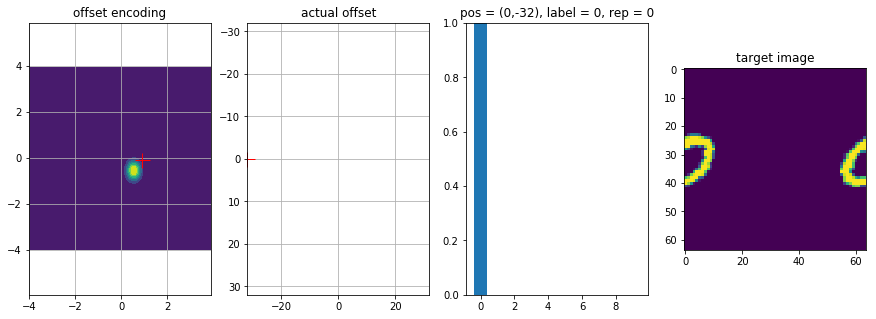

torch.Size([50, 1, 28, 28])
0 -28
[[ 0.10066992  1.49365212]] [[ 0.29784021  1.66788097]]


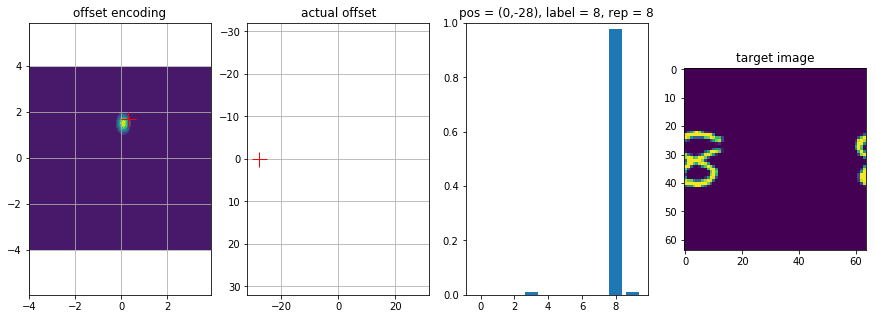

torch.Size([50, 1, 28, 28])
0 -24
[[-0.87034415  0.1691639 ]] [[-1.31144175 -0.07087888]]


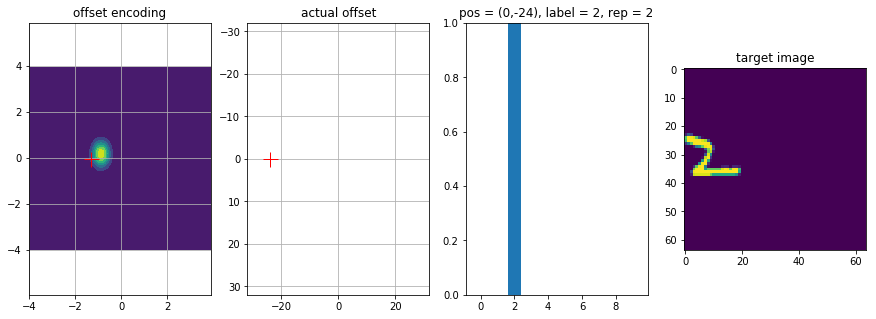

torch.Size([50, 1, 28, 28])
0 -20
[[ 0.65963811 -0.51268892]] [[ 1.14162942 -0.08067119]]


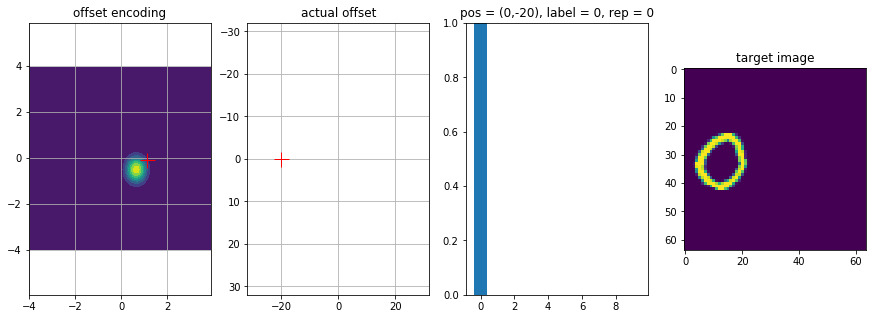

torch.Size([50, 1, 28, 28])
0 -16
[[ 0.60596533 -0.53124719]] [[ 0.38675944 -0.83685024]]


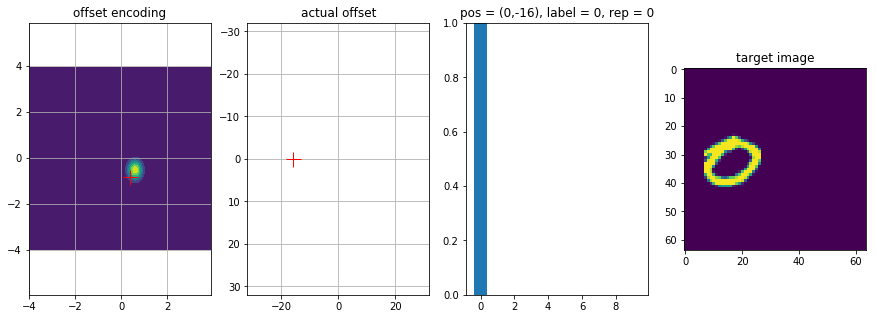

torch.Size([50, 1, 28, 28])
0 -12
[[-2.1809857   0.28884389]] [[-2.97827882  1.03044803]]


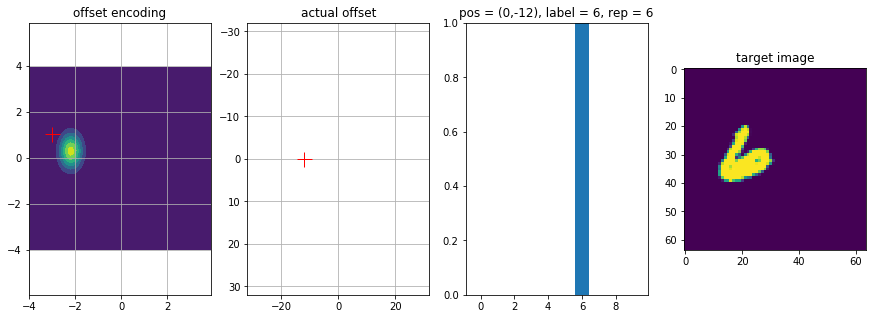

torch.Size([50, 1, 28, 28])
0 -8
[[ 1.21748977 -0.38948989]] [[ 1.09196994 -0.51423523]]


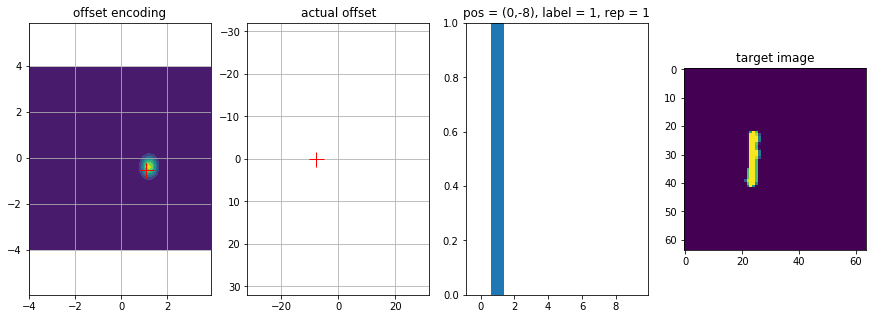

torch.Size([50, 1, 28, 28])
0 -4
[[ 0.76535904 -0.82808416]] [[ 0.87944133 -0.92255209]]


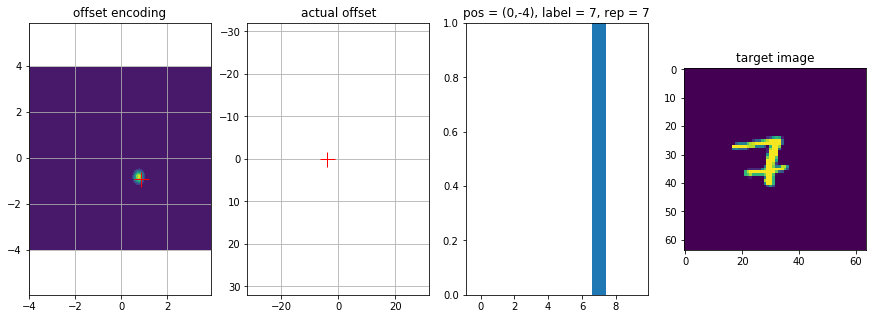

torch.Size([50, 1, 28, 28])
0 0
[[ 0.95038767 -0.73178454]] [[ 1.19328444 -0.6931393 ]]


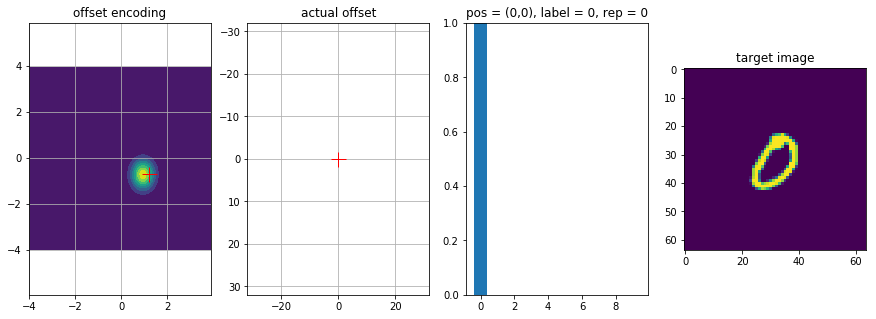

torch.Size([50, 1, 28, 28])
0 4
[[-1.92677203  0.35981891]] [[-1.65670405  0.06137085]]


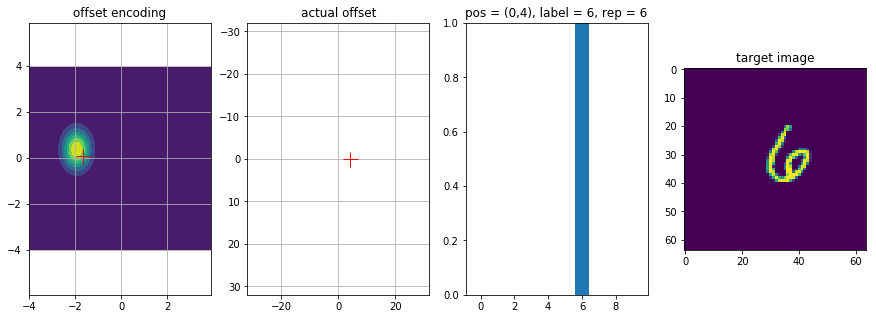

torch.Size([50, 1, 28, 28])
0 8
[[ 0.90080668 -0.12921196]] [[ 0.93732838 -0.40832533]]


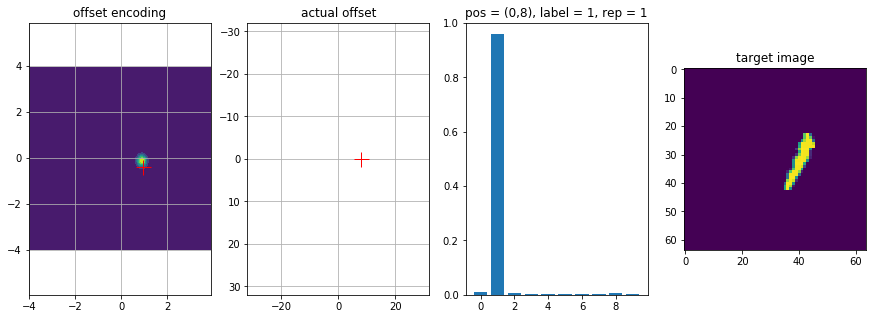

torch.Size([50, 1, 28, 28])
0 12
[[ 1.24328735 -0.38614381]] [[ 1.26568121 -0.28754127]]


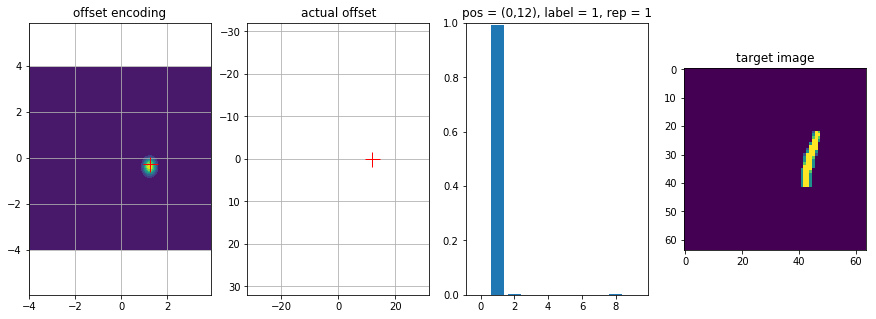

torch.Size([50, 1, 28, 28])
0 16
[[-1.07712253  0.32153327]] [[-2.20566648  0.59002103]]


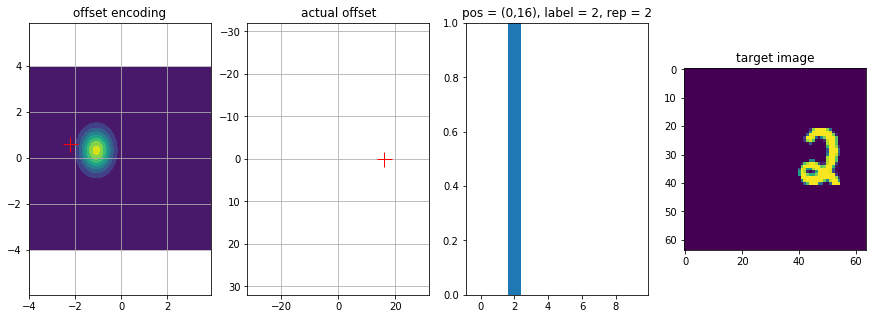

torch.Size([50, 1, 28, 28])
0 20
[[-1.32211036  0.15062178]] [[-1.2782517   0.27587843]]


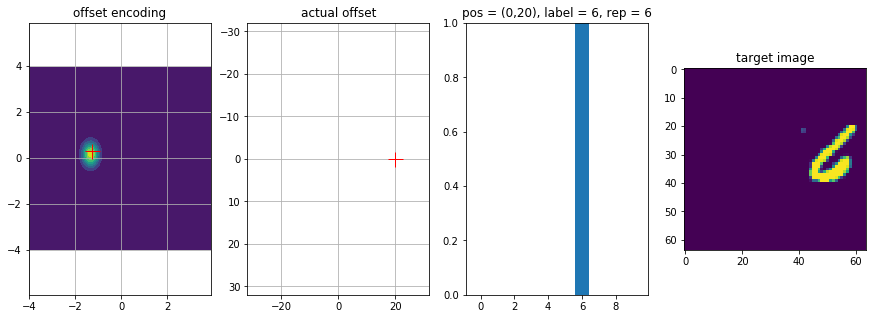

torch.Size([50, 1, 28, 28])
0 24
[[-1.14556373  0.12325146]] [[-1.69770306  0.20354244]]


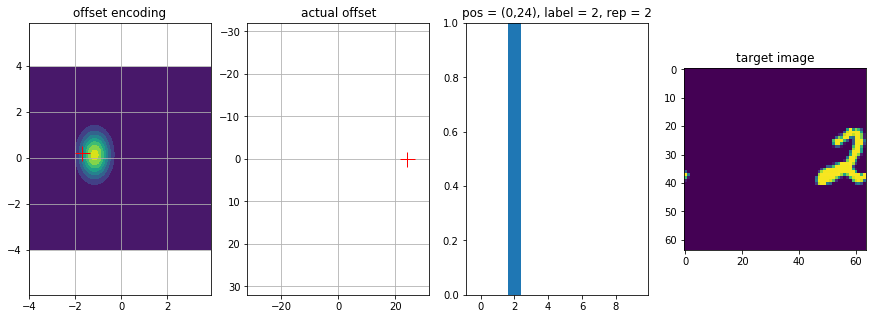

torch.Size([50, 1, 28, 28])
0 28
[[ 0.64574753 -0.75883897]] [[ 1.29830316 -0.90855234]]


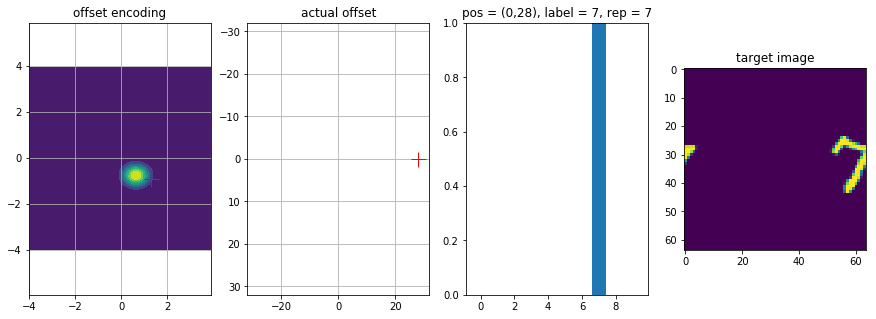

In [18]:
%matplotlib inline
import torch

from Where_act_code_VAE_classif import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 4, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    mu_output, logvar_output, u_output, z_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[6:10]
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output.detach().numpy()
    mu_offset = mu_output.detach().numpy()
    logvar_offset = logvar_output.detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    '''ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')'''
    rep = torch.argmax(z_hat_logit_output).detach().numpy()
    ax[2].bar(np.arange(10), F.softmax(z_hat_logit_output[0,:]).detach().numpy())
    ax[2].set_ylim([0,1])
    ax[2].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

In [ ]:

%matplotlib inline
import torch

from Where_act_code_VAE_classif import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 4, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    mu_output, logvar_output, u_output, x_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[6:10]
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')
    
    u_offset = u_output.detach().numpy()
    mu_offset = mu_output.detach().numpy()
    logvar_offset = logvar_output.detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')
    
    plt.show()    

In [ ]:
from Where_act_code_VAE_classif import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(10):
    #label[idx] = z
    idx = 1
    i_offset = 0
    j_offset = _ 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[9:]
    plt.plot(d1.detach().numpy(),d2.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)

In [ ]:
torch.distributions.multinomial.Multinomial(